<a href="https://colab.research.google.com/github/Spinner101/HUSOP_PHS317_Pharmaceutical_Analysis/blob/main/Module_04_UVVis_Spectrophotometry/Module_04_PHS317_UVVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌈 PHS 317 – Pharmaceutical Analysis  
## Module 04: UV/Visible Spectrophotometry  

**Instructor:** Prof. Bolden  
**Textbook:** *Pharmaceutical Analysis* (Watson, Ch. 4 – Ultraviolet and Visible Spectroscopy)

> This activity is designed to be completed **during the scheduled class meeting**.  
> You will explore absorbance vs concentration, wavelength selection, and basic
> method design for UV/Vis assays of pharmaceuticals.


In [ ]:
# @title 👤 Student Information (required – code can be hidden)
student_id = ""  # @param {type:"string"}
student_name = ""  # @param {type:"string"}

COURSE = "PHS 317 – Pharmaceutical Analysis"
MODULE_NAME = "M04_UVVis_Spectrophotometry"

print("Hampton University – School of Pharmacy")
print(COURSE)
print("Module 04: UV/Visible Spectrophotometry")
print(f"Instructor: Prof. Bolden")
print(f"Student: {student_name} (ID: {student_id})")
print("\nThis activity is designed to be completed during the scheduled class meeting.")


## 1️⃣ Concept Overview

UV/Vis spectrophotometry is widely used in **pharmaceutical analysis** for:

- Assay of drug substances and products  
- Dissolution and content uniformity testing  
- Impurity profiling (when chromophores differ)  

In this module, we will focus on:

- **Beer–Lambert Law** and linear calibration:
  \[
  A = \varepsilon b c
  \]
- Choosing an appropriate **wavelength (λ\_max)**  
- Evaluating **linearity and sensitivity**  
- Recognizing limitations (stray light, high absorbance, matrix effects)

### Learning Outcomes

By the end of this module, you should be able to:

1. **Describe** the Beer–Lambert law and factors affecting absorbance.  
   *(SILO 1 – Understand)*  

2. **Use** calibration data to determine an unknown concentration and assess  
   linearity.  
   *(SILO 3 – Apply/Analyze)*  

3. **Evaluate** wavelength selection and method suitability for a given drug/impurity  
   scenario.  
   *(SILO 5 – Evaluate)*


In [ ]:
# @title 🛠 Grading Helpers (instructor logic – hide code)
def grade_mcq(ans, key):
    return 1 if str(ans).strip().upper() == str(key).strip().upper() else 0

def grade_numeric(val, key, tol=0.5):
    try:
        return 1 if abs(float(val) - float(key)) <= tol else 0
    except Exception:
        return 0


## 2️⃣ Warm-up Check (iRAT-style)

Answer these quickly to warm up your understanding of Beer–Lambert law and UV/Vis basics.


In [ ]:
# @title Q1 – Beer–Lambert Law
print(r"""
**Q1.** According to Beer–Lambert law, absorbance (A) is directly proportional to:

A. Path length and \[concentration\] only
B. Concentration only
C. Molar absorptivity (ε), path length (b), and concentration (c)
D. Transmittance (T) squared
""")

q1 = "A"  # @param ["A","B","C","D"]
q1_key = "C"
q1_score = grade_mcq(q1, q1_key)

if q1_score:
    print("✅ Correct. A = ε b c, so A depends on ε, path length, and concentration.")
else:
    print("❌ Remember: A = ε b c. All three factors matter.")



**Q1.** According to Beer–Lambert law, absorbance (A) is directly proportional to:

A. Path length and \[concentration\] only  
B. Concentration only  
C. Molar absorptivity (ε), path length (b), and concentration (c)  
D. Transmittance (T) squared

❌ Remember: A = ε b c. All three factors matter.


In [ ]:
# @title Q2 – Absorbance vs Transmittance
print(r"""
**Q2.** If transmittance (T) = 0.10 (10%), what is the absorbance A?

Use:
\[
A = -\log_{10}(T)
\]

A. 0.10
B. 0.50
C. 1.00
D. 2.00
""")

q2 = "A"  # @param ["A","B","C","D"]
q2_key = "C"  # A = -log10(0.10) = 1.0
q2_score = grade_mcq(q2, q2_key)

if q2_score:
    print("✅ Correct. A = -log10(0.10) = 1.0.")
else:
    print("❌ Tip: A = -log10(T). 10% transmittance corresponds to A = 1.0.")



**Q2.** If transmittance (T) = 0.10 (10%), what is the absorbance A?

Use:  
\[
A = -\log_{10}(T)
\]

A. 0.10  
B. 0.50  
C. 1.00  
D. 2.00

❌ Tip: A = -log10(T). 10% transmittance corresponds to A = 1.0.


## 3️⃣ Beer–Lambert Law & Linear Calibration

### Beer–Lambert Law

For a single absorbing species:

\[
A = \varepsilon b c
\]

Where:

- \( A \) = absorbance (unitless)  
- \( \varepsilon \) = molar absorptivity (L·mol⁻¹·cm⁻¹)  
- \( b \) = path length (cm)  
- \( c \) = concentration (mol·L⁻¹)  

At fixed wavelength (λ) and path length (b):

\[
A \propto c
\]

This linear relationship is the basis of **calibration curves** used in pharmaceutical assays.

### Typical Practice

1. Prepare standards at known concentrations.  
2. Measure absorbance at a selected wavelength (often **λ\_max**).  
3. Fit a straight line:
   \[
   A = m c + A_0
   \]
   where \( m \approx \varepsilon b \) and \( A_0 \) is the intercept (ideally ≈ 0).  
4. Use the line to **back-calculate unknown concentrations**.


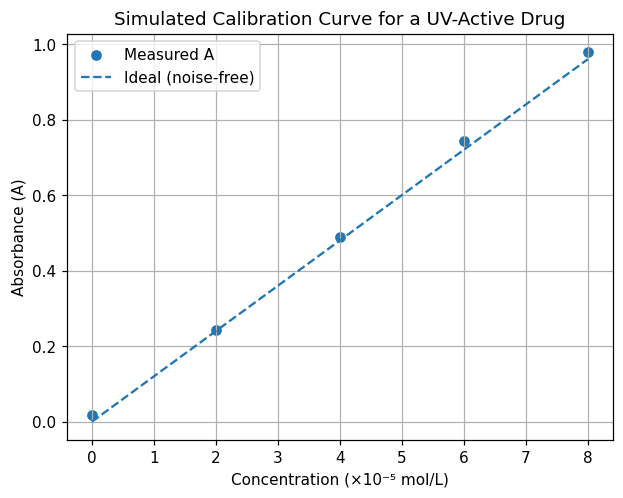


This plot shows a typical calibration curve:
• Absorbance increases linearly with concentration.
• Small experimental noise is present in the measured points.



In [ ]:
# @title 📊 Simulated Calibration Curve (A vs c)
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 110

# Simulated parameters
epsilon = 12000   # L mol^-1 cm^-1
b = 1.0           # cm
concs = np.array([0.0, 2.0, 4.0, 6.0, 8.0]) * 1e-5  # mol/L
true_A = epsilon * b * concs

# add a little noise to simulate measurement
np.random.seed(0)
measured_A = true_A + np.random.normal(0, 0.01, size=true_A.shape)

plt.figure()
plt.scatter(concs*1e5, measured_A, label="Measured A")
plt.plot(concs*1e5, true_A, linestyle="--", label="Ideal (noise-free)")
plt.xlabel("Concentration (×10⁻⁵ mol/L)")
plt.ylabel("Absorbance (A)")
plt.title("Simulated Calibration Curve for a UV-Active Drug")
plt.grid(True)
plt.legend()
plt.show()

print("""
This plot shows a typical calibration curve:
• Absorbance increases linearly with concentration.
• Small experimental noise is present in the measured points.
""")


## 4️⃣ Interactive Playground – Effect of ε, b, and c

Use the sliders to see how changing:

- **ε** (molar absorptivity)  
- **b** (path length)  
- **max concentration range**

affects the linearity and sensitivity of the calibration curve.


In [ ]:
# @title 🎮 Beer–Lambert Interactive Calibration
import ipywidgets as widgets
from ipywidgets import interact

def calibration_playground(epsilon=12000, b=1.0, c_max=8e-5):
    concs = np.linspace(0, c_max, 6)
    true_A = epsilon * b * concs
    np.random.seed(1)
    measured_A = true_A + np.random.normal(0, 0.01, size=true_A.shape)

    plt.figure()
    plt.scatter(concs*1e5, measured_A, label="Measured A")
    plt.plot(concs*1e5, true_A, linestyle="--", label="Ideal A = ε b c")
    plt.xlabel("Concentration (×10⁻⁵ mol/L)")
    plt.ylabel("Absorbance (A)")
    plt.title(f"Calibration (ε={epsilon:.0f}, b={b:.2f} cm)")
    plt.grid(True){
  "nbformat": 4,
  "nbformat_minor": 0,
  "metadata": {
    "colab": {
      "provenance": [],
      "authorship_tag": "ABX9TyNBUL+4Dq9kIs44qD4YfDaD",
      "include_colab_link": true
    },
    "kernelspec": {
      "name": "python3",
      "display_name": "Python 3"
    },
    "language_info": {
      "name": "python"
        },
        "08aa707ed7714ec591b8d3d73fdae52c": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "FloatSliderModel",
          "model_module_version": "1.5.0",
          "state": {
            "_dom_classes": [],
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "FloatSliderModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/controls",
            "_view_module_version": "1.5.0",
            "_view_name": "FloatSliderView",
            "continuous_update": true,
            "description": "pKₐ (acid)",
            "description_tooltip": null,
            "disabled": false,
            "layout": "IPY_MODEL_57c853a23f7444a48482640d4853f5ed",
            "max": 7,
            "min": 2,
            "orientation": "horizontal",
            "readout": true,
            "readout_format": ".2f",
            "step": 0.1,
            "style": "IPY_MODEL_6694804d33bc4e9d938a38bd344f6bfd",
            "value": 4.6
          }
        },
        "44ac3b3b4743465e9666878f6673a0bc": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "FloatSliderModel",
          "model_module_version": "1.5.0",
          "state": {
            "_dom_classes": [],
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "FloatSliderModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/controls",
            "_view_module_version": "1.5.0",
            "_view_name": "FloatSliderView",
            "continuous_update": true,
            "description": "pKₐ (base)",
            "description_tooltip": null,
            "disabled": false,
            "layout": "IPY_MODEL_e5b0da9a6b5443b4a266d78624650da9",
            "max": 12,
            "min": 6,
            "orientation": "horizontal",
            "readout": true,
            "readout_format": ".2f",
            "step": 0.1,
            "style": "IPY_MODEL_d3681aba90d642df8d801e2980489b76",
            "value": 9.1
          }
        },
        "83a7aaeaab534c35b8871fafdbe7390b": {
          "model_module": "@jupyter-widgets/output",
          "model_name": "OutputModel",
          "model_module_version": "1.0.0",
          "state": {
            "_dom_classes": [],
            "_model_module": "@jupyter-widgets/output",
            "_model_module_version": "1.0.0",
            "_model_name": "OutputModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/output",
            "_view_module_version": "1.0.0",
            "_view_name": "OutputView",
            "layout": "IPY_MODEL_5dffd4f6044245eda1a4fc71eef1425b",
            "msg_id": "",
            "outputs": [
              {
                "output_type": "display_data",
                "data": {
                  "text/plain": "<Figure size 1210x440 with 2 Axes>",
                  "image/png": "iVBORw0KGgoAAAANSUhEUgAABK4AAAGtCAYAAAA/Njx2AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAQ6wAAEOsBUJTofAAAk/RJREFUeJzs3Xd8U2X7P/BPkiZNV7p3oaWFQoGyV5FR9oPIUkCGCDIUUUFx46OAKODA9XXw/BBRUQQBEUQRkCGyRPYsqy200EH3StomOb8/2gRqm9KR9CTp5/16Ke05J+dcvTty5cp9X0ciCIIAIiIiIiIiIiIiKyMVOwAiIiIiIiIiIqKqsHBFRERERERERERWiYUrIiIiIiIiIiKySixcERERERERERGRVWLhioiIiIiIiIiIrBILV0REREREREREZJVYuCIiIiIiIiIiIqvEwhUREREREREREVklFq6IiIiIiIiIiMgqsXBFRERERERERERWiYUrIqokLCwMsbGxYodRpdrElpiYCIlEgoULF9b4/NnZ2fDx8cGyZcvqFqANmDp1KiQSidhhmF1GRgYeffRRBAUFQSKRWPxnODc3F15eXli6dKlFr0NERPVjzXmNWKZNm4Y2bdpAr9eLHUqD2bdvHyQSCb7++usaHb9w4UJIJBIkJiZaNK7aasifZ51Oh5YtW+KJJ55okOsRmcLCFVED2717NyQSCZ599tlK+7KysiCVSiGRSHDgwIFK+1euXAmJRIJPPvmkASI1j9LSUvj7+0MikeCNN94QO5x7WrhwIeRyOebMmSN2KGYRGxsLBwcHscNoEM8//zzWr1+PWbNmYc2aNXjttdcsej13d3e89NJLWLp0KVJTUy16LSIia9UY8hpDwePu/+RyOZo2bYoRI0Zgz549YodYK8ePH8fXX3+NxYsXQyq1/ZeDX3/9NSQSCb777juxQ7E7MpkMixYtwqpVq3DmzBmxw6FGzPb/UhHZmPvuuw+Ojo5VJjn79u2DIAiQy+VV7jds69+/v8XjNJetW7ciPT0dzZs3x+rVq6HT6ep1vkuXLmHnzp1miq6i1NRUfPHFF3jyySfh7OxskWuQ5ezatQtDhgzBG2+8gUceeQSDBg2y+DVnz54NrVaL999/3+LXIiKyRo0prxkzZgzWrFmDNWvWYMWKFXj44Yfx119/YeDAgdiyZYvY4dXYokWL0KxZM4wePVrsUBpUnz59oFarMXnyZLFDqRdL5sJVGTduHAIDA/Hmm2822DWJ/o2FK6IGplQqERMTg3PnzuH27dsV9u3duxfBwcEYOHAg9u7dW+mx+/btg5+fH9q2bdtQ4dbbypUr0aJFC3z44YdITk7G77//Xq/zOTo6QqFQmCm6ilauXAmtVospU6ZY5PxUM3l5eXV6XGpqKry8vMwcTfVUKhVGjRqF1atXQ6PRNOi1iYisQWPKa9q3b49HHnkEjzzyCKZPn4733nsP33zzDQRBwOrVq8UOr0YSExPx66+/YsqUKXbZNqA6UqkUSqUSMplM7FDqxZK5cFWkUikmT56MLVu24NatWw12XaK7sXBFJIL+/ftDEIRKSdzevXsRGxuL2NhYHD58uMIL4QsXLiA1NRX9+vUzbispKcG7776Ldu3awcnJCSqVCgMHDsT+/fsrXfOLL77AkCFDEBISAoVCAT8/Pzz00EM4d+5cjWJOTU1F586d4e7ujj/++KNGj7l+/Tp27dqFqVOnYujQoQgMDMSXX35p8vitW7di4MCB8PT0hFKpRHh4OGbMmIGMjAzjMabW9f/www9o3749lEolgoODMW/ePBQVFdUoToP169ejTZs2CA0NrXL/pk2b0LdvX6hUKjg5OaFjx47Vfj3/JggCPvzwQ7Ro0QKOjo6IiIjA0qVLjcssatpzwVwyMzMxbdo0+Pr6wsnJCTExMdi9e3eFY6rrE2aYmr9v3z7jNkM/iAsXLmDevHkIDg6GUqlE+/btsW7dukrnMHw/z5w5g2HDhsHT0xPu7u7G/XFxcRg/fjz8/f3h6OiI8PBwvPDCCxWKW4aeXYIg4JtvvjEu47h7PPfu3YuhQ4fC09MTjo6OiIqKwjvvvFNpBmBsbCzCwsKQmpqKyZMnw9vbG05OTujTpw+OHTtW5TgOGzYMWVlZ2LVrV3XDTURktxpLXlOVoKAgAKhUSNi5cycmTJiAiIgI49fSp08f/PLLL5XOkZycjMcffxzNmjWDUqmEj48POnfujCVLllQ6tr65yMaNG6HX6zFs2LAq91+7dg1Tp05FUFAQFAoFQkJCMHv27Aq52L0cPXoU/fv3h4uLCzw9PTFu3DjcuHFD9F5jpnpc5efnY+7cuQgMDISTkxM6deqEDRs2mDxPTXITg9LSUnz44Yfo3LkzXFxc4Obmhnbt2mHBggXGY/R6PZYsWYLY2FgEBgZCoVAgODgYU6ZMwY0bNyqds6pxNGy7fPkyRo4cCXd3d7i6uuL+++/H1atXK51DEASsXLkS3bp1g4uLC1xcXNCzZ0/8/PPPVX7Nw4YNg1arxaZNm0yOC5ElsXBFJALDlPi7p82np6fj/PnzxgSvuLgYhw4dMu43JIOGx2q1Wtx///147bXX0KFDByxfvhxvvPEGMjIy0L9/f2zbtq3CNd999114enriqaeewmeffYapU6di79696NmzJ65du1ZtvBcuXECPHj2QlpZmnBJfE6tWrQIAPProo5DJZJg8eTK2bdtWZT+gN954AyNHjkRiYiKeeeYZfPLJJ5g4cSL++ecfJCcnV3udFStWYOLEiVCr1XjjjTfw3HPPYe/evXj00UdrFCcA3L59G+fPn0ePHj2q3L9gwQKMGTMGMpkMCxYswPLly9G0aVPMnDkTr7zySo2u8dJLL2HevHnGht4zZszA6tWr8eqrr9Y4TnMaMmQIEhMT8frrr+Pll19GYmIi/vOf/9R7VhxQ9j3/888/MW/ePLzxxhtQq9WYMGFClcl1UlIS+vbtC39/fyxdutSYzJ06dQrdunXD1q1bMXnyZHz44Yfo0aMHli9fjr59+xoLk0888QTWrFkDAOjdu7dxGUefPn0AAF999RUGDBiA9PR0vPLKK/jkk0/QtWtXvPrqq5g0aVKleAoLC9G7d2+UlpZi8eLFeOmll3Dq1CkMHToU+fn5lY7v2bMnAFQ5m4CIqDFoLHlNUVERMjIykJGRgZs3b2Lfvn145plnIJfLKzWv/vrrr5GWloZHHnkEn3zyCV555RWkpaVhxIgRWL9+vfE4rVaLQYMGYe3atRgzZgw+++wzvP766+jWrVul5ZXmyEX27t0LJycntG/fvtK+U6dOoXPnzti5cyemTZuGzz77DBMnTsSaNWtw3333ITc3957n/+effxAbG4sTJ05g7ty5ePvtt6HT6dC3b18UFhbWKMaGpNVqMXToUHzyySeIiYnB+++/j0GDBmHatGlVFhlrmpsAZUWroUOHYt68eXBzc8Mbb7yBd999F7GxsRUKYyUlJXjnnXfQrFkzzJs3D59++ilGjx6NDRs2oGfPnsjKyqrR13Lz5k306dMH/v7+eOedd/DEE0/gjz/+wMiRIys14X/sscfwxBNPIDg4GEuWLMGSJUsgl8sxevRorFixotK5u3TpAoVCwVyHxCMQUYMrKSkRXF1dhRYtWhi3rVu3TgAgXL16VdBqtYKbm5vw2muvGfc/+OCDAgDhypUrgiAIwkcffSQAEH766adK5+7YsaPQrFmzCtsLCgoqxXHu3DlBLpcLs2fPrrA9NDRU6Nu3ryAIgrBv3z7Bw8NDiI6OFpKSkmr8NWq1WiE4OFgYMmSIcVtcXJwAQFiyZEmFY48ePSoAEHr06FFlnDqdrsrYBEEQcnJyBFdXV6Fp06ZCTk6OcXtRUZHQoUMHAYCwYMGCe8a7d+9eAYCwbNmySvtOnDghSCQSYc6cOZX2Pf3004JUKhWuXbtW7fkvXbokSCQS4b777hNKSkoqxN+kSRMBgLB69ep7xllbffv2FWQyWYVtU6ZMEQAIw4cPrzC2N27cEFxdXYXw8HDj9oSEBJNjuHr1agGAsHfvXuO2BQsWCACEzp07CxqNxrg9JydHaNq0qeDm5ibk5uYat4eGhgoAhC+++KLS+Xv37i1IJBLhwIEDFbYvWrRIACAsXry4wnYAwpQpUypsS0lJEZRKpTBq1ChBr9dX2Pf+++8LAIR9+/ZVGK+qfkZ/+OEHAYDwv//9r1KcgiAIDg4OwsCBA6vcR0Rk7+w9rzHkCFX9FxwcLOzZs6fSY6qKr7CwUGjRooXQunVr47bTp0+bzD/uZo5cRBDKxqJVq1ZV7uvQoYPQrFkzITMzs8L2v//+W5DJZMLChQvvef6ePXsKMplMOHPmTIXtzzzzjACgQg5nLoZ8ZM2aNdUeZ/g+3p1vrVq1SgAgzJ07t8Kxhw4dEiQSiQBASEhIMG6vTW7y3nvvCQCEOXPmVMpB7s6/9Hq9UFhYWCneXbt2CQCEd999t8L2f+fChm0AhLVr11bYvnTpUgGAsGPHDuO2n3/+WQAgfPDBB5WuOXz4cEGlUgl5eXmV9kVERAjNmzevtJ2oIXDGFZEI5HI5evfujStXrhhnE+3duxdNmjRBREQEZDIZevXqZXxXQxAE/Pnnn2jatCmaN28OAFizZg3CwsLQu3dv47t/GRkZyM3NxYgRI5CQkIDLly8br+ni4mI8V15eHjIyMuDv74+WLVvi77//rjLOH374AYMHD0aXLl1w4MABhISE1Phr3L59O27evInHHnvMuK1ly5bo2bMnVq1aBUEQjNu///57AMDSpUuNcd6tujve7Ny5EwUFBXj66acrLDFzcnLCCy+8UON4DX05vL29K+37/vvvIQgCpk+fXmGsMzIyMGLECOj1+nsuM/j5558hCAKee+45yOVy43Z3d3c8+eSTNY7TnF599dUKY9ukSRNMnjwZ8fHxOHnyZL3O/fzzz8PR0dH4ubu7O5566ink5+dXWlLn5eWFmTNnVth2+/Zt/PXXXxg0aBDuu+++CvteeOEFuLi41Gi6+saNG6HRaDBjxgxkZmZW+N498MADAIAdO3ZUeIxUKsVzzz1XYZuh0fvdv1P//hrS09PvGQ8RkT1qDHkNULY0fdeuXdi1axe2b9+Ozz//HB4eHhg1alSl5Yx35zOFhYXIzMxEUVER+vfvjwsXLhhn8Bpyl71791Z7h1pz5CJA2fNrVbnOuXPncOrUKYwfPx56vb7C+cPDw9G8efNKz5f/lp6ejkOHDmHo0KGIjo6usE+s2eX3Ysgl5s+fX2F7TEwMBgwYUGFbbXOT7777Di4uLliyZEmlfmJ3518SicR4UyC9Xo+cnBxkZGSgQ4cOcHd3N/nz/G9BQUGYMGFChW1V5S9r1qyBk5MTHn744Uo/S6NGjUJeXh4OHz5c6fze3t7MdUg0jeMe6URWqH///ti+fTv27NmDRx991NgHwqBfv3547bXXUFBQgKtXryIzMxPDhw837r948SKKiorg6+tr8hppaWmIjIwEAOzfvx9vvvkmDh06BLVaXeG4Zs2aVXrs8ePHMWnSJMTGxuK3336rUGypiZUrV8LJyQlt27atsLZ+8ODBWLhwIfbu3WtcHmB4Mu3UqVOtrgHAuBygdevWlfa1adOm1ue7u6BmcPHiRQCoclq9QVpaWrXnjY+PBwC0atWq0r6oqKjahGg2VY2ZYdvVq1fRuXNni537boYXNXczjNe/E18AcHZ2RkRExD2XggB3vneGIlVV/v29CwoKglKprLDNkORnZmZWeQ5BEBpdk1siorvZe14DlD1f/XtZ4YQJExAZGYmpU6fi8uXLcHAoe3llWIr/22+/VbnUKzs7G25ubggNDcWCBQuwePFiBAUFITo6Gr169cKoUaMq3B3XHLmIQXW5ztKlS7F06dIqHxceHl7teavLdQIDAyu8wWgtrl27Bh8fH/j5+VXa16ZNmwrFwNrmJpcvX0arVq2qfFP2337++We8++67OH78OEpKSirsq+lSwaq+P1XlLxcvXoRarUZwcLDJc1X1s8Rch8TEwhWRSO7uBzFw4EBcvnwZL7/8snF/bGwsSktLceDAAWMycfftovV6PVq2bIlPP/3U5DUMd+k5fvw4BgwYgPDwcLz99tsIDw+Hs7MzJBIJ5s6dW2XPAUMD8QMHDuDnn3/G2LFja/y13bp1C7/++it0Op3JOwV9+eWXVnX7a0OiXFVhwtAXYNu2bRVmEd3tXsmcraouQdFqtWa5huFdRkswfO++/PJLk033DY11Daq721BVyT5Q9gKkQ4cOdQuSiMgO2HNeUx0PDw/ExMRg69atuHr1Klq1aoWCggL06dMHubm5mDt3Ltq1aweVSgWpVIqvvvoKP/zwQ4WeQwsXLsRjjz2G7du346+//sKmTZvw+eefY+TIkdi8eTMkEonZchFfX99qc51nnnkGI0aMqPKxTk5O9zw/1d6WLVswevRodOnSBR988AGaNm1qHGvDDLiaqGn+otfr4e7ujo0bN5o8vqo3fzMzM6ss8BE1BBauiETSoUMHeHl5Ye/evcap83ffWadTp05QqVTYs2dPlQleZGQkkpKSEBsba3x3z5Tvv/8eWq0W27dvr5TUZGZmVppdAgAqlQrbtm3DAw88gAkTJkCtVte42fnq1auh0+nw4YcfVjkNf9WqVfjpp5+QmZkJb29vREZGYvv27Th58iT69u1bo2sYREREAChrtPrvO+ScP3++xucxPEFfuXKl0r7IyEj8/vvvCAwMrNOsMOBOMhkXF1cpGTB8fxvahQsXEBMTU2kbAOPSDS8vLwBVv9tneOfR1Ln//a7wv89dHcN4VfU9VKvViI+Pr9F5DO/Me3p61rj5bm3Fx8dDq9VW+Q4sEVFjYc95zb2UlpYCgPGucnv27EFSUhJWrVqFadOmVTh25cqVVZ4jNDQUs2bNwqxZs6DVajF16lR8//33+PPPPxEbG2uWXAQoK/7t3r0bpaWlFWadGZ4vAdT5+fLuXOffUlJSatTcvaFFRETg0qVLSE9Pr1SU+XcOUtvcJDIyEpcvX0ZhYWG1s66++eYbKJVK/PnnnxXezCssLER2dnadvq7qREZGIi4uDh07dqxy2WhVNBoNkpOTq53BTmRJ7HFFJBKpVIq+ffvixo0bWLlyJUJDQytMbTf0g9i1axf279+PyMjIClN6H330UWRnZ+Ptt9+u8vx3T/E1vAPz79kiK1asqHZauaurK7Zv345BgwZh6tSp+OKLL+75dQmCgFWrVqFJkyaYO3cuxowZU+m/p556CsXFxcY7wRnu7DZ//vxK0/2rivtugwcPhouLCz799NMKCZFGo8H7779/z3gNfH190aZNmwp3PDKYPHkygLL+DIbk9G65ubkoLi42fp6RkYG4uLgK8YwcORISiQQffvhhhXPk5uaaHNe4uLgaLYerq6VLl1Z4Fy8pKQlr1qxBs2bN0LFjRwCAm5sbAgMDsWfPngrfh8zMTHz11Vcmz718+fIKY5Kbm4vPPvsMrq6uFZY+mOLr64vevXtjx44dOHr0aKVzFxQU4KGHHrrnecaNGwelUomFCxeioKCg0n61Wl3lnQJrw9AH4u4XaEREjY295jX3kpKSgoMHD8LJycm4JN5UfGfOnMHPP/9cYVtubm6l3MLBwcH45o9hdlRtcxFTYmNjodFocOLEiQrbO3TogOjoaKxatarKN9QEQTD2AwXKinVxcXG4ceOGcZufnx9iYmKwfft2nD17tsLjly1bVmU8KSkpiIuLq3A3vob04IMPAgCWLFlSYfvhw4exe/fuCttqm5s88sgjKCwsxOuvv17punfnXzKZrMKsOoPFixfXeLZVbRgKti+99FKVOXZVv0OGJYzMdUgsnHFFJKL+/ftj8+bN+PPPPzFlypRK+2NjY/HSSy8BACZOnFhh39y5c7F7924sXLgQ+/fvx+DBg+Hl5YWkpCQcOnQI8fHxxhkxDz74ID744AMMHToUjz/+OJydnXHgwAHs2LEDERER1S75cnJywpYtW/Dwww9j9uzZUKvVmDdvnsnj//jjDyQkJOC5554zucxs8ODBcHd3x5dffolnn30WXbt2xfz587FkyRK0a9cOEydORJMmTZCcnIwtW7Zg9erVJpdhubu745133sHTTz+Nrl274rHHHoNCocB3331X7ZTpqjz88MN44403cPXq1QrvmHXp0gVvvfUW/vvf/6Jt27aYMGECQkJCkJ6ejrNnz2LLli24cOECwsLCAACffvopFi1ahNWrV2Pq1KkAyhrTP/vss/jwww/Rq1cvPPzwwygpKcHq1asRGBiIpKSkSuMVFRWF0NBQJCYmVtgukUiq3F5bt27dwsCBAzF69GhkZWVhxYoVUKvV+PTTTys0DZ0zZw5effVVDBkyBKNHj8bt27excuVKNGvWrNoXCD179sTEiRONX+eNGzewYsUKqFSqGsX3ySefoE+fPujfvz+efPJJhIeH48CBA1i7di3at29f7c+hQXBwMP73v/9h2rRpaNmyJaZMmYLw8HBkZWUhLi4OP/30E37++ecKfVhqa9u2bfDy8rLYjC4iIlthj3nN3U6fPo3vvvsOQNly+YSEBKxatQp5eXl499134erqCgC47777EBgYiOeffx7x8fEICwvDxYsXsXLlSkRHR+P48ePGc+7duxczZ87E6NGj0bJlS3h4eODChQtYsWIFgoODjc8ttc1FTBkzZgxefvllbNu2Dd27dzdul0gk+O6779C/f3906tQJU6dORXR0NEpLS5GYmIiff/4ZU6ZMwcKFCwEAN2/eRFRUFPr27Yt9+/YZz/Phhx8iNjYWvXv3xuzZsxESEoLdu3fj5MmT8PHxqZTrvPrqq/jmm28q9USbOnVqldurs2XLlipzI5VKhTlz5lT5mClTpmDVqlX4+OOPkZSUhAEDBuDGjRv47LPP0LFjx0oFvtrkJnPnzsWvv/6KDz/8ECdPnsTQoUOhUqlw+fJl7Ny5E+fOnQMAjB07Fhs3bkTfvn0xdepUCIKAHTt24MKFC/Dx8anR114bDz30EGbOnImVK1fi9OnTGDVqFAICAnDr1i0cP34cv/32W6Xi6LZt2+Dg4GAs9BE1uAa8gyER/cuFCxeMt1O++9a8Bv/8849x/48//lhpv1arFT7//HOhe/fugqurq6BUKoWwsDDhwQcfFNavX1/h2K1btwpdunQRnJ2dBU9PT2H48OHC+fPnhb59+wqhoaEVjq3qNrulpaXCxIkTBQDCm2++afJrGjt2rABAOHjwYLVf++TJkwUAwqFDh4zbNm7cKPTp00dwc3MTlEqlEB4eLsycOVPIyMioNjZBEITvvvtOiI6OFhQKhRAYGCg899xzwvnz5wUAwoIFC6qNxSAlJUWQy+XC66+/XuX+33//Xbj//vsFb29vQS6XC0FBQUK/fv2E5cuXC2q12njcggULqvye6vV64b333hMiIiIEhUIhNGvWTFiyZImwefNmAUCl7xmASt+bvLw8AYDQs2fPGn1Nffv2FWQyWYVtU6ZMEQAIGRkZwtSpUwUfHx/B0dFR6N69e4XbJRtotVph/vz5QlBQkKBQKIQ2bdoIq1evNt5+eu/evZW+9vPnzwvPPfecEBgYKCgUCiE6Olr4/vvvK53b1PfT4MKFC8K4ceMEHx8fQS6XC6GhocK8efOEnJycSscCEKZMmVLleY4cOSKMGTNG8Pf3F+RyueDv7y/ExMQIixcvrnDb76p+H6o7f25urqBUKoXnn3/e5NdARNRY2GNeIwiCsHfvXmPchv8kEong4eEh9O/fX/jpp58qPebs2bPC/fffL3h6egrOzs5Cjx49hC1bthifJxMSEgRBEIT4+Hhh1qxZQuvWrQWVSiU4OTkJzZs3F5555hkhKSmp0nlrmotUZ/jw4ULTpk0FvV5faV9SUpLw1FNPCeHh4YJCoRA8PDyE6OhoYe7cucL58+eNxyUkJAgAqnwOP3z4sBAbGys4OTkJHh4ewtixY4UbN24IXl5ewtChQysca8hJ7s4lBEEQHnzwQUEikQhxcXH3/HoM+Yip/4KDgwVBuPN9/PfPZm5urvD0008L/v7+gqOjo9ChQwfhxx9/rPS9MqhNblJcXCy88847QnR0tKBUKgU3NzehXbt2wsKFCysct2rVKqFt27aCUqkUfH19hYkTJwpJSUlV/uzWdJsg3Pk+VZULr127VoiNjRXc3d0FhUIhNGnSRBg6dKjwxRdfVDhOp9MJISEhwkMPPVTpHEQNRSII1azBISJqZObOnYt169YhPj6+RneBMYf33nsPL730Eo4cOVLh3c+q/Pzzzxg9ejT27NljldO1Fy5ciEWLFiEhIeGe7/rag2XLluHtt9/GlStXEBAQIHY4RERE93T8+HF07doV69evN1uT+nu5ffs2/Pz8MGvWrHsu0dTr9fD19cUDDzyAb775pkHiI9PWrVuHRx55BCdOnEC7du3EDocaKfa4IiK6y8KFC6HT6fDJJ5+Y/dxV9W/Izc3F//3f/8HX19fYV6o6v//+Ox544AGrLFo1Nrm5uXj33Xcxf/58Fq2IiMhmdO7cGVOnTsWCBQss0kOpqn6lb731FgBgyJAh93z80aNHoVarTfY7o4aj0+mwYMECTJ8+nUUrEhV7XBER3cXT0xMZGRkWOffatWuxYsUKDB8+HEFBQbhx4wZWr16Nmzdv4quvvoJCobjnOVasWGGR2Kj23N3dq7zbIhERkbWr7gYr9aHVatGkSRNMmDABrVu3RmFhIXbu3Ildu3ahX79+GDFixD3P0aNHD9GatVNFMpkMly5dEjsMIuuZcXX16lXMmjULHTp0gIODA9q2bVvlcatWrUJkZCSUSiXat2+Pbdu2VTomNzcX06dPh5eXF9zc3DBmzBikpKRY+ksgIqpWhw4d4OfnhxUrVuCpp57CJ598gubNm2Pr1q147LHHxA6PiIiIqF5kMhlGjRqFHTt24MUXX8R///tf3LhxA//973/x66+/Vrj5CxFRTVlNj6stW7bg6aefRvfu3XH58mXo9XrjnRYM1q1bh4kTJ+K1115D//79sX79eqxatQp//fUXevToYTzuP//5D86fP4/ly5dDqVTitddeg0wmw7Fjx+DgwElmRERERERERES2wGoKV3q93liBnzp1Ko4dO1apcNWyZUt07twZa9euNW7r2bMnPDw88NtvvwEADh8+jJ49e2LHjh0YPHgwAODSpUuIiorCunXrMG7cuAb6ioiIiIiIiIiIqD6sZq7mvaaNxsfH4/Lly5UKT+PHj8fu3btRXFwMANi+fTs8PDwwaNAg4zEtW7ZEhw4djMUtIiIiIiIiIiKyflZTuLqXuLg4AECrVq0qbI+KikJJSQkSEhKMx7Vs2RISiaTScYZzEBERERERERGR9bOZhk/Z2dkAAA8PjwrbPT09AcB4Z6fs7OxKxxiOu9fdn/Ly8pCXl2f8XKPRICkpCc2aNWNvLCIiImpwWq0Wt2/fRnR0NJRKZZ3PwxyHiIiIrEltchxmKnf54IMPsGjRIrHDICIiIqrg6NGj6Nq1a50fzxyHiIiIrFFNchybKVwZZlbl5uYiICDAuN0wE8vLy8t4XFJSUqXHZ2dnG48xZd68eZgxY4bx86SkJPTs2RP79++vcE1zKi4uxt9//43u3bvD0dHRItewVRwb08w9Nsk5GkxefQIAsOaxTgjxqPu7+mKz9M9NZmEJrt4uQvztQiRmFiElV4OUPA0yCkrrfW65TAqlXAK5TAqFgxQKmRSODhU/VzhIIZdJ4CCVQCaVQCYp+1dq+FgigVQKOJRvk0rKjpVKJBB0WtxIuoGw0FDI5XJIJEDZoury/5d/fve/Zdsld7aXfwzjMeX7DGe561jDeetCUveHoi5XLtWW4vLlK4iMbAG5XF7Pa4v3dVuCtrQEly5fQcvIFnCQK8QOx6oYxmZsv87wcnO2yDVSU1PRp08f+Pr61us8DZ3jXM9SIyE9t8qfnXvdFkhANQfc87HV7Kv2sdWfuLrH3vMuR1U8uESrxbWrVxHRvDnk1cx4q/brqfaS9/h66ryzftet9rzlDy3VahEfH4/w8HDj2NzrrHW97r1/Fi33WAECdHoBeqHsJlU6PaATBOgFAXq9AJ0gQKcH9HpADwFavQBtqRap6enw9vEBJFJo9QJKdQJKtHqU6PQo0epRqtOjWCtU/lyrrz7gGvBxlSNQpUSAuyOaeTujma8Lmvu4wMdV/OcGa33dYA05trWOjTXg2JjWEGNTmxzHZgpXht5Whh5WBnFxcVAoFAgPDzce98cff0AQhAp9ruLi4hAdHV3tNVQqFVQqVaXtzZo1Q0hIiDm+jErUajWuXbuGiIgIODk5WeQatopjY5q5x8YhoxAOqhsAgLBm4Wjm41Lvc4rFnGOTW1SKY9ezcDQxC2eTc3ExJQ/ZRf8uUDkCUkc43PWnQ6V0gI+bI3xcHOHjpoC3iyO8XRXwdnWEh5McrkoHuDk6wFXpAFdHB7g5yuHiKIODzLJtB9VqNXbuLMTgwT35O/UvarUaO4UsDB7UhWPzL2q1Gjv1WRg8kGPzb4axaRcVabGxMZy3vsv5GjrHaQH+7FSn7O9xNgYP7sqx+ZeyscnF4MHdOTb/UjY2OzF48MBaj41Wp0dhiQ4FxVoUaLQoKC5FvkaLgmItsotKkVVQgoyCYmQWFiPD8HFBCXLVd/KeHAA5BcDFAmDvzSIARQBuw9NZjlYBKrQLcUfXMC90CfOEh3PDFrOs9XWDNeTY1jo21oBjY1pDjE1tchybKVyFh4cjMjISGzZswMiRI43b169fjwEDBkChKPvjOHToUCxevBi7d+/GwIEDAQCXL1/GyZMn8fLLL4sSOxHZBp1ewIkb2fjjYhr+vHQbl9LyTb6j2tTLGZH+bgjzdkYTL2c08XJCE09nhHg6w0kha9jAiYiIiKrhIJPC3UkKd6fazSpWl+hwM6cISVlqJGUXISmrCImZRbiUmo8bWUUAgOyiUhyOz8Th+Ez8b388AKBVgBv6RvpiQJQ/OjX1sPibc0Rk36ymcFVUVITffvsNAHD9+nXk5eVh48aNAIC+ffvC19cXCxcuxKRJkxAREYF+/fph/fr1+Pvvv7F//37jeWJiYjBkyBBMmzYNy5cvh1KpxGuvvYZ27drhwQcfFOVrIyLrpdcLOJqYhU3Hk/HHxbQqZlSVJV8dm3qidZAKrQPdEOnvBjdl/ZaTEREREVk7J4UMzf3c0NzPrdK+gmItLqXm42JKHi6k5OHE9Wzjm35xqfmIS83H//bHw8NZjgGt/PFQ52D0aOYNqdQK18UTkVWzmsJVeno6xo4dW2Gb4fO9e/ciNjYWEyZMQFFREZYtW4Zly5ahZcuW2Lx5M2JiYio8bv369Zg3bx4ef/xxaLVaDB48GP/3f//Hu+YQkVFangY/HL2BTSeSkZSlrrCvqZcz+rfyQ6/mPqJMdyciIiKydq6ODugc6onOoZ7GbYY2CwevZmJ3XBquZxYhp6gUm04kY9OJZAR7OOGhziGY0K0JAt25NIuIasZqKjlhYWE1aqw4ffp0TJ8+vdpj3N3dsWrVKqxatcpc4RGRnbh2uwD/7894bD55EyW6O41KI/1dMapjMAZF+aO5n2uFHnlEREREdG/uznIMiPLHgCh/vP5AFK7dLsCuC+n4+eRNXErLx80cNT7ZfQVf7LuKUR2C8UTfCDT3cxU7bCKyclZTuCIisqTrmYV49/dL+O1cirFvlZvSAaM7BmNM5xBEB7uzWEVUB4IgICMjAxqNBjqdTuxwGpROp4Onpydu3boFmax2ve1kMhmUSiV8fHz4t4eI7JJEIjEuM5zVNxznb+Vh4/Fk/HQiGXkaLTYcT8bGE8kY0joALw9tZdM3ByL7VVhYiLy8PJSWlkKvr//dOW2FteU4LFwRkV0rLNbis71X8eVfCcYZVr5ujpjRqxkmdm/KXlVE9SAIAm7evIn8/HwoFIpaJza2TiqVIiAgAFJp7ZsOl5SUoKCgAMXFxQgODmbxiojsmkQiQdtgd7QNdscLQ1pi3dEbWPlXPNLyivH7+VTsjkvDtF7N8Ez/FnB15EtUEp9er8etW7eQn58PqVQKuVxep+d7W2VtOQ7/KhARmno54/SCwQBgV8nC9rMpWPjLeaTlFQMAfFwVeHZgJMZ0DoFS3rheYBNZQkZGBvLz8+Hn5wdvb2+xw2lwer0eeXl5UKlUdUrsMjMzkZ6ejoyMDPj6+logQiIi6+Pq6IAZvcMxOSYUP524ieU7LyOjoBj/+zMeP524idcfaI3h7QLtoqBvrzl2Y5CTk4P8/Hx4e3vDx8enURWtAOvLcfjbQ0SQSSW1vj2yNSvWAa9vvYiNJ1MAAA5SCab2DMOcgS2g4gwrIrPRaDRQKBSNsmhlDt7e3sjJyYFGoxE7FCKiBufoIMOEbk3xQLtAfLrnKr46mIDb+cWY88NJ7DiXirdGtYWni23fIMfecuzGpKCgAAqFAr6+vnZRRG1o5s5xWLgiIrtyMTUfy8/KkKYuK1p1DvXEOw+1Y+NPIgvQ6XSNbnmguclkskbXG4yI6G5uSjlevT8KD3dtgtc2n8Ph+Ez8ejYFp5Jy8OnEjujY1PPeJyEyM71eD5lMxqJVPZgzx2lc892IqErqEh3+unIbf125DXWJ7b6A2nQ8GQ9/eQxpagmkEmDOgBZY/3gPFq2IiIiIrFy4ryu+n9Edrz/QGgqZFDdz1Bj3v8P48Z8ksUOrM3vJsYnExsIVESE1T4PJq45i8qqjSM2zvSUrgiBg+c5LeH7DaZTqBHgoBHw9pSPmDYqEg4x/5oiIiIhsgVQqwfRezbDxyRiEeDqhVCfgpU1nsGx7HATDbaFtiK3n2ETWgq/oiMim6fQC5m8+h//bcxUA0KmJO15sp0PXUE4rJyLzi42NxQMPPFBhW2FhIfr06QMvLy+cOHFCpMiIiOxHuxAPbH26F7qFeQEAVvx5DS9vOgOd3vaKV0S2wppzHBauiMhm6fQCnv/xFH44egMAMCw6EF892gGu7IFJRA1ErVZjxIgROHPmDHbu3IlOnTqJHRIRkV3wclFgzYxuGNE+CADw47FkzF13ElqdXuTIiBoHa8pxWLgiIpuk1wt49acz+PnULQDAw12a4JMJHeHowEbRRNQwNBoNJk6ciBMnTmDHjh3o0qWL2CEREdkVRwcZPnq4AyZ2bwoA2HYmBS9vOgs9Z14RWZS15TgsXBGRTVry20X8eCwZADChWxMseygaMinv+kFEdTd16lS0bdsW27dvR9u2baFUKtG5c2ccOXKk0rHFxcUYPXo0jh8/jt9++w3du3cXIWIiIvsnlUrw9qi2mNwjFACw6UQy3tx2wSZ7XhGJxdZzHBauiMjmfHMoEV8eSAAAjO4YjLdHRfNWtURkFikpKZg9ezZefPFF/Pjjj3B0dMSQIUOQnp5uPKakpAQPPfQQDh06hPXr1yMmJkbEiImI7J9EIsGiEW0wpnMIAODrQ4n46mCiuEER2RhbznEcxA6AiKg29l5Kx6JfzgMAerfwwbtj2kHKmVZEVikho7Da/Z7Ocng4K4yfJ2UVQVvN8g8XRxn83JTGz1NzNVCXVr69eDMflzpEWyYrKwsbNmxA//79AQB9+/ZFkyZN8OGHH2Lp0qUAgF27dgEAvv32W6tJ6IiI7J1UKsGyB6NxO78Yf16+jbd+vYBQL2cMbO0vdmjUCDHHaVgsXBGRzUjKKsKz605BLwCR/q74bFInyGWcOEpkrfq9v6/a/S8MjsTT/VsYP5+86m8kZhaZPP6hTiFYPq698fNXfzqDvZduVzoucdmw2gdbzt3d3ZjQGT4fOHAg/v77b+O29u3bIy0tDYsXL0aPHj2gUqnqfD0iIqo5B5kUn07siLErDiMuNR/P/XgKvzzdC/4uzAepYTHHaVj8DSciBLorseWp+7DlqfsQ6K689wNEoCnVYdZ3x5GrLoWb0gErH+0ClZK3DyQi8/L19a20zd/fHykpKcbPQ0JCsGPHDty+fRtjxoxBXl5eheOvXr2KAQMGIDY2Fl27dsXBgwctHjcRUWPhppRj5aNd4O4kR75Gi1nfHa9yZoo1sIUcmxoPW85xOOOKiKCUy9C+iYfYYVTrnd/jcP5W2R/OD8d1QKh33afJElHD2PtCbLX7PZ0rFp/XTO9+z2n0d1v6YDuzv1i5fbvyu5tpaWkIDAyssK1du3bYsmUL/vOf/2DUqFH4/fffoVSWvSgxJH0ODg44fvw45s2bhz///NOscRIRNWZNvJzx0fgOmPb1P4hLzcf7u66iuxW+srWFHJvqhjlOw+Y4VvjrTURU0f7Lt7G6vAHn433C2cuAyEbUtg9DEy/nWh0fYIF3r3Nzc7Fnzx7jVPrc3Fz88ccfeOqppyod26tXL3z99deYNGkSxo8fj02bNkEmk+HWrVt4/vnnkZWVBUEQkJSUZPY4iYgau34t/TCrbwS+2HcNa/+5CddWEgwWOyhqNJjjNGyOw6WCRIRSnR5JWUVIyipCqU4vdjgV5KpL8eLG0wCA1oEqPD84UuSIiMieeXl5Yfr06fj222+xdetWDB06FIIg4Nlnn63y+MGDB+Orr77C1q1bMWPGDAiCgI8//hj3338//vzzT7z33nu8ZTsRkYU8NzASbYPLevD8cE2KHHWpyBFVZM05NjU+tpzjcMYVESE5W21sMLj3hdh63a3C3JZtv4i0vGIoZFJ8NL4DHB1k934QEVEdBQYG4p133sGLL76Ia9euoU2bNtixYwf8/U3P9Jw0aRKys7Mxd+5ceHl54cEHH8Ts2bOxadMmdOrUqQGjJyJqXBQOUnw8viPu//gv5Jfq8d7Oq/hgvPX83bXmHJsaH1vOcVi4IiKrdSQ+Ez8cLZt+OmdAc0T6u4kcERE1BsOGDcOwYVXftWffvn1Vbp8zZw7mzJlj/Pz8+fPGj5csWWLW+IiI6I4IX1c81bcZPth9DT+dSsFDXTJwX3MfscMiskq2muNwqSARWaVSnR6vbT4LAGjp74bH+0SIHBERERERWaOpMU0Q7Fy2ZOm/P59DiZbL8ojsCQtXRGSVvjmUiGu3CwEASx6MhsKBf66IiIiIqDK5TIqHI8ruwJaQUYjVBxNEjoiIzImvBInI6mQUFOPj3VcAAA92DEbnUE+RIyKixuDrr7/GuXPnxA6DiIjqINQVeLBDIADg//ZcRXq+RuSIiKyHrec4LFwRkdX56I/LyNdo4ayQ4eWhrcQOh4iIiIhswLMDwuHq6ICCYi0+2HlZ7HCIyExYuCIiq3I9sxDryhuyz46NgL9KKXJERERERGQLfF0d8VS/5gCADceTEX+7QOSIiMgcWLgiIqvywa7L0OoF+Lg6YlqvZmKHQ0TVkMlk0Ol0Yodh03Q6HWQymdhhEBHZjak9w+Dn5gidXsDyXZx1RXUjlUqh0+kgCILYodgsc+Y4LFwREXxcFfjo4Q746OEO8HFViBbHxZQ8bDl1CwDwTP/mcFY4iBYLEd2bUqlESUkJMjMzxQ7FJmVmZqKkpARKJWeWEhGZi5NChjkDWgAAfj2TgnM3c0WLxVpybKo9V1dXlJSU4Pbt29DreZfK2jJ3jsNXhUQEN6UcozoGix0GPt1zFQAQ7OGECd2aihwNEd2Lj48PiouLkZ6ejpycnEY3c0gQBJSWliI7OxsSiaRWj9XpdCgpKYGbmxt8fHwsFCERUeP0cNcmWPlXPK5nFuH/9lzB/yZ3ESUOa8mxqfY8PDxQVFSEzMxMZGdnQy6XQyptPPN+rC3HaTwjT0RW7Wp6AX47lwIAmN0vAgoH/nkisnYSiQTBwcHw8fGBQtH43knW6/VITU2t0zuxCoUCPj4+CA4OrnVCSERE1ZPLpJgdGwEA2HE+DZfT8kWOiGyNVCpFSEgImjZtCpVKBQeHxjXnx9pynMY1+kRktb7Ydw2CAPirHDGmc4jY4RBRDUkkEvj6+oodhijUajXOnTuHrl27wsnJSexwiIjoLqM7huDjP67gVq4Gn++9io/GdxQ7JLJBLi4ucHFxETuMBmdtOQ6nNBAREjIK0Xz+b2g+/zckZBQ2+PWTs4vw86mbAIDH+0TA0aFxLTciIiIiIvNSOEjxRN+yWVdbT9/CjcyiBo9B7BybyF6wcEVEAACtXoBWL85dM745lAidXoCHsxwTujURJQYiIiIisi8Pd20CbxcF9AKw+lCCKDGImWMT2QsWrohIVAXFWqw7mgQAmNS9Ke8kSERERERmoZTLMKlHKADgx3+SkKcpFTkiIqoLFq6ISFQbjiUhv1gLuUyCR2PCxA6HiIiIiOzI5B6hUMikKCzR4cd/ksQOh4jqgIUrIhKNXi/gm0OJAIAH2gXBX6UUNyAiIiIisiu+bo4Y0SEIAPB1eXsKIrItLFwRkWgOXstAYnmjzKk9w8QNhoiIiIjskiHPTM5WY/+V2+IGQ0S1xsIVEYnm+yM3AABtg1Vo38RD3GCIiIiIyC61DXY35pqG/JOIbAcLV0QkirQ8DXZdTAMATOoeKnI0RERERGTPJnVvCgDYE5eGlFy1yNEQUW2wcEVE8HCSY+6AFpg7oAU8nOQNcs0f/0mCTi/A1dEBI9oHNcg1iYiIiKhxGt4uCG5KB+gFGO9obWli5NhE9oj3nScieLoo8NygyAa7niAI2HA8GQAwskMQXBz5p4iIiIiILMdJIcODHYPxzeHr2Hg8GXMHtIBUKrHoNRs6xyayV5xxRUQN7p/EbNzIKmvKPrZLE5GjISIiIqLGwJB33sxR40hCpsjREFFNsXBFRA1u4/Gy6dnN/VzRPsRd5GiIiIiIqDFoE6RCqwA3AMDG8tn/RGT9WLgiIiRnF2HQB39i0Ad/Ijm7yKLXUpfo8NvZVADAQ51CIJFYdoo2EREREREASCQSPNQpBADw+7lUFBZrLXq9hsyxiewZC1dEhFKdgCvpBbiSXoBSnWDRa+04n4qCYi2kEmB0x2CLXouIiIiI6G4jOwZBJpWgqESH7edSLXqthsyxiewZC1dE1KC2nr4FALivuQ8C3JUiR0NEREREjYmfmxK9W/gAuJOXEpF1Y+GKiBpMTlEJ9l++DQAY3j5I5GiIiIiIqDEaUZ6HHryagcyCYpGjIaJ7YeGKiBrM7+dSodULkMskGNImQOxwiIiIiKgRGtTaHwoHKXR6weLLBYmo/li4IqIG88uZsunYfSP94O4kFzkaIiIiImqM3JRy9G/pBwD4hcsFiaweC1dE1CBu5xfj8LVMAMDw9oEiR0NEREREjZmhbcXRxCyk5WlEjoaIqsPCFRE1iJ0XUqEXAEcHKQZG+YsdDhERERE1Yv1b+cFZIYMglN31moisFwtXRAQXRxlGdgjCyA5BcHGUWeQav5f3D+gb6QsXRweLXIOIiIiIqCacFDLEtvQFcCdPNbeGyLGJGgO+eiQi+Lkp8fH4jhY7f6661LhMkE3ZiYiIiMgaDGkTgN/OpuLvhCxkF5bA00Vh1vNbOscmaiw444qILG5PXBq0egEyqQQDovzEDoeIiIiICP1a+UEuk0CnF/DHxTSxwyEiE1i4IiKL23GuLBGICfeGh7N538kiIiIiIqoLlVKOnhE+AIAd51m4IrJWLFwREdLyNJj57THM/PaY2e+qoinV4c/LtwEAQ9qwKTsRERERWQ9DG4u/rtxGUYnWrOe2ZI5N1JjYXOFq69at6N69O9zc3BAYGIhx48YhPj6+0nGrVq1CZGQklEol2rdvj23btokQLZFtKCrRYdeFNOy6kIaiEp1Zz334WibUpWXnHNiahSsiIiIish4DW5e1sSjW6nHwaqZZz23JHJuoMbGpwtW+ffswevRotG7dGps3b8ZHH32E06dPY/DgwVCr1cbj1q1bh5kzZ+Lhhx/G9u3bERMTg9GjR+PIkSMiRk/UOO2JSwcAtA5UIdDdSeRoiIiIiIju8HNTol2IO4A7eSsRWRebuqvgunXrEBoaiq+++goSiQQA4Ofnh/79++PYsWPo3bs3AGDBggUYP348Fi9eDADo168fzpw5gzfffBO//fabaPETNTaCIBgTADZlJyIiIiJr1L+VH84k52JPXBoEoa3xtSYRWQebmnFVWloKNze3Cn9I3N3LquOCIAAA4uPjcfnyZYwbN67CY8ePH4/du3ejuLi44QImauQupxXgZk7ZbMj+rVi4IiIiIiLrY8hT0/KKcf5WnsjRENG/2VThaurUqbhw4QI+//xz5ObmIj4+HvPnz0fHjh1x3333AQDi4uIAAK1atarw2KioKJSUlCAhIaHB4yZqrHbHld2dxdtFgfYhHuIGQ0RERERUhbZB7vB1cwQA7OVyQSKrY1NLBXv37o3Nmzdj4sSJeOqppwAAHTp0wO+//w6ZTAYAyM7OBgB4eHhUeKynpycAICsry+T58/LykJd3p8KekpICAFCr1RV6aJmTRqOp8C/dwbExzdxjc/d5NBoN1Grz1LR3X0gFAPRu7oXi4ob5PvLnxjSOjWkcG9M4NqY1xNiYK/9gjmNdODamcWxM49iYZo6x6dPcC5tOpmDXhVTM6Bli1rgMH5srx65LDPy5qYxjY5q15TgSwbDGzgYcOnQIw4YNw7Rp0/DAAw8gMzMTixcvhlwux19//QUnJyd8//33eOSRR5CSkoKAgADjY48dO4auXbvi4MGD6NmzZ5XnX7hwIRYtWlRp+5dffgkfHx+LfV1EYktXA2+fKqtjv9ZBCz8z9FDX6IBX/5FBL0gwpYUOnXxs5k8NEZHVyMjIwIwZM5CUlISQkLq/kGKOQ0RUvVOZEqy+LIMEAt7uooOLvP7ntESOTWQvapPj2NSMqzlz5qB///5Yvny5cVuPHj3QtGlTrFmzBo8//rhxZlVubm6FwpVhJpaXl5fJ88+bNw8zZswwfp6SkoJu3bqhT58+9UoWq6PRaLB//3706dMHSqXSItewVRwb08w9NrdyNdiSfhYA0D82GkHu9T/n3ssZ0B89AwB4fGRfeLko6n3OmuDPjWkcG9M4NqZxbExriLFJTk42y3mY41gXjo1pHBvTODammWNsemhK8c27f0EvSOAU1gGD29S/P6slcuza4s+NaRwb06wtx7GpwtWFCxcwcuTICttCQkLg4+ODa9euAbjT2youLg4tW7Y0HhcXFweFQoHw8HCT51epVFCpVJW2Ozk5wcnJsuVxpVJp8WvYKo6NaeYamwgnJ2yb08cMEd3xz42yJSltglQI9nE367lrgj83pnFsTOPYmMaxMc2SY2Ou8zLHsU4cG9M4NqZxbEyrz9g4OTmhQxMPnLiRgyOJuRjdJbTe8Vgix64r/tyYxrExzVpyHJtqzh4aGooTJ05U2Hb9+nVkZGQgLCwMABAeHo7IyEhs2LChwnHr16/HgAEDoFA0zKwPosbuwJUMAECv5lyCQkRERETWr0+kLwBg/5XbsKGOOkR2z6ZmXM2aNQvPPvss5s6di+HDhyMzMxNvvfUW/Pz8MG7cOONxCxcuxKRJkxAREYF+/fph/fr1+Pvvv7F//34RoydqPNLyNLiSXgAAuI+FKyIiIiKyAX0iffHRH1eQkqvBtdsFaO7nJnZIRAQbK1zNmTMHjo6O+OKLL7Bq1Sq4ubkhJiYGGzZsgLe3t/G4CRMmoKioCMuWLcOyZcvQsmVLbN68GTExMSJGT2S9MguK8b/98QCAJ/qEw9vVsV7nM8y2UjhI0a2Z6b5yRERERETWol2wO1RKB+RptPjzcka9C1fmzrGJGiubKlxJJBLMmjULs2bNuuex06dPx/Tp0xsgKiLbl6fR4v+VP6lO6Na03k+qB6+WFa66hHpCKZfVOz4iIiIiIktzkElxX3MfbD+XikNXMzC9V7N6nc/cOTZRY2VTPa6IyPoJgoAD5YUrLhMkIiIiIlvSM6JsJc/RhCzo9OxzRWQNWLgiIrO6kl6A9PxiAGzMTkRERES2pUd4WeEqv1iL87dyRY6GiAAWrojIzAz9rdyd5Ggb7C5yNERERERENdfczxXeLmV3oj8SnylyNEQEsHBFRGZm6G/VM8IbMqlE5GiIiIiIiGpOIpEYZ10dic8SORoiAli4IiIzKtXpje9Msb8VEREREdmiHuV9rv5JyIJWpxc5GiJi4YqIzOZUUg4KS3QAgN4tWLgiIiIiItsTE+4FoKzP1YWUPJGjISIWrogIUgngpnSAm9IB9Vndd+Ra2WyrYA8nNPVyNlN0REREREQNJ8LXFT6uZX2uDl+re58rc+XYRI2dg9gBEJH4Qr1dcHbhkHqf55/r2QCAbs28IJHw2ZmIiIiIbI9EIkH3cG/8eiYFR+Iz8UTfiDqdx1w5NlFjxxlXRGQWOr2AE+WFqy5hniJHQ0RERERUdzHlDdr/ScxmnysikbFwRURmcTElDwXFWgBAtzAvkaMhIiIiIqo7w50FC4q1OH+Lfa6IxMTCFREhT1OKH47ewA9HbyBPU1qncxxNKLtdsKezHM39XM0ZHhERERFRg4rwdYGPqyMA4HB83fpcmSPHJiIWrogIQGZBCV796Sxe/eksMgtK6nSOY9fLCledQ9nfioiIiIhsm0QiQY/yuwseqWPhyhw5NhGxcEVEZiAIAo4mGBqzs78VEREREdm+mIjyPlcJWexzRSQiFq6IqN4SM4uQUVAMAOjK/lZEREREZAe6NysrXBWW6NjnikhELFwRUb39k1i2TFApl6JNkLvI0RARERER1V+Erws8neUAgBM3skWOhqjxYuGKiOrtn/LG7B2beELhwD8rRERERGT7JBIJOjUta4Nx4kaOuMEQNWJ8hUlE9WaYcdW1GZcJEhEREZH96BRaXri6zhlXRGJh4YqI6iU9X4PEzCIAQNcwNmYnIiIiIvvRubxwdTNHjdRcjcjREDVOLFwRUb0cSyx790kmvTOVmoiIiIjIHrQLcYdMKgHAPldEYnEQOwAiEl8TTycc/+9AAIC7k7xWjz1a3t+qTZAKLo78k0JERERE9sNZ4YDWgSqcvZmLE9ezcX90YI0fW58cm4ju4KtMIoKDTApvV8c6PdbQ36pLKPtbEREREZH96dTUA2dv5uJ4LWdc1SfHJqI7uFSQiOqsqESLiyl5AIAu7G9FRERERHbI0KD93M1caEp1IkdD1PiwcEVEUJfocPhaJg5fy4S6pOZPxmeTc6EXyj7u2NTDMsEREREREYnI0KC9VCfg/K3cGj+urjk2EVXEwhURITVPgwkrj2DCyiNIzav53VJOJeUAAPxVjgh0d7JQdERERERE4gn2cIKfW9mSv+PXa75csK45NhFVxMIVEdWZoXDVoYmHqHEQEREREVmKRCIxzro6cT1H3GCIGiEWroiozu4UrtjfioiIiIjsl6FwdfxGNgRBEDkaosaFhSsiqpO0PA1ScsumPHPGFRERERHZs45NywpXt/OLkZytFjkaosaFhSsiqhPDbCupBGgX4i5uMEREREREFtQ2WAWFrOzl84kbNe9zRUT1x8IVEdWJoXAV6e8GF0cHcYMhIiIiIrIgRwcZ2garANSuQTsR1R8LV0RUJ6du5ADgMkEiIiIiahw6lS8XNLyBS0QNg4UrIqo1nV7AmeQcACxcEREREVHj0K48772YkodirU7cYIgaEa7vISIEuiuxcVaM8eN7uZpegMKSsifrDk09LBkaEREREZFVaF/e17VUJ+BSaj7ahXhUe3xtc2wiqhoLV0QEpVyGLmFeNT7+VFLZun4XhQwt/NwsFRYRERERkdVo6uUMD2c5copKcTo5956Fq9rm2ERUNS4VJKJaM6zrjw5xh0wqETcYIiIiIqIGIJFIEB1cNuvqDPtcETUYFq6ICFqdHqm5GqTmaqDV6e95/EljY3ZPC0dGRERERGQ92pUvFzyTnHvPY2ubYxNR1Vi4IiIkZavRY+lu9Fi6G0nZ6mqPLSzW4nJaPgA2ZiciIiKixsWwPPBKej6KSrTVHlubHJuITGPhiohq5ezNXOiFso87sjE7ERERETUi7csLV3oBOH8rT9xgiBoJFq6IqFZOl6/nD3RXwl/Fu6MQERERUePhr3KEr5sjgDt5MRFZFgtXRFQrZ2+Wrec3rO8nIiIiImosJBIJ2teizxUR1R8LV0RUK+fKC1eGO6oQERERETUmhj5XZ5JzRI2DqLFwqO8JCgsLkZaWBrVaDW9vbwQEBJgjLiKyQnmaUiRmFgEA2rJwRURERESNUHT5jKvEzCLkFpXC3VkuckRE9q1OM67Onj2L559/Hu3atYO7uztatGiBdu3aITg4GF5eXnjggQfwzTffoKioyNzxEpGIDLOtABauiIiIiKhxMjRoB+600SAiy6lV4erw4cOIjY1F+/btcfDgQQwcOBCrVq3C1q1bsWPHDqxfvx7z58+Hq6srnn/+eQQHB+Ptt99GYWGhpeInogZkKFwFuivh4+oocjRERERERA3Py0WBEE8nAMBpLhcksrhaLRV84IEHMGfOHHz77bdo2rRptcdqtVrs2LEDH3zwAfR6PV5//fV6BUpEluPjqsB7Y9oZPzbl7M2yW/5ythURERERNWbtQzyQnK2uts9VTXNsIqperQpX169fh6ura81O7OCAYcOGYdiwYZxxRWTl3JRyjO3S5J7HsTE7EREREVFZn6tfz6ZUe2fBmubYRFS9Wi0VrGnR6t9cXFzq9Dgish55mlIkZJQVoVm4IiIiIqLGrF15g/aUXA3S8zUiR0Nk3+rUnN3grbfeMlccRGTlzpcvEwS4VJCIiIiIGre738g9W82sKyKqv3oVrvbs2WOuOIhIRIkZhYh6/XdEvf47EjOqXtprWCYYoFLC142N2YmIiIio8XJTytHMp2xl0flbeVUeU5Mcm4jurV6FK0EQzBUHEYlIAKAu1UFdqoOp32rDrX4524qIiIiICGgdpAIAnL9V9YyrmuTYRHRv9SpcSSQSc8VBRFaOjdmJiIiIiO5oG1SWF5uacUVE5lGvwhURNQ75mlLEGxqzh6hEjoaIiIiISHxtymdcJWerkVNUInI0RPaLSwWJ6J7ufheJSwWJiIiIiO4UrgDgAmddEVlMvQpXr732mrniICIrZlgm6K9yhJ+bUuRoiIiIiIjE5+3qiED3stz4nIk+V0RUf/UqXA0cOLDK7fn5+fj666/rc2oisiLGxuxBnG1FRERERGTQhn2uiCzObD2uSktL8fPPP2Ps2LHw9/fH9OnTzXXqSr755ht07NgRSqUSPj4+GDp0KNRqtXH/L7/8gvbt20OpVCIyMhKrV6+2WCxEjQHvKEhEREREVJlhuaBhhQIRmZ9DfU+wb98+fP/99/jpp5+Qk5MDPz8/PPnkk5gyZYo54qvk7bffxjvvvIP58+cjJiYGGRkZ2L17N3Q6HQDgwIEDGD16NGbMmIGPPvoIe/bswfTp0+Hm5oYxY8ZYJCYiW+fuJMdT/SKMH9+tsFiLBENjdhauiIiIiIiMDG/sxmcUoqhEC2fFnZfY1eXYRFRzdSpcnTp1Ct9//z3WrVuHW7duwcXFBUOGDMFPP/2E9evXo0+fPuaOEwBw6dIlLFy4EFu3bsXQoUON2x966CHjx4sXL0b37t2xYsUKAEC/fv1w7do1vPHGGyxcEZng5aLAi0NaVbkvLjUPhvswcMYVEREREdEdbYPLZlwJAnAxJQ+dQ72M+6rLsYmo5mq1VPDtt99GmzZt0LlzZ3zyySfo1KkT1q5di7S0NKxcudLidxlcvXo1mjVrVqFodbfi4mLs3bsXY8eOrbB9/PjxuHjxIhITEy0aH5E9MtwhxctFAX+Vo8jREBERERFZjwCVEl4uCgDsc0VkKbUqXL3++uuIi4vDwIEDkZiYiC1btuDhhx+Gk5MTJBKJpWI0OnLkCKKjo/HWW2/Bz88PCoUC9913H/7++28AwLVr11BaWopWrSpWtaOiogAAcXFxFo+RyN5cSCl7Ao4KdGuQ33MiIiIiIlshkUjY54rIwmq1VPCZZ57Bjz/+iF27diEqKgoPPvggJk6ciAEDBlgqvgpSU1Nx/PhxnD17Fp9//jmcnZ2xZMkSDB48GFeuXEF2djYAwMPDo8LjPD09AQBZWVnVnj8vLw95eXeq5CkpKQAAtVpdofm7OWk0mgr/0h0cG9PMPTY3c9R4et1ZAMCn46MR7OFk3He+/Ak40tfZYr8H5sSfG9M4NqZxbEzj2JjWEGNjrr+7zHGsC8fGNI6NaRwb08Qem5Z+zvjrCnA2OafC39TqcuyGIvbYWDOOjWnWluNIhFqu79Pr9fjjjz+wdu1abN68GQUFBfDz88Pw4cOxatUq7Nu3D71796510DURGRmJK1eu4PTp02jXrh2AsmJUWFgYnn32WQwZMgS9evXC4cOH0aNHD+PjMjIy4Ovri++//x4TJ040ef6FCxdi0aJFlbZ/+eWX8PHxMf8XRGQl0tXA26fK6tivddDCr/w5VScAL/8tQ6kgwSPNdejqa9nlwEREVFFGRgZmzJiBpKQkhISE1Pk8zHGIiCznZIYEX1+RQSYR8G43HRzK1zWZyrGJqHY5Tq2bs0ulUgwePBiDBw/G//73P2zduhVr167Ft99+C0EQMHXqVEyZMgWTJ09Gs2bN6vxFVMXT0xPe3t7GohUAeHl5oWPHjjh//jzGjx8PAMjNrThF0zATy8vLC9WZN28eZsyYYfw8JSUF3bp1Q58+feqVLFZHo9Fg//796NOnD5RKpUWuYas4NqaZe2wSM4uAU0cAAL169UKYtzMA4NrtQpQeKVuKO3ZQDCL9XOt9LUvjz41pHBvTODamcWxMa4ixSU5ONst5mONYF46NaRwb0zg2pok9NpGZRfj6yhHoBAnC2segdaAbANM5dkMSe2ysGcfGNGvLcep0V0EDR0dHjB07FmPHjkVubi42bNiAH374AW+++SYWLVoEnU5Xn9NX0qZNG1y7dq3KfRqNBhEREZDL5YiLi8OQIUOM+wy9rf7d++rfVCoVVCpVpe1OTk5wcrJseVypVFr8GraKY2OaucZGqdRXec5r5ctrFQ5StA7xhlxWq7Z4ouLPjWkcG9M4NqZxbEyz5NiY67zMcawTx8Y0jo1pHBvTxBqblkFKuDo6oKBYi2uZxegc7lceT9U5thjEvr4149iYZi05jtlehbq7u2PGjBnYvXs3rl+/jvfee89cpzZ64IEHkJmZiVOnThm3ZWZm4sSJE+jcuTMcHR3Rr18/bNy4scLj1q9fj6ioKISFhZk9JiJ7ZmjM3tLfzaaKVkREREREDUUqlaB1YHmD9lts0E5kbvWacWVKcHAw5s2bZ/bzjho1Cl27dsWYMWPw9ttvw8nJCUuXLoWjoyNmz54NoOzOh7GxsZg9ezbGjRuHvXv3Yu3atVi/fr3Z4yGydxfKb+lreCImIiIiIqLK2gSrcDQxi3cWJLKAWk2h6N69O37++Wfo9fp7HwwgKSkJL7zwAj744IM6BfdvUqkUv/32G2JiYvDEE09g/PjxUKlU2L9/PwICAgCUrR3+6aefcODAAQwZMgRr167Fl19+ibFjx5olBqLGQhCEO4WrIBauiIiIiIhMMbzRG5eaD72eNzQiMqdazbh69NFHMXv2bDz++OMYOXIk7rvvPrRr1w6+vr5wdHRETk4OEhIScPz4cWzfvh1HjhzBiBEj8OSTT5otYB8fH6xZs6baY0aMGIERI0aY7ZpEjdHt/GJkFpYAYOGKiIiIiKg6UeWFq6ISHW5kFSHMx0XkiIjsR60KV0899RSmTZuGdevW4dtvv8W3334LrVZb4RhBEBAYGIgxY8bg888/R3R0tFkDJiLzc1HIcH90gPFjADhf3t8KAFoFuIkSFxERERGRLWjh7woHqQRavYCLKXkI83GpMscmotqrdY8rJycnPPbYY3jssceg0Whw6tQppKSkQKPRwMvLCy1btmQTdCIb46dS4vNJnStsMywTDPV2hptSLkZYREREREQ2wdFBhuZ+rohLzceFlDwMjQ6sMscmotqrV3N2pVKJHj16mCsWIrIihjsKsjE7EREREdG9RQWqEJeaj4t3rVwgovrj/e2JqEoXeUdBIiIiIqIaiwosa69xMSVf5EiI7Eu9ZlwRkX1Iz9Ng4S/nAQALh7eBi6MDEjILAbAxOxERERFRTbQOdAcA3MxRI6eoBCVafYUc20+lFDM8IpvFGVdEhMISHX47m4rfzqaisESHuNR8COV38WXhioiIiIjo3gwzroCyWVf/zrGJqG5YuCKiSgz9rTyd5QjgO0NERERERPfk7eoIPzdHAGCfKyIzYuGKiCox3FGwdZAKEolE5GiIiIiIiGxDVHl/WBauiMynVj2ubty4UauTN23atFbHE5F14B0FiYiIiIhqr3WQCn9evm3Mp4mo/mpVuAoLC6vV7Audjut4iWyNTqdHXMqdGVdERERERFQzhhlXV9IKoNXpRY6GyD7UqnC1efNm48cFBQV45ZVXEBERgYceegj+/v5ITU3Fpk2bEB8fj3feecfswRKR5SXnqFGsLXuSNdwZhYiIiIiI7q11eYP2Ep0eSVlqkaMhsg+1KlyNHDnS+PHMmTMxaNAgfPXVVxWOmTNnDh577DH88ccfmDhxonmiJKIGcyW9AACgcJAi3NdF5GiIiIiIiGxHmLcLHB2kKNbqce12gdjhENmFOjdn37BhAyZMmFDlvgkTJlSYnUVE1k0ukyAqUIWoQBUSMsqeYFv6u0Eu4/0biIiIiIhqykEmRauAsllX8RkFxhxbLuMNj4jqqlYzru4mk8lw8uRJDBo0qNK+EydOQCrlC14iWxHi6Yztc3sDACav+hsAG7MTEREREdVFVKAKp5NzkZytNubYRFR3dS5cTZ48GW+88QbUajVGjRoFPz8/pKenY/PmzVi2bBlmzZplzjiJqAEIgoALt9iYnYiIiIiorgwN2i/yzoJEZlHnwtX7778PBwcHvPvuu3jzzTeN25VKJZ566iksW7bMLAESUcO5nV+MzMISACxcERERERHVhaFwlVFQgvR8DfzclCJHRGTb6ly4cnBwwPvvv4/XXnsNZ86cQWpqKgIDAxEdHQ1PT09zxkhEFpZVWIJVB+JxPbPIuM2wNp+IiIiIiGquVeCdPPrNXy4g1NsZ03uFw8tFIWJURLarzoUrA09PT/Tt29ccsRCRSHLVpfhs7zXj5029nOGmlIsYERERERGRbVIp5Wji5YSkLDW2nUkBAIzp3ISFK6I6qlcH9YyMDLzyyisYMGAAWrZsifPnzwMAPv74Yxw5csQsARJRw2NjdiIiIiKiuosKYD5NZC51LlydOHECLVq0wLp16xASEoKrV6+iuLgYAHDz5k18+OGHZguSiBpWFAtXRERERER1xnyayHzqXLh67rnnEBMTgytXrmDVqlUQBMG4r3v37pxxRWTDogLZ34qIiIiIqK5YuCIynzr3uPrnn3/w008/QS6XQ6fTVdjn6+uL9PT0egdHROLgEy0RERERUd214R26icymzjOuXFxckJeXV+W+GzduwNvbu85BEZF4XBQyhHg6iR0GEREREZHNCvF0gotcJnYYRHahzoWrIUOG4K233kJmZqZxm0QigVqtxscff4z777/fLAESUcOK8HOFRCIROwwiIiIiIpslkUgQ7ucidhhEdqHOhat33nkHeXl5aNGiBcaNGweJRIL//ve/aN26NTIzM/HWW2+ZM04isiAJAGl5raq5r6uosRARERER2YOI8rxaKinLt4mobupcuAoODsapU6fwzDPPICUlBREREcjMzMSkSZNw7Ngx+Pn5mTNOIrKgpl7OcFaUtbzrHu4lcjRERERERLavR3hZ+xwXRweEejuLHA2R7apzc3YA8PDwwKJFi7Bo0SJzxUNEIkjOVqOgWAuAjdmJiIiIiMzBkFfna7RIzlajiReLV0R1UecZV9OmTcO7775b5b74+HhMmzatzkERUcO6kFJ2owWZVIJIfzeRoyEiIiIisn0tA9yM7TgM+TYR1V6dC1dff/015s+fj2HDhiE3N7fCvtu3b+Obb76pd3BE1DBOJWUDAHxcFCjV6UWOhoiIiIjI9pXq9PB2VQC4k28TUe3VuXAFAF988QUuXryIbt26IS4uzlwxEVEDO5NcVnxOyy9GRkGJyNEQEREREdm+jIIS3M4vy63PJufe42giMqVehav27dvjn3/+QWBgILp3744tW7aYKy4iakDXbheIHQIRERERkd26drtQ7BCIbFa9ClcA4O3tjT/++AOTJk3CQw89hIULF0IQBHPERkQNIE9TirS8YrHDICIiIiKyWym5GuRrSsUOg8gm1euugsaTODjg888/R/v27TFnzhxs2rTJHKclogYQl5IvdghERERERHYvLjUfXcO8xA6DyObUecZVaGgoHB0dK2x74okn8McffyAtLa3egRFRw7hwi+vtiYiIiIgs7SLvLEhUJ3WecZWQkFDl9t69e+PatWvIysqqc1BE1HAucsYVEREREZHFsXBFVDdmWSr4b25ubnBzc7PEqYnIzC6m8gmUiIiIiMjSLtxi3k1UF7UqXLVr1w5r165F27ZtER0dDYlEYvJYiUSC06dP1ztAIrIcrU6PS6mccUVEREREZGlxqfnQ6vRwkNX7HmlEjUqtCledO3eGi4uL8ePqCldEZP0SMgpRrNUDAL6f0R0Rvq7wcVWIHBURERERke1r4umEI68OwLXbBZj05d8o1uqRmFmI5n5cnURUG7UqXK1evdr48ddff23uWIiogV0oX2evkEnRrZkX5Hz3h4iIiIjILBxkUgS4K+HtqoDCQYoSrR7nb+WxcEVUS3yVStSIGRqzRwa4smhFRERERGQBcpkULf3LilUX2KCdqNbq1Zx9586d2LhxI5KTk6HRaCrt37NnT31OT0QWZrizSaSfG44llt0JtG2wO5RymZhhERERERHZPE2pDudu5gIAIv1dcfZmLhu0E9VBnQtX7733Hl5++WWEhYUhKioK7u7u5oyLiBqA4R2fQHclxqw4DADY+0Ismvm4iBkWEREREZHNS8nVGHPsOf2bAyi7s6AgCOwXTVQLdS5cffbZZ3j66afxySefmDMeImogGQXFuJ1fDACI8HMVORoiIiIiIvvVvDzfziwswe38YviplCJHRGQ76tzUJisrC6NGjTJjKETUkC7etb6+uS8LV0RERERElhLue2dFw3n2uSKqlToXroYPH44DBw6YMxYiakCGwlWwhxPcnOQiR0NEREREZL9cHOUI9XYGAPa5IqqlOi8VfOyxx/Dkk09CrVZj0KBB8PDwqHRMp06d6hMbEVmQ4QkzKpC34yUiIiIisrTWgSpczyzinQWJaqnOhavBgwcDAN555x288847FZrLGZrN6XS6+kdIRBZxMSUfABAVqBI5EiIiIiIi+9c6UIXt51JxkTOuiGqlzoWrvXv3mjMOImpAxVodrt0uAMDCFRERERFRQ2gdVJZ3J2QWoqhEC2dFnV+OEzUqdf5N6du3rznjIKIGdCWtAFq9AKDsnR9B5HiIiIiIiOydoXAlCEBcaj46NfUUOSIi21DvEu/58+dx4MABZGVlwcvLC7169UKbNm3MERsRWYhhXb2LQoamXs4o1urxw8weAIAA3pqXiIiIiKjeAlTKCjm2Ui6Fh7McOUWluHArj4Urohqqc+GquLgYkydPxqZNmyAIAhwdHVFcXAyJRIIxY8ZgzZo1UCgU5oyViMzEcEfBlgFukEolcFLIEBPhLXJURERERET2o6ocu3WgCoeuZbJBO1EtSOv6wPnz5+PXX3/FihUrkJOTA7VajZycHKxYsQK//vor5s+fb844iciMDIUr9rciIiIiImo4rcvz7wts0E5UY3UuXK1btw5Lly7FzJkzoVKV/fKpVCrMnDkTb7/9Nn744QezBUlE5iMIgvGOgoZ19lqdHpkFxcgsKIZWpxczPCIiIiIiu1BVjm3Iv+NS86DTs9MsUU3UuXCVlZWFVq1aVbmvVatWyMrKqnNQRGQ5t3I1yFWXArgz4yopW43Ob/2Bzm/9gaRstZjhERERERHZhapybEPhSlOqR0JGoZjhEdmMOheuWrVqhTVr1lS577vvvjNZ1DKXgoIChISEQCKR4NixYxX2rVq1CpGRkVAqlWjfvj22bdtm0ViIbMnF8mnJEgnQKsBN5GiIiIiIiBqPCF9XKGRlL8PZ54qoZurcnP3111/H2LFjkZiYiIceegj+/v5IT0/Hxo0bcfjwYWzYsMGccVayePFiaLXaStvXrVuHmTNn4rXXXkP//v2xfv16jB49Gn/99Rd69Ohh0ZiIbIHhCTLM2wXOinrfWJSIiIiIiGpILpMiMsAV527m4cKtPIxoHyR2SERWr84zrh588EFs3rwZRUVFeP755zFp0iTMmzcPRUVF2Lx5M0aPHm3OOCuIi4vDZ599hkWLFlXat2DBAowfPx6LFy9Gv379sGLFCnTt2hVvvvmmxeIhsiXnb+UCANoEsTE7EREREVFDMzZo54wrohqp13SLESNGYMSIESgsLEROTg48PDzg4uJirthMeuaZZzBr1iy0bNmywvb4+HhcvnwZ77zzToXt48ePx4svvoji4mI4OjpaPD4ia3a+fKlgmyB3kSMhIiIiImp8eGdBotqp84yru7m4uCA4OLhBilYbN27E2bNn8cYbb1TaFxcXBwCV+mtFRUWhpKQECQkJFo+PyJrlFJUgubwxZNtgzrgiIiIiImporcvfQM4oKEZ6vkbkaIisX61mXH3wwQc1PlYikeC5556rdUDVKSoqwrx587BkyRKoVJVfdGdnZwMAPDw8Kmz39PQEgHve6TAvLw95eXeq3ikpKQAAtVoNtdoyd1rTaDQV/qU7ODam1XVsTibe+R2I8FIYf67vPo9Go4FabZaatij4c2Max8Y0jo1pHBvTGmJszJV/MMexLhwb0zg2pnFsTLPWsTGVY4d5yI3bTyVmoHdzb4vHYG1jYw04NqZZW45Tq8LVCy+8UONjLVG4euutt+Dv74/HHnvMrOc1+OCDD6rsm7V//374+PhY5Jp3X4OqxrExrbZjs+eWBIAMHgoB/xzYZ9yergYMfw4OHDiAy05mC1E0/LkxjWNjGsfGNI6NaZYcm4yMDLOchzmOdeLYmMaxMY1jY5q1jU11Oba3owyZxRJs/esE1PGCxWOxtrGxJhwb06wlx6lV4Uqv19c6GHO5fv06li9fjs2bNyM3t6y5dEFBgfHfgoIC48yq3NxcBAQEGB9rmInl5eVV7TXmzZuHGTNmGD9PSUlBt27d0KdPH4SEhJj16zHQaDTYv38/+vTpA6VSaZFr2CqOjWl1HZtdP50HkIZOzXwxeHA74/Z8jRaKkDQAwNA2/nBT2u7dBvlzYxrHxjSOjWkcG9MaYmySk5PNch7mONaFY2Max8Y0jo1p1jo21eXY23LOYtfF29C5BWLw4LYWi8Fax8YacGxMs7Ycx2ZenSYkJKCkpATDhg2rtK9fv37o3r071q5dC6Cs19Xdjdvj4uKgUCgQHh5e7TVUKlWVSxCdnJzg5GTZKShKpdLi17BVHBvTajs2F1PLir3tmnhWeJyTEzCll5vZ4xMTf25M49iYxrExjWNjmiXHxlznZY5jnTg2pnFsTOPYmGZtY1Ndjh0d4oldF2/jUnphg8RsbWNjTTg2pllLjmMzhasOHTpg7969FbadOnUKzz33HFasWIGuXbsiPDwckZGR2LBhA0aOHGk8bv369RgwYAAUCkVDh01kNYpKtIjPKATAOwoSEREREYnJcGfBhIxCFJVo4aywmZfmRA3OZn47PDw8EBsbW+W+zp07o1OnTgCAhQsXYtKkSYiIiEC/fv2wfv16/P3331y3So3exZQ8COXL53lHQSIiIiIi8bQOKsvHBQG4mJKPzqGeIkdEZL1s99ZhJkyYMAErV67E2rVrMWTIEBw8eBCbN29GTEyM2KERier8rbK7SXm5KBCgqrhO+XpmIaIX7kD0wh24nlkoRnhERERERHaluhw70F0JL5eyFUHnb+WKER6RzbCZGVdViY2NhSBUvgPD9OnTMX36dBEiIrJe526WPSG2CVJBIpFU2KcXyppHGj4mIiIiIqL6qS7HlkgkaBOkwl9XMnA2mYUrourY3YwrIqqaYcYV+1sREREREYkvOrgsLz97k4UrouqYZcaVIAj48ssvsWvXLgiCgIEDB2LmzJmQSlkXI7IGJVo9LqflA2B/KyIiIiIia2AoXF1JL4CmVAelXCZyRETWySyVpRdffBFLly5FaGgofH198corr2DevHnmODURmcHltHyU6srmJ3PGFRERERGR+NqWF650egEXU/JEjobIetVqxtWtW7cQFBRUafv333+PkydPIiAgAADQr18/zJ49Gx999JFZgiSi+rlQvkzQ1dEBoV7OIkdDREREREQhnk7wcJYjp6gU527momNT3lmQqCq1mnEVHR2NZcuWobS0tMJ2FxcXJCYmGj+/fv06XFxczBIgEdXfufI7lbQOVEEqldzjaCIiIiIisjSJRIK2QexzRXQvtSpcHTlyBAcOHEDr1q2xbds24/b58+cjNjYW3bp1Q9u2bfHKK6/gv//9r9mDJaK6MTZmZ38rIiIiIiKr0dbYoJ1LBYlMqdVSwRYtWmDbtm349ddfMW/ePHz++ef4+OOPMW3aNHTt2hX79u0DAMTGxiI6OtoS8RJRLen0gnGpoKn+ViqlAx7vE278mIiIiIiI6qcmObaxQXtaPhu0E5lQp1eow4YNw+DBg/HBBx8gJiYG06ZNwxtvvMFiFZEVuna7AOpSHQDTdxT0dnXE/PujGjIsIiIiIiK7VpMc21C40uoFxKXmo0MTjwaIjMi21PmugnK5HC+//DLOnj2LlJQUtGzZEt9++605YyMiMzidlAMAcJLL0NzXVdxgiIiIiIjIqImXE9yd5ACAc+xzRVSlWhWuMjIy8OijjyIgIACenp4YMmQIsrKysGbNGmzYsAH/93//h5iYGBw/ftxS8RJRLZ1JLnsCbBusgoOszrVqIiIiIiIyM4lEYlwVwcIVUdVq9Sp26tSpOH36ND755BOsWbMGCoUC//nPf6DT6dCzZ08cPXoU06ZNw7BhwzBjxgxLxUxEtXCm/AmwXYiHyWNu5qgx4tMDGPHpAdzMUTdQZERERERE9qumOfadBu0sXBFVpVY9rv766y9s3LgRgwYNAgDcd9998Pb2Rnx8PFq0aAGJRIKZM2di7NixWLhwoSXiJaJaKNHqcbG8MXu7kKobsxuOM8zMKtHqGyQ2IiIiIiJ7VtMc29Dn6nJaPoq1Ojg6sEE70d1qNeMqOjoaa9asQVZWFoqKivC///0PKpUKTZs2rXCch4cHPvroI3PGSUR1cCk1HyW6sifJ6mZcERERERGROAyFq1KdgEup+SJHQ2R9alW4Wr16Na5duwYfHx+4ublh1apV2LBhAxwdHS0VHxHVw+nkHABlt98N83YWNxgiIiIiIqqkqZcz3JRli6G4XJCoslotFWzRogUOHjyIwsJClJSUwNPT01JxEZEZnE2+099KIpGIHA0REREREf2bRCJB2yB3HI7PZIN2oirU6RZjLi4uLFoR2QDDjKvoavpbERERERGRuAz5uqEnFhHdUafCFRFZP3WJDlfSCwAA7Vm4IiIiIiKyWu3L+9FeSs2HplQnbjBEVoaFKyI7df5WLnR6AQAbsxMRERERWbMOTT0AAFq9wOWCRP9Sqx5XRGQ7DNOMfVwVCHRXVnuss0KGQa39jR8TEREREVH91CbHDnJXwtfNEbfzi3EqKQddwrwaIkQim8DCFZGdOlPe36omjdn9VUqsfLRLA0RFRERERNQ41CbHlkgk6NDEA7supOFkUo5lAyOyMVwqSGSnzhjvKMj+VkRERERE1q5DEw8AwKkbOaLGQWRtWLgiskO56lLEZxQCuNPokYiIiIiIrJehcHUzR43b+cXiBkNkRVi4IrJDdzd0jK7BjKv0fA3mrjuJuetOIj1fY8nQiIiIiIgahdrm2O1C3GHo8HGKywWJjFi4IrJDhmWCwR5O8HF1vOfxhcU6bDl1C1tO3UJhMW+/S0RERERUX7XNsd2UcjT3dQUAnErKtnR4RDaDhSsiO3TyRtkTHftbERERERHZDmOfK864IjJi4YrIzgiCgBPlDR07h3qKGwwREREREdVYh6YeAIAzSbnQ6wVxgyGyEixcEdmZpCw1MgrKmjl2YuGKiIiIiMhmGGZc5RdrEZ9RIG4wRFaChSsiO3OifJmgQiZFmyCVyNEQEREREVFNtfR3g5NcBgA4Wb6KgqixY+GKyM4cv15WuIoOcYejg0zkaIiIiIiIqKYcZFJEB5f1qWWfK6IyLFwR2RlD4apT+fp4IiIiIiKyHYY+VyxcEZVxEDsAIjKfwmIt4lLzANSuMbtcJkELP1fjx0REREREVD91zbENfa7iUvOhLtHBScFVFNS4sXBFZEdOJ+XAcPORTk1rXrgK8XTGrnl9LRQVEREREVHjU9cc21C40ukFnLuVi65hXmaOjMi2cKkgkR0xNGYP8XSCn0opcjRERERERFRbge5K+KscAdxpA0LUmLFwRWRHDE9stVkmSERERERE1kMikaBL+SyrY4lZIkdDJD4WrojshF4v4GR5A8faLBMEgOzCEny46zI+3HUZ2YUlFoiOiIiIiKhxqU+O3a28cPVPYjb0hl4gRI0Ue1wR2Yn4jELkFJUCqP2Mqxx1KT7efQUAMKpjMDxdFGaPj4iIiIioMalPjt0lrCyfz1WX4kp6AVoGuFkkRiJbwBlXRHbiRPkyQSe5DK34xEZEREREZLNaBajg5lg2z+QfLhekRo6FKyI7YWjM3r6JOxxk/NUmIiIiIrJVMqkEnctnXbFwRY0dX90S2Qk2ZiciIiIish9dDX2uEli4osaNhSsiO5BbVLb2Hah9Y3YiIiIiIrI+hsLVrVwNbuaoRY6GSDwsXBHZAcP0YYmEhSsiIiIiInvQLsQdivIWIJx1RY0ZC1dEduBwfCaAsiaOvCMgEREREZHtU8plaBfiDgA4yj5X1IixcEVkB46UF65iwr3rfA4HqQQOUom5QiIiIiIiavTqm2N3bVa2XPAYC1fUiDmIHQAR1U9uUSkupOQBAHqEe9XpHM18XHB1yf3mDIuIiIiIqFEzR47dNcwTXwC4nFaA7MISrq6gRokzrohs3NHELAhCWX+rbs3qVrgiIiIiIiLr0znUC5LyCVvHyu8iTtTYsHBFZOMMywSjAlTwcOY7MERERERE9sLdSY6W/m4AuFyQGi8uFSSycYevlfe3iqh7f6t8TSl2X0wHAAyI8oObUm6W2IiIiIiIGitz5dhdw7wQl5rPBu3UaHHGFZENy1GX4mKqob9V3QtXGQUleHb9KTy7/hQyCkrMFR4RERERUaNlrhzb0A7kTHIu8jWl5gqPyGawcEVkw45fz7nT3yqM/a2IiIiIiOyNYWWFTi/gaAJnXVHjw8IVkQ07mpgDAGgdqIK7M5f3ERERERHZGx9XR7QOVAEA/rqSIXI0RA2PhSsiG3Y0sezOIjH1WCZIRERERETWrVcLHwDAwassXFHjw8IVkY0qLAUupRUAqF9/KyIiIiIism69mpcVrq6kFyAtTyNyNEQNi4UrIht1LV8CAYBUAnRtxv5WRERERET2qmuYFxSyspfvB7hckBoZFq6IbNSVXAkAoE2QO9yd2N+KiIiIiMheOSlk6BzqCYDLBanxYeGKyEZdLi9c9QjnbCsiIiIiIntn6HN14GoGBEEQORqihmNThasNGzZg5MiRCAkJgYuLCzp06ICvvvqq0i/tqlWrEBkZCaVSifbt22Pbtm0iRUxkGSm5GqSqywpXfSJ9632+EE8n/PVSP/z1Uj+EeDrV+3xERERERI2duXNsQ5+r9PxiXEkvqPf5iGyFTRWuPvjgAzg7O2P58uX45ZdfMHToUMycORNvvvmm8Zh169Zh5syZePjhh7F9+3bExMRg9OjROHLkiIiRE5nXofgsAICjgxRdw+o/40ouk6KJlzOaeDlDLrOpPwtERERERFbJ3Dl22+A7LULY54oaEwexA6iNX375BT4+PsbP+/fvj8zMTHzwwQd4/fXXIZVKsWDBAowfPx6LFy8GAPTr1w9nzpzBm2++id9++02s0InM6sC1ssJV11APKOUykaMhIiIiIiJLk0kl6Bnhje3nUnHgagam9WomdkhEDcKmplbcXbQy6NixI/Ly8lBYWIj4+HhcvnwZ48aNq3DM+PHjsXv3bhQXFzdUqEQWo9MLOFw+4+q+CPP0t9KU6nA6KQenk3KgKdWZ5ZxERERERI2ZJXLs+8qXCx6Jz0SpTm+WcxJZO5sqXFXlwIEDCA4OhpubG+Li4gAArVq1qnBMVFQUSkpKkJCQIEaIRGZ19mYuctVaAOYrXKXkajDys4MY+dlBpORqzHJOIiIiIqLGzBI5tqHPVVGJDqeScsxyTiJrZ1NLBf/twIEDWLduHZYvXw4AyM7OBgB4eHhUOM7Ts+y2oVlZWdWeLy8vD3l5ecbPU1JSAABqtRpqtdpcYVeg0Wgq/Et3cGyq9sf5WwAAd4WAEDeZWX427x5jjUYDtdp2a9r8uTGNY2Max8Y0jo1pDTE25so/mONYF46NaRwb0zg2plnr2Fgix/ZzliDYQ4mbORrsPp+Ctv7VN3231rGxBhwb06wtx5EINnofzeTkZHTv3h1RUVHYuXMnpFIpvv/+ezzyyCNISUlBQECA8dhjx46ha9euOHjwIHr27GnynAsXLsSiRYsqbf/yyy+rXKZIJIblZ2S4UShBjJ8e4yPMMz04XQ28faqsjv1aBy38eGNBIiKrkJGRgRkzZiApKQkhISF1Pg9zHCKihmepHPvHeCkOpkkR4iLgxXZs80G2qTY5jk3OuMrJycHQoUPh7e2NTZs2QSotq1wbZlbl5uZWKFwZZmJ5eVW/rGrevHmYMWOG8fOUlBR069YNffr0qVeyWB2NRoP9+/ejT58+UCqVFrmGreLYVHa7oBg3Dh8EALTxFMw2NomZRcCpsjtv9urVC2HezvU+p1j4c2Max8Y0jo1pHBvTGmJskpOTzXIe5jjWhWNjGsfGNI6NadY6NpbKsR2vZODg2jNILpSgfY++8Fc5mjzWWsfGGnBsTLO2HMfmCldqtRoPPPAAcnNzcfjwYbi7uxv3GXpbxcXFoWXLlsbtcXFxUCgUCA8Pr/bcKpUKKpWq0nYnJyc4OVl2CopSqbT4NWwVx+aOI+fLbnurkEkR6a4129golfq7PraP8baXr8MSODamcWxM49iYZsmxMdd5meNYJ46NaRwb0zg2plnb2Fgqx46NCoJSfg6aUj0OJeZhYvemNYjFusbGmnBsTLOWHMemGtlotVqMGzcOFy9exO+//47g4OAK+8PDwxEZGYkNGzZU2L5+/XoMGDAACoWiIcMlMrs9F9MBAN2becBRJnIwRERERETU4JRyGe6LKFvmvScuXeRoiCzPpmZczZ49G9u2bcPy5cuRl5eHI0eOGPd17NgRjo6OWLhwISZNmoSIiAj069cP69evx99//439+/eLGDlR/RVrdfjrym0AQN8WPkAOn6SIiIiIiBqj/lF+2B2XjoNXM6Ap1UEp57vaZL9sqnC1c+dOAMDzzz9faV9CQgLCwsIwYcIEFBUVYdmyZVi2bBlatmyJzZs3IyYmpqHDJTKrI/FZKCwpa74YG+mN80dFDoiIiIiIiETRv5UfAEBdqsOhaxno38pf5IiILMemCleJiYk1Om769OmYPn26ZYMhamA7zqcCAFoFuCHYwwnnzXjuAJUSa6Z3M35MRERERET1Y8kcO9DdCdHB7jh7Mxc7zqWxcEV2zaYKV0SNlU4vYOf5NADAf9oG3OPo2nNSyNC7ha/Zz0tERERE1FhZOsce0sYfZ2/mYtfFNCzRC5BJJRa7FpGYbKo5O1FjdfJGNjIKigEAQ9qYv3BFRERERES2xfC6IKuwBP8kZokcDZHlsHBFZAMMywSbejmjVYCb2c+v0wvIVZciV10KnV4w+/mJiIiIiBobS+fYzf1cEe7rAuDO6wUie8TCFZGVEwQBv5c/EQ1p4w+JxPxTgG9kFaH9op1ov2gnbmQVmf38RERERESNjaVzbIlEYpx1teNcKgSBb0CTfWLhisjKnbuZh6QsNQDL9LciIiIiIiLbNLT89cGtXA1OJeWIGwyRhbBwRWTlfjlzCwAQ7OGEjk08RY6GiIiIiIisRXSwO5p6OQMAfjmdInI0RJbBwhWRFdPrBWw7XVa4eqBdIKS8UwgREREREZWTSCQY3j4QALDtzC32qyW7xMIVkRU7cSMbt3I1AIDh7YNEjoaIiIiIiKyN4XVCen4x7y5IdomFKyIrtu1M2XTfZj4uaBOkEjkaIiIiIiKyNi393dDczxUA8Ev5ag0ie8LCFZGVKtXpjU88w9sFWuRugkREREREZNskEgmGtyubdfXr2RQUa3UiR0RkXixcEVmpfZduI7OwBAAwulOIyNEQEREREZG1Gt0xGACQU1SKvXHpIkdDZF4OYgdARFXbdDwZANA51BPNfFwsei0vFwXeHNnG+DEREREREdVPQ+bYTb2d0a2ZF44mZGHj8Zv4T9tAi16PqCGxcEVkhbILS7A7Lg0A8FADzLZyd5Lj0Zgwi1+HiIiIiKixaOgce0ynEBxNyMK+S+nIKCiGj6tjg12byJK4VJDICm09fQulOgEKBymGteO7JUREREREVL2h0QFQyqXQ6gVsOcUm7WQ/WLgisjKCIOCHozcAAEPaBMDdSS5yREREREREZO3clHIMLV8iuO7oDQiCIHJERObBwhWRlTlxIwdxqfkAgIndmjbINW9kFqHT4l3otHgXbmQWNcg1iYiIiIjsmRg59sTuZa8frqQX4J/E7Aa5JpGlsXBFZGW+//s6ACDc1wU9wr0a5Jo6QUBWYQmyCkug4zszRERERET1JkaO3SXUEy38XAHceV1BZOtYuCKyIjlFJfj1TAqAstlWEolE5IiIiIiIiMhWSCQSTCqfdbX9bCqyi0pEjoio/li4IrIiPx5LQrFWD4WDtEHuJkhERERERPZldKcQKOVSlOj02HCcTdrJ9rFwRWQltDo9vjlUNp13VIcgeLooRI6IiIiIiIhsjbuTHKM7lr0Jvvafm9DpRQ6IqJ5YuCKyEr+fT8XNHDUAYFqvZiJHQ0REREREtmp6rzAAQFp+MU5msv0I2TYWroisxKoDCQCAXs190CpAJXI0RERERERkq5r7uaFvpC8AYF+KFAJvwEQ2jIUrIitwNCELJ2/kAACmc7YVERERERHVk+F1RVKhBEcTc8QNhqgeHMQOgIiAT/deBQC09L/zzkhDUikd8Nh9YcaPiYiIiIiofsTOsXu38EFUgCsuphZgxV+JiG0d1OAxEJkDX6ESiex0Ug72X74NAHiqf3NIpQ2/Bt3b1RELhrdp8OsSEREREdkrsXNsiUSCJ3qH4dkN53AkIRsnbmSjU1NP0eIhqisuFSQSmWG2VTMfFwyLDhQ5GiIiIiIisheDonzh71TW3+rTPVdFjoaobli4IhLR6aQc7LqQBgB4sm8EZCLMtiIiIiIiIvsklUgwKFgPANgTl47j17NFjoio9li4IhLRuzviAADhPi54sFOwaHHcylHjoS8O4aEvDuFWjlq0OIiIiIiI7IW15NidfQRE+DgDAN79PY53GCSbw8IVkUgOXs3AwauZAIB5gyPhIBPv17FYq8fx69k4fj0bxVq9aHEQEREREdkLa8mxpRJgbv8IAMDfCVnYfyVDtFiI6oKFKyIR6PQC3v71IgCgbbAK97dlbysiIiIiIrKMga180L6JBwBg6W8XodXxzWqyHSxcEYngx2NJuJCSBwCYPzRKlDsJEhERERFR4yCRSPDa/VEAgLjUfPxw9IbIERHVHAtXRA0sV12K93ZcAgD8p00Aejb3ETkiIiIiIiKyd92aeeGBdmUrPZbvuoycohKRIyKqGRauiBrY+zsuIauwBAoHKV4bFiV2OERERERE1Ei8en8UlHIpcopKsWx7nNjhENUIC1dEDehYYhbWHLkOAJgdG4EmXs4iR0RERERERI1FsIcTnunfAgCw7p8kHInPFDkiontj4YqogWhKdXh50xkAQAs/VzwZGyFyRERERERE1NjM7B2OVgFuAIBXfzoLTalO5IiIqsfCFVEDeX/HJVy7XQiJBFj2UDQcHWRih2TkJJehX0tf9GvpCye59cRFRERERGSrrDXHVjhIsfTBaEgkQEJGIZcMktVzEDsAosbgwJUMfHkgAQAwo1czdA71EjmiigLclVj9WDexwyAiIiIishvWnGN3bOqJJ/pEYMWf1/D1oUT0a+WHvpG+YodFVCXOuCKysNv5xZj34ykAQKsAN7wwpKW4ARERERERUaM3b1Ak2gSpAADP/3ga6XkakSMiqhoLV0QWpNXp8fTaE0jPL4ZSLsXH4zta1RJBIiIiIiJqnBQOUnw8vgOc5DJkFBTjqbUnUKrTix0WUSUsXBFZ0NLtcfg7IQsAsGR0NFqWN0G0Nun5Gjz/4+myd1ry+U4LEREREVF92UKO3dzPDcseigYA/JOYjbd/vShyRESVsXBFZCFrjlzHqvK+Vo/0aIoHO4WIHJFphcU6bDqRjE0nklFYzLuKEBERERHVl63k2CM7BGNqzzAAwNeHEvH1wQRxAyL6FxauiCxg98U0LNhyDgBwX3NvLBjeRuSIiIiIiIiIqvbasCj0buEDAHhz2wX8fi5V5IiI7mDhisjMDlzJwJPfn4BeAJr7ueLzSZ0hl/FXjYiIiIiIrJNcJsVnkzqhpb8b9AIw54eT+PPybbHDIgLAwhWRWR26moGZ3x5DiVaPYA8nfDOtG9yd5GKHRUREREREVC2VUo5vpnVDEy8nlOj0eGLNMfx1hcUrEh8LV0RmsutCGqZ+/Q/UpTr4uTli7czuCPZwEjssIiIiIiKiGglwV2LtjB4IdFdCU6rH9K+PcdkgiY6FKyIzWHM4EU+suTPT6scnYhDq7SJ2WERERERERLXSxMsZPz4RY5x5Nfv741h9MAGCIIgdGjVSLFwR1UOJVo83tpzD61vOG3tabZgVgzAfFq2IiIiIiMg2NfFyxsZZPY09rxb9cgHzN5+FptR6745I9ouFK6I6Ssoqwrj/Hca3h68DAHo198GmJ3siyAaXBzpIJQjzdkaYtzMcpBKxwyEiIiIisnm2nmP7q5TY+GQM+kb6AgB+OJqEEZ8ewKXUfJEjo8bGQewAiGyNIAj48VgSFm+7iIJiLQBgRq9meHloK5u9e2ATL2fse7Gf2GEQEREREdkNe8ix3ZRyrJrSBR/suowv/ryGy2kFGP7pAbw+LAqP9AiFRGJ7BTmyPSxcEdXC+Vu5WLT1Ao4mZgEAPJzlWPZgO/ynbYDIkREREREREZmfg0yKl/7TCr2a++C5H08hLa8Yr285jy2nbmHhiDZoG+wudohk52xzeghRA8sqLMH8zWcx/P8OGItW/Vr6YsezfVi0IiIiIiIiu9ezuQ+2z+2DQa39AQDHrmdj+KcH8OpPZ5BRUCxydGTPOOOKqBopuWp8+VcCfjh6A0UlZY0Im3g54b/DWmNwa3+7mRqbU1SC746U9ep6pEcoPJwVIkdERERERGTb7DHH9nJR4P9N7ozdF9Ox+NcLuJ5ZhB+OJuHnk7cwvlsTzOgdjmAb7PlL1o2FK6J/EQQBp5Nz8d2R69hy6iZKdWW3fXWSy/B0/+aY3qsZlHKZyFGaV3ZRKd7feRkAMKxdkF08qRIRERERiclec2yJRIKBrf3RO9IHqw4k4NM9V1FUosPqg4lYc/g6RnQIwiM9QtGxiYfdvNFP4mLhiqhcaq4GW07dxMbjybiSXmDc7u4kx5SYUEzpGQZvV0cRIyQiIiIiIrIOjg4yzI5tjvFdm+KbQ4n45nAicopK8dOJm/jpxE1E+LpgTOcmGNUxCIHunIVFdWeXhau4uDg888wzOHToENzc3PDoo4/irbfegkJhHxVuMg+9XsCFlDz8cTENuy+m4+zN3Ar7Q72dMblHKCZ0awoXR7v8VSEiIiIiIqoXLxcFnhsUicf7hGPdP0lYczgRiZlFuHa7EO/8Hod3fo9D22AVBrTyx4AoP7QNcodUyplYVHN292o8Ozsb/fv3R4sWLfDTTz/h5s2bmDdvHoqKivDpp5+KHR6JKF9Tikup+Th+PRtHE7Jw7Ho2ctWlFY5xUcgwrF0gxnRugq5hnpzaSkREREREVAMujg6Y3qsZpt0XhuPXs7HhWDJ+PZuCgmItzt3Mw7mbefh49xWolA7oEuaFrmFe6BzqiahAN7gp5WKHT1bM7gpXK1asQF5eHjZv3gwvLy8AgFarxezZszF//nwEBQWJHCFZWq66FElZRbiRVYS41HxcTMlDXGoekrLUVR7vr3JE/1b+GBjlh54RPnBS2Ff/KiIiIiIiooYikUjQJcwLXcK8sGhkGxy6loE/LqZjz8V0pOZpkKfRYk9cOvbEpRsfE+LphKhAFaIC3NAyQIVQb2c08XKGuxMLWmSHhavt27dj4MCBxqIVAIwbNw6zZs3Czp07MXXqVPGCozrT6wUUlGiRpy5FVmEJMgqKkZFfgtsFxbidX4y0PA2SsotwI7MIeRpttefydXNEt2Ze6BbmhW7NvNAqwI0zq4iIiIiIiMxMKZehfyt/9G/lD2GUgEtp+fgnIQt/J2ThaEIW0vOLAQDJ2WokZ6ux60JahcerlA5o4uWMJp7OCHBXwttFAW9XR3i7KuDj6ggf17LPXRQyvqazY3ZXuIqLi8O0adMqbPPw8EBgYCDi4uJEisr8BEGAIABC+ceA4WNAQPnnAir+izuPMZ7jrv0Q7hxz53yC8Xi9IECnF6DVCdALArT6O5/r9AK0en35vwL0+rv26wXo9HqU6ARoSnUoLtVBU6qHplQHjfauj0v10GjL9udrtMgtKkF6jgyvn9yP/GLtnThryEEqQbivC1oFqBAVqEKrQDe0DlTBz82Rf9SIiIiIiIgakEQiQasAFVoFqDA5JgyCIOB2fjEupOQhLjUfcSl5uJiSj2u3C6DVl734y9Nocf5WHs7fyqv23A5SCVyVDnB1LPvPzfCxUg5nuQyOcikcHaRwdJCV/SuXQirocTVNAs2ZVLg5K+HoIIVMKoGDtOxfw38O//pY+q9tMqkEUokEkvKvsexfQAIJIDF8XHmf4SWpRIKqH8/XrEZ2V7jKzs6Gh4dHpe2enp7Iysqq9rF5eXnIy7vzC5GUlAQASEhIgFpd9TKz+vi/fQnYdjYNgk4H/LGhbGOFolHFIlQt6zZ2z93JAZ7OCni5yOHtIkeASolAd0cEqpQIcHeEr5sjZMZfdj2AXOSl5SIvrbqz2obi4mJkZGTg2rVrcHSs/50Ok3M00OZlAAASE+KhzVbW+5xiMffY2BOOjWkcG9M4NqY1xNikpqYCKGt7UB8NneMA/NmpDsfGNI6NaRwb06x1bKwhx7bWsblbsBQIDgIGBLkCcP3/7d17TJZ13MfxD0ooIEcPiLISY4biAbI8zPKAhiNPuDnMTtgSZZbHhXNulprS+gN1HTxkZofnDxXLpibqVJpzhmk+NRWYqczSqAjhJjwRcj1/9IDd3lyCB/hd4vu13XP8uIxP37Hbz75c942u//9C6/fyaypyXa39s/TyP7UP1+UqXf/PnQ1Vkq5K+usOvv7//HjgHv2fNI6bl111rrM8Dj2vqmsPdvNRzTWWpOrr17Wk1f9qwKPtbzdyg9xOx2l2i6u7sXz5ci1evNjjfPDgwQbSoD4XTAdopuJXm04AALhZcXGxunTpcsd/n44DAGbRsXE/evnDxv8aDek4zW5xFRISIpfL5XFeWlrq9r5XdZk7d66mTJlS+/HVq1f166+/KjIyUt7ejTOqoqIi9evXT99//73Cw8Mb5Wvcr5iNPWZjj9nYYzb2mI09ZmOvKWZTVVWl4uJi9erV667+O3QcZ2E29piNPWZjj9nYYzb2mI09p3WcZre4io6O9ngvK5fLpaKiIkVHR9/y7wYGBiowMNDtLCoq6p5nrEt4eLgiIiKa5Gvdb5iNPWZjj9nYYzb2mI09ZmOvsWdzN3da1aDjOBOzscds7DEbe8zGHrOxx2zsOaXjtGi0BIYkJiZq7969Kisrqz3LyspSixYtlJCQYC4YAAAAAAAAbkuzW1ylpaUpICBASUlJ2rNnjzZs2KD09HSlpaWpU6dOpuMBAAAAAACggZrd4iokJET79u2Tt7e3kpKSNH/+fE2ZMkXLly83Ha1OgYGBeuuttzxu3wezuRVmY4/Z2GM29piNPWZjj9ncGvOxx2zsMRt7zMYes7HHbOwxG3tOm42XZf3nd0gCAAAAAAAADtHs7rgCAAAAAABA88DiCgAAAAAAAI7E4goAAAAAAACOxOIKAAAAAAAAjsTiypCCggI988wz8vf3V8eOHTVv3jxVVlaajmVcVlaWxo0bp4iICPn7+ys2NlaffPKJ+B0CnioqKhQRESEvLy8dPXrUdBxH+OyzzxQXF6fWrVurXbt2SkxM1JUrV0zHMm7btm3q37+/AgICFB4eruTkZJ09e9Z0rCZ3+vRppaWlKTY2Vt7e3urZs2ed161fv17dunVT69at1adPH+3YsaOJkza9+mZTXl6uRYsWqV+/fgoODlZYWJjGjBmj48ePG0rcdBr6fVPj66+/lpeXV73XNWd0nLrRcRqOjuOJjlM3Os6/6Dj26Dj27qeOw+LKgNLSUsXHx6uyslJfffWVMjIy9NFHH2nu3Lmmoxm3fPly+fn5KTMzU9u3b1diYqJSU1O1ZMkS09Ec5+2331ZVVZXpGI6xbNkyzZgxQxMnTtTu3bu1du1aRUZG6vr166ajGfXtt99q/Pjx6tGjh7Zu3aqVK1fqp59+UkJCwgNXeE+ePKlvvvlGUVFR6tGjR53XbNy4UampqZo4caKys7M1cOBAjR8/Xrm5uU2ctmnVN5tffvlFa9euVUJCgjZv3qx169bJ5XJpwIABys/PN5C46TTk+6bGlStXNGfOHIWFhTVROueh49ij4zQcHccdHadudJwb6Dj26Dj27quOY6HJZWRkWP7+/lZJSUnt2dq1a62WLVtaFy5cMJjMvOLiYo+z1NRUKzAw0Lp+/bqBRM6Un59v+fv7W2vWrLEkWUeOHDEdyaiCggLL29vb2rlzp+kojjNt2jQrMjLSqq6urj3bv3+/Jck6cOCAwWRN77/PISkpKVZMTIzHNd26dbMmTZrkdjZw4EArMTGx0fOZVN9sKioqrEuXLrmd/f3331ZoaKj1+uuvN0lGUxryfVNj4cKF1uDBg+u9rjmj49ij4zQMHccdHcceHecGOo49Oo69+6njcMeVAdnZ2RoxYoRCQ0Nrz5KTk1VdXa09e/YYTGZeu3btPM7i4uJUXl6uS5cuGUjkTDNmzFBaWpoee+wx01EcYcOGDYqMjFRiYqLpKI7zzz//KCAgQF5eXrVnQUFBkvTAvTylRYtb/5N39uxZnTp1SsnJyW7nzz33nPbt26dr1641Zjyj6puNv7+//Pz83M7atGmjqKgo/fbbb40Zzbj6ZlPjzJkzyszM1HvvvdfIiZyNjmOPjtMwdBx3dBx7dJwb6Dj26Dj27qeOw+LKgIKCAkVHR7udBQcHKzw8XAUFBYZSOdfBgwfVuXNnBQQEmI7iCFu2bNHx48f15ptvmo7iGLm5uerVq5eWLl2qDh06yMfHR4MGDdLhw4dNRzNu8uTJysvL06pVq+RyuXT27FktWLBAcXFxGjRokOl4jlLz/Hvz83P37t1VWVmpwsJCE7Ecq6ysTCdOnFD37t1NR3GEWbNm6eWXX1afPn1MRzGKjnN76Dju6Die6Dj26DgNR8e5PXQcd07oON7GvvIDrLS0VMHBwR7nISEhunjxYtMHcrCDBw9q48aNyszMNB3FES5fvqy5c+cqIyNDgYGBpuM4xu+//64ffvhBx48f16pVq+Tn56eMjAwlJCTo559/VocOHUxHNObpp5/W1q1b9fzzz+u1116TJMXGxmrXrl1q2bKl4XTOUlpaKkkez88hISGSxPPzTebNmycvLy+lpaWZjmLc9u3bdejQIZ06dcp0FOPoOA1Hx3FHx6kbHcceHafh6Di3h45zg1M6DndcwbHOnz+viRMnatiwYZo5c6bpOI6wdOlShYWF6ZVXXjEdxVGqq6tVUVGhLVu2aMKECXr22We1bds2WZalDz74wHQ8ow4dOqSXXnpJqamp2r9/v7KyslRdXa1Ro0Y9cG9cintnw4YNWrdunT788ENFRESYjmPU1atXNXv2bC1evLjOl4IBdaHjeKLj1I2OY4+Og8ZAx7nBSR2HO64MCAkJkcvl8jgvLS11e0+IB1lZWZkSExPVtm1bffnllw1+/W1zdu7cOWVmZmrr1q213z8VFRW1f1ZUVKhNmzYmIxoTEhKitm3bqnfv3rVnoaGhiouL08mTJw0mM2/mzJmKj493+4n+gAED9PDDD+uLL77Q1KlTDaZzlpqfOrpcLnXs2LH2vOanlDw//ys7O1tTp07VwoULlZKSYjqOcStXrlSLFi00adIklZWVSZIqKytVXV2tsrIy+fn5ycfHx2zIJkTHqR8dxxMdxx4dxx4dp+HoOA1Dx3HnpI7D4sqA6Ohoj/d5cLlcKioq8njd8YPoypUrGj16tFwul7777rvaN1l80BUWFqqyslKjRo3y+NywYcPUv3//Zv/rbO3ExMTozJkzdX7u6tWrTZzGWfLy8jRu3Di3s4iICLVr1852Zg+qmuffgoICtzcFLigokI+Pj7p27WoqmmPk5uZqwoQJSklJ0ZIlS0zHcYSCggKdPn1a7du39/hcSEiIVq9e/UC91ICOc2t0nLrRcezRcezRcRqOjlM/Oo4nJ3UcfsRjQGJiovbu3Vu7tZSkrKwstWjRQgkJCeaCOUBVVZWSk5OVn5+vXbt2qXPnzqYjOUZsbKxycnLcHitWrJAkrVmzRqtWrTKc0JzRo0erpKREP/74Y+1ZSUmJjh07pr59+5oL5gCPPPKIjh075nZ27tw5/fXXX+rSpYuZUA7VtWtXdevWTVlZWW7nmzZt0vDhwx+ou2bqkpeXp1GjRik+Pl5r1qwxHccx5s+f7/HcPHLkSHXp0kU5OTkaO3as6YhNio5jj45jj45jj45jj47TcHScW6Pj1M1JHYc7rgxIS0vT+++/r6SkJC1YsEAXLlxQenq60tLS1KlTJ9PxjJo+fbp27NihzMxMlZeXu/10LS4uTq1atTKYzqzg4GANHTq0zs/17dtXjz/+eNMGcpCkpCQ9+eSTmjBhgpYtWyZfX1+98847atWqlaZPn246nlFpaWmaPXu2Zs2apTFjxqikpKT2NxPd/CuRm7vLly9r586dkv4ttuXl5dqyZYskaciQIWrfvr0WLVqkF154QY8++qiGDRumTZs26fDhwzpw4IDJ6I2uvtlYlqWRI0fK19dXc+bM0dGjR2v/bmBgoHr06GEkd1OobzbR0dEedxJ9+umnOn/+vO1zdnNGx7FHx7FHx7FHx7FHx7mBjmOPjmPvvuo4FozIy8uzhg8fbvn6+lodOnSw3njjDevatWumYxn3yCOPWJLqfBQWFpqO5zg5OTmWJOvIkSOmoxhXXFxsvfjii1ZQUJDl6+trJSQkWCdPnjQdy7jq6mpr9erVVu/evS1/f3+rY8eO1vjx4638/HzT0ZpcYWGh7fNLTk5O7XUff/yxFRUVZfn4+Fi9evWytm/fbi50E6lvNjXPNXU9hgwZYjp+o2ro981/paSkWDExMU0b1EHoOHWj49weOs4NdJy60XFuoOPYo+PYu586jpdlWda9WIABAAAAAAAA9xLvcQUAAAAAAABHYnEFAAAAAAAAR2JxBQAAAAAAAEdicQUAAAAAAABHYnEFAAAAAAAAR2JxBQAAAAAAAEdicQUAAAAAAABHYnEFAAAAAAAAR2JxBQCNaOjQoRo9evRtfw4AAMDJ6DgAmgqLKwAAAAAAADgSiysAAAAAAAA4EosrALhDkydPVs+ePZWdna2ePXuqdevW6tu3r3Jzc01HAwAAuGN0HABOwuIKAO5CUVGRpk+frvT0dG3evFmtWrXSyJEj9eeff9ZeY1mWqqqqPB6WZRlMDgAAYI+OA8ApWFwBwF24ePGi1q9fr5SUFI0dO1bZ2dmyLEsrVqyovWbnzp166KGHPB4HDhwwmBwAAMAeHQeAU3ibDgAA97OgoCDFx8e7fTxixAgdPny49uypp55yK3k1pk2b1iQZAQAAbhcdB4BTsLgCgLvQvn17j7OwsDDl5+fXfhwUFKQnnnjC47qAgIBGzQYAAHCn6DgAnIKXCgLAXSguLvY4++OPPxQeHm4gDQAAwL1BxwHgFCyuAOAuuFwu7d+/3+3jvXv3qn///gZTAQAA3B06DgCnYHEFAHchNDRUr776qj7//HNt27ZNiYmJsixLs2fPNh0NAADgjtFxADgF73EFAHchPDxc7777rtLT03XmzBnFxMRo9+7dCgsLMx0NAADgjtFxADiFl2VZlukQAHA/mjx5so4ePaoTJ06YjgIAAHDP0HEAOAkvFQQAAAAAAIAjsbgCAAAAAACAI/FSQQAAAAAAADgSd1wBAAAAAADAkVhcAQAAAAAAwJFYXAEAAAAAAMCRWFwBAAAAAADAkVhcAQAAAAAAwJFYXAEAAAAAAMCRWFwBAAAAAADAkVhcAQAAAAAAwJFYXAEAAAAAAMCRWFwBAAAAAADAkf4PnPcureoB/8gAAAAASUVORK5CYII=\n"
                },
                "metadata": {}
              }
            ]
          }
        },
        "b407f7f3d92145a1b612dedd25ab7824": {
          "model_module": "@jupyter-widgets/base",
          "model_name": "LayoutModel",
          "model_module_version": "1.2.0",
          "state": {
            "_model_module": "@jupyter-widgets/base",
            "_model_module_version": "1.2.0",
            "_model_name": "LayoutModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "LayoutView",
            "align_content": null,
            "align_items": null,
            "align_self": null,
            "border": null,
            "bottom": null,
            "display": null,
            "flex": null,
            "flex_flow": null,
            "grid_area": null,
            "grid_auto_columns": null,
            "grid_auto_flow": null,
            "grid_auto_rows": null,
            "grid_column": null,
            "grid_gap": null,
            "grid_row": null,
            "grid_template_areas": null,
            "grid_template_columns": null,
            "grid_template_rows": null,
            "height": null,
            "justify_content": null,
            "justify_items": null,
            "left": null,
            "margin": null,
            "max_height": null,
            "max_width": null,
            "min_height": null,
            "min_width": null,
            "object_fit": null,
            "object_position": null,
            "order": null,
            "overflow": null,
            "overflow_x": null,
            "overflow_y": null,
            "padding": null,
            "right": null,
            "top": null,
            "visibility": null,
            "width": null
          }
        },
        "57c853a23f7444a48482640d4853f5ed": {
          "model_module": "@jupyter-widgets/base",
          "model_name": "LayoutModel",
          "model_module_version": "1.2.0",
          "state": {
            "_model_module": "@jupyter-widgets/base",
            "_model_module_version": "1.2.0",
            "_model_name": "LayoutModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "LayoutView",
            "align_content": null,
            "align_items": null,
            "align_self": null,
            "border": null,
            "bottom": null,
            "display": null,
            "flex": null,
            "flex_flow": null,
            "grid_area": null,
            "grid_auto_columns": null,
            "grid_auto_flow": null,
            "grid_auto_rows": null,
            "grid_column": null,
            "grid_gap": null,
            "grid_row": null,
            "grid_template_areas": null,
            "grid_template_columns": null,
            "grid_template_rows": null,
            "height": null,
            "justify_content": null,
            "justify_items": null,
            "left": null,
            "margin": null,
            "max_height": null,
            "max_width": null,
            "min_height": null,
            "min_width": null,
            "object_fit": null,
            "object_position": null,
            "order": null,
            "overflow": null,
            "overflow_x": null,
            "overflow_y": null,
            "padding": null,
            "right": null,
            "top": null,
            "visibility": null,
            "width": null
          }
        },
        "6694804d33bc4e9d938a38bd344f6bfd": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "SliderStyleModel",
          "model_module_version": "1.5.0",
          "state": {
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "SliderStyleModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "StyleView",
            "description_width": "",
            "handle_color": null
          }
        },
        "e5b0da9a6b5443b4a266d78624650da9": {
          "model_module": "@jupyter-widgets/base",
          "model_name": "LayoutModel",
          "model_module_version": "1.2.0",
          "state": {
            "_model_module": "@jupyter-widgets/base",
            "_model_module_version": "1.2.0",
            "_model_name": "LayoutModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "LayoutView",
            "align_content": null,
            "align_items": null,
            "align_self": null,
            "border": null,
            "bottom": null,
            "display": null,
            "flex": null,
            "flex_flow": null,
            "grid_area": null,
            "grid_auto_columns": null,
            "grid_auto_flow": null,
            "grid_auto_rows": null,
            "grid_column": null,
            "grid_gap": null,
            "grid_row": null,
            "grid_template_areas": null,
            "grid_template_columns": null,
            "grid_template_rows": null,
            "height": null,
            "justify_content": null,
            "justify_items": null,
            "left": null,
            "margin": null,
            "max_height": null,
            "max_width": null,
            "min_height": null,
            "min_width": null,
            "object_fit": null,
            "object_position": null,
            "order": null,
            "overflow": null,
            "overflow_x": null,
            "overflow_y": null,
            "padding": null,
            "right": null,
            "top": null,
            "visibility": null,
            "width": null
          }
        },
        "d3681aba90d642df8d801e2980489b76": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "SliderStyleModel",
          "model_module_version": "1.5.0",
          "state": {
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "SliderStyleModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "StyleView",
            "description_width": "",
            "handle_color": null
          }
        },
        "5dffd4f6044245eda1a4fc71eef1425b": {
          "model_module": "@jupyter-widgets/base",
          "model_name": "LayoutModel",
          "model_module_version": "1.2.0",
          "state": {
            "_model_module": "@jupyter-widgets/base",
            "_model_module_version": "1.2.0",
            "_model_name": "LayoutModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "LayoutView",
            "align_content": null,
            "align_items": null,
            "align_self": null,
            "border": null,
            "bottom": null,
            "display": null,
            "flex": null,
            "flex_flow": null,
            "grid_area": null,
            "grid_auto_columns": null,
            "grid_auto_flow": null,
            "grid_auto_rows": null,
            "grid_column": null,
            "grid_gap": null,
            "grid_row": null,
            "grid_template_areas": null,
            "grid_template_columns": null,
            "grid_template_rows": null,
            "height": null,
            "justify_content": null,
            "justify_items": null,
            "left": null,
            "margin": null,
            "max_height": null,
            "max_width": null,
            "min_height": null,
            "min_width": null,
            "object_fit": null,
            "object_position": null,
            "order": null,
            "overflow": null,
            "overflow_x": null,
            "overflow_y": null,
            "padding": null,
            "right": null,
            "top": null,
            "visibility": null,
            "width": null
          }
        },
        "f33b080929c340a9b86c2bfe644c8ec2": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "VBoxModel",
          "model_module_version": "1.5.0",
          "state": {
            "_dom_classes": [
              "widget-interact"
            ],
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "VBoxModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/controls",
            "_view_module_version": "1.5.0",
            "_view_name": "VBoxView",
            "box_style": "",
            "children": [
              "IPY_MODEL_4c42f3af10344f20bb9e4a87c0fd4359",
              "IPY_MODEL_1c6e4fb006f34686ba9e8a84f636ff81"
            ],
            "layout": "IPY_MODEL_a6a346d7ad204ed6a8681d9eba868056"
          }
        },
        "4c42f3af10344f20bb9e4a87c0fd4359": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "DropdownModel",
          "model_module_version": "1.5.0",
          "state": {
            "_dom_classes": [],
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "DropdownModel",
            "_options_labels": [
              "Ibuprofen (acid)",
              "Aspirin (acid)",
              "Lidocaine (base)",
              "Diphenhydramine (base)",
              "Morphine (base)"
            ],
            "_view_count": null,
            "_view_module": "@jupyter-widgets/controls",
            "_view_module_version": "1.5.0",
            "_view_name": "DropdownView",
            "description": "drug_name",
            "description_tooltip": null,
            "disabled": false,
            "index": 0,
            "layout": "IPY_MODEL_a0f879202d6f4d0f8389bc88cd1c9da3",
            "style": "IPY_MODEL_78fe9171f133484080ebb5218fd70018"
          }
        },
        "1c6e4fb006f34686ba9e8a84f636ff81": {
          "model_module": "@jupyter-widgets/output",
          "model_name": "OutputModel",
          "model_module_version": "1.0.0",
          "state": {
            "_dom_classes": [],
            "_model_module": "@jupyter-widgets/output",
            "_model_module_version": "1.0.0",
            "_model_name": "OutputModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/output",
            "_view_module_version": "1.0.0",
            "_view_name": "OutputView",
            "layout": "IPY_MODEL_8a0fab92a4e243d7bd7cb955ba5d1435",
            "msg_id": "",
            "outputs": [
              {
                "output_type": "display_data",
                "data": {
                  "text/plain": "<Figure size 1210x440 with 2 Axes>",
                  "image/png": "iVBORw0KGgoAAAANSUhEUgAABK4AAAGtCAYAAAA/Njx2AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAQ6wAAEOsBUJTofAAAw1xJREFUeJzs3Xd8E+UfB/DPZae7pYNRKFBoAdnIkr1aEJQhIIooU3Er4EKFIg5QQVwoAoogiLKUn4IgyFRkI4jsJaOM0tKZNOt+f5RGQgcdSe4p/bxfr76k18vd9/KpzeXJMyRZlmUQEREREREREREJRqV0AURERERERERERPlhwxUREREREREREQmJDVdERERERERERCQkNlwREREREREREZGQ2HBFRERERERERERCYsMVEREREREREREJiQ1XREREREREREQkJDZcERERERERERGRkNhwRUREREREREREQmLDFRERERERERERCYkNVyS006dPQ5IkJCQkKF2K2y1duhSNGjWC0WiEJEnYuHGjovXMnz8fer0eZ86c8fi5JEnC0KFDi7Tvxo0bIUkS5s2b59y2ZcsWSJKEbdu2eaZAARTnOfKUjh07onr16orWQEREVBxDhw6FJElKl0HFJEJuRb33up3fn3hbQkICJEnC6dOnlS6FBMeGKxJGbgPFm2++qXQpHnf06FE88MADCAwMxCeffIIFCxagbt26itWTmZmJV155BY899hiioqIUq6Oo2rVrh/j4eDz33HOQZdnj58u9QRk5cqTHz+VtCQkJ+OGHH5Quo0ySJAldu3Yt8Oe5N+Hnzp3zYlVERDmsVisiIiIgSRImTJigdDnlzr59+5CQkODRN+Qff/wxoqOj4e/vj44dO2L//v159snIyEBUVBReeumlYh27Y8eO0Gg07iqViunKlStISEhAy5YtERISAq1WiwoVKqBt27ZISEjAv//+67L/vHnzIEkSvvnmm1seO/c9141fPj4+aNCgAd544w2YTCZPXRZRibHhikgBGzduhM1mw4wZMzBixAg89NBDiIiIUKyeWbNmITExEWPGjPHK+UwmE2bPnl2qY4wdOxY7duzAzz//7KaqxOKO56goJk2aVGDD1dq1a3HkyBGP10BERO63cuVKXL58GbVq1cJXX30Fu92udEleMXv2bCHeeO/btw+TJk3yWMPVsmXL8Mwzz6Br16547733kJaWhrvvvhsZGRku+73yyivQ6XTC9w4SJbeiiIqKgslkwmuvveaR4//666+IjY3FW2+9hapVq+K1117DF198gddeew1Vq1bFtGnTUKtWLVgsllKdp3///liwYAEWLFiAt956C35+fpg4cSL69u3rpiu5tddeew0mk6lMfHBOymIzOlEpyLKMzMxM+Pn5FetxFy9eBACEhIR4oqxikWUZn332mVeHhRkMhlIfo0uXLoiMjMTMmTPRq1cvN1QlFnc8R6Wl0+mULoGIiEpo9uzZqF27NqZPn4577rkHv/zyC3r27Kl0WbDb7cjOzoaPj49Hjq/VaqHVaj1ybJEsW7YM7du3x6xZswAAcXFxiI6OxrZt29CtWzcAwLZt2/DZZ59h3bp1MBqNSpZ7S2UpN0mSPHafdujQIfTt2xdBQUHYvHkz6tevn2eftLQ0t4xQadSoER566CHn98888wxatGiBNWvWYPfu3WjWrFmpz3ErGo2GPfuoSNjjisqMpUuXomnTpjAajahUqRKee+65PJ8qFTY+vnr16ujYsaPLttyx7Bs2bECbNm3g6+uL0NBQDB06FJcvX3bZN7cL7rp16/DOO+8gJiYGer0e77//PgDA4XDgo48+cs5bFRAQgM6dO+PXX391HiN3yNnEiRMBADVq1IAkSS4NRunp6Xj11VcRGxsLvV6PkJAQ9OnTJ0/37xvnflqwYAEaNmwIg8GAKlWqYPz48UX+ZHX37t04fvx4vjezFy5cwLhx49C0aVOEhIRAr9cjJiYGr776ar6fismyjHnz5qFNmzYICAiAj48P6tSpg2eeecblU6GC5hD46KOPnNddo0YNTJ48GTabLd+6VSoVunfvjjVr1uDatWtFulZPWLhwIVq2bAlfX1/4+vqiVatWWLx4cZ79chsGL168iCFDhqBChQowGo1o3749du3alWf/m5+j3N/tgr5y50hLT0/H66+/jlatWiEsLAw6nQ7Vq1fHU089heTkZOfxcn9/AODrr792OdbNNd9s+/bt6NWrF0JCQmAwGFCnTh1Mnjw5zyd/ufMWHD16FBMmTEBUVBT0ej3q1q2LhQsX3vK5dTgcqFatGmJiYvL9+datWyFJEl5//XXntoULF6J169YICQmB0WhEtWrV0K9fP/zzzz+3PF/u9Z45cwb33XcfgoOD4evri27dumHPnj23fDwRkSjOnDmDX3/9FUOHDkWPHj1QqVIlzJkzJ999i/O378a5fYpyX5b7OvDPP//gxRdfdL4OfP/99wAAs9mMSZMmoU6dOjAYDAgJCcE999zj8rp44cIFhIeHo2bNmkhNTXU5/ptvvglJkpz3YkD+94K525KTkzFy5EiEh4fDz88PcXFxOHbsGICcHmrNmzeHj48PqlSpgnfeeSfPc7Vjxw4MHz4csbGxztf95s2b46uvvspzvmHDhgEAOnXq5Hx9vfF1XZZlzJ49Gy1atHAe66677iry8P2srCyXD0ArVKjg3A4AFosFI0eOxPDhw/Pc/5bG4cOHMWjQIERERECv16NmzZoYN24c0tLSXPbLvW/esGEDZsyY4bxvrlGjBqZPn57nuDfnlt9wthu/br6P3LBhA3r06IHg4GDnvcbUqVPzvR/+9ddf0apVKxiNRoSFhWH48OFISkoq8nOQ3xxXN25bvXq1y/Efe+wxZGZmFunYr7/+OjIzMzF37tx8G60AICAgAO+++67bP2BUq9Xo1KkTADj/v8hV1PcnQE7D2lNPPYWKFSvCaDSiWbNmWLFiRb7zWRU0x9X58+cxcuRIVKlSBTqdDpGRkXj00UeRmJjosl9x3w+dO3cOjz76KGrUqAGDwYDQ0FA0a9YMb7/9dimeOfIGNm9SmfDTTz9h+vTpeOKJJzBixAisX78eH374Ifbt24f169dDrVaX+Nh79+7F0qVLMWzYMDz00EPYsWMHvv76a2zfvh07d+7M05vqhRdeQFZWFh555BGEhYWhatWqAHJecBcsWIA2bdrg7bffRkZGBubMmYP4+HjMnz8fDz30EMLCwrBgwQIsX74cK1aswAcffIDQ0FDnOdLS0tC2bVscP34cjzzyCBo1aoSUlBTMnj0brVu3xpYtW9C0aVOXembNmuX84x4WFobly5fjnXfeQUBAAF5++eVbXv+GDRsAAK1atcrzs/3792Pp0qXo06cPhg8fDlmWsXHjRrzzzjvYu3cvVq1a5bL/0KFDMX/+fDRp0gQvvPACwsPDceLECSxfvhxvvPFGoS+wL7/8MqZOnep88cjOzsbcuXPx448/FviYu+66C3PmzMHmzZtx77333vJa3W3ChAmYPHkyGjRogIkTJ0KWZXzzzTd44IEHcPLkSYwfP95l/8zMTLRr1w7NmjXD5MmTcenSJXzwwQfo0aMHTp48CX9//wLP9dhjj+WZT8lms+Gll17C1atXERoaCiDnhf6LL75Av379cP/998NgMGDHjh2YNWsWtm7dip07d0Kr1aJu3bpYsGABhgwZgnbt2uHRRx8t0jX/8ssvuPfeexEQEIAnnngCFStWxKpVqzBhwgT88ccf+Pnnn6FSuX4m8sgjj0CSJDzzzDNQqVSYOXMmHnroIURHR+f7e5dLpVLh4YcfxltvvYXff/8dbdq0cfl57oT9uTevCxcuxEMPPYQ2bdpg4sSJ8PPzw/nz5/Hbb7/hyJEjqFev3i2vLzMzEx06dECTJk3w5ptv4uzZs5g5cybat2+P33//HY0aNXLZ32q1Fnizm52dfcvzERF5wty5cwEADz/8MNRqNYYMGYLp06fj4sWLqFixYp79i/u3r7j3ZYMHD4ZGo8GTTz4JPz8/xMbGwm634+6778aGDRtw991346mnnsLFixfx2WefoW3btli9ejU6deqEypUr45tvvkGPHj0wYsQILF26FACwadMmJCQkoGfPnhg7dmyRnpfu3bsjIiICEydOxIULFzB9+nTExcVh8uTJGDt2LEaPHo1hw4Zh8eLFGD9+PKpXr44HHnjA+fgVK1bg77//Rv/+/REVFYXU1FR8//33GD58OK5cuYIXX3wRQM5rtl6vxxdffIHx48c75zGNjo52HmvYsGGYP38+evfujcGDBwMAli9fjr59++Kzzz7D6NGjC72Wu+66CxMnTsT//vc/NGjQAFOmTIFOp3P2knnrrbdw7do1vPfee0V6bopi3759aN++PWw2G5544gnUrFkTW7duxbRp07B+/Xr8/vvveXrSjR8/HmlpaRg2bBj8/Pwwf/58jB07FpUrV8agQYMKPFfufcrNli5dih9//NHl9/jLL7/EyJEj0aRJE7z88ssICgrC77//jldeeQV79+51+UDx559/Ru/evREWFoaXXnoJISEhWL58Obp37+6GZwhYvXo1PvnkEzz22GMYOnQo1q9fjy+++AKSJOHzzz8v9LFmsxk///wzqlWrhvj4eLfUU1wnTpwA8F9DKFC89yc2mw3x8fH4888/0b9/f3Ts2BHnzp3D0KFDC/wg8mbnz59H8+bNcfnyZYwcORKNGjXCX3/9hdmzZ+OXX37Bzp0780yxUpT3QzabDd26dcPZs2fx+OOPo06dOsjIyMDhw4fx22+/5blvJ8HIRILYsGGDDECePHmyc9upU6dkALIkSfL27dtd9n/mmWdkAPJXX33l3PbII4/IBf1aR0VFyR06dHDZBkAGIC9ZssRl+/Tp02UA8sSJE53bvvrqKxmAHB0dLaenp7vsv379ehmA3KNHD9lmszm3X758WQ4PD5eDgoJcHjNx4kQZgHzq1CmX4zz33HOyVquV//zzT5ftKSkpcmRkpNyxY0fnttznq2LFinJycrJzu91ul+vWrStXqlQp3+fhZrnP2cWLF/P8LCsrS7bb7Xm2v/rqqzIAeceOHc5tS5YskQHI/fr1k61Wq8v+DodDdjgczu8ByI888ojz+2PHjskqlUpu0aKFbDabnduvXr0qV6pUKU/OubZs2SIDkN98880iXWtJ5f4ejhgxwrnt6NGjskqlkhs1aiRnZmY6t2dkZMj169eX1Wq1S74dOnSQAchvv/22y7G//fZbGYA8a9Ysl+03P0f5GT58uAxA/vTTT53bsrOzZYvFkmff2bNnywDk77//vsjn6dChgxwVFeX83mazydWrV5eNRqN87Ngxl32HDRsmA5AXLFjg3Jb7e96jRw+X36N///1X1mq18gMPPFDo9clyzu8GAHnkyJEu2zMzM+WAgAC5Xbt2zm19+/aV/f39873+osjN6Mknn3TZvmvXLlmlUhX49+NWX2fPni1RPUREJWGz2eQqVarI8fHxzm2HDx/O9zVIlov3t6+492W5rwNt27bN87d57ty5MgB51KhRLtuPHDki6/V6uXbt2i6vHbn3Hh9//LF8+fJluXLlynJkZKSclJTk8vj87gVztz322GMu2z/44AMZgOzn5+fymm02m+WIiAi5devWLvtnZGTIN7Pb7XK7du3kwMBAl2vMvW/csGFDnsf88MMPMgB5+vTpeX52zz33yAEBAXJaWlqen93IZDLJPXv2dL7WGI1Gefbs2bIsy/Lff/8ta7VaecWKFYUeozAdOnSQ1Wq1y7Z27drJkiTJW7duddk+adKkPPfwudffsGFDl3u7jIwMuUKFCnme28Lu4XOtW7dO1mq1crt27ZzHTExMlA0Gg9ynTx+Xe01ZluX3339fBiBv3LhRluWcrKpXry77+fnJ//77r3M/m80m33333UW695Ll//4/uPF9Qu42o9EonzhxwmX/+Ph4WavV5vv7c6MDBw7IAOR77703z8+ys7PlK1euuHzd+LzmPt833ocVJPc9xCuvvOI81j///CO//vrrMgA5KipKzs7Odu5fnPcnX3zxhQxAfuGFF1z23bVrlyxJUp73P/m9JxoyZIgMQF64cKHLMb7++us89+PFeT/0119/yQDkKVOm3PI5IvFwqCCVCd26dUOLFi1ctr366qsAcsb4l0ZMTAz69+/vsu3JJ59EUFBQvsd+6qmn8vTCyt3v9ddfd/mUMSwsDE8++SSuXbuG9evXF1qHfL23TuvWrREdHY2kpCTnl81mQ1xcHLZs2ZJniN7w4cMRHBzs/F6lUqFLly5ITEzM02U/P1euXAGQ/3xbRqPR2XvGarUiOTkZSUlJzrkTtm/f7tw3dxWTadOm5RmrfvMQtJutWLECDocD48aNg16vd24PCQnBk08+WeDjcj8NunlYpzf88MMPcDgceOmll1w+XfT19cULL7wAu92ep7eYSqXC888/77It97k8evRosc6fkJCAL7/8Ei+99BKeeOIJ53adTuecI8Jms+HatWtISkpC586dAbhmVlx79uzB6dOnMWTIENSqVStPPUD+/z8+//zzLr2wqlatitjY2CJdc61atdC2bVt8//33Lr/7y5cvR1pamstQgaCgIGRlZeF///sfHA5HMa/uPzd/4tasWTPEx8dj06ZNeXpXNWnSBL/++mu+X3FxcSWugYiopFavXo3z5887h6oBQGxsLO666y7MnTu3wNV4i/O3r7j3ZWPHjs0zf1HufpMmTXLZHhMTgwcffBDHjh3DgQMHnNsnTZqEDh06YNy4cejZsycuX76MxYsXu/QMuZWbe2Z16NABAHDvvfe6DI3X6/Vo2bJlntcpX19f579NJhOuXr2K5ORkdO/eHampqUVe0GTBggUwGo24//77Xe73kpKS0KdPH6SlpWHbtm2FHsNgMOCnn37CiRMnsG3bNly4cAEjR46Ew+HAyJEj0bt3b/Tp0weHDh1CfHw8KlWqhLZt2+L3338vUo03u3LlCrZs2YJu3brl6QE9btw4+Pr6FnjffOO9na+vL1q3bl3s+579+/ejX79+iI6Oxo8//ug85tKlS2E2mzFy5EhcvXrV5bnMnQN1zZo1AHKmxzh9+jQefvhh54gJIGeInLt62/Tt2xc1a9Z02datWzdYrVacOnWq0MfmDoUNCAjI87Ply5cjLCzM5WvJkiWlqvWdd95xHqtevXqYPHky4uLisG7dOucoieK+P1mxYgUA5FnFslmzZs573sI4HA788MMPiI2NxYMPPujysyFDhiA6OhrLly/P83esKO+HAgMDAeSMNsmdb5jKDg4VpDIhvyE+4eHhqFChAo4fP+72Y+t0OkRHR+PgwYN5fpZfN9eTJ08CABo0aJDnZ7nbcrveFiT3RWDz5s0ICwsrdL8bX2xvfnEE/mvQuXr1arEnjr+R3W7H+++/j3nz5uHo0aN5GgNunDPp6NGjCA4OLtEE77nPTX5Z3HHHHQU+LvdFq7BGsVyFvUAFBgYWe9LSkmReuXLlPJN53phVUc2dOxeTJk3CAw88kO8cHLNnz8bMmTPx999/55kj7MbMiquwa65WrRoCAgLy/T0v6Hf0zJkzRTrvsGHDMGLECCxfvtw5nGLevHnw8fHBgAEDnPu9+uqr2Lp1q3OOljZt2qBz58548MEHi7xqZ1BQECpXrpxne7169bB69WqcOHHCOSwTyGlcvXkIZ66iLElNRORus2fPhtFoRP369V3ukeLi4pCQkIANGzY4P8zIVdy/fcW9Lyvo3qlChQqoVKlSnp/d+DqaO0xRrVbj22+/Re3atbFz505Mnjw5TwPKrdz8epT7Rje/16ng4OA8r81JSUmYMGECfvjhhzxz7QBFf409dOgQTCYTqlSpUuA+ly5dKtKxatas6VL/xx9/jCNHjmDFihXIyMhA586dERcXh3feeQffffcdunXrhiNHjrjcSxZFYfcAPj4+iI6OLtY9QHHue86ePYsePXrAx8cHq1evdmmgOHToEAAUulBP7nNZ0vvN4rjVfXlhchtWbp4vDMiZKy133ty1a9e6ZQjo0KFDMXjwYNhsNhw5cgRTp07FuXPnXO6Ji/v+5OTJkwgNDc23Qblu3bpYu3ZtoTVduXIF6enp+c7vJUkS7rjjDqxcuRIpKSkuH7oX5f1QVFQUJk6ciMmTJ6Ny5cpo0KAB2rZtiz59+hSpUY2UxYYruq0U1oBR0CTfxeWpVXByG4Xat2/vMtn0zW5+0Shsfq+CPlXN73hXr17NM+/FuHHjMGPGDPTv3x8vvfQSwsPDodPpcP78eQwdOrRUvVrcIfcGIDw8/Jb75ndjnOurr77Kd7J4dyttVkDOJ+mjR49Gx44dnROf3ujDDz/Ec889h65du2LmzJmoXLky9Ho9bDYbevTo4dHMCvr/r6DrLuo1DxgwAE8//TS+/vprDB48GGfPnsWGDRvw0EMPucwLltvYvHHjRqxfvx5btmzBuHHj8Prrr2PVqlVo37598S+KiKgMuXDhAn7++WfY7fYCJ3aeM2dOnoYrT3PXvdP69eudk1zv27ev2I8v6PWoKHOlyrKM+Ph4HDhwAE8//TSaN2+O4OBgqNVqrFq1Ch988EGRX2MdDgcCAwOd83XlpyQNKWfOnMFrr72Gjz76CBUrVsS3336L5ORkzJw5E76+vmjSpAkWLVqEb775Bq+88kqxj18SpZmHFgCuXbuGHj16IC0tDZs2bcrzAWnucz5nzhxERUXle4z8GmU9pTT3erVq1YLBYMj3dzsiIsL5Idy5c+dKVWOu6Oho54dv3bt3R1xcHJo0aYJBgwZh8+bNkCSpxO9PvK2oz3tCQgKGDRuG1atXY8uWLVi2bBlmzpyJ3r17Y8WKFUX6MJyUwYYrKhPyWxHs8uXLuHr1Klq3bu3cltvynpyc7NIKbzKZkJiYmGd4U0HHtlgsOHHiRL775yd3ss2DBw+iZcuWLj/7+++/XfYpSFhYGIKCgpCSklJgDw5PyL2xPXbsWJ6Gq6+//hrt2rXL0xV59erVeY4TExODQ4cO4cyZMwXeOBQk97n5559/8tyo5dfrLVfuiif5ffp3sxtXd7xZSW4Ob8z85jcHRc28uHbv3o2BAwciJiYGK1asyHey+6+//hrVq1fHmjVrXIbn5X4iWRo3XvPNzp49i9TUVLdfMwD4+/vjvvvuw8KFC3Hu3DnMnz8fDocj38ZGrVaLbt26OT85279/P+68805MmDDBufJiYa5du4YLFy7kucnN/TvhiesjInKXr776Cna7HR988AEiIyPz/Hzu3LlYvnw5rl696tIjorh/+4p6X1aY6OhoHD58GJcuXcrTKza/19EjR47g8ccfR+PGjdGpUyd88MEH+OSTT/DUU08V6XyldeDAAezZswevv/463njjDZef5XePUdgb4JiYGBw+fBhNmjQp1lDHW3nsscfQsmVL5zDRs2fPIiQkxDnEUZIkVKlSBWfPni32sXN7tOR3D2AymXDy5Mki3zcXlcViQd++fXHkyBGsXLkyzwJFwH+9+YKDg295/3zj/ebNCrvf9BaDwYCePXti2bJlWLNmjdcnaK9bty6effZZvPvuu/j222/x4IMPFvv9Sc2aNXHkyJE8f2OAot2LhoWFwd/fP988ZFnGwYMHERwc7NLrrriioqIwevRojB49GjabDUOHDsXChQuxadMmt67ASe7FOa6oTPj111+xY8cOl21vvfUWAKBfv37ObbGxsQCAdevWuew7bdq0Aj8FO3r0aJ5PvD799FNcu3bN5diFyd3v7bffdjlPUlISPv30UwQFBaFLly6FHkOlUuGhhx7CgQMH8PXXX+e7T1G7jRdH7h/oP/74I8/P1Gp1nk+HrFZrvsPTHnroIQA5vbTyW3q4sE+Z+vTp41zO+saV2JKTk/Hpp58W+Lht27ZBpVIVqSdN165dC/wqrDdWYTWrVCq8//77MJvNzu1ZWVl47733oFar0bt372IftyCnT59Gz5494e/vj9WrVyMoKCjf/XI/cbrx91CW5Tw32bn8/PyKPLShSZMmqF69OhYsWJBnmF/u8e+7774iHau4hg0bBofDgfnz5zsb526+ucidr+1GdevWha+vb7GGJNy8JPLu3buxZs0atG/f3mWoDBGRSGRZxty5c1G1alU8++yz6N+/f56vJ598EtnZ2fmu1lacv31FvS8rTO5+kydPdtl+/PhxLFq0CLVr10bDhg0B5Ky2NnDgQEiShO+//x7vvvsu7rrrLowbNw579+4t0vlKK/f19eb7mQsXLmDOnDl59s+dqiG/19iHH34YAPDiiy/me39Ukvu9BQsWYMuWLfjiiy+c2ypXrozLly87p0swm804duxYoUMUCxIWFoZ27dphzZo1ebKfNm0aMjIy3HoPIMsyHnnkEWzcuBEzZ85Ejx498t1v4MCBMBgMSEhIyHduV5PJhPT0dABA06ZNERUVhfnz57s03jkcjjy//0qZPHkyfH19MWLECGcD7s2K2mO9JF588UX4+fkhISEBNput2O9P+vTpAwCYOnWqyz67d+8u9EPkXCqVCn369MHhw4fzvD9buHAhTpw4gX79+pWoZ1RqaiqsVqvLNo1G4xyOXJx7RfI+9riiMqFJkybo2rUrnnjiCVSrVg3r1q3DihUr0LZtW+eLPwA88MADePXVVzFq1CgcPHgQERER2LRpE3bv3l3gG84GDRpg6NCh2Lx5M+rWrYudO3di3rx5iImJwbhx44pUX+fOnTFkyBAsWLAAnTp1Qt++fZGRkYE5c+bg8uXLmD9/fpHmmnrrrbfwxx9/YOjQofjhhx/Qrl07+Pr64t9//8X69ethNBqxYcOGoj1pRdSsWTPUqlULP/30U56JFAcMGIDPPvsM/fv3R1xcHJKTk7Fw4cJ854Pq378/Bg8ejIULF6JFixbo168fwsPDcerUKSxZsgQ7d+4ssLGldu3aGDt2LN5//320adMGDzzwACwWC+bMmYPKlSvnO4+Ew+HA6tWrER8f75wTwJtq1aqFV199FZMnT0arVq0wePBg5wSWBw4cwFtvvVWi+b4KMmjQIFy6dAljx47F5s2b8/y8W7duiIiIwIABA/DSSy8hPj4e/fv3R1ZWFlasWAGLxZLvcVu1aoV169Zh6tSpqFatGiRJKnB5arVajc8++wz33nsvmjdvjtGjRyM8PByrV6/GqlWrEB8fn2ciTXfp2LEjqlevjqlTpyItLQ0TJ07Mc9MSHx8Pf39/tG/fHtWqVUNWVhYWL16Ma9eu4bXXXivSeUJDQ/HTTz/h/PnzziWTP/30UxgMBsyYMcMDV0ZE5B7r1q3DqVOn8Pzzzxf4pi4uLg6BgYGYM2cOnnvuOef24v7tK+p9WWEefvhhfPPNN/j000/x77//Ij4+HhcvXsRnn30GWZYxa9Ys53U8++yz2L9/v7NBCwAWL16Mxo0bY+DAgdizZ4/L0HFPqFOnDurXr493330XGRkZuOOOO3Dq1CnMmjUL0dHReRqomjdvDpVKhbfeegspKSnw9fVFjRo10LJlS9x3330YNWoUZs+ejb/++gt9+vRBxYoVceHCBezevRurVq3K8wa7MFeuXMHzzz+PyZMnu8z107NnTwQFBaF3794YOnQoVq5ciYyMjAJf52/lo48+Qvv27dG5c2c8/vjjqFmzJrZu3YpFixahUaNGGDNmTImOm59Zs2Zh8eLFaN68OYxGY555I6Ojo9G6dWtUqVIFs2bNwvDhwxEbG4tHHnkENWvWRHJyMg4fPozly5fjhx9+QMeOHaFWq/HRRx+hb9++aNGiBUaPHo3g4GAsX768SAsaeUPdunWxYsUK3H///WjSpAl69+6NNm3aIDg4GElJSThw4ACWLl0KvV7vkSGQFSpUwFNPPYUpU6Zg/vz5GD58eLHenwwbNgxz587Fe++9h9OnT6Njx444e/YsZs6ciTvvvBM7d+68ZaPT22+/jXXr1uGBBx7Ahg0b0KBBA/z111+YPXs2qlat6mwkL64NGzZg1KhR6Nu3L2JjYxEUFIR//vkHn3/+OapUqeLVES9UAt5cwpCoMLnLmd64lO6Ny81+//33cuPGjWW9Xi9HRETITz/9dL5LBe/cuVNu3769bDAY5ODgYHnQoEHy+fPn5aioqHyXs3/kkUfk3377Tb7rrrtko9EoBwcHy0OGDJEvXrzosm9hyxrLcs6yqzNmzJAbNGgg6/V62c/PT+7UqZO8Zs2aPPvmt/RrrqysLPntt9+WGzVqJBuNRtnX11euVauWPHjwYJdj5T5fNy47XZTj52fatGkyAPn48eN5annppZfkqKgoWafTydWrV5dfeeUV+dChQ3mWAZZlWXY4HPKsWbPk5s2byz4+PrKvr69cp04d+bnnnnNZVjf3eb/5sR988IFcq1YtWavVytWrV5ffeOMN+ddff833OteuXSsDkP/3v/8V6RpLI/f38Mbld3MtWLBAbtGihWw0GmWj0Si3bNlSXrRoUZ79OnToIEdFReV7/Pyej5u3RUVFOZe8zu8r9/fSbrfLU6dOlWvXri3r9Xq5cuXK8uOPPy4nJyfne56jR4/K3bp1k/39/Z3HulXN27Ztk++++245KChI1ul0ckxMjPzGG2+4ZCzLhf8eFvZ8FCT3eJIkySdPnszz89mzZ8vx8fFypUqVZJ1OJ4eFhcnt27eXv/vuuyIdP7emU6dOyf369ZMDAwNlHx8fuXPnzvLOnTvz7A9A7tKlS4HHy13a++zZs0W/SCKiEhowYIAMQP79998L3S93qfk//vhDluXi/e0r7n3Zre5HTCaTPHHiRDkmJkbW6XRyUFCQ3KtXL3nHjh3Ofb799lsZgDxy5Mg8j//f//4nS5Ik33///c5tuX97b5Tftpuv52b5PebMmTPyoEGD5PDwcNlgMMiNGjWS586dW+A94rx58+S6devKWq0239fgRYsWyR07dpQDAwNlnU4nV61aVe7Ro4f82Wef5ft8FeSBBx6QmzdvLttstjw/27lzp9y6dWvZz89Pbtiwobx69eoiHbNDhw6yWq3Os/2ff/6RBw4cKIeGhsparVaOioqSx4wZI1+7ds1lv8Lum4uSUe7vTkFfNz+Xf/75p9y/f385IiJC1mq1ckREhNy6dWt58uTJ8tWrV132/eWXX+QWLVrIer1eDg0NlYcOHSpfuXIl3+PmJ7/fm8J+l271HiI/ly5dkidMmCDfeeedcmBgoKzRaOSQkBD5rrvukidOnCifOXMm33MsWLDglsfO7z3Xja5cuSL7+fnJ1atXd97bFfX9iSzLckpKivz444/L4eHhsl6vl5s2bSovX75cHjNmjAxAvnTpknPfgv5GnD17Vh4xYoRcqVIlWaPRyJUrV5ZHjRolX7hwId9rKcr7oZMnT8qjR4+W69WrJwcEBMhGo1GuVauW/PTTT/NerQyQZNmDfQ2JBCdJEh555BHMmzdP6VIUlZmZiZiYGPTp06fQoXki6d69O5KTk7F9+3ZOpEhu0bFjR5w+fRqnT59WuhQiIq8pzt++06dPo0aNGpg4cSISEhI8XhsR3T569uyJTZs2IS0tzWUeVqKi4G8MEcHX1xfvvPMO5syZk2fuIhFt2bIFa9aswYcffshGKyIiIiIiQWRlZeXZtmvXLvzyyy/o2rUrG62oRDjHFREByJlroqjzUiitXbt2Hp2YkoiIiIiIiu/xxx9HSkoK2rZti8DAQPz999+YM2cOjEZjnsUYiIpKmObO48ePY/To0WjcuDE0Gk2e5eVzzZ07FzExMTAYDGjUqBF++umnPPukpqZixIgRCAkJgb+/P/r375/v5M5ERERERERE5B5xcXFISkrC1KlT8dRTT+H7779Hr1698Oeff6JBgwZKl0dllDBzXP3444946qmn0LJlSxw9ehQOhyPPEqCLFy/Ggw8+iFdffRWdO3fGd999h7lz52LLli1o1aqVc7/u3bvj4MGDmDZtGgwGA1599VWo1Wrs2rULGg07mRERERERERERlQXCNFw5HA7neNehQ4di165deRquYmNj0axZMyxatMi57a677kJQUBBWrVoFANi2bRvuuusurFmzBnFxcQCAI0eOoG7duli8eDEGDhzopSsiIiIiIiIiIqLSEGao4K0maTt58iSOHj2ap+Fp0KBBWL9+PbKzswEAq1evRlBQELp16+bcJzY2Fo0bN3Y2bhERERERERERkfiEabi6lcOHDwMA6tSp47K9bt26sFgsOHXqlHO/2NjYPCuN1a1b13kMIiIiIiIiIiISX5mZ8CklJQUAEBQU5LI9ODgYAJCcnOzc7+Z9cvfL3acgaWlpSEtLc35vNptx9uxZ1KhRg3NjERERlQE2mw1XrlxBgwYNYDAYlC6HisFsNuPAgQMICwvjfRcREVEZ4Y17L94V3GD69OmYNGmS0mUQERFRKe3YsQPNmzdXugwqhgMHDqBFixZKl0FEREQl4Ml7rzLTcJXbsyo1NRUVK1Z0bs/tiRUSEuLc7+zZs3ken5KS4tynIGPGjMHIkSOd3589exZ33XUXNm/e7HLO0srOzsb27dvRsmVL6PV6tx23LCnvz0Fprv/cNTOGfLUHALBgWFNEBpW9HgXuyl8GkHjNjBNJWTiZlImTSZk4lWTCxVQzrI6SrzuhVUswatXw0auh16ihUwNatQoatQo6tQStWgXtjf9VqaDVqKCRJEgqQC1JUKkAlSRd//rv35IEyHY7/j17BjWqV4dOq73+czh/fqPcYc/OzZLLf/L8/MaH//eYm/a56WCSdPP+uf+5qRg3stksOHLkGGJja0Oj0XnsPN52c34FsVktOHL0GGJjakOjvX2uv6hyr799swaoWyXIrce+ePEi2rdvj7CwMLcelzwvN7MdO3agUqVKCldDRERERZGYmIgWLVp49N6rzDRc5c5tlTuHVa7Dhw9Dp9OhZs2azv3WrVsHWZZd5rk6fPgwGjRoUOg5AgICEBAQkGd7jRo1EBkZ6Y7LAACYTCacOHEC0dHRMBqNbjtuWVLen4PSXL8mKROagH8BANVr1ESNUF9PlOhRJb1+q92BPWdSsPN0MnaeTsGeMylIz7bdsIcKgC/g5+v84+arUyMy2AfhAXpU8NWhgp8eFfx0Of/21SPQRws/vQZ+eg189Rr4Xm+s8iSTyYS1azMQF9e6XP7+A9efA0cy4rreWS6fA15/zvV3a1nf7defezwONSt7cjMLCwtz630XFZ/NZsPly5cRHh7O/5cUxizEwSzEwjzEYbPlvB/zZA5lJuGaNWsiJiYGS5YsQe/evZ3bv/vuO3Tp0gU6Xc4n1j169MDkyZOxfv16dO3aFQBw9OhR7N27Fy+99JIitRNRyaWZrVj3zyWsP3wZm49cuamhKodaJaFmqC/qVApAnYr+qF7BF1VDjKga7IMgH22exRqIiEhcVqtV6RLKPavVigMHDqB9+/Z8Q6gwZiEOZiEW5iEOb7xuC5NwVlYWVq1aBQA4c+YM0tLSsHTpUgBAhw4dEBYWhoSEBAwePBjR0dHo1KkTvvvuO2zfvh2bN292Hqd169aIj4/H8OHDMW3aNBgMBrz66qto2LAh+vXrp8i1EVHx2OwObDmehGW7z+HXfy4h2+Zw+XmVICOaVw9G8xohaBQZhFrhfjBoPdtLioiIvKM89kIUjdFoRHx8vNJlEJiFSJiFWJiHOLzxui1Mw9Xly5cxYMAAl22532/YsAEdO3bEAw88gKysLEyZMgVTpkxBbGwsVqxYgdatW7s87rvvvsOYMWPw6KOPwmazIS4uDh9//DFbYokEZ7LY8d3OfzF7yymcv2ZybteoJLSsGYLOdSLQuU54mRweSURERSPLJZ+jkNxDlmVkZ2dDr9ez17LCmIU4mIVYmIc4vPG6LUxLTvXq1Yt0wSNGjMCIESMK3ScwMBBz587F3Llz3VUeEXmQyWLHnC0n8eXvp5CS9V9X04aRgbivaSTuaVQZIb7lbwJrIqLyyGw2K11CuWc2m7F27VrExcWxB5zCmIU4mIVYmIc4vPG6LUzDFRGVP7IsY+VfF/DOqkNITM35g6dWSbinYSWMal8Td1QOVLhCIs8wmUzw9/dHYmIiVCqV0uV4nd1uR3BwMC5cuAC1umjDfNVqNQwGA0JDQ/nJ6m2uPK42LBq9Xo+uXbsyCwEwC3EwC7EwD3F4IwM2XBGRIi6bgCHz9mD3v6kAchqsHmxRDY91qInIYB+FqyPyDIfDgQsXLiA1NRWhoaHldkiUSqVCxYoVi9VoZ7FYkJGRgezsbFSpUoWNV7ex8tiYKxqVSgVfXw7LFwGzEAezEAvzEIc3XrfZcEVUxlQL8cFfE+MAAH76sve/sCzLWLb3At7br4bFkdNo1a52KCb0qofaEf4KV0fkWdeuXUN6ejpCQ0Oh1WoRFBRULt+kOxwOpKWlISAgoFjXf/XqVVy+fBlJSUkICwvzYIWkJA4VVJ7ZbMbWrVvRtm1bGAwGpcsp15iFOJiFWJiHODhUkIjyUKskBBq1SpdRImlmK15ZfgA/708EICHER4u3+zVE/B0R7D1B5UJGRgZ0Oh1CQ0ORnp6udDllToUKFXDt2jU2bNzmuJiO8jQaDWJiYpiFAJiFOJiFWJiHOLyRAVMmIq+4cM2EoV/twNFLGQCAOoEOfDGyBaqFBSlbGJEXORwOqNVqNtSWglqtht1uV7oM8iC+CVGeRqNBtWrVlC6DwCxEwizEwjzE4Y3X7fI3PoGojDNZ7Nhy7Aq2HLsCk6VsvHk7fDEN/Wb+gaOXMqCSgBe71cJjdR0I8+NkikRE5MpisShdQrlnsViwd+9eZiEAZiEOZiEW5iEOb2TAhiuiMuZimhlD5u7AkLk7cDFN/OEy209exYDPt+Fimhl6jQqfP9QMw+6qBhU7nBAREREREdEtsOGKiDxm1+lkDP1qJ9LNNgT7aLFoVCvE3VFR6bKIyIs6duyIXr16uWzLzMzE3XffjdDQUOzZs0ehykhUOp1O6RLKPZ1OhyZNmjALATALcTALsTAPcXgjA04iQEQecfBCKoZ9tRMmqx3h/nosGtUKtcL9lC6LiBRmMplw77334uDBg/j111/RtGlTpUsiwbSbsg6yH1eNVJJOJaNRBRl/XZVgcbCLtJKYhTiYhViYhzg2jr7D4+dgjysicrsL10wYPm8n0rNtqOCrw6JRLdloRUQwm8249957sWfPHixbtgx33nmn0iWRgPRqpSsgvRqIq+JgFgJgFuJgFmJhHuKw2WwePwcbrojIrbIsNgyftxOX0rJh1Krx5dDmqBXur3RZROQBQ4cORf369bF69WrUr18fBoMBzZo1w59//pln3+zsbPTp0wfbt2/HqlWr2GhFBcqw8pNzpaVbJby1T4N0ZqE4ZiEOZiEW5iEOg8Hg8XOw4YqI3EaWZbyy/AAOX0yHJAEfDmqMRlWDlC6LiDwoMTERTzzxBF544QV8//330Ov1iI+Px+XLl537WCwW3Hffffj999+xatUqtG7dWsGKSXQqyEqXUO6pIKOCXmYWAmAW4mAWYmEe4nA4HB4/B+e4IiK3+ebPM/hx3wUAwPNdYzgRO1ExnUrKLPTnwT5aBPn8NwHm2eQs2BwF37D56tUI9//vU7CLqWaYrPY8+9UI9S1BtTmSk5OxZMkSdO7cGQDQoUMHVK1aFR988AHeeecdAMCvv/4KAPjmm2/Qtm1br9zgUNnlqwNMShdRzvnrgAlN7ZiwW41UrjSvKGYhDmYhFuYhjuzsbI+fgw1XROQWxy6l482fDwEAOtcJx1OdailcEVHZ0+n9jYX+fFxcDJ7qXNv5/ZC523H6alaB+9/XNBLTBjZyfv/K8v3YcORKnv1OT+lZ/GKvCwwMdDZa5X7ftWtXbN++3bmtUaNGuHTpEiZNmoRu3bohNDS0xOej21+GBVB7ftQBFSLNAry2S40Mq9KVELMQB7MQC/MQB4cKElEelQIN+PHJNvjxyTaoFCjGnb3F5sCzi/ch2+ZAuL8e7w9oBJWK482JyoOwsLyrv0VERCAxMdH5fWRkJNasWYMrV66ge/fuSEtLc9n/+PHj6NKlCzp27IjmzZvj999/93jdJC4ZfP1QmgwJ6VaJWQiAWYiDWYiFeYhDkjyfAXtcEZUxBq1auHmjPtt4Av8k5rwRfX9AI4T46m7xCCLKz4ZxHQv9ebCP1uX7BSNa3nKo4I3e6dcw36GCpXHlSt4eXJcuXUKlSpVctjVs2BD/+9//EBcXhz59+mDx4sUICAgA8F/Dlkajwe7duzFmzBhs2rTJrXVS2eGvlTlUUGEBWhljG9oxbb8aaZz4WFHMQhzMQizMQxwmk+dftdlwRUSlcvxyOj7dcBwA8GDLamgfk7f3BREVTXHnmqoa4lOs/St6oJdmamoqfvvtN+dwwdTUVKxbtw5PPvlknn3btm2LpUuXonfv3hgxYgR++OEHqFQqXLhwAWPHjkVycjJkWcbZs2fdXieVHWb3tq1SCZjswPJTKpiYheKYhTiYhViYhzi0Wu2tdyolDhUkKmOsdgfOJmfhbHIWrHZlJziWZRnjV/wNi92BiAA9Xu5RR9F6iMj7QkJCMGLECMyfPx8rV65Ejx49IMsynnvuuXz3v/vuu/Hll19i9erVGDVqFGRZxocffoi7774bmzZtwnvvvQdZ5gpB5ZnVwU/OlWZ1SPgrWcUsBMAsxMEsxMI8xKHReL4/FHtcEZUx51JMzgmcN4zrWKrVwErrp/2J2HEqGQAw6d47EGDwfGs7EYmlUqVKmDp1Kl544QWcOHECd9xxB9asWYOIiIgCHzN48GBcuHABL7/8MipUqIB+/frhiSeewLJly9C0aVMvVk8iMmpkcK5dZfloZAyo4cCSUypk2fimUEnMQhzMQizMQxwWi+eXdWTDFRGViMlixzurclYRbFsrFPF3VFS4IiJSSs+ePdGzZ/4rE27cuDHf7Y899hheeOEFqFQ5nb8PHjzo/Nnbb7/t9hqp7GCHO+XJMpBuZRYiYBbiYBZiYR7i4OTsRCSsuVtP4kKqGWqVhNd71fPKHywiIrr9me0Sb1AVZrJLWH5afesdyeOYhTiYhViYhzg4xxURCelalgWzNp8EAAxqXhWxFf0VroiIiG4XWhU/PleaTiWjbYQDOmahOGYhDmYhFuYhDpvN5vFzsOGKiIrt800nkW62waBV4dkutZUuh4gUMm/ePPz9999Kl0G3GT0/QFecXg20CncwCwEwC3EwC7EwD3F4o+GKPbGJqFiSMrIx749TAIBH7qqO8ACDwhUREdHtJMMqQWNUuoryLd0q4f0DfJsgAmYhDmYhFuYhDoPB8+8H2eOKiIrly62nYLY64KtTY3T7aKXLISKi24xa4rAPpaklGZV9ZGYhAGYhDmYhFuYhDofD4fFzsOGKiIos1WTFgm1nAAAPtYpCsK9O4YqIyhaVSgW73Q6ZS+CUmN1uh1rNcQG3Mx/Pz/FKt+CnBV5qZIcfs1AcsxAHsxAL8xBHdna2x8/BvnVEZUyonw4z7m/s/Lc3Ldh2GunZNug0KoxoV8Or5ya6Hfj5+eHSpUtISkryygost5urV6/CYrEgICBA6VLIgzIsgJqj0BWVZgFe2K6G1fMfotMtMAtxMAuxMA9xeGOoIBuuiMoYf4MWfZpU8fp5s212fH29t9XAOyMR7s93FUTFFRQUhKysLCQlJcFutyMlJaVc9h6SZRlWqxUpKSmQJKlIj7Hb7bBYLPD390doaKiHKyQlySja7wR5jgwJFr4ZFAKzEAezEAvzEEdR7+VKg0MFiahIft6fiCvpOd1AR7StqXA1RGWTSqVCZGQkKlWqhKSkJK+80IvI4XDg4sWLxZoTQafTITQ0FFWqVCm3z1thVq5cibi4OISEhECn06FGjRp47LHHcPTo0SIfY+jQoahfv74Hqywafx2H0iotUCfjneY2BDILxTELcTALsTAPcZhMJo+fgz2uiOiWZFnG3K05Kwl2rhOOGqG+CldEVLYZjUakp6ejUqVKMBrL3/JpJpMJf//9N5o3b14ur9/dXn75ZUydOhX9+/fH7NmzERYWhhMnTuDLL7/E/fffj7179ypdYrGYrADYqVdRmVZg/jEVMq1KV0LMQhzMQizMQxw6neenr2HDFVEZcyopE92mbwIA/Dqmg1cakXafScHBC2kAgOFtOLcVEZEoVq1ahalTp+L111/HG2+84dzevn17DBs2DD/99JOC1ZWMTZZ4g6owmyzh0DX2bBQBsxAHsxAL8xCHN6a94FBBojLI5pBhc3ivW+yi7f8CAKLDfNGmVgWvnZeIiAo3bdo0RERE4PXXX8/357169QIAmM1mjBkzBpUrV4bBYEDjxo2xYsWKWx7/wIEDiI+Ph6+vLwIDA9G/f3/8+++/LvtIkoR3330XCQkJiIiIQGhoKIYNG4bMzMwSXZOPhsM+lOarkTEq1g5fZqE4ZiEOZiEW5iEOb6wqyIYrIirUtSwLfjqQCAB4sGUU55YhIhKEzWbD77//ji5dutxylcrBgwdj1qxZePHFF/HDDz+gXr16uO+++7By5coCH3P27Fm0b98eV69exTfffIPPP/8ce/bsQYcOHZCenu6y7yeffIJjx47h66+/xoQJE7Bo0SJMnjy5RNdl53sQxdllIDGLWYiAWYiDWYiFeYhDpfJ8sxJ7YhNRoVbsPQ+LzQGdRoX7mnp/NUMiIsrf1atXkZ2djWrVqhW63/79+7F8+XJ8/vnneOyxxwAA3bt3x+nTpzFp0iTce++9+T7ugw8+gNVqxdq1axESEgIAaNKkCerVq4d58+bh6aefdu5bqVIlLFy40HnsPXv2YOnSpZgyZUqBdaWlpSEtLc35fWJizock2XYOFVSa2S7hp7Plb8VTETELcTALsTAPcdzqwzN3YI8rIiqQLMtYvOMsAKBng0oI8vH8xHtERFQ8t+oJu2XLFgDAgAEDXLbnTtxe0JC+LVu2oHPnzs5GKwCoU6cOGjVqhK1bt7rs261bN5fv69Wrh3PnzhVa1/Tp01G1alXnV4sWLQAAOhU/PleaXiWjc2UH9MxCccxCHMxCLMxDHFar52fIZ8MVERXo4IU0HLmUMxxk4J1VFa6GiIhuVKFCBRgMhjxzTt0sJSUFWq3WpQEKACIiIiDLMq5du1bg4yIiIvJsj4iIQHJyssu2oKAgl+91Ot0t57wYM2YMzp496/zasWMHAEDLu1PFaVVA/WAHsxAAsxAHsxAL8xCHw+Hw+DnYE5uICrR8z3kAQJUgI1rWCLnF3kRE5E0ajQZt2rTB+vXrYbPZoNHkf1sXEhICq9WKlJQUBAcHO7dfunQJkiTlaXS68XGXL1/Os/3SpUuIiYkpdf0BAQEICAjIsz3TxqGCSsuwSfjoIFMQAbMQB7MQC/MQh16v9/g52D5JRPmy2h1Y+VdOw1W/plWgUnFSdiIi0YwZMwYXL17EW2+9le/PV61ahbZt2wIAlixZ4vKzJUuWoEmTJvD19c33sW3btsX69euRkpLi3HbkyBHs37/feUxPUEsc9qE0tSSjup/MLATALMTBLMTCPMRht9s9fg42URKVMUFGLZ7tUtv5b0/ZcuwKkjIsAIC+TTgpOxGRiO6++268+OKLSEhIwD///INBgwYhNDQUp06dwpdffonU1FTs3bsX/fr1w5gxY2AymRAbG4tvvvkGf/zxB3788ccCj/3888/jq6++QlxcHF599VWYzWa89tprqFatGoYOHeqxa/LRAiaPHZ2Kwk8LPN/Ajgm71Ui1KF1N+cYsxMEsxMI8xGGxeD4ANlwRlTHBvjo83630QzRuZeW+CwCARlWDUDPMz+PnIyKikpk6dSruuusufPLJJxg+fDgyMzNRpUoVxMfHY9y4cQCAb775BuPHj8eUKVOQnJyMOnXqYOnSpbjnnnsKPG7VqlWxadMmjBs3DoMHD4ZarUa3bt0wffp0+Pv7e+x60i0SNAaPHZ6KINUi4dltfJsgAmYhDmYhFuYhDqPR6PFzMGkiysNstePXfy4BAO5pWEnhaoiI6FZ69+6N3r17F/hzo9GIDz74AB988EGB+8ybNy/PtoYNG2Lt2rWFnluW8w7TeO655/Dcc88V+jgiIiKiouAcV0SUx6ajV5BpyRmr3JMNV0RE5EX+Os5XorRAnYzprWwIZBaKYxbiYBZiYR7iMJk8P8CfDVdEZcy5lCx0m74J3aZvwrmULI+c4+f9iQCAO6OCUSnQ810/iYiIcmVZla6AMqzAJwfVyGAWimMW4mAWYmEe4tDpdB4/B4cKEpUxVruMY5cznP92N7PVjnWHcoYJsrcVERF5m12WeIOqMLss4WS60lUQwCxEwizEwjzEoVarPX4O9rgiIhdbjyUh6/owwR712XBFRETe5aPhsA+l+WpkPFXPDl9moThmIQ5mIRbmIY7s7GyPn4MNV0TkYu0/FwHkrCZYMZDLOhERkXfZ+B5EcTYZOJIqMQsBMAtxMAuxMA9xqFSeb1ZiT2wicrI7ZKw/dBkAEFcvQuFqiIioPLLYOVRQadl2Cb+el5Qug8AsRMIsxMI8xKHVaj1+Dva4IiKnPf+m4GqmBQAbroiISBl6NT8+V5pBLaNHpB0GZqE4ZiEOZiEW5iEOq9XzM+Sz4YqInNYezBkmWL2CD2qF+ylcDRERlUdqfoCuOLUEVPNjFiJgFuJgFmJhHuJwOBwePwd7YhOR0/rDOcMEu9WLgCTxVYCIiLwvy8ahgkrLtEmYddjzq0TRrTELcTALsTAPcej1eo+fgz2uiMoYX70avRtXRu/GleGrd98f63+vZuHklUwAQKc64W47LhERUXFoJA77UJpGkhET6GAWAmAW4mAWYmEe4rDb7R4/BxuuiMqYcH8DPhzUBB8OaoJwf/et+rfxaE5vK1+dGndGhbjtuERERMVh9Pwcr3QLvlpgZKwDvsxCccxCHMxCLMxDHBaLxePnYE9sIgIAbLg+TLBt7VDoNGzTJiIiZaRbJGjc97kMlUCqRcKLO/g2QQTMQhzMQizMQxxGo9Hj5+C7UyKC2WrHtpNXAQAdYzlMkIiIlMRhH8qToZZkMAsRMAtxMAuxMA9RyLLnM2DDFVEZcynNjFHzd2HU/F24lGZ2yzG3n0qG2ZqzGkTH2DC3HJOIiKgk/HVKV0CBOmB6KzsCmYXimIU4mIVYmIc4zGb3vCctTJlruFq5ciVatmwJf39/VKpUCQMHDsTJkyfz7Dd37lzExMTAYDCgUaNG+OmnnxSolsj9six2/PrPJfz6zyVkWdwzEd4fx5MAALXD/VAp0PNdPYmIiAqSZVW6AsqwAu/tVyODWSiOWYiDWYiFeYiDqwreZOPGjejbty/q1auHFStWYMaMGfjrr78QFxcHk8nk3G/x4sUYNWoU7r//fqxevRqtW7dG37598eeffypYPZG4/jiRM0ywTa1QhSshIqLyzi5LSpdQ7tllCecyJWYhAGYhDmYhFuYhDpXK881KZWo2s8WLFyMqKgpffvklJCnnFzQ8PBydO3fGrl270K5dOwDAxIkTMWjQIEyePBkA0KlTJ+zfvx9vvPEGVq1apVj9RCJKzbLi7wupAIDW0RUUroaIiMo7P60Mzw86oML4a2WMqmPH7MNqpFv5plBJzEIczEIszEMcHCp4E6vVCn9/f2ejFQAEBgYC+G9CsJMnT+Lo0aMYOHCgy2MHDRqE9evXIzs723sFE5UBf566ClkGJAloVYMNV0REpCw3jYKnUrDYgd1XVMxCAMxCHMxCLMxDHGq12uPnKFMNV0OHDsU///yDmTNnIjU1FSdPnsT48ePRpEkTtGnTBgBw+PBhAECdOnVcHlu3bl1YLBacOnXK63UTiWzb9WGC9SsHItBHq3A1RERU3lkc/ORcadkOCZsuqpDNLBTHLMTBLMTCPMSh1Xr+PWSZGirYrl07rFixAg8++CCefPJJAEDjxo3xyy+/OFv5UlJSAABBQUEujw0ODgYAJCcnF3j8tLQ0pKWlOb9PTEwEAJhMJpc5tEortyudN7rUiaq8Pweluf4bH2M2m2Eyla79ecuxKwCAFlGBbv09LwzzL9/XD/A54PV77vq99XeMPGfLC+1Ro0YNpcso16xWK44cOYLY2FivvCGhgjELcTALsTAPcXijc1CZarj6448/MGTIEIwaNQq9evXC1atXMXnyZPTs2RNbtmyB0Vi61dCmT5+OSZMm5dm+efNmhIa6f9LqzZs3u/2YZU15fw5Kcv2XTUDu/7pbt27F0VL82qdZgBNXco6lTTmFtWvzrtDpScy/fF8/wOeA1+/+609KSnL7Mcm7cqd/IOXIsoysrCxmIQBmIQ5mIRbmIQ5vZFCmGq6eeeYZdO7cGdOmTXNua9WqFapVq4YFCxbg0UcfdfasSk1NRcWKFZ375fbECgkJKfD4Y8aMwciRI53fJyYmokWLFmjfvj0iIyPddh1msxmbN29G+/btYTAY3HbcsqS8Pweluf4LqWb8ePkAAKBzxwaoHFjy5+/nAxeB3f9Ao5Iwqk9n+Og8Pz4ZYP7l/foBPge8fs9d/7lz59x6PPI+nU6ndAnlnk6nQ4sWLZQug8AsRMIsxMI8xOGN1+0y1XD1zz//oHfv3i7bIiMjERoaihMnTgD4b26rw4cPIzY21rnf4cOHodPpULNmzQKPHxAQgICAgDzbjUZjqXtz5cdgMHjkuGVJeX8OSnL90UYjfnqmvVvOv+tsOgCgSbUgVAj0c8sxi4P5l+/rB/gc8Prdf/3l+fm8XdjtnGlXaXa7HZcvX0Z4eLhXJt2lgjELcTALsTAPcXjjdbtMTc4eFRWFPXv2uGw7c+YMkpKSUL16dQBAzZo1ERMTgyVLlrjs991336FLly78FI/oBn9cn5i9dbT7h8ISERGVhMViUbqEcs9iseCvv/5iFgJgFuJgFmJhHuLwRgZlqsfV6NGj8dxzz+HZZ5/FPffcg6tXr+LNN99EeHg4Bg4c6NwvISEBgwcPRnR0NDp16oTvvvsO27dvL/dziRDd6GxyFv5NzgIA3BVdQeFqiIiIcrDXnPKMRiO6d++udBkEZiESZiEW5iEOb7xul6mGq2eeeQZ6vR6fffYZ5s6dC39/f7Ru3RpLlixBhQr/vfF+4IEHkJWVhSlTpmDKlCmIjY3FihUr0Lp1awWrJ3KPqxnZmLU5ZxL1x9rXRAU/fYmOs+1kTm8rg1aFJtWC3FUeERFRqXCiXeXJsgyr1QqtVgtJ4lLzSmIW4mAWYmEe4vDG63aZGiooSRJGjx6Nv/76CxkZGUhMTMTy5cud81rdaMSIETh27Biys7Oxf/9+9OrVS4GKidwvzWzDF5tP4ovNJ5FmtpX4ONtPJgMAmkUFQ6/huHAiIhKD2WxWuoRyz2w2Y/Xq1cxCAMxCHMxCLMxDHN7IoEw1XBGR++z5N2elzTujCl5pk4iIyNv0+pL1JCb30ev16NKlC7MQALMQB7MQC/MQhzcyKFNDBYnIPa5mZONUUiaAnB5XREREolCp+Lmq0lQqFfz8vL/aMOXFLMTBLMTCPMThjddt3hkQlUN7/r0GAJAkoDHntyIiIoFw2IfyzGYzfvvtN2YhAGYhDmYhFuYhDg4VJCKP2H0mZ5hgbIQ/AgxahashIiL6j0bDAQFK02g0iI6OZhYCYBbiYBZiYR7i8EYGTJmoHNpzveGKwwSJiEg0bd/dBE3AQaXLIADA30oXQE7MQhzMQizMQ0mnp/T0SsMVe1wRlTMWmwN/nbsGgA1XREQkHoPa88tqU+GMahkDa9hhZBaKYxbiYBZiYR7isFgsHj8He1wRlTEqCfA3aJz/Lq6DF1KRbXMAYMMVERGJRyrBaxu5lyQBWhWzEAGzEAezEAvzKF/YcEVUxkRV8MWBhPgSPz53fqtQPx2qhfi4qywiIiK3MNkk3qAqLMsmYeEJtdJlEJiFSJiFWJiHOHQ6ncfPwaGCROXMnn9zGq6aVguGxI8oiIhIMFoVh30oTauS0SzUwSwEwCzEwSzEwjzEYbPZPH4ONlwRlSOyLDt7XHGYIBERicjAD9AVZ1QDd1d1wMgsFMcsxMEsxMI8xOGNhiv2xCYqY9LMVvy8PxEA0LNhJQQYtEV+7PlrJlxKywbAhisiIhJTulWCxqh0FeVbmlXC5L18myACZiEOZiEW5iEOg8Hg8XMwaaIy5mqGBa8sPwAAaFWzQrEarnJ7W2nVEupXCfRIfURERKWhAod9KE0FGYE6INUCOMBpBZTELMTBLMTCPMThcDg8fg4OFSQqR/Zcb7iqXyUQBi371RIRkXh8PT/HK92Cvw5IaGaHP7NQHLMQB7MQC/MQR3Z2tsfPwYYronJkz7/XAORMzE5ERCSiDIvSFVCaBZiwW400ZqE4ZiEOZiEW5iEODhUkIrfJttlx+GIaAKBx1SBliyEiIiqAzCEfipMhIZVvBoXALMTBLMTCPMThjZXq2eOKqJw4cjEdVnvOvCENIzm/FRERiclfyzmulBaglTGxqQ0BzEJxzEIczEIszEMcZrPZ4+dgwxVRObH/XCoAIMCgQbUQH4WrISIiyp/ZrnQFZLIDK8+oYGIWimMW4mAWYmEe4tBoPD+Qj0MFicqJA9cbrhpGBnmlOycREVFJWB0Sb1AVZnVI2HuV9woiYBbiYBZiYR7i8EbDFXtcEZUT+8/nNFw14DBBIiISmFHDYR9K89HIGFLLDh9moThmIQ5mIRbmIQ6LxfOTjfEDLaIypmqwEbtf6woACDRqi/QYs9WOo5fSAQANq7DhioiIxCXzPYjiZDlnGA6zUB6zEAezEAvzKF/YcEVUxmjUKlTw0xfrMf8kpsHuyPmrzh5XREQkMrOdQwWVZrJLWHpKrXQZBGYhEmYhFuYhDp1O5/FzcKggUTmQO79ViK8OVYKMCldDRERUMK2KH58rTaeS0TrcAR2zUByzEAezEAvzEIfNZvP4OdhwRVTGmCx2bDtxFdtOXIXJUrRlNP46dw0A0KBKICdmJyIioen5Abri9GqgfUUHsxAAsxAHsxAL8xCHNxqu2BObqIy5mGbGA7P/BABsGNcRNUJ9b/mY/1YU5DBBIiISW4ZVgoadgxWVbpUwdT/fJoiAWYiDWYiFeYjDYDB4/BzscUV0m8vMtuH4lQwAQMPIIGWLISIit0pISICfnx8A4PTp05AkCUuXLlW4qtJRSRz2oTSVJCPCKDMLATALcTALsTAPcTgcDo+fgw1XRLe5gxfSnKttsMcVERGJzrdoC+aSB/lrgfGN7fBnFopjFuJgFmJhHuLIzs72+DnYt47oNrf/+vxW4f56RAR4vhsnERFRaWRYADVfrhSVZgFe3qGGuWhTaZIHMQtxMAuxMA9xcKggEZXagfOc34qIqDybN28eGjZsCIPBgCpVquDVV1+F3f7fnf6Nww1vFBQUhISEBOf3HTt2RK9evfDtt9+idu3a8PHxwT333IOUlBScOXMG8fHx8PPzwx133IGNGzeWuF4ZXEREaTIkmOwSsxAAsxAHsxAL8xCHNxb/YsMV0W0ud2L2BlWClC2EiIi8bvr06Rg5ciTi4+Pxv//9Dy+99BI++ugjvPrqqyU63t69e/Hhhx/i/fffx+eff44tW7Zg1KhR6N+/P3r16oXly5cjPDwc/fr1Q0ZGRonO4a/lfCVKC9DKeOtOGwKYheKYhTiYhViYhzhMJpPHz8GhgkS3sYxsG04mZQIAGkQGKFwNERF5U3p6OiZOnIgXX3wRb7/9NgCgW7du0Ol0GDNmDF544QVUqFChWMdMTU3FX3/9hdDQUADA/v37MW3aNHz22WcYPXo0AKBy5cpo0KAB1q9fj969exd4rLS0NKSlpTm/T0xMBAAO+xCAyQ4sOqGCiVkojlmIg1mIhXmIQ6fTefwc7HFFdBs7nPjfG4I7KnOoIBFRefLHH38gIyMDAwYMgM1mc3517doVJpMJf//9d7GP2bhxY2ejFQDExMQAALp27Zpn29mzZws91vTp01G1alXnV4sWLQAAVgeHfSjN6pBwMEXFLATALMTBLMTCPMShVqs9fg42XBGVMZUCDVg6ujWWjm6NSoGFT4T3z/WGqxBfHcL99d4oj4iIBJGUlAQAaNq0KbRarfOrdu3aAG7dsJSfoKAgl+9zP2W9cXvuNrPZXOixxowZg7Nnzzq/duzYAQDw0XDYh9J8NTJGxNrhyywUxyzEwSzEwjzEwVUFiSgPg1aNO6uHFGnfQ9cbrupVCvDKpHlERCSOkJCc14rly5ejatWqeX5eo0YNADmrAVmtVpefWa3WEs9RVVQBAQEICMg7jN3B9yCKc8jAFROzEAGzEAezEAvzEIdK5fn+UGy4IrqN/XPhesNVZc5vRURU3rRu3Ro+Pj44d+4c+vbtW+B+kZGRsFgsOHHiBKKjowEAv/32m8vKg95ktku8QVWYyS5h5b+eH/pBt8YsxMEsxMI8xKHVaj1+Dt4XEJUxNrsDSRkWAEConw4adf4t3Da7A4cvpgPI6XFFRETlS1BQEN544w28+OKLOHfuHDp27Ai1Wo2TJ0/ixx9/xLJly+Dj44MePXrA19cXo0aNwksvvYRz587hww8/hMFQ+HB0T9GpZDgUOTPl0qtktI6Qse2ShGzOH6MoZiEOZiEW5iGOm3ttewLnuCIqY86mmNDqnfVo9c56nE0peOnR01czkW3LufWvy4YrIqJyaezYsfjqq6+wYcMG3HfffRgwYAC++OILNG/e3DkXVYUKFbBs2TJcvnwZffr0wZw5czB//nzo9crMjajl3anitCqgcQUHsxAAsxAHsxAL8xCHw+H5j5vY44roNnXw+jBBnUaFmmG+CldDRESekJCQgISEBABA9erVIct5J/sYNGgQBg0aVOhx4uPjER8f77Lt2rVrLt9v3Lgxz+OGDh2KoUOH5tmeXx1FlWnjUEGlZdgkzPibKYiAWYiDWYiFeYjDGx90sX2S6DaVu6JgbIQ/tAUMJyQiIhKNWuJMu0pTSzKq+crMQgDMQhzMQizMQxze6HHFd7NEtynnxOwcJkhERGWIj+fneKVb8NMCYxva4ccsFMcsxMEsxMI8xJGdne3xc7BvHdFt6lDi9YnZuaIgERGVIekWQKPMvPB0XaoFeH6bmpPkC4BZiINZiIV5iMMbi7mUuuEqMzMTly5dgslkQoUKFVCxYkV31EVEpXA53YykjJyWb07MTkREZQtXh1KexDeDwmAW4mAWYmEeopAkz79ul2io4IEDBzB27Fg0bNgQgYGBqF27Nho2bIgqVaogJCQEvXr1wtdff42srCx310tERZA7TBAA6lTyV7ASIiKi4vHXcb4SpQXqZLzX0oZAZqE4ZiEOZiEW5iEOk6ngle7dpVgNV9u2bUPHjh3RqFEj/P777+jatSvmzp2LlStXYs2aNfjuu+8wfvx4+Pn5YezYsahSpQreeustZGZmeqp+IspH7sTs1UJ8EGDgwG8iIio7TFalK6BMKzDrkAqZzEJxzEIczEIszEMcOp3O4+co1lDBXr164ZlnnsH8+fNRrVq1Qve12WxYs2YNpk+fDofDgddff71UhRJRjlA/Hd7r39D57/w457fiMEEiIipjbLLESVgVZpMlHE/jkE0RMAtxMAuxMA9xqNVqj5+jWPcFZ86cgZ+fX9EOrNGgZ8+e6NmzJ3tcEbmRv0GLAXdWLXSffy6kAuD8VkREVPb4aGRYlC6inPPVyHi4tgPzj6mQaeMbQyUxC3EwC7EwD3F4Y1XBYg0VLGqj1c18fX1L9DgiKj6TxY5TSTmNxVxRkIiIyhobpytRnE0GTqVLzEIAzEIczEIszEMcKlWJpk4v3jlK8+A333zTXXUQkZscvZQOx/U/4HU5MTsREZUxFjs/OVdatl3CL+dUyGYWimMW4mAWYmEe4tBqPT+ncqkarn777Td31UFERXQ6KRN1X/8FdV//BaeT8g7DPXIpZ34rf70GVYKM3i6PiIioVHRqfnyuNL1aRlwVB/TMQnHMQhzMQizMQxxWq+dnyC9Vw5Us85eEyNtkACarHSarHfn9H3jsesNVrQg/SBI/gSAiorJFw5cuxWkkoFaAzCwEwCzEwSzEwjzE4XA4PH6OUi3awjfFROI5cikDABAbwWGCRERU9mTZuKqg0jJtEmYe8vwqUXRrzEIczEIszEMcer3e4+fw/CxaRORVuT2uarPhioiIyiC1xB79SlNLMmoFOJiFAJiFOJiFWJiHOOx2u8fPwaGCRLeRNLMVialmAEBMRMlWASUiIlKSj+fneKVb8NMCj9d1wI9ZKI5ZiINZiIV5iMNisXj8HKXqif3qq6+6qw4icoPc3lYAEMMeV0REVAalWyRoDEpXUb6lWiSM3c4BmyJgFuJgFmJhHuIwGj2/IFipelx17do13+3p6emYN29eaQ5NRCVw9Pr8VoFGLcL9PT/WmIiIyP3Yo195MiTIYBYiYBbiYBZiYR6i8MZIPLfNcWW1WvHDDz9gwIABiIiIwIgRI9x16Dy+/vprNGnSBAaDAaGhoejRowdMJpPz5//73//QqFEjGAwGxMTE4KuvvvJYLUQiOXq9x1UMVxQkIqIyyl+ndAUUqANmtLYjkFkojlmIg1mIhXmIw2w2e/wcpe5bt3HjRixcuBDLly/HtWvXEB4ejscffxyPPPKIO+rL46233sLUqVMxfvx4tG7dGklJSVi/fr1zQrCtW7eib9++GDlyJGbMmIHffvsNI0aMgL+/P/r37++Rmoi8KdCoxZOdop3/vtFRTsxORERl3JoxnVGtWjWlyyjXHA4HUlNTsfeeQKhUXMtJScxCHMxCLMxDHN5YVbBEDVf79u3DwoULsXjxYly4cAG+vr6Ij4/H8uXL8d1336F9+/burhMAcOTIESQkJGDlypXo0aOHc/t9993n/PfkyZPRsmVLfP755wCATp064cSJE5gwYQIbrui2EOKrwwvxdfL9We5QwVg2XBERURnFNyDKU6lUCA4OVroMArMQCbMQC/MQhzdet4t1hrfeegt33HEHmjVrho8++ghNmzbFokWLcOnSJcyePdvjYxu/+uor1KhRw6XR6kbZ2dnYsGEDBgwY4LJ90KBBOHToEE6fPu3R+oiUlJJpwZX0bABAba4oSEREZVR2drbSJZR72dnZ2Lx5M7MQALMQB7MQC/MQhzcyKFbD1euvv47Dhw+ja9euOH36NH788Ufcf//9MBqNXplP588//0SDBg3w5ptvIjw8HDqdDm3atMH27dsBACdOnIDVakWdOq69UerWrQsAOHz4sMdrJFLKUa4oSEREtwH2uFKeSqVC5cqVmYUAmIU4mIVYmIc4vJFBsYYKPv300/j+++/x66+/om7duujXrx8efPBBdOnSxVP1ubh48SJ2796NAwcOYObMmfDx8cHbb7+NuLg4HDt2DCkpKQCAoKAgl8fldiFMTk4u9PhpaWlIS0tzfp+YmAgAMJlMLpO/l1bu5GXemMRMVOX9OSjN9Z+/ZsJTiw8AAD4Z1ABVgnKWHz14Luf3O8RHC1+1w62/s+7G/Mv39QN8Dnj9nrt+kf/2UdFotdpb70QepdVqUatWLaXLIDALkTALsTAPcXjjdbtYDVcffvghPvjgA6xbtw6LFi3CsmXL8PXXXyM8PBz33HMPJEnyaM8rh8OBjIwMLF26FA0bNgQAtGrVCtWrV8cnn3yC+Pj4Uh1/+vTpmDRpUp7tmzdvRmhoaKmOnZ/Nmze7/ZhlTXl/Dkpy/ZdNwOFLOf/rbti0BeE57VbYcFIFQIUQTTbWrl3rxio9h/mX7+sH+Bzw+t1//UlJSW4/JnmX1WpVuoRyz2q14ujRo4iJiWFDosKYhTiYhViYhzi88bpd7MnZVSoV4uLiEBcXh1mzZmHlypVYtGgR5s+fD1mWMXToUDzyyCMYMmQIatSo4dZig4ODUaFCBWejFQCEhISgSZMmOHjwIAYNGgQASE1NdXlcbk+skJCQQo8/ZswYjBw50vl9YmIiWrRogfbt2yMyMtJdlwGz2YzNmzejffv2MBgMbjtuWVLen4PSXP/pq1nAvj8BAG3btkX1Cj4AgG/m7QFwDS1iqyIuLtbdJbsV8y/f1w/wOeD1e+76z50759bjkfc5HA6lSyj3cj8sZhbKYxbiYBZiYR7i8EYGJVpVMJder8eAAQMwYMAApKamYsmSJfj222/xxhtvYNKkSbDb7e6qEwBwxx134MSJE/n+zGw2Izo6GlqtFocPH3bpfZU7t9XNc1/dLCAgAAEBAXm2G41GGI3GUlSeP4PB4JHjliXl/TkoyfUbDI4b/v3f408kZQEA6lUJLjPPKfMv39cP8Dng9bv/+svz83m78May2lQ4vV6Pli1bKl0GgVmIhFmIhXmIwxuv226bRSswMBAjR47E+vXrcebMGbz33nvuOrRTr169cPXqVezbt8+57erVq9izZw+aNWsGvV6PTp06YenSpS6P++6771C3bl1Ur17d7TURiSApIxvJmRYAnJidiIjKNnd/8EnFZ7fbcfHiRWYhAGYhDmYhFuYhDm9k4JHp36tUqYIxY8a4/bh9+vRB8+bN0b9/f3z33XdYuXIlevXqBb1ejyeeeAJAzsqH27ZtwxNPPIGNGzdi4sSJWLRoUb5zVxHdLo5evHFFQT8FKyEiIiodi8WidAnlnsViwZ49e5iFAJiFOJiFWJiHOLyRQbEarlq2bIkffvihyGMYz549i3HjxmH69OklKu5mKpUKq1atQuvWrfHYY49h0KBBCAgIwObNm1GxYkUAOXP+LF++HFu3bkV8fDwWLVqEOXPmYMCAAW6pgUhERy/lNFyF++sR5KNTuBoiIqKS43BP5RmNRtx9993MQgDMQhzMQizMQxzeyKBYc1w9/PDDeOKJJ/Doo4+id+/eaNOmDRo2bIiwsDDo9Xpcu3YNp06dwu7du7F69Wr8+eefuPfee/H444+7reDQ0FAsWLCg0H3uvfde3HvvvW47J5Hojl7OAMBhgkREVPbJsqx0CeWeLMuw2WzQaDQeXTGcbo1ZiINZiIV5iMMbr9vF6nH15JNP4sSJE5g6dSqOHz+Oxx57DM2bN0f16tVRqVIl1K1bFz169MCnn36Kpk2bYs+ePVi2bBmio6M9VT9RueOrU+PuBhVxd4OK8NWpAfw3VLA2hwkSEVEZZzablS6h3DObzVi1ahWzEACzEAezEAvzEIc3Mij2qoJGoxHDhg3DsGHDYDabsW/fPiQmJsJsNiMkJASxsbGcBJ3Ig8IDDJg5uJnze1mWnUMFY9njioiIyrguM36Hyv+o0mWUaypJRrhBjef/XA+HzJ4MSmIW4mAWYmEe7nV6Ss8SP9YbqwoWu+HqRgaDAa1atXJXLURUApfTs5FmtgEAarPhioiIyjiHLHlm9SAqMocs4aJJ6SoIYBYiYRZiYR7iUKk8/6rN+wKiMi63txXAoYJERFT2+Wk5x5XS/LUyXmxogz+zUByzEAezEAvzEIeQQwWJSFmX08xI+N9BAEDCPXfgyPX5rSoHGhBg0CpZGhERUall25WugLLtwO+XVMxCAMxCHMxCLMxDHBqN55uV2OOKqIzJtNix6sBFrDpwEZkWO45dyllRkMMEiYjodmB1cK4SpVkcEn6/pIKFWSiOWYiDWYiFeYiDDVdEdEtHL+f0uIrhMEEiIroNGNQc9qE0o1rGfTXsMDILxTELcTALsTAPcVgsFo+fgw1XRGWYLMvOHlcx7HFFRES3AYkfnitOkgAfNbMQAbMQB7MQC/MoX4rVp+vff/8t1sGrVatWrP2JqHgup2cjIztnRUE2XBER0e3AZJM4CavCsmwSFhxXK10GgVmIhFmIhXmIQ6fTefwcxbovqF69OqRiNGna7ZwpjciTTiVlOv9dK5xDBYmIqOzTqmRw4IeytCoZ9YNl/J0icc4xhTELcTALsTAPcdhsNo+fo1gNVytWrHD+OyMjAy+//DKio6Nx3333ISIiAhcvXsSyZctw8uRJTJ061e3FEpGr09cbriKDjfDV8/NpIiIq+wxqwKR0EeWcUQ30jnLgRJoaVofS1ZRvzEIczEIszEMcwjVc9e7d2/nvUaNGoVu3bvjyyy9d9nnmmWcwbNgwrFu3Dg8++KB7qiSifOX2uIrlMEEiIrpNpFslaIxKV1G+pVklJOzhB2IiYBbiYBZiYR7iMBgMHj9HiSdnX7JkCR544IF8f/bAAw+49M4iIvfRqiXUrRSAupUC8G9yFgCgNhuuiIjoNiFxoKDiJMgI0MrMQgDMQhzMQizMQxyy7PkMStxwpVarsXfv3nx/tmfPHqhUXLCQyBMig32w+tl2+PnptjhzNafhKiaC81sREdHtwc/zc7zSLQTogMl32hHALBTHLMTBLMTCPMRhNps9fo4S960bMmQIJkyYAJPJhD59+iA8PByXL1/GihUrMGXKFIwePdqddRLRTc6lmGCy5iyAwBUFiYjodpFpAVSeH3VAhUi3AAm71Ui3KF0JMQtxMAuxMA9x6PV6j5+jxA1X77//PjQaDd5991288cYbzu0GgwFPPvkkpkyZ4pYCiSh/Ry+lAwBUElcUJCKi24cDUsmHBJBbOCAhhW8GhcAsxMEsxMI8xOGN0XYlPoNGo8H777+Pc+fO4bfffsOiRYuwYcMGnDt3DtOmTYNWq3VnnUR0XXKmBe+tOYw5W08CAKqF+MCgVStcFRERkXv4azlfidICtDJea2JDALNQHLMQB7MQC/MQh9BDBXMFBwejQ4cO7qiFiIog1WTFpxtOOL/nMEEiIrqdmO1KV0BmO/DLWRWzEACzEAezEAvzEIdG4/nVHUvVpyspKQkvv/wyunTpgtjYWBw8eBAA8OGHH+LPP/90S4FEVDg2XBER0e3E6pCULqHcszgk7EpSwcIsFMcsxMEsxMI8xCF0w9WePXtQu3ZtLF68GJGRkTh+/Diys7MBAOfPn8cHH3zgtiKJqGC1uaIgERHdRowaDvtQmo9GxoPRdvgwC8UxC3EwC7EwD3FYLJ6fbKzEDVfPP/88WrdujWPHjmHu3LmQ5f9+YVq2bMkeV0ReEluRPa6IiOj2IfM9iOJkGbDLzEIEzEIczEIszKN8KXHD1c6dO/HMM89Aq9VCkly754WFheHy5culLo6ICqeSgBqhvkqXQURExZCQkAA/v+L1lh06dCjq16/voYrEYrZz2IfSTHYJ351Uw8QsFMcsxMEsxMI8xKHT6Tx+jhI3XPn6+iItLS3fn/3777+oUKFCiYsioqKpEmSEXsMVBYmIbnevv/46Fi1apHQZXqFV8eNzpelUMlqGOaBjFopjFuJgFmJhHuKw2WweP0eJG67i4+Px5ptv4urVq85tkiTBZDLhww8/xN133+2WAomoYDXD2NuKiKg8iI6ORsOGDZUuwyv0/DxGcXo10Lmyg1kIgFmIg1mIhXmIQ+iGq6lTpyItLQ21a9fGwIEDIUkSXnvtNdSrVw9Xr17Fm2++6c46ieg66foXAFSvwIYrIqKyLjs7G+PHj0dUVBT0ej3q1q2bp3fVzUMFCxpuGBQUhISEBOf3HTt2RK9evbB06VLExsbCz88PnTt3xokTJ5z7bNy4EZIkYdeuXS7H6tOnDzp27JjnnHv37kXr1q1hNBrRtGlT7N27F2azGY8//jiCg4MRGRmJGTNmlPj5yLBy2IfS0q0S3vlLg3RmoThmIQ5mIRbmIQ6DweDxc5S44apKlSrYt28fnn76aSQmJiI6OhpXr17F4MGDsWvXLoSHh7uzTiK6rkqwERp1zh/oFjU4JJeIqKwbOHAgZs2ahbFjx+Knn35C9+7d8dBDD2H16tVuOf6+ffvw3nvvYcqUKZg3bx6OHz+Ohx56qETHslqteOSRR/Doo49i2bJlsFqt6NevH0aOHAmj0Yjvv/8effr0wfPPP48//vijROdQSRz2oTSVJCPMIDMLATALcTALsTAPcTgcDo+fQ1OaBwcFBWHSpEmYNGmSu+ohols4nZQJqz3nD3RsxeJN7ktERGLZsGEDVq5ciTVr1iAuLg4A0K1bNyQmJmLixIno0aNHqc9x7do17N27F2FhYQCAjIwMDBs2DOfOnUNkZGSxjmWxWDB16lRnXQ6HA/fccw9atmyJ6dOnAwA6d+6MJUuWYMmSJbjrrrsKPFZaWprLfKmJiYkAAF8tYCpWVeRu/lrgtSZ2TNitRqrnVzmnQjALcTALsTAPcWRnZ3v8HCXucTV8+HC8++67+f7s5MmTGD58eImLIqKCHb2UAQDQqiVEcaggEVGZtnbtWoSEhKBz586w2WzOr27dumHv3r2w2+2lPkfjxo2djVYAUK9ePQDAuXPnin0slUqFLl26OL+PiYkBAHTt2tW5Ta1WIzo6GmfPni30WNOnT0fVqlWdXy1atAAAZPANiOLSLMD4nWqkMQvFMQtxMAuxMA9xCD1UcN68eRg/fjx69uyJ1NRUl59duXIFX3/9damLI6K89p+/BgCo4KuH2Vr6NzRERKScpKQkJCcnQ6vVunyNHDkSNpvN2QupNIKCgly+z1222mw2F/tYRqPRZdnr3H/nd45bHX/MmDE4e/as82vHjh0AABmcr0RpMiRk2iRmIQBmIQ5mIRbmIQ5J8nwGJW64AoDPPvsMhw4dQosWLXD48GF31UREhTh0IWdYxcU0M5L4sTQRUZkWEhKCsLAw7Ny5M9+vguYMNRgMsFqtLtusVisyMjKKXUPuJ6UWi+trSkpKSrGPVRwBAQGIjIx0flWqVAkA4K/lfCVKC9DKmNzMhgBmoThmIQ5mIRbmIQ6TyfMD/EvVcNWoUSPs3LkTlSpVQsuWLfHjjz+6qy4iKsCppEylSyAiIjfp2rUrrly5Ap1OhzvvvDPP1429m24UGRkJi8Xisjrgb7/9VqKhhbnzXB06dMi5LSkpCXv27Cn2sdzBzM7EijPZgSWnVDAxC8UxC3EwC7EwD3EUdK/iTqWanB0AKlSogHXr1uGZZ57Bfffdh9deew3du3d3R21EdJNsmx3nr3HKWiKisi63W323bt1wzz33oHv37njxxRfRsGFDZGZm4uDBgzh+/DjmzJmT7+N79OgBX19fjBo1Ci+99BLOnTuHDz/8sETzTERGRqJly5aYNGkSAgMDodFoMHXqVAQGBpbqGkvK6pBKf4NKpWJ1SNifzOE3ImAW4mAWYmEe4lCr1R4/R6l6XOXSaDSYOXMmPv30U7zzzjsYNWqUOw5LRDc5eSUTDvaGJSIq00wmE/R6vfP7pUuXYvTo0Zg5cyZ69OiBESNGYO3atejQoYPL426cQ6JChQpYtmwZLl++jD59+mDOnDmYP3++y3GLY+HChahVqxaGDh2KcePG4dlnn8Wdd95ZsgssJaOGL3RK89HIGBpjhw+zUByzEAezEAvzEMfNUw14Qok/0IqKispzc/TYY4+hXr16uO+++0pdGBHldfRSutIlEBFRKR07dgxRUVHO73U6HSZMmIAJEyYU+Jj09HSEhIS4bIuPj0d8fLzLtmvXrrl8v3HjxjzHaty4MWTZ9UY/Ojoav/32m8u2QYMGuXyfkJCAhIQEl23Vq1fPc6yCzltU+RyOvEyWgWvZzEIEzEIczEIszEMc3picvcQNV6dOncp3e7t27XDixAkkJyeXuCgiyh8broiIyq59+/Zh06ZN+Pnnn/M0ABUkJSUFmzdvxsaNGzFs2DDPFigIs51DBZVmskv44Yznh37QrTELcTALsTAPcWi1Wo+fwyP3Bf7+/vD39/fEoYnKtaOXir9aFBERiWH48OFITk7GmDFj8MILLxTpMZs2bcKQIUPQsWNHvPzyyx6uUAw6lQyH0kWUc3qVjJbhMrZflpDt4BwySmIW4mAWYmEe4rh5lWNPKFbDVcOGDbFo0SLUr18fDRo0KLRLmCRJ+Ouvv0pdIBH95xh7XBERlVklWaWvT58+SE8vX3/7dWrArHQR5ZxODTQPc2DvVTWy2YqoKGYhDmYhFuYhjpKsaFxcxWq4atasGXx9fZ3/9sZYRiLKYbLYcSY5CwDwXv+GaFc7DKF+nl96lIiIyJsyrBI0RqWrKN/SrRKmHeCATREwC3EwC7EwD3GUZEXj4ipW0l999ZXz3/PmzXN3LURUiBNXMpyTD7asUQEVAz3/B4KIiMjb1BJn2lWaWpJR0QhcNAF2mR9UK4lZiINZiIV5iMPh8HyXN5XHz0BEbpE7MbtRq0ZkMD+KJiKi25OP5+d4pVvw0wIvNrLDj1kojlmIg1mIhXmIIzs72+PnKFXfurVr12Lp0qU4d+4czOa8sxHcvKwyEZXckesNV9HhvtjzbwoAoH6VQBi0XE2DiIhuH+kWQMNOxYpKtQDjtqth5bwximMW4mAWYmEe4hBuqOCN3nvvPbz00kuoXr066tati8DAQHfWRUQ3OXZ9RcHKgUb0/3wbAGDDuI6oEeqrZFlERERuxiEfypP4ZlAYzEIczEIszEMU3pj7vMQNV59++imeeuopfPTRR+6sh4gKkDtUsGYYG6qIiOj25a+TYVK6iHIuUCdjfGM73t6nRqqFDYlKYhbiYBZiYR7iMJk8/6pd4jmukpOT0adPHzeWQkQFycy24VxKzh+EqApsuCIiotuXyap0BZRpBb48okIms1AcsxAHsxAL8xCHTuf5le5L3HB1zz33YOvWre6shYgKcOxyhvPfHBpIRES3MxtXh1KcTZZwJFXFLATALMTBLMTCPMShVnt+zuUSDxUcNmwYHn/8cZhMJnTr1g1BQUF59mnatGlpaiOi63KHCfrpNQj31ytcDRERkef4aGRYlC6inPPVyHiolgPfHFch08Y3hUpiFuJgFmJhHuIQelXBuLg4AMDUqVMxdepUlwm5ZFmGJEmw2+2lr5CIcPRiTsNV7Qg/r0x+R0REpBS7rHQFZJeBs5nMQgTMQhzMQizMQxwqVYkH8hVZiRuuNmzY4M46iKgQR68PFYwJ91e4EiIiIs/Ktkslv0EltzDbJaw66/mhH3RrzEIczEIszEMcWq3W4+co8X1Bhw4d3FkHERXi2PWhgjEV2XBFRES3N51aBlc4V5ZeLaNdhIwtlyRk29nTW0nMQhzMQizMQxxWq+dnyC/1B1oHDx7E1q1bkZycjJCQELRt2xZ33HGHO2ojIgCpJisSU80AgJgIP1QMMODbUa0AABUDDEqWRkRE5HYaCZzjSmEaCagT5MC2y2p4fuYSKgyzEAezEAvzEIfD4fmPm0rccJWdnY0hQ4Zg2bJlkGUZer0e2dnZkCQJ/fv3x4IFC7yyLCLR7e745XTnv2Mi/GHUqdE6uoKCFREREXlOlo1DBZWWaZPwyT9MQQTMQhzMQizMQxx6vecXDyvxLFrjx4/Hzz//jM8//xzXrl2DyWTCtWvX8Pnnn+Pnn3/G+PHj3VknUbl19FLO/FaBRi1XFCQiotueWuJMu0pTSzJq+svMQgDMQhzMQizMQxzeWJSvxE2UixcvxjvvvINRo0Y5twUEBGDUqFHIysrCu+++i/fff98tRRKVZ0dz57e6vqKgze5AqilnHHGgUQuN2vOrOBAREXnLuufaoHbt2kqXUa6ZTCasXbsWcXFxMBqNSpdTrjELcTALsTAPcVgsnh/gX+KGq+TkZNSpUyffn9WpUwfJycklLoqI/pPbcFU7Imdi9rMpJnR6fyMAYMO4jqgR6qtUaURERG7HNyDKMxqN6N27t9JlEJiFSJiFWJiHOLzxul3irhp16tTBggUL8v3ZN998U2CjlrtkZGQgMjISkiRh165dLj+bO3cuYmJiYDAY0KhRI/z0008erYXIk3KHCsZGcEVBIiIiIiIiKl9K3HD1+uuvY9GiRWjXrh1mzJiBb7/9Fh9++CHatWuHb7/9FhMmTHBnnXlMnjwZNpstz/bFixdj1KhRuP/++7F69Wq0bt0affv2xZ9//unReog8ISXTgivpOetk1I7wU7gaIiIizzOZTEqXUO6ZTCb8+OOPzEIAzEIczEIszEMc3sigxA1X/fr1w4oVK5CVlYWxY8di8ODBGDNmDLKysrBixQr07dvXnXW6OHz4MD799FNMmjQpz88mTpyIQYMGYfLkyejUqRM+//xzNG/eHG+88YbH6iHylMMX/1tRkD2uiIioPOCq1MrT6XRo164dsxAAsxAHsxAL8xCHNzIo1fqR9957L+69915kZmbi2rVrCAoKgq+v5+fbefrppzF69GjExsa6bD958iSOHj2KqVOnumwfNGgQXnjhBWRnZ3tlqUYid8md3yrUT48KfvzdJSKi259arVa6hHJPrVYjJCRE6TIIzEIkzEIszEMc3njddstyZL6+vqhSpYpXGq2WLl2KAwcO5DsU8fDhwwCQZ36tunXrwmKx4NSpUx6vj8idcntc1anI3lZERFQ+ZGdnK11CuZednY2tW7cyCwEwC3EwC7EwD3F4I4Ni9biaPn16kfeVJAnPP/98sQsqTFZWFsaMGYO3334bAQEBeX6ekpICAAgKCnLZHhwcDAC3XOkwLS0NaWlpzu8TExMB5IzZdOe4TbPZ7PLf8qi8PwdFvf5DF64BAKJDjc7fwRsfYzabYTK5pf3Zq5h/+b5+gM8Br99z18+5Lso+larsva7dblQqFSIiIpiFAJiFOJiFWJiHOLyRQbEarsaNG1fkfT3RcPXmm28iIiICw4YNc+txc02fPj3febM2b96M0NBQt59v8+bNbj9mWVPen4PCrl+WgUOJagASLFdOY+3anB6Dl01A7v+6W7duxdEyvGo48y/f1w/wOeD1u//6k5KS3H5M8i6tVqt0CeWeVqtF7dq1lS6DwCxEwizEwjzE4Y3X7WI1XDkcDk/VcUtnzpzBtGnTsGLFCqSmpgIAMjIynP/NyMhw9qxKTU1FxYoVnY/N7Yl1qzGwY8aMwciRI53fJyYmokWLFmjfvj0iIyPddi1msxmbN29G+/btYTAY3HbcsqS8PwdFuf7z10zI/nMbAKBvp5ZoUCWnl2G62QZd5CUAQI87IuBvKNVUdYpg/uX7+gE+B7x+z13/uXPn3Ho88j6r1ap0CeWe1WrF8ePHUatWLTYkKoxZiINZiIV5iMMbr9tl5h3vqVOnYLFY0LNnzzw/69SpE1q2bIlFixYByJnr6saJ2w8fPgydToeaNWsWeo6AgIB8hyAajUYYje7v1mIwGDxy3LKkvD8HhV3/mdM5w1YlCWhQLRRGXc6kd0Yj8Ejb22POK+Zfvq8f4HPA63f/9Zfn5/N2oeQHpZTD4XAgNTWVWQiAWYiDWYiFeYjDGxmUmYarxo0bY8OGDS7b9u3bh+effx6ff/45mjdvjpo1ayImJgZLlixB7969nft999136NKlC5fKpDIld2L2qBAfZ6MVERHR7Y4rQCtPr9ejVatWSpdBYBYiYRZiYR7i8MbrdplpuAoKCkLHjh3z/VmzZs3QtGlTAEBCQgIGDx6M6OhodOrUCd999x22b99e7ucRobLnyPWGq1iuKEhEROWI3W5XuoRyz2634+rVq6hQoYJXljmngjELcTALsTAPcXjjdbvMNFwV1QMPPICsrCxMmTIFU6ZMQWxsLFasWIHWrVsrXRpRsTgbriJcG67OXM1Er4+3AgB+erotoir4er02IiIiT+n+wQaYDGFKl1GuBepkjG9kx9t/qZFqkZQup1y7nbI4PSXvlC9licViwc6dO9G5c2cOSxcA8xCHxWLx+DnKdMNVx44dIctynu0jRozAiBEjFKiIyD0sNgdOXMlZfCC2ouu8aw45Z4L23H8TERHdTtItEjTlb80CoaRaJLy0s0y/TbhtMAtxGI3GfOdbJmUwD3F4o+FQ5fEzEFGxnUrKhO16qxSHChIRUXkigZ/KKE2CDK1KZhYCYBbikGUZNpst344T5H3MQxzeyMAtDVeyLGP27NkYOHAgBgwYgFmzZnF2f6JSOHwxZ0VBnUaF6hV8FK6GiIjIe/y4lo7iAnTA+y3tCGAWimMW4jCbzfj5559hNpuVLoXAPETijQzc0nD1wgsv4J133kFUVBTCwsLw8ssvY8yYMe44NFG5lDu/Ve1wP2jU7BhJRETlR5ZV6QoowwpM/UuNDGahOGYhDr1ej44dO3LlU0EwD3EIt6rghQsXULly5TzbFy5ciL1796JixYoAgE6dOuGJJ57AjBkz3FIkUXlz9FL+E7MTERHd7uyyVLYnYb0N2GUJF7KUroIAZiESlUqFwMBApcug65iHOFQqz3e0KNYZGjRogClTpsBqdW3y9/X1xenTp53fnzlzBr6+XOmMqKQO564oyPmtiIionPHTcr4SpflrZYxrYIM/s1AcsxCH2WzGxo0bOTRNEMxDHMINFfzzzz+xdetW1KtXDz/99JNz+/jx49GxY0e0aNEC9evXx8svv4zXXnvN7cUSlQcZ2TacSzEBYMMVERGVP9l2pSugbDuw/YqKWQiAWYhDo9GgWrVq0GjYJ1QEzEMc3sigWGeoXbs2fvrpJ/z8888YM2YMZs6ciQ8//BDDhw9H8+bNsXHjRgBAx44d0aBBA0/US3Tby53fCgDqVAzI8/MAgwaPtq/p/DcREdHtxOrgUEGlWRwStlyUlC6DwCxEotFoULNmTaXLoOuYhziEa7jK1bNnT8TFxWH69Olo3bo1hg8fjgkTJrCxisgNDiXmrCgY5KNFREDeie4q+Okx/u663i6LiIjIKwxqGTaliyjnjGoZ3as68MtZFUx2NpooiVmIw2q14vDhw6hTpw60Wq3S5ZR7zEMcN08l5QklnkVLq9XipZdewoEDB5CYmIjY2FjMnz/fnbURlUu5DVf1KgVAkniDQkRE5Qtf+pQnSUCAllmIgFmIQ5ZlmM1myDLnGxMB8xCHNzIoVsNVUlISHn74YVSsWBHBwcGIj49HcnIyFixYgCVLluDjjz9G69atsXv3bk/VS3Tb++d6w1XdSnmHCRIREd3uTDa+Q1dalk3C18fUyGIWimMW4tDpdGjevDl0Op3SpRCYh0i8kUGxGq6GDh2Kv/76Cx999BEWLFgAnU6H7t27w26346677sKOHTswfPhw9OzZEyNHjvRUzUS3LbtDxuHEnDmu6hXQcHX+mgn3frIV936yFeevmbxZHhERkcdpVfz0XGlalYyGIQ5mIQBmIQ673Y4LFy7AbudM+SJgHuLwRgbFarjasmUL3n//fQwcOBC9evXC/Pnzcf78eZw8eRIAIEkSRo0ahcOHD8PPz88jBRPdzs5czYTJmvM/fr3K+TdcWWwO7D+Xiv3nUmGxObxZHhERkccZ1EpXQEY10L+GA0ZmoThmIQ6LxYL9+/fDYrEoXQqBeYjEGxkUq+GqQYMGWLBgAZKTk5GVlYVZs2YhICAA1apVc9kvKCgIM2bMcGedROVC7jBBnVqF6DA2/hIRUfmTbuWQKKWlWSVM2K1BGrNQHLMQh9FoRPfu3WE0GpUuhcA8ROKNDIrVcPXVV1/hxIkTCA0Nhb+/P+bOnYslS5ZAr8+78hkRFd8/F3IarmqF+0GnKfHaCURERGWWBA6JUpoEGb4amVkIgFmIQ5ZlZGdnczJwQTAPcQg3OXvt2rXx+++/Iz09HUlJSTh27Bi6devmqdqIyp3cHlcFDRMkIiK63flxnl3FBeiAt5vbEcAsFMcsxGE2m/HLL7/AbDYrXQqBeYjEGxloSvIgX19f+Pr6ursWonLvUG7DFVcUJCKicirTAqgMSldRvqVbgMl71Ujn1DGKYxbi0Ov16NKlC0cbCYJ5iMMbGZSo4YqI3C8pIxuX0rIBsMcVERGVXw5IxRsSQG7ngIQkdmIQArMQh0ql4gJkAmEe4lCpPP+qzfsCIkHk9rYCgLoV2XBFRETlk5+W85UozV8rY3xjG/yZheKYhTjMZjPWr1/PoWmCYB7i8EYGbLgiEkRuw1WVICMCfbQF7uejU6NbvQh0qxcBHx3XRiYi8pSEhARIkgRJkqBSqRAYGIgGDRrgqaeewqFDh7xayw8//ABJknD69GmvnlcJ2XalK6BsO7D+vIpZCIBZiEOj0aBWrVrQaDhoSQTMQxzeyIApEwkid0XBWw0TjAgwYPbDd3qjJCKics9oNOK3334DAKSnp+PAgQP44osvMHv2bMydOxcPPfSQwhXefqwOiTeoCrM4JGy/IildBoFZiESj0SAqKkrpMug65iEObzRcsccVkSD+4cTsRETCUalUaNWqFVq1aoVu3bphzJgx2LdvH9q2bYsRI0bg5MmTSpd42zGoOSRKaUa1jPtr2mFkFopjFuKwWCzYt28fLBbOlC8C5iEOb2TAhisiAZitdpy4kgkAqMuGKyIioRkMBnz88cewWCyYM2cOAECSJLz//vsu+82YMQOS5NpT4syZM+jfvz8CAwPh6+uL+Ph4HDhwwGUfq9WK5557DiEhIQgMDMSIESOQkZGRp47s7GyMHz8eUVFR0Ov1qFu3LhYtWuSyz9ChQ1G/fn1s3LgRTZo0ga+vL1q0aIHdu3c79zl9+jQkScLSpUtdHvvcc8+hevXqzu/nzZsHSZKwa9cuxMXFwcfHB7GxsVi3bh0cDgdee+01REREICIiAq+88gocDkfRn9QbSOxcojhJAlQSsxABsxCLLLMBUSTMo/xgwxWRAI5dyoDdkfOH945bDBW8nG7Gs4v34tnFe3E5nZMREhEpoV69eqhSpQq2bdtW5Mekp6ejY8eO2Lt3Lz7//HN88803uHr1Ktq3b4+zZ88693vllVcwc+ZMvPDCC/j+++9ht9vx8ssv5znewIEDMWvWLIwdOxY//fQTunfvjoceegirV6922e/ixYt45plnnMczm83o27cvrFZria794YcfRq9evbBixQpUrlwZ/fr1w7PPPouzZ89i/vz5ePLJJzFlyhQsXry4RMc32fgOXWlZNgnfnlAji1kojlmIQ6fToUmTJtDpdEqXQmAeIvFGBpxCgEgA/ySmAgD89RpEBhsL3Tcz244f910AADzXNQbw93h5RESUj6pVq+LixYtF3v+rr77CmTNncPDgQdStWxcA0KFDB1SrVg0zZszAtGnTkJycjJkzZ+Lll1/GK6+8AgCIj49Hhw4dcP78eeexNmzYgJUrV2LNmjWIi4sDAHTr1g2JiYmYOHEievTo4dw3OTkZmzZtwh133AEA8PX1RadOnbB9+3a0bdu22Nf99NNP4/HHHwcAVKlSBQ0aNMCuXbucjXjx8fFYuXIllixZggcffLDA46SlpSEt7b8VdRMTEwEAWpUMfoauLJ1KRqMQGX8lS7A42GCiJGYhDpvNhgsXLqBy5cqcEFwAzEMcNpvN4+dgjysiAfx9PufGvW7lgDzDSoiISEyyLBfrb/aWLVtQv359Z6MVAISEhKBbt27YunUrAODAgQMwmUzo27evy2Pvu+8+l+/Xrl2LkJAQdO7cGTabzfnVrVs37N27F3b7f0uQVa5c2dloBeT0FgOAc+fOFf1ib9CtWzfnv2NiYgAAXbp0cdknJibGpRdZfqZPn46qVas6v1q0aAEA0HPBXMXp1UB8pINZCIBZiMNms+Ho0aNeeZNOt8Y8xOGNDNg0SSSA/edzelw1rBKocCVERFRU586dczbcFEVKSgoiIiLybI+IiMDff/8N4L9eR+Hh4Xn2uVFSUhKSk5Oh1WrzPVdiYiIiIyMBAEFBQS4/y+3SbzaXbLj5jcfLPVZ+57jV8ceMGYORI0e61NyiRQtkWCVoCu98TB6WbpXw5j6+TRABsxCHwWBA165dlS6DrmMe4jAYDB4/B/8KEinMYnPg0IWcHlcNItlwRURUFhw8eBDnz5/H0KFDAQB6vT7PqjopKSku34eEhODIkSN5jnXp0iWEhIQAACpVqgQAuHz5MqpUqeKyz83HCgsLw6pVq/Kt7+aGr8Lk3nDeqn53CwgIQEBA3nkdVRwoqDgVZATpgWvZgAPsCa4kZiEOh8MBk8kEo9EIlYoDl5TGPMRR0sVYioMJEyns6KV0WOw5/7M3jAxSthgiIrols9mMp59+Gnq93tljKDIyEocOHXLZ79dff3X5vm3btjhw4IBL41VKSgrWrVvnnGuqQYMGMBqNWLFihctjly1b5vJ9165dceXKFeh0Otx55515voozUWp4eDi0Wq1L/RaLBZs2bSryMdzJl/PsKs5fB0xsaoc/s1AcsxBHdnY21q1bh+zsbKVLITAPkXgjA/a4IlLY/nPXJ2Y3aFC9go/C1RAR0Y0cDgf+/PNPAEBGRgYOHDiAL774AidPnsS8efNQvXp1AED//v0xY8YMNG/eHLGxsfjmm29cJlMHgGHDhuGDDz5Az5498eabb8JgMOCtt96CRqPBc889ByCnJ9Xo0aMxZcoUGI1GNG3aFN9++y1OnDjhcqxu3brhnnvuQffu3fHiiy+iYcOGyMzMxMGDB3H8+HHMmTOnyNeoUqnQr18/fPLJJ6hVqxZCQ0PxySefFHsOL3fJsABqz486oEKkWYDXdqmRUbKFJ8mNmIU4DAYD4uPjodfrlS6FwDxEwqGCROXAgfPXAAANIwM5MTsRkWBMJhNat24NAPDz80P16tXRpUsXrFixAnXq1HHu9/rrr+Py5cuYNGkSVCoVHnvsMTz77LMYO3ascx9/f39s3LgRY8aMwaOPPgq73Y42bdpg8+bNqFq1qnO/KVOmwGaz4d1334XD4UDfvn0xZcoUDBkyxKW2pUuXYsqUKZg5cybOnDmDwMBA1K9fH8OGDSv2dX788cd49NFH8cwzz8Df3x8vvPACYmNj8cMPPxT7WKUlcziU4mRISGdDiRCYhTgkSfLKG3QqGuYhDm+8h2XDFZHCcntcNagSVKT9tWoJtcP9nP8mIiLPSEhIQEJCQpH29fX1xZdffpln+5gxY1y+j4qKyjPs72Y6nQ4fffQRPvroI5ftDz30UJ79JkyYgAkTJhR4rHnz5uXZFhQUBFl2nUcqLCwsz/BEAJgxY4bz30OHDnXO6XWjm49V0HmLyl8rw1TiR5M7BGhljG1gx7QDaqRZea+hJGYhDrPZjE2bNqFDhw5sMBEA8xBHSRd7KQ42XBEpKNtmx5GL6QByelwVRWSwD34d08GTZRERESnGbFe6AjLZgRWnVTAxC8UxC3FoNBrUr18fGg3fQouAeYjDGxkwZSIFHb6YAZsj55PqBlW4oiAREZHVIfEGVWFWh4R9yezdIwJmIQ6NRuOy2ispi3mIwxsNV1xVkEhBf1/I6W0V7KNFZLBR4WqIiIiUZ9TkHXpI3uWjkfFwbTt8mIXimIU4LBYLdu3aBYvFonQpBOYhEm9kwA+0iBR0MDENANAgMqjIk9qlZFow74/TAIChd1VHMNcNJyKi20g+U2aRl8kykGFlFiJgFuKQJAk6nY6LKQmCeYiDk7MT3eZye1w1LMYwwWsmKz5cfwwA0KdJFTZcERHRbcVs51BBpZnsEpafVitdBoFZiESr1aJhw4ZKl0HXMQ9xaLVaj5+DQwWJFJJtB05cyQQANCjixOxERES3O62KXUuUplPJaBPhgI5ZKI5ZiMNms+HUqVOw2WxKl0JgHiLxRgZsuCJSyPlM4Pq87EVeUZCIiOh2p2fnEsXp1cBdEQ5mIQBmIQ6bzYbTp0+zoUQQzEMc3siAPbGJFPJvZs5Y4FA/PSoGGBSuhoiISAwZVgkarleiqHSrhPf2822CCJiFOAwGAzp16qR0GXQd8xCHweD597LscUWkkH8zchquGkYGclJBIiKi61QSh0QpTSXJqGSUmYUAmIU4HA4H0tLS4HA4lC6FwDxE4o0M2HBFpJDT6TmNVY0ig5QthIiISCC+np/jlW7BXwu83NgOf2ahOGYhjuzsbGzYsAHZ2dlKl0JgHiLxRgbsd0qkgCsZ2biandNwdWf1YIWrISIiEkeGBVBzBL2i0izAi9vVsLAjg+KYhTgMBgPuvvtuaDR8Cy0C5iEObwwVZMpECth3Ng0AoJKARlWDiv14jYpDC4mI6PYkg69xSpMhIZsNJUJgFuKQJAlaLbu+iYJ5iMMb095wqCCRAvadTQUAxEb4wU9fvPbjGqG+OP723Tj+9t2oEerrifKIiIgU46/jXD5KC9TJeKe5DYHMQnHMQhwmkwmrVq2CyWRSuhQC8xCJNzJgwxWRAvaey2m4ahwZqHAlREREYjFzZXPFZdmABcdUyGIWimMW4tDpdGjWrBl0Op3SpRCYh0i8kQGHChJ5WbbNjr8v5AwVbFKVDVdEREQ3sjok3qAqzOqQ8M81DtkUAbMQh1qtRkREhNJl0HXMQxxqtdrj52CPKyIv+/t8Gqz2nO7eJWm4Sjdb8cPe8/hh73mkm63uLo+IiEhRPhoOiVKar0bGyFg7fJmF4piFOLKzs7F9+3auYicI5iEOripIdBvacyYFABCglVElqPgrMCRlWPDcd/sAABvGdYS/gZMSEhHR7cPO9+eKs8vARROzEAGzEIdKpYK/vz9UKvb9EAHzEIc3MmDDFZGX7b7ecFXDX/bKCgxERERlSbadQwWVZrZL+Olfzw/9oFtjFuLQarWoV6+e0mXQdcxDHN5Y3ZH3BUReJMsydt3QcEVERESutrzQHjVq1FC6jHLNarXi9OnTqF69OpebVxizEAezEAvzEIfV6vnpa9ivjsiLziabkJSRMwaYDVdERER5ORwOpUso9xwOBy5evMgsBMAsxMEsxMI8xOGNDNjjisiLdv+bDADQqVWI9FW4GCIiIgHp9XqlSyj39Ho92rVrp3QZBGYhEmYhFuYhDm+8brPHFZEX5c5vVb+yPzT8v4+IiCgPu92udAnlnt1uR3JyMrMQALMQB7MQC/MQhzcy4FtnIi/afeYaAKBx1UBlCyEiIhKUxWJRuoRyz2KxYMuWLcxCAMxCHMxCLMxDHN7IgEMFibzkWpYFh//f3p3HRVXufwD/zLDMILINKKJ4BTGUFMW6mUu5oGLklmluP03SLPNeNS3bLTJ//ryW5m0hrVy697ri0pWUUlEzQyxLyxTyissVQwXZkRmWOb8/vMxtBAV05jwPM5/3y3nJPHPmzPecDzPn4ZmzXCoCANzT2gdV/xZcEBERkYT0er3oEpyeXq/HsGHDRJdBYBYyYRZyYR7yUGO73aj2uEpMTMTw4cMRHBwMT09PREVFYdWqVVAU65Ncr1y5EuHh4dDr9ejSpQu++OILQRUT/VfamatQFECrAe4L8b3t+QT7eeCbF/rhmxf6IdjPw3YFEhERSUCj0YguwelpNBrLjcRiFvJgFnJhHvJQI4NGNXC1dOlSNGnSBEuWLEFSUhJiY2MxdepUzJ8/3zLNhg0bMHXqVIwZMwbJycno0aMHRowYgbS0NIGVEwGpmVcBAJGtfOCtv/1Ltrq5aNHa0AStDU3g5tKo3sJERER1KisrE12C0ysrK8P27duZhQSYhTyYhVyYhzzUyKBRHSqYlJSEgIAAy/3o6GhcvXoVS5cuxbx586DVavHGG29g7NixeOuttwAA/fr1w88//4z58+dj586dokonsgxc9QgLqGNKIiIi5+Xu7i66BKfn7u6Onj17MgsJMAt5MAu5MA95qJFBo9pd4/eDVtW6du2KoqIilJaW4syZMzh16hRGjx5tNc3YsWORkpICk8mkVqlEVq4UGXH6SgkAoGeY/x3Ny1hRhZ8uFOCnCwUwVvAqGkRE5FhcXFxEl+D0XFxcEBAQwCwkwCzkwSzkwjzkoUYGjWrgqjYHDx5Eq1at4OXlhYyMDABAhw4drKaJiIhAeXk5zp49K6JEIhw6c31vKzcXDf4Y4ndH88ouNGL4h99i+IffIrvQaIvyiIiIpMEvGsUzmUz49ttvmYUEmIU8mIVcmIc81MigUR0qeKODBw9iw4YNWLJkCQAgPz8fAODr62s1nZ/f9YGCvLy8W86vqKgIRUVFlvvZ2dkArh+zacvjNo1Go9X/zsjZ1sHXGZcBAJ1beUNTVXFHy//75xiNRpSVNb7xZ2fL/0bOvvwA1wGX337Lz3NdNH5abePbrjkarVaLgIAAZiEBZiEPZiEX5iEPNTJotANXWVlZGDNmDPr164eZM2faZJ5Lly7Fm2++WaP9wIEDtR6meKcOHDhg83k2Ns6yDvanuwDQoJk5H7t27bK0387yXykDqt+6Bw8exKlGfGFBZ8n/Zpx9+QGuAy6/7Zc/NzfX5vMkdbm53f4FTMg23Nzc0L59e9FlEJiFTJiFXJiHPNTYbjfKgauCggLExsbC398fW7ZssYzwVe9ZVVhYiBYtWlimr94Ty2Aw3HK+c+bMwZNPPmm5n52djW7duqF3794IDg62Wf1GoxEHDhxA7969odfrbTbfxsSZ1kFWfhnyDh0CAIwfcC/ua+N3R8t/7uo14Nj1q2Q+8MADCPFvYvOa7c2Z8q+Nsy8/wHXA5bff8mdlZdl0fqS+iooK0SU4vYqKCmRmZiIsLIwDiYIxC3kwC7kwD3mosd1udANXZWVlGDJkCAoLC3Ho0CH4+PhYHqs+t1VGRobV6GtGRgbc3d3Rtm3bW87b29sb3t7eNdo9PDzg4WH73Vr0er1d5tuYOMM6+PGXHACA3k2L+9sFQuf635PX3c7y6/XmO3q+TBp7/XfK2Zcf4Drg8tt++Z15fToKs9lc90RkV2azGXl5eQgNDRVditNjFvJgFnJhHvJQY7vdqA4IraysxOjRo5Geno4vv/wSrVq1snq8bdu2CA8PR2JiolX7xo0b0b9/f14qk4RIzbx+Yvb7QgxWg1ZERERUk06nE12C09PpdOjZsyezkACzkAezkAvzkIcaGTSqPa6mT5+OL774AkuWLEFRURHS0tIsj3Xt2hU6nQ7x8fH4n//5H4SFhaFfv37YuHEjDh8+7PTnESExFEWxDFz1CPMXXA0REZH8qqqqRJfg9KqqqpCXlweDwcBLzQvGLOTBLOTCPOShxna7Ue1xVX1S6+eeew49evSwulVfAXDcuHH45JNPsG7dOgwaNAjffvsttm3bhh49eogsnZzUqcslyCm+fnnQnmG2P8E/ERGRoykvLxddgtMrLy/H4cOHmYUEmIU8mIVcmIc81MigUe1xde7cuXpNN2XKFEyZMsW+xRDVw/5frwAA/Jq4IbKVTx1T108Lbz3+PqWb5WciIiJHwvOUiefh4YEhQ4aILoPALGTCLOTCPOShxna7UQ1cETU2+/4zcNU7vBlctBqbzNPD3QUP3tXMJvMiIiKSjaIooktweoqiQFEUaDQaaDS26b/Q7WEW8mAWcmEe8lBju92oDhUkakyKjRU4ci4fANCvfXPB1RARETUORqNRdAlOz2g0IikpiVlIgFnIg1nIhXnIQ40MuMcVkZ18ezoXlWYFGs31Pa5spcqsoMRUCQBoqnO12Z5cREREMuAVosTT6XTo06cPs5AAs5AHs5AL85AHrypI1Ijt/zUHABDV2hcGT3ebzfffedfQ7539AIB9z/dFaICnzeZNREQkmlbLAwJE02q18PX1FV0GgVnIhFnIhXnIQ43tNnsGRHZgNivYk379/FZ9w3mYIBERUX2ZTCbRJTg9k8mEr7/+mllIgFnIg1nIhXnIQ40MOHBFZAdHLxQgt+T6GzimY6DgaoiIiBoP7nElnlarRXBwMLOQALOQB7OQC/OQhxoZ8FBBIjvYffIyAKC1wQMdWngJroaIiKjxcHNzE12C03Nzc0NYWJjoMgjMQibMQi7MQx5qbLc5PElkB7tOXgIADIxowcuzEhERNUBFRYXoEpxeRUUFTpw4wSwkwCzkwSzkwjzkoUYGHLgisrHMnBKcySkFwMMEiYiIGspsNosuwemZzWaUlpYyCwkwC3kwC7kwD3mokQEPFSSysS9/ub63lW8TN/yxjZ/gaoiIiBoXXtpcPJ1Oh27duokug8AsZMIs5MI85KHGdpt7XBHZ2Bc/ZwMAHurYAq4ufIsRERE1RFVVlegSnF5VVRWys7OZhQSYhTyYhVyYhzzUyIB/VRPZUGZOCdKziwAAQzq3tMtrGDzdMX94R8wf3hEGT3e7vAYREZEo5eXloktweuXl5Th27BizkACzkAezkAvzkIcaGfBQQSIb2vGfva0Mnu7o3tZgl9fw8XDD4z1C7DJvIiIi0Tw8PESX4PQ8PDwQGxsrugwCs5AJs5AL85CHGttt7nFFZEPVA1cPdeJhgkREBKxduxbdunWDj48PvL29ERERgSeffBJXrlyxTLNs2TLs3LlTYJV3pm/fvhgyZIjN5qcois3mRbdHURSUl5czCwkwC3kwC7kwD3mokQH/siaykZO/FeHXy8UAgCGdgwRXQ0REoi1evBgTJ07Egw8+iI0bN2Ljxo2YPHkyjhw5gt9++80yXWMfuLI1o9EougSnZzQakZyczCwkwCzkwSzkwjzkoUYGPFSQyEa2/pgFAGjpo0f3UH+7vc6/r17DIwnfAgA+n94Lf/BvYrfXIiKi2/fee+8hLi4OS5YssbTFxsZi7ty5vHz3LfCqguLpdDpER0czCwkwC3kwC7kwD3nwqoJEjURllRn//On6t+ePdG0FrVZjt9eqUhTklZYjr7QcVdw1lohIWvn5+QgKqn0PXK32ehcsJCQE58+fx4cffgiNRgONRoM1a9YAAMxmMxYsWICQkBDodDp06NABK1assJpPfHw8mjZtiqNHj6JHjx7w8PDAPffcg6NHj8JoNOKZZ56Bn58fgoODsWzZMqvnHjp0CMOGDUPLli3h6emJqKgo/P3vf69Ra0FBAWbMmIHg4GDodDqEhobi5ZdfrjHd5s2b0b59ezRt2hTR0dHIzMy8jbX233VD4mi1Wnh5eTELCTALeTALuTAPeaiRAVMmsoGDp3ORU2wCADx6TyvB1RARkQzuvfdeLF++HJ9++ikuXbpU6zTbtm1DixYtMGrUKBw6dAiHDh3C4MGDAQBz585FfHw84uLikJSUhJiYGEybNg0ffPCB1TwqKiowadIkPPXUU9iyZQsqKirw6KOP4sknn4SHhwc2bdqERx55BLNnz0ZqaqrleefPn0evXr3w6aefIikpCSNHjsSUKVPw2WefWaYxmUyIjo7G2rVrMXfuXCQnJyM+Ph65ublWNRw7dgxvv/02Fi1ahDVr1uD06dOYMGHCba03HvYhntFoxN69e5mFBJiFPJiFXJiHPHioIFEjkXjk+mGCka180K65l+BqiIhIBgkJCRgxYgSmTp0KAAgNDcXQoUMxe/ZshISEAAC6du0KnU6HwMBAdO/e3fLc3NxcvP/++5bBKwCIiYlBbm4u5s+fj2eeeQYuLi4Arl+G+i9/+Yvl6kpmsxlDhw7F/fffj6VLlwIAoqOjkZiYiMTERPTs2RMAMHbsWMvrKYqC3r17IysrCytWrMCkSZMAAH/7299w9OhRpKamokePHpbpqx+vVlBQgKNHj6JZs2YAgJKSEjzxxBPIyspCcHBwreunqKgIRUVFlvvZ2dcvcOLqyu6paK6urmjbti2zkACzkAezkAvzkIcaGXCPK6I7lFNswlcnrn+TPua+1oKrISIiWXTq1AknTpzAjh07MGvWLPj4+OC9995D586dcezYsVs+9/Dhw6ioqMBjjz1m1T5mzBjk5OTg1KlTljatVov+/ftb7oeHhwMABgwYYGlzcXFBWFgYLly4YGnLz8/HzJkz0aZNG7i5ucHNzQ0ff/yx1bxTUlIQERFhNWhVm6ioKMugFQDcfffdAICsrKybPmfp0qVo3bq15datWzcAHLiSgaurK0JCQpiFBJiFPJiFXJiHPDhwRdQIbPkxC5VmBR5uLhge1VJ0OUREJBF3d3c8/PDDWLZsGY4ePYovv/wS165dw/z582/5vPz8fABAYGCgVXv1/by8PEubh4cH3N3drV4TAHx9fWvU8vvd+ePi4rB+/Xo8//zz2LVrF77//ntMnjzZapqrV6+iZcu6t221vRZw68MH5syZgwsXLlhu3333HYDre5CRWOXl5fjpp5+YhQSYhTyYhVyYhzzUyIDDk0R3wGxWsP67fwMAhnVpCS+9m+CKiIhIZoMGDUKXLl2Qnp5+y+kMBgMA4MqVK2jV6r/nTrx8+bLV47fLaDTiiy++wNKlSzFjxgxL+41XO/T398fPP/98R691M97e3vD29rbLvOnOVVZWii6B/oNZyINZyIV5OA/ucUV0B745nYvzV68BAMbd/wfB1RARkUyqB5l+r6ysDBcuXECLFi0sbTfuCQUA3bp1g5ubGxITE63aN23ahObNm1sOB7xdJpMJZrPZak+t4uJibN++3Wq6AQMGID09HYcPH76j12uI39dEYri7u+Pee+9lFhJgFvJgFnJhHvJQIwPucUV0B1YdPAsA6BLsgy7BPqq8prfeFU/0CrH8TEREcoqMjMTQoUMxaNAgBAUF4eLFi/jggw+Qm5uLWbNmWaaLiIjA3r17sXv3bvj5+SE0NBQBAQGYMWMG3n77bej1enTv3h07d+7EunXr8P7771tOzH67fHx8cN9992HRokVo1qwZXF1dsWjRIvj4+ODKlSuW6SZOnIiEhAQMHjwYb7zxBjp16oSLFy/iwIED+Pjjj++ohpvhN+jiVVZW4tKlS2jRogXPHyMYs5AHs5AL85CHGtttJkx0m05fKcHXp3IAAJMfCIVGo1Hldf2b6vDG0I6qvBYREd2++Ph4JCUlYc6cOcjJyUFAQAA6d+6MlJQU9OvXzzLdwoUL8cwzz2DkyJEoLi7G6tWrERcXh7fffhu+vr749NNPsWDBAoSEhGD58uV4+umnbVLfunXr8PTTT2PSpEnw9/fHzJkzUVJSgnfeeccyjU6nQ0pKCl599VUsXLgQeXl5CA4Oxrhx42xSQ204cCVeZWUl0tPTERAQwD8IBWMW8mAWcmEe8uDAFZHE1qRe39uquZcOsZ2CBFdDRESymT59OqZPn17ndB07dsSBAwdqtGu1WsybNw/z5s276XPj4+MRHx9v1RYSEgJFUWpMu3//fqv77dq1Q0pKSq3z/D0/Pz8kJCQgISGh1hpunC9w/SqDtdVQH3q9/raeR7aj1+sxcOBA0WUQmIVMmIVcmIc81Nhu8xxXRLchp9iExCPXL/H9eI82cHflW4mIiMgWbjxBPKnPbDajrKyMWUiAWciDWciFechDjQz41zbRbVh58CxMlWY01bliYvcQVV/7t4IyjPwoFSM/SsVvBWWqvjYREZG9mUwm0SU4PZPJhF27djELCTALeTALuTAPeaiRAQ8VJGqgwmsV+EfaeQDAhO5t4NPETdXXN1Wa8cP5fMvPREREjkSn04kuwenpdDrExMQwCwkwC3kwC7kwD3mokQEHrogaaOXBMygxVULnqsWUB0JFl0NERORQtFoeECCaVquFh4eH6DIIzEImzEIuzEMeamy32TMgaoDcEhM+PXj9pOwTurdBMy+O8BMREdmS0WgUXYLTMxqN2L17N7OQALOQB7OQC/OQhxoZcOCKqAE+3Hca18qr4Onugul9w0SXQ0RE5HB4WXPxXF1dERERwSwkwCzkwSzkwjzkoUYGTJmons7llmJt2r8BAFMebAv/ptzbioiIyNb4R4h4rq6uCA4OFl0GgVnIhFnIhXnIQ43tNve4Iqqn/92ZjvIqMwKa6jD1QZ7bioiIyB7Ky8tFl+D0ysvL8cMPPzALCTALeTALuTAPeaiRAQeuiOrhm3/lYPfJywCAFx5qDy+9ulcSJCIiIlIT93yTB7OQB7OQC/NwHkyaqA7Giiq89vkvAIDIVj4YdY/YXVI93FzQr30zy89ERESOxN3dXXQJTs/d3R1dunQRXQaBWciEWciFechDje02B66I6vDXlH/h/NVr0GqABY90glarEVpPCx89Vj/RTWgNRERE9lJZWSm6BKdXWVmJrKwsBAcHc48GwZiFPJiFXJiHPNTYbvNQQaJb+DmrAB8fOAMAeKJXKLq09hVbEBERkYPjwJV4lZWVOHPmDLOQALOQB7OQC/OQhxoZcGiS6CaulVfi2Q3HUGVW0NrggTkDw0WXRERE5PD0er3oEpyeXq9HdHS06DIIzEImzEIuzEMeamy3uccV0U289cVJnMkthVYDvDs6Cp46OcZ5rxQb8dymn/Dcpp9wpdgouhwiIiKbMpvNoktwemazGcXFxcxCAsxCHsxCLsxDHmpkwIErolokHrmA9d9dAAD8qV87/DHEILii/yo1VWHLj1nY8mMWSk1VosshIiKyKZPJJLoEp2cymbB3715mIQFmIQ9mIRfmIQ81MpBjFxIiiRzPKrRcRbB7WwNm9b9LcEVERETOg4cKiqfX6xEbGws3NzfRpTg9ZiEPZiEX5iEPNbbbHLgi+p2LBWWY/Nn3MFWa0cJbj/fH3QNXF+6YSEREpBaNRuzVe+l6Bmpc3pzqxizkwSzkwjzkocZ2m3+RE/1HXmk54lZ9h5xiEzzcXPDJ439EMy+d6LKIiIicSllZmegSnF5ZWRmSk5OZhQSYhTyYhVyYhzzUyIADV0QACssq8Piqw/jXlRJoNcD747oiMthHdFlEREROh9+gi+fu7o6oqChmIQFmIQ9mIRfmIQ81MuChguT08krLMWnVd/jlYhEAYPGoLhhwd6DgqoiIiJyTi4uL6BKcnouLC4KCgkSXQWAWMmEWcmEe8lBju809rsipnb9aiseWp+L4xUIAwMIRkRh1b7DgqoiIiJwXrxAlnslkwnfffccsJMAs5MEs5MI85MGrChLZ0dencjBz/VEUllXARavBO491xoiu8g9auWo1CPFvYvmZiIjIkWi1/F5VNK1WC09PT2YhAWYhD2YhF+YhDzUy4MAVOR1FUbD86zN4+6sMmBXAW++K98Z1Rd/2zUWXVi+tDU2wf24/0WUQERHZBS9tLp6bmxs6duwougwCs5AJs5AL85CHGtttDk+SUzmXW4rxnxzGX768PmjVPtAL2//8QKMZtCIiInJ0FRUVoktwehUVFcjMzGQWEmAW8mAWcmEe8lAjAw5ckVOorDLj4wOZeOivB3DozFUAwODOQdg6vSdCAjwFV0dERETVzGaz6BKcntlsRlZWFrOQALOQB7OQC/OQhxoZ8FBBcmhms4Idx7Px7p5TOJNTCgDw93RH/LCOGNI5CBpN4ztHVMG1cvwj7TwAYEL3NvBtwkvAEhGR49DpdKJLcHo6nQ59+vQRXQaBWciEWciFechDje02B67IIVVUmfHViUv4YO9pZFwqtrQ/ek8rzBt8N/w8G+9gT/61Cryz6xQAYHDnlhy4IiIih8Jvz8Uzm80oKiqCt7c3T3wsGLOQB7OQC/OQhxrbbSZMDiW7sAzv7j6FXov24s/rjloGrXqHN8M//9QLS0dHNepBKyIiIkfHS5uLZzKZ8PXXXzMLCTALeTALuTAPeaiRgUPucZWRkYEZM2YgNTUVXl5eePzxx7FgwQK4u3PAwhFlF5Yh+fgl7DyejSPn860ee6BdAGZEt8P9bf0FVUdEREQNodfrRZfg9PR6PYYOHdooT6ngaJiFPJiFXJiHPNTYbjvcwFV+fj6io6Nx1113YevWrbh48SLmzJmDa9eu4YMPPhBdHtlAbokJP57PR2rmVRw8nYvTV0qsHvfSuWLkvcGY0L0N2jVvKqhKIiIiuh38I0Q8jUbDHCTBLOTBLOTCPOShRg4ON3C1fPlyFBUVYdu2bTAYDACAyspKTJ8+Ha+88gpatmwpuEKqr/JKM85fLcXpKyU4faUEGZeKcexCAS4WlNWY1tPdBf0jAvFwZAv0CW8OD3cXARUTERHRnSorq7mdJ3WVlZUhJSUF/fv3h4eHh+hynBqzkAezkAvzkIca222HG7hKTk7GgAEDLINWADB69GhMmzYNu3btQlxcnLjiCACgKApKyyuRZwJO/FaE0qoSXC404mJBGbILy5BdaMTF/DKcz7uGKrNS6zw0GqBjS2/0aheAB9oF4L4QA/RuHKwiIiJq7HhqB/Hc3d1x//33MwsJMAt5MAu5MA95qJGBww1cZWRkYPLkyVZtvr6+CAoKQkZGhqCqbp+iKFAUQKn+GfjP/evtuOH+jdOhlscAWM3nP/9QZVZQZVZQUWVGZfX/VQoqzdX/W7dV/O5/Y0UVrpVfv5WVV/7n/yqU/u7nElMl8q+VI/9aBcorzQBcgR+P1LkOXLUatPFvgruae6Fzax9EBfuiU7APvPVudljjREREJJKLC7+IEs3FxQXNmjUTXQaBWciEWciFechDje22ww1c5efnw9fXt0a7n58f8vLybvncoqIiFBUVWe5fuHABAHD27Fmb7v42/KPDKDNVAnsSrzcoqDEgVft+Ro7LS++CQC8dmnvp0czLHYFe7mjl54E2hiZo5auHq7b6uFkFUPJx+UI+Lgut+M6YTCbk5uYiMzMTOp2uQc/NKjCisigXAHDu7BlU5je+k9jeyfI7AmdffoDrgMtvv+W/dOkSgOunCaDGpTqzc+fOiS2EYDKZcPz4cURGRjrlZ5RMmIU8mIVcmIc8qrfb9ux7OdzA1Z1YunQp3nzzzRrtvXv3FlCN82l8+8OJF/2R6AqIiOSUk5ODkJAQ0WVQA5w9exYA8OCDDwquhIiIiBrq7Nmzdut7OdzAlZ+fHwoLC2u05+fnW533qjZz5szBk08+ablvNBpx4cIFhIaGwtXVdqsqOzsb3bp1w3fffYegoCCbzbcxcfZ1wOXn8jvz8gNcB1x++y1/ZWUlcnJyEBkZadP5kv21bt0aAJCammr5mcRw9s8omTALeTALuTAPeVy4cAE9e/a067bb4QauOnToUONcVoWFhcjOzkaHDh1u+Vxvb294e3tbtbVr187mNVYLCgpCcHCw3ebfGDj7OuDyc/mdefkBrgMuv32Wn3taNU56/fVD31u3bu3U7wuZOPtnlEyYhTyYhVyYhzyqt+P2oLXbnAWJjY3Fnj17UFBQYGlLTEyEVqtFTEyMuMKIiIiIiIiIiKhBHG7gatq0afDy8sIjjzyCXbt2YfXq1Zg7dy6mTZuGli1bii6PiIiIiIiIiIjqyeEGrvz8/JCSkgJXV1c88sgjeOmll/Dkk09i6dKlokuz8Pb2xhtvvFHjsERn4uzrgMvP5Xfm5Qe4Drj8zr38VDv+XsiDWciDWciDWciFechDjSw0iqIodps7ERERERERERHRbXK4Pa6IiIiIiIiIiMgxcOCKiIiIiIiIiIikxIErIiIiIiIiIiKSEgeuiIiIiIiIiIhIShy4UlFGRgYGDhwIT09PtGjRAi+88ALKy8tFl6WaxMREDB8+HMHBwfD09ERUVBRWrVoFZ70+QElJCYKDg6HRaHDkyBHR5ajms88+Q9euXaHX6xEQEIDY2FiUlZWJLks127dvx/333w8vLy8EBQVh9OjROHPmjOiy7OL06dOYNm0aoqKi4Orqik6dOtU63cqVKxEeHg69Xo8uXbrgiy++ULlS+6hr+YuKihAfH49u3brB19cXgYGBGDp0KI4fPy6oYtur7+9Atc8//xwajabO6cixOHv/SJT69ssc9TNaZrfqIzIPddTVX01KSkKXLl2g1+sRHh6O1atXC6zWcdW338z3hW3Zsg9fWFiIKVOmwGAwwMvLC6NGjUJ2dnaDa+LAlUry8/MRHR2N8vJybN26FQsXLsTHH3+MOXPmiC5NNUuXLkWTJk2wZMkSJCUlITY2FlOnTsX8+fNFlybEW2+9hcrKStFlqOp///d/MWPGDIwZMwZfffUVVqxYgdDQUFRVVYkuTRX79+/HiBEjcPfdd2Pbtm1YtmwZfvrpJ8TExDjk4N2JEyewY8cOtGvXDnfffXet02zYsAFTp07FmDFjkJycjB49emDEiBFIS0tTuVrbq2v5//3vf2PFihWIiYnBpk2b8Mknn6CwsBDdu3dHenq6gIptrz6/A9XKysowe/ZsBAYGqlQdyYD9I3Hq0y9z5M9omd2sj8g81FFXf/XgwYMYMWIEevTogeTkZIwZMwZTpkzB5s2bBVfuWOrbb+b7wvZs2YcfM2YMdu3aheXLl2Pt2rX49ddfERsb2/C/gxVSxcKFCxVPT0/l6tWrlrYVK1YoLi4uysWLFwVWpp6cnJwabVOnTlW8vb2VqqoqARWJk56ernh6eirLly9XACjff/+96JLsLiMjQ3F1dVV27twpuhRhnn76aSU0NFQxm82Wtr179yoAlAMHDgiszD5+/76eNGmS0rFjxxrThIeHK+PGjbNq69GjhxIbG2v3+uytruUvKSlRSktLrdqKi4sVg8Gg/PnPf1alRnurz+9AtXnz5im9e/euczpyLOwfiVOffpkjf0bL6lZ9ROZhf/Xpr8bExCg9e/a0ahs3bpwSERFh7/KcSn37zXxf2J6t+vCpqakKAOWrr76ytGVkZCgajUbZuHFjg2riHlcqSU5OxoABA2AwGCxto0ePhtlsxq5duwRWpp6AgIAabV27dkVRURFKS0sFVCTOjBkzMG3aNLRv3150KapZvXo1QkNDERsbK7oUYSoqKuDl5QWNRmNp8/HxAQCHPGRWq731JubMmTM4deoURo8ebdU+duxYpKSkwGQy2bM8u6tr+T09PdGkSROrtqZNm6Jdu3b47bff7FmaaupaB9UyMzOxZMkSvPfee3auiGTD/pE4dfXLHP0zWlY36yMyD3XU1V81mUzYt28fHnvsMav2sWPHIj09HefOnVOhSudQn34z3xf2Yas+fHJyMnx9fTFw4EDLNO3bt0dUVBR27tzZsJoaNDXdtoyMDHTo0MGqzdfXF0FBQcjIyBBUlXgHDx5Eq1at4OXlJboU1WzevBnHjx/H66+/LroUVaWlpSEyMhILFixA8+bN4e7ujl69euHw4cOiS1NNXFwcTp48iYSEBBQWFuLMmTN45ZVX0LVrV/Tq1Ut0eaqr/uy78bMxIiIC5eXlOHv2rIiyhCooKMAvv/yCiIgI0aWoatasWXj88cfRpUsX0aWQytg/ksvv+2X8jFbfrfqIzEMddfVXMzMzUVFRUWsOAPi5ZUP16TfzfSFGfdd7RkYG2rdvbzX4WD1dQ98rHLhSSX5+Pnx9fWu0+/n5IS8vT/2CJHDw4EFs2LABzz//vOhSVHPt2jXMmTMHCxcuhLe3t+hyVHXp0iXs2rULf/vb35CQkGA5CXNMTAyuXLkiujxVPPjgg9i2bRteeukl+Pr6IiwsDJcvX0ZycjJcXFxEl6e6/Px8AKjx2ejn5wcATvnZ+MILL0Cj0WDatGmiS1FNUlISUlNT8dZbb4kuhQRg/0geN/bL+Bmtrrr6iMxDHXX1V5mDeurTb2YeYtR3vdtyG8+BKxIiKysLY8aMQb9+/TBz5kzR5ahmwYIFCAwMxBNPPCG6FNWZzWaUlJRg8+bNGDVqFB5++GFs374diqLggw8+EF2eKlJTUzFx4kRMnToVe/fuRWJiIsxmMwYPHuyQJ2enhlm9ejU++eQTfPjhhwgODhZdjiqMRiOeffZZvPnmm7UetkRE6nDWfplMnLmPKBP2V+XBfjP9nqvoApyFn58fCgsLa7Tn5+dbndfBGRQUFCA2Nhb+/v7YsmVLvc+B0tidP38eS5YswbZt2yy/CyUlJZb/S0pK0LRpU5El2pWfnx/8/f3RuXNnS5vBYEDXrl1x4sQJgZWpZ+bMmYiOjsaSJUssbd27d8cf/vAH/P3vf8dTTz0lsDr1VX8rU1hYiBYtWljaq7/FcabPxuTkZDz11FOYN28eJk2aJLoc1SxbtgxarRbjxo1DQUEBAKC8vBxmsxkFBQVo0qQJ3N3dxRZJdsX+kXg365fxM1o99ekjMg911NVfHTt2LADU+NxiDrZXn34z3xdi1He9+/n54cKFCzWefzvbeOcYMZBAhw4dahzHWVhYiOzs7BrHhjqysrIyDBkyBIWFhUhOTracYM8ZnD17FuXl5Rg8eDD8/Pzg5+eHoUOHAgD69euHAQMGCK7Qvjp27HjTx4xGo4qViHPy5ElERUVZtQUHByMgIACZmZliihKo+rPvxs/GjIwMuLu7o23btiLKUl1aWhpGjRqFSZMmWV2G3hlkZGTg9OnTaNasmeVzcf369UhPT4efnx9WrVolukSyM/aPxLpVv4yf0eqpTx+Reaijrv5qWFgY3Nzcas0BqHnOH7p99ek3830hRn3Xe4cOHfDrr7/WuAhVbee3rAsHrlQSGxuLPXv2WL5RBoDExERotVrExMSIK0xFlZWVGD16NNLT0/Hll1+iVatWoktSVVRUFPbt22d1e/fddwEAy5cvR0JCguAK7WvIkCG4evUqjh07Zmm7evUqfvzxR9x7773iClNRmzZt8OOPP1q1nT9/Hrm5uQgJCRFTlEBt27ZFeHg4EhMTrdo3btyI/v37O8WeNidPnsTgwYMRHR2N5cuXiy5HdS+99FKNz8VBgwYhJCQE+/btw7Bhw0SXSHbG/pE4dfXL+Bmtnvr0EZmHOurqr+p0OvTr1w+bN2+2et7GjRsRERHhlP05e6lPv5nvCzHqu95jY2ORn5+PlJQUyzSnTp3C0aNH8fDDDzfsRRVSRV5enhIUFKT06dNH+eqrr5RVq1Ypvr6+yp/+9CfRpalm6tSpCgBlyZIlyqFDh6xuRqNRdHlC7Nu3TwGgfP/996JLsbuqqirlvvvuU8LCwpQNGzYo//znP5Xu3bsr/v7+SnZ2tujyVLFs2TIFgDJz5kxl9+7dyoYNG5ROnTopgYGBSm5urujybK60tFRJTExUEhMTlb59+yqtW7e23L9y5YqiKIqybt06RaPRKK+//rqyb98+Zdq0aYqrq6uSmpoquPo7V9fyX758WQkODlZatWqlpKSkWH0mnjhxQnT5NlGf34EbTZo0SenYsaPKlZIo7B+JU59+mSN/Rsuutj4i87C/+vRXv/nmG8XFxUV55plnlH379imvv/66otFolE2bNgmu3rHUt9/M94Xt2bIPP2jQIKV169bKpk2blO3btyuRkZFKly5dlIqKigbVxIErFZ08eVLp37+/4uHhoTRv3lx5/vnnFZPJJLos1bRp00YBUOvt7NmzossTwpkGrhRFUXJycpQJEyYoPj4+ioeHhxITE+Mwf6DXh9lsVj766COlc+fOiqenp9KiRQtlxIgRSnp6uujS7OLs2bM3fc/v27fPMt2nn36qtGvXTnF3d1ciIyOVpKQkcUXbUF3LX/3+r+3Wp08f0eXbRH1/B36PA1fOx9n7R6LUt1/mqJ/RsrtZH5F52F99+qv//Oc/lcjISMXd3V1p166dsnLlSkHVOq6G9Jv5vrAtW/bhCwoKlMmTJyu+vr5K06ZNlUcffVS5ePFig2vSKMoNBxwSERERERERERFJgOe4IiIiIiIiIiIiKXHgioiIiIiIiIiIpMSBKyIiIiIiIiIikhIHroiIiIiIiIiISEocuCIiIiIiIiIiIilx4IqIiIiIiIiIiKTEgSsiIiIiIiIiIpISB66IiIiIiIiIiEhKHLgiIqfUt29fDBkypMGPERERERERkXo4cEVERERERCSJU6dOoVevXvD29sbgwYNx5coVq8f/9a9/wWAwICsrq17z02g0eOedd+xRKuLi4tCpUye7zPtGn3/+OTQaDc6dO1fntB9++CHuu+++Wh+bNWsWNBoN3nrrrQbXUFxcDIPBgG+//bbBzyWi28eBKyIiIiIiIknExcUhJCQEiYmJuHDhAubMmWP1+LPPPovnnnsOwcHBgir8r3nz5mHdunWiy7By7do1LFiwAC+99FKNx6qqqrBx40YAuK26vby8MGPGDLzyyit3XCcR1R8HrojI4VR/+5ecnIxOnTpBr9fj3nvvRVpamujSiIiIiG6qpKQEhw4dwrJlyzBo0CC8+uqr2LVrl+XxHTt2ICMjA88//7zAKv8rLCwMnTt3Fl2GlY0bN6KiogLDhw+v8VhKSgouX76MAQMGICMjAz/++GOD5z958mQcOHAAP/30ky3KJaJ64MAVETmk7OxsTJ8+HXPnzsWmTZug0+kwaNAgq93tFUVBZWVljZuiKAIrJyIiImdVXl4OAPDw8AAANGnSBCaTyfLY7NmzsXTpUuh0ujt6na1btyIqKgp6vR4tW7bEnDlzYDQaLY/v378fGo0Gu3fvxvjx4+Hl5YU2bdpg8eLFVvO58VDBkJAQaDSaGre4uDjLNFlZWZgwYQICAgLg4eGB3r1744cffrCab0VFBZ599lkYDAb4+PhgypQpKCkpqdeyffbZZxg+fDhcXV1rPLZu3Tp4eXlhzZo1cHNzw9q1a+s1z99r06YNunXrhjVr1jT4uUR0ezhwRUQOKS8vDytXrsSkSZMwbNgwJCcnQ1EUvPvuu5Zpdu7cCTc3txq3AwcOCKyciIiInJXBYEDbtm3x/vvvIy8vDx9//LHlXE3vvvsu2rZtW+ueRA2xfft2jBo1CnfffTc+//xzvPDCC1i+fDkmTJhQY9pp06YhPDwc27Ztw9ChQ/Hiiy/iyy+/vOm8t23bhkOHDlluK1asgEajQfv27QEA+fn5eOCBB3Ds2DG8//772LJlCzw9PREdHW315eLLL7+MhIQEyxeQVVVVtR76d6OysjKkpqaiV69eNR4zGo3YunUrRowYgVatWuGhhx7Chg0bYDabLdPs3r0bffv2rXGbP3++1bx69uyJ3bt311kPEdlGzWFoIiIH4OPjg+joaKv7AwYMwOHDhy1tDzzwgNVAVrWnn35alRqJiIiIbvTRRx/hsccewyuvvIKWLVsiOTkZ2dnZWLx4sU1OCh4fH4/u3btbzvH00EMPoUmTJnj66adx/PhxREZGWqYdOXIk4uPjAQD9+/fHjh07sHnzZjz00EO1zrtr166Wn3NzczFu3DjExMTgxRdfBAAsW7YMBQUF+O6779C8eXPLfMPDw/HOO+9g8eLFyMvLQ0JCAl566SW8/PLLAIBBgwahT58+uHjx4i2X7dixY6ioqKj18MWkpCQUFxdj/PjxAIDx48cjKSkJ+/fvt/QZBw4ciIEDB9a5Drt06YK//vWvKC4uhpeXV53TE9Gd4R5XROSQmjVrVqMtMDAQ2dnZlvs+Pj744x//WOPGDggRERGJEhMTg0uXLiEjIwPnzp1D586d8cILLyAuLg4dOnTAqlWrEBYWhsDAQDz33HOoqqqq97xLSkpw7NgxjBo1yqp9zJgxAICDBw/WqKWaRqNBREREva5mWFFRgVGjRsHFxQXr16+HVnv9z85du3ahX79+MBgMllM0uLi4oE+fPvj+++8BAMePH0dZWRlGjBhhNc+RI0fW+brV/bza+oHr1q1D8+bNMWDAAADAsGHD0LRp09s6XDAgIACKouDy5csNfi4RNRz3uCIih5STk1Oj7fLlywgKChJQDREREVH9eXh4WA6vS01NxZ49e/Drr7/i+PHjeOaZZ7B3716EhoaiV69eCA8Pr/fe4gUFBVAUBYGBgVbtPj4+0Ol0yMvLs2r39fW1uu/u7o6CgoI6X2fWrFn44YcfkJaWBj8/P0t7bm4u0tLS4ObmVuM5YWFhAP47+FS9R1a1G2uuTfV5um48B1hBQQF27tyJiRMnori42NI+aNAgbN26FQkJCQ06b1j1tGVlZfV+DhHdPu5xRUQOqbCwEHv37rW6v2fPHtx///0CqyIiIiKqP7PZjJkzZ2LhwoXw9vbGvn37EBkZiV69eqFly5YYOXJkg8615OvrC41GY3U+KeB6P8lkMsFgMNxxzStWrMDy5cvx2WefoWPHjlaPGQwGPPTQQ/j+++9r3LZt2wYAli8Zb6yxPns3Vdd/4+Da5s2bUV5ejpUrV8LPz89y27JlCwoKCrBjx44GLWP1/P39/Rv0PCK6PdzjiogcksFgwJQpU/Dmm2/C19cXixYtgqIoePbZZ0WXRkRERFQvK1euhIuLi9VV+a5du2b5ubS0tEFXQ27atCmioqKwefNmzJ4929K+adMmANfP/3knvvnmG8yYMQOvvvoqHn300RqPDxgwAP/4xz8QEREBT0/PWucRGRkJDw8PbNu2zeqcWVu2bKnz9av3Ujt79iw6dOhgaV+3bh1CQkKwevXqGs8ZO3Ys1q5dW2u9N3Pu3Dn4+PigRYsW9X4OEd0+DlwRkUMKCgrCX/7yF8ydOxeZmZno2LEjvvrqq3rtZk5EREQkWkFBAV577TUkJSVBo9EAAPr27Ytnn30Wb7/9NkJCQrB+/XosXLiwQfONj4/HI488ggkTJmDChAn49ddf8corr2DkyJFWJ2ZvqKKiIowcORJ33XUXHn74YaSlpVkea9asGcLCwjBnzhysXbsWffr0waxZs/CHP/wBOTk5OHz4MFq2bInZs2fDYDBg2rRpWLRoETw8PHDPPfdg/fr1yMzMrLOG0NBQBAUF4YcffkBsbCwA4OLFi/j666/x2muvoW/fvjWeM378eCQkJKCwsBA+Pj71WtYjR46gZ8+elnN3EZF9ceCKiBzW4MGDMXjw4Fof279//02fd6vHiIiIiNTwxhtv4OGHH0a3bt0sbZ07d8by5cuxYMEClJaWYuLEiXjqqacaNN9hw4YhMTER8+fPx/Dhw2EwGPDUU0/h//7v/+6o3ry8POTk5CAnJwc9e/a0emzSpElYs2YN/P39kZaWhtdeew0vvvgirl69iubNm6N79+5WJ2NftGgRKisrsXjxYpjNZowYMQKLFi3CxIkT66xj1KhRSE5OxmuvvQYA2LBhA8xmMx5//PFap580aRLeffddbNmyBZMnT65z/hUVFdizZw/efvvtOqclItvQKA3Zt5SIqBGIi4vDkSNH8Msvv4guhYiIiIhU9PPPP6Nr1644c+YM2rRpY/P579ixA+PHj8fFixfRtGlTm8+fiGrivo1ERERERETkEDp37oxhw4bhr3/9q13mv2TJEjz33HMctCJSEQeuiMjhrFmzhntbERERETmpxYsXo2XLljafb0lJCfr06WN1Ynsisj8eKkhERERERERERFLiHldERERERERERCQlDlwREREREREREZGUOHBFRERERERERERS4sAVERERERERERFJiQNXREREREREREQkJQ5cERERERERERGRlDhwRUREREREREREUuLAFRERERERERERSYkDV0REREREREREJKX/B8iyLpBzlce8AAAAAElFTkSuQmCC\n"
                },
                "metadata": {}
              },
              {
                "output_type": "stream",
                "name": "stdout",
                "text": [
                  "Drug: Ibuprofen (acid), type: acid, pKₐ ≈ 4.5\n",
                  "  Stomach  (pH ~1.5):   0.1% ionized\n",
                  "  Duodenum (pH ~4.5):  50.0% ionized\n",
                  "  Jejunum  (pH ~6.0):  96.9% ionized\n",
                  "  Ileum    (pH ~7.0):  99.7% ionized\n",
                  "  Colon    (pH ~7.4):  99.9% ionized\n",
                  "\n",
                  "Interpretation hints:\n",
                  "• For weak acids: higher ionization (A⁻) at high pH → higher solubility but lower membrane permeability.\n",
                  "• For weak bases: higher ionization (BH⁺) at low pH → high solubility in stomach, but unionized base permeates better in intestine.\n",
                  "\n"
                ]
              }
            ]
          }
        },
        "a6a346d7ad204ed6a8681d9eba868056": {
          "model_module": "@jupyter-widgets/base",
          "model_name": "LayoutModel",
          "model_module_version": "1.2.0",
          "state": {
            "_model_module": "@jupyter-widgets/base",
            "_model_module_version": "1.2.0",
            "_model_name": "LayoutModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "LayoutView",
            "align_content": null,
            "align_items": null,
            "align_self": null,
            "border": null,
            "bottom": null,
            "display": null,
            "flex": null,
            "flex_flow": null,
            "grid_area": null,
            "grid_auto_columns": null,
            "grid_auto_flow": null,
            "grid_auto_rows": null,
            "grid_column": null,
            "grid_gap": null,
            "grid_row": null,
            "grid_template_areas": null,
            "grid_template_columns": null,
            "grid_template_rows": null,
            "height": null,
            "justify_content": null,
            "justify_items": null,
            "left": null,
            "margin": null,
            "max_height": null,
            "max_width": null,
            "min_height": null,
            "min_width": null,
            "object_fit": null,
            "object_position": null,
            "order": null,
            "overflow": null,
            "overflow_x": null,
            "overflow_y": null,
            "padding": null,
            "right": null,
            "top": null,
            "visibility": null,
            "width": null
          }
        },
        "a0f879202d6f4d0f8389bc88cd1c9da3": {
          "model_module": "@jupyter-widgets/base",
          "model_name": "LayoutModel",
          "model_module_version": "1.2.0",
          "state": {
            "_model_module": "@jupyter-widgets/base",
            "_model_module_version": "1.2.0",
            "_model_name": "LayoutModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "LayoutView",
            "align_content": null,
            "align_items": null,
            "align_self": null,
            "border": null,
            "bottom": null,
            "display": null,
            "flex": null,
            "flex_flow": null,
            "grid_area": null,
            "grid_auto_columns": null,
            "grid_auto_flow": null,
            "grid_auto_rows": null,
            "grid_column": null,
            "grid_gap": null,
            "grid_row": null,
            "grid_template_areas": null,
            "grid_template_columns": null,
            "grid_template_rows": null,
            "height": null,
            "justify_content": null,
            "justify_items": null,
            "left": null,
            "margin": null,
            "max_height": null,
            "max_width": null,
            "min_height": null,
            "min_width": null,
            "object_fit": null,
            "object_position": null,
            "order": null,
            "overflow": null,
            "overflow_x": null,
            "overflow_y": null,
            "padding": null,
            "right": null,
            "top": null,
            "visibility": null,
            "width": null
          }
        },
        "78fe9171f133484080ebb5218fd70018": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "DescriptionStyleModel",
          "model_module_version": "1.5.0",
          "state": {
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "DescriptionStyleModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "StyleView",
            "description_width": ""
          }
        },
        "8a0fab92a4e243d7bd7cb955ba5d1435": {
          "model_module": "@jupyter-widgets/base",
          "model_name": "LayoutModel",
          "model_module_version": "1.2.0",
          "state": {
            "_model_module": "@jupyter-widgets/base",
            "_model_module_version": "1.2.0",
            "_model_name": "LayoutModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "LayoutView",
            "align_content": null,
            "align_items": null,
            "align_self": null,
            "border": null,
            "bottom": null,
            "display": null,
            "flex": null,
            "flex_flow": null,
            "grid_area": null,
            "grid_auto_columns": null,
            "grid_auto_flow": null,
            "grid_auto_rows": null,
            "grid_column": null,
            "grid_gap": null,
            "grid_row": null,
            "grid_template_areas": null,
            "grid_template_columns": null,
            "grid_template_rows": null,
            "height": null,
            "justify_content": null,
            "justify_items": null,
            "left": null,
            "margin": null,
            "max_height": null,
            "max_width": null,
            "min_height": null,
            "min_width": null,
            "object_fit": null,
            "object_position": null,
            "order": null,
            "overflow": null,
            "overflow_x": null,
            "overflow_y": null,
            "padding": null,
            "right": null,
            "top": null,
            "visibility": null,
            "width": null
          }
        }
      }
    }
  },
  "cells": [
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "view-in-github",
        "colab_type": "text"
      },
      "source": [
        "<a href=\"https://colab.research.google.com/github/Spinner101/HUSOP_PHS317_Pharmaceutical_Analysis/blob/main/Module_02_Pharmacochemical_Properties/Module_02_PHS317_PhysChem.ipynb\" target=\"_parent\"><img src=\"https://colab.research.google.com/assets/colab-badge.svg\" alt=\"Open In Colab\"/></a>"
      ]
    },
    {
      "cell_type": "code",
      "execution_count": 4,
      "metadata": {
        "id": "aGJvCIlt06wt"
      },
      "outputs": [],
      "source": []
    },
    {
      "cell_type": "markdown",
      "source": [
        "# 🧪 PHS 317 – Pharmaceutical Analysis  \n",
        "## Module 02: Physicochemical Properties of Drug Molecules  \n",
        "\n",
        "**Instructor:** Prof. Bolden  \n",
        "**Textbook:** *Pharmaceutical Analysis* (Watson, Ch. 2 – Physical and Chemical Properties of Drug Molecules)\n",
        "\n",
        "> This activity is designed to be completed **during the scheduled class meeting**.  \n",
        "> Work through the notebook top-to-bottom. Auto-graded questions will give you\n",
        "> feedback as you go, and your completion will be logged at the end.\n"
      ],
      "metadata": {
        "id": "uIlt7hHk1TLl"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title 👤 Student Information (required – code can be hidden)\n",
        "student_id = \"\"  # @param {type:\"string\"}\n",
        "student_name = \"\"  # @param {type:\"string\"}\n",
        "\n",
        "COURSE = \"PHS 317 – Pharmaceutical Analysis\"\n",
        "MODULE_NAME = \"M02_Physicochemical_Properties\"\n",
        "\n",
        "print(\"Hampton University – School of Pharmacy\")\n",
        "print(COURSE)\n",
        "print(\"Module 02: Physicochemical Properties of Drug Molecules\")\n",
        "print(f\"Instructor: Prof. Bolden\")\n",
        "print(f\"Student: {student_name} (ID: {student_id})\")\n",
        "print(\"\\nThis activity is designed to be completed during the scheduled class meeting.\")\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "cellView": "form",
        "id": "Ly2v56-51U3Y",
        "outputId": "b1bb8ed8-d51b-4e9b-b07c-af6c3177a733"
      },
      "execution_count": 9,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "Hampton University – School of Pharmacy\n",
            "PHS 317 – Pharmaceutical Analysis\n",
            "Module 02: Physicochemical Properties of Drug Molecules\n",
            "Instructor: Prof. Bolden\n",
            "Student:  (ID: )\n",
            "\n",
            "This activity is designed to be completed during the scheduled class meeting.\n"
          ]
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 1️⃣ Concept Overview\n",
        "\n",
        "In this module, we connect **acid–base chemistry** to **drug behavior** in\n",
        "pharmaceutical systems and the body.\n",
        "\n",
        "We will focus on:\n",
        "\n",
        "- Relationships among **pH**, **pKₐ**, and **ionization state**\n",
        "- How **% ionized** affects **solubility** and **permeability**\n",
        "- How ionization guides:\n",
        "  - Choice of **salt form** (e.g., HCl salt for weak bases)\n",
        "  - Likely **site of dissolution and absorption** in the GI tract\n",
        "\n",
        "### Key Equations\n",
        "\n",
        "For a weak acid, \\( \\mathrm{HA} \\rightleftharpoons \\mathrm{H}^+ + \\mathrm{A}^- \\):\n",
        "\n",
        "\\[\n",
        "\\mathrm{pH} = \\mathrm{p}K_a + \\log\\left(\\frac{[\\mathrm{A}^-]}{[\\mathrm{HA}]}\\right)\n",
        "\\]\n",
        "\n",
        "\\[\n",
        "\\%\\mathrm{ionized\\ (acid)} =\n",
        "\\frac{[\\mathrm{A}^-]}{[\\mathrm{HA}] + [\\mathrm{A}^-]} \\times 100\n",
        "\\]\n",
        "\n",
        "For a weak base, \\( \\mathrm{BH}^+ \\rightleftharpoons \\mathrm{B} + \\mathrm{H}^+ \\):\n",
        "\n",
        "\\[\n",
        "\\mathrm{pH} = \\mathrm{p}K_a + \\log\\left(\\frac{[\\mathrm{B}]}{[\\mathrm{BH}^+]}\\right)\n",
        "\\]\n",
        "\n",
        "\\[\n",
        "\\%\\mathrm{ionized\\ (base)} =\n",
        "\\frac{[\\mathrm{BH}^+]}{[\\mathrm{B}] + [\\mathrm{BH}^+]} \\times 100\n",
        "\\]\n",
        "\n",
        "**Heuristic:**\n",
        "\n",
        "- Weak **acids** are more ionized at **high pH**\n",
        "- Weak **bases** are more ionized at **low pH**\n",
        "\n",
        "We will use these relationships to predict:\n",
        "\n",
        "- Where a drug **dissolves** in the GI tract  \n",
        "- Where a drug is likely to be **absorbed**  \n",
        "- Which **salt forms** make sense for formulation"
      ],
      "metadata": {
        "id": "Vl2jYZJa3Smb"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title 🛠 Grading Helpers (instructor logic – hide code)\n",
        "def grade_mcq(ans, key):\n",
        "    return 1 if str(ans).strip().upper() == str(key).strip().upper() else 0\n",
        "\n",
        "def grade_numeric(val, key, tol=0.2):\n",
        "    try:\n",
        "        return 1 if abs(float(val) - float(key)) <= tol else 0\n",
        "    except Exception:\n",
        "        return 0\n"
      ],
      "metadata": {
        "id": "0rg2FxCF1VcU"
      },
      "execution_count": 12,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "## 2️⃣ Warm-up Check (iRAT-style)\n",
        "\n",
        "Answer these quickly to activate your prior knowledge.\n",
        "You’ll get immediate feedback, but these questions are **low stakes**.\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 105
        },
        "id": "GEodrW_i1VfK",
        "outputId": "13c59556-b59a-4bad-c1eb-011cb9b4779a"
      },
      "execution_count": 11,
      "outputs": [
        {
          "output_type": "error",
          "ename": "SyntaxError",
          "evalue": "invalid character '’' (U+2019) (ipython-input-2498333322.py, line 4)",
          "traceback": [
            "\u001b[0;36m  File \u001b[0;32m\"/tmp/ipython-input-2498333322.py\"\u001b[0;36m, line \u001b[0;32m4\u001b[0m\n\u001b[0;31m    You’ll get immediate feedback, but these questions are **low stakes**.\u001b[0m\n\u001b[0m       ^\u001b[0m\n\u001b[0;31mSyntaxError\u001b[0m\u001b[0;31m:\u001b[0m invalid character '’' (U+2019)\n"
          ]
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "# @title Q1 – Identify the Acidic Group (code hidden in form)\n",
        "print(r\"\"\"\n",
        "**Q1.** Which functional group in a drug is most likely to behave as a weak acid?\n",
        "\n",
        "A. –COOH\n",
        "B. –N(CH₃)₂\n",
        "C. –N⁺(CH₃)₄\n",
        "D. –CH₂–CH₃\n",
        "\"\"\")\n",
        "\n",
        "q1 = \"A\"  # @param [\"A\",\"B\",\"C\",\"D\"]\n",
        "q1_key = \"A\"\n",
        "q1_score = grade_mcq(q1, q1_key)\n",
        "\n",
        "if q1_score:\n",
        "    print(\"✅ Correct. –COOH (carboxylic acid) is a classic weak acid group.\")\n",
        "else:\n",
        "    print(\"❌ Hint: look for a group that can donate a proton (H⁺) and form a stable conjugate base.\")\n"
      ],
      "metadata": {
        "cellView": "form",
        "id": "7-VmXB1I1ViC"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# @title Q2 – pH, pKₐ, and 50% Ionization\n",
        "print(r\"\"\"\n",
        "**Q2.** For a weak acid HA, when pH = pKₐ, which statement is TRUE?\n",
        "\n",
        "A. [HA] = [A⁻] (50% ionized)\n",
        "B. The acid is completely unionized\n",
        "C. The acid is completely ionized\n",
        "D. The solution pH is always 7.0\n",
        "\"\"\")\n",
        "\n",
        "q2 = \"A\"  # @param [\"A\",\"B\",\"C\",\"D\"]\n",
        "q2_key = \"A\"\n",
        "q2_score = grade_mcq(q2, q2_key)\n",
        "\n",
        "if q2_score:\n",
        "    print(\"✅ Correct. At pH = pKₐ, weak acids are 50% ionized.\")\n",
        "else:\n",
        "    print(\"❌ Remember: pH = pKₐ ⇒ equal amounts of acid and conjugate base.\")\n"
      ],
      "metadata": {
        "cellView": "form",
        "id": "H6nEe3Ul1Vko"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 3️⃣ Guided Example – Weak Acid Ionization Curve\n",
        "\n",
        "Consider a weak acid with \\( \\mathrm{p}K_a = 4.5 \\) (similar to ibuprofen).\n",
        "\n",
        "We can plot **% ionized** as a function of pH:\n",
        "\n",
        "\\[\n",
        "\\mathrm{HA} \\rightleftharpoons \\mathrm{H}^+ + \\mathrm{A}^-\n",
        "\\]\n",
        "\n",
        "Using Henderson–Hasselbalch:\n",
        "\n",
        "\\[\n",
        "\\mathrm{pH} = \\mathrm{p}K_a + \\log\\left(\\frac{[\\mathrm{A}^-]}{[\\mathrm{HA}]}\\right)\n",
        "\\Rightarrow\n",
        "\\frac{[\\mathrm{A}^-]}{[\\mathrm{HA}]} = 10^{\\mathrm{pH}-\\mathrm{p}K_a}\n",
        "\\]\n",
        "\n",
        "\\[\n",
        "\\%\\mathrm{ionized} = \\frac{10^{\\mathrm{pH}-\\mathrm{p}K_a}}{1 + 10^{\\mathrm{pH}-\\mathrm{p}K_a}} \\times 100\n",
        "\\]\n",
        "\n",
        "Run the cell below to see the curve."
      ],
      "metadata": {
        "id": "xwgu9o7y3lNE"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title 📊 Guided Example: Weak Acid % Ionized vs pH\n",
        "import numpy as np\n",
        "import matplotlib.pyplot as plt\n",
        "\n",
        "plt.rcParams[\"figure.dpi\"] = 110\n",
        "\n",
        "pKa_acid = 4.5\n",
        "pH_values = np.linspace(0, 14, 281)\n",
        "\n",
        "def frac_ionized_weak_acid(pH, pKa):\n",
        "    H = 10**(-pH)\n",
        "    Ka = 10**(-pKa)\n",
        "    return 1 / (1 + H/Ka)  # fraction A-\n",
        "\n",
        "frac = np.array([frac_ionized_weak_acid(pH, pKa_acid) for pH in pH_values])\n",
        "\n",
        "plt.figure()\n",
        "plt.plot(pH_values, frac * 100)\n",
        "plt.axvline(pKa_acid, linestyle=\"--\", label=\"pKₐ\")\n",
        "plt.xlabel(\"pH\")\n",
        "plt.ylabel(\"% Ionized (A⁻)\")\n",
        "plt.title(f\"Weak Acid (pKₐ = {pKa_acid}) – % Ionized vs pH\")\n",
        "plt.ylim(0, 100)\n",
        "plt.grid(True)\n",
        "plt.legend()\n",
        "plt.show()\n",
        "\n",
        "print(\"\"\"\n",
        "Interpretation:\n",
        "• At pH ≪ pKₐ, the weak acid is mostly unionized (HA).\n",
        "• At pH = pKₐ, the acid is ~50% ionized.\n",
        "• At pH ≫ pKₐ, the acid is mostly ionized (A⁻).\n",
        "\n",
        "For weak acids:\n",
        "- Unionized (HA) form is more membrane-permeable.\n",
        "- Ionized (A⁻) form is more water-soluble.\n",
        "\"\"\")\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 685
        },
        "id": "BB2VATJ61Vp1",
        "outputId": "89a29e4d-5b8f-4564-b3ca-fd0a4b405364"
      },
      "execution_count": 13,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "<Figure size 704x528 with 1 Axes>"
            ],
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAnQAAAHyCAYAAABiaFOXAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAQ6wAAEOsBUJTofAAAbJ1JREFUeJzt3XlYVGX7B/DvDDAM+yqLoCIouO8b7qjhmmaaa5mmlFlZWlY/y9TU0kpa3jJbTNPe0tR8c9dUjMwttzIVN3AH2UFghmXm+f0xzuQEoywznBn4fq6LyzPnPHPm5nEYbp5VJoQQICIiIiKbJZc6ACIiIiKqGiZ0RERERDaOCR0RERGRjWNCR0RERGTjmNARERER2TgmdEREREQ2jgkdERERkY1jQkdERERk45jQEREREdk4JnRERERENo4JHdF9hISEoHfv3lKHUaaKxHblyhXIZDLMmzev3PfPysqCr68vFi9eXLkAqcL69u2LAQMGSB2GTdq/fz9kMhlWrVolWQwTJ06ETCaT7PWpdmNCR5LZu3cvZDIZXnrppVLXMjMzIZfLIZPJcODAgVLXv/rqK8hkMnzyySfVEKl5FBcXw9/fHzKZDG+99ZbU4TzQvHnz4ODggOnTp1f6HqtWrYJMJsN3331X6tqBAwfg5eUFHx8fHDp0qCqhVotZs2ZBJpPB3t6+3M/RJxllffn6+pYqv2jRIuzatQvbtm0zZ+gmnTp1Cr169YKbmxsaN26MZcuWlVlu5syZCA0NRX5+frnvfb//e7JeISEhaNSokcnr8+bNM/m5TNIq/ycTkZl169YNjo6O2LdvX6lr+/fvhxACDg4O2LdvH7p37250Xf+cPn36VEus5rB582akpqaiUaNGWLlyJebOnQs7O7tK3+/8+fMWaw1ISUnB559/jjfffBPOzs5mv/+WLVswevRoeHt7Y/fu3WjWrJnZX8Oc/vjjD3z44YdwdXWFSqWq8POffvpp9OjRw+icUqksVa5Lly7o2rUr5s6di8GDB1c63vK4c+cOBg0ahICAALz//vs4efIknnvuOQQGBmL48OGGckePHsUnn3yCHTt2wMXFxaIxVUXPnj2hUqng4OAgdShEkmBCR5JRKpWIjIzEr7/+irS0NNSpU8dwLS4uDkFBQWjVqhXi4uJKtWjt378ffn5+aNGiRXWHXWlfffUVGjdujNjYWDz88MPYuXNnlX5pOzo6mjE6Y1999RVKSkrw5JNPmv3eq1atQkxMDMLCwrB7927Ur1/f7K9hTsXFxZg8eTIefvhhZGVlVaplIjIyEo8//ni5yj755JN45plncPToUXTq1KnCr1Vehw4dQnJyMn7//Xc0bNgQAHDu3Dls2LDBkNAVFxdjypQpeOKJJ/DQQw9ZLBZzkMvlZSbJRLUFu1xJUn369IEQAnFxcUbn4+Li0Lt3b/Tu3RuHDh2CWq02XDt79ixSUlIQFRVlOFdUVIT33nsPrVq1gpOTE9zd3dGvXz/Ex8eXes3PP/8c/fv3R3BwMBQKBfz8/DBixAj8/fff5Yo5JSUF7du3h4eHB/bs2VOu51y9ehW//PILJk6ciIEDByIwMBBff/21yfKbN29Gv3794OXlBaVSidDQUEyZMgXp6emGMqbG0P3www9o3bo1lEolgoKCMHPmTBQUFJQrTr1169ahefPmaNCggdH5e8fibdiwAe3atYOTkxMCAwPx0ksvIS8v7773ff/99/HUU0+hXbt2OHDggNUncwDw7rvv4urVq/j000+rdJ+CgoJyte7pk/x169ZV6fXKEw8AeHt7G875+PgYvVeWLFmC1NRULF261Gyvq1arMX/+fDRp0gRKpRLe3t54+OGHcezYsVJlZTIZJk6ciKNHj6JPnz5wdXWFp6cnxowZg9TUVKOyZY2hCwkJMdnl/e/W7du3b+OFF15ASEgIFAoF/P398fjjj+PKlSul4rp9+zaefPJJ+Pj4wMXFBd26dSv1GXY/3bt3h4eHR5nvh+vXr8POzg5PPPGE4dzOnTvRp08f+Pn5QalUIjg4GAMHDsRvv/32wNfSj+vLyMjAU089hTp16sDJyQmRkZHYu3dvuWMm68cWOpJUnz598NZbb2Hfvn0YNWoUACA1NRVnzpzBSy+9hFatWqGwsBAHDx40dK/qPzj1j0tKSjBo0CD8+uuvGDt2LKZOnYqCggJ899136NOnD/73v/9hyJAhhtd877330LlzZzz33HPw9fXFxYsX8fXXX+OXX37ByZMnERYWZjLes2fPYtCgQSgpKcFvv/2GVq1alev7XLFiBQBgwoQJhg/r2NhYpKSkICAgwKjsW2+9hQULFiAsLAwvvPACgoODce3aNWzZsgU3btwoc+yV3vLly/Hss8+icePGeOutt6BQKPDf//63zMTWlLS0NJw5cwZTpkwxWWbr1q2IjY3FtGnTMHnyZOzduxcff/wxTp06hb1795bZlfzqq6/i/fffR3R0NDZu3AhXV9dyx3Q/Wq0WmZmZ5S7v5uZW7tbNM2fOYNGiRYiNjUVQUFBlQ8SLL76ISZMmAQCCg4Px+OOPY86cOWV2ZwcFBaF+/foVShAqo0OHDlAoFJg9ezZmzZqFP//8Ezt27MCCBQsAAAkJCVi4cCHWrFljlPRVhUajwaBBgxAXF4dBgwbh+eefN3Tvd+/eHTt27DD6Qw0A/vzzTwwcOBATJkzA6NGjcfz4cXz99dfIzs7Gzp077/t6H330Uak/Mm7duoX/+7//M+oRuH79Orp27Yq8vDxMnjwZ4eHhuHnzJj7//HPs3r0bx44dM/zxkZubix49euDSpUt48skn0alTJ5w5cwZDhgy572fHvSZOnIiYmBj89NNPGD9+vNG1b7/9FlqtFhMnTgQAxMfHY8iQIWjWrBlmzZoFHx8fpKSk4ODBgzh58mSprnxT+vfvD3d3d8yZMweZmZn44osvMGDAAGzZsqXURBytVmv0x+O9KvrHIVUjQSShoqIi4erqKho3bmw4t3btWgFAXLp0SZSUlAg3NzfxxhtvGK4/+uijAoC4ePGiEEKIjz76SAAQP/30U6l7t23bVjRs2NDofF5eXqk4/v77b+Hg4CCmTZtmdL5BgwaiV69eQggh9u/fLzw9PUXLli3F9evXy/09lpSUiKCgING/f3/DuYSEBAFAvPPOO0Zljx49KgCILl26lBmnRqMpMzYhhMjOzhaurq6ifv36Ijs723C+oKBAtGnTRgAQc+fOfWC8cXFxAoBYvHhxqWtJSUkCgJDJZOLIkSNG16ZPny4AiJUrVxrOrVy5UgAQoaGhAoAYM2aMKCoqemAMFaGPqbxf98Z3PxqNRnTu3FlERkYa6r1Xr17Czs6u3LEdOHBADB48WHz22Wdi8+bNYsWKFWLIkCECgOjQoYPIz88v83l9+/YVDg4O5X6dyvryyy+FUqk01M2QIUOEWq0WWq1WdOvWTQwbNqzS99b/369Zs8ZwbsWKFQKAiImJMSp7/vx54ejoKBo3bmz0Hte/137//Xej8s8884wAIM6fP284p3/f3u//Nzc3V7Ru3Vq4uLiIP/74w3D+kUceEV5eXuLy5ctG5ZOSkoSrq6uYOHGi4dycOXMEAPHhhx8alf3hhx8M9fggOTk5wtnZWfTr16/UtUaNGokGDRoIrVYrhBBixowZAoBISUl54H3L8uSTTwoA4uGHHzaq22vXrglXV1cRGhpa6nOlPD9Hv/32W6XiIcthQkeSGzhwoABgSJKeeeYZUa9ePaPrXbt2FUIIodVqhY+Pj6hfv77hevv27UVISIhIS0sr9TV37txSH/x6Wq1W5OTkGMq2aNFCtG/f3qiMPmn6/vvvhUKhEP369RM5OTkV+v62bNkiAIi1a9cane/atasICwszfHALIcSLL74oAIi4uLgH3vffCd2PP/4oAIj33nuvVNnvvvuu3Amd/j5fffVVqWv65Ck6OrrUtdu3bxuSAj39L3UnJycBQLz55psPfP2KUqlU4pdffin3161bt8p139jYWOHg4CD+/vtvw7mKJnSmvPbaawKAePfdd8u8PmrUKAFAZGZmVvm1HiQrK0scOnRIJCYmGs599tlnwsPDQ9y8eVOoVCoxc+ZM0bBhQxERESEWLlxolACYUlZCN2jQIAGgzP+DSZMmCQDi1KlThnMADD/799qwYYMAILZs2WI496CErqioSDz00EPCzs7O6HnZ2dlCLpeL8ePHl/kZ0q9fPxEYGGgo36xZM+Hp6SkKCwtLvUbjxo3LldAJIcTjjz8u5HK5uHbtmuHcb7/9JgCIOXPmGM7Nnz9fABD/+c9/KvXHkD6hO3jwYKlrzz77rAAgjh07ZjjXoEEDUbduXZM/P0888QQTOivFhI4k9/777wsA4ttvvxVCCBEeHi6eeOIJw/X33ntPODg4iDt37oiTJ08KAEZ/MTs7Oz/wr8n4+HhD+V9//VX07dvXkGTc+/Xv1rwGDRoIV1dXIZPJRFRUVKU+UIcOHSqcnJzE33//LS5evGj4mjdvngAg9u7dayirT27LkzT+O6F79913BQCxdevWUmX19VaRhO7LL78sdU2f0L300ktlPtfHx0c0adLE8Fj/S/2TTz4RHTt2FADEa6+9VuZzNRqNiI6OFm3bthUtWrQQ/fv3N/plV50uX74snJ2djVqGhTBfQpeXlyfkcrno1q1bmdcfe+wxAUBkZWXd9z537twRycnJZX6lpqZWKrbr168LNzc38cUXXwghhHjuuedESEiI2Ldvn9i8ebPw8vIS77///gPvU1ZC16RJE+Hj41Nm+djYWAFAbNy40XAOgHj88cdLldUnb6tWrSp1zlRCN2HCBAFALF++3Oi8vlX8fl9yudxQ3tHRUXTo0KHM1xg2bFi5E7q9e/cKAGLhwoWGc5MnTxYymUxcunTJcC4jI0N06NBBABAuLi6iX79+YuHChUYJ+P3oE7p7W+31/vOf/5T6Y7NBgwYiLCzM5P30fyQzobM+HENHktOPhdu3bx/69euHCxcu4LXXXjNc7927N4qLi3HgwAGcO3fO6DmAbrxHRETEfQet62fDHj9+HH379kVoaCgWLVqE0NBQODs7QyaT4cUXXyxzna3GjRvD0dERBw4cwP/+9z889thj5f7ebt26hW3btkGj0Zickfv1119b1fIr+rFFGRkZZrunl5cX9uzZg4EDB2LJkiUoLCzEhx9+aFRGLpfju+++M7x+bGwsXn31Vfzwww/3vbdGo0FaWlq5Y/Hw8ICTk9N9y8yYMQNubm4YM2YMLl26ZDivH8R+6dIl2NvbIyQkpNyvey8XFxf4+fmVGtivl5GRAYVCAU9Pz/ve54MPPsD8+fPLvNagQYMyB/Q/yLPPPot27dohJiYGWq0WK1aswCeffGIY2/bss8/iq6++wiuvvFLhe1fG/Zb2EUKU6x5vvPEGVq9ejf/7v//DM888Y3RNq9UCAEaNGoWYmJjKB1pBUVFRaNCgAVavXo033ngDKpUK69evR48ePYzG4nl7e+PIkSM4ePAg9uzZg99++w3z58/H/PnzsWbNGowePbraYibrxoSOJNemTRt4e3sjLi7OMBD83oHR7dq1g7u7O/bt21dmQhceHo7r16+jd+/eD1z09b///S9KSkqwY8cOhIaGGl3LyMgoc9kDd3d3bN26FUOGDMHYsWOhUqkwYcKEcn1vK1euhEajwYcffojg4OBS11esWIGffvoJGRkZ8PHxQXh4OHbs2IGTJ0+iV69e5XoNPf0vgbNnz5ZaDuXMmTPlvk/z5s0BABcvXjRZ5uzZs6XOpaamIiMjA5GRkWU+x93dHbt27cLgwYPx0UcfoaioCJ9++qlhtqFWq8Vnn32GzZs3o7i4GIWFheVap+/69euGZTfKY+XKlYYB56ZcvXoVt2/fRsuWLcu83rhxY/j7+yMlJaXcr3uv3Nxc3L59G40bNy7z+sWLF8u1JM+ECRNKrdGo96CktSxr167Fnj178Ndff0EmkyEtLQ1qtdpoNnK9evVw/fr1Ct8b0L1HExIScPv2bfj7+xtd088yL+/EgvL68ssv8c4772D8+PFYtGhRqeuNGjWCXC6HSqVCv379Hni/sLAwXLp0CUVFRVAoFEbXyvq5MEUmk2HChAlYsGABDh48iKSkJOTm5pb53pTL5ejevbvh//r69eto164dXnvttXIndGfPni31s6mP934LCZMNkbqJkEgIIYYPHy4AiF69eokGDRqUuj5o0CDRpk0b4e7uLsLDw42uffDBBwKAmDdvXpn3vncw8SuvvGKYcHGvzz//XAAo9dr3dmsWFBSIAQMGCJlMJpYtW/bA70mr1YqGDRuKevXqGY2Tu5d+fJ1+gLW++6dr166ioKCgzHuWFZsQurFALi4upSZFqFSqCk2KEEKI5s2bG3Wd6pVnUsQ333xjOFdWt1t+fr7o27evACAmT55sGI/13Xffifbt2xu6m3fu3Fnme+HfLDGG7pdffhHr168v9dWsWTMhl8vF+vXrjcZhFRUViXPnzomrV68a3Sc9Pb3UvbVarWFQ/9KlS0tdv3HjhgAgXn755QfGaU4ZGRnCz8/PaDJMSUmJUCgUYsmSJYZzzz77rGjUqNED73e/SRHPPfecUdmLFy8KpVIpGjdubPQeByCefPLJUvcuq3u1rHNbtmwRdnZ2Iioqqswxb3pDhgwRcrlc7Nu3r8zr936GvPnmm1WeFKF3+fJlIZPJRExMjOjXr59wcXERd+7cMSpjquu8efPmwtXV9YGv8aBJEQ0bNiw1KYJdrraJLXRkFfr06YNNmzbh119/LXMx2969e+PVV18FAIwbN87o2osvvoi9e/di3rx5iI+PR3R0NLy9vXH9+nUcPHgQiYmJSExMBAA8+uijiI2NxcCBA/H000/D2dkZBw4cwK5duxAWFoaSkhKTMTo5OeHnn3/G6NGjMW3aNKhUKsycOdNk+T179iApKQkzZswwuaNDdHQ0PDw88PXXX+Oll15Cx44dMXv2bLzzzjto1aoVxo0bh3r16uHGjRv4+eefsXLlSrRp06bMe3l4eGDJkiV4/vnn0bFjR0yaNAkKhQLfffddhXekGD16NN566y1cunSpzL/e27Zti379+mHatGmoX78+9uzZg02bNqF79+4PbL10dnbG1q1bMXz4cKxYsQLFxcX45ptvkJWVBU9PT7i5uaGoqMjkNlT/plQqy9WyUhGm7vfpp5/i/PnzGDlypNH5mzdvomnTpujVqxf2799vOD9gwAD4+/ujQ4cOCA4ORlpaGn7++WccOXIEPXv2xHPPPVfqNbZu3QoAhmV8qsuMGTMQFBSEl19+2XDOzs4O48ePx8KFC6HVapGXl4evv/4ac+bMqdRrTJgwAd999x0+++wzXLt2Df379zcsWyKEwBdffGG23U8yMjIwevRo2NvbY8SIEfjxxx9LldEv9rx8+XJ0794dDz30EMaNG4eOHTtCLpfj6tWr2L59Ozp06GBY3+6VV17BDz/8gJkzZ+Kvv/5Cx44dcfbsWXzzzTdo2bIlTp8+Xe4YQ0ND0aNHD/zwww8oKCjAE088UWo5n6effhrXrl1DdHQ0QkJCUFJSgq1bt+LMmTN4/vnny/1at27dQr9+/TB8+HBkZmZi+fLlUKlU+PTTTyGXc0naGkHqjJJICCHOnj1732Ul/vjjD8P1H3/8sdT1kpISsWzZMtG5c2fh6uoqlEqlCAkJEY8++qhYt26dUdnNmzeLDh06CGdnZ+Hl5SUefvhhcebMmTJbB//dCiaEEMXFxWLcuHECgHj77bdNfk/6ge3/XnLh3/Szxu6dhbZhwwbRs2dP4ebmJpRKpQgNDRUxMTFGLT5lxSaErqWrZcuWQqFQiMDAQDFjxgxx5syZCrXQJScnCwcHB6PZdkL800I3d+5c8eOPP4o2bdoIR0dH4e/vL1544QWRm5trVL6sVhq9wsJCMXToUAHoljPJyckRAwYMEI0aNRJdunQRc+fOLVcLXXUyNSlCXy///v9YvHix6Natm/Dz8xMODg7C1dVVdOzYUXz44YcmJ9h07dq11GxrS9u1a5ewt7cXx48fL3UtNzdXTJ48WdSpU0cEBgaKWbNmlWtykKn/e5VKJebOnSvCw8OFQqEQnp6eYsiQIeLo0aOl7oEqtNCVZzmbe2VmZorXX39dNGnSRDg6Ogo3NzfRpEkTERMTIw4fPmxU9tatW+Lxxx8XXl5ewsnJSXTt2lXs27fP0BpWEfp6gonZ7Rs3bhTDhg0T9erVE46OjsLLy0t06tRJLF++vFyzjfUxpaeni4kTJwpfX1/h6OgoOnfuLHbt2lWqPFvobJdMiHKOKiWiWuXFF1/E2rVrkZiYaNjD88qVK2jYsCHmzp2LefPmSRtgDXT48GFERkZi69atFt/LlWqHiRMn4ttvvy33BBKyXWxnJaIyzZs3DxqNBp988onUodQab7zxBqKjo5nMEVGFcQwdEZXJy8vL5PY/ZBncW5OIKstqWuguXbqEqVOnok2bNrC3tzc5ZX/FihUIDw+HUqlE69atDQOI75WTk4PJkyfD29sbbm5uGDlyJJKTky39LRARERFJwmrG0P388894/vnn0blzZ1y4cAFardawLpHe2rVrMW7cOLzxxhvo06cP1q1bhxUrVuC3335Dly5dDOUGDBiAM2fOYOnSpVAqlXjjjTdgZ2eHY8eOPXCdMiIiIiJbYzUJnVarNUydnjhxIo4dO1YqoYuIiED79u3x/fffG8517doVnp6e2L59OwDg0KFD6Nq1K3bt2oXo6GgAwPnz59G0aVOsXbu22pcCICIiIrI0q+lyfdA6OImJibhw4UKphGzMmDHYu3cvCgsLAQA7duyAp6cnHnroIUOZiIgItGnTxpD0EREREdUkVpPQPUhCQgIAoEmTJkbnmzZtiqKiIiQlJRnKRURElFqcsmnTpoZ7EBEREdUkNjOgLCsrCwBKbVbt5eUFAMjMzDSUK2tDay8vL0MZU3Jzc5Gbm2t4rFarDftEcuwdERERVZeSkhKkpaWhZcuWZe4z/m/MUu4RGxuL+fPnSx0GEREREQDg6NGj6Nix4wPL2UxCp2+Jy8nJQUBAgOG8vuXO29vbUO769eulnp+VlWUoY8rMmTMxZcoUw+Pr16+ja9euiI+PN3pNcyksLMSRI0fQuXNnODo6mv3+tox1Y5o56uZGthpPrDwBAFgzqR2CPR/8158tsMT75nqWCudS7iAxvQBJ6SokZeQj7U5Rhe7hprSDp5MCbko7OCt0X04OdnBW2MNZIYezgx2cFPZwUsihtJfDwU73pbCTwcFeDnu5DAo7Oezt5XCQAwp7OezluvNymQxyOSCXyWAnl8HUTqj8mTKNdWMa66Zs1VEvKSkp6NmzJ+rUqVOu8jaT0OnHzunHyOklJCRAoVAgNDTUUG7Pnj0QQhiNo0tISEDLli3v+xru7u5wd3cvdb5hw4YIDg42x7dhRKVS4fLlywgLC4OTk5PZ72/LWDemmaNu7NPzYe9+DQAQ0jAUDX1dzBmiZKpaN0IIXEzNw/7zqTialIUT17KQmX9v8mYHyNxhf/djwllhh2AvJwR7Od/91wn+7kr4uDjCx1UBHxcFvFwUcLCTfrgyf6ZMY92YxropW3XUi/6+5R3yZTMJXWhoKMLDw7F+/XoMGzbMcH7dunXo27cvFAoFAGDgwIFYsGAB9u7di379+gEALly4gJMnT+K1116TJHYisl4arcDBy+nY+XcK9p9Pw81sVakySgc5wv3dEOHvhoiAu1/+bqjj5lhqAhYRkRSsJqErKCgwLCty9epV5ObmYsOGDQCAXr16oU6dOpg3bx7Gjx+PsLAwREVFYd26dThy5Aji4+MN94mMjET//v3x1FNPGS0s3KpVKzz66KOSfG9EZH3OJefipxM38POpW0i9U2h0zcvZAZFhPujQwBsdQ7zRNNAN9lbQykZEZIrVJHSpqal47LHHjM7pH8fFxaF3794YO3YsCgoKsHjxYixevBgRERHYtGkTIiMjjZ63bt06zJw5E08//TRKSkoQHR2N//znP5ypSnRXXU8ltk3vbjiuLbRagbjzqfgyPhFHkoxnvTcNdMdDTf3Qu4kfWgd7wk7Oljcish1Wk+GEhISgPJtWTJ48GZMnT75vGQ8PD6xYsQIrVqwwV3hENYqjvR2a1/WQOoxqo9UK/O/UTSzbfxmXUvMM5wPclXikbRAebReEcH83CSMksk1CCKSnp0OtVkOj0UgdTrXRaDTw8vLCrVu3YGdnV+Hn29nZQalUwtfX12zDNqwmoSMisoSjSZlYsPUsTt/MMZxrV98TT/cMw0PN/NkSR1RJQgjcvHkTd+7cgUKhqFRiY6vkcjkCAgIeuMuVKUVFRcjLy0NhYSGCgoLMktQxoSOqhYpKtIbB/0GeTlDY17zxYck5KizYehbbT6cYzkVF1MHzfRqhfYP7L2FERA+Wnp6OO3fuwM/PDz4+PlKHU620Wi1yc3Ph7u5e6aQuIyMDqampSE9PL/fSJPfDhI6oFrqZrULUB/sBAHGv9K4xy5bo7TyTinnbziNHVQwAiPB3w5whzdC9sa/EkRHVHGq1GgqFotYlc+bi4+OD7OxsqNVqs9yPCR0R1Rh5hSX47yU5jh76GwDg5miP1wY2wZiO9ThLlcjMNBpNrepmtQQ7OzuzjT1kQkdENcLF23cwedUfuJalS9w6hnghdlQb1PN2ljgyIiLLY0JHRDYv7nwqXvj+JPIKSyCXCUyPCsML/ZpwwgMR1RpM6IjIpm06eQOvrP8LGq2Al7MDnmiowjM9QpjMEVGtwkElRGSz1hy+ihnr/oRGKxBaxwU/TumAsNLbMRMRVVnv3r0xZMgQo3P5+fno2bMnvL29ceLECYki02FCR0Q26Yej1zDnf7rJD62CPbD+mUgEe3HzcCKqHiqVCkOHDsVff/2F3bt3o127dpLGw4SOiGzO5j9vYfam0wCA1sEe+G5KZ/i4OkocFRHVFmq1GuPGjcOJEyewa9cudOjQQeqQmNAR1UZ13Bzx2bh2+GxcO9Rxs61E6EhiBl758U8IATSv647VT3WGu9JB6rCIyIZNnDgRLVq0wI4dO9CiRQsolUq0b98ehw8fLlW2sLAQw4cPx/Hjx7F9+3Z07txZgohL46QIolrI1dEeg1sFSh1GhV1Jz8fTa46jSKNFsJcTVk7qCA9nJnNE1iYpPf++172cHeDprDA8vp5ZgBKt6f3cXRzt4OemNDxOyVFDVVx6/baqLJKenJyMadOmYd68efDy8sLixYvRv39/XLx4EX5+fgB0W3aNGDECBw8exI8//ojIyMhKv565MaEjIptQUFSCqd8dR46qGO5Ke6ya1NHoA56IrId+JxpTXokOx/N9GhseP7HiCK5kFJgsP6JdMJaOam14/H8//YW482mlyl1ZPLjiwd6VmZmJ9evXo0+fPgCAXr16oV69evjwww/x7rvvAgB++eUXAMDq1autKpkD2OVKRDZACIHXN55GQsodyGTAJ2PbopGfm9RhEVEN4uHhYUjm9I/79euHI0eOGM61bt0aAQEBWLBgAdLSSieUUmILHVEtlJSeb1N7uW48cROb/7wFAJjZLxy9I/wkjoiI7ifuld73ve71r6ESayZ3fmCX673efbRVmV2uVVGnTp1S5/z9/XHu3DnD4+DgYKxevRq9evXCyJEj8euvv8LT09Nw/dKlS3jmmWeg0WiQn5+Pjz76CN26dTNrnKYwoSMiq3Y1Ix9zf9YtT9KjsS+ei2okcURE9CAV/SOxolv0BXiYf7hFWS1ut2/fRmCg8XjjVq1a4eeff8aAAQPwyCOPYOfOnVAqdfEEBwdj165dsLe3x/HjxzFz5kz8+uuvZo+1LOxyJSKrpdUKvPzjn8gv0sDL2QEfPNYacu4AQUQWkJOTg3379hk93rNnT5mzWLt3745Vq1bh999/x5gxY6DR6FoLb926hcceewy9evXCjBkzcO3atWqLnwkdEVmt745cxbGrWQB0XSz+7pwEQUSW4e3tjcmTJ2P16tXYvHkzBg4cCCEEXnrppTLLR0dH45tvvsHmzZsxZcoUCCHw8ccfY9CgQfj111/x/vvvQwjT3cjmxi5XIrJKt7JVWLIjAQAwqGUABrQIkDgiIqrJAgMDsWTJEsyaNQuXL19G8+bNsWvXLvj7+5t8zvjx45GVlYUXX3wR3t7eePTRRzFt2jRs3Lix2neOYEJHRFZp4bazyC/SwMPJAfOGNpc6HCKqBQYPHozBg8te+mT//v1lnp8+fTqmT59ueHzmzBnD8TvvvGPW+O6HXa5EZHUOXk7H9tMpAIBZ/SO43hwR0QMwoSMiq1Ki0WL+5rMAgGaB7hjbqb7EERERWT92uRLVQl7ODnglOtxwbE02HL+B87fvAADmDW0OO85qJSILW7VqldQhVBkTOqJayNNZYbTtjrVQF2vw8d6LAIABzQPQqaG3xBEREdkGdrkSkdVYc+gqknPUkMuAV/qHSx0OEd2HnZ2dYf01qhyNRgM7O7sHFywHJnREZBXyC0uwbP8lALqNuLlXK5F1UyqVKCoqQkZGhtSh2KSMjAwUFRUZdpmoKna5EtVC1zML8MQK3YbTayZ3rvC2O5bw3yNXkVVQDHu5DC/2s77uYCIy5uvri8LCQqSmpiI7O9tsLU22QAiB4uJiZGVlQSar+DhfjUaDoqIiuLm5wdfX1ywxMaEjqoVKtAJXMgoMx1JTF2vw1W9JAIBH2wUh2Ev6BJOI7k8mkyEoKAjp6elQq9W1qvtVq9UiJSUFQUFBlUpkFQoF3N3d4evrW6mEsCxM6IhIcuuP30DanULIZcCzvRtJHQ4RlZNMJkOdOnWkDqPaqVQq/P333+jYsSOcnJykDgcAx9ARkcQ0WoGv4hMBAINb1UVDXxeJIyIisj1M6IhIUnvP3ca1TF337zM9QyWOhojINjGhIyJJffO7buxcp4beaBHkIXE0RES2iQkdEUnmzK0cHE7MBAA81a2hxNEQEdkuJnREJJnVB68CAIK9nPBQM3+JoyEisl2c5UpUC7k42mFEu2DDsRTuqIux+c9bAIDxnRtwz1YioipgQkdUC/m5KbF0VGtJY/j51C2oijVwsJPhsQ7BksZCRGTr2OVKRNVOCIHvj1wDAEQ3C4Cvq6PEERER2TYmdERU7U7fzMHZ5FwAwNhO9SWOhojI9jGhI6qFUnLUmLTyKCatPIqUHHW1v/6G4zcAAPW8ndA1zKfaX5+IqKbhGDqiWkhVrEHc+TTDcXUqKtFiy93JEMPbBkPOyRBERFXGFjoiqla/XkhDVkExAODRtkESR0NEVDMwoSOiarXppK67tV19T4Rw31YiIrNgQkdE1SZHVYw9Z1MBAMPbcakSIiJzYUJHRNXml7O3UaTRwl4uw5CWgVKHQ0RUYzChI6Jqs/10MgCgWyNfeLkoJI6GiKjmYEJHRNUiR1WM3y7qZtYObsXWOSIic+KyJUS1kKO9HO0beBmOq8MvZ2+jWCNgL5chupl/tbwmEVFtwYSOqBaq6+mEjc92rdbX3PaXbu257o194enM7lYiInNilysRWdwddTEOXEoHAAxqwe5WIiJzY0JHRBYXfyEdxRoBuQzo29RP6nCIiGocdrkS1UIZeYX4NO4SAOD5qEbwcXW06Ov9cjYFANC+gZfFX4uIqDZiCx1RLZSrLsHK369g5e9XkKsusehrFWu02JegW0z4IU6GICKyCCZ0RGRRf1zJNCSNDzULkDgaIqKaiQkdEVmUfquvRn6uaMi9W4mILIIJHRFZVNx5XULHyRBERJbDhI6ILOZqRj6S0vMBAL3DmdAREVkKEzoisphfL+i2+nJ1tDfsTEFERObHhI6ILObX87qErmuYDxTVtMUYEVFtxHXoiGohO5kM3i4Kw7ElqIs1OHg5AwDQO4LdrURElsSEjqgWqu/jjBNzHrLoa/xxJROqYg0AoFdEHYu+FhFRbcc+ECKyiAMXdXu3NvJzRZCnk8TREBHVbEzoiMgiDlzSJXTdG/lKHAkRUc3HLleiWihHVYyfT90EAAxrEwQPJwez3j8rvwhnk3MBAN2Y0BERWRwTOqJaKDO/CG/9fAYA0KNxHbMndIcSMyAEIJcBnUO9zXpvIiIqjV2uRGR2v9/tbm1dzxPuSvMmi0REVBoTOiIyO31C1y2M3a1ERNWBCR0RmdXNbBWuZBQAALo28pE4GiKi2oEJHRGZ1ZFE3WLCCns52tXndl9ERNXB5hK6zZs3o3PnznBzc0NgYCBGjRqFxMTEUuVWrFiB8PBwKJVKtG7dGlu3bpUgWqLa50hiJgCgbT1PKB3sJI6GiKh2sKmEbv/+/Rg+fDiaNWuGTZs24aOPPsKff/6J6OhoqFQqQ7m1a9ciJiYGo0ePxo4dOxAZGYnhw4fj8OHDEkZPVDscSdK10HUOZXcrEVF1sallS9auXYsGDRrgm2++gezu/pN+fn7o06cPjh07hh49egAA5s6dizFjxmDBggUAgKioKPz11194++23sX37dsniJ6rpbueqDePnOjfkciVERNXFphK64uJiuLm5GZI5APDw8AAACCEAAImJibhw4QKWLFli9NwxY8Zg1qxZKCwshKOjY/UFTWSF6ns748+50QAAV0fzfQwcSdJ1t9rLZRw/R0RUjWyqy3XixIk4e/Ysli1bhpycHCQmJmL27Nlo27YtunXrBgBISEgAADRp0sTouU2bNkVRURGSkpKqPW4ia2Mnl8HDyQEeTg6wk8se/IRyOnq3u7VVsAecFBw/R0RUXWyqha5Hjx7YtGkTxo0bh+eeew4A0KZNG+zcuRN2drpfHllZWQAAT09Po+d6eelaCzIzM03ePzc3F7m5uYbHycnJAACVSmU0Rs9c1Gq10b/0D9aNadZcN4cu6xK69vU8LPIz8yDWXDdSY92YxroxjXVTtuqol4p+htpUQnfw4EE88cQTiImJwZAhQ5CRkYEFCxZg8ODB+O233+Dk5FSl+8fGxmL+/PmlzsfHx8PX13ILpMbHx1vs3raOdWNaVeqmSAMk3tG1zIW6CZijMS2/GLicpvtIkWUkYvfuy1W/aSXxfWMa68Y01o1prJuyWbJe0tPTK1TephK66dOno0+fPli6dKnhXJcuXVC/fn2sWbMGTz/9tKElLicnBwEBAYZy+pY7b2/TA7VnzpyJKVOmGB4nJyejU6dO6NmzJ4KDg8397UCtViM+Ph49e/aEUqk0+/1tGevGNHPUzZWMAsz6VDfre8fzXRDi41zluOIvZgDH/gQATBraG55m3h+2PPi+MY11YxrrxjTWTdmqo15u3LhRofI2ldCdPXsWw4YNMzoXHBwMX19fXL6saw3Qj51LSEhARESEoVxCQgIUCgVCQ0NN3t/d3R3u7u6lzjs5OVW59e9+lEqlRe9vy1g3plWlbpRKrVnuc68zt3WzW0PruCDQu/TPUXXi+8Y01o1prBvTWDdls2S9VPS+NjUpokGDBjhx4oTRuatXryI9PR0hISEAgNDQUISHh2P9+vVG5datW4e+fftCoVBUV7hEtcrJa7pWcM5uJSKqfjbVQjd16lS89NJLePHFF/Hwww8jIyMDCxcuhJ+fH0aNGmUoN2/ePIwfPx5hYWGIiorCunXrcOTIEY4BILIQrVbg1LVsAEDb+p6SxkJEVBvZVEI3ffp0ODo64vPPP8eKFSvg5uaGyMhIrF+/Hj4+/6xKP3bsWBQUFGDx4sVYvHgxIiIisGnTJkRGRkoYPVHNdSktD3cKSwCwhY6ISAo2ldDJZDJMnToVU6dOfWDZyZMnY/LkydUQFRHpu1tdFHYI93eTOBoiotrHpsbQEZF1OnE1GwDQup6nWRcqJiKi8mFCR0RVdvK6roWO4+eIiKRhU12uRGQegR5K/PxcN8NxVeSqi3ExNQ8A0LYex88REUmBCR1RLaR0sEPrep5mudef17MhhO6YLXRERNJglysRVYl+/FwDH2f4uDpKGwwRUS3FFjqiWqhYo0VKjm5T6QAPJRzsKv+33QkuKExEJDm20BHVQjeyVOjxXhx6vBeHG1mqSt9HqxU4dT0bALtbiYikxISOiCotMT0fOapiAGyhIyKSEhM6Iqo0/YLCSgc5IgK4oDARkVSY0BFRpf15IxsA0CrIs0rj8IiIqGr4CUxElfb3zVwAQIsgD4kjISKq3ZjQEVGllGi0OJesT+jcJY6GiKh2Y0JHRJVyOS0fhSVaAEBLttAREUmKCR0RVcrfN3MA6CZEhNZxlTgaIqLajQsLE9VCvq4KfDS6jeG4Mv6+pUvomgW6w04uM1doRERUCUzoiGohN6UDHmkbVKV7nOGECCIiq8EuVyKqMK1W4MzdFroWdZnQERFJjQkdEVVYUkY+8os0AIDmnOFKRCQ5JnREtVBSej4azd6ORrO3Iyk9v8LP10+IUNjJ0diPO0QQEUmNY+iIaqkSraj0c8/c0o2faxLoBoU9/y4kIpIaP4mJqML0LXTNOX6OiMgqMKEjogoRQhgSOu4QQURkHZjQEVGF3MhSIVddAoAzXImIrAUTOiKqkNN3W+fs5DJEBHBCBBGRNWBCR0QVou9ubeznCqWDncTREBERwISOiCro71vcIYKIyNpw2RKiWsjTyQEv9m1sOC4vIQTO3G2ha8mEjojIajChI6qFvFwUmPFQeIWfdzu3EBn5RQCA5nU5w5WIyFqwy5WIyi0hJddwzAkRRETWgwkdEZVbQsodAECwlxPclOXvqiUiIstiQkdUC93IKsBDsb/iodhfcSOroNzPO383oWvC1jkiIqvCMXREtVCxRuBiap7huLwSDAkdx88REVkTttARUbkUa7S4lKpL6Dh+jojIujChI6JySUrPN7TmNQ1kQkdEZE2Y0BFRuZxL1s1wVdjLEeLjInE0RER0LyZ0RFQu+gkRjeq4wt6OHx1ERNaEn8pEVC6GGa7sbiUisjpM6IioXBK4ZAkRkdXisiVEtZCLox2GtalrOH6QXHUxbmarAHDJEiIia8SEjqgW8nNT4uMxbctd/sLd1jmALXRERNaIXa5E9EDn7iZ0Xs4OqOPmKHE0RET0b0zoiOiBzqfolixpEuAOmUwmcTRERPRvTOiIaqHbuWrErD6GmNXHcDtX/cDyCcncIYKIyJoxoSOqhQqKNPjl7G38cvY2Coo09y0rhMD527qEjjtEEBFZJyZ0RHRft3LUuKMuAQBEcIYrEZFVYkJHRPeVcHfLL5kMCPd3lTgaIiIqCxM6Irov/YLCDbyd4azgSkdERNaICR0R3deF25wQQURk7ZjQEdF9XbydBwAI92dCR0RkrZjQEZFJGq3A5TRdQtfIj+PniIisFQfEENVCCns5WgV7GI5NuZ5ZgMISLQCgsR9b6IiIrBUTOqJaKMjTCZuf7/7AchdTda1zchkQWsfF0mEREVElscuViEy6mKqbEFHf2xlKBzuJoyEiIlOY0BGRSZfuTohozAkRRERWjV2uRLVQRl4hvohPBAA80zMUPq6OZZbTd7k25oQIIiKrxoSOqBbKVZfgy7sJ3dhO9ctM6LRagUv6hI47RBARWTV2uRJRmW5mq6Aq1gDgDFciImvHhI6IyqRvnZPJgLA6bKEjIrJmTOiIqEz6Ga7BXk5wUnCGKxGRNWNCR0RluqCf4cruViIiq8eEjojKxBmuRES2gwkdEZUihMCl27ouV+7hSkRk/aq8bEl+fj5u374NlUoFHx8fBAQEmCMuIrIguQxwU9objv8tOUeN/CLdDNdwLipMRGT1KpXQnT59GqtWrcIvv/yCs2fPQghhuObh4YGuXbvisccew2OPPQZnZ2ezBUtE5tHAxwWn5/U3eV3f3QoAYWyhIyKyehXqcj106BB69+6N1q1b4/fff0e/fv2wYsUKbN68Gbt27cK6deswe/ZsuLq64uWXX0ZQUBAWLVqE/Px8S8VPRBZw8W53a5CnE1wduf44EZG1q9An9ZAhQzB9+nSsXr0a9evXv2/ZkpIS7Nq1C7GxsdBqtZgzZ06VAiWi6qNfg47j54iIbEOFErqrV6/C1bV8H/D29vYYPHgwBg8ezBY6IiuTqy7Gtr+SAQCDWwXCXelgdJ0zXImIbEuFErryJnP/5uLiUqnnEZFlZOQV4f9+Og0A6BLqY5TQCSEMXa7cw5WIyDZUadmShQsXmisOIrISaXcKkasuAQA04qLCREQ2oUoJ3b59+8wVR4V8++23aNu2LZRKJXx9fTFw4ECoVCrD9S1btqB169ZQKpUIDw/HypUrJYmTyBZdumeGayPu4UpEZBOqlNDdu1xJdVm0aBFeeOEFjB49Grt27cIXX3yBhg0bQqPRrZl14MABDB8+HJGRkdixYwdGjx6NyZMnY8OGDdUeK5EtupymS+h8XR3h4ezwgNJERGQNqrQegUxWxoqkFnT+/HnMmzcPmzdvxsCBAw3nR4wYYThesGABOnfujOXLlwMAoqKicPnyZbz11lsYOXJktcZLZIsup+kmMYXV4dhXIiJbYVNbf61cuRINGzY0SubuVVhYiLi4ODz22GNG58eMGYNz587hypUr1RAlkW3Tt9CFsruViMhmVKmFrrq7XA8fPoyWLVti4cKF+OSTT5CdnY2OHTsiNjYWnTt3xuXLl1FcXIwmTZoYPa9p06YAgISEBISEhJi8f25uLnJzcw2Pk5N1yzqoVCqjMXrmolarjf6lf7BuTDNH3dz7XLVaDZXqn7/tLqXqZrjW91RY5H1vSXzfmMa6MY11YxrrpmzVUS8V/fytUkL3xhtvVOXpFZaSkoLjx4/j9OnTWLZsGZydnfHOO+8gOjoaFy9eRFZWFgDA09PT6HleXl4AgMzMzPvePzY2FvPnzy91Pj4+Hr6+vub5JsoQHx9vsXvbOtaNaVWpm1QVoP/xP3DgAC446c4XaYDkHN357GvnsftOQhWjlAbfN6axbkxj3ZjGuimbJeslPT29QuWrlND169evzPN37tzBxo0bMXHixKrcvhStVou8vDxs2LABrVq1AgB06dIFISEh+PTTT9G/v+m9Kctj5syZmDJliuFxcnIyOnXqhJ49eyI4OLhK9y6LWq1GfHw8evbsCaVSafb72zLWjWnmqJsSrRaD+umWJnF3soe9XNdCdy7lDnD0DwDAiOjuqOflZJ6gqwnfN6axbkxj3ZjGuilbddTLjRs3KlTebJs0FhcXY9u2bfjvf/+Lbdu2obCw0OwJnZeXF3x8fAzJHAB4e3ujbdu2OHPmDMaMGQMAyMnJMXqevuXO29v7vvd3d3eHu7t7qfNOTk5wcrLcLzalUmnR+9sy1o1pVa0btzLmPNzI1f2sKOzlCAvwgp28eic+mQvfN6axbkxj3ZjGuimbJeulovet8qSI/fv3IyYmBgEBARgxYgQOHDiAZ599FidPnqzqrUtp3ry5yWtqtRphYWFwcHBAQoJxN5H+8b/H1hGRscS7EyIa+rjYbDJHRFQbVSqhO3XqFGbNmoV69eqhb9++WLduHfr06QMAWLduHZYuXWrUimYuQ4YMQUZGBk6dOmU4l5GRgRMnTqB9+/ZwdHREVFRUqTXn1q1bh6ZNm953QgRRbaIq0uDQ5QwcupwBVZHGcN6wZIkflywhIrIlFepyXbRoEb7//nskJCTA3t4eAwYMwAcffIChQ4eisLAQGzdutFScAIBHHnkEHTt2xMiRI7Fo0SI4OTnh3XffhaOjI6ZNmwYAmDNnDnr37o1p06Zh1KhRiIuLw/fff49169ZZNDYiW5KSq8bYrw4DAOJe6Y2GvroE7vLdXSLCuGQJEZFNqVBCN2fOHMhkMvTr1w+rVq1CYGCg4VpRUZHZg/s3uVyO7du3Y8aMGXjmmWdQVFSEHj16ID4+HgEBAQCA7t2746effsKbb76JFStWoH79+vj6669LrU1HRMa0WoGkdF0LXSgXFSYisikVSuheeOEF/Pjjj/jll1/QtGlTPProoxg3bhz69u1rqfhK8fX1xZo1a+5bZujQoRg6dGg1RURUMyTnqqEq1nW/soWOiMi2VGgM3ccff4ybN29i586deOSRR7Bx40b0798fdevWxaxZsyCTyap9OzAiMg99dyvAXSKIiGxNhSdFyOVyREdHY9WqVUhNTcXatWvRpUsXrF69GkIITJw4EW+//TaSkpIsES8RWYh+hqu/uyNcHc22ohEREVWDKi1b4ujoiMceewybNm3C7du38eWXXyIkJARvv/02GjVqZK4YiagaGGa4snWOiMjmmO3PcA8PD0yZMgVTpkzBzZs3OauUyMZcTuMMVyIiW1XlhYXLEhQUhJkzZ1ri1kRkIYlpnOFKRGSrKpTQde7cGf/73/+g1WrLVf769et45ZVXEBsbW6ngiMgyAj2U2DA1EhumRiLQQ4m8whKk5KoBsIWOiMgWVajLdcKECZg2bRqefvppDBs2DN26dUOrVq1Qp04dODo6Ijs7G0lJSTh+/Dh27NiBw4cPY+jQoXj22WctFT8RVYLSwQ4dQv7Z2/ivG9mG4zA/JnRERLamQgndc889h6eeegpr167F6tWrsXr1apSUlBiVEUIgMDAQI0eOxLJly9CyZUuzBkxE5qfvblU6yBHorpQ4GiIiqqgKT4pwcnLCpEmTMGnSJKjVapw6dQrJyclQq9Xw9vZGREQE90wlsnIlGi3S83S7u/i6KgwTIkJ9XSGXcy1JIiJbU6VZrkqlEl26dDFXLERUTa5nqRD1wX4Aur1cDTNc2d1KRGSTLDLLlYhsi2GGqy9nuBIR2SImdES1nEYrkJh+d1FhttAREdkkJnREtdztXDWKSnRLEYVxDToiIpvEhI6olruWWWA4bsguVyIim8SEjqiWu343oQvydIKzwmy7ARIRUTWq0Kf3tWvXKnTz+vXrV6g8EVW/a1m6hI5bfhER2a4KJXQhISGQycq/RpVGo6lwQERUva5n6BI6bvlFRGS7KpTQbdq0yXCcl5eH119/HWFhYRgxYgT8/f2RkpKCjRs3IjExEUuWLDF7sERkHr6uCrw/shUA4N0dCQA4IYKIyJZVKKEbNmyY4TgmJgYPPfQQvvnmG6My06dPx6RJk7Bnzx6MGzfOPFESkVm5KR3wWId6yFEVY9aGvwAAoWyhIyKyWZWeFLF+/XqMHTu2zGtjx441as0jIuuUeHeHCIBdrkREtqzSCZ2dnR1OnjxZ5rUTJ05ALucEWiJrd/nuDhEuCjv4uztKHA0REVVWpdcoeOKJJ/DWW29BpVLhkUcegZ+fH1JTU7Fp0yYsXrwYU6dONWecRGRGV9LzMfDj31Cs0S0oHFrHtUITnoiIyLpUOqH74IMPYG9vj/feew9vv/224bxSqcRzzz2HxYsXmyVAIjI/AUBV/M8sdC5ZQkRk2yqd0Nnb2+ODDz7AG2+8gb/++gspKSkIDAxEy5Yt4eXlZc4YicjCQn05fo6IyJZVeVl4Ly8v9OrVyxyxEJFE2EJHRGTbqjRzIT09Ha+//jr69u2LiIgInDlzBgDw8ccf4/Dhw2YJkIgsjwkdEZFtq3RCd+LECTRu3Bhr165FcHAwLl26hMLCQgDAzZs38eGHH5otSCKyrIa+TOiIiGxZpRO6GTNmIDIyEhcvXsSKFSsghDBc69y5M1voiGyEn6sCzooqj74gIiIJVfpT/I8//sBPP/0EBweHUnu21qlTB6mpqVUOjogsr543W+eIiGxdpVvoXFxckJubW+a1a9euwcfHp9JBEZFleTg5oK6nEgAQ5seEjojI1lU6oevfvz8WLlyIjIwMwzmZTAaVSoWPP/4YgwYNMkuARGR+3i4KlGh0wySaBbpLHA0REVVVpRO6JUuWIDc3F40bN8aoUaMgk8nw5ptvolmzZsjIyMDChQvNGScRmdEddTFS7+gmMYVyD1ciIptX6YQuKCgIp06dwgsvvIDk5GSEhYUhIyMD48ePx7Fjx+Dn52fOOInIjJLS8w3HYX5M6IiIbF2VprZ5enpi/vz5mD9/vrniIaJqcOxKFgBABkCrEfcvTEREVq/SLXRPPfUU3nvvvTKvJSYm4qmnnqp0UERkWVfS8wDo9nQtEUzoiIhsXaUTulWrVmH27NkYPHgwcnJyjK6lpaXh22+/rXJwRGQZ17JUUodARERmVKWtvz7//HOcO3cOnTp1QkJCgrliIiILu55ZIHUIRERkRlVK6Fq3bo0//vgDgYGB6Ny5M37++WdzxUVEFqLVClzPYkJHRFSTVCmhAwAfHx/s2bMH48ePx4gRIzBv3jyjbcCIyLok56pRVMKfUSKimsQsGzja29tj2bJlaN26NaZPn46NGzea47ZEZAGXU/OkDoGIiMys0i10DRo0gKOjo9G5Z555Bnv27MHt27erHBgRWUZiGhM6IqKaptItdElJSWWe79GjBy5fvozMzMxKB0VElpN4d1FhbxcHdAn1gYvCTuKIiIioqszS5fpvbm5ucHNzs8StiaiKEtN0Cd2AFoF4Z3hLiaMhIiJzqFBC16pVK3z//fdo0aIFWrZsCZlMZrKsTCbDn3/+WeUAici89F2uob4uEkdCRETmUqGErn379nBxcTEc3y+hIyLrU1BUgls5agBAWB3u4UpEVFNUKKFbuXKl4XjVqlXmjoWILCzp7vg5AFh18ArWH7+OeQ83h5+7UsKoiIioqqq8Dh0R2Q79+DkHuQy/XkjD9tMpyC/SSBwVERFVVZUmRezevRsbNmzAjRs3oFarS13ft29fVW5PRGamT+jqejrhKrf/IiKqMSrdQvf+++9jwIAB2LNnD2QyGTw8PEp9EZF1SUzXTYio5+0kcSRERGROlW6h++yzz/D888/jk08+MWc8RGRB+ha6et7OADKkDYaIiMym0i10mZmZeOSRR8wYChFZkhDCsGRJPS9niaMhIiJzqnRC9/DDD+PAgQPmjIWILCj1TqFhAoSuhY6IiGqKSne5Tpo0Cc8++yxUKhUeeugheHp6lirTrl27qsRGRGZ0+Z49XOtzDB0RUY1S6YQuOjoaALBkyRIsWbLEaJFhIQRkMhk0Gi6HQGQt9OPnfFwU8HF1RNNAdwCAgx0XCCcisnWVTuji4uLMGQcRWZg+oQut44JgL2fseLGHxBEREZG5VDqh69WrlznjICIL0y9ZEurLLb+IiGqaKi0sDABnzpzBgQMHkJmZCW9vb3Tv3h3Nmzc3R2xEZEb6MXShdVwkjoSIiMyt0gldYWEhnnjiCWzcuBFCCDg6OqKwsBAymQwjR47EmjVroFAozBkrEVWSuliDG1kqAEBoHVdk5hdhxYFEAMDk7qHwduHPKhGRLav0siWzZ8/Gtm3bsHz5cmRnZ0OlUiE7OxvLly/Htm3bMHv2bHPGSURVcDWjAELojkPruCBHVYzP4i7js7jLyFEVSxscERFVWaUTurVr1+Ldd99FTEwM3N11s+Xc3d0RExODRYsW4YcffjBbkERUNfoFhe3lMtTnGnRERDVOlXaKaNKkSZnXmjRpgszMzEoHRUTmlZium+Fa39sZDnaV/rEnIiIrVelP9iZNmmDNmjVlXvvuu+9MJntEVP04IYKIqGar9KSIOXPm4LHHHsOVK1cwYsQI+Pv7IzU1FRs2bMChQ4ewfv16c8ZJRFXwzxp0XLKEiKgmqnRC9+ijj2LTpk2YP38+Xn75ZcPuEG3atMGmTZvw8MMPmzNOIqokIYRhDF2oL1voiIhqoiqtQzd06FAMHToU+fn5yM7OhqenJ1xc+AuDyJpk5BchV10CgC10REQ1VZUXFgYAFxcXJnJEVkrf3Qr8M4ZOBsDJwc5wTEREtq1CCV1sbGy5y8pkMsyYMaPCARGReem7W92V9vC5u4BwiK8Lzi0YIGVYRERkRhVK6F555ZVyl2VCR2Qd9EuWhNZxhUzG9jgiopqoQsuWaLXacn9pNBpLxQwAyMvLQ3BwMGQyGY4dO2Z0bcWKFQgPD4dSqUTr1q2xdetWi8ZCZM0upepa6Br5cfwcEVFNZbMrjC5YsAAlJSWlzq9duxYxMTEYPXo0duzYgcjISAwfPhyHDx+WIEoi6ekTurB7JkTcURdj/bHrWH/sOu6oufUXEZGts8mELiEhAZ999hnmz59f6trcuXMxZswYLFiwAFFRUVi+fDk6duyIt99+W4JIiaSlLtbgelYBAOMWuvS8Isza8BdmbfgL6XlFUoVHRERmYpMJ3QsvvICpU6ciIiLC6HxiYiIuXLiAUaNGGZ0fM2YM9u7di8LCwuoMk0hyiWn5EEJ3zC5XIqKay+YSug0bNuD06dN46623Sl1LSEgAgFLbjjVt2hRFRUVISkqqlhiJrIV+yy+FnRz1vJwkjoaIiCzFLOvQVZeCggLMnDkT77zzDtzd3Utdz8rKAgB4enoanffy8gIAZGZm3vf+ubm5yM3NNTxOTk4GAKhUKqhUqqqEXia1Wm30L/2DdWNaReom4ZbuZ6KBjxOKiwqhHy1373PVajVUKpv7265MfN+YxroxjXVjGuumbNVRLxXNO2wqoVu4cCH8/f0xadIki9w/Nja2zHF58fHx8PX1tchr6u9PZWPdmFaeujl4QQ5ADhfNHezevdtwPlUF6H/8Dxw4gAs1rPGO7xvTWDemsW5MY92UzZL1kp6eXqHyZknohBD4+uuv8csvv0AIgX79+iEmJgZyufn+6r969SqWLl2KTZs2IScnB4Bu6RL9v3l5eYaWuJycHAQEBBieq2+58/b2vu9rzJw5E1OmTDE8Tk5ORqdOndCzZ08EBweb7XvRU6vViI+PR8+ePaFUKs1+f1vGujGtInXz2eUjAPLRtXkooqNCDeevZBQAp3Qzv7t3744QH2dLhlxt+L4xjXVjGuvGNNZN2aqjXm7cuFGh8mZJ6GbNmoWffvoJI0aMQH5+Pl5//XWcO3cOH330kTluDwBISkpCUVERBg8eXOpaVFQUOnfujO+//x6AbizdvRMmEhISoFAoEBoaWuq593J3dy+zK9fJyQlOTpZrwlAqlRa9vy1j3Zj2oLrRaAWuZOqa7CPqehqVVSq15b6PLaqJ35O5sG5MY92YxropmyXrpaL3rVBCd+vWLdStW7fU+f/+9784efKkoVUsKioK06ZNM2tC16ZNG8TFxRmdO3XqFGbMmGFYmiQ0NBTh4eFYv349hg0bZii3bt069O3bFwqFwmzxEFm765kFKCrRJW6c4UpEVLNVKKFr2bIlZs2ahZdffhkODg6G8y4uLrhy5Yohobt69SpcXFzMGqinpyd69+5d5rX27dujXbt2AIB58+Zh/PjxCAsLQ1RUFNatW4cjR46w/59qHf0MV5nMeFFhAKjn5YTD/9cXAODryj90iIhsXYUGuR0+fBgHDhxAs2bNjLbTmj17Nnr37o1OnTqhRYsWeP311/Hmm2+aPdjyGDt2LL766it8//336N+/P37//Xds2rQJkZGRksRDJBX9DhHBXk5QOtgZXbO3kyPAQ4kADyXs7WrGDFciotqsQi10jRs3xtatW7Ft2zbMnDkTy5Ytw8cff4ynnnoKHTt2xP79+wEAvXv3RsuWLS0Rr5HevXtD6FdNvcfkyZMxefJki78+kTUz7OFah92tREQ1XaUmRQwePBjR0dGIjY1FZGQknnrqKbz11lvVksQRUflcutvlWtb4OXWxBn/f1M0WbxHkUaoFj4iIbEul+1ocHBzw2muv4fTp00hOTkZERARWr15tztiIqJKEEP+00JWR0CXnqDFy+SGMXH4IyTlcMJSIyNZVKKFLT0/HhAkTEBAQAC8vL/Tv3x+ZmZlYs2YN1q9fj//85z+IjIzE8ePHLRUvEZVD2p1C3FGXAOAMVyKi2qBCCd3EiRPx559/4pNPPsGaNWugUCgwYMAAaDQadO3aFUePHsVTTz2FwYMHGy3QS0TVS986B5Se4UpERDVPhRK63377DR988AFGjRqFIUOGYPXq1bh58yYSExMBADKZDDExMUhISICrK3+JEElFv2SJr6sCns5cloSIqKarUELXsmVLrFmzBpmZmSgoKMAXX3wBd3d31K9f36icp6enWRcVJqKK0bfQsXWOiKh2qNAs15UrV2LixInw9fWFTCZDaGgo1q9fD0dHR0vFR0SVcL8ZrkREVPNUeB2633//Hfn5+SgqKoKXl5el4iKiKrjfDFciIqp5KrUOnYuLi9m39iIi88hVF+N2biEAJnRERLVFpRI6IrJeF2//M8PVVEIX4K7EDzFdDMdERGTbmNAR1TAXb98BALgr7U0ma04KO0SG+VRnWEREZEHclZuohjl/N6EL93eDTCaTOBoiIqoObKEjqmEu6BO6ADeTZUo0WuSoigEAHk4OsLfj33ZERLaMn+JENcyFu2PoIvxNJ3TXs1Rov3AP2i/cg+tZquoKjYiILIQJHVENkpVfhLQ7uhmujf05w5WIqLZgQkdUg+i7W4H7t9AREVHNwoSOqAbRJ3Q+Lgr4uHIHFyKi2oIJHVENoh8/F87WOSKiWoUJHVENol+yJOI+M1yJiKjmYUJHVEMIIQxdrpwQQURUuzChI6oh0vIKkV2gW1uOEyKIiGoXLixMVENcSPlnD9fGD0jofFwVePfRloZjIiKybUzoiGoIfXdrgLsSHk4O9y3rrnTA2E71qyMsIiKqBuxyJaohyrPlFxER1UxM6IhqCP0M13A/ToggIqptmNAR1QBCCFzUr0FXjha6qxn5aDlvF1rO24WrGfmWDo+IiCyMY+iIaoBbOWrkFZYAKN8MV60A7qhLDMdERGTb2EJHVAPcu4drI3a5EhHVOkzoiGqACym6hK6etxNcHNnwTkRU2zChI6oB/pkQwRmuRES1ERM6ohrgXLIuoWsa6C5xJEREJAUmdEQ2rqhEi0upTOiIiGozJnRENu5Sah6KNbqpqs3qMqEjIqqNOHqayMadTc4FADgr7NDA27lcz3FX2uPpnqGGYyIism38JCeycefuJnRNAtwgl8vK9RwfV0fMHtTUkmEREVE1YpcrkY07e0uX0LG7lYio9mJCR2TDhBCGLldOiCAiqr2Y0BHZsOQcNXJUxQCAZhVI6G5mqzD00wMY+ukB3MxWWSo8IiKqJhxDR2TD9N2tMhkQEVD+RYWLSrT460aO4ZiIiGwbW+iIbJh+QkRDXxc4K/j3GRFRbcWEjsiG6cfPVaS7lYiIah4mdEQ2jBMiiIgIYEJHZLPyC0twNaMAAJcsISKq7ZjQEdmo87fzDMfsciUiqt2Y0BHZqIS7CZ2PiwJ+bo4SR0NERFLitDgiG5WQokvomtV1h0xWvi2/9JwVdniomb/hmIiIbBsTOiIblZByB0DlJkT4uyvx1YQO5g6JiIgkwi5XIhukEcCF1HwAHD9HRERM6IhsUpoKKLy7wwOXLCEiIna5Etmga/m6MXNKBznC6rhU+Pmpd9RYtO0cAOCNwU3h56Y0a3xERFS92EJHZIOu5ekSuhZ1PWBvV/Ef4/xCDX4+dQs/n7qF/EKNucMjIqJqxoSOyAbpE7pWwZ7SBkJERFaBCR2RjSnSaHFTNx8Cret5SBsMERFZBSZ0RDbmYmo+SgRb6IiI6B9M6IhszOmbuQAAd6U9QnycJY6GiIisARM6IhujT+ia13Wr8A4RRERUMzGhI7Ixf9/SJXQt63L9OSIi0uE6dEQ2pKCoBJfSdDMiWlQhoXOwk6Gxn6vhmIiIbBsTOiIbcuZWLrRCd9wyyK3S9wn2csYvM3uZKSoiIpIau1yJbMif17MBAO4OAv5ujtIGQ0REVoMJHZEN+etGDgCgvqvghAgiIjJglyuRDfnrRjYAXUJXFVn5RVh18AoAYGLXEHi5KKoYGRERSYkJHZGNyC4owpWMAgBAfdcq3ktVjI/3XgQAPNI2iAkdEZGNY5crkY3Qd7cCQH2XqrXQERFRzcKEjshG6Ltb63kp4eIgbSxERGRdmNAR2Yg/77bQVWX9OSIiqpmY0BHZACEETlzNAgC0CmJCR0RExpjQEdmAqxkFyMgvAgC0q+8pbTBERGR1bCqhW79+PYYNG4bg4GC4uLigTZs2+OabbyCE8QDxFStWIDw8HEqlEq1bt8bWrVslipjIPI7dbZ1TOsjRNKCKU1yJiKjGsamELjY2Fs7Ozli6dCm2bNmCgQMHIiYmBm+//bahzNq1axETE4PRo0djx44diIyMxPDhw3H48GEJIyeqmuP67tZgTzjYmefH1l4ug72cixMTEdUENrUO3ZYtW+Dr62t43KdPH2RkZCA2NhZz5syBXC7H3LlzMWbMGCxYsAAAEBUVhb/++gtvv/02tm/fLlXoRFVy/GomAKB9Ay+z3K+hrwsuvTPILPciIiLp2VQL3b3JnF7btm2Rm5uL/Px8JCYm4sKFCxg1apRRmTFjxmDv3r0oLCysrlCJzCZHVYwLt/MAAB3MlNAREVHNYlMJXVkOHDiAoKAguLm5ISEhAQDQpEkTozJNmzZFUVERkpKSpAiRqEpOXssyHLerz4SOiIhKs6ku1387cOAA1q5di6VLlwIAsrJ0v/g8PT2Nynl56X4JZmZm3vd+ubm5yM3NNTxOTk4GAKhUKqhUKnOFbaBWq43+pX+wbv5x6FIqAKChjzOUco1Z6iavsARx59MBAFERvnB1tOmPAgO+b0xj3ZjGujGNdVO26qiXiuYdNvspfuPGDYwePRpRUVGYPn26We4ZGxuL+fPnlzofHx9fZnevucTHx1vs3raOdQPs+dsOgAwBdnnYvXu34XxV6iZVBSw6pfvxf6NNCfycqhqldeH7xjTWjWmsG9NYN2WzZL2kp6dXqLxNJnTZ2dkYOHAgfHx8sHHjRsjlup5jfUtcTk4OAgICDOX1LXfe3t73ve/MmTMxZcoUw+Pk5GR06tQJPXv2RHBwsLm/DajVasTHx6Nnz55QKpVmv78tY93oqIs1eOVoPACBR7q1QHSrALPUzZWMAuCUbuZ39+7dEeLjbMaopcP3jWmsG9NYN6axbspWHfVy48aNCpW3uYROpVJhyJAhyMnJwaFDh+Dh4WG4ph87l5CQgIiICMP5hIQEKBQKhIaG3vfe7u7ucHcvvQq/k5MTnJws14ShVCoten9bVtvr5s/kDBRrdOss9ogIMKqLqtSNUqk1y32sVU38nsyFdWMa68Y01k3ZLFkvFb2vTU2KKCkpwahRo3Du3Dns3LkTQUFBRtdDQ0MRHh6O9evXG51ft24d+vbtC4VCUZ3hElXZkUTduM9gLyfU9eSHKRERlc2mWuimTZuGrVu3YunSpcjNzTVaLLht27ZwdHTEvHnzMH78eISFhSEqKgrr1q3DkSNH2P9PNunolQwAQKeG9x8uQEREtZtNJXT6AeEvv/xyqWtJSUkICQnB2LFjUVBQgMWLF2Px4sWIiIjApk2bEBkZWd3hElVJUYnWsENEl4Y+EkdDRETWzKYSuitXrpSr3OTJkzF58mTLBkNkYadvZkNdrBvrxhY6IiK6H5saQ0dUmxy8pOtuDXBXokENmYVKRESWYVMtdES1ye+XdWsQdWvkC5lMZtZ7B3s54bdXowAAAR5cioCIyNYxoSOyQqoiDU5czQYAdGtk/vFzDnZy1PNmqx8RUU3BLlciK/THlUwUaXTj57o1stwuJUREVDOwhY7ICum7Wxv5ucLf3fxdoupiDc6n3AEARAS4QelgZ/bXICKi6sMWOiIrpJ8Q0S3MMsuVJOeoMeyz3zHss9+RnMNNt4mIbB0TOiIrk5lfhL9v5QAAurK7lYiIyoEJHZGV+e1iGoQA7OUyRFqohY6IiGoWJnREVubX82kAgHYNvOCudJA4GiIisgVM6IisiFYr8OsFXULXO6KOxNEQEZGtYEJHZEXO3MpFRn4RAKB3uJ/E0RARka1gQkdkRfafTwUA+Lk5ommgm8TREBGRrWBCR2RF9t/tbu0VXsfs230REVHNxYWFiaxEel4hTlzLAgBENbFsd2uAuxJrJncyHBMRkW1jQkdkJfadS4UQgMJOjp7hlp0Q4aSwQ4/GnHRBRFRTsMuVyErsPnsbANC1kQ9cHfm3FhERlR9/axBZAVWRBgcu6cbPPdTM3+Kvp9EK5BWWAABcHe1hJ+d4PSIiW8YWOiIrcOBSOtTFWgBAv6aWT+iuZRag9fzdaD1/N65lFlj89YiIyLKY0BFZgV1nUgAArYM94M9JCkREVEFM6IgkVlSixe67Cd2AFoESR0NERLaICR2RxH6/lI5ctW482+CWTOiIiKjimNARSWzb6WQAQKtgD9T3cZY4GiIiskVM6IgkdG936yC2zhERUSUxoSOS0IFLaexuJSKiKmNCRyShn07cBAC0rueJet7sbiUiosrhwsJEEslVF+OXu7tDPNo2qFpf29tFgbeHNTccExGRbWNCRySRnadTUFiihb1chodb163W1/ZwcsCEyJBqfU0iIrIcdrkSSWTjiRsAgN4RfmwlIyKiKmFCRySB65kFOJKUCQB4tF31drcSEVHNw4SOSALr/rgOAPBydkCfJn7V/vrXMgrQbsEvaLfgF1zL4F6uRES2jmPoiKpZsUaLH4/pEroR7YKhdLCr9hg0QiAzv8hwTEREto0tdETVbF9CKlLvFAIAxnSqL3E0RERUEzChI6pm3x+5BgDo1NAbjfxcJY6GiIhqAiZ0RNUoMS0Pv15IAwCMY+scERGZCRM6omq06uAVAEAdN0fu3UpERGbDhI6omuQUFGP9Md3ac090aQCFPX/8iIjIPPgbhaiarDt2DapiDRT2cozrzO5WIiIyHy5bQlQNCks0WHEgCQDwSJu68HV1lDQed6U9JnULMRwTEZFt4yc5UTXYcPwGbucWQiYDnukVJnU48HF1xNyHm0sdBhERmQm7XIksrESjxfJfLwMABrUIRFgdLlVCRETmxYSOyMJ+PnUL1zNVAIBpUdK3zhERUc3DhI7IgopKtPhwzwUAQN8mfmhe10PiiHRuZasw4vODGPH5QdzKVkkdDhERVRHH0BFZ0A9Hr+FGli5hejk6QuJo/lFYosXxq1mGYyIism1soSOykPzCEvxn3yUAwLA2ddGsrrvEERERUU3FhI7IQj6Lu4T0vELYy2WY+VC41OEQEVENxoSOyAKuZuTj6990685N7BqCBj4uEkdEREQ1GRM6IgtYsPUcijRa+LoqML1fY6nDISKiGo4JHZGZ7fw7GXvO3QYAzOofAXelg8QRERFRTceEjsiMcgqKMefnMwCATiHeeKx9PYkjIiKi2oDLlhCZ0YJtZ5F2pxAKezneHdEScrlM6pDK5ORgh6iIOoZjIiKybUzoiMxk++lkbDh+AwDwYt/GVr3FV4CHEisndZI6DCIiMhN2uRKZwa1sFf7vp9MAgA4NvPBMz1CJIyIiotqECR1RFRWWaPDc9yeQoyqGm6M9PhzdBvZ2/NEiIqLqwy5Xoip6e8tZnLyWDQBYPKIV6nk7SxtQOaTeUWPJjvMAgNcGRsDPTSlxREREVBVsRiCqgtWHruC/R64BAJ7uGYrBrQIljqh88gs12HjiBjaeuIH8Qo3U4RARURUxoSOqpN1nUjBvs26Jku6NfPFq/wiJIyIiotqKCR1RJRy8lI4XfjgJrQCaBLhh2ePtOG6OiIgkw99ARBV0JDEDk789hsISLep6KLFyUkfuBkFERJLipAiiCohLSMWz/z0OdbEW/u6O+D6mCwI9nKQOi4iIajkmdETltOH4Dby+8S+UaAUC3JX4bkpnhPi6SB0WEREREzqiB9FoBd7bmYAv4hMBAKG+Llg9uROCvax/eRIiIqodmNAR3cftXDVeXHsShxMzAQCdQrzx+ePt4OPqKHFkVWMvlyHEx9lwTEREto0JHZEJ2/5Kxpyf/0ZmfhEAYGynepg/tAUU9rY/l6ietzP2z4qSOgwiIjITJnRE/3I1Ix+Ltp3D7rO3AQDOCjssGt4Cw9sGSxwZERFR2ZjQEd2VoyrGp/suYtXBKyjWCABA54beeG9kKzTw4eQHIiKyXkzoqNbLyi/Cd4evYuXBK4buVV9XR7wSHY5RHepBXgPHmGUX6L5nAHi8SwN4OiskjoiIiKqCCR3VWknp+Vj5exJ+PHYd6mItAEBhL8eU7g0xLaoRXB1r7o9HVkExPth9AQAwuFVdJnRERDau5v7GIipDVn4Rtv51Cz+dvImT17IN55UOcjzWvh6e7hmKet5cjoSIiGwLEzqq0YQQuJyWh7iENMSdT8UfVzIN4+MAwMdFgQmRIXgisgG8XdhKRUREtqlGJnQJCQl44YUXcPDgQbi5uWHChAlYuHAhFAr+wq7pijVaXLh9B8evZuGPK1k4fiUTt3LURmUU9nL0a+qHR9sGo1dEHTjY2f4yJEREVLvVuIQuKysLffr0QePGjfHTTz/h5s2bmDlzJgoKCvDpp59KHR6ZibpYg2uZBbiSno+rGQU4f/sOziXn4uLtPBRptKXKezg5oFd4HfSOqIO+Tf3h4eQgQdRERESWUeMSuuXLlyM3NxebNm2Ct7c3AKCkpATTpk3D7NmzUbduXYkjJFOEEMgv0iBHVYzUrDs4nyOD+q8UZKu1SL1TiNQ7hbido8a1zAKk5Krvey93pT06hHijfQMvdAn1RutgT9izJY6IiGqoGpfQ7dixA/369TMkcwAwatQoTJ06Fbt378bEiROlC64KhBAQAhB3jwH9MSCgu4Z7Hv9zfPe5dx/j3+X/dV3oCkAjBEo0AiVaAY1WixKt7rFGK1Ci1d5zrPu3WKM1PC7RalFYrIWqWANVsQbqIg3UJVqoiu4+vvulKtYgv1CDXFUxslXFyFUVo0Qr7vmu7YCzZ+9bL3IZEOTlhLA6rmga6I6mge5oFuiOUF+XGrncCBERUVlqXEKXkJCAp556yuicp6cnAgMDkZCQcN/n5ubmIjc31/D4+vXrAICkpCSoVCqzx/r2tgT8djELsj3r7yZauCfR+ieBq82cFHL4ujjC28UBPq4O8HF2RKCHEnU9lQjyVMLf3REORolbPkROPi7nSBayxRUWFiI9PR2XL1+Go2Pl9pS9ka1GSW46AOBKUiJKspTmDFEy5qibmop1YxrrxjTWTdmqo15SUlIA6HoZy6PGJXRZWVnw9PQsdd7LywuZmZn3fW5sbCzmz59f6nzPnj3NFR5VwiWpA6jh+nwudQRERGRKWloaQkJCHliuxiV0VTFz5kxMmTLF8FitVuP69eto2LAh7O3NX1XJycno1KkTjh49isDAQLPf35axbkxj3ZjGujGNdWMa68Y01k3ZqqNeSkpKkJaWhpYtW5arfI1L6Ly8vJCTU7q/LSsry2hcXVnc3d3h7u5udK5Ro0Zmja8sgYGBCA7mxu9lYd2YxroxjXVjGuvGNNaNaaybslm6XsrTMqdX46b9NWnSpNRYuZycHCQnJ6NJkyYSRUVERERkOTUuoRs4cCD27NmD7Oxsw7n169dDLpcjOjpausCIiIiILKTGJXRTp06Fm5sbHnnkEezevRsrV67ErFmzMHXqVKtbg87d3R1z584t1c1LrJv7Yd2YxroxjXVjGuvGNNZN2ayxXmRCv6hZDXLu3LlSW38tWrSIW38RERFRjVQjEzoiIiKi2qTGdbkSERER1TZM6IiIiIhsHBM6IiIiIhvHhE4iCQkJeOihh+Di4oKAgAC8+uqrKCoqkjosya1fvx7Dhg1DcHAwXFxc0KZNG3zzzTfgUE9jeXl5CA4Ohkwmw7Fjx6QOxyp8++23aNu2LZRKJXx9fTFw4ECL7MFsazZv3ozOnTvDzc0NgYGBGDVqFBITE6UOq9pdunQJU6dORZs2bWBvb48WLVqUWW7FihUIDw+HUqlE69atsXXr1mqOtPo9qG5yc3Mxb948dOrUCZ6envD398fDDz+M06dPSxRx9Snv+0bvf//7H2Qy2QPLWQITOglkZWWhT58+KCoqwk8//YR33nkHX375JWbOnCl1aJKLjY2Fs7Mzli5dii1btmDgwIGIiYnB22+/LXVoVmXBggXl3rC5Nli0aBFeeOEFjB49Grt27cIXX3yBhg0bQqPRSB2apPbv34/hw4ejWbNm2LRpEz766CP8+eefiI6OrnXJ7pkzZ7Bt2zY0atQIzZo1K7PM2rVrERMTg9GjR2PHjh2IjIzE8OHDcfjw4WqOtno9qG6uXbuGL774AtHR0fjxxx/x1VdfIScnB126dMG5c+ckiLj6lOd9o6dSqTBjxgz4+/tXU3T/IqjavfPOO8LFxUVkZGQYzn3xxRfCzs5O3Lx5U8LIpJeWllbqXExMjHB3dxcajUaCiKzPuXPnhIuLi1i+fLkAIP744w+pQ5JUQkKCsLe3F9u3b5c6FKvzzDPPiIYNGwqtVms4t2/fPgFAxMfHSxhZ9bv38+PJJ58UzZs3L1UmPDxcjB071uhcZGSkGDhwoMXjk9KD6iYvL0/k5+cbnbtz547w9vYWzz//fLXEKJXyvG/05syZI3r27PnAcpbCFjoJ7NixA/369TPaW3bUqFHQarXYvXu3hJFJz9fXt9S5tm3bIjc3F/n5+RJEZH1eeOEFTJ06FREREVKHYhVWrlyJhg0bYuDAgVKHYnWKi4vh5uYGmUxmOOfh4QEAtW4Yg1x+/193iYmJuHDhAkaNGmV0fsyYMdi7dy8KCwstGZ6kHlQ3Li4ucHZ2Njrn6uqKRo0a4datW5YMTXIPqhu9y5cvY+nSpfjkk08sHJFpTOgkkJCQUGpfWU9PTwQGBpbah5aAAwcOICgoCG5ublKHIrkNGzbg9OnTeOutt6QOxWocPnwYLVu2xMKFC+Hn5weFQoFu3brhyJEjUocmuYkTJ+Ls2bNYtmwZcnJykJiYiNmzZ6Nt27bo1q2b1OFZFf1n778/m5s2bYqioiIkJSVJEZbVys7Oxt9//42mTZtKHYpVePHFFzFhwgS0bt1ashjsJXvlWiwrKwuenp6lznt5eSEzM7P6A7JiBw4cwNq1a7F06VKpQ5FcQUEBZs6ciXfeeceqtpuRWkpKCo4fP47Tp09j2bJlcHZ2xjvvvIPo6GhcvHgRfn5+UocomR49emDTpk0YN24cnnvuOQBAmzZtsHPnTtjZ2UkcnXXJysoCgFKfzV5eXgDAz+Z/efXVVyGTyTB16lSpQ5Hcli1bcPDgQVy4cEHSONhCR1brxo0bGD16NKKiojB9+nSpw5HcwoUL4e/vj0mTJkkdilXRarXIy8vDhg0bMHLkSAwaNAibN2+GEAKffvqp1OFJ6uDBg3jiiScQExODffv2Yf369dBqtRg8eHCtmxRB5rNy5Up89dVX+OyzzxAcHCx1OJJSq9V46aWXMH/+/DKHDFUnttBJwMvLCzk5OaXOZ2VlGY2rq82ys7MxcOBA+Pj4YOPGjeUex1BTXb16FUuXLsWmTZsM7528vDzDv3l5eXB1dZUyRMl4eXnBx8cHrVq1Mpzz9vZG27ZtcebMGQkjk9706dPRp08foxbuLl26oH79+lizZg2efvppCaOzLvqWuJycHAQEBBjO61vu+Nmss2PHDjz99NOYM2cOnnzySanDkdxHH30EuVyOsWPHIjs7GwBQVFQErVaL7OxsODs7V9s+8kzoJNCkSZNSY+VycnKQnJxcavxGbaRSqTBkyBDk5OTg0KFDhkHctVlSUhKKioowePDgUteioqLQuXPnGr+0ginNmzfH5cuXy7ymVqurORrrcvbsWQwbNszoXHBwMHx9fU3WWW2l/+xNSEgwmnCUkJAAhUKB0NBQqUKzGocPH8bIkSPx5JNPcimpuxISEnDp0iXUqVOn1DUvLy98/vnn1dYtXbubPSQycOBA7Nmzx5DNA7oFdeVyOaKjo6ULzAqUlJRg1KhROHfuHHbu3ImgoCCpQ7IKbdq0QVxcnNHXhx9+CABYvnw5li1bJnGE0hkyZAgyMjJw6tQpw7mMjAycOHEC7du3ly4wK9CgQQOcOHHC6NzVq1eRnp6OkJAQaYKyUqGhoQgPD8f69euNzq9btw59+/attlYWa3X27FkMHjwYffr0wfLly6UOx2q8/vrrpT6b+/fvj5CQEMTFxWHo0KHVFgtb6CQwdepU/Oc//8EjjzyC2bNn4+bNm5g1axamTp2KunXrSh2epKZNm4atW7di6dKlyM3NNWp1atu2LRwdHSWMTjqenp7o3bt3mdfat2+Pdu3aVW9AVuSRRx5Bx44dMXLkSCxatAhOTk5499134ejoiGnTpkkdnqSmTp2Kl156CS+++CIefvhhZGRkGGYD/3t5jpquoKAA27dvB6BLanNzc7FhwwYAQK9evVCnTh3MmzcP48ePR1hYGKKiorBu3TocOXIE8fHxUoZucQ+qGyEE+vfvDycnJ8yYMcNodxp3d/cHLrhryx5UN02aNCnVs7Zq1SrcuHHD5Ge2xVT7ynckhBDi7Nmzom/fvsLJyUn4+fmJV155RRQWFkodluQaNGggAJT5lZSUJHV4ViUuLo4LC9+VlpYmHn/8ceHh4SGcnJxEdHS0OHPmjNRhSU6r1YrPP/9ctGrVSri4uIiAgAAxfPhwce7cOalDq3ZJSUkmP1vi4uIM5b7++mvRqFEjoVAoRMuWLcWWLVukC7qaPKhu9J81ZX316tVL6vAtqrzvm3tJtbCwTIhatrokERERUQ3DMXRERERENo4JHREREZGNY0JHREREZOOY0BERERHZOCZ0RERERDaOCR0RERGRjWNCR0RERGTjmNARERER2TgmdEREREQ2jgkdEZGF9O7dG0OGDKnwNSKiimJCR0RERGTjmNARERER2TgmdERElTBx4kS0aNECO3bsQIsWLaBUKtG+fXscPnxY6tCIqBZiQkdEVEnJycmYNm0aZs2ahR9//BGOjo7o378/UlNTDWWEECgpKSn1JYSQMHIiqmmY0BERVVJmZiZWrFiBJ598EkOHDsWOHTsghMCHH35oKLN9+3Y4ODiU+oqPj5cwciKqaeylDoCIyFZ5eHigT58+Ro/79euHI0eOGM51797dKMHTe+aZZ6olRiKqHZjQERFVUp06dUqd8/f3x7lz5wyPPTw80KFDh1Ll3NzcLBobEdUu7HIlIqqktLS0Uudu376NwMBACaIhotqMCR0RUSXl5ORg3759Ro/37NmDzp07SxgVEdVGTOiIiCrJ29sbkydPxurVq7F582YMHDgQQgi89NJLUodGRLUMx9AREVVSYGAglixZglmzZuHy5cto3rw5du3aBX9/f6lDI6JaRia4GBIRUYVNnDgRx44dw99//y11KERE7HIlIiIisnVM6IiIiIhsHLtciYiIiGwcW+iIiIiIbBwTOiIiIiIbx4SOiIiIyMYxoSMiIiKycUzoiIiIiGwcEzoiIiIiG8eEjoiIiMjGMaEjIiIisnFM6IiIiIhs3P8Dryip8uTmzB8AAAAASUVORK5CYII=\n"
          },
          "metadata": {}
        },
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "\n",
            "Interpretation:\n",
            "• At pH ≪ pKₐ, the weak acid is mostly unionized (HA).\n",
            "• At pH = pKₐ, the acid is ~50% ionized.\n",
            "• At pH ≫ pKₐ, the acid is mostly ionized (A⁻).\n",
            "\n",
            "For weak acids:\n",
            "- Unionized (HA) form is more membrane-permeable.\n",
            "- Ionized (A⁻) form is more water-soluble.\n",
            "\n"
          ]
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "### ✏️ Sample Calculation\n",
        "\n",
        "For a weak acid with \\( \\mathrm{p}K_a = 4.5 \\), estimate % ionized at pH 6.5.\n",
        "\n",
        "\\[\n",
        "\\mathrm{pH} - \\mathrm{p}K_a = 6.5 - 4.5 = 2.0\n",
        "\\]\n",
        "\n",
        "\\[\n",
        "\\frac{[\\mathrm{A}^-]}{[\\mathrm{HA}]} = 10^{(\\mathrm{pH}-\\mathrm{p}K_a)} = 10^{2} = 100\n",
        "\\]\n",
        "\n",
        "\\[\n",
        "\\%\\mathrm{ionized} = \\frac{100}{1 + 100} \\times 100 \\approx 99\\%\n",
        "\\]\n",
        "\n",
        "**Interpretation:** at intestinal pH (~6.5), a typical weak acid like ibuprofen is\n",
        "almost completely ionized.\n"
      ],
      "metadata": {
        "id": "yMJpEyma4385"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 4️⃣ Interactive Playground – Weak Acid vs Weak Base\n",
        "\n",
        "Now let’s compare a **weak acid** (e.g., ibuprofen) and a **weak base** (e.g., lidocaine).  \n",
        "Use the sliders to change pKₐ values and notice how the % ionized curves behave.\n"
      ],
      "metadata": {
        "id": "9gxl12uo2Ag0"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title 🎮 Ionization Playground for Weak Acid & Weak Base\n",
        "import ipywidgets as widgets\n",
        "from ipywidgets import interact\n",
        "\n",
        "def frac_acid(pH, pKa):\n",
        "    H = 10**(-pH)\n",
        "    Ka = 10**(-pKa)\n",
        "    return 1 / (1 + H/Ka)  # A-\n",
        "\n",
        "def frac_base(pH, pKa):\n",
        "    H = 10**(-pH)\n",
        "    Ka = 10**(-pKa)\n",
        "    return 1 / (1 + Ka/H)  # BH+\n",
        "\n",
        "def show_ionization(pKa_acid=4.5, pKa_base=8.0):\n",
        "    pH_vals = np.linspace(0, 14, 281)\n",
        "    fa = np.array([frac_acid(pH, pKa_acid) for pH in pH_vals])\n",
        "    fb = np.array([frac_base(pH, pKa_base) for pH in pH_vals])\n",
        "\n",
        "    fig, axes = plt.subplots(1, 2, figsize=(11, 4), sharey=True)\n",
        "\n",
        "    axes[0].plot(pH_vals, fa * 100)\n",
        "    axes[0].axvline(pKa_acid, linestyle=\"--\", label=\"pKₐ\")\n",
        "    axes[0].set_title(\"Weak Acid (e.g., Ibuprofen)\")\n",
        "    axes[0].set_xlabel(\"pH\")\n",
        "    axes[0].set_ylabel(\"% Ionized (A⁻)\")\n",
        "    axes[0].set_ylim(0, 100)\n",
        "    axes[0].grid(True)\n",
        "    axes[0].legend()\n",
        "\n",
        "    axes[1].plot(pH_vals, fb * 100)\n",
        "    axes[1].axvline(pKa_base, linestyle=\"--\", label=\"pKₐ\")\n",
        "    axes[1].set_title(\"Weak Base (e.g., Lidocaine)\")\n",
        "    axes[1].set_xlabel(\"pH\")\n",
        "    axes[1].grid(True)\n",
        "    axes[1].legend()\n",
        "\n",
        "    plt.tight_layout()\n",
        "    plt.show()\n",
        "\n",
        "interact(\n",
        "    show_ionization,\n",
        "    pKa_acid=widgets.FloatSlider(value=4.5, min=2, max=7, step=0.1, description=\"pKₐ (acid)\"),\n",
        "    pKa_base=widgets.FloatSlider(value=8.0, min=6, max=12, step=0.1, description=\"pKₐ (base)\")\n",
        ")\n",
        "\n",
        "print(\"\"\"\n",
        "🧠 Think:\n",
        "• Weak acids: more ionized at **high pH**.\n",
        "• Weak bases: more ionized at **low pH**.\n",
        "• Unionized form → more permeable; ionized form → more soluble.\n",
        "\"\"\")\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 612,
          "referenced_widgets": [
            "bb44b5a439814dd0b645e8aeba9f92f1",
            "08aa707ed7714ec591b8d3d73fdae52c",
            "44ac3b3b4743465e9666878f6673a0bc",
            "83a7aaeaab534c35b8871fafdbe7390b",
            "b407f7f3d92145a1b612dedd25ab7824",
            "57c853a23f7444a48482640d4853f5ed",
            "6694804d33bc4e9d938a38bd344f6bfd",
            "e5b0da9a6b5443b4a266d78624650da9",
            "d3681aba90d642df8d801e2980489b76",
            "5dffd4f6044245eda1a4fc71eef1425b"
          ]
        },
        "id": "W5OcGcgO1VvC",
        "outputId": "67e6ec34-e10c-4cdb-a894-6db256a82c28"
      },
      "execution_count": 15,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "interactive(children=(FloatSlider(value=4.5, description='pKₐ (acid)', max=7.0, min=2.0), FloatSlider(value=8.…"
            ],
            "application/vnd.jupyter.widget-view+json": {
              "version_major": 2,
              "version_minor": 0,
              "model_id": "bb44b5a439814dd0b645e8aeba9f92f1"
            }
          },
          "metadata": {}
        },
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "\n",
            "🧠 Think:\n",
            "• Weak acids: more ionized at **high pH**.\n",
            "• Weak bases: more ionized at **low pH**.\n",
            "• Unionized form → more permeable; ionized form → more soluble.\n",
            "\n"
          ]
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 5️⃣ GI Tract Explorer – Where Will the Drug Dissolve?\n",
        "\n",
        "We will use approximate GI pH values:\n",
        "\n",
        "| Region   | Approx. pH |\n",
        "|----------|------------|\n",
        "| Stomach  | 1.5        |\n",
        "| Duodenum | 4.5        |\n",
        "| Jejunum  | 6.0        |\n",
        "| Ileum    | 7.0        |\n",
        "| Colon    | 7.4        |\n",
        "\n",
        "> In reality, pH depends on **fed/fasted state**, formulation, and disease,  \n",
        "> but these values are reasonable for conceptual modeling.\n",
        "\n",
        "We’ll examine several drugs:\n",
        "\n",
        "- **Ibuprofen** – weak acid (–COOH)  \n",
        "- **Aspirin** – weak acid (–COOH, prone to hydrolysis)  \n",
        "- **Lidocaine** – weak base (tertiary amine)  \n",
        "- **Diphenhydramine** – weak base (tertiary amine)  \n",
        "- **Morphine** – weak base with multiple ionizable groups  \n"
      ],
      "metadata": {
        "id": "2KhC89T75H-Y"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title 🌡️ GI pH vs Ionization Explorer (Drug Cases)\n",
        "drug_cases = {\n",
        "    \"Ibuprofen (acid)\": {\"type\":\"acid\", \"pKa\":4.5},\n",
        "    \"Aspirin (acid)\": {\"type\":\"acid\", \"pKa\":3.5},\n",
        "    \"Lidocaine (base)\": {\"type\":\"base\", \"pKa\":8.0},\n",
        "    \"Diphenhydramine (base)\": {\"type\":\"base\", \"pKa\":9.0},\n",
        "    \"Morphine (base)\": {\"type\":\"base\", \"pKa\":8.2},\n",
        "}\n",
        "\n",
        "gi_regions = [\n",
        "    (\"Stomach\", 1.5),\n",
        "    (\"Duodenum\", 4.5),\n",
        "    (\"Jejunum\", 6.0),\n",
        "    (\"Ileum\", 7.0),\n",
        "    (\"Colon\", 7.4)\n",
        "]\n",
        "\n",
        "def gi_explorer(drug_name=\"Ibuprofen (acid)\"):\n",
        "    info = drug_cases[drug_name]\n",
        "    kind = info[\"type\"]\n",
        "    pKa = info[\"pKa\"]\n",
        "\n",
        "    pH_vals = np.linspace(0, 14, 281)\n",
        "    if kind == \"acid\":\n",
        "        frac_ion = np.array([frac_acid(pH, pKa) for pH in pH_vals])\n",
        "        label_ion = \"% Ionized (A⁻)\"\n",
        "    else:\n",
        "        frac_ion = np.array([frac_base(pH, pKa) for pH in pH_vals])\n",
        "        label_ion = \"% Ionized (BH⁺)\"\n",
        "\n",
        "    fig, axes = plt.subplots(1, 2, figsize=(11, 4))\n",
        "\n",
        "    # Left: ionization curve\n",
        "    axes[0].plot(pH_vals, frac_ion*100)\n",
        "    axes[0].axvline(pKa, linestyle=\"--\", label=\"pKₐ\")\n",
        "    axes[0].set_xlabel(\"pH\")\n",
        "    axes[0].set_ylabel(label_ion)\n",
        "    axes[0].set_title(f\"{drug_name} – Ionization vs pH\")\n",
        "    axes[0].set_ylim(0,100)\n",
        "    axes[0].grid(True)\n",
        "    axes[0].legend()\n",
        "\n",
        "    # Right: bar chart across GI regions\n",
        "    regions = [r[0] for r in gi_regions]\n",
        "    phs = [r[1] for r in gi_regions]\n",
        "    ion_percent = []\n",
        "    for pH in phs:\n",
        "        if kind == \"acid\":\n",
        "            ion_percent.append(frac_acid(pH, pKa)*100)\n",
        "        else:\n",
        "            ion_percent.append(frac_base(pH, pKa)*100)\n",
        "    y_pos = np.arange(len(regions))\n",
        "    axes[1].barh(y_pos, ion_percent)\n",
        "    axes[1].set_yticks(y_pos)\n",
        "    axes[1].set_yticklabels(regions)\n",
        "    axes[1].set_xlabel(label_ion)\n",
        "    axes[1].set_title(\"Approximate % Ionized in GI Regions\")\n",
        "    axes[1].set_xlim(0,100)\n",
        "    axes[1].grid(axis=\"x\", linestyle=\":\")\n",
        "\n",
        "    plt.tight_layout()\n",
        "    plt.show()\n",
        "\n",
        "    print(f\"Drug: {drug_name}, type: {kind}, pKₐ ≈ {pKa}\")\n",
        "    for (reg, pH), pct in zip(gi_regions, ion_percent):\n",
        "        print(f\"  {reg:8s} (pH ~{pH:3.1f}): {pct:5.1f}% ionized\")\n",
        "    print(\"\"\"\n",
        "Interpretation hints:\n",
        "• For weak acids: higher ionization (A⁻) at high pH → higher solubility but lower membrane permeability.\n",
        "• For weak bases: higher ionization (BH⁺) at low pH → high solubility in stomach, but unionized base permeates better in intestine.\n",
        "\"\"\")\n",
        "\n",
        "import ipywidgets as widgets\n",
        "widgets.interact(gi_explorer, drug_name=list(drug_cases.keys()));\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 665,
          "referenced_widgets": [
            "f33b080929c340a9b86c2bfe644c8ec2",
            "4c42f3af10344f20bb9e4a87c0fd4359",
            "1c6e4fb006f34686ba9e8a84f636ff81",
            "a6a346d7ad204ed6a8681d9eba868056",
            "a0f879202d6f4d0f8389bc88cd1c9da3",
            "78fe9171f133484080ebb5218fd70018",
            "8a0fab92a4e243d7bd7cb955ba5d1435"
          ]
        },
        "id": "MiZYx1xo1V0Q",
        "outputId": "9ddad675-79d8-4960-f637-5801f531f8c2"
      },
      "execution_count": 17,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "interactive(children=(Dropdown(description='drug_name', options=('Ibuprofen (acid)', 'Aspirin (acid)', 'Lidoca…"
            ],
            "application/vnd.jupyter.widget-view+json": {
              "version_major": 2,
              "version_minor": 0,
              "model_id": "f33b080929c340a9b86c2bfe644c8ec2"
            }
          },
          "metadata": {}
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "### 🧠 Reflection: Solubility vs Absorption\n",
        "\n",
        "For a **weak base** like lidocaine:\n",
        "\n",
        "- In the **stomach** (pH ~1.5), it is ~100% ionized ⇒ **very soluble**, poorly permeable.  \n",
        "- In the **ileum** (pH ~7.0), much more is unionized ⇒ less soluble, more permeable.\n",
        "\n",
        "> ✅ Good oral absorption often requires:\n",
        "> 1. Enough **ionized** drug for dissolution  \n",
        "> 2. Enough **unionized** drug for membrane permeation  \n",
        "\n",
        "Real formulations often use **salts** and sometimes **modified-release** coatings to balance these.\n"
      ],
      "metadata": {
        "id": "K8cLUi5n2SU9"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 6️⃣ Salt Forms and Neutralization Schemes\n",
        "\n",
        "For a weak base **B**:\n",
        "\n",
        "\\[\n",
        "\\mathrm{B} + \\mathrm{HCl} \\rightarrow \\mathrm{BH}^+ \\mathrm{Cl}^-\n",
        "\\]\n",
        "\n",
        "- **B** = free base (more permeable, less soluble)\n",
        "- **BH⁺Cl⁻** = hydrochloride salt (more soluble in gastric fluid)\n",
        "\n",
        "For a weak acid **HA**:\n",
        "\n",
        "\\[\n",
        "\\mathrm{HA} + \\mathrm{NaOH} \\rightarrow \\mathrm{NaA} + \\mathrm{H_2O}\n",
        "\\]\n",
        "\n",
        "- **HA** = unionized weak acid\n",
        "- **NaA** = sodium salt (A⁻ with counterion), often more soluble\n",
        "\n",
        "These same reactions appear:\n",
        "\n",
        "- In **titrimetric assays** (Module 03)  \n",
        "- In **formulation** when choosing appropriate **salt forms**\n"
      ],
      "metadata": {
        "id": "kUxgv7qA2aKP"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title 🧩 Salt Form Decision Case (Weak Base)\n",
        "print(r\"\"\"\n",
        "**Case:**\n",
        "You are formulating an oral tablet for a weakly basic drug with pKₐ = 8.5.\n",
        "\n",
        "Goals:\n",
        "• Ensure rapid dissolution in the **stomach**.\n",
        "• Maintain good permeability for absorption in the **intestine**.\n",
        "\n",
        "Which strategy is MOST reasonable?\n",
        "\n",
        "A. Use the free base, no salt, uncoated tablet.\n",
        "B. Use the hydrochloride (HCl) salt, immediate-release tablet.\n",
        "C. Use the hydrochloride salt in an enteric-coated tablet.\n",
        "D. Use a poorly soluble organic acid salt to slow dissolution.\n",
        "\"\"\")\n",
        "\n",
        "q3 = \"A\"  # @param [\"A\",\"B\",\"C\",\"D\"]\n",
        "q3_key = \"B\"\n",
        "q3_score = grade_mcq(q3, q3_key)\n",
        "\n",
        "if q3_score:\n",
        "    print(\"✅ Correct. The HCl salt improves dissolution in gastric fluid, supporting overall absorption.\")\n",
        "else:\n",
        "    print(\"❌ Think about where you want high solubility (stomach) and how salts improve dissolution.\")\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "cellView": "form",
        "id": "hclCFf2g1V95",
        "outputId": "b542b623-4eab-4035-e6d7-46389b8a4ba1"
      },
      "execution_count": 18,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "\n",
            "**Case:**\n",
            "You are formulating an oral tablet for a weakly basic drug with pKₐ = 8.5.\n",
            "\n",
            "Goals:\n",
            "• Ensure rapid dissolution in the **stomach**.\n",
            "• Maintain good permeability for absorption in the **intestine**.\n",
            "\n",
            "Which strategy is MOST reasonable?\n",
            "\n",
            "A. Use the free base, no salt, uncoated tablet.  \n",
            "B. Use the hydrochloride (HCl) salt, immediate-release tablet.  \n",
            "C. Use the hydrochloride salt in an enteric-coated tablet.  \n",
            "D. Use a poorly soluble organic acid salt to slow dissolution.\n",
            "\n",
            "❌ Think about where you want high solubility (stomach) and how salts improve dissolution.\n"
          ]
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 7️⃣ Application – % Ionized for a Weak Base\n",
        "\n",
        "A weak base has \\( \\mathrm{p}K_a = 8.5 \\).  \n",
        "Estimate the % ionized (BH⁺) at pH 1.5 (stomach).\n",
        "\n",
        "Using Henderson–Hasselbalch for the conjugate acid BH⁺:\n",
        "\n",
        "\\[\n",
        "\\mathrm{pH} = \\mathrm{p}K_a + \\log\\left(\\frac{[\\mathrm{B}]}{[\\mathrm{BH}^+]}\\right)\n",
        "\\]\n",
        "\n",
        "\\[\n",
        "\\mathrm{pH} - \\mathrm{p}K_a = 1.5 - 8.5 = -7.0\n",
        "\\]\n",
        "\n",
        "\\[\n",
        "\\frac{[\\mathrm{B}]}{[\\mathrm{BH}^+]} = 10^{-7}\n",
        "\\Rightarrow\n",
        "\\frac{[\\mathrm{BH}^+]}{[\\mathrm{B}] + [\\mathrm{BH}^+]} \\approx 1\n",
        "\\]\n",
        "\n",
        "So the base is **essentially 100% ionized** in the stomach.\n"
      ],
      "metadata": {
        "id": "yT8DbW5t2jxX"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title 🧮 Q4 – % Ionized for Weak Base in Stomach\n",
        "print(\"\"\"\n",
        "Enter your estimate for % ionized (BH⁺) for a weak base with pKₐ = 8.5 at pH 1.5.\n",
        "(Round to the nearest whole number.)\n",
        "\"\"\")\n",
        "\n",
        "q4 = 0.0  # @param {type:\"number\"}\n",
        "q4_key = 100.0\n",
        "q4_score = grade_numeric(q4, q4_key, tol=2.0)\n",
        "\n",
        "if q4_score:\n",
        "    print(\"✅ Correct. The weak base is essentially fully protonated in the stomach.\")\n",
        "else:\n",
        "    print(\"❌ In very acidic conditions, weak bases are almost entirely in the BH⁺ form.\")\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "cellView": "form",
        "id": "lfA6ko5S2fgK",
        "outputId": "9a1f79a2-8a26-41ad-ac73-718d132fcefb"
      },
      "execution_count": 19,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "\n",
            "Enter your estimate for % ionized (BH⁺) for a weak base with pKₐ = 8.5 at pH 1.5.\n",
            "(Round to the nearest whole number.)\n",
            "\n",
            "❌ In very acidic conditions, weak bases are almost entirely in the BH⁺ form.\n"
          ]
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "> 📝 **Updated Practice Note (Beyond Older Watson Editions):**  \n",
        "> Older textbooks sometimes simplify GI behavior as \"stomach = 1, intestine = 7\".  \n",
        "> In modern biopharmaceutics, we recognize:\n",
        ">\n",
        "> - pH varies with **fed vs fasted** conditions.  \n",
        "> - Formulation (buffered tablets, enteric coatings) can locally alter pH.  \n",
        "> - In vitro tests often use **biorelevant media** (e.g., FaSSIF, FeSSIF) instead\n",
        ">   of simple 0.1 M HCl.\n",
        ">\n",
        "> In this module, we use simplified pH values for teaching intuition, but you\n",
        "> should be aware of these more advanced concepts.\n"
      ],
      "metadata": {
        "id": "pVYyrPxr2rT6"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "## ✅ 8️⃣ Summary Quiz & Logging\n",
        "\n",
        "Answer the short quiz below. Then run the final cell to log your completion and score.\n"
      ],
      "metadata": {
        "id": "ktIo8pPU23FQ"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title ✅ Summary & Performance Logging\n",
        "import csv, os\n",
        "from datetime import datetime\n",
        "\n",
        "scores = {\n",
        "    \"Warm_Q1_acid_group\": q1_score,\n",
        "    \"Warm_Q2_pKa_50pct\": q2_score,\n",
        "    \"Case_Q3_salt_choice\": q3_score,\n",
        "    \"App_Q4_base_ionized_stomach\": q4_score,\n",
        "}\n",
        "\n",
        "total_correct = sum(scores.values())\n",
        "max_score = len(scores)\n",
        "percent = round(100 * total_correct / max_score, 1)\n",
        "\n",
        "print(f\"Module 02 Score: {total_correct}/{max_score} = {percent}%\")\n",
        "\n",
        "# from google.colab import drive\n",
        "# drive.mount('/content/drive')\n",
        "\n",
        "log_dir = \"/content/drive/MyDrive/PHS317_Pharmaceutical_Analysis/performance_logs\"\n",
        "os.makedirs(log_dir, exist_ok=True)\n",
        "log_path = os.path.join(log_dir, \"M02_performance_log.csv\")\n",
        "\n",
        "file_exists = os.path.isfile(log_path)\n",
        "with open(log_path, \"a\", newline=\"\") as f:\n",
        "    writer = csv.writer(f)\n",
        "    if not file_exists:\n",
        "        writer.writerow([\"timestamp\",\"module\",\"student_id\",\"student_name\",\"percent\"] + list(scores.keys()))\n",
        "    writer.writerow([datetime.now().isoformat(timespec=\"seconds\"),\n",
        "                     MODULE_NAME,\n",
        "                     student_id,\n",
        "                     student_name,\n",
        "                     percent] + list(scores.values()))\n",
        "\n",
        "print(\"\"\"\n",
        "✅ Your results have been logged.\n",
        "\n",
        "If your instructor asks for proof of completion, you may:\n",
        "• Download this notebook as a PDF, OR\n",
        "• Screenshot this cell showing your score.\n",
        "\"\"\")\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 207
        },
        "id": "a_A1-6g82flp",
        "outputId": "59483692-4e0b-47d7-8c64-f70e14ab2cdf"
      },
      "execution_count": 20,
      "outputs": [
        {
          "output_type": "error",
          "ename": "NameError",
          "evalue": "name 'q1_score' is not defined",
          "traceback": [
            "\u001b[0;31m---------------------------------------------------------------------------\u001b[0m",
            "\u001b[0;31mNameError\u001b[0m                                 Traceback (most recent call last)",
            "\u001b[0;32m/tmp/ipython-input-2742292103.py\u001b[0m in \u001b[0;36m<cell line: 0>\u001b[0;34m()\u001b[0m\n\u001b[1;32m      4\u001b[0m \u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m      5\u001b[0m scores = {\n\u001b[0;32m----> 6\u001b[0;31m     \u001b[0;34m\"Warm_Q1_acid_group\"\u001b[0m\u001b[0;34m:\u001b[0m \u001b[0mq1_score\u001b[0m\u001b[0;34m,\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0m\u001b[1;32m      7\u001b[0m     \u001b[0;34m\"Warm_Q2_pKa_50pct\"\u001b[0m\u001b[0;34m:\u001b[0m \u001b[0mq2_score\u001b[0m\u001b[0;34m,\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m      8\u001b[0m     \u001b[0;34m\"Case_Q3_salt_choice\"\u001b[0m\u001b[0;34m:\u001b[0m \u001b[0mq3_score\u001b[0m\u001b[0;34m,\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n",
            "\u001b[0;31mNameError\u001b[0m: name 'q1_score' is not defined"
          ]
        }
      ]
    }
  ]
}
{
  "nbformat": 4,
  "nbformat_minor": 0,
  "metadata": {
    "colab": {
      "provenance": [],
      "authorship_tag": "ABX9TyNBUL+4Dq9kIs44qD4YfDaD",
      "include_colab_link": true
    },
    "kernelspec": {
      "name": "python3",
      "display_name": "Python 3"
    },
    "language_info": {
      "name": "python"
        },
        "08aa707ed7714ec591b8d3d73fdae52c": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "FloatSliderModel",
          "model_module_version": "1.5.0",
          "state": {
            "_dom_classes": [],
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "FloatSliderModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/controls",
            "_view_module_version": "1.5.0",
            "_view_name": "FloatSliderView",
            "continuous_update": true,
            "description": "pKₐ (acid)",
            "description_tooltip": null,
            "disabled": false,
            "layout": "IPY_MODEL_57c853a23f7444a48482640d4853f5ed",
            "max": 7,
            "min": 2,
            "orientation": "horizontal",
            "readout": true,
            "readout_format": ".2f",
            "step": 0.1,
            "style": "IPY_MODEL_6694804d33bc4e9d938a38bd344f6bfd",
            "value": 4.6
          }
        },
        "44ac3b3b4743465e9666878f6673a0bc": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "FloatSliderModel",
          "model_module_version": "1.5.0",
          "state": {
            "_dom_classes": [],
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "FloatSliderModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/controls",
            "_view_module_version": "1.5.0",
            "_view_name": "FloatSliderView",
            "continuous_update": true,
            "description": "pKₐ (base)",
            "description_tooltip": null,
            "disabled": false,
            "layout": "IPY_MODEL_e5b0da9a6b5443b4a266d78624650da9",
            "max": 12,
            "min": 6,
            "orientation": "horizontal",
            "readout": true,
            "readout_format": ".2f",
            "step": 0.1,
            "style": "IPY_MODEL_d3681aba90d642df8d801e2980489b76",
            "value": 9.1
          }
        },
        "83a7aaeaab534c35b8871fafdbe7390b": {
          "model_module": "@jupyter-widgets/output",
          "model_name": "OutputModel",
          "model_module_version": "1.0.0",
          "state": {
            "_dom_classes": [],
            "_model_module": "@jupyter-widgets/output",
            "_model_module_version": "1.0.0",
            "_model_name": "OutputModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/output",
            "_view_module_version": "1.0.0",
            "_view_name": "OutputView",
            "layout": "IPY_MODEL_5dffd4f6044245eda1a4fc71eef1425b",
            "msg_id": "",
            "outputs": [
              {
                "output_type": "display_data",
                "data": {
                  "text/plain": "<Figure size 1210x440 with 2 Axes>",
                  "image/png": "iVBORw0KGgoAAAANSUhEUgAABK4AAAGtCAYAAAA/Njx2AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAQ6wAAEOsBUJTofAAAk/RJREFUeJzs3Xd8U2X7P/BPkiZNV7p3oaWFQoGyV5FR9oPIUkCGCDIUUUFx46OAKODA9XXw/BBRUQQBEUQRkCGyRPYsqy200EH3StomOb8/2gRqm9KR9CTp5/16Ke05J+dcvTty5cp9X0ciCIIAIiIiIiIiIiIiKyMVOwAiIiIiIiIiIqKqsHBFRERERERERERWiYUrIiIiIiIiIiKySixcERERERERERGRVWLhioiIiIiIiIiIrBILV0REREREREREZJVYuCIiIiIiIiIiIqvEwhUREREREREREVklFq6IiIiIiIiIiMgqsXBFRERERERERERWiYUrIqokLCwMsbGxYodRpdrElpiYCIlEgoULF9b4/NnZ2fDx8cGyZcvqFqANmDp1KiQSidhhmF1GRgYeffRRBAUFQSKRWPxnODc3F15eXli6dKlFr0NERPVjzXmNWKZNm4Y2bdpAr9eLHUqD2bdvHyQSCb7++usaHb9w4UJIJBIkJiZaNK7aasifZ51Oh5YtW+KJJ55okOsRmcLCFVED2717NyQSCZ599tlK+7KysiCVSiGRSHDgwIFK+1euXAmJRIJPPvmkASI1j9LSUvj7+0MikeCNN94QO5x7WrhwIeRyOebMmSN2KGYRGxsLBwcHscNoEM8//zzWr1+PWbNmYc2aNXjttdcsej13d3e89NJLWLp0KVJTUy16LSIia9UY8hpDwePu/+RyOZo2bYoRI0Zgz549YodYK8ePH8fXX3+NxYsXQyq1/ZeDX3/9NSQSCb777juxQ7E7MpkMixYtwqpVq3DmzBmxw6FGzPb/UhHZmPvuuw+Ojo5VJjn79u2DIAiQy+VV7jds69+/v8XjNJetW7ciPT0dzZs3x+rVq6HT6ep1vkuXLmHnzp1miq6i1NRUfPHFF3jyySfh7OxskWuQ5ezatQtDhgzBG2+8gUceeQSDBg2y+DVnz54NrVaL999/3+LXIiKyRo0prxkzZgzWrFmDNWvWYMWKFXj44Yfx119/YeDAgdiyZYvY4dXYokWL0KxZM4wePVrsUBpUnz59oFarMXnyZLFDqRdL5sJVGTduHAIDA/Hmm2822DWJ/o2FK6IGplQqERMTg3PnzuH27dsV9u3duxfBwcEYOHAg9u7dW+mx+/btg5+fH9q2bdtQ4dbbypUr0aJFC3z44YdITk7G77//Xq/zOTo6QqFQmCm6ilauXAmtVospU6ZY5PxUM3l5eXV6XGpqKry8vMwcTfVUKhVGjRqF1atXQ6PRNOi1iYisQWPKa9q3b49HHnkEjzzyCKZPn4733nsP33zzDQRBwOrVq8UOr0YSExPx66+/YsqUKXbZNqA6UqkUSqUSMplM7FDqxZK5cFWkUikmT56MLVu24NatWw12XaK7sXBFJIL+/ftDEIRKSdzevXsRGxuL2NhYHD58uMIL4QsXLiA1NRX9+vUzbispKcG7776Ldu3awcnJCSqVCgMHDsT+/fsrXfOLL77AkCFDEBISAoVCAT8/Pzz00EM4d+5cjWJOTU1F586d4e7ujj/++KNGj7l+/Tp27dqFqVOnYujQoQgMDMSXX35p8vitW7di4MCB8PT0hFKpRHh4OGbMmIGMjAzjMabW9f/www9o3749lEolgoODMW/ePBQVFdUoToP169ejTZs2CA0NrXL/pk2b0LdvX6hUKjg5OaFjx47Vfj3/JggCPvzwQ7Ro0QKOjo6IiIjA0qVLjcssatpzwVwyMzMxbdo0+Pr6wsnJCTExMdi9e3eFY6rrE2aYmr9v3z7jNkM/iAsXLmDevHkIDg6GUqlE+/btsW7dukrnMHw/z5w5g2HDhsHT0xPu7u7G/XFxcRg/fjz8/f3h6OiI8PBwvPDCCxWKW4aeXYIg4JtvvjEu47h7PPfu3YuhQ4fC09MTjo6OiIqKwjvvvFNpBmBsbCzCwsKQmpqKyZMnw9vbG05OTujTpw+OHTtW5TgOGzYMWVlZ2LVrV3XDTURktxpLXlOVoKAgAKhUSNi5cycmTJiAiIgI49fSp08f/PLLL5XOkZycjMcffxzNmjWDUqmEj48POnfujCVLllQ6tr65yMaNG6HX6zFs2LAq91+7dg1Tp05FUFAQFAoFQkJCMHv27Aq52L0cPXoU/fv3h4uLCzw9PTFu3DjcuHFD9F5jpnpc5efnY+7cuQgMDISTkxM6deqEDRs2mDxPTXITg9LSUnz44Yfo3LkzXFxc4Obmhnbt2mHBggXGY/R6PZYsWYLY2FgEBgZCoVAgODgYU6ZMwY0bNyqds6pxNGy7fPkyRo4cCXd3d7i6uuL+++/H1atXK51DEASsXLkS3bp1g4uLC1xcXNCzZ0/8/PPPVX7Nw4YNg1arxaZNm0yOC5ElsXBFJALDlPi7p82np6fj/PnzxgSvuLgYhw4dMu43JIOGx2q1Wtx///147bXX0KFDByxfvhxvvPEGMjIy0L9/f2zbtq3CNd999114enriqaeewmeffYapU6di79696NmzJ65du1ZtvBcuXECPHj2QlpZmnBJfE6tWrQIAPProo5DJZJg8eTK2bdtWZT+gN954AyNHjkRiYiKeeeYZfPLJJ5g4cSL++ecfJCcnV3udFStWYOLEiVCr1XjjjTfw3HPPYe/evXj00UdrFCcA3L59G+fPn0ePHj2q3L9gwQKMGTMGMpkMCxYswPLly9G0aVPMnDkTr7zySo2u8dJLL2HevHnGht4zZszA6tWr8eqrr9Y4TnMaMmQIEhMT8frrr+Pll19GYmIi/vOf/9R7VhxQ9j3/888/MW/ePLzxxhtQq9WYMGFClcl1UlIS+vbtC39/fyxdutSYzJ06dQrdunXD1q1bMXnyZHz44Yfo0aMHli9fjr59+xoLk0888QTWrFkDAOjdu7dxGUefPn0AAF999RUGDBiA9PR0vPLKK/jkk0/QtWtXvPrqq5g0aVKleAoLC9G7d2+UlpZi8eLFeOmll3Dq1CkMHToU+fn5lY7v2bMnAFQ5m4CIqDFoLHlNUVERMjIykJGRgZs3b2Lfvn145plnIJfLKzWv/vrrr5GWloZHHnkEn3zyCV555RWkpaVhxIgRWL9+vfE4rVaLQYMGYe3atRgzZgw+++wzvP766+jWrVul5ZXmyEX27t0LJycntG/fvtK+U6dOoXPnzti5cyemTZuGzz77DBMnTsSaNWtw3333ITc3957n/+effxAbG4sTJ05g7ty5ePvtt6HT6dC3b18UFhbWKMaGpNVqMXToUHzyySeIiYnB+++/j0GDBmHatGlVFhlrmpsAZUWroUOHYt68eXBzc8Mbb7yBd999F7GxsRUKYyUlJXjnnXfQrFkzzJs3D59++ilGjx6NDRs2oGfPnsjKyqrR13Lz5k306dMH/v7+eOedd/DEE0/gjz/+wMiRIys14X/sscfwxBNPIDg4GEuWLMGSJUsgl8sxevRorFixotK5u3TpAoVCwVyHxCMQUYMrKSkRXF1dhRYtWhi3rVu3TgAgXL16VdBqtYKbm5vw2muvGfc/+OCDAgDhypUrgiAIwkcffSQAEH766adK5+7YsaPQrFmzCtsLCgoqxXHu3DlBLpcLs2fPrrA9NDRU6Nu3ryAIgrBv3z7Bw8NDiI6OFpKSkmr8NWq1WiE4OFgYMmSIcVtcXJwAQFiyZEmFY48ePSoAEHr06FFlnDqdrsrYBEEQcnJyBFdXV6Fp06ZCTk6OcXtRUZHQoUMHAYCwYMGCe8a7d+9eAYCwbNmySvtOnDghSCQSYc6cOZX2Pf3004JUKhWuXbtW7fkvXbokSCQS4b777hNKSkoqxN+kSRMBgLB69ep7xllbffv2FWQyWYVtU6ZMEQAIw4cPrzC2N27cEFxdXYXw8HDj9oSEBJNjuHr1agGAsHfvXuO2BQsWCACEzp07CxqNxrg9JydHaNq0qeDm5ibk5uYat4eGhgoAhC+++KLS+Xv37i1IJBLhwIEDFbYvWrRIACAsXry4wnYAwpQpUypsS0lJEZRKpTBq1ChBr9dX2Pf+++8LAIR9+/ZVGK+qfkZ/+OEHAYDwv//9r1KcgiAIDg4OwsCBA6vcR0Rk7+w9rzHkCFX9FxwcLOzZs6fSY6qKr7CwUGjRooXQunVr47bTp0+bzD/uZo5cRBDKxqJVq1ZV7uvQoYPQrFkzITMzs8L2v//+W5DJZMLChQvvef6ePXsKMplMOHPmTIXtzzzzjACgQg5nLoZ8ZM2aNdUeZ/g+3p1vrVq1SgAgzJ07t8Kxhw4dEiQSiQBASEhIMG6vTW7y3nvvCQCEOXPmVMpB7s6/9Hq9UFhYWCneXbt2CQCEd999t8L2f+fChm0AhLVr11bYvnTpUgGAsGPHDuO2n3/+WQAgfPDBB5WuOXz4cEGlUgl5eXmV9kVERAjNmzevtJ2oIXDGFZEI5HI5evfujStXrhhnE+3duxdNmjRBREQEZDIZevXqZXxXQxAE/Pnnn2jatCmaN28OAFizZg3CwsLQu3dv47t/GRkZyM3NxYgRI5CQkIDLly8br+ni4mI8V15eHjIyMuDv74+WLVvi77//rjLOH374AYMHD0aXLl1w4MABhISE1Phr3L59O27evInHHnvMuK1ly5bo2bMnVq1aBUEQjNu///57AMDSpUuNcd6tujve7Ny5EwUFBXj66acrLDFzcnLCCy+8UON4DX05vL29K+37/vvvIQgCpk+fXmGsMzIyMGLECOj1+nsuM/j5558hCAKee+45yOVy43Z3d3c8+eSTNY7TnF599dUKY9ukSRNMnjwZ8fHxOHnyZL3O/fzzz8PR0dH4ubu7O5566ink5+dXWlLn5eWFmTNnVth2+/Zt/PXXXxg0aBDuu+++CvteeOEFuLi41Gi6+saNG6HRaDBjxgxkZmZW+N498MADAIAdO3ZUeIxUKsVzzz1XYZuh0fvdv1P//hrS09PvGQ8RkT1qDHkNULY0fdeuXdi1axe2b9+Ozz//HB4eHhg1alSl5Yx35zOFhYXIzMxEUVER+vfvjwsXLhhn8Bpyl71791Z7h1pz5CJA2fNrVbnOuXPncOrUKYwfPx56vb7C+cPDw9G8efNKz5f/lp6ejkOHDmHo0KGIjo6usE+s2eX3Ysgl5s+fX2F7TEwMBgwYUGFbbXOT7777Di4uLliyZEmlfmJ3518SicR4UyC9Xo+cnBxkZGSgQ4cOcHd3N/nz/G9BQUGYMGFChW1V5S9r1qyBk5MTHn744Uo/S6NGjUJeXh4OHz5c6fze3t7MdUg0jeMe6URWqH///ti+fTv27NmDRx991NgHwqBfv3547bXXUFBQgKtXryIzMxPDhw837r948SKKiorg6+tr8hppaWmIjIwEAOzfvx9vvvkmDh06BLVaXeG4Zs2aVXrs8ePHMWnSJMTGxuK3336rUGypiZUrV8LJyQlt27atsLZ+8ODBWLhwIfbu3WtcHmB4Mu3UqVOtrgHAuBygdevWlfa1adOm1ue7u6BmcPHiRQCoclq9QVpaWrXnjY+PBwC0atWq0r6oqKjahGg2VY2ZYdvVq1fRuXNni537boYXNXczjNe/E18AcHZ2RkRExD2XggB3vneGIlVV/v29CwoKglKprLDNkORnZmZWeQ5BEBpdk1siorvZe14DlD1f/XtZ4YQJExAZGYmpU6fi8uXLcHAoe3llWIr/22+/VbnUKzs7G25ubggNDcWCBQuwePFiBAUFITo6Gr169cKoUaMq3B3XHLmIQXW5ztKlS7F06dIqHxceHl7teavLdQIDAyu8wWgtrl27Bh8fH/j5+VXa16ZNmwrFwNrmJpcvX0arVq2qfFP2337++We8++67OH78OEpKSirsq+lSwaq+P1XlLxcvXoRarUZwcLDJc1X1s8Rch8TEwhWRSO7uBzFw4EBcvnwZL7/8snF/bGwsSktLceDAAWMycfftovV6PVq2bIlPP/3U5DUMd+k5fvw4BgwYgPDwcLz99tsIDw+Hs7MzJBIJ5s6dW2XPAUMD8QMHDuDnn3/G2LFja/y13bp1C7/++it0Op3JOwV9+eWXVnX7a0OiXFVhwtAXYNu2bRVmEd3tXsmcraouQdFqtWa5huFdRkswfO++/PJLk033DY11Daq721BVyT5Q9gKkQ4cOdQuSiMgO2HNeUx0PDw/ExMRg69atuHr1Klq1aoWCggL06dMHubm5mDt3Ltq1aweVSgWpVIqvvvoKP/zwQ4WeQwsXLsRjjz2G7du346+//sKmTZvw+eefY+TIkdi8eTMkEonZchFfX99qc51nnnkGI0aMqPKxTk5O9zw/1d6WLVswevRodOnSBR988AGaNm1qHGvDDLiaqGn+otfr4e7ujo0bN5o8vqo3fzMzM6ss8BE1BBauiETSoUMHeHl5Ye/evcap83ffWadTp05QqVTYs2dPlQleZGQkkpKSEBsba3x3z5Tvv/8eWq0W27dvr5TUZGZmVppdAgAqlQrbtm3DAw88gAkTJkCtVte42fnq1auh0+nw4YcfVjkNf9WqVfjpp5+QmZkJb29vREZGYvv27Th58iT69u1bo2sYREREAChrtPrvO+ScP3++xucxPEFfuXKl0r7IyEj8/vvvCAwMrNOsMOBOMhkXF1cpGTB8fxvahQsXEBMTU2kbAOPSDS8vLwBVv9tneOfR1Ln//a7wv89dHcN4VfU9VKvViI+Pr9F5DO/Me3p61rj5bm3Fx8dDq9VW+Q4sEVFjYc95zb2UlpYCgPGucnv27EFSUhJWrVqFadOmVTh25cqVVZ4jNDQUs2bNwqxZs6DVajF16lR8//33+PPPPxEbG2uWXAQoK/7t3r0bpaWlFWadGZ4vAdT5+fLuXOffUlJSatTcvaFFRETg0qVLSE9Pr1SU+XcOUtvcJDIyEpcvX0ZhYWG1s66++eYbKJVK/PnnnxXezCssLER2dnadvq7qREZGIi4uDh07dqxy2WhVNBoNkpOTq53BTmRJ7HFFJBKpVIq+ffvixo0bWLlyJUJDQytMbTf0g9i1axf279+PyMjIClN6H330UWRnZ+Ptt9+u8vx3T/E1vAPz79kiK1asqHZauaurK7Zv345BgwZh6tSp+OKLL+75dQmCgFWrVqFJkyaYO3cuxowZU+m/p556CsXFxcY7wRnu7DZ//vxK0/2rivtugwcPhouLCz799NMKCZFGo8H7779/z3gNfH190aZNmwp3PDKYPHkygLL+DIbk9G65ubkoLi42fp6RkYG4uLgK8YwcORISiQQffvhhhXPk5uaaHNe4uLgaLYerq6VLl1Z4Fy8pKQlr1qxBs2bN0LFjRwCAm5sbAgMDsWfPngrfh8zMTHz11Vcmz718+fIKY5Kbm4vPPvsMrq6uFZY+mOLr64vevXtjx44dOHr0aKVzFxQU4KGHHrrnecaNGwelUomFCxeioKCg0n61Wl3lnQJrw9AH4u4XaEREjY295jX3kpKSgoMHD8LJycm4JN5UfGfOnMHPP/9cYVtubm6l3MLBwcH45o9hdlRtcxFTYmNjodFocOLEiQrbO3TogOjoaKxatarKN9QEQTD2AwXKinVxcXG4ceOGcZufnx9iYmKwfft2nD17tsLjly1bVmU8KSkpiIuLq3A3vob04IMPAgCWLFlSYfvhw4exe/fuCttqm5s88sgjKCwsxOuvv17punfnXzKZrMKsOoPFixfXeLZVbRgKti+99FKVOXZVv0OGJYzMdUgsnHFFJKL+/ftj8+bN+PPPPzFlypRK+2NjY/HSSy8BACZOnFhh39y5c7F7924sXLgQ+/fvx+DBg+Hl5YWkpCQcOnQI8fHxxhkxDz74ID744AMMHToUjz/+OJydnXHgwAHs2LEDERER1S75cnJywpYtW/Dwww9j9uzZUKvVmDdvnsnj//jjDyQkJOC5554zucxs8ODBcHd3x5dffolnn30WXbt2xfz587FkyRK0a9cOEydORJMmTZCcnIwtW7Zg9erVJpdhubu745133sHTTz+Nrl274rHHHoNCocB3331X7ZTpqjz88MN44403cPXq1QrvmHXp0gVvvfUW/vvf/6Jt27aYMGECQkJCkJ6ejrNnz2LLli24cOECwsLCAACffvopFi1ahNWrV2Pq1KkAyhrTP/vss/jwww/Rq1cvPPzwwygpKcHq1asRGBiIpKSkSuMVFRWF0NBQJCYmVtgukUiq3F5bt27dwsCBAzF69GhkZWVhxYoVUKvV+PTTTys0DZ0zZw5effVVDBkyBKNHj8bt27excuVKNGvWrNoXCD179sTEiRONX+eNGzewYsUKqFSqGsX3ySefoE+fPujfvz+efPJJhIeH48CBA1i7di3at29f7c+hQXBwMP73v/9h2rRpaNmyJaZMmYLw8HBkZWUhLi4OP/30E37++ecKfVhqa9u2bfDy8rLYjC4iIlthj3nN3U6fPo3vvvsOQNly+YSEBKxatQp5eXl499134erqCgC47777EBgYiOeffx7x8fEICwvDxYsXsXLlSkRHR+P48ePGc+7duxczZ87E6NGj0bJlS3h4eODChQtYsWIFgoODjc8ttc1FTBkzZgxefvllbNu2Dd27dzdul0gk+O6779C/f3906tQJU6dORXR0NEpLS5GYmIiff/4ZU6ZMwcKFCwEAN2/eRFRUFPr27Yt9+/YZz/Phhx8iNjYWvXv3xuzZsxESEoLdu3fj5MmT8PHxqZTrvPrqq/jmm28q9USbOnVqldurs2XLlipzI5VKhTlz5lT5mClTpmDVqlX4+OOPkZSUhAEDBuDGjRv47LPP0LFjx0oFvtrkJnPnzsWvv/6KDz/8ECdPnsTQoUOhUqlw+fJl7Ny5E+fOnQMAjB07Fhs3bkTfvn0xdepUCIKAHTt24MKFC/Dx8anR114bDz30EGbOnImVK1fi9OnTGDVqFAICAnDr1i0cP34cv/32W6Xi6LZt2+Dg4GAs9BE1uAa8gyER/cuFCxeMt1O++9a8Bv/8849x/48//lhpv1arFT7//HOhe/fugqurq6BUKoWwsDDhwQcfFNavX1/h2K1btwpdunQRnJ2dBU9PT2H48OHC+fPnhb59+wqhoaEVjq3qNrulpaXCxIkTBQDCm2++afJrGjt2rABAOHjwYLVf++TJkwUAwqFDh4zbNm7cKPTp00dwc3MTlEqlEB4eLsycOVPIyMioNjZBEITvvvtOiI6OFhQKhRAYGCg899xzwvnz5wUAwoIFC6qNxSAlJUWQy+XC66+/XuX+33//Xbj//vsFb29vQS6XC0FBQUK/fv2E5cuXC2q12njcggULqvye6vV64b333hMiIiIEhUIhNGvWTFiyZImwefNmAUCl7xmASt+bvLw8AYDQs2fPGn1Nffv2FWQyWYVtU6ZMEQAIGRkZwtSpUwUfHx/B0dFR6N69e4XbJRtotVph/vz5QlBQkKBQKIQ2bdoIq1evNt5+eu/evZW+9vPnzwvPPfecEBgYKCgUCiE6Olr4/vvvK53b1PfT4MKFC8K4ceMEHx8fQS6XC6GhocK8efOEnJycSscCEKZMmVLleY4cOSKMGTNG8Pf3F+RyueDv7y/ExMQIixcvrnDb76p+H6o7f25urqBUKoXnn3/e5NdARNRY2GNeIwiCsHfvXmPchv8kEong4eEh9O/fX/jpp58qPebs2bPC/fffL3h6egrOzs5Cjx49hC1bthifJxMSEgRBEIT4+Hhh1qxZQuvWrQWVSiU4OTkJzZs3F5555hkhKSmp0nlrmotUZ/jw4ULTpk0FvV5faV9SUpLw1FNPCeHh4YJCoRA8PDyE6OhoYe7cucL58+eNxyUkJAgAqnwOP3z4sBAbGys4OTkJHh4ewtixY4UbN24IXl5ewtChQysca8hJ7s4lBEEQHnzwQUEikQhxcXH3/HoM+Yip/4KDgwVBuPN9/PfPZm5urvD0008L/v7+gqOjo9ChQwfhxx9/rPS9MqhNblJcXCy88847QnR0tKBUKgU3NzehXbt2wsKFCysct2rVKqFt27aCUqkUfH19hYkTJwpJSUlV/uzWdJsg3Pk+VZULr127VoiNjRXc3d0FhUIhNGnSRBg6dKjwxRdfVDhOp9MJISEhwkMPPVTpHEQNRSII1azBISJqZObOnYt169YhPj6+RneBMYf33nsPL730Eo4cOVLh3c+q/Pzzzxg9ejT27NljldO1Fy5ciEWLFiEhIeGe7/rag2XLluHtt9/GlStXEBAQIHY4RERE93T8+HF07doV69evN1uT+nu5ffs2/Pz8MGvWrHsu0dTr9fD19cUDDzyAb775pkHiI9PWrVuHRx55BCdOnEC7du3EDocaKfa4IiK6y8KFC6HT6fDJJ5+Y/dxV9W/Izc3F//3f/8HX19fYV6o6v//+Ox544AGrLFo1Nrm5uXj33Xcxf/58Fq2IiMhmdO7cGVOnTsWCBQss0kOpqn6lb731FgBgyJAh93z80aNHoVarTfY7o4aj0+mwYMECTJ8+nUUrEhV7XBER3cXT0xMZGRkWOffatWuxYsUKDB8+HEFBQbhx4wZWr16Nmzdv4quvvoJCobjnOVasWGGR2Kj23N3dq7zbIhERkbWr7gYr9aHVatGkSRNMmDABrVu3RmFhIXbu3Ildu3ahX79+GDFixD3P0aNHD9GatVNFMpkMly5dEjsMIuuZcXX16lXMmjULHTp0gIODA9q2bVvlcatWrUJkZCSUSiXat2+Pbdu2VTomNzcX06dPh5eXF9zc3DBmzBikpKRY+ksgIqpWhw4d4OfnhxUrVuCpp57CJ598gubNm2Pr1q147LHHxA6PiIiIqF5kMhlGjRqFHTt24MUXX8R///tf3LhxA//973/x66+/Vrj5CxFRTVlNj6stW7bg6aefRvfu3XH58mXo9XrjnRYM1q1bh4kTJ+K1115D//79sX79eqxatQp//fUXevToYTzuP//5D86fP4/ly5dDqVTitddeg0wmw7Fjx+DgwElmRERERERERES2wGoKV3q93liBnzp1Ko4dO1apcNWyZUt07twZa9euNW7r2bMnPDw88NtvvwEADh8+jJ49e2LHjh0YPHgwAODSpUuIiorCunXrMG7cuAb6ioiIiIiIiIiIqD6sZq7mvaaNxsfH4/Lly5UKT+PHj8fu3btRXFwMANi+fTs8PDwwaNAg4zEtW7ZEhw4djMUtIiIiIiIiIiKyflZTuLqXuLg4AECrVq0qbI+KikJJSQkSEhKMx7Vs2RISiaTScYZzEBERERERERGR9bOZhk/Z2dkAAA8PjwrbPT09AcB4Z6fs7OxKxxiOu9fdn/Ly8pCXl2f8XKPRICkpCc2aNWNvLCIiImpwWq0Wt2/fRnR0NJRKZZ3PwxyHiIiIrEltchxmKnf54IMPsGjRIrHDICIiIqrg6NGj6Nq1a50fzxyHiIiIrFFNchybKVwZZlbl5uYiICDAuN0wE8vLy8t4XFJSUqXHZ2dnG48xZd68eZgxY4bx86SkJPTs2RP79++vcE1zKi4uxt9//43u3bvD0dHRItewVRwb08w9Nsk5GkxefQIAsOaxTgjxqPu7+mKz9M9NZmEJrt4uQvztQiRmFiElV4OUPA0yCkrrfW65TAqlXAK5TAqFgxQKmRSODhU/VzhIIZdJ4CCVQCaVQCYp+1dq+FgigVQKOJRvk0rKjpVKJBB0WtxIuoGw0FDI5XJIJEDZoury/5d/fve/Zdsld7aXfwzjMeX7DGe561jDeetCUveHoi5XLtWW4vLlK4iMbAG5XF7Pa4v3dVuCtrQEly5fQcvIFnCQK8QOx6oYxmZsv87wcnO2yDVSU1PRp08f+Pr61us8DZ3jXM9SIyE9t8qfnXvdFkhANQfc87HV7Kv2sdWfuLrH3vMuR1U8uESrxbWrVxHRvDnk1cx4q/brqfaS9/h66ryzftet9rzlDy3VahEfH4/w8HDj2NzrrHW97r1/Fi33WAECdHoBeqHsJlU6PaATBOgFAXq9AJ0gQKcH9HpADwFavQBtqRap6enw9vEBJFJo9QJKdQJKtHqU6PQo0epRqtOjWCtU/lyrrz7gGvBxlSNQpUSAuyOaeTujma8Lmvu4wMdV/OcGa33dYA05trWOjTXg2JjWEGNTmxzHZgpXht5Whh5WBnFxcVAoFAgPDzce98cff0AQhAp9ruLi4hAdHV3tNVQqFVQqVaXtzZo1Q0hIiDm+jErUajWuXbuGiIgIODk5WeQatopjY5q5x8YhoxAOqhsAgLBm4Wjm41Lvc4rFnGOTW1SKY9ezcDQxC2eTc3ExJQ/ZRf8uUDkCUkc43PWnQ6V0gI+bI3xcHOHjpoC3iyO8XRXwdnWEh5McrkoHuDk6wFXpAFdHB7g5yuHiKIODzLJtB9VqNXbuLMTgwT35O/UvarUaO4UsDB7UhWPzL2q1Gjv1WRg8kGPzb4axaRcVabGxMZy3vsv5GjrHaQH+7FSn7O9xNgYP7sqx+ZeyscnF4MHdOTb/UjY2OzF48MBaj41Wp0dhiQ4FxVoUaLQoKC5FvkaLgmItsotKkVVQgoyCYmQWFiPD8HFBCXLVd/KeHAA5BcDFAmDvzSIARQBuw9NZjlYBKrQLcUfXMC90CfOEh3PDFrOs9XWDNeTY1jo21oBjY1pDjE1tchybKVyFh4cjMjISGzZswMiRI43b169fjwEDBkChKPvjOHToUCxevBi7d+/GwIEDAQCXL1/GyZMn8fLLL4sSOxHZBp1ewIkb2fjjYhr+vHQbl9LyTb6j2tTLGZH+bgjzdkYTL2c08XJCE09nhHg6w0kha9jAiYiIiKrhIJPC3UkKd6fazSpWl+hwM6cISVlqJGUXISmrCImZRbiUmo8bWUUAgOyiUhyOz8Th+Ez8b388AKBVgBv6RvpiQJQ/OjX1sPibc0Rk36ymcFVUVITffvsNAHD9+nXk5eVh48aNAIC+ffvC19cXCxcuxKRJkxAREYF+/fph/fr1+Pvvv7F//37jeWJiYjBkyBBMmzYNy5cvh1KpxGuvvYZ27drhwQcfFOVrIyLrpdcLOJqYhU3Hk/HHxbQqZlSVJV8dm3qidZAKrQPdEOnvBjdl/ZaTEREREVk7J4UMzf3c0NzPrdK+gmItLqXm42JKHi6k5OHE9Wzjm35xqfmIS83H//bHw8NZjgGt/PFQ52D0aOYNqdQK18UTkVWzmsJVeno6xo4dW2Gb4fO9e/ciNjYWEyZMQFFREZYtW4Zly5ahZcuW2Lx5M2JiYio8bv369Zg3bx4ef/xxaLVaDB48GP/3f//Hu+YQkVFangY/HL2BTSeSkZSlrrCvqZcz+rfyQ6/mPqJMdyciIiKydq6ODugc6onOoZ7GbYY2CwevZmJ3XBquZxYhp6gUm04kY9OJZAR7OOGhziGY0K0JAt25NIuIasZqKjlhYWE1aqw4ffp0TJ8+vdpj3N3dsWrVKqxatcpc4RGRnbh2uwD/7894bD55EyW6O41KI/1dMapjMAZF+aO5n2uFHnlEREREdG/uznIMiPLHgCh/vP5AFK7dLsCuC+n4+eRNXErLx80cNT7ZfQVf7LuKUR2C8UTfCDT3cxU7bCKyclZTuCIisqTrmYV49/dL+O1cirFvlZvSAaM7BmNM5xBEB7uzWEVUB4IgICMjAxqNBjqdTuxwGpROp4Onpydu3boFmax2ve1kMhmUSiV8fHz4t4eI7JJEIjEuM5zVNxznb+Vh4/Fk/HQiGXkaLTYcT8bGE8kY0joALw9tZdM3ByL7VVhYiLy8PJSWlkKvr//dOW2FteU4LFwRkV0rLNbis71X8eVfCcYZVr5ujpjRqxkmdm/KXlVE9SAIAm7evIn8/HwoFIpaJza2TiqVIiAgAFJp7ZsOl5SUoKCgAMXFxQgODmbxiojsmkQiQdtgd7QNdscLQ1pi3dEbWPlXPNLyivH7+VTsjkvDtF7N8Ez/FnB15EtUEp9er8etW7eQn58PqVQKuVxep+d7W2VtOQ7/KhARmno54/SCwQBgV8nC9rMpWPjLeaTlFQMAfFwVeHZgJMZ0DoFS3rheYBNZQkZGBvLz8+Hn5wdvb2+xw2lwer0eeXl5UKlUdUrsMjMzkZ6ejoyMDPj6+logQiIi6+Pq6IAZvcMxOSYUP524ieU7LyOjoBj/+zMeP524idcfaI3h7QLtoqBvrzl2Y5CTk4P8/Hx4e3vDx8enURWtAOvLcfjbQ0SQSSW1vj2yNSvWAa9vvYiNJ1MAAA5SCab2DMOcgS2g4gwrIrPRaDRQKBSNsmhlDt7e3sjJyYFGoxE7FCKiBufoIMOEbk3xQLtAfLrnKr46mIDb+cWY88NJ7DiXirdGtYWni23fIMfecuzGpKCgAAqFAr6+vnZRRG1o5s5xWLgiIrtyMTUfy8/KkKYuK1p1DvXEOw+1Y+NPIgvQ6XSNbnmguclkskbXG4yI6G5uSjlevT8KD3dtgtc2n8Ph+Ez8ejYFp5Jy8OnEjujY1PPeJyEyM71eD5lMxqJVPZgzx2lc892IqErqEh3+unIbf125DXWJ7b6A2nQ8GQ9/eQxpagmkEmDOgBZY/3gPFq2IiIiIrFy4ryu+n9Edrz/QGgqZFDdz1Bj3v8P48Z8ksUOrM3vJsYnExsIVESE1T4PJq45i8qqjSM2zvSUrgiBg+c5LeH7DaZTqBHgoBHw9pSPmDYqEg4x/5oiIiIhsgVQqwfRezbDxyRiEeDqhVCfgpU1nsGx7HATDbaFtiK3n2ETWgq/oiMim6fQC5m8+h//bcxUA0KmJO15sp0PXUE4rJyLzi42NxQMPPFBhW2FhIfr06QMvLy+cOHFCpMiIiOxHuxAPbH26F7qFeQEAVvx5DS9vOgOd3vaKV0S2wppzHBauiMhm6fQCnv/xFH44egMAMCw6EF892gGu7IFJRA1ErVZjxIgROHPmDHbu3IlOnTqJHRIRkV3wclFgzYxuGNE+CADw47FkzF13ElqdXuTIiBoHa8pxWLgiIpuk1wt49acz+PnULQDAw12a4JMJHeHowEbRRNQwNBoNJk6ciBMnTmDHjh3o0qWL2CEREdkVRwcZPnq4AyZ2bwoA2HYmBS9vOgs9Z14RWZS15TgsXBGRTVry20X8eCwZADChWxMseygaMinv+kFEdTd16lS0bdsW27dvR9u2baFUKtG5c2ccOXKk0rHFxcUYPXo0jh8/jt9++w3du3cXIWIiIvsnlUrw9qi2mNwjFACw6UQy3tx2wSZ7XhGJxdZzHBauiMjmfHMoEV8eSAAAjO4YjLdHRfNWtURkFikpKZg9ezZefPFF/Pjjj3B0dMSQIUOQnp5uPKakpAQPPfQQDh06hPXr1yMmJkbEiImI7J9EIsGiEW0wpnMIAODrQ4n46mCiuEER2RhbznEcxA6AiKg29l5Kx6JfzgMAerfwwbtj2kHKmVZEVikho7Da/Z7Ocng4K4yfJ2UVQVvN8g8XRxn83JTGz1NzNVCXVr69eDMflzpEWyYrKwsbNmxA//79AQB9+/ZFkyZN8OGHH2Lp0qUAgF27dgEAvv32W6tJ6IiI7J1UKsGyB6NxO78Yf16+jbd+vYBQL2cMbO0vdmjUCDHHaVgsXBGRzUjKKsKz605BLwCR/q74bFInyGWcOEpkrfq9v6/a/S8MjsTT/VsYP5+86m8kZhaZPP6hTiFYPq698fNXfzqDvZduVzoucdmw2gdbzt3d3ZjQGT4fOHAg/v77b+O29u3bIy0tDYsXL0aPHj2gUqnqfD0iIqo5B5kUn07siLErDiMuNR/P/XgKvzzdC/4uzAepYTHHaVj8DSciBLorseWp+7DlqfsQ6K689wNEoCnVYdZ3x5GrLoWb0gErH+0ClZK3DyQi8/L19a20zd/fHykpKcbPQ0JCsGPHDty+fRtjxoxBXl5eheOvXr2KAQMGIDY2Fl27dsXBgwctHjcRUWPhppRj5aNd4O4kR75Gi1nfHa9yZoo1sIUcmxoPW85xOOOKiKCUy9C+iYfYYVTrnd/jcP5W2R/OD8d1QKh33afJElHD2PtCbLX7PZ0rFp/XTO9+z2n0d1v6YDuzv1i5fbvyu5tpaWkIDAyssK1du3bYsmUL/vOf/2DUqFH4/fffoVSWvSgxJH0ODg44fvw45s2bhz///NOscRIRNWZNvJzx0fgOmPb1P4hLzcf7u66iuxW+srWFHJvqhjlOw+Y4VvjrTURU0f7Lt7G6vAHn433C2cuAyEbUtg9DEy/nWh0fYIF3r3Nzc7Fnzx7jVPrc3Fz88ccfeOqppyod26tXL3z99deYNGkSxo8fj02bNkEmk+HWrVt4/vnnkZWVBUEQkJSUZPY4iYgau34t/TCrbwS+2HcNa/+5CddWEgwWOyhqNJjjNGyOw6WCRIRSnR5JWUVIyipCqU4vdjgV5KpL8eLG0wCA1oEqPD84UuSIiMieeXl5Yfr06fj222+xdetWDB06FIIg4Nlnn63y+MGDB+Orr77C1q1bMWPGDAiCgI8//hj3338//vzzT7z33nu8ZTsRkYU8NzASbYPLevD8cE2KHHWpyBFVZM05NjU+tpzjcMYVESE5W21sMLj3hdh63a3C3JZtv4i0vGIoZFJ8NL4DHB1k934QEVEdBQYG4p133sGLL76Ia9euoU2bNtixYwf8/U3P9Jw0aRKys7Mxd+5ceHl54cEHH8Ts2bOxadMmdOrUqQGjJyJqXBQOUnw8viPu//gv5Jfq8d7Oq/hgvPX83bXmHJsaH1vOcVi4IiKrdSQ+Ez8cLZt+OmdAc0T6u4kcERE1BsOGDcOwYVXftWffvn1Vbp8zZw7mzJlj/Pz8+fPGj5csWWLW+IiI6I4IX1c81bcZPth9DT+dSsFDXTJwX3MfscMiskq2muNwqSARWaVSnR6vbT4LAGjp74bH+0SIHBERERERWaOpMU0Q7Fy2ZOm/P59DiZbL8ojsCQtXRGSVvjmUiGu3CwEASx6MhsKBf66IiIiIqDK5TIqHI8ruwJaQUYjVBxNEjoiIzImvBInI6mQUFOPj3VcAAA92DEbnUE+RIyKixuDrr7/GuXPnxA6DiIjqINQVeLBDIADg//ZcRXq+RuSIiKyHrec4LFwRkdX56I/LyNdo4ayQ4eWhrcQOh4iIiIhswLMDwuHq6ICCYi0+2HlZ7HCIyExYuCIiq3I9sxDryhuyz46NgL9KKXJERERERGQLfF0d8VS/5gCADceTEX+7QOSIiMgcWLgiIqvywa7L0OoF+Lg6YlqvZmKHQ0TVkMlk0Ol0Yodh03Q6HWQymdhhEBHZjak9w+Dn5gidXsDyXZx1RXUjlUqh0+kgCILYodgsc+Y4LFwREXxcFfjo4Q746OEO8HFViBbHxZQ8bDl1CwDwTP/mcFY4iBYLEd2bUqlESUkJMjMzxQ7FJmVmZqKkpARKJWeWEhGZi5NChjkDWgAAfj2TgnM3c0WLxVpybKo9V1dXlJSU4Pbt29DreZfK2jJ3jsNXhUQEN6UcozoGix0GPt1zFQAQ7OGECd2aihwNEd2Lj48PiouLkZ6ejpycnEY3c0gQBJSWliI7OxsSiaRWj9XpdCgpKYGbmxt8fHwsFCERUeP0cNcmWPlXPK5nFuH/9lzB/yZ3ESUOa8mxqfY8PDxQVFSEzMxMZGdnQy6XQyptPPN+rC3HaTwjT0RW7Wp6AX47lwIAmN0vAgoH/nkisnYSiQTBwcHw8fGBQtH43knW6/VITU2t0zuxCoUCPj4+CA4OrnVCSERE1ZPLpJgdGwEA2HE+DZfT8kWOiGyNVCpFSEgImjZtCpVKBQeHxjXnx9pynMY1+kRktb7Ydw2CAPirHDGmc4jY4RBRDUkkEvj6+oodhijUajXOnTuHrl27wsnJSexwiIjoLqM7huDjP67gVq4Gn++9io/GdxQ7JLJBLi4ucHFxETuMBmdtOQ6nNBAREjIK0Xz+b2g+/zckZBQ2+PWTs4vw86mbAIDH+0TA0aFxLTciIiIiIvNSOEjxRN+yWVdbT9/CjcyiBo9B7BybyF6wcEVEAACtXoBWL85dM745lAidXoCHsxwTujURJQYiIiIisi8Pd20CbxcF9AKw+lCCKDGImWMT2QsWrohIVAXFWqw7mgQAmNS9Ke8kSERERERmoZTLMKlHKADgx3+SkKcpFTkiIqoLFq6ISFQbjiUhv1gLuUyCR2PCxA6HiIiIiOzI5B6hUMikKCzR4cd/ksQOh4jqgIUrIhKNXi/gm0OJAIAH2gXBX6UUNyAiIiIisiu+bo4Y0SEIAPB1eXsKIrItLFwRkWgOXstAYnmjzKk9w8QNhoiIiIjskiHPTM5WY/+V2+IGQ0S1xsIVEYnm+yM3AABtg1Vo38RD3GCIiIiIyC61DXY35pqG/JOIbAcLV0QkirQ8DXZdTAMATOoeKnI0RERERGTPJnVvCgDYE5eGlFy1yNEQUW2wcEVE8HCSY+6AFpg7oAU8nOQNcs0f/0mCTi/A1dEBI9oHNcg1iYiIiKhxGt4uCG5KB+gFGO9obWli5NhE9oj3nScieLoo8NygyAa7niAI2HA8GQAwskMQXBz5p4iIiIiILMdJIcODHYPxzeHr2Hg8GXMHtIBUKrHoNRs6xyayV5xxRUQN7p/EbNzIKmvKPrZLE5GjISIiIqLGwJB33sxR40hCpsjREFFNsXBFRA1u4/Gy6dnN/VzRPsRd5GiIiIiIqDFoE6RCqwA3AMDG8tn/RGT9WLgiIiRnF2HQB39i0Ad/Ijm7yKLXUpfo8NvZVADAQ51CIJFYdoo2EREREREASCQSPNQpBADw+7lUFBZrLXq9hsyxiewZC1dEhFKdgCvpBbiSXoBSnWDRa+04n4qCYi2kEmB0x2CLXouIiIiI6G4jOwZBJpWgqESH7edSLXqthsyxiewZC1dE1KC2nr4FALivuQ8C3JUiR0NEREREjYmfmxK9W/gAuJOXEpF1Y+GKiBpMTlEJ9l++DQAY3j5I5GiIiIiIqDEaUZ6HHryagcyCYpGjIaJ7YeGKiBrM7+dSodULkMskGNImQOxwiIiIiKgRGtTaHwoHKXR6weLLBYmo/li4IqIG88uZsunYfSP94O4kFzkaIiIiImqM3JRy9G/pBwD4hcsFiaweC1dE1CBu5xfj8LVMAMDw9oEiR0NEREREjZmhbcXRxCyk5WlEjoaIqsPCFRE1iJ0XUqEXAEcHKQZG+YsdDhERERE1Yv1b+cFZIYMglN31moisFwtXRAQXRxlGdgjCyA5BcHGUWeQav5f3D+gb6QsXRweLXIOIiIiIqCacFDLEtvQFcCdPNbeGyLGJGgO+eiQi+Lkp8fH4jhY7f6661LhMkE3ZiYiIiMgaDGkTgN/OpuLvhCxkF5bA00Vh1vNbOscmaiw444qILG5PXBq0egEyqQQDovzEDoeIiIiICP1a+UEuk0CnF/DHxTSxwyEiE1i4IiKL23GuLBGICfeGh7N538kiIiIiIqoLlVKOnhE+AIAd51m4IrJWLFwREdLyNJj57THM/PaY2e+qoinV4c/LtwEAQ9qwKTsRERERWQ9DG4u/rtxGUYnWrOe2ZI5N1JjYXOFq69at6N69O9zc3BAYGIhx48YhPj6+0nGrVq1CZGQklEol2rdvj23btokQLZFtKCrRYdeFNOy6kIaiEp1Zz334WibUpWXnHNiahSsiIiIish4DW5e1sSjW6nHwaqZZz23JHJuoMbGpwtW+ffswevRotG7dGps3b8ZHH32E06dPY/DgwVCr1cbj1q1bh5kzZ+Lhhx/G9u3bERMTg9GjR+PIkSMiRk/UOO2JSwcAtA5UIdDdSeRoiIiIiIju8HNTol2IO4A7eSsRWRebuqvgunXrEBoaiq+++goSiQQA4Ofnh/79++PYsWPo3bs3AGDBggUYP348Fi9eDADo168fzpw5gzfffBO//fabaPETNTaCIBgTADZlJyIiIiJr1L+VH84k52JPXBoEoa3xtSYRWQebmnFVWloKNze3Cn9I3N3LquOCIAAA4uPjcfnyZYwbN67CY8ePH4/du3ejuLi44QImauQupxXgZk7ZbMj+rVi4IiIiIiLrY8hT0/KKcf5WnsjRENG/2VThaurUqbhw4QI+//xz5ObmIj4+HvPnz0fHjh1x3333AQDi4uIAAK1atarw2KioKJSUlCAhIaHB4yZqrHbHld2dxdtFgfYhHuIGQ0RERERUhbZB7vB1cwQA7OVyQSKrY1NLBXv37o3Nmzdj4sSJeOqppwAAHTp0wO+//w6ZTAYAyM7OBgB4eHhUeKynpycAICsry+T58/LykJd3p8KekpICAFCr1RV6aJmTRqOp8C/dwbExzdxjc/d5NBoN1Grz1LR3X0gFAPRu7oXi4ob5PvLnxjSOjWkcG9M4NqY1xNiYK/9gjmNdODamcWxM49iYZo6x6dPcC5tOpmDXhVTM6Bli1rgMH5srx65LDPy5qYxjY5q15TgSwbDGzgYcOnQIw4YNw7Rp0/DAAw8gMzMTixcvhlwux19//QUnJyd8//33eOSRR5CSkoKAgADjY48dO4auXbvi4MGD6NmzZ5XnX7hwIRYtWlRp+5dffgkfHx+LfV1EYktXA2+fKqtjv9ZBCz8z9FDX6IBX/5FBL0gwpYUOnXxs5k8NEZHVyMjIwIwZM5CUlISQkLq/kGKOQ0RUvVOZEqy+LIMEAt7uooOLvP7ntESOTWQvapPj2NSMqzlz5qB///5Yvny5cVuPHj3QtGlTrFmzBo8//rhxZlVubm6FwpVhJpaXl5fJ88+bNw8zZswwfp6SkoJu3bqhT58+9UoWq6PRaLB//3706dMHSqXSItewVRwb08w9NrdyNdiSfhYA0D82GkHu9T/n3ssZ0B89AwB4fGRfeLko6n3OmuDPjWkcG9M4NqZxbExriLFJTk42y3mY41gXjo1pHBvTODammWNsemhK8c27f0EvSOAU1gGD29S/P6slcuza4s+NaRwb06wtx7GpwtWFCxcwcuTICttCQkLg4+ODa9euAbjT2youLg4tW7Y0HhcXFweFQoHw8HCT51epVFCpVJW2Ozk5wcnJsuVxpVJp8WvYKo6NaeYamwgnJ2yb08cMEd3xz42yJSltglQI9nE367lrgj83pnFsTOPYmMaxMc2SY2Ou8zLHsU4cG9M4NqZxbEyrz9g4OTmhQxMPnLiRgyOJuRjdJbTe8Vgix64r/tyYxrExzVpyHJtqzh4aGooTJ05U2Hb9+nVkZGQgLCwMABAeHo7IyEhs2LChwnHr16/HgAEDoFA0zKwPosbuwJUMAECv5lyCQkRERETWr0+kLwBg/5XbsKGOOkR2z6ZmXM2aNQvPPvss5s6di+HDhyMzMxNvvfUW/Pz8MG7cOONxCxcuxKRJkxAREYF+/fph/fr1+Pvvv7F//34RoydqPNLyNLiSXgAAuI+FKyIiIiKyAX0iffHRH1eQkqvBtdsFaO7nJnZIRAQbK1zNmTMHjo6O+OKLL7Bq1Sq4ubkhJiYGGzZsgLe3t/G4CRMmoKioCMuWLcOyZcvQsmVLbN68GTExMSJGT2S9MguK8b/98QCAJ/qEw9vVsV7nM8y2UjhI0a2Z6b5yRERERETWol2wO1RKB+RptPjzcka9C1fmzrGJGiubKlxJJBLMmjULs2bNuuex06dPx/Tp0xsgKiLbl6fR4v+VP6lO6Na03k+qB6+WFa66hHpCKZfVOz4iIiIiIktzkElxX3MfbD+XikNXMzC9V7N6nc/cOTZRY2VTPa6IyPoJgoAD5YUrLhMkIiIiIlvSM6JsJc/RhCzo9OxzRWQNWLgiIrO6kl6A9PxiAGzMTkRERES2pUd4WeEqv1iL87dyRY6GiAAWrojIzAz9rdyd5Ggb7C5yNERERERENdfczxXeLmV3oj8SnylyNEQEsHBFRGZm6G/VM8IbMqlE5GiIiIiIiGpOIpEYZ10dic8SORoiAli4IiIzKtXpje9Msb8VEREREdmiHuV9rv5JyIJWpxc5GiJi4YqIzOZUUg4KS3QAgN4tWLgiIiIiItsTE+4FoKzP1YWUPJGjISIWrogIUgngpnSAm9IB9Vndd+Ra2WyrYA8nNPVyNlN0REREREQNJ8LXFT6uZX2uDl+re58rc+XYRI2dg9gBEJH4Qr1dcHbhkHqf55/r2QCAbs28IJHw2ZmIiIiIbI9EIkH3cG/8eiYFR+Iz8UTfiDqdx1w5NlFjxxlXRGQWOr2AE+WFqy5hniJHQ0RERERUdzHlDdr/ScxmnysikbFwRURmcTElDwXFWgBAtzAvkaMhIiIiIqo7w50FC4q1OH+Lfa6IxMTCFREhT1OKH47ewA9HbyBPU1qncxxNKLtdsKezHM39XM0ZHhERERFRg4rwdYGPqyMA4HB83fpcmSPHJiIWrogIQGZBCV796Sxe/eksMgtK6nSOY9fLCledQ9nfioiIiIhsm0QiQY/yuwseqWPhyhw5NhGxcEVEZiAIAo4mGBqzs78VEREREdm+mIjyPlcJWexzRSQiFq6IqN4SM4uQUVAMAOjK/lZEREREZAe6NysrXBWW6NjnikhELFwRUb39k1i2TFApl6JNkLvI0RARERER1V+Erws8neUAgBM3skWOhqjxYuGKiOrtn/LG7B2beELhwD8rRERERGT7JBIJOjUta4Nx4kaOuMEQNWJ8hUlE9WaYcdW1GZcJEhEREZH96BRaXri6zhlXRGJh4YqI6iU9X4PEzCIAQNcwNmYnIiIiIvvRubxwdTNHjdRcjcjREDVOLFwRUb0cSyx790kmvTOVmoiIiIjIHrQLcYdMKgHAPldEYnEQOwAiEl8TTycc/+9AAIC7k7xWjz1a3t+qTZAKLo78k0JERERE9sNZ4YDWgSqcvZmLE9ezcX90YI0fW58cm4ju4KtMIoKDTApvV8c6PdbQ36pLKPtbEREREZH96dTUA2dv5uJ4LWdc1SfHJqI7uFSQiOqsqESLiyl5AIAu7G9FRERERHbI0KD93M1caEp1IkdD1PiwcEVEUJfocPhaJg5fy4S6pOZPxmeTc6EXyj7u2NTDMsEREREREYnI0KC9VCfg/K3cGj+urjk2EVXEwhURITVPgwkrj2DCyiNIzav53VJOJeUAAPxVjgh0d7JQdERERERE4gn2cIKfW9mSv+PXa75csK45NhFVxMIVEdWZoXDVoYmHqHEQEREREVmKRCIxzro6cT1H3GCIGiEWroiozu4UrtjfioiIiIjsl6FwdfxGNgRBEDkaosaFhSsiqpO0PA1ScsumPHPGFRERERHZs45NywpXt/OLkZytFjkaosaFhSsiqhPDbCupBGgX4i5uMEREREREFtQ2WAWFrOzl84kbNe9zRUT1x8IVEdWJoXAV6e8GF0cHcYMhIiIiIrIgRwcZ2garANSuQTsR1R8LV0RUJ6du5ADgMkEiIiIiahw6lS8XNLyBS0QNg4UrIqo1nV7AmeQcACxcEREREVHj0K48772YkodirU7cYIgaEa7vISIEuiuxcVaM8eN7uZpegMKSsifrDk09LBkaEREREZFVaF/e17VUJ+BSaj7ahXhUe3xtc2wiqhoLV0QEpVyGLmFeNT7+VFLZun4XhQwt/NwsFRYRERERkdVo6uUMD2c5copKcTo5956Fq9rm2ERUNS4VJKJaM6zrjw5xh0wqETcYIiIiIqIGIJFIEB1cNuvqDPtcETUYFq6ICFqdHqm5GqTmaqDV6e95/EljY3ZPC0dGRERERGQ92pUvFzyTnHvPY2ubYxNR1Vi4IiIkZavRY+lu9Fi6G0nZ6mqPLSzW4nJaPgA2ZiciIiKixsWwPPBKej6KSrTVHlubHJuITGPhiohq5ezNXOiFso87sjE7ERERETUi7csLV3oBOH8rT9xgiBoJFq6IqFZOl6/nD3RXwl/Fu6MQERERUePhr3KEr5sjgDt5MRFZFgtXRFQrZ2+Wrec3rO8nIiIiImosJBIJ2teizxUR1R8LV0RUK+fKC1eGO6oQERERETUmhj5XZ5JzRI2DqLFwqO8JCgsLkZaWBrVaDW9vbwQEBJgjLiKyQnmaUiRmFgEA2rJwRURERESNUHT5jKvEzCLkFpXC3VkuckRE9q1OM67Onj2L559/Hu3atYO7uztatGiBdu3aITg4GF5eXnjggQfwzTffoKioyNzxEpGIDLOtABauiIiIiKhxMjRoB+600SAiy6lV4erw4cOIjY1F+/btcfDgQQwcOBCrVq3C1q1bsWPHDqxfvx7z58+Hq6srnn/+eQQHB+Ptt99GYWGhpeInogZkKFwFuivh4+oocjRERERERA3Py0WBEE8nAMBpLhcksrhaLRV84IEHMGfOHHz77bdo2rRptcdqtVrs2LEDH3zwAfR6PV5//fV6BUpEluPjqsB7Y9oZPzbl7M2yW/5ythURERERNWbtQzyQnK2uts9VTXNsIqperQpX169fh6ura81O7OCAYcOGYdiwYZxxRWTl3JRyjO3S5J7HsTE7EREREVFZn6tfz6ZUe2fBmubYRFS9Wi0VrGnR6t9cXFzq9Dgish55mlIkZJQVoVm4IiIiIqLGrF15g/aUXA3S8zUiR0Nk3+rUnN3grbfeMlccRGTlzpcvEwS4VJCIiIiIGre738g9W82sKyKqv3oVrvbs2WOuOIhIRIkZhYh6/XdEvf47EjOqXtprWCYYoFLC142N2YmIiIio8XJTytHMp2xl0flbeVUeU5Mcm4jurV6FK0EQzBUHEYlIAKAu1UFdqoOp32rDrX4524qIiIiICGgdpAIAnL9V9YyrmuTYRHRv9SpcSSQSc8VBRFaOjdmJiIiIiO5oG1SWF5uacUVE5lGvwhURNQ75mlLEGxqzh6hEjoaIiIiISHxtymdcJWerkVNUInI0RPaLSwWJ6J7ufheJSwWJiIiIiO4UrgDgAmddEVlMvQpXr732mrniICIrZlgm6K9yhJ+bUuRoiIiIiIjE5+3qiED3stz4nIk+V0RUf/UqXA0cOLDK7fn5+fj666/rc2oisiLGxuxBnG1FRERERGTQhn2uiCzObD2uSktL8fPPP2Ps2LHw9/fH9OnTzXXqSr755ht07NgRSqUSPj4+GDp0KNRqtXH/L7/8gvbt20OpVCIyMhKrV6+2WCxEjQHvKEhEREREVJlhuaBhhQIRmZ9DfU+wb98+fP/99/jpp5+Qk5MDPz8/PPnkk5gyZYo54qvk7bffxjvvvIP58+cjJiYGGRkZ2L17N3Q6HQDgwIEDGD16NGbMmIGPPvoIe/bswfTp0+Hm5oYxY8ZYJCYiW+fuJMdT/SKMH9+tsFiLBENjdhauiIiIiIiMDG/sxmcUoqhEC2fFnZfY1eXYRFRzdSpcnTp1Ct9//z3WrVuHW7duwcXFBUOGDMFPP/2E9evXo0+fPuaOEwBw6dIlLFy4EFu3bsXQoUON2x966CHjx4sXL0b37t2xYsUKAEC/fv1w7do1vPHGGyxcEZng5aLAi0NaVbkvLjUPhvswcMYVEREREdEdbYPLZlwJAnAxJQ+dQ72M+6rLsYmo5mq1VPDtt99GmzZt0LlzZ3zyySfo1KkT1q5di7S0NKxcudLidxlcvXo1mjVrVqFodbfi4mLs3bsXY8eOrbB9/PjxuHjxIhITEy0aH5E9MtwhxctFAX+Vo8jREBERERFZjwCVEl4uCgDsc0VkKbUqXL3++uuIi4vDwIEDkZiYiC1btuDhhx+Gk5MTJBKJpWI0OnLkCKKjo/HWW2/Bz88PCoUC9913H/7++28AwLVr11BaWopWrSpWtaOiogAAcXFxFo+RyN5cSCl7Ao4KdGuQ33MiIiIiIlshkUjY54rIwmq1VPCZZ57Bjz/+iF27diEqKgoPPvggJk6ciAEDBlgqvgpSU1Nx/PhxnD17Fp9//jmcnZ2xZMkSDB48GFeuXEF2djYAwMPDo8LjPD09AQBZWVnVnj8vLw95eXeq5CkpKQAAtVpdofm7OWk0mgr/0h0cG9PMPTY3c9R4et1ZAMCn46MR7OFk3He+/Ak40tfZYr8H5sSfG9M4NqZxbEzj2JjWEGNjrr+7zHGsC8fGNI6NaRwb08Qem5Z+zvjrCnA2OafC39TqcuyGIvbYWDOOjWnWluNIhFqu79Pr9fjjjz+wdu1abN68GQUFBfDz88Pw4cOxatUq7Nu3D71796510DURGRmJK1eu4PTp02jXrh2AsmJUWFgYnn32WQwZMgS9evXC4cOH0aNHD+PjMjIy4Ovri++//x4TJ040ef6FCxdi0aJFlbZ/+eWX8PHxMf8XRGQl0tXA26fK6tivddDCr/w5VScAL/8tQ6kgwSPNdejqa9nlwEREVFFGRgZmzJiBpKQkhISE1Pk8zHGIiCznZIYEX1+RQSYR8G43HRzK1zWZyrGJqHY5Tq2bs0ulUgwePBiDBw/G//73P2zduhVr167Ft99+C0EQMHXqVEyZMgWTJ09Gs2bN6vxFVMXT0xPe3t7GohUAeHl5oWPHjjh//jzGjx8PAMjNrThF0zATy8vLC9WZN28eZsyYYfw8JSUF3bp1Q58+feqVLFZHo9Fg//796NOnD5RKpUWuYas4NqaZe2wSM4uAU0cAAL169UKYtzMA4NrtQpQeKVuKO3ZQDCL9XOt9LUvjz41pHBvTODamcWxMa4ixSU5ONst5mONYF46NaRwb0zg2pok9NpGZRfj6yhHoBAnC2segdaAbANM5dkMSe2ysGcfGNGvLcep0V0EDR0dHjB07FmPHjkVubi42bNiAH374AW+++SYWLVoEnU5Xn9NX0qZNG1y7dq3KfRqNBhEREZDL5YiLi8OQIUOM+wy9rf7d++rfVCoVVCpVpe1OTk5wcrJseVypVFr8GraKY2OaucZGqdRXec5r5ctrFQ5StA7xhlxWq7Z4ouLPjWkcG9M4NqZxbEyz5NiY67zMcawTx8Y0jo1pHBvTxBqblkFKuDo6oKBYi2uZxegc7lceT9U5thjEvr4149iYZi05jtlehbq7u2PGjBnYvXs3rl+/jvfee89cpzZ64IEHkJmZiVOnThm3ZWZm4sSJE+jcuTMcHR3Rr18/bNy4scLj1q9fj6ioKISFhZk9JiJ7ZmjM3tLfzaaKVkREREREDUUqlaB1YHmD9lts0E5kbvWacWVKcHAw5s2bZ/bzjho1Cl27dsWYMWPw9ttvw8nJCUuXLoWjoyNmz54NoOzOh7GxsZg9ezbGjRuHvXv3Yu3atVi/fr3Z4yGydxfKb+lreCImIiIiIqLK2gSrcDQxi3cWJLKAWk2h6N69O37++Wfo9fp7HwwgKSkJL7zwAj744IM6BfdvUqkUv/32G2JiYvDEE09g/PjxUKlU2L9/PwICAgCUrR3+6aefcODAAQwZMgRr167Fl19+ibFjx5olBqLGQhCEO4WrIBauiIiIiIhMMbzRG5eaD72eNzQiMqdazbh69NFHMXv2bDz++OMYOXIk7rvvPrRr1w6+vr5wdHRETk4OEhIScPz4cWzfvh1HjhzBiBEj8OSTT5otYB8fH6xZs6baY0aMGIERI0aY7ZpEjdHt/GJkFpYAYOGKiIiIiKg6UeWFq6ISHW5kFSHMx0XkiIjsR60KV0899RSmTZuGdevW4dtvv8W3334LrVZb4RhBEBAYGIgxY8bg888/R3R0tFkDJiLzc1HIcH90gPFjADhf3t8KAFoFuIkSFxERERGRLWjh7woHqQRavYCLKXkI83GpMscmotqrdY8rJycnPPbYY3jssceg0Whw6tQppKSkQKPRwMvLCy1btmQTdCIb46dS4vNJnStsMywTDPV2hptSLkZYREREREQ2wdFBhuZ+rohLzceFlDwMjQ6sMscmotqrV3N2pVKJHj16mCsWIrIihjsKsjE7EREREdG9RQWqEJeaj4t3rVwgovrj/e2JqEoXeUdBIiIiIqIaiwosa69xMSVf5EiI7Eu9ZlwRkX1Iz9Ng4S/nAQALh7eBi6MDEjILAbAxOxERERFRTbQOdAcA3MxRI6eoBCVafYUc20+lFDM8IpvFGVdEhMISHX47m4rfzqaisESHuNR8COV38WXhioiIiIjo3gwzroCyWVf/zrGJqG5YuCKiSgz9rTyd5QjgO0NERERERPfk7eoIPzdHAGCfKyIzYuGKiCox3FGwdZAKEolE5GiIiIiIiGxDVHl/WBauiMynVj2ubty4UauTN23atFbHE5F14B0FiYiIiIhqr3WQCn9evm3Mp4mo/mpVuAoLC6vV7Audjut4iWyNTqdHXMqdGVdERERERFQzhhlXV9IKoNXpRY6GyD7UqnC1efNm48cFBQV45ZVXEBERgYceegj+/v5ITU3Fpk2bEB8fj3feecfswRKR5SXnqFGsLXuSNdwZhYiIiIiI7q11eYP2Ep0eSVlqkaMhsg+1KlyNHDnS+PHMmTMxaNAgfPXVVxWOmTNnDh577DH88ccfmDhxonmiJKIGcyW9AACgcJAi3NdF5GiIiIiIiGxHmLcLHB2kKNbqce12gdjhENmFOjdn37BhAyZMmFDlvgkTJlSYnUVE1k0ukyAqUIWoQBUSMsqeYFv6u0Eu4/0biIiIiIhqykEmRauAsllX8RkFxhxbLuMNj4jqqlYzru4mk8lw8uRJDBo0qNK+EydOQCrlC14iWxHi6Yztc3sDACav+hsAG7MTEREREdVFVKAKp5NzkZytNubYRFR3dS5cTZ48GW+88QbUajVGjRoFPz8/pKenY/PmzVi2bBlmzZplzjiJqAEIgoALt9iYnYiIiIiorgwN2i/yzoJEZlHnwtX7778PBwcHvPvuu3jzzTeN25VKJZ566iksW7bMLAESUcO5nV+MzMISACxcERERERHVhaFwlVFQgvR8DfzclCJHRGTb6ly4cnBwwPvvv4/XXnsNZ86cQWpqKgIDAxEdHQ1PT09zxkhEFpZVWIJVB+JxPbPIuM2wNp+IiIiIiGquVeCdPPrNXy4g1NsZ03uFw8tFIWJURLarzoUrA09PT/Tt29ccsRCRSHLVpfhs7zXj5029nOGmlIsYERERERGRbVIp5Wji5YSkLDW2nUkBAIzp3ISFK6I6qlcH9YyMDLzyyisYMGAAWrZsifPnzwMAPv74Yxw5csQsARJRw2NjdiIiIiKiuosKYD5NZC51LlydOHECLVq0wLp16xASEoKrV6+iuLgYAHDz5k18+OGHZguSiBpWFAtXRERERER1xnyayHzqXLh67rnnEBMTgytXrmDVqlUQBMG4r3v37pxxRWTDogLZ34qIiIiIqK5YuCIynzr3uPrnn3/w008/QS6XQ6fTVdjn6+uL9PT0egdHROLgEy0RERERUd214R26icymzjOuXFxckJeXV+W+GzduwNvbu85BEZF4XBQyhHg6iR0GEREREZHNCvF0gotcJnYYRHahzoWrIUOG4K233kJmZqZxm0QigVqtxscff4z777/fLAESUcOK8HOFRCIROwwiIiIiIpslkUgQ7ucidhhEdqHOhat33nkHeXl5aNGiBcaNGweJRIL//ve/aN26NTIzM/HWW2+ZM04isiAJAGl5raq5r6uosRARERER2YOI8rxaKinLt4mobupcuAoODsapU6fwzDPPICUlBREREcjMzMSkSZNw7Ngx+Pn5mTNOIrKgpl7OcFaUtbzrHu4lcjRERERERLavR3hZ+xwXRweEejuLHA2R7apzc3YA8PDwwKJFi7Bo0SJzxUNEIkjOVqOgWAuAjdmJiIiIiMzBkFfna7RIzlajiReLV0R1UecZV9OmTcO7775b5b74+HhMmzatzkERUcO6kFJ2owWZVIJIfzeRoyEiIiIisn0tA9yM7TgM+TYR1V6dC1dff/015s+fj2HDhiE3N7fCvtu3b+Obb76pd3BE1DBOJWUDAHxcFCjV6UWOhoiIiIjI9pXq9PB2VQC4k28TUe3VuXAFAF988QUuXryIbt26IS4uzlwxEVEDO5NcVnxOyy9GRkGJyNEQEREREdm+jIIS3M4vy63PJufe42giMqVehav27dvjn3/+QWBgILp3744tW7aYKy4iakDXbheIHQIRERERkd26drtQ7BCIbFa9ClcA4O3tjT/++AOTJk3CQw89hIULF0IQBHPERkQNIE9TirS8YrHDICIiIiKyWym5GuRrSsUOg8gm1euugsaTODjg888/R/v27TFnzhxs2rTJHKclogYQl5IvdghERERERHYvLjUfXcO8xA6DyObUecZVaGgoHB0dK2x74okn8McffyAtLa3egRFRw7hwi+vtiYiIiIgs7SLvLEhUJ3WecZWQkFDl9t69e+PatWvIysqqc1BE1HAucsYVEREREZHFsXBFVDdmWSr4b25ubnBzc7PEqYnIzC6m8gmUiIiIiMjSLtxi3k1UF7UqXLVr1w5r165F27ZtER0dDYlEYvJYiUSC06dP1ztAIrIcrU6PS6mccUVEREREZGlxqfnQ6vRwkNX7HmlEjUqtCledO3eGi4uL8ePqCldEZP0SMgpRrNUDAL6f0R0Rvq7wcVWIHBURERERke1r4umEI68OwLXbBZj05d8o1uqRmFmI5n5cnURUG7UqXK1evdr48ddff23uWIiogV0oX2evkEnRrZkX5Hz3h4iIiIjILBxkUgS4K+HtqoDCQYoSrR7nb+WxcEVUS3yVStSIGRqzRwa4smhFRERERGQBcpkULf3LilUX2KCdqNbq1Zx9586d2LhxI5KTk6HRaCrt37NnT31OT0QWZrizSaSfG44llt0JtG2wO5RymZhhERERERHZPE2pDudu5gIAIv1dcfZmLhu0E9VBnQtX7733Hl5++WWEhYUhKioK7u7u5oyLiBqA4R2fQHclxqw4DADY+0Ismvm4iBkWEREREZHNS8nVGHPsOf2bAyi7s6AgCOwXTVQLdS5cffbZZ3j66afxySefmDMeImogGQXFuJ1fDACI8HMVORoiIiIiIvvVvDzfziwswe38YviplCJHRGQ76tzUJisrC6NGjTJjKETUkC7etb6+uS8LV0RERERElhLue2dFw3n2uSKqlToXroYPH44DBw6YMxYiakCGwlWwhxPcnOQiR0NEREREZL9cHOUI9XYGAPa5IqqlOi8VfOyxx/Dkk09CrVZj0KBB8PDwqHRMp06d6hMbEVmQ4QkzKpC34yUiIiIisrTWgSpczyzinQWJaqnOhavBgwcDAN555x288847FZrLGZrN6XS6+kdIRBZxMSUfABAVqBI5EiIiIiIi+9c6UIXt51JxkTOuiGqlzoWrvXv3mjMOImpAxVodrt0uAMDCFRERERFRQ2gdVJZ3J2QWoqhEC2dFnV+OEzUqdf5N6du3rznjIKIGdCWtAFq9AKDsnR9B5HiIiIiIiOydoXAlCEBcaj46NfUUOSIi21DvEu/58+dx4MABZGVlwcvLC7169UKbNm3MERsRWYhhXb2LQoamXs4o1urxw8weAIAA3pqXiIiIiKjeAlTKCjm2Ui6Fh7McOUWluHArj4Urohqqc+GquLgYkydPxqZNmyAIAhwdHVFcXAyJRIIxY8ZgzZo1UCgU5oyViMzEcEfBlgFukEolcFLIEBPhLXJURERERET2o6ocu3WgCoeuZbJBO1EtSOv6wPnz5+PXX3/FihUrkJOTA7VajZycHKxYsQK//vor5s+fb844iciMDIUr9rciIiIiImo4rcvz7wts0E5UY3UuXK1btw5Lly7FzJkzoVKV/fKpVCrMnDkTb7/9Nn744QezBUlE5iMIgvGOgoZ19lqdHpkFxcgsKIZWpxczPCIiIiIiu1BVjm3Iv+NS86DTs9MsUU3UuXCVlZWFVq1aVbmvVatWyMrKqnNQRGQ5t3I1yFWXArgz4yopW43Ob/2Bzm/9gaRstZjhERERERHZhapybEPhSlOqR0JGoZjhEdmMOheuWrVqhTVr1lS577vvvjNZ1DKXgoIChISEQCKR4NixYxX2rVq1CpGRkVAqlWjfvj22bdtm0ViIbMnF8mnJEgnQKsBN5GiIiIiIiBqPCF9XKGRlL8PZ54qoZurcnP3111/H2LFjkZiYiIceegj+/v5IT0/Hxo0bcfjwYWzYsMGccVayePFiaLXaStvXrVuHmTNn4rXXXkP//v2xfv16jB49Gn/99Rd69Ohh0ZiIbIHhCTLM2wXOinrfWJSIiIiIiGpILpMiMsAV527m4cKtPIxoHyR2SERWr84zrh588EFs3rwZRUVFeP755zFp0iTMmzcPRUVF2Lx5M0aPHm3OOCuIi4vDZ599hkWLFlXat2DBAowfPx6LFy9Gv379sGLFCnTt2hVvvvmmxeIhsiXnb+UCANoEsTE7EREREVFDMzZo54wrohqp13SLESNGYMSIESgsLEROTg48PDzg4uJirthMeuaZZzBr1iy0bNmywvb4+HhcvnwZ77zzToXt48ePx4svvoji4mI4OjpaPD4ia3a+fKlgmyB3kSMhIiIiImp8eGdBotqp84yru7m4uCA4OLhBilYbN27E2bNn8cYbb1TaFxcXBwCV+mtFRUWhpKQECQkJFo+PyJrlFJUgubwxZNtgzrgiIiIiImporcvfQM4oKEZ6vkbkaIisX61mXH3wwQc1PlYikeC5556rdUDVKSoqwrx587BkyRKoVJVfdGdnZwMAPDw8Kmz39PQEgHve6TAvLw95eXeq3ikpKQAAtVoNtdoyd1rTaDQV/qU7ODam1XVsTibe+R2I8FIYf67vPo9Go4FabZaatij4c2Max8Y0jo1pHBvTGmJszJV/MMexLhwb0zg2pnFsTLPWsTGVY4d5yI3bTyVmoHdzb4vHYG1jYw04NqZZW45Tq8LVCy+8UONjLVG4euutt+Dv74/HHnvMrOc1+OCDD6rsm7V//374+PhY5Jp3X4OqxrExrbZjs+eWBIAMHgoB/xzYZ9yergYMfw4OHDiAy05mC1E0/LkxjWNjGsfGNI6NaZYcm4yMDLOchzmOdeLYmMaxMY1jY5q1jU11Oba3owyZxRJs/esE1PGCxWOxtrGxJhwb06wlx6lV4Uqv19c6GHO5fv06li9fjs2bNyM3t6y5dEFBgfHfgoIC48yq3NxcBAQEGB9rmInl5eVV7TXmzZuHGTNmGD9PSUlBt27d0KdPH4SEhJj16zHQaDTYv38/+vTpA6VSaZFr2CqOjWl1HZtdP50HkIZOzXwxeHA74/Z8jRaKkDQAwNA2/nBT2u7dBvlzYxrHxjSOjWkcG9MaYmySk5PNch7mONaFY2Max8Y0jo1p1jo21eXY23LOYtfF29C5BWLw4LYWi8Fax8YacGxMs7Ycx2ZenSYkJKCkpATDhg2rtK9fv37o3r071q5dC6Cs19Xdjdvj4uKgUCgQHh5e7TVUKlWVSxCdnJzg5GTZKShKpdLi17BVHBvTajs2F1PLir3tmnhWeJyTEzCll5vZ4xMTf25M49iYxrExjWNjmiXHxlznZY5jnTg2pnFsTOPYmGZtY1Ndjh0d4oldF2/jUnphg8RsbWNjTTg2pllLjmMzhasOHTpg7969FbadOnUKzz33HFasWIGuXbsiPDwckZGR2LBhA0aOHGk8bv369RgwYAAUCkVDh01kNYpKtIjPKATAOwoSEREREYnJcGfBhIxCFJVo4aywmZfmRA3OZn47PDw8EBsbW+W+zp07o1OnTgCAhQsXYtKkSYiIiEC/fv2wfv16/P3331y3So3exZQ8COXL53lHQSIiIiIi8bQOKsvHBQG4mJKPzqGeIkdEZL1s99ZhJkyYMAErV67E2rVrMWTIEBw8eBCbN29GTEyM2KERier8rbK7SXm5KBCgqrhO+XpmIaIX7kD0wh24nlkoRnhERERERHaluhw70F0JL5eyFUHnb+WKER6RzbCZGVdViY2NhSBUvgPD9OnTMX36dBEiIrJe526WPSG2CVJBIpFU2KcXyppHGj4mIiIiIqL6qS7HlkgkaBOkwl9XMnA2mYUrourY3YwrIqqaYcYV+1sREREREYkvOrgsLz97k4UrouqYZcaVIAj48ssvsWvXLgiCgIEDB2LmzJmQSlkXI7IGJVo9LqflA2B/KyIiIiIia2AoXF1JL4CmVAelXCZyRETWySyVpRdffBFLly5FaGgofH198corr2DevHnmODURmcHltHyU6srmJ3PGFRERERGR+NqWF650egEXU/JEjobIetVqxtWtW7cQFBRUafv333+PkydPIiAgAADQr18/zJ49Gx999JFZgiSi+rlQvkzQ1dEBoV7OIkdDREREREQhnk7wcJYjp6gU527momNT3lmQqCq1mnEVHR2NZcuWobS0tMJ2FxcXJCYmGj+/fv06XFxczBIgEdXfufI7lbQOVEEqldzjaCIiIiIisjSJRIK2QexzRXQvtSpcHTlyBAcOHEDr1q2xbds24/b58+cjNjYW3bp1Q9u2bfHKK6/gv//9r9mDJaK6MTZmZ38rIiIiIiKr0dbYoJ1LBYlMqdVSwRYtWmDbtm349ddfMW/ePHz++ef4+OOPMW3aNHTt2hX79u0DAMTGxiI6OtoS8RJRLen0gnGpoKn+ViqlAx7vE278mIiIiIiI6qcmObaxQXtaPhu0E5lQp1eow4YNw+DBg/HBBx8gJiYG06ZNwxtvvMFiFZEVuna7AOpSHQDTdxT0dnXE/PujGjIsIiIiIiK7VpMc21C40uoFxKXmo0MTjwaIjMi21PmugnK5HC+//DLOnj2LlJQUtGzZEt9++605YyMiMzidlAMAcJLL0NzXVdxgiIiIiIjIqImXE9yd5ACAc+xzRVSlWhWuMjIy8OijjyIgIACenp4YMmQIsrKysGbNGmzYsAH/93//h5iYGBw/ftxS8RJRLZ1JLnsCbBusgoOszrVqIiIiIiIyM4lEYlwVwcIVUdVq9Sp26tSpOH36ND755BOsWbMGCoUC//nPf6DT6dCzZ08cPXoU06ZNw7BhwzBjxgxLxUxEtXCm/AmwXYiHyWNu5qgx4tMDGPHpAdzMUTdQZERERERE9qumOfadBu0sXBFVpVY9rv766y9s3LgRgwYNAgDcd9998Pb2Rnx8PFq0aAGJRIKZM2di7NixWLhwoSXiJaJaKNHqcbG8MXu7kKobsxuOM8zMKtHqGyQ2IiIiIiJ7VtMc29Dn6nJaPoq1Ojg6sEE70d1qNeMqOjoaa9asQVZWFoqKivC///0PKpUKTZs2rXCch4cHPvroI3PGSUR1cCk1HyW6sifJ6mZcERERERGROAyFq1KdgEup+SJHQ2R9alW4Wr16Na5duwYfHx+4ublh1apV2LBhAxwdHS0VHxHVw+nkHABlt98N83YWNxgiIiIiIqqkqZcz3JRli6G4XJCoslotFWzRogUOHjyIwsJClJSUwNPT01JxEZEZnE2+099KIpGIHA0REREREf2bRCJB2yB3HI7PZIN2oirU6RZjLi4uLFoR2QDDjKvoavpbERERERGRuAz5uqEnFhHdUafCFRFZP3WJDlfSCwAA7Vm4IiIiIiKyWu3L+9FeSs2HplQnbjBEVoaFKyI7df5WLnR6AQAbsxMRERERWbMOTT0AAFq9wOWCRP9Sqx5XRGQ7DNOMfVwVCHRXVnuss0KGQa39jR8TEREREVH91CbHDnJXwtfNEbfzi3EqKQddwrwaIkQim8DCFZGdOlPe36omjdn9VUqsfLRLA0RFRERERNQ41CbHlkgk6NDEA7supOFkUo5lAyOyMVwqSGSnzhjvKMj+VkRERERE1q5DEw8AwKkbOaLGQWRtWLgiskO56lLEZxQCuNPokYiIiIiIrJehcHUzR43b+cXiBkNkRVi4IrJDdzd0jK7BjKv0fA3mrjuJuetOIj1fY8nQiIiIiIgahdrm2O1C3GHo8HGKywWJjFi4IrJDhmWCwR5O8HF1vOfxhcU6bDl1C1tO3UJhMW+/S0RERERUX7XNsd2UcjT3dQUAnErKtnR4RDaDhSsiO3TyRtkTHftbERERERHZDmOfK864IjJi4YrIzgiCgBPlDR07h3qKGwwREREREdVYh6YeAIAzSbnQ6wVxgyGyEixcEdmZpCw1MgrKmjl2YuGKiIiIiMhmGGZc5RdrEZ9RIG4wRFaChSsiO3OifJmgQiZFmyCVyNEQEREREVFNtfR3g5NcBgA4Wb6KgqixY+GKyM4cv15WuIoOcYejg0zkaIiIiIiIqKYcZFJEB5f1qWWfK6IyLFwR2RlD4apT+fp4IiIiIiKyHYY+VyxcEZVxEDsAIjKfwmIt4lLzANSuMbtcJkELP1fjx0REREREVD91zbENfa7iUvOhLtHBScFVFNS4sXBFZEdOJ+XAcPORTk1rXrgK8XTGrnl9LRQVEREREVHjU9cc21C40ukFnLuVi65hXmaOjMi2cKkgkR0xNGYP8XSCn0opcjRERERERFRbge5K+KscAdxpA0LUmLFwRWRHDE9stVkmSERERERE1kMikaBL+SyrY4lZIkdDJD4WrojshF4v4GR5A8faLBMEgOzCEny46zI+3HUZ2YUlFoiOiIiIiKhxqU+O3a28cPVPYjb0hl4gRI0Ue1wR2Yn4jELkFJUCqP2Mqxx1KT7efQUAMKpjMDxdFGaPj4iIiIioMalPjt0lrCyfz1WX4kp6AVoGuFkkRiJbwBlXRHbiRPkyQSe5DK34xEZEREREZLNaBajg5lg2z+QfLhekRo6FKyI7YWjM3r6JOxxk/NUmIiIiIrJVMqkEnctnXbFwRY0dX90S2Qk2ZiciIiIish9dDX2uEli4osaNhSsiO5BbVLb2Hah9Y3YiIiIiIrI+hsLVrVwNbuaoRY6GSDwsXBHZAcP0YYmEhSsiIiIiInvQLsQdivIWIJx1RY0ZC1dEduBwfCaAsiaOvCMgEREREZHtU8plaBfiDgA4yj5X1IixcEVkB46UF65iwr3rfA4HqQQOUom5QiIiIiIiavTqm2N3bVa2XPAYC1fUiDmIHQAR1U9uUSkupOQBAHqEe9XpHM18XHB1yf3mDIuIiIiIqFEzR47dNcwTXwC4nFaA7MISrq6gRokzrohs3NHELAhCWX+rbs3qVrgiIiIiIiLr0znUC5LyCVvHyu8iTtTYsHBFZOMMywSjAlTwcOY7MERERERE9sLdSY6W/m4AuFyQGi8uFSSycYevlfe3iqh7f6t8TSl2X0wHAAyI8oObUm6W2IiIiIiIGitz5dhdw7wQl5rPBu3UaHHGFZENy1GX4mKqob9V3QtXGQUleHb9KTy7/hQyCkrMFR4RERERUaNlrhzb0A7kTHIu8jWl5gqPyGawcEVkw45fz7nT3yqM/a2IiIiIiOyNYWWFTi/gaAJnXVHjw8IVkQ07mpgDAGgdqIK7M5f3ERERERHZGx9XR7QOVAEA/rqSIXI0RA2PhSsiG3Y0sezOIjH1WCZIRERERETWrVcLHwDAwassXFHjw8IVkY0qLAUupRUAqF9/KyIiIiIism69mpcVrq6kFyAtTyNyNEQNi4UrIht1LV8CAYBUAnRtxv5WRERERET2qmuYFxSyspfvB7hckBoZFq6IbNSVXAkAoE2QO9yd2N+KiIiIiMheOSlk6BzqCYDLBanxYeGKyEZdLi9c9QjnbCsiIiIiIntn6HN14GoGBEEQORqihmNThasNGzZg5MiRCAkJgYuLCzp06ICvvvqq0i/tqlWrEBkZCaVSifbt22Pbtm0iRUxkGSm5GqSqywpXfSJ9632+EE8n/PVSP/z1Uj+EeDrV+3xERERERI2duXNsQ5+r9PxiXEkvqPf5iGyFTRWuPvjgAzg7O2P58uX45ZdfMHToUMycORNvvvmm8Zh169Zh5syZePjhh7F9+3bExMRg9OjROHLkiIiRE5nXofgsAICjgxRdw+o/40ouk6KJlzOaeDlDLrOpPwtERERERFbJ3Dl22+A7LULY54oaEwexA6iNX375BT4+PsbP+/fvj8zMTHzwwQd4/fXXIZVKsWDBAowfPx6LFy8GAPTr1w9nzpzBm2++id9++02s0InM6sC1ssJV11APKOUykaMhIiIiIiJLk0kl6Bnhje3nUnHgagam9WomdkhEDcKmplbcXbQy6NixI/Ly8lBYWIj4+HhcvnwZ48aNq3DM+PHjsXv3bhQXFzdUqEQWo9MLOFw+4+q+CPP0t9KU6nA6KQenk3KgKdWZ5ZxERERERI2ZJXLs+8qXCx6Jz0SpTm+WcxJZO5sqXFXlwIEDCA4OhpubG+Li4gAArVq1qnBMVFQUSkpKkJCQIEaIRGZ19mYuctVaAOYrXKXkajDys4MY+dlBpORqzHJOIiIiIqLGzBI5tqHPVVGJDqeScsxyTiJrZ1NLBf/twIEDWLduHZYvXw4AyM7OBgB4eHhUOM7Ts+y2oVlZWdWeLy8vD3l5ecbPU1JSAABqtRpqtdpcYVeg0Wgq/Et3cGyq9sf5WwAAd4WAEDeZWX427x5jjUYDtdp2a9r8uTGNY2Max8Y0jo1pDTE25so/mONYF46NaRwb0zg2plnr2Fgix/ZzliDYQ4mbORrsPp+Ctv7VN3231rGxBhwb06wtx5EINnofzeTkZHTv3h1RUVHYuXMnpFIpvv/+ezzyyCNISUlBQECA8dhjx46ha9euOHjwIHr27GnynAsXLsSiRYsqbf/yyy+rXKZIJIblZ2S4UShBjJ8e4yPMMz04XQ28faqsjv1aBy38eGNBIiKrkJGRgRkzZiApKQkhISF1Pg9zHCKihmepHPvHeCkOpkkR4iLgxXZs80G2qTY5jk3OuMrJycHQoUPh7e2NTZs2QSotq1wbZlbl5uZWKFwZZmJ5eVW/rGrevHmYMWOG8fOUlBR069YNffr0qVeyWB2NRoP9+/ejT58+UCqVFrmGreLYVHa7oBg3Dh8EALTxFMw2NomZRcCpsjtv9urVC2HezvU+p1j4c2Max8Y0jo1pHBvTGmJskpOTzXIe5jjWhWNjGsfGNI6NadY6NpbKsR2vZODg2jNILpSgfY++8Fc5mjzWWsfGGnBsTLO2HMfmCldqtRoPPPAAcnNzcfjwYbi7uxv3GXpbxcXFoWXLlsbtcXFxUCgUCA8Pr/bcKpUKKpWq0nYnJyc4OVl2CopSqbT4NWwVx+aOI+fLbnurkEkR6a4129golfq7PraP8baXr8MSODamcWxM49iYZsmxMdd5meNYJ46NaRwb0zg2plnb2Fgqx46NCoJSfg6aUj0OJeZhYvemNYjFusbGmnBsTLOWHMemGtlotVqMGzcOFy9exO+//47g4OAK+8PDwxEZGYkNGzZU2L5+/XoMGDAACoWiIcMlMrs9F9MBAN2becBRJnIwRERERETU4JRyGe6LKFvmvScuXeRoiCzPpmZczZ49G9u2bcPy5cuRl5eHI0eOGPd17NgRjo6OWLhwISZNmoSIiAj069cP69evx99//439+/eLGDlR/RVrdfjrym0AQN8WPkAOn6SIiIiIiBqj/lF+2B2XjoNXM6Ap1UEp57vaZL9sqnC1c+dOAMDzzz9faV9CQgLCwsIwYcIEFBUVYdmyZVi2bBlatmyJzZs3IyYmpqHDJTKrI/FZKCwpa74YG+mN80dFDoiIiIiIiETRv5UfAEBdqsOhaxno38pf5IiILMemCleJiYk1Om769OmYPn26ZYMhamA7zqcCAFoFuCHYwwnnzXjuAJUSa6Z3M35MRERERET1Y8kcO9DdCdHB7jh7Mxc7zqWxcEV2zaYKV0SNlU4vYOf5NADAf9oG3OPo2nNSyNC7ha/Zz0tERERE1FhZOsce0sYfZ2/mYtfFNCzRC5BJJRa7FpGYbKo5O1FjdfJGNjIKigEAQ9qYv3BFRERERES2xfC6IKuwBP8kZokcDZHlsHBFZAMMywSbejmjVYCb2c+v0wvIVZciV10KnV4w+/mJiIiIiBobS+fYzf1cEe7rAuDO6wUie8TCFZGVEwQBv5c/EQ1p4w+JxPxTgG9kFaH9op1ov2gnbmQVmf38RERERESNjaVzbIlEYpx1teNcKgSBb0CTfWLhisjKnbuZh6QsNQDL9LciIiIiIiLbNLT89cGtXA1OJeWIGwyRhbBwRWTlfjlzCwAQ7OGEjk08RY6GiIiIiIisRXSwO5p6OQMAfjmdInI0RJbBwhWRFdPrBWw7XVa4eqBdIKS8UwgREREREZWTSCQY3j4QALDtzC32qyW7xMIVkRU7cSMbt3I1AIDh7YNEjoaIiIiIiKyN4XVCen4x7y5IdomFKyIrtu1M2XTfZj4uaBOkEjkaIiIiIiKyNi393dDczxUA8Ev5ag0ie8LCFZGVKtXpjU88w9sFWuRugkREREREZNskEgmGtyubdfXr2RQUa3UiR0RkXixcEVmpfZduI7OwBAAwulOIyNEQEREREZG1Gt0xGACQU1SKvXHpIkdDZF4OYgdARFXbdDwZANA51BPNfFwsei0vFwXeHNnG+DEREREREdVPQ+bYTb2d0a2ZF44mZGHj8Zv4T9tAi16PqCGxcEVkhbILS7A7Lg0A8FADzLZyd5Lj0Zgwi1+HiIiIiKixaOgce0ynEBxNyMK+S+nIKCiGj6tjg12byJK4VJDICm09fQulOgEKBymGteO7JUREREREVL2h0QFQyqXQ6gVsOcUm7WQ/WLgisjKCIOCHozcAAEPaBMDdSS5yREREREREZO3clHIMLV8iuO7oDQiCIHJERObBwhWRlTlxIwdxqfkAgIndmjbINW9kFqHT4l3otHgXbmQWNcg1iYiIiIjsmRg59sTuZa8frqQX4J/E7Aa5JpGlsXBFZGW+//s6ACDc1wU9wr0a5Jo6QUBWYQmyCkug4zszRERERET1JkaO3SXUEy38XAHceV1BZOtYuCKyIjlFJfj1TAqAstlWEolE5IiIiIiIiMhWSCQSTCqfdbX9bCqyi0pEjoio/li4IrIiPx5LQrFWD4WDtEHuJkhERERERPZldKcQKOVSlOj02HCcTdrJ9rFwRWQltDo9vjlUNp13VIcgeLooRI6IiIiIiIhsjbuTHKM7lr0Jvvafm9DpRQ6IqJ5YuCKyEr+fT8XNHDUAYFqvZiJHQ0REREREtmp6rzAAQFp+MU5msv0I2TYWroisxKoDCQCAXs190CpAJXI0RERERERkq5r7uaFvpC8AYF+KFAJvwEQ2jIUrIitwNCELJ2/kAACmc7YVERERERHVk+F1RVKhBEcTc8QNhqgeHMQOgIiAT/deBQC09L/zzkhDUikd8Nh9YcaPiYiIiIiofsTOsXu38EFUgCsuphZgxV+JiG0d1OAxEJkDX6ESiex0Ug72X74NAHiqf3NIpQ2/Bt3b1RELhrdp8OsSEREREdkrsXNsiUSCJ3qH4dkN53AkIRsnbmSjU1NP0eIhqisuFSQSmWG2VTMfFwyLDhQ5GiIiIiIisheDonzh71TW3+rTPVdFjoaobli4IhLR6aQc7LqQBgB4sm8EZCLMtiIiIiIiIvsklUgwKFgPANgTl47j17NFjoio9li4IhLRuzviAADhPi54sFOwaHHcylHjoS8O4aEvDuFWjlq0OIiIiIiI7IW15NidfQRE+DgDAN79PY53GCSbw8IVkUgOXs3AwauZAIB5gyPhIBPv17FYq8fx69k4fj0bxVq9aHEQEREREdkLa8mxpRJgbv8IAMDfCVnYfyVDtFiI6oKFKyIR6PQC3v71IgCgbbAK97dlbysiIiIiIrKMga180L6JBwBg6W8XodXxzWqyHSxcEYngx2NJuJCSBwCYPzRKlDsJEhERERFR4yCRSPDa/VEAgLjUfPxw9IbIERHVHAtXRA0sV12K93ZcAgD8p00Aejb3ETkiIiIiIiKyd92aeeGBdmUrPZbvuoycohKRIyKqGRauiBrY+zsuIauwBAoHKV4bFiV2OERERERE1Ei8en8UlHIpcopKsWx7nNjhENUIC1dEDehYYhbWHLkOAJgdG4EmXs4iR0RERERERI1FsIcTnunfAgCw7p8kHInPFDkiontj4YqogWhKdXh50xkAQAs/VzwZGyFyRERERERE1NjM7B2OVgFuAIBXfzoLTalO5IiIqsfCFVEDeX/HJVy7XQiJBFj2UDQcHWRih2TkJJehX0tf9GvpCye59cRFRERERGSrrDXHVjhIsfTBaEgkQEJGIZcMktVzEDsAosbgwJUMfHkgAQAwo1czdA71EjmiigLclVj9WDexwyAiIiIishvWnGN3bOqJJ/pEYMWf1/D1oUT0a+WHvpG+YodFVCXOuCKysNv5xZj34ykAQKsAN7wwpKW4ARERERERUaM3b1Ak2gSpAADP/3ga6XkakSMiqhoLV0QWpNXp8fTaE0jPL4ZSLsXH4zta1RJBIiIiIiJqnBQOUnw8vgOc5DJkFBTjqbUnUKrTix0WUSUsXBFZ0NLtcfg7IQsAsGR0NFqWN0G0Nun5Gjz/4+myd1ry+U4LEREREVF92UKO3dzPDcseigYA/JOYjbd/vShyRESVsXBFZCFrjlzHqvK+Vo/0aIoHO4WIHJFphcU6bDqRjE0nklFYzLuKEBERERHVl63k2CM7BGNqzzAAwNeHEvH1wQRxAyL6FxauiCxg98U0LNhyDgBwX3NvLBjeRuSIiIiIiIiIqvbasCj0buEDAHhz2wX8fi5V5IiI7mDhisjMDlzJwJPfn4BeAJr7ueLzSZ0hl/FXjYiIiIiIrJNcJsVnkzqhpb8b9AIw54eT+PPybbHDIgLAwhWRWR26moGZ3x5DiVaPYA8nfDOtG9yd5GKHRUREREREVC2VUo5vpnVDEy8nlOj0eGLNMfx1hcUrEh8LV0RmsutCGqZ+/Q/UpTr4uTli7czuCPZwEjssIiIiIiKiGglwV2LtjB4IdFdCU6rH9K+PcdkgiY6FKyIzWHM4EU+suTPT6scnYhDq7SJ2WERERERERLXSxMsZPz4RY5x5Nfv741h9MAGCIIgdGjVSLFwR1UOJVo83tpzD61vOG3tabZgVgzAfFq2IiIiIiMg2NfFyxsZZPY09rxb9cgHzN5+FptR6745I9ouFK6I6Ssoqwrj/Hca3h68DAHo198GmJ3siyAaXBzpIJQjzdkaYtzMcpBKxwyEiIiIisnm2nmP7q5TY+GQM+kb6AgB+OJqEEZ8ewKXUfJEjo8bGQewAiGyNIAj48VgSFm+7iIJiLQBgRq9meHloK5u9e2ATL2fse7Gf2GEQEREREdkNe8ix3ZRyrJrSBR/suowv/ryGy2kFGP7pAbw+LAqP9AiFRGJ7BTmyPSxcEdXC+Vu5WLT1Ao4mZgEAPJzlWPZgO/ynbYDIkREREREREZmfg0yKl/7TCr2a++C5H08hLa8Yr285jy2nbmHhiDZoG+wudohk52xzeghRA8sqLMH8zWcx/P8OGItW/Vr6YsezfVi0IiIiIiIiu9ezuQ+2z+2DQa39AQDHrmdj+KcH8OpPZ5BRUCxydGTPOOOKqBopuWp8+VcCfjh6A0UlZY0Im3g54b/DWmNwa3+7mRqbU1SC746U9ep6pEcoPJwVIkdERERERGTb7DHH9nJR4P9N7ozdF9Ox+NcLuJ5ZhB+OJuHnk7cwvlsTzOgdjmAb7PlL1o2FK6J/EQQBp5Nz8d2R69hy6iZKdWW3fXWSy/B0/+aY3qsZlHKZyFGaV3ZRKd7feRkAMKxdkF08qRIRERERiclec2yJRIKBrf3RO9IHqw4k4NM9V1FUosPqg4lYc/g6RnQIwiM9QtGxiYfdvNFP4mLhiqhcaq4GW07dxMbjybiSXmDc7u4kx5SYUEzpGQZvV0cRIyQiIiIiIrIOjg4yzI5tjvFdm+KbQ4n45nAicopK8dOJm/jpxE1E+LpgTOcmGNUxCIHunIVFdWeXhau4uDg888wzOHToENzc3PDoo4/irbfegkJhHxVuMg+9XsCFlDz8cTENuy+m4+zN3Ar7Q72dMblHKCZ0awoXR7v8VSEiIiIiIqoXLxcFnhsUicf7hGPdP0lYczgRiZlFuHa7EO/8Hod3fo9D22AVBrTyx4AoP7QNcodUyplYVHN292o8Ozsb/fv3R4sWLfDTTz/h5s2bmDdvHoqKivDpp5+KHR6JKF9Tikup+Th+PRtHE7Jw7Ho2ctWlFY5xUcgwrF0gxnRugq5hnpzaSkREREREVAMujg6Y3qsZpt0XhuPXs7HhWDJ+PZuCgmItzt3Mw7mbefh49xWolA7oEuaFrmFe6BzqiahAN7gp5WKHT1bM7gpXK1asQF5eHjZv3gwvLy8AgFarxezZszF//nwEBQWJHCFZWq66FElZRbiRVYS41HxcTMlDXGoekrLUVR7vr3JE/1b+GBjlh54RPnBS2Ff/KiIiIiIiooYikUjQJcwLXcK8sGhkGxy6loE/LqZjz8V0pOZpkKfRYk9cOvbEpRsfE+LphKhAFaIC3NAyQIVQb2c08XKGuxMLWmSHhavt27dj4MCBxqIVAIwbNw6zZs3Czp07MXXqVPGCozrT6wUUlGiRpy5FVmEJMgqKkZFfgtsFxbidX4y0PA2SsotwI7MIeRpttefydXNEt2Ze6BbmhW7NvNAqwI0zq4iIiIiIiMxMKZehfyt/9G/lD2GUgEtp+fgnIQt/J2ThaEIW0vOLAQDJ2WokZ6ux60JahcerlA5o4uWMJp7OCHBXwttFAW9XR3i7KuDj6ggf17LPXRQyvqazY3ZXuIqLi8O0adMqbPPw8EBgYCDi4uJEisr8BEGAIABC+ceA4WNAQPnnAir+izuPMZ7jrv0Q7hxz53yC8Xi9IECnF6DVCdALArT6O5/r9AK0en35vwL0+rv26wXo9HqU6ARoSnUoLtVBU6qHplQHjfauj0v10GjL9udrtMgtKkF6jgyvn9yP/GLtnThryEEqQbivC1oFqBAVqEKrQDe0DlTBz82Rf9SIiIiIiIgakEQiQasAFVoFqDA5JgyCIOB2fjEupOQhLjUfcSl5uJiSj2u3C6DVl734y9Nocf5WHs7fyqv23A5SCVyVDnB1LPvPzfCxUg5nuQyOcikcHaRwdJCV/SuXQirocTVNAs2ZVLg5K+HoIIVMKoGDtOxfw38O//pY+q9tMqkEUokEkvKvsexfQAIJIDF8XHmf4SWpRIKqH8/XrEZ2V7jKzs6Gh4dHpe2enp7Iysqq9rF5eXnIy7vzC5GUlAQASEhIgFpd9TKz+vi/fQnYdjYNgk4H/LGhbGOFolHFIlQt6zZ2z93JAZ7OCni5yOHtIkeASolAd0cEqpQIcHeEr5sjZMZfdj2AXOSl5SIvrbqz2obi4mJkZGTg2rVrcHSs/50Ok3M00OZlAAASE+KhzVbW+5xiMffY2BOOjWkcG9M4NqY1xNikpqYCKGt7UB8NneMA/NmpDsfGNI6NaRwb06x1bKwhx7bWsblbsBQIDgIGBLkCcP3/7d17TJZ13MfxD0ooIEcPiLISY4biAbI8zPKAhiNPuDnMTtgSZZbHhXNulprS+gN1HTxkZofnDxXLpibqVJpzhmk+NRWYqczSqAjhJjwRcj1/9IDd3lyCB/hd4vu13XP8uIxP37Hbz75c942u//9C6/fyaypyXa39s/TyP7UP1+UqXf/PnQ1Vkq5K+usOvv7//HjgHv2fNI6bl111rrM8Dj2vqmsPdvNRzTWWpOrr17Wk1f9qwKPtbzdyg9xOx2l2i6u7sXz5ci1evNjjfPDgwQbSoD4XTAdopuJXm04AALhZcXGxunTpcsd/n44DAGbRsXE/evnDxv8aDek4zW5xFRISIpfL5XFeWlrq9r5XdZk7d66mTJlS+/HVq1f166+/KjIyUt7ejTOqoqIi9evXT99//73Cw8Mb5Wvcr5iNPWZjj9nYYzb2mI09ZmOvKWZTVVWl4uJi9erV667+O3QcZ2E29piNPWZjj9nYYzb2mI09p3WcZre4io6O9ngvK5fLpaKiIkVHR9/y7wYGBiowMNDtLCoq6p5nrEt4eLgiIiKa5Gvdb5iNPWZjj9nYYzb2mI09ZmOvsWdzN3da1aDjOBOzscds7DEbe8zGHrOxx2zsOaXjtGi0BIYkJiZq7969Kisrqz3LyspSixYtlJCQYC4YAAAAAAAAbkuzW1ylpaUpICBASUlJ2rNnjzZs2KD09HSlpaWpU6dOpuMBAAAAAACggZrd4iokJET79u2Tt7e3kpKSNH/+fE2ZMkXLly83Ha1OgYGBeuuttzxu3wezuRVmY4/Z2GM29piNPWZjj9ncGvOxx2zsMRt7zMYes7HHbOwxG3tOm42XZf3nd0gCAAAAAAAADtHs7rgCAAAAAABA88DiCgAAAAAAAI7E4goAAAAAAACOxOIKAAAAAAAAjsTiypCCggI988wz8vf3V8eOHTVv3jxVVlaajmVcVlaWxo0bp4iICPn7+ys2NlaffPKJ+B0CnioqKhQRESEvLy8dPXrUdBxH+OyzzxQXF6fWrVurXbt2SkxM1JUrV0zHMm7btm3q37+/AgICFB4eruTkZJ09e9Z0rCZ3+vRppaWlKTY2Vt7e3urZs2ed161fv17dunVT69at1adPH+3YsaOJkza9+mZTXl6uRYsWqV+/fgoODlZYWJjGjBmj48ePG0rcdBr6fVPj66+/lpeXV73XNWd0nLrRcRqOjuOJjlM3Os6/6Dj26Dj27qeOw+LKgNLSUsXHx6uyslJfffWVMjIy9NFHH2nu3Lmmoxm3fPly+fn5KTMzU9u3b1diYqJSU1O1ZMkS09Ec5+2331ZVVZXpGI6xbNkyzZgxQxMnTtTu3bu1du1aRUZG6vr166ajGfXtt99q/Pjx6tGjh7Zu3aqVK1fqp59+UkJCwgNXeE+ePKlvvvlGUVFR6tGjR53XbNy4UampqZo4caKys7M1cOBAjR8/Xrm5uU2ctmnVN5tffvlFa9euVUJCgjZv3qx169bJ5XJpwIABys/PN5C46TTk+6bGlStXNGfOHIWFhTVROueh49ij4zQcHccdHadudJwb6Dj26Dj27quOY6HJZWRkWP7+/lZJSUnt2dq1a62WLVtaFy5cMJjMvOLiYo+z1NRUKzAw0Lp+/bqBRM6Un59v+fv7W2vWrLEkWUeOHDEdyaiCggLL29vb2rlzp+kojjNt2jQrMjLSqq6urj3bv3+/Jck6cOCAwWRN77/PISkpKVZMTIzHNd26dbMmTZrkdjZw4EArMTGx0fOZVN9sKioqrEuXLrmd/f3331ZoaKj1+uuvN0lGUxryfVNj4cKF1uDBg+u9rjmj49ij4zQMHccdHcceHecGOo49Oo69+6njcMeVAdnZ2RoxYoRCQ0Nrz5KTk1VdXa09e/YYTGZeu3btPM7i4uJUXl6uS5cuGUjkTDNmzFBaWpoee+wx01EcYcOGDYqMjFRiYqLpKI7zzz//KCAgQF5eXrVnQUFBkvTAvTylRYtb/5N39uxZnTp1SsnJyW7nzz33nPbt26dr1641Zjyj6puNv7+//Pz83M7atGmjqKgo/fbbb40Zzbj6ZlPjzJkzyszM1HvvvdfIiZyNjmOPjtMwdBx3dBx7dJwb6Dj26Dj27qeOw+LKgIKCAkVHR7udBQcHKzw8XAUFBYZSOdfBgwfVuXNnBQQEmI7iCFu2bNHx48f15ptvmo7iGLm5uerVq5eWLl2qDh06yMfHR4MGDdLhw4dNRzNu8uTJysvL06pVq+RyuXT27FktWLBAcXFxGjRokOl4jlLz/Hvz83P37t1VWVmpwsJCE7Ecq6ysTCdOnFD37t1NR3GEWbNm6eWXX1afPn1MRzGKjnN76Dju6Die6Dj26DgNR8e5PXQcd07oON7GvvIDrLS0VMHBwR7nISEhunjxYtMHcrCDBw9q48aNyszMNB3FES5fvqy5c+cqIyNDgYGBpuM4xu+//64ffvhBx48f16pVq+Tn56eMjAwlJCTo559/VocOHUxHNObpp5/W1q1b9fzzz+u1116TJMXGxmrXrl1q2bKl4XTOUlpaKkkez88hISGSxPPzTebNmycvLy+lpaWZjmLc9u3bdejQIZ06dcp0FOPoOA1Hx3FHx6kbHcceHafh6Di3h45zg1M6DndcwbHOnz+viRMnatiwYZo5c6bpOI6wdOlShYWF6ZVXXjEdxVGqq6tVUVGhLVu2aMKECXr22We1bds2WZalDz74wHQ8ow4dOqSXXnpJqamp2r9/v7KyslRdXa1Ro0Y9cG9cintnw4YNWrdunT788ENFRESYjmPU1atXNXv2bC1evLjOl4IBdaHjeKLj1I2OY4+Og8ZAx7nBSR2HO64MCAkJkcvl8jgvLS11e0+IB1lZWZkSExPVtm1bffnllw1+/W1zdu7cOWVmZmrr1q213z8VFRW1f1ZUVKhNmzYmIxoTEhKitm3bqnfv3rVnoaGhiouL08mTJw0mM2/mzJmKj493+4n+gAED9PDDD+uLL77Q1KlTDaZzlpqfOrpcLnXs2LH2vOanlDw//ys7O1tTp07VwoULlZKSYjqOcStXrlSLFi00adIklZWVSZIqKytVXV2tsrIy+fn5ycfHx2zIJkTHqR8dxxMdxx4dxx4dp+HoOA1Dx3HnpI7D4sqA6Ohoj/d5cLlcKioq8njd8YPoypUrGj16tFwul7777rvaN1l80BUWFqqyslKjRo3y+NywYcPUv3//Zv/rbO3ExMTozJkzdX7u6tWrTZzGWfLy8jRu3Di3s4iICLVr1852Zg+qmuffgoICtzcFLigokI+Pj7p27WoqmmPk5uZqwoQJSklJ0ZIlS0zHcYSCggKdPn1a7du39/hcSEiIVq9e/UC91ICOc2t0nLrRcezRcezRcRqOjlM/Oo4nJ3UcfsRjQGJiovbu3Vu7tZSkrKwstWjRQgkJCeaCOUBVVZWSk5OVn5+vXbt2qXPnzqYjOUZsbKxycnLcHitWrJAkrVmzRqtWrTKc0JzRo0erpKREP/74Y+1ZSUmJjh07pr59+5oL5gCPPPKIjh075nZ27tw5/fXXX+rSpYuZUA7VtWtXdevWTVlZWW7nmzZt0vDhwx+ou2bqkpeXp1GjRik+Pl5r1qwxHccx5s+f7/HcPHLkSHXp0kU5OTkaO3as6YhNio5jj45jj45jj45jj47TcHScW6Pj1M1JHYc7rgxIS0vT+++/r6SkJC1YsEAXLlxQenq60tLS1KlTJ9PxjJo+fbp27NihzMxMlZeXu/10LS4uTq1atTKYzqzg4GANHTq0zs/17dtXjz/+eNMGcpCkpCQ9+eSTmjBhgpYtWyZfX1+98847atWqlaZPn246nlFpaWmaPXu2Zs2apTFjxqikpKT2NxPd/CuRm7vLly9r586dkv4ttuXl5dqyZYskaciQIWrfvr0WLVqkF154QY8++qiGDRumTZs26fDhwzpw4IDJ6I2uvtlYlqWRI0fK19dXc+bM0dGjR2v/bmBgoHr06GEkd1OobzbR0dEedxJ9+umnOn/+vO1zdnNGx7FHx7FHx7FHx7FHx7mBjmOPjmPvvuo4FozIy8uzhg8fbvn6+lodOnSw3njjDevatWumYxn3yCOPWJLqfBQWFpqO5zg5OTmWJOvIkSOmoxhXXFxsvfjii1ZQUJDl6+trJSQkWCdPnjQdy7jq6mpr9erVVu/evS1/f3+rY8eO1vjx4638/HzT0ZpcYWGh7fNLTk5O7XUff/yxFRUVZfn4+Fi9evWytm/fbi50E6lvNjXPNXU9hgwZYjp+o2ro981/paSkWDExMU0b1EHoOHWj49weOs4NdJy60XFuoOPYo+PYu586jpdlWda9WIABAAAAAAAA9xLvcQUAAAAAAABHYnEFAAAAAAAAR2JxBQAAAAAAAEdicQUAAAAAAABHYnEFAAAAAAAAR2JxBQAAAAAAAEdicQUAAAAAAABHYnEFAAAAAAAAR2JxBQCNaOjQoRo9evRtfw4AAMDJ6DgAmgqLKwAAAAAAADgSiysAAAAAAAA4EosrALhDkydPVs+ePZWdna2ePXuqdevW6tu3r3Jzc01HAwAAuGN0HABOwuIKAO5CUVGRpk+frvT0dG3evFmtWrXSyJEj9eeff9ZeY1mWqqqqPB6WZRlMDgAAYI+OA8ApWFwBwF24ePGi1q9fr5SUFI0dO1bZ2dmyLEsrVqyovWbnzp166KGHPB4HDhwwmBwAAMAeHQeAU3ibDgAA97OgoCDFx8e7fTxixAgdPny49uypp55yK3k1pk2b1iQZAQAAbhcdB4BTsLgCgLvQvn17j7OwsDDl5+fXfhwUFKQnnnjC47qAgIBGzQYAAHCn6DgAnIKXCgLAXSguLvY4++OPPxQeHm4gDQAAwL1BxwHgFCyuAOAuuFwu7d+/3+3jvXv3qn///gZTAQAA3B06DgCnYHEFAHchNDRUr776qj7//HNt27ZNiYmJsixLs2fPNh0NAADgjtFxADgF73EFAHchPDxc7777rtLT03XmzBnFxMRo9+7dCgsLMx0NAADgjtFxADiFl2VZlukQAHA/mjx5so4ePaoTJ06YjgIAAHDP0HEAOAkvFQQAAAAAAIAjsbgCAAAAAACAI/FSQQAAAAAAADgSd1wBAAAAAADAkVhcAQAAAAAAwJFYXAEAAAAAAMCRWFwBAAAAAADAkVhcAQAAAAAAwJFYXAEAAAAAAMCRWFwBAAAAAADAkVhcAQAAAAAAwJFYXAEAAAAAAMCRWFwBAAAAAADAkf4PnPcureoB/8gAAAAASUVORK5CYII=\n"
                },
                "metadata": {}
              }
            ]
          }
        },
        "b407f7f3d92145a1b612dedd25ab7824": {
          "model_module": "@jupyter-widgets/base",
          "model_name": "LayoutModel",
          "model_module_version": "1.2.0",
          "state": {
            "_model_module": "@jupyter-widgets/base",
            "_model_module_version": "1.2.0",
            "_model_name": "LayoutModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "LayoutView",
            "align_content": null,
            "align_items": null,
            "align_self": null,
            "border": null,
            "bottom": null,
            "display": null,
            "flex": null,
            "flex_flow": null,
            "grid_area": null,
            "grid_auto_columns": null,
            "grid_auto_flow": null,
            "grid_auto_rows": null,
            "grid_column": null,
            "grid_gap": null,
            "grid_row": null,
            "grid_template_areas": null,
            "grid_template_columns": null,
            "grid_template_rows": null,
            "height": null,
            "justify_content": null,
            "justify_items": null,
            "left": null,
            "margin": null,
            "max_height": null,
            "max_width": null,
            "min_height": null,
            "min_width": null,
            "object_fit": null,
            "object_position": null,
            "order": null,
            "overflow": null,
            "overflow_x": null,
            "overflow_y": null,
            "padding": null,
            "right": null,
            "top": null,
            "visibility": null,
            "width": null
          }
        },
        "57c853a23f7444a48482640d4853f5ed": {
          "model_module": "@jupyter-widgets/base",
          "model_name": "LayoutModel",
          "model_module_version": "1.2.0",
          "state": {
            "_model_module": "@jupyter-widgets/base",
            "_model_module_version": "1.2.0",
            "_model_name": "LayoutModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "LayoutView",
            "align_content": null,
            "align_items": null,
            "align_self": null,
            "border": null,
            "bottom": null,
            "display": null,
            "flex": null,
            "flex_flow": null,
            "grid_area": null,
            "grid_auto_columns": null,
            "grid_auto_flow": null,
            "grid_auto_rows": null,
            "grid_column": null,
            "grid_gap": null,
            "grid_row": null,
            "grid_template_areas": null,
            "grid_template_columns": null,
            "grid_template_rows": null,
            "height": null,
            "justify_content": null,
            "justify_items": null,
            "left": null,
            "margin": null,
            "max_height": null,
            "max_width": null,
            "min_height": null,
            "min_width": null,
            "object_fit": null,
            "object_position": null,
            "order": null,
            "overflow": null,
            "overflow_x": null,
            "overflow_y": null,
            "padding": null,
            "right": null,
            "top": null,
            "visibility": null,
            "width": null
          }
        },
        "6694804d33bc4e9d938a38bd344f6bfd": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "SliderStyleModel",
          "model_module_version": "1.5.0",
          "state": {
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "SliderStyleModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "StyleView",
            "description_width": "",
            "handle_color": null
          }
        },
        "e5b0da9a6b5443b4a266d78624650da9": {
          "model_module": "@jupyter-widgets/base",
          "model_name": "LayoutModel",
          "model_module_version": "1.2.0",
          "state": {
            "_model_module": "@jupyter-widgets/base",
            "_model_module_version": "1.2.0",
            "_model_name": "LayoutModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "LayoutView",
            "align_content": null,
            "align_items": null,
            "align_self": null,
            "border": null,
            "bottom": null,
            "display": null,
            "flex": null,
            "flex_flow": null,
            "grid_area": null,
            "grid_auto_columns": null,
            "grid_auto_flow": null,
            "grid_auto_rows": null,
            "grid_column": null,
            "grid_gap": null,
            "grid_row": null,
            "grid_template_areas": null,
            "grid_template_columns": null,
            "grid_template_rows": null,
            "height": null,
            "justify_content": null,
            "justify_items": null,
            "left": null,
            "margin": null,
            "max_height": null,
            "max_width": null,
            "min_height": null,
            "min_width": null,
            "object_fit": null,
            "object_position": null,
            "order": null,
            "overflow": null,
            "overflow_x": null,
            "overflow_y": null,
            "padding": null,
            "right": null,
            "top": null,
            "visibility": null,
            "width": null
          }
        },
        "d3681aba90d642df8d801e2980489b76": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "SliderStyleModel",
          "model_module_version": "1.5.0",
          "state": {
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "SliderStyleModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "StyleView",
            "description_width": "",
            "handle_color": null
          }
        },
        "5dffd4f6044245eda1a4fc71eef1425b": {
          "model_module": "@jupyter-widgets/base",
          "model_name": "LayoutModel",
          "model_module_version": "1.2.0",
          "state": {
            "_model_module": "@jupyter-widgets/base",
            "_model_module_version": "1.2.0",
            "_model_name": "LayoutModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "LayoutView",
            "align_content": null,
            "align_items": null,
            "align_self": null,
            "border": null,
            "bottom": null,
            "display": null,
            "flex": null,
            "flex_flow": null,
            "grid_area": null,
            "grid_auto_columns": null,
            "grid_auto_flow": null,
            "grid_auto_rows": null,
            "grid_column": null,
            "grid_gap": null,
            "grid_row": null,
            "grid_template_areas": null,
            "grid_template_columns": null,
            "grid_template_rows": null,
            "height": null,
            "justify_content": null,
            "justify_items": null,
            "left": null,
            "margin": null,
            "max_height": null,
            "max_width": null,
            "min_height": null,
            "min_width": null,
            "object_fit": null,
            "object_position": null,
            "order": null,
            "overflow": null,
            "overflow_x": null,
            "overflow_y": null,
            "padding": null,
            "right": null,
            "top": null,
            "visibility": null,
            "width": null
          }
        },
        "f33b080929c340a9b86c2bfe644c8ec2": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "VBoxModel",
          "model_module_version": "1.5.0",
          "state": {
            "_dom_classes": [
              "widget-interact"
            ],
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "VBoxModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/controls",
            "_view_module_version": "1.5.0",
            "_view_name": "VBoxView",
            "box_style": "",
            "children": [
              "IPY_MODEL_4c42f3af10344f20bb9e4a87c0fd4359",
              "IPY_MODEL_1c6e4fb006f34686ba9e8a84f636ff81"
            ],
            "layout": "IPY_MODEL_a6a346d7ad204ed6a8681d9eba868056"
          }
        },
        "4c42f3af10344f20bb9e4a87c0fd4359": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "DropdownModel",
          "model_module_version": "1.5.0",
          "state": {
            "_dom_classes": [],
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "DropdownModel",
            "_options_labels": [
              "Ibuprofen (acid)",
              "Aspirin (acid)",
              "Lidocaine (base)",
              "Diphenhydramine (base)",
              "Morphine (base)"
            ],
            "_view_count": null,
            "_view_module": "@jupyter-widgets/controls",
            "_view_module_version": "1.5.0",
            "_view_name": "DropdownView",
            "description": "drug_name",
            "description_tooltip": null,
            "disabled": false,
            "index": 0,
            "layout": "IPY_MODEL_a0f879202d6f4d0f8389bc88cd1c9da3",
            "style": "IPY_MODEL_78fe9171f133484080ebb5218fd70018"
          }
        },
        "1c6e4fb006f34686ba9e8a84f636ff81": {
          "model_module": "@jupyter-widgets/output",
          "model_name": "OutputModel",
          "model_module_version": "1.0.0",
          "state": {
            "_dom_classes": [],
            "_model_module": "@jupyter-widgets/output",
            "_model_module_version": "1.0.0",
            "_model_name": "OutputModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/output",
            "_view_module_version": "1.0.0",
            "_view_name": "OutputView",
            "layout": "IPY_MODEL_8a0fab92a4e243d7bd7cb955ba5d1435",
            "msg_id": "",
            "outputs": [
              {
                "output_type": "display_data",
                "data": {
                  "text/plain": "<Figure size 1210x440 with 2 Axes>",
                  "image/png": "iVBORw0KGgoAAAANSUhEUgAABK4AAAGtCAYAAAA/Njx2AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAQ6wAAEOsBUJTofAAAw1xJREFUeJzs3Xd8E+UfB/DPZae7pYNRKFBoAdnIkr1aEJQhIIooU3Er4EKFIg5QQVwoAoogiLKUn4IgyFRkI4jsJaOM0tKZNOt+f5RGQgcdSe4p/bxfr76k18vd9/KpzeXJMyRZlmUQEREREREREREJRqV0AURERERERERERPlhwxUREREREREREQmJDVdERERERERERCQkNlwREREREREREZGQ2HBFRERERERERERCYsMVEREREREREREJiQ1XREREREREREQkJDZcERERERERERGRkNhwRUREREREREREQmLDFRERERERERERCYkNVyS006dPQ5IkJCQkKF2K2y1duhSNGjWC0WiEJEnYuHGjovXMnz8fer0eZ86c8fi5JEnC0KFDi7Tvxo0bIUkS5s2b59y2ZcsWSJKEbdu2eaZAARTnOfKUjh07onr16orWQEREVBxDhw6FJElKl0HFJEJuRb33up3fn3hbQkICJEnC6dOnlS6FBMeGKxJGbgPFm2++qXQpHnf06FE88MADCAwMxCeffIIFCxagbt26itWTmZmJV155BY899hiioqIUq6Oo2rVrh/j4eDz33HOQZdnj58u9QRk5cqTHz+VtCQkJ+OGHH5Quo0ySJAldu3Yt8Oe5N+Hnzp3zYlVERDmsVisiIiIgSRImTJigdDnlzr59+5CQkODRN+Qff/wxoqOj4e/vj44dO2L//v159snIyEBUVBReeumlYh27Y8eO0Gg07iqViunKlStISEhAy5YtERISAq1WiwoVKqBt27ZISEjAv//+67L/vHnzIEkSvvnmm1seO/c9141fPj4+aNCgAd544w2YTCZPXRZRibHhikgBGzduhM1mw4wZMzBixAg89NBDiIiIUKyeWbNmITExEWPGjPHK+UwmE2bPnl2qY4wdOxY7duzAzz//7KaqxOKO56goJk2aVGDD1dq1a3HkyBGP10BERO63cuVKXL58GbVq1cJXX30Fu92udEleMXv2bCHeeO/btw+TJk3yWMPVsmXL8Mwzz6Br16547733kJaWhrvvvhsZGRku+73yyivQ6XTC9w4SJbeiiIqKgslkwmuvveaR4//666+IjY3FW2+9hapVq+K1117DF198gddeew1Vq1bFtGnTUKtWLVgsllKdp3///liwYAEWLFiAt956C35+fpg4cSL69u3rpiu5tddeew0mk6lMfHBOymIzOlEpyLKMzMxM+Pn5FetxFy9eBACEhIR4oqxikWUZn332mVeHhRkMhlIfo0uXLoiMjMTMmTPRq1cvN1QlFnc8R6Wl0+mULoGIiEpo9uzZqF27NqZPn4577rkHv/zyC3r27Kl0WbDb7cjOzoaPj49Hjq/VaqHVaj1ybJEsW7YM7du3x6xZswAAcXFxiI6OxrZt29CtWzcAwLZt2/DZZ59h3bp1MBqNSpZ7S2UpN0mSPHafdujQIfTt2xdBQUHYvHkz6tevn2eftLQ0t4xQadSoER566CHn98888wxatGiBNWvWYPfu3WjWrFmpz3ErGo2GPfuoSNjjisqMpUuXomnTpjAajahUqRKee+65PJ8qFTY+vnr16ujYsaPLttyx7Bs2bECbNm3g6+uL0NBQDB06FJcvX3bZN7cL7rp16/DOO+8gJiYGer0e77//PgDA4XDgo48+cs5bFRAQgM6dO+PXX391HiN3yNnEiRMBADVq1IAkSS4NRunp6Xj11VcRGxsLvV6PkJAQ9OnTJ0/37xvnflqwYAEaNmwIg8GAKlWqYPz48UX+ZHX37t04fvx4vjezFy5cwLhx49C0aVOEhIRAr9cjJiYGr776ar6fismyjHnz5qFNmzYICAiAj48P6tSpg2eeecblU6GC5hD46KOPnNddo0YNTJ48GTabLd+6VSoVunfvjjVr1uDatWtFulZPWLhwIVq2bAlfX1/4+vqiVatWWLx4cZ79chsGL168iCFDhqBChQowGo1o3749du3alWf/m5+j3N/tgr5y50hLT0/H66+/jlatWiEsLAw6nQ7Vq1fHU089heTkZOfxcn9/AODrr792OdbNNd9s+/bt6NWrF0JCQmAwGFCnTh1Mnjw5zyd/ufMWHD16FBMmTEBUVBT0ej3q1q2LhQsX3vK5dTgcqFatGmJiYvL9+datWyFJEl5//XXntoULF6J169YICQmB0WhEtWrV0K9fP/zzzz+3PF/u9Z45cwb33XcfgoOD4evri27dumHPnj23fDwRkSjOnDmDX3/9FUOHDkWPHj1QqVIlzJkzJ999i/O378a5fYpyX5b7OvDPP//gxRdfdL4OfP/99wAAs9mMSZMmoU6dOjAYDAgJCcE999zj8rp44cIFhIeHo2bNmkhNTXU5/ptvvglJkpz3YkD+94K525KTkzFy5EiEh4fDz88PcXFxOHbsGICcHmrNmzeHj48PqlSpgnfeeSfPc7Vjxw4MHz4csbGxztf95s2b46uvvspzvmHDhgEAOnXq5Hx9vfF1XZZlzJ49Gy1atHAe66677iry8P2srCyXD0ArVKjg3A4AFosFI0eOxPDhw/Pc/5bG4cOHMWjQIERERECv16NmzZoYN24c0tLSXPbLvW/esGEDZsyY4bxvrlGjBqZPn57nuDfnlt9wthu/br6P3LBhA3r06IHg4GDnvcbUqVPzvR/+9ddf0apVKxiNRoSFhWH48OFISkoq8nOQ3xxXN25bvXq1y/Efe+wxZGZmFunYr7/+OjIzMzF37tx8G60AICAgAO+++67bP2BUq9Xo1KkTADj/v8hV1PcnQE7D2lNPPYWKFSvCaDSiWbNmWLFiRb7zWRU0x9X58+cxcuRIVKlSBTqdDpGRkXj00UeRmJjosl9x3w+dO3cOjz76KGrUqAGDwYDQ0FA0a9YMb7/9dimeOfIGNm9SmfDTTz9h+vTpeOKJJzBixAisX78eH374Ifbt24f169dDrVaX+Nh79+7F0qVLMWzYMDz00EPYsWMHvv76a2zfvh07d+7M05vqhRdeQFZWFh555BGEhYWhatWqAHJecBcsWIA2bdrg7bffRkZGBubMmYP4+HjMnz8fDz30EMLCwrBgwQIsX74cK1aswAcffIDQ0FDnOdLS0tC2bVscP34cjzzyCBo1aoSUlBTMnj0brVu3xpYtW9C0aVOXembNmuX84x4WFobly5fjnXfeQUBAAF5++eVbXv+GDRsAAK1atcrzs/3792Pp0qXo06cPhg8fDlmWsXHjRrzzzjvYu3cvVq1a5bL/0KFDMX/+fDRp0gQvvPACwsPDceLECSxfvhxvvPFGoS+wL7/8MqZOnep88cjOzsbcuXPx448/FviYu+66C3PmzMHmzZtx77333vJa3W3ChAmYPHkyGjRogIkTJ0KWZXzzzTd44IEHcPLkSYwfP95l/8zMTLRr1w7NmjXD5MmTcenSJXzwwQfo0aMHTp48CX9//wLP9dhjj+WZT8lms+Gll17C1atXERoaCiDnhf6LL75Av379cP/998NgMGDHjh2YNWsWtm7dip07d0Kr1aJu3bpYsGABhgwZgnbt2uHRRx8t0jX/8ssvuPfeexEQEIAnnngCFStWxKpVqzBhwgT88ccf+Pnnn6FSuX4m8sgjj0CSJDzzzDNQqVSYOXMmHnroIURHR+f7e5dLpVLh4YcfxltvvYXff/8dbdq0cfl57oT9uTevCxcuxEMPPYQ2bdpg4sSJ8PPzw/nz5/Hbb7/hyJEjqFev3i2vLzMzEx06dECTJk3w5ptv4uzZs5g5cybat2+P33//HY0aNXLZ32q1Fnizm52dfcvzERF5wty5cwEADz/8MNRqNYYMGYLp06fj4sWLqFixYp79i/u3r7j3ZYMHD4ZGo8GTTz4JPz8/xMbGwm634+6778aGDRtw991346mnnsLFixfx2WefoW3btli9ejU6deqEypUr45tvvkGPHj0wYsQILF26FACwadMmJCQkoGfPnhg7dmyRnpfu3bsjIiICEydOxIULFzB9+nTExcVh8uTJGDt2LEaPHo1hw4Zh8eLFGD9+PKpXr44HHnjA+fgVK1bg77//Rv/+/REVFYXU1FR8//33GD58OK5cuYIXX3wRQM5rtl6vxxdffIHx48c75zGNjo52HmvYsGGYP38+evfujcGDBwMAli9fjr59++Kzzz7D6NGjC72Wu+66CxMnTsT//vc/NGjQAFOmTIFOp3P2knnrrbdw7do1vPfee0V6bopi3759aN++PWw2G5544gnUrFkTW7duxbRp07B+/Xr8/vvveXrSjR8/HmlpaRg2bBj8/Pwwf/58jB07FpUrV8agQYMKPFfufcrNli5dih9//NHl9/jLL7/EyJEj0aRJE7z88ssICgrC77//jldeeQV79+51+UDx559/Ru/evREWFoaXXnoJISEhWL58Obp37+6GZwhYvXo1PvnkEzz22GMYOnQo1q9fjy+++AKSJOHzzz8v9LFmsxk///wzqlWrhvj4eLfUU1wnTpwA8F9DKFC89yc2mw3x8fH4888/0b9/f3Ts2BHnzp3D0KFDC/wg8mbnz59H8+bNcfnyZYwcORKNGjXCX3/9hdmzZ+OXX37Bzp0780yxUpT3QzabDd26dcPZs2fx+OOPo06dOsjIyMDhw4fx22+/5blvJ8HIRILYsGGDDECePHmyc9upU6dkALIkSfL27dtd9n/mmWdkAPJXX33l3PbII4/IBf1aR0VFyR06dHDZBkAGIC9ZssRl+/Tp02UA8sSJE53bvvrqKxmAHB0dLaenp7vsv379ehmA3KNHD9lmszm3X758WQ4PD5eDgoJcHjNx4kQZgHzq1CmX4zz33HOyVquV//zzT5ftKSkpcmRkpNyxY0fnttznq2LFinJycrJzu91ul+vWrStXqlQp3+fhZrnP2cWLF/P8LCsrS7bb7Xm2v/rqqzIAeceOHc5tS5YskQHI/fr1k61Wq8v+DodDdjgczu8ByI888ojz+2PHjskqlUpu0aKFbDabnduvXr0qV6pUKU/OubZs2SIDkN98880iXWtJ5f4ejhgxwrnt6NGjskqlkhs1aiRnZmY6t2dkZMj169eX1Wq1S74dOnSQAchvv/22y7G//fZbGYA8a9Ysl+03P0f5GT58uAxA/vTTT53bsrOzZYvFkmff2bNnywDk77//vsjn6dChgxwVFeX83mazydWrV5eNRqN87Ngxl32HDRsmA5AXLFjg3Jb7e96jRw+X36N///1X1mq18gMPPFDo9clyzu8GAHnkyJEu2zMzM+WAgAC5Xbt2zm19+/aV/f39873+osjN6Mknn3TZvmvXLlmlUhX49+NWX2fPni1RPUREJWGz2eQqVarI8fHxzm2HDx/O9zVIlov3t6+492W5rwNt27bN87d57ty5MgB51KhRLtuPHDki6/V6uXbt2i6vHbn3Hh9//LF8+fJluXLlynJkZKSclJTk8vj87gVztz322GMu2z/44AMZgOzn5+fymm02m+WIiAi5devWLvtnZGTIN7Pb7XK7du3kwMBAl2vMvW/csGFDnsf88MMPMgB5+vTpeX52zz33yAEBAXJaWlqen93IZDLJPXv2dL7WGI1Gefbs2bIsy/Lff/8ta7VaecWKFYUeozAdOnSQ1Wq1y7Z27drJkiTJW7duddk+adKkPPfwudffsGFDl3u7jIwMuUKFCnme28Lu4XOtW7dO1mq1crt27ZzHTExMlA0Gg9ynTx+Xe01ZluX3339fBiBv3LhRluWcrKpXry77+fnJ//77r3M/m80m33333UW695Ll//4/uPF9Qu42o9EonzhxwmX/+Ph4WavV5vv7c6MDBw7IAOR77703z8+ys7PlK1euuHzd+LzmPt833ocVJPc9xCuvvOI81j///CO//vrrMgA5KipKzs7Odu5fnPcnX3zxhQxAfuGFF1z23bVrlyxJUp73P/m9JxoyZIgMQF64cKHLMb7++us89+PFeT/0119/yQDkKVOm3PI5IvFwqCCVCd26dUOLFi1ctr366qsAcsb4l0ZMTAz69+/vsu3JJ59EUFBQvsd+6qmn8vTCyt3v9ddfd/mUMSwsDE8++SSuXbuG9evXF1qHfL23TuvWrREdHY2kpCTnl81mQ1xcHLZs2ZJniN7w4cMRHBzs/F6lUqFLly5ITEzM02U/P1euXAGQ/3xbRqPR2XvGarUiOTkZSUlJzrkTtm/f7tw3dxWTadOm5RmrfvMQtJutWLECDocD48aNg16vd24PCQnBk08+WeDjcj8NunlYpzf88MMPcDgceOmll1w+XfT19cULL7wAu92ep7eYSqXC888/77It97k8evRosc6fkJCAL7/8Ei+99BKeeOIJ53adTuecI8Jms+HatWtISkpC586dAbhmVlx79uzB6dOnMWTIENSqVStPPUD+/z8+//zzLr2wqlatitjY2CJdc61atdC2bVt8//33Lr/7y5cvR1pamstQgaCgIGRlZeF///sfHA5HMa/uPzd/4tasWTPEx8dj06ZNeXpXNWnSBL/++mu+X3FxcSWugYiopFavXo3z5887h6oBQGxsLO666y7MnTu3wNV4i/O3r7j3ZWPHjs0zf1HufpMmTXLZHhMTgwcffBDHjh3DgQMHnNsnTZqEDh06YNy4cejZsycuX76MxYsXu/QMuZWbe2Z16NABAHDvvfe6DI3X6/Vo2bJlntcpX19f579NJhOuXr2K5ORkdO/eHampqUVe0GTBggUwGo24//77Xe73kpKS0KdPH6SlpWHbtm2FHsNgMOCnn37CiRMnsG3bNly4cAEjR46Ew+HAyJEj0bt3b/Tp0weHDh1CfHw8KlWqhLZt2+L3338vUo03u3LlCrZs2YJu3brl6QE9btw4+Pr6FnjffOO9na+vL1q3bl3s+579+/ejX79+iI6Oxo8//ug85tKlS2E2mzFy5EhcvXrV5bnMnQN1zZo1AHKmxzh9+jQefvhh54gJIGeInLt62/Tt2xc1a9Z02datWzdYrVacOnWq0MfmDoUNCAjI87Ply5cjLCzM5WvJkiWlqvWdd95xHqtevXqYPHky4uLisG7dOucoieK+P1mxYgUA5FnFslmzZs573sI4HA788MMPiI2NxYMPPujysyFDhiA6OhrLly/P83esKO+HAgMDAeSMNsmdb5jKDg4VpDIhvyE+4eHhqFChAo4fP+72Y+t0OkRHR+PgwYN5fpZfN9eTJ08CABo0aJDnZ7nbcrveFiT3RWDz5s0ICwsrdL8bX2xvfnEE/mvQuXr1arEnjr+R3W7H+++/j3nz5uHo0aN5GgNunDPp6NGjCA4OLtEE77nPTX5Z3HHHHQU+LvdFq7BGsVyFvUAFBgYWe9LSkmReuXLlPJN53phVUc2dOxeTJk3CAw88kO8cHLNnz8bMmTPx999/55kj7MbMiquwa65WrRoCAgLy/T0v6Hf0zJkzRTrvsGHDMGLECCxfvtw5nGLevHnw8fHBgAEDnPu9+uqr2Lp1q3OOljZt2qBz58548MEHi7xqZ1BQECpXrpxne7169bB69WqcOHHCOSwTyGlcvXkIZ66iLElNRORus2fPhtFoRP369V3ukeLi4pCQkIANGzY4P8zIVdy/fcW9Lyvo3qlChQqoVKlSnp/d+DqaO0xRrVbj22+/Re3atbFz505Mnjw5TwPKrdz8epT7Rje/16ng4OA8r81JSUmYMGECfvjhhzxz7QBFf409dOgQTCYTqlSpUuA+ly5dKtKxatas6VL/xx9/jCNHjmDFihXIyMhA586dERcXh3feeQffffcdunXrhiNHjrjcSxZFYfcAPj4+iI6OLtY9QHHue86ePYsePXrAx8cHq1evdmmgOHToEAAUulBP7nNZ0vvN4rjVfXlhchtWbp4vDMiZKy133ty1a9e6ZQjo0KFDMXjwYNhsNhw5cgRTp07FuXPnXO6Ji/v+5OTJkwgNDc23Qblu3bpYu3ZtoTVduXIF6enp+c7vJUkS7rjjDqxcuRIpKSkuH7oX5f1QVFQUJk6ciMmTJ6Ny5cpo0KAB2rZtiz59+hSpUY2UxYYruq0U1oBR0CTfxeWpVXByG4Xat2/vMtn0zW5+0Shsfq+CPlXN73hXr17NM+/FuHHjMGPGDPTv3x8vvfQSwsPDodPpcP78eQwdOrRUvVrcIfcGIDw8/Jb75ndjnOurr77Kd7J4dyttVkDOJ+mjR49Gx44dnROf3ujDDz/Ec889h65du2LmzJmoXLky9Ho9bDYbevTo4dHMCvr/r6DrLuo1DxgwAE8//TS+/vprDB48GGfPnsWGDRvw0EMPucwLltvYvHHjRqxfvx5btmzBuHHj8Prrr2PVqlVo37598S+KiKgMuXDhAn7++WfY7fYCJ3aeM2dOnoYrT3PXvdP69eudk1zv27ev2I8v6PWoKHOlyrKM+Ph4HDhwAE8//TSaN2+O4OBgqNVqrFq1Ch988EGRX2MdDgcCAwOd83XlpyQNKWfOnMFrr72Gjz76CBUrVsS3336L5ORkzJw5E76+vmjSpAkWLVqEb775Bq+88kqxj18SpZmHFgCuXbuGHj16IC0tDZs2bcrzAWnucz5nzhxERUXle4z8GmU9pTT3erVq1YLBYMj3dzsiIsL5Idy5c+dKVWOu6Oho54dv3bt3R1xcHJo0aYJBgwZh8+bNkCSpxO9PvK2oz3tCQgKGDRuG1atXY8uWLVi2bBlmzpyJ3r17Y8WKFUX6MJyUwYYrKhPyWxHs8uXLuHr1Klq3bu3cltvynpyc7NIKbzKZkJiYmGd4U0HHtlgsOHHiRL775yd3ss2DBw+iZcuWLj/7+++/XfYpSFhYGIKCgpCSklJgDw5PyL2xPXbsWJ6Gq6+//hrt2rXL0xV59erVeY4TExODQ4cO4cyZMwXeOBQk97n5559/8tyo5dfrLVfuiif5ffp3sxtXd7xZSW4Ob8z85jcHRc28uHbv3o2BAwciJiYGK1asyHey+6+//hrVq1fHmjVrXIbn5X4iWRo3XvPNzp49i9TUVLdfMwD4+/vjvvvuw8KFC3Hu3DnMnz8fDocj38ZGrVaLbt26OT85279/P+68805MmDDBufJiYa5du4YLFy7kucnN/TvhiesjInKXr776Cna7HR988AEiIyPz/Hzu3LlYvnw5rl696tIjorh/+4p6X1aY6OhoHD58GJcuXcrTKza/19EjR47g8ccfR+PGjdGpUyd88MEH+OSTT/DUU08V6XyldeDAAezZswevv/463njjDZef5XePUdgb4JiYGBw+fBhNmjQp1lDHW3nsscfQsmVL5zDRs2fPIiQkxDnEUZIkVKlSBWfPni32sXN7tOR3D2AymXDy5Mki3zcXlcViQd++fXHkyBGsXLkyzwJFwH+9+YKDg295/3zj/ebNCrvf9BaDwYCePXti2bJlWLNmjdcnaK9bty6effZZvPvuu/j222/x4IMPFvv9Sc2aNXHkyJE8f2OAot2LhoWFwd/fP988ZFnGwYMHERwc7NLrrriioqIwevRojB49GjabDUOHDsXChQuxadMmt67ASe7FOa6oTPj111+xY8cOl21vvfUWAKBfv37ObbGxsQCAdevWuew7bdq0Aj8FO3r0aJ5PvD799FNcu3bN5diFyd3v7bffdjlPUlISPv30UwQFBaFLly6FHkOlUuGhhx7CgQMH8PXXX+e7T1G7jRdH7h/oP/74I8/P1Gp1nk+HrFZrvsPTHnroIQA5vbTyW3q4sE+Z+vTp41zO+saV2JKTk/Hpp58W+Lht27ZBpVIVqSdN165dC/wqrDdWYTWrVCq8//77MJvNzu1ZWVl47733oFar0bt372IftyCnT59Gz5494e/vj9WrVyMoKCjf/XI/cbrx91CW5Tw32bn8/PyKPLShSZMmqF69OhYsWJBnmF/u8e+7774iHau4hg0bBofDgfnz5zsb526+ucidr+1GdevWha+vb7GGJNy8JPLu3buxZs0atG/f3mWoDBGRSGRZxty5c1G1alU8++yz6N+/f56vJ598EtnZ2fmu1lacv31FvS8rTO5+kydPdtl+/PhxLFq0CLVr10bDhg0B5Ky2NnDgQEiShO+//x7vvvsu7rrrLowbNw579+4t0vlKK/f19eb7mQsXLmDOnDl59s+dqiG/19iHH34YAPDiiy/me39Ukvu9BQsWYMuWLfjiiy+c2ypXrozLly87p0swm804duxYoUMUCxIWFoZ27dphzZo1ebKfNm0aMjIy3HoPIMsyHnnkEWzcuBEzZ85Ejx498t1v4MCBMBgMSEhIyHduV5PJhPT0dABA06ZNERUVhfnz57s03jkcjjy//0qZPHkyfH19MWLECGcD7s2K2mO9JF588UX4+fkhISEBNput2O9P+vTpAwCYOnWqyz67d+8u9EPkXCqVCn369MHhw4fzvD9buHAhTpw4gX79+pWoZ1RqaiqsVqvLNo1G4xyOXJx7RfI+9riiMqFJkybo2rUrnnjiCVSrVg3r1q3DihUr0LZtW+eLPwA88MADePXVVzFq1CgcPHgQERER2LRpE3bv3l3gG84GDRpg6NCh2Lx5M+rWrYudO3di3rx5iImJwbhx44pUX+fOnTFkyBAsWLAAnTp1Qt++fZGRkYE5c+bg8uXLmD9/fpHmmnrrrbfwxx9/YOjQofjhhx/Qrl07+Pr64t9//8X69ethNBqxYcOGoj1pRdSsWTPUqlULP/30U56JFAcMGIDPPvsM/fv3R1xcHJKTk7Fw4cJ854Pq378/Bg8ejIULF6JFixbo168fwsPDcerUKSxZsgQ7d+4ssLGldu3aGDt2LN5//320adMGDzzwACwWC+bMmYPKlSvnO4+Ew+HA6tWrER8f75wTwJtq1aqFV199FZMnT0arVq0wePBg5wSWBw4cwFtvvVWi+b4KMmjQIFy6dAljx47F5s2b8/y8W7duiIiIwIABA/DSSy8hPj4e/fv3R1ZWFlasWAGLxZLvcVu1aoV169Zh6tSpqFatGiRJKnB5arVajc8++wz33nsvmjdvjtGjRyM8PByrV6/GqlWrEB8fn2ciTXfp2LEjqlevjqlTpyItLQ0TJ07Mc9MSHx8Pf39/tG/fHtWqVUNWVhYWL16Ma9eu4bXXXivSeUJDQ/HTTz/h/PnzziWTP/30UxgMBsyYMcMDV0ZE5B7r1q3DqVOn8Pzzzxf4pi4uLg6BgYGYM2cOnnvuOef24v7tK+p9WWEefvhhfPPNN/j000/x77//Ij4+HhcvXsRnn30GWZYxa9Ys53U8++yz2L9/v7NBCwAWL16Mxo0bY+DAgdizZ4/L0HFPqFOnDurXr493330XGRkZuOOOO3Dq1CnMmjUL0dHReRqomjdvDpVKhbfeegspKSnw9fVFjRo10LJlS9x3330YNWoUZs+ejb/++gt9+vRBxYoVceHCBezevRurVq3K8wa7MFeuXMHzzz+PyZMnu8z107NnTwQFBaF3794YOnQoVq5ciYyMjAJf52/lo48+Qvv27dG5c2c8/vjjqFmzJrZu3YpFixahUaNGGDNmTImOm59Zs2Zh8eLFaN68OYxGY555I6Ojo9G6dWtUqVIFs2bNwvDhwxEbG4tHHnkENWvWRHJyMg4fPozly5fjhx9+QMeOHaFWq/HRRx+hb9++aNGiBUaPHo3g4GAsX768SAsaeUPdunWxYsUK3H///WjSpAl69+6NNm3aIDg4GElJSThw4ACWLl0KvV7vkSGQFSpUwFNPPYUpU6Zg/vz5GD58eLHenwwbNgxz587Fe++9h9OnT6Njx444e/YsZs6ciTvvvBM7d+68ZaPT22+/jXXr1uGBBx7Ahg0b0KBBA/z111+YPXs2qlat6mwkL64NGzZg1KhR6Nu3L2JjYxEUFIR//vkHn3/+OapUqeLVES9UAt5cwpCoMLnLmd64lO6Ny81+//33cuPGjWW9Xi9HRETITz/9dL5LBe/cuVNu3769bDAY5ODgYHnQoEHy+fPn5aioqHyXs3/kkUfk3377Tb7rrrtko9EoBwcHy0OGDJEvXrzosm9hyxrLcs6yqzNmzJAbNGgg6/V62c/PT+7UqZO8Zs2aPPvmt/RrrqysLPntt9+WGzVqJBuNRtnX11euVauWPHjwYJdj5T5fNy47XZTj52fatGkyAPn48eN5annppZfkqKgoWafTydWrV5dfeeUV+dChQ3mWAZZlWXY4HPKsWbPk5s2byz4+PrKvr69cp04d+bnnnnNZVjf3eb/5sR988IFcq1YtWavVytWrV5ffeOMN+ddff833OteuXSsDkP/3v/8V6RpLI/f38Mbld3MtWLBAbtGihWw0GmWj0Si3bNlSXrRoUZ79OnToIEdFReV7/Pyej5u3RUVFOZe8zu8r9/fSbrfLU6dOlWvXri3r9Xq5cuXK8uOPPy4nJyfne56jR4/K3bp1k/39/Z3HulXN27Ztk++++245KChI1ul0ckxMjPzGG2+4ZCzLhf8eFvZ8FCT3eJIkySdPnszz89mzZ8vx8fFypUqVZJ1OJ4eFhcnt27eXv/vuuyIdP7emU6dOyf369ZMDAwNlHx8fuXPnzvLOnTvz7A9A7tKlS4HHy13a++zZs0W/SCKiEhowYIAMQP79998L3S93qfk//vhDluXi/e0r7n3Zre5HTCaTPHHiRDkmJkbW6XRyUFCQ3KtXL3nHjh3Ofb799lsZgDxy5Mg8j//f//4nS5Ik33///c5tuX97b5Tftpuv52b5PebMmTPyoEGD5PDwcNlgMMiNGjWS586dW+A94rx58+S6devKWq0239fgRYsWyR07dpQDAwNlnU4nV61aVe7Ro4f82Wef5ft8FeSBBx6QmzdvLttstjw/27lzp9y6dWvZz89Pbtiwobx69eoiHbNDhw6yWq3Os/2ff/6RBw4cKIeGhsparVaOioqSx4wZI1+7ds1lv8Lum4uSUe7vTkFfNz+Xf/75p9y/f385IiJC1mq1ckREhNy6dWt58uTJ8tWrV132/eWXX+QWLVrIer1eDg0NlYcOHSpfuXIl3+PmJ7/fm8J+l271HiI/ly5dkidMmCDfeeedcmBgoKzRaOSQkBD5rrvukidOnCifOXMm33MsWLDglsfO7z3Xja5cuSL7+fnJ1atXd97bFfX9iSzLckpKivz444/L4eHhsl6vl5s2bSovX75cHjNmjAxAvnTpknPfgv5GnD17Vh4xYoRcqVIlWaPRyJUrV5ZHjRolX7hwId9rKcr7oZMnT8qjR4+W69WrJwcEBMhGo1GuVauW/PTTT/NerQyQZNmDfQ2JBCdJEh555BHMmzdP6VIUlZmZiZiYGPTp06fQoXki6d69O5KTk7F9+3ZOpEhu0bFjR5w+fRqnT59WuhQiIq8pzt++06dPo0aNGpg4cSISEhI8XhsR3T569uyJTZs2IS0tzWUeVqKi4G8MEcHX1xfvvPMO5syZk2fuIhFt2bIFa9aswYcffshGKyIiIiIiQWRlZeXZtmvXLvzyyy/o2rUrG62oRDjHFREByJlroqjzUiitXbt2Hp2YkoiIiIiIiu/xxx9HSkoK2rZti8DAQPz999+YM2cOjEZjnsUYiIpKmObO48ePY/To0WjcuDE0Gk2e5eVzzZ07FzExMTAYDGjUqBF++umnPPukpqZixIgRCAkJgb+/P/r375/v5M5ERERERERE5B5xcXFISkrC1KlT8dRTT+H7779Hr1698Oeff6JBgwZKl0dllDBzXP3444946qmn0LJlSxw9ehQOhyPPEqCLFy/Ggw8+iFdffRWdO3fGd999h7lz52LLli1o1aqVc7/u3bvj4MGDmDZtGgwGA1599VWo1Wrs2rULGg07mRERERERERERlQXCNFw5HA7neNehQ4di165deRquYmNj0axZMyxatMi57a677kJQUBBWrVoFANi2bRvuuusurFmzBnFxcQCAI0eOoG7duli8eDEGDhzopSsiIiIiIiIiIqLSEGao4K0maTt58iSOHj2ap+Fp0KBBWL9+PbKzswEAq1evRlBQELp16+bcJzY2Fo0bN3Y2bhERERERERERkfiEabi6lcOHDwMA6tSp47K9bt26sFgsOHXqlHO/2NjYPCuN1a1b13kMIiIiIiIiIiISX5mZ8CklJQUAEBQU5LI9ODgYAJCcnOzc7+Z9cvfL3acgaWlpSEtLc35vNptx9uxZ1KhRg3NjERERlQE2mw1XrlxBgwYNYDAYlC6HisFsNuPAgQMICwvjfRcREVEZ4Y17L94V3GD69OmYNGmS0mUQERFRKe3YsQPNmzdXugwqhgMHDqBFixZKl0FEREQl4Ml7rzLTcJXbsyo1NRUVK1Z0bs/tiRUSEuLc7+zZs3ken5KS4tynIGPGjMHIkSOd3589exZ33XUXNm/e7HLO0srOzsb27dvRsmVL6PV6tx23LCnvz0Fprv/cNTOGfLUHALBgWFNEBpW9HgXuyl8GkHjNjBNJWTiZlImTSZk4lWTCxVQzrI6SrzuhVUswatXw0auh16ihUwNatQoatQo6tQStWgXtjf9VqaDVqKCRJEgqQC1JUKkAlSRd//rv35IEyHY7/j17BjWqV4dOq73+czh/fqPcYc/OzZLLf/L8/MaH//eYm/a56WCSdPP+uf+5qRg3stksOHLkGGJja0Oj0XnsPN52c34FsVktOHL0GGJjakOjvX2uv6hyr799swaoWyXIrce+ePEi2rdvj7CwMLcelzwvN7MdO3agUqVKCldDRERERZGYmIgWLVp49N6rzDRc5c5tlTuHVa7Dhw9Dp9OhZs2azv3WrVsHWZZd5rk6fPgwGjRoUOg5AgICEBAQkGd7jRo1EBkZ6Y7LAACYTCacOHEC0dHRMBqNbjtuWVLen4PSXL8mKROagH8BANVr1ESNUF9PlOhRJb1+q92BPWdSsPN0MnaeTsGeMylIz7bdsIcKgC/g5+v84+arUyMy2AfhAXpU8NWhgp8eFfx0Of/21SPQRws/vQZ+eg189Rr4Xm+s8iSTyYS1azMQF9e6XP7+A9efA0cy4rreWS6fA15/zvV3a1nf7defezwONSt7cjMLCwtz630XFZ/NZsPly5cRHh7O/5cUxizEwSzEwjzEYbPlvB/zZA5lJuGaNWsiJiYGS5YsQe/evZ3bv/vuO3Tp0gU6Xc4n1j169MDkyZOxfv16dO3aFQBw9OhR7N27Fy+99JIitRNRyaWZrVj3zyWsP3wZm49cuamhKodaJaFmqC/qVApAnYr+qF7BF1VDjKga7IMgH22exRqIiEhcVqtV6RLKPavVigMHDqB9+/Z8Q6gwZiEOZiEW5iEOb7xuC5NwVlYWVq1aBQA4c+YM0tLSsHTpUgBAhw4dEBYWhoSEBAwePBjR0dHo1KkTvvvuO2zfvh2bN292Hqd169aIj4/H8OHDMW3aNBgMBrz66qto2LAh+vXrp8i1EVHx2OwObDmehGW7z+HXfy4h2+Zw+XmVICOaVw9G8xohaBQZhFrhfjBoPdtLioiIvKM89kIUjdFoRHx8vNJlEJiFSJiFWJiHOLzxui1Mw9Xly5cxYMAAl22532/YsAEdO3bEAw88gKysLEyZMgVTpkxBbGwsVqxYgdatW7s87rvvvsOYMWPw6KOPwmazIS4uDh9//DFbYokEZ7LY8d3OfzF7yymcv2ZybteoJLSsGYLOdSLQuU54mRweSURERSPLJZ+jkNxDlmVkZ2dDr9ez17LCmIU4mIVYmIc4vPG6LUxLTvXq1Yt0wSNGjMCIESMK3ScwMBBz587F3Llz3VUeEXmQyWLHnC0n8eXvp5CS9V9X04aRgbivaSTuaVQZIb7lbwJrIqLyyGw2K11CuWc2m7F27VrExcWxB5zCmIU4mIVYmIc4vPG6LUzDFRGVP7IsY+VfF/DOqkNITM35g6dWSbinYSWMal8Td1QOVLhCIs8wmUzw9/dHYmIiVCqV0uV4nd1uR3BwMC5cuAC1umjDfNVqNQwGA0JDQ/nJ6m2uPK42LBq9Xo+uXbsyCwEwC3EwC7EwD3F4IwM2XBGRIi6bgCHz9mD3v6kAchqsHmxRDY91qInIYB+FqyPyDIfDgQsXLiA1NRWhoaHldkiUSqVCxYoVi9VoZ7FYkJGRgezsbFSpUoWNV7ex8tiYKxqVSgVfXw7LFwGzEAezEAvzEIc3XrfZcEVUxlQL8cFfE+MAAH76sve/sCzLWLb3At7br4bFkdNo1a52KCb0qofaEf4KV0fkWdeuXUN6ejpCQ0Oh1WoRFBRULt+kOxwOpKWlISAgoFjXf/XqVVy+fBlJSUkICwvzYIWkJA4VVJ7ZbMbWrVvRtm1bGAwGpcsp15iFOJiFWJiHODhUkIjyUKskBBq1SpdRImlmK15ZfgA/708EICHER4u3+zVE/B0R7D1B5UJGRgZ0Oh1CQ0ORnp6udDllToUKFXDt2jU2bNzmuJiO8jQaDWJiYpiFAJiFOJiFWJiHOLyRAVMmIq+4cM2EoV/twNFLGQCAOoEOfDGyBaqFBSlbGJEXORwOqNVqNtSWglqtht1uV7oM8iC+CVGeRqNBtWrVlC6DwCxEwizEwjzE4Y3X7fI3PoGojDNZ7Nhy7Aq2HLsCk6VsvHk7fDEN/Wb+gaOXMqCSgBe71cJjdR0I8+NkikRE5MpisShdQrlnsViwd+9eZiEAZiEOZiEW5iEOb2TAhiuiMuZimhlD5u7AkLk7cDFN/OEy209exYDPt+Fimhl6jQqfP9QMw+6qBhU7nBAREREREdEtsOGKiDxm1+lkDP1qJ9LNNgT7aLFoVCvE3VFR6bKIyIs6duyIXr16uWzLzMzE3XffjdDQUOzZs0ehykhUOp1O6RLKPZ1OhyZNmjALATALcTALsTAPcXgjA04iQEQecfBCKoZ9tRMmqx3h/nosGtUKtcL9lC6LiBRmMplw77334uDBg/j111/RtGlTpUsiwbSbsg6yH1eNVJJOJaNRBRl/XZVgcbCLtJKYhTiYhViYhzg2jr7D4+dgjysicrsL10wYPm8n0rNtqOCrw6JRLdloRUQwm8249957sWfPHixbtgx33nmn0iWRgPRqpSsgvRqIq+JgFgJgFuJgFmJhHuKw2WwePwcbrojIrbIsNgyftxOX0rJh1Krx5dDmqBXur3RZROQBQ4cORf369bF69WrUr18fBoMBzZo1w59//pln3+zsbPTp0wfbt2/HqlWr2GhFBcqw8pNzpaVbJby1T4N0ZqE4ZiEOZiEW5iEOg8Hg8XOw4YqI3EaWZbyy/AAOX0yHJAEfDmqMRlWDlC6LiDwoMTERTzzxBF544QV8//330Ov1iI+Px+XLl537WCwW3Hffffj999+xatUqtG7dWsGKSXQqyEqXUO6pIKOCXmYWAmAW4mAWYmEe4nA4HB4/B+e4IiK3+ebPM/hx3wUAwPNdYzgRO1ExnUrKLPTnwT5aBPn8NwHm2eQs2BwF37D56tUI9//vU7CLqWaYrPY8+9UI9S1BtTmSk5OxZMkSdO7cGQDQoUMHVK1aFR988AHeeecdAMCvv/4KAPjmm2/Qtm1br9zgUNnlqwNMShdRzvnrgAlN7ZiwW41UrjSvKGYhDmYhFuYhjuzsbI+fgw1XROQWxy6l482fDwEAOtcJx1OdailcEVHZ0+n9jYX+fFxcDJ7qXNv5/ZC523H6alaB+9/XNBLTBjZyfv/K8v3YcORKnv1OT+lZ/GKvCwwMdDZa5X7ftWtXbN++3bmtUaNGuHTpEiZNmoRu3bohNDS0xOej21+GBVB7ftQBFSLNAry2S40Mq9KVELMQB7MQC/MQB4cKElEelQIN+PHJNvjxyTaoFCjGnb3F5sCzi/ch2+ZAuL8e7w9oBJWK482JyoOwsLyrv0VERCAxMdH5fWRkJNasWYMrV66ge/fuSEtLc9n/+PHj6NKlCzp27IjmzZvj999/93jdJC4ZfP1QmgwJ6VaJWQiAWYiDWYiFeYhDkjyfAXtcEZUxBq1auHmjPtt4Av8k5rwRfX9AI4T46m7xCCLKz4ZxHQv9ebCP1uX7BSNa3nKo4I3e6dcw36GCpXHlSt4eXJcuXUKlSpVctjVs2BD/+9//EBcXhz59+mDx4sUICAgA8F/Dlkajwe7duzFmzBhs2rTJrXVS2eGvlTlUUGEBWhljG9oxbb8aaZz4WFHMQhzMQizMQxwmk+dftdlwRUSlcvxyOj7dcBwA8GDLamgfk7f3BREVTXHnmqoa4lOs/St6oJdmamoqfvvtN+dwwdTUVKxbtw5PPvlknn3btm2LpUuXonfv3hgxYgR++OEHqFQqXLhwAWPHjkVycjJkWcbZs2fdXieVHWb3tq1SCZjswPJTKpiYheKYhTiYhViYhzi0Wu2tdyolDhUkKmOsdgfOJmfhbHIWrHZlJziWZRnjV/wNi92BiAA9Xu5RR9F6iMj7QkJCMGLECMyfPx8rV65Ejx49IMsynnvuuXz3v/vuu/Hll19i9erVGDVqFGRZxocffoi7774bmzZtwnvvvQdZ5gpB5ZnVwU/OlWZ1SPgrWcUsBMAsxMEsxMI8xKHReL4/FHtcEZUx51JMzgmcN4zrWKrVwErrp/2J2HEqGQAw6d47EGDwfGs7EYmlUqVKmDp1Kl544QWcOHECd9xxB9asWYOIiIgCHzN48GBcuHABL7/8MipUqIB+/frhiSeewLJly9C0aVMvVk8iMmpkcK5dZfloZAyo4cCSUypk2fimUEnMQhzMQizMQxwWi+eXdWTDFRGViMlixzurclYRbFsrFPF3VFS4IiJSSs+ePdGzZ/4rE27cuDHf7Y899hheeOEFqFQ5nb8PHjzo/Nnbb7/t9hqp7GCHO+XJMpBuZRYiYBbiYBZiYR7i4OTsRCSsuVtP4kKqGWqVhNd71fPKHywiIrr9me0Sb1AVZrJLWH5afesdyeOYhTiYhViYhzg4xxURCelalgWzNp8EAAxqXhWxFf0VroiIiG4XWhU/PleaTiWjbYQDOmahOGYhDmYhFuYhDpvN5vFzsOGKiIrt800nkW62waBV4dkutZUuh4gUMm/ePPz9999Kl0G3GT0/QFecXg20CncwCwEwC3EwC7EwD3F4o+GKPbGJqFiSMrIx749TAIBH7qqO8ACDwhUREdHtJMMqQWNUuoryLd0q4f0DfJsgAmYhDmYhFuYhDoPB8+8H2eOKiIrly62nYLY64KtTY3T7aKXLISKi24xa4rAPpaklGZV9ZGYhAGYhDmYhFuYhDofD4fFzsOGKiIos1WTFgm1nAAAPtYpCsK9O4YqIyhaVSgW73Q6ZS+CUmN1uh1rNcQG3Mx/Pz/FKt+CnBV5qZIcfs1AcsxAHsxAL8xBHdna2x8/BvnVEZUyonw4z7m/s/Lc3Ldh2GunZNug0KoxoV8Or5ya6Hfj5+eHSpUtISkryygost5urV6/CYrEgICBA6VLIgzIsgJqj0BWVZgFe2K6G1fMfotMtMAtxMAuxMA9xeGOoIBuuiMoYf4MWfZpU8fp5s212fH29t9XAOyMR7s93FUTFFRQUhKysLCQlJcFutyMlJaVc9h6SZRlWqxUpKSmQJKlIj7Hb7bBYLPD390doaKiHKyQlySja7wR5jgwJFr4ZFAKzEAezEAvzEEdR7+VKg0MFiahIft6fiCvpOd1AR7StqXA1RGWTSqVCZGQkKlWqhKSkJK+80IvI4XDg4sWLxZoTQafTITQ0FFWqVCm3z1thVq5cibi4OISEhECn06FGjRp47LHHcPTo0SIfY+jQoahfv74Hqywafx2H0iotUCfjneY2BDILxTELcTALsTAPcZhMJo+fgz2uiOiWZFnG3K05Kwl2rhOOGqG+CldEVLYZjUakp6ejUqVKMBrL3/JpJpMJf//9N5o3b14ur9/dXn75ZUydOhX9+/fH7NmzERYWhhMnTuDLL7/E/fffj7179ypdYrGYrADYqVdRmVZg/jEVMq1KV0LMQhzMQizMQxw6neenr2HDFVEZcyopE92mbwIA/Dqmg1cakXafScHBC2kAgOFtOLcVEZEoVq1ahalTp+L111/HG2+84dzevn17DBs2DD/99JOC1ZWMTZZ4g6owmyzh0DX2bBQBsxAHsxAL8xCHN6a94FBBojLI5pBhc3ivW+yi7f8CAKLDfNGmVgWvnZeIiAo3bdo0RERE4PXXX8/357169QIAmM1mjBkzBpUrV4bBYEDjxo2xYsWKWx7/wIEDiI+Ph6+vLwIDA9G/f3/8+++/LvtIkoR3330XCQkJiIiIQGhoKIYNG4bMzMwSXZOPhsM+lOarkTEq1g5fZqE4ZiEOZiEW5iEOb6wqyIYrIirUtSwLfjqQCAB4sGUU55YhIhKEzWbD77//ji5dutxylcrBgwdj1qxZePHFF/HDDz+gXr16uO+++7By5coCH3P27Fm0b98eV69exTfffIPPP/8ce/bsQYcOHZCenu6y7yeffIJjx47h66+/xoQJE7Bo0SJMnjy5RNdl53sQxdllIDGLWYiAWYiDWYiFeYhDpfJ8sxJ7YhNRoVbsPQ+LzQGdRoX7mnp/NUMiIsrf1atXkZ2djWrVqhW63/79+7F8+XJ8/vnneOyxxwAA3bt3x+nTpzFp0iTce++9+T7ugw8+gNVqxdq1axESEgIAaNKkCerVq4d58+bh6aefdu5bqVIlLFy40HnsPXv2YOnSpZgyZUqBdaWlpSEtLc35fWJizock2XYOFVSa2S7hp7Plb8VTETELcTALsTAPcdzqwzN3YI8rIiqQLMtYvOMsAKBng0oI8vH8xHtERFQ8t+oJu2XLFgDAgAEDXLbnTtxe0JC+LVu2oHPnzs5GKwCoU6cOGjVqhK1bt7rs261bN5fv69Wrh3PnzhVa1/Tp01G1alXnV4sWLQAAOhU/PleaXiWjc2UH9MxCccxCHMxCLMxDHFar52fIZ8MVERXo4IU0HLmUMxxk4J1VFa6GiIhuVKFCBRgMhjxzTt0sJSUFWq3WpQEKACIiIiDLMq5du1bg4yIiIvJsj4iIQHJyssu2oKAgl+91Ot0t57wYM2YMzp496/zasWMHAEDLu1PFaVVA/WAHsxAAsxAHsxAL8xCHw+Hw+DnYE5uICrR8z3kAQJUgI1rWCLnF3kRE5E0ajQZt2rTB+vXrYbPZoNHkf1sXEhICq9WKlJQUBAcHO7dfunQJkiTlaXS68XGXL1/Os/3SpUuIiYkpdf0BAQEICAjIsz3TxqGCSsuwSfjoIFMQAbMQB7MQC/MQh16v9/g52D5JRPmy2h1Y+VdOw1W/plWgUnFSdiIi0YwZMwYXL17EW2+9le/PV61ahbZt2wIAlixZ4vKzJUuWoEmTJvD19c33sW3btsX69euRkpLi3HbkyBHs37/feUxPUEsc9qE0tSSjup/MLATALMTBLMTCPMRht9s9fg42URKVMUFGLZ7tUtv5b0/ZcuwKkjIsAIC+TTgpOxGRiO6++268+OKLSEhIwD///INBgwYhNDQUp06dwpdffonU1FTs3bsX/fr1w5gxY2AymRAbG4tvvvkGf/zxB3788ccCj/3888/jq6++QlxcHF599VWYzWa89tprqFatGoYOHeqxa/LRAiaPHZ2Kwk8LPN/Ajgm71Ui1KF1N+cYsxMEsxMI8xGGxeD4ANlwRlTHBvjo83630QzRuZeW+CwCARlWDUDPMz+PnIyKikpk6dSruuusufPLJJxg+fDgyMzNRpUoVxMfHY9y4cQCAb775BuPHj8eUKVOQnJyMOnXqYOnSpbjnnnsKPG7VqlWxadMmjBs3DoMHD4ZarUa3bt0wffp0+Pv7e+x60i0SNAaPHZ6KINUi4dltfJsgAmYhDmYhFuYhDqPR6PFzMGkiysNstePXfy4BAO5pWEnhaoiI6FZ69+6N3r17F/hzo9GIDz74AB988EGB+8ybNy/PtoYNG2Lt2rWFnluW8w7TeO655/Dcc88V+jgiIiKiouAcV0SUx6ajV5BpyRmr3JMNV0RE5EX+Os5XorRAnYzprWwIZBaKYxbiYBZiYR7iMJk8P8CfDVdEZcy5lCx0m74J3aZvwrmULI+c4+f9iQCAO6OCUSnQ810/iYiIcmVZla6AMqzAJwfVyGAWimMW4mAWYmEe4tDpdB4/B4cKEpUxVruMY5cznP92N7PVjnWHcoYJsrcVERF5m12WeIOqMLss4WS60lUQwCxEwizEwjzEoVarPX4O9rgiIhdbjyUh6/owwR712XBFRETe5aPhsA+l+WpkPFXPDl9moThmIQ5mIRbmIY7s7GyPn4MNV0TkYu0/FwHkrCZYMZDLOhERkXfZ+B5EcTYZOJIqMQsBMAtxMAuxMA9xqFSeb1ZiT2wicrI7ZKw/dBkAEFcvQuFqiIioPLLYOVRQadl2Cb+el5Qug8AsRMIsxMI8xKHVaj1+Dva4IiKnPf+m4GqmBQAbroiISBl6NT8+V5pBLaNHpB0GZqE4ZiEOZiEW5iEOq9XzM+Sz4YqInNYezBkmWL2CD2qF+ylcDRERlUdqfoCuOLUEVPNjFiJgFuJgFmJhHuJwOBwePwd7YhOR0/rDOcMEu9WLgCTxVYCIiLwvy8ahgkrLtEmYddjzq0TRrTELcTALsTAPcej1eo+fgz2uiMoYX70avRtXRu/GleGrd98f63+vZuHklUwAQKc64W47LhERUXFoJA77UJpGkhET6GAWAmAW4mAWYmEe4rDb7R4/BxuuiMqYcH8DPhzUBB8OaoJwf/et+rfxaE5vK1+dGndGhbjtuERERMVh9Pwcr3QLvlpgZKwDvsxCccxCHMxCLMxDHBaLxePnYE9sIgIAbLg+TLBt7VDoNGzTJiIiZaRbJGjc97kMlUCqRcKLO/g2QQTMQhzMQizMQxxGo9Hj5+C7UyKC2WrHtpNXAQAdYzlMkIiIlMRhH8qToZZkMAsRMAtxMAuxMA9RyLLnM2DDFVEZcynNjFHzd2HU/F24lGZ2yzG3n0qG2ZqzGkTH2DC3HJOIiKgk/HVKV0CBOmB6KzsCmYXimIU4mIVYmIc4zGb3vCctTJlruFq5ciVatmwJf39/VKpUCQMHDsTJkyfz7Dd37lzExMTAYDCgUaNG+OmnnxSolsj9six2/PrPJfz6zyVkWdwzEd4fx5MAALXD/VAp0PNdPYmIiAqSZVW6AsqwAu/tVyODWSiOWYiDWYiFeYiDqwreZOPGjejbty/q1auHFStWYMaMGfjrr78QFxcHk8nk3G/x4sUYNWoU7r//fqxevRqtW7dG37598eeffypYPZG4/jiRM0ywTa1QhSshIqLyzi5LSpdQ7tllCecyJWYhAGYhDmYhFuYhDpXK881KZWo2s8WLFyMqKgpffvklJCnnFzQ8PBydO3fGrl270K5dOwDAxIkTMWjQIEyePBkA0KlTJ+zfvx9vvPEGVq1apVj9RCJKzbLi7wupAIDW0RUUroaIiMo7P60Mzw86oML4a2WMqmPH7MNqpFv5plBJzEIczEIszEMcHCp4E6vVCn9/f2ejFQAEBgYC+G9CsJMnT+Lo0aMYOHCgy2MHDRqE9evXIzs723sFE5UBf566ClkGJAloVYMNV0REpCw3jYKnUrDYgd1XVMxCAMxCHMxCLMxDHGq12uPnKFMNV0OHDsU///yDmTNnIjU1FSdPnsT48ePRpEkTtGnTBgBw+PBhAECdOnVcHlu3bl1YLBacOnXK63UTiWzb9WGC9SsHItBHq3A1RERU3lkc/ORcadkOCZsuqpDNLBTHLMTBLMTCPMSh1Xr+PWSZGirYrl07rFixAg8++CCefPJJAEDjxo3xyy+/OFv5UlJSAABBQUEujw0ODgYAJCcnF3j8tLQ0pKWlOb9PTEwEAJhMJpc5tEortyudN7rUiaq8Pweluf4bH2M2m2Eyla79ecuxKwCAFlGBbv09LwzzL9/XD/A54PV77vq99XeMPGfLC+1Ro0YNpcso16xWK44cOYLY2FivvCGhgjELcTALsTAPcXijc1CZarj6448/MGTIEIwaNQq9evXC1atXMXnyZPTs2RNbtmyB0Vi61dCmT5+OSZMm5dm+efNmhIa6f9LqzZs3u/2YZU15fw5Kcv2XTUDu/7pbt27F0VL82qdZgBNXco6lTTmFtWvzrtDpScy/fF8/wOeA1+/+609KSnL7Mcm7cqd/IOXIsoysrCxmIQBmIQ5mIRbmIQ5vZFCmGq6eeeYZdO7cGdOmTXNua9WqFapVq4YFCxbg0UcfdfasSk1NRcWKFZ375fbECgkJKfD4Y8aMwciRI53fJyYmokWLFmjfvj0iIyPddh1msxmbN29G+/btYTAY3HbcsqS8Pweluf4LqWb8ePkAAKBzxwaoHFjy5+/nAxeB3f9Ao5Iwqk9n+Og8Pz4ZYP7l/foBPge8fs9d/7lz59x6PPI+nU6ndAnlnk6nQ4sWLZQug8AsRMIsxMI8xOGN1+0y1XD1zz//oHfv3i7bIiMjERoaihMnTgD4b26rw4cPIzY21rnf4cOHodPpULNmzQKPHxAQgICAgDzbjUZjqXtz5cdgMHjkuGVJeX8OSnL90UYjfnqmvVvOv+tsOgCgSbUgVAj0c8sxi4P5l+/rB/gc8Prdf/3l+fm8XdjtnGlXaXa7HZcvX0Z4eLhXJt2lgjELcTALsTAPcXjjdbtMTc4eFRWFPXv2uGw7c+YMkpKSUL16dQBAzZo1ERMTgyVLlrjs991336FLly78FI/oBn9cn5i9dbT7h8ISERGVhMViUbqEcs9iseCvv/5iFgJgFuJgFmJhHuLwRgZlqsfV6NGj8dxzz+HZZ5/FPffcg6tXr+LNN99EeHg4Bg4c6NwvISEBgwcPRnR0NDp16oTvvvsO27dvL/dziRDd6GxyFv5NzgIA3BVdQeFqiIiIcrDXnPKMRiO6d++udBkEZiESZiEW5iEOb7xul6mGq2eeeQZ6vR6fffYZ5s6dC39/f7Ru3RpLlixBhQr/vfF+4IEHkJWVhSlTpmDKlCmIjY3FihUr0Lp1awWrJ3KPqxnZmLU5ZxL1x9rXRAU/fYmOs+1kTm8rg1aFJtWC3FUeERFRqXCiXeXJsgyr1QqtVgtJ4lLzSmIW4mAWYmEe4vDG63aZGiooSRJGjx6Nv/76CxkZGUhMTMTy5cud81rdaMSIETh27Biys7Oxf/9+9OrVS4GKidwvzWzDF5tP4ovNJ5FmtpX4ONtPJgMAmkUFQ6/huHAiIhKD2WxWuoRyz2w2Y/Xq1cxCAMxCHMxCLMxDHN7IoEw1XBGR++z5N2elzTujCl5pk4iIyNv0+pL1JCb30ev16NKlC7MQALMQB7MQC/MQhzcyKFNDBYnIPa5mZONUUiaAnB5XREREolCp+Lmq0lQqFfz8vL/aMOXFLMTBLMTCPMThjddt3hkQlUN7/r0GAJAkoDHntyIiIoFw2IfyzGYzfvvtN2YhAGYhDmYhFuYhDg4VJCKP2H0mZ5hgbIQ/AgxahashIiL6j0bDAQFK02g0iI6OZhYCYBbiYBZiYR7i8EYGTJmoHNpzveGKwwSJiEg0bd/dBE3AQaXLIADA30oXQE7MQhzMQizMQ0mnp/T0SsMVe1wRlTMWmwN/nbsGgA1XREQkHoPa88tqU+GMahkDa9hhZBaKYxbiYBZiYR7isFgsHj8He1wRlTEqCfA3aJz/Lq6DF1KRbXMAYMMVERGJRyrBaxu5lyQBWhWzEAGzEAezEAvzKF/YcEVUxkRV8MWBhPgSPz53fqtQPx2qhfi4qywiIiK3MNkk3qAqLMsmYeEJtdJlEJiFSJiFWJiHOHQ6ncfPwaGCROXMnn9zGq6aVguGxI8oiIhIMFoVh30oTauS0SzUwSwEwCzEwSzEwjzEYbPZPH4ONlwRlSOyLDt7XHGYIBERicjAD9AVZ1QDd1d1wMgsFMcsxMEsxMI8xOGNhiv2xCYqY9LMVvy8PxEA0LNhJQQYtEV+7PlrJlxKywbAhisiIhJTulWCxqh0FeVbmlXC5L18myACZiEOZiEW5iEOg8Hg8XMwaaIy5mqGBa8sPwAAaFWzQrEarnJ7W2nVEupXCfRIfURERKWhAod9KE0FGYE6INUCOMBpBZTELMTBLMTCPMThcDg8fg4OFSQqR/Zcb7iqXyUQBi371RIRkXh8PT/HK92Cvw5IaGaHP7NQHLMQB7MQC/MQR3Z2tsfPwYYronJkz7/XAORMzE5ERCSiDIvSFVCaBZiwW400ZqE4ZiEOZiEW5iEODhUkIrfJttlx+GIaAKBx1SBliyEiIiqAzCEfipMhIZVvBoXALMTBLMTCPMThjZXq2eOKqJw4cjEdVnvOvCENIzm/FRERiclfyzmulBaglTGxqQ0BzEJxzEIczEIszEMcZrPZ4+dgwxVRObH/XCoAIMCgQbUQH4WrISIiyp/ZrnQFZLIDK8+oYGIWimMW4mAWYmEe4tBoPD+Qj0MFicqJA9cbrhpGBnmlOycREVFJWB0Sb1AVZnVI2HuV9woiYBbiYBZiYR7i8EbDFXtcEZUT+8/nNFw14DBBIiISmFHDYR9K89HIGFLLDh9moThmIQ5mIRbmIQ6LxfOTjfEDLaIypmqwEbtf6woACDRqi/QYs9WOo5fSAQANq7DhioiIxCXzPYjiZDlnGA6zUB6zEAezEAvzKF/YcEVUxmjUKlTw0xfrMf8kpsHuyPmrzh5XREQkMrOdQwWVZrJLWHpKrXQZBGYhEmYhFuYhDp1O5/FzcKggUTmQO79ViK8OVYKMCldDRERUMK2KH58rTaeS0TrcAR2zUByzEAezEAvzEIfNZvP4OdhwRVTGmCx2bDtxFdtOXIXJUrRlNP46dw0A0KBKICdmJyIioen5Abri9GqgfUUHsxAAsxAHsxAL8xCHNxqu2BObqIy5mGbGA7P/BABsGNcRNUJ9b/mY/1YU5DBBIiISW4ZVgoadgxWVbpUwdT/fJoiAWYiDWYiFeYjDYDB4/BzscUV0m8vMtuH4lQwAQMPIIGWLISIit0pISICfnx8A4PTp05AkCUuXLlW4qtJRSRz2oTSVJCPCKDMLATALcTALsTAPcTgcDo+fgw1XRLe5gxfSnKttsMcVERGJzrdoC+aSB/lrgfGN7fBnFopjFuJgFmJhHuLIzs72+DnYt47oNrf/+vxW4f56RAR4vhsnERFRaWRYADVfrhSVZgFe3qGGuWhTaZIHMQtxMAuxMA9xcKggEZXagfOc34qIqDybN28eGjZsCIPBgCpVquDVV1+F3f7fnf6Nww1vFBQUhISEBOf3HTt2RK9evfDtt9+idu3a8PHxwT333IOUlBScOXMG8fHx8PPzwx133IGNGzeWuF4ZXEREaTIkmOwSsxAAsxAHsxAL8xCHNxb/YsMV0W0ud2L2BlWClC2EiIi8bvr06Rg5ciTi4+Pxv//9Dy+99BI++ugjvPrqqyU63t69e/Hhhx/i/fffx+eff44tW7Zg1KhR6N+/P3r16oXly5cjPDwc/fr1Q0ZGRonO4a/lfCVKC9DKeOtOGwKYheKYhTiYhViYhzhMJpPHz8GhgkS3sYxsG04mZQIAGkQGKFwNERF5U3p6OiZOnIgXX3wRb7/9NgCgW7du0Ol0GDNmDF544QVUqFChWMdMTU3FX3/9hdDQUADA/v37MW3aNHz22WcYPXo0AKBy5cpo0KAB1q9fj969exd4rLS0NKSlpTm/T0xMBAAO+xCAyQ4sOqGCiVkojlmIg1mIhXmIQ6fTefwc7HFFdBs7nPjfG4I7KnOoIBFRefLHH38gIyMDAwYMgM1mc3517doVJpMJf//9d7GP2bhxY2ejFQDExMQAALp27Zpn29mzZws91vTp01G1alXnV4sWLQAAVgeHfSjN6pBwMEXFLATALMTBLMTCPMShVqs9fg42XBGVMZUCDVg6ujWWjm6NSoGFT4T3z/WGqxBfHcL99d4oj4iIBJGUlAQAaNq0KbRarfOrdu3aAG7dsJSfoKAgl+9zP2W9cXvuNrPZXOixxowZg7Nnzzq/duzYAQDw0XDYh9J8NTJGxNrhyywUxyzEwSzEwjzEwVUFiSgPg1aNO6uHFGnfQ9cbrupVCvDKpHlERCSOkJCc14rly5ejatWqeX5eo0YNADmrAVmtVpefWa3WEs9RVVQBAQEICMg7jN3B9yCKc8jAFROzEAGzEAezEAvzEIdK5fn+UGy4IrqN/XPhesNVZc5vRURU3rRu3Ro+Pj44d+4c+vbtW+B+kZGRsFgsOHHiBKKjowEAv/32m8vKg95ktku8QVWYyS5h5b+eH/pBt8YsxMEsxMI8xKHVaj1+Dt4XEJUxNrsDSRkWAEConw4adf4t3Da7A4cvpgPI6XFFRETlS1BQEN544w28+OKLOHfuHDp27Ai1Wo2TJ0/ixx9/xLJly+Dj44MePXrA19cXo0aNwksvvYRz587hww8/hMFQ+HB0T9GpZDgUOTPl0qtktI6Qse2ShGzOH6MoZiEOZiEW5iGOm3ttewLnuCIqY86mmNDqnfVo9c56nE0peOnR01czkW3LufWvy4YrIqJyaezYsfjqq6+wYcMG3HfffRgwYAC++OILNG/e3DkXVYUKFbBs2TJcvnwZffr0wZw5czB//nzo9crMjajl3anitCqgcQUHsxAAsxAHsxAL8xCHw+H5j5vY44roNnXw+jBBnUaFmmG+CldDRESekJCQgISEBABA9erVIct5J/sYNGgQBg0aVOhx4uPjER8f77Lt2rVrLt9v3Lgxz+OGDh2KoUOH5tmeXx1FlWnjUEGlZdgkzPibKYiAWYiDWYiFeYjDGx90sX2S6DaVu6JgbIQ/tAUMJyQiIhKNWuJMu0pTSzKq+crMQgDMQhzMQizMQxze6HHFd7NEtynnxOwcJkhERGWIj+fneKVb8NMCYxva4ccsFMcsxMEsxMI8xJGdne3xc7BvHdFt6lDi9YnZuaIgERGVIekWQKPMvPB0XaoFeH6bmpPkC4BZiINZiIV5iMMbi7mUuuEqMzMTly5dgslkQoUKFVCxYkV31EVEpXA53YykjJyWb07MTkREZQtXh1KexDeDwmAW4mAWYmEeopAkz79ul2io4IEDBzB27Fg0bNgQgYGBqF27Nho2bIgqVaogJCQEvXr1wtdff42srCx310tERZA7TBAA6lTyV7ASIiKi4vHXcb4SpQXqZLzX0oZAZqE4ZiEOZiEW5iEOk6ngle7dpVgNV9u2bUPHjh3RqFEj/P777+jatSvmzp2LlStXYs2aNfjuu+8wfvx4+Pn5YezYsahSpQreeustZGZmeqp+IspH7sTs1UJ8EGDgwG8iIio7TFalK6BMKzDrkAqZzEJxzEIczEIszEMcOp3O4+co1lDBXr164ZlnnsH8+fNRrVq1Qve12WxYs2YNpk+fDofDgddff71UhRJRjlA/Hd7r39D57/w457fiMEEiIipjbLLESVgVZpMlHE/jkE0RMAtxMAuxMA9xqNVqj5+jWPcFZ86cgZ+fX9EOrNGgZ8+e6NmzJ3tcEbmRv0GLAXdWLXSffy6kAuD8VkREVPb4aGRYlC6inPPVyHi4tgPzj6mQaeMbQyUxC3EwC7EwD3F4Y1XBYg0VLGqj1c18fX1L9DgiKj6TxY5TSTmNxVxRkIiIyhobpytRnE0GTqVLzEIAzEIczEIszEMcKlWJpk4v3jlK8+A333zTXXUQkZscvZQOx/U/4HU5MTsREZUxFjs/OVdatl3CL+dUyGYWimMW4mAWYmEe4tBqPT+ncqkarn777Td31UFERXQ6KRN1X/8FdV//BaeT8g7DPXIpZ34rf70GVYKM3i6PiIioVHRqfnyuNL1aRlwVB/TMQnHMQhzMQizMQxxWq+dnyC9Vw5Us85eEyNtkACarHSarHfn9H3jsesNVrQg/SBI/gSAiorJFw5cuxWkkoFaAzCwEwCzEwSzEwjzE4XA4PH6OUi3awjfFROI5cikDABAbwWGCRERU9mTZuKqg0jJtEmYe8vwqUXRrzEIczEIszEMcer3e4+fw/CxaRORVuT2uarPhioiIyiC1xB79SlNLMmoFOJiFAJiFOJiFWJiHOOx2u8fPwaGCRLeRNLMVialmAEBMRMlWASUiIlKSj+fneKVb8NMCj9d1wI9ZKI5ZiINZiIV5iMNisXj8HKXqif3qq6+6qw4icoPc3lYAEMMeV0REVAalWyRoDEpXUb6lWiSM3c4BmyJgFuJgFmJhHuIwGj2/IFipelx17do13+3p6emYN29eaQ5NRCVw9Pr8VoFGLcL9PT/WmIiIyP3Yo195MiTIYBYiYBbiYBZiYR6i8MZIPLfNcWW1WvHDDz9gwIABiIiIwIgRI9x16Dy+/vprNGnSBAaDAaGhoejRowdMJpPz5//73//QqFEjGAwGxMTE4KuvvvJYLUQiOXq9x1UMVxQkIqIyyl+ndAUUqANmtLYjkFkojlmIg1mIhXmIw2w2e/wcpe5bt3HjRixcuBDLly/HtWvXEB4ejscffxyPPPKIO+rL46233sLUqVMxfvx4tG7dGklJSVi/fr1zQrCtW7eib9++GDlyJGbMmIHffvsNI0aMgL+/P/r37++Rmoi8KdCoxZOdop3/vtFRTsxORERl3JoxnVGtWjWlyyjXHA4HUlNTsfeeQKhUXMtJScxCHMxCLMxDHN5YVbBEDVf79u3DwoULsXjxYly4cAG+vr6Ij4/H8uXL8d1336F9+/burhMAcOTIESQkJGDlypXo0aOHc/t9993n/PfkyZPRsmVLfP755wCATp064cSJE5gwYQIbrui2EOKrwwvxdfL9We5QwVg2XBERURnFNyDKU6lUCA4OVroMArMQCbMQC/MQhzdet4t1hrfeegt33HEHmjVrho8++ghNmzbFokWLcOnSJcyePdvjYxu/+uor1KhRw6XR6kbZ2dnYsGEDBgwY4LJ90KBBOHToEE6fPu3R+oiUlJJpwZX0bABAba4oSEREZVR2drbSJZR72dnZ2Lx5M7MQALMQB7MQC/MQhzcyKFbD1euvv47Dhw+ja9euOH36NH788Ufcf//9MBqNXplP588//0SDBg3w5ptvIjw8HDqdDm3atMH27dsBACdOnIDVakWdOq69UerWrQsAOHz4sMdrJFLKUa4oSEREtwH2uFKeSqVC5cqVmYUAmIU4mIVYmIc4vJFBsYYKPv300/j+++/x66+/om7duujXrx8efPBBdOnSxVP1ubh48SJ2796NAwcOYObMmfDx8cHbb7+NuLg4HDt2DCkpKQCAoKAgl8fldiFMTk4u9PhpaWlIS0tzfp+YmAgAMJlMLpO/l1bu5GXemMRMVOX9OSjN9Z+/ZsJTiw8AAD4Z1ABVgnKWHz14Luf3O8RHC1+1w62/s+7G/Mv39QN8Dnj9nrt+kf/2UdFotdpb70QepdVqUatWLaXLIDALkTALsTAPcXjjdbtYDVcffvghPvjgA6xbtw6LFi3CsmXL8PXXXyM8PBz33HMPJEnyaM8rh8OBjIwMLF26FA0bNgQAtGrVCtWrV8cnn3yC+Pj4Uh1/+vTpmDRpUp7tmzdvRmhoaKmOnZ/Nmze7/ZhlTXl/Dkpy/ZdNwOFLOf/rbti0BeE57VbYcFIFQIUQTTbWrl3rxio9h/mX7+sH+Bzw+t1//UlJSW4/JnmX1WpVuoRyz2q14ujRo4iJiWFDosKYhTiYhViYhzi88bpd7MnZVSoV4uLiEBcXh1mzZmHlypVYtGgR5s+fD1mWMXToUDzyyCMYMmQIatSo4dZig4ODUaFCBWejFQCEhISgSZMmOHjwIAYNGgQASE1NdXlcbk+skJCQQo8/ZswYjBw50vl9YmIiWrRogfbt2yMyMtJdlwGz2YzNmzejffv2MBgMbjtuWVLen4PSXP/pq1nAvj8BAG3btkX1Cj4AgG/m7QFwDS1iqyIuLtbdJbsV8y/f1w/wOeD1e+76z50759bjkfc5HA6lSyj3cj8sZhbKYxbiYBZiYR7i8EYGJVpVMJder8eAAQMwYMAApKamYsmSJfj222/xxhtvYNKkSbDb7e6qEwBwxx134MSJE/n+zGw2Izo6GlqtFocPH3bpfZU7t9XNc1/dLCAgAAEBAXm2G41GGI3GUlSeP4PB4JHjliXl/TkoyfUbDI4b/v3f408kZQEA6lUJLjPPKfMv39cP8Dng9bv/+svz83m78May2lQ4vV6Pli1bKl0GgVmIhFmIhXmIwxuv226bRSswMBAjR47E+vXrcebMGbz33nvuOrRTr169cPXqVezbt8+57erVq9izZw+aNWsGvV6PTp06YenSpS6P++6771C3bl1Ur17d7TURiSApIxvJmRYAnJidiIjKNnd/8EnFZ7fbcfHiRWYhAGYhDmYhFuYhDm9k4JHp36tUqYIxY8a4/bh9+vRB8+bN0b9/f3z33XdYuXIlevXqBb1ejyeeeAJAzsqH27ZtwxNPPIGNGzdi4sSJWLRoUb5zVxHdLo5evHFFQT8FKyEiIiodi8WidAnlnsViwZ49e5iFAJiFOJiFWJiHOLyRQbEarlq2bIkffvihyGMYz549i3HjxmH69OklKu5mKpUKq1atQuvWrfHYY49h0KBBCAgIwObNm1GxYkUAOXP+LF++HFu3bkV8fDwWLVqEOXPmYMCAAW6pgUhERy/lNFyF++sR5KNTuBoiIqKS43BP5RmNRtx9993MQgDMQhzMQizMQxzeyKBYc1w9/PDDeOKJJ/Doo4+id+/eaNOmDRo2bIiwsDDo9Xpcu3YNp06dwu7du7F69Wr8+eefuPfee/H444+7reDQ0FAsWLCg0H3uvfde3HvvvW47J5Hojl7OAMBhgkREVPbJsqx0CeWeLMuw2WzQaDQeXTGcbo1ZiINZiIV5iMMbr9vF6nH15JNP4sSJE5g6dSqOHz+Oxx57DM2bN0f16tVRqVIl1K1bFz169MCnn36Kpk2bYs+ePVi2bBmio6M9VT9RueOrU+PuBhVxd4OK8NWpAfw3VLA2hwkSEVEZZzablS6h3DObzVi1ahWzEACzEAezEAvzEIc3Mij2qoJGoxHDhg3DsGHDYDabsW/fPiQmJsJsNiMkJASxsbGcBJ3Ig8IDDJg5uJnze1mWnUMFY9njioiIyrguM36Hyv+o0mWUaypJRrhBjef/XA+HzJ4MSmIW4mAWYmEe7nV6Ss8SP9YbqwoWu+HqRgaDAa1atXJXLURUApfTs5FmtgEAarPhioiIyjiHLHlm9SAqMocs4aJJ6SoIYBYiYRZiYR7iUKk8/6rN+wKiMi63txXAoYJERFT2+Wk5x5XS/LUyXmxogz+zUByzEAezEAvzEIeQQwWJSFmX08xI+N9BAEDCPXfgyPX5rSoHGhBg0CpZGhERUall25WugLLtwO+XVMxCAMxCHMxCLMxDHBqN55uV2OOKqIzJtNix6sBFrDpwEZkWO45dyllRkMMEiYjodmB1cK4SpVkcEn6/pIKFWSiOWYiDWYiFeYiDDVdEdEtHL+f0uIrhMEEiIroNGNQc9qE0o1rGfTXsMDILxTELcTALsTAPcVgsFo+fgw1XRGWYLMvOHlcx7HFFRES3AYkfnitOkgAfNbMQAbMQB7MQC/MoX4rVp+vff/8t1sGrVatWrP2JqHgup2cjIztnRUE2XBER0e3AZJM4CavCsmwSFhxXK10GgVmIhFmIhXmIQ6fTefwcxbovqF69OqRiNGna7ZwpjciTTiVlOv9dK5xDBYmIqOzTqmRw4IeytCoZ9YNl/J0icc4xhTELcTALsTAPcdhsNo+fo1gNVytWrHD+OyMjAy+//DKio6Nx3333ISIiAhcvXsSyZctw8uRJTJ061e3FEpGr09cbriKDjfDV8/NpIiIq+wxqwKR0EeWcUQ30jnLgRJoaVofS1ZRvzEIczEIszEMcwjVc9e7d2/nvUaNGoVu3bvjyyy9d9nnmmWcwbNgwrFu3Dg8++KB7qiSifOX2uIrlMEEiIrpNpFslaIxKV1G+pVklJOzhB2IiYBbiYBZiYR7iMBgMHj9HiSdnX7JkCR544IF8f/bAAw+49M4iIvfRqiXUrRSAupUC8G9yFgCgNhuuiIjoNiFxoKDiJMgI0MrMQgDMQhzMQizMQxyy7PkMStxwpVarsXfv3nx/tmfPHqhUXLCQyBMig32w+tl2+PnptjhzNafhKiaC81sREdHtwc/zc7zSLQTogMl32hHALBTHLMTBLMTCPMRhNps9fo4S960bMmQIJkyYAJPJhD59+iA8PByXL1/GihUrMGXKFIwePdqddRLRTc6lmGCy5iyAwBUFiYjodpFpAVSeH3VAhUi3AAm71Ui3KF0JMQtxMAuxMA9x6PV6j5+jxA1X77//PjQaDd5991288cYbzu0GgwFPPvkkpkyZ4pYCiSh/Ry+lAwBUElcUJCKi24cDUsmHBJBbOCAhhW8GhcAsxMEsxMI8xOGN0XYlPoNGo8H777+Pc+fO4bfffsOiRYuwYcMGnDt3DtOmTYNWq3VnnUR0XXKmBe+tOYw5W08CAKqF+MCgVStcFRERkXv4azlfidICtDJea2JDALNQHLMQB7MQC/MQh9BDBXMFBwejQ4cO7qiFiIog1WTFpxtOOL/nMEEiIrqdmO1KV0BmO/DLWRWzEACzEAezEAvzEIdG4/nVHUvVpyspKQkvv/wyunTpgtjYWBw8eBAA8OGHH+LPP/90S4FEVDg2XBER0e3E6pCULqHcszgk7EpSwcIsFMcsxMEsxMI8xCF0w9WePXtQu3ZtLF68GJGRkTh+/Diys7MBAOfPn8cHH3zgtiKJqGC1uaIgERHdRowaDvtQmo9GxoPRdvgwC8UxC3EwC7EwD3FYLJ6fbKzEDVfPP/88WrdujWPHjmHu3LmQ5f9+YVq2bMkeV0ReEluRPa6IiOj2IfM9iOJkGbDLzEIEzEIczEIszKN8KXHD1c6dO/HMM89Aq9VCkly754WFheHy5culLo6ICqeSgBqhvkqXQURExZCQkAA/v+L1lh06dCjq16/voYrEYrZz2IfSTHYJ351Uw8QsFMcsxMEsxMI8xKHT6Tx+jhI3XPn6+iItLS3fn/3777+oUKFCiYsioqKpEmSEXsMVBYmIbnevv/46Fi1apHQZXqFV8eNzpelUMlqGOaBjFopjFuJgFmJhHuKw2WweP0eJG67i4+Px5ptv4urVq85tkiTBZDLhww8/xN133+2WAomoYDXD2NuKiKg8iI6ORsOGDZUuwyv0/DxGcXo10Lmyg1kIgFmIg1mIhXmIQ+iGq6lTpyItLQ21a9fGwIEDIUkSXnvtNdSrVw9Xr17Fm2++6c46ieg66foXAFSvwIYrIqKyLjs7G+PHj0dUVBT0ej3q1q2bp3fVzUMFCxpuGBQUhISEBOf3HTt2RK9evbB06VLExsbCz88PnTt3xokTJ5z7bNy4EZIkYdeuXS7H6tOnDzp27JjnnHv37kXr1q1hNBrRtGlT7N27F2azGY8//jiCg4MRGRmJGTNmlPj5yLBy2IfS0q0S3vlLg3RmoThmIQ5mIRbmIQ6DweDxc5S44apKlSrYt28fnn76aSQmJiI6OhpXr17F4MGDsWvXLoSHh7uzTiK6rkqwERp1zh/oFjU4JJeIqKwbOHAgZs2ahbFjx+Knn35C9+7d8dBDD2H16tVuOf6+ffvw3nvvYcqUKZg3bx6OHz+Ohx56qETHslqteOSRR/Doo49i2bJlsFqt6NevH0aOHAmj0Yjvv/8effr0wfPPP48//vijROdQSRz2oTSVJCPMIDMLATALcTALsTAPcTgcDo+fQ1OaBwcFBWHSpEmYNGmSu+ohols4nZQJqz3nD3RsxeJN7ktERGLZsGEDVq5ciTVr1iAuLg4A0K1bNyQmJmLixIno0aNHqc9x7do17N27F2FhYQCAjIwMDBs2DOfOnUNkZGSxjmWxWDB16lRnXQ6HA/fccw9atmyJ6dOnAwA6d+6MJUuWYMmSJbjrrrsKPFZaWprLfKmJiYkAAF8tYCpWVeRu/lrgtSZ2TNitRqrnVzmnQjALcTALsTAPcWRnZ3v8HCXucTV8+HC8++67+f7s5MmTGD58eImLIqKCHb2UAQDQqiVEcaggEVGZtnbtWoSEhKBz586w2WzOr27dumHv3r2w2+2lPkfjxo2djVYAUK9ePQDAuXPnin0slUqFLl26OL+PiYkBAHTt2tW5Ta1WIzo6GmfPni30WNOnT0fVqlWdXy1atAAAZPANiOLSLMD4nWqkMQvFMQtxMAuxMA9xCD1UcN68eRg/fjx69uyJ1NRUl59duXIFX3/9damLI6K89p+/BgCo4KuH2Vr6NzRERKScpKQkJCcnQ6vVunyNHDkSNpvN2QupNIKCgly+z1222mw2F/tYRqPRZdnr3H/nd45bHX/MmDE4e/as82vHjh0AABmcr0RpMiRk2iRmIQBmIQ5mIRbmIQ5J8nwGJW64AoDPPvsMhw4dQosWLXD48GF31UREhTh0IWdYxcU0M5L4sTQRUZkWEhKCsLAw7Ny5M9+vguYMNRgMsFqtLtusVisyMjKKXUPuJ6UWi+trSkpKSrGPVRwBAQGIjIx0flWqVAkA4K/lfCVKC9DKmNzMhgBmoThmIQ5mIRbmIQ6TyfMD/EvVcNWoUSPs3LkTlSpVQsuWLfHjjz+6qy4iKsCppEylSyAiIjfp2rUrrly5Ap1OhzvvvDPP1429m24UGRkJi8Xisjrgb7/9VqKhhbnzXB06dMi5LSkpCXv27Cn2sdzBzM7EijPZgSWnVDAxC8UxC3EwC7EwD3EUdK/iTqWanB0AKlSogHXr1uGZZ57Bfffdh9deew3du3d3R21EdJNsmx3nr3HKWiKisi63W323bt1wzz33oHv37njxxRfRsGFDZGZm4uDBgzh+/DjmzJmT7+N79OgBX19fjBo1Ci+99BLOnTuHDz/8sETzTERGRqJly5aYNGkSAgMDodFoMHXqVAQGBpbqGkvK6pBKf4NKpWJ1SNifzOE3ImAW4mAWYmEe4lCr1R4/R6l6XOXSaDSYOXMmPv30U7zzzjsYNWqUOw5LRDc5eSUTDvaGJSIq00wmE/R6vfP7pUuXYvTo0Zg5cyZ69OiBESNGYO3atejQoYPL426cQ6JChQpYtmwZLl++jD59+mDOnDmYP3++y3GLY+HChahVqxaGDh2KcePG4dlnn8Wdd95ZsgssJaOGL3RK89HIGBpjhw+zUByzEAezEAvzEMfNUw14Qok/0IqKispzc/TYY4+hXr16uO+++0pdGBHldfRSutIlEBFRKR07dgxRUVHO73U6HSZMmIAJEyYU+Jj09HSEhIS4bIuPj0d8fLzLtmvXrrl8v3HjxjzHaty4MWTZ9UY/Ojoav/32m8u2QYMGuXyfkJCAhIQEl23Vq1fPc6yCzltU+RyOvEyWgWvZzEIEzEIczEIszEMc3picvcQNV6dOncp3e7t27XDixAkkJyeXuCgiyh8broiIyq59+/Zh06ZN+Pnnn/M0ABUkJSUFmzdvxsaNGzFs2DDPFigIs51DBZVmskv44Yznh37QrTELcTALsTAPcWi1Wo+fwyP3Bf7+/vD39/fEoYnKtaOXir9aFBERiWH48OFITk7GmDFj8MILLxTpMZs2bcKQIUPQsWNHvPzyyx6uUAw6lQyH0kWUc3qVjJbhMrZflpDt4BwySmIW4mAWYmEe4rh5lWNPKFbDVcOGDbFo0SLUr18fDRo0KLRLmCRJ+Ouvv0pdIBH95xh7XBERlVklWaWvT58+SE8vX3/7dWrArHQR5ZxODTQPc2DvVTWy2YqoKGYhDmYhFuYhjpKsaFxcxWq4atasGXx9fZ3/9sZYRiLKYbLYcSY5CwDwXv+GaFc7DKF+nl96lIiIyJsyrBI0RqWrKN/SrRKmHeCATREwC3EwC7EwD3GUZEXj4ipW0l999ZXz3/PmzXN3LURUiBNXMpyTD7asUQEVAz3/B4KIiMjb1BJn2lWaWpJR0QhcNAF2mR9UK4lZiINZiIV5iMPh8HyXN5XHz0BEbpE7MbtRq0ZkMD+KJiKi25OP5+d4pVvw0wIvNrLDj1kojlmIg1mIhXmIIzs72+PnKFXfurVr12Lp0qU4d+4czOa8sxHcvKwyEZXckesNV9HhvtjzbwoAoH6VQBi0XE2DiIhuH+kWQMNOxYpKtQDjtqth5bwximMW4mAWYmEe4hBuqOCN3nvvPbz00kuoXr066tati8DAQHfWRUQ3OXZ9RcHKgUb0/3wbAGDDuI6oEeqrZFlERERuxiEfypP4ZlAYzEIczEIszEMU3pj7vMQNV59++imeeuopfPTRR+6sh4gKkDtUsGYYG6qIiOj25a+TYVK6iHIuUCdjfGM73t6nRqqFDYlKYhbiYBZiYR7iMJk8/6pd4jmukpOT0adPHzeWQkQFycy24VxKzh+EqApsuCIiotuXyap0BZRpBb48okIms1AcsxAHsxAL8xCHTuf5le5L3HB1zz33YOvWre6shYgKcOxyhvPfHBpIRES3MxtXh1KcTZZwJFXFLATALMTBLMTCPMShVnt+zuUSDxUcNmwYHn/8cZhMJnTr1g1BQUF59mnatGlpaiOi63KHCfrpNQj31ytcDRERkef4aGRYlC6inPPVyHiolgPfHFch08Y3hUpiFuJgFmJhHuIQelXBuLg4AMDUqVMxdepUlwm5ZFmGJEmw2+2lr5CIcPRiTsNV7Qg/r0x+R0REpBS7rHQFZJeBs5nMQgTMQhzMQizMQxwqVYkH8hVZiRuuNmzY4M46iKgQR68PFYwJ91e4EiIiIs/Ktkslv0EltzDbJaw66/mhH3RrzEIczEIszEMcWq3W4+co8X1Bhw4d3FkHERXi2PWhgjEV2XBFRES3N51aBlc4V5ZeLaNdhIwtlyRk29nTW0nMQhzMQizMQxxWq+dnyC/1B1oHDx7E1q1bkZycjJCQELRt2xZ33HGHO2ojIgCpJisSU80AgJgIP1QMMODbUa0AABUDDEqWRkRE5HYaCZzjSmEaCagT5MC2y2p4fuYSKgyzEAezEAvzEIfD4fmPm0rccJWdnY0hQ4Zg2bJlkGUZer0e2dnZkCQJ/fv3x4IFC7yyLCLR7e745XTnv2Mi/GHUqdE6uoKCFREREXlOlo1DBZWWaZPwyT9MQQTMQhzMQizMQxx6vecXDyvxLFrjx4/Hzz//jM8//xzXrl2DyWTCtWvX8Pnnn+Pnn3/G+PHj3VknUbl19FLO/FaBRi1XFCQiotueWuJMu0pTSzJq+svMQgDMQhzMQizMQxzeWJSvxE2UixcvxjvvvINRo0Y5twUEBGDUqFHIysrCu+++i/fff98tRRKVZ0dz57e6vqKgze5AqilnHHGgUQuN2vOrOBAREXnLuufaoHbt2kqXUa6ZTCasXbsWcXFxMBqNSpdTrjELcTALsTAPcVgsnh/gX+KGq+TkZNSpUyffn9WpUwfJycklLoqI/pPbcFU7Imdi9rMpJnR6fyMAYMO4jqgR6qtUaURERG7HNyDKMxqN6N27t9JlEJiFSJiFWJiHOLzxul3irhp16tTBggUL8v3ZN998U2CjlrtkZGQgMjISkiRh165dLj+bO3cuYmJiYDAY0KhRI/z0008erYXIk3KHCsZGcEVBIiIiIiIiKl9K3HD1+uuvY9GiRWjXrh1mzJiBb7/9Fh9++CHatWuHb7/9FhMmTHBnnXlMnjwZNpstz/bFixdj1KhRuP/++7F69Wq0bt0affv2xZ9//unReog8ISXTgivpOetk1I7wU7gaIiIizzOZTEqXUO6ZTCb8+OOPzEIAzEIczEIszEMc3sigxA1X/fr1w4oVK5CVlYWxY8di8ODBGDNmDLKysrBixQr07dvXnXW6OHz4MD799FNMmjQpz88mTpyIQYMGYfLkyejUqRM+//xzNG/eHG+88YbH6iHylMMX/1tRkD2uiIioPOCq1MrT6XRo164dsxAAsxAHsxAL8xCHNzIo1fqR9957L+69915kZmbi2rVrCAoKgq+v5+fbefrppzF69GjExsa6bD958iSOHj2KqVOnumwfNGgQXnjhBWRnZ3tlqUYid8md3yrUT48KfvzdJSKi259arVa6hHJPrVYjJCRE6TIIzEIkzEIszEMc3njddstyZL6+vqhSpYpXGq2WLl2KAwcO5DsU8fDhwwCQZ36tunXrwmKx4NSpUx6vj8idcntc1anI3lZERFQ+ZGdnK11CuZednY2tW7cyCwEwC3EwC7EwD3F4I4Ni9biaPn16kfeVJAnPP/98sQsqTFZWFsaMGYO3334bAQEBeX6ekpICAAgKCnLZHhwcDAC3XOkwLS0NaWlpzu8TExMB5IzZdOe4TbPZ7PLf8qi8PwdFvf5DF64BAKJDjc7fwRsfYzabYTK5pf3Zq5h/+b5+gM8Br99z18+5Lso+larsva7dblQqFSIiIpiFAJiFOJiFWJiHOLyRQbEarsaNG1fkfT3RcPXmm28iIiICw4YNc+txc02fPj3febM2b96M0NBQt59v8+bNbj9mWVPen4PCrl+WgUOJagASLFdOY+3anB6Dl01A7v+6W7duxdEyvGo48y/f1w/wOeD1u//6k5KS3H5M8i6tVqt0CeWeVqtF7dq1lS6DwCxEwizEwjzE4Y3X7WI1XDkcDk/VcUtnzpzBtGnTsGLFCqSmpgIAMjIynP/NyMhw9qxKTU1FxYoVnY/N7Yl1qzGwY8aMwciRI53fJyYmokWLFmjfvj0iIyPddi1msxmbN29G+/btYTAY3HbcsqS8PwdFuf7z10zI/nMbAKBvp5ZoUCWnl2G62QZd5CUAQI87IuBvKNVUdYpg/uX7+gE+B7x+z13/uXPn3Ho88j6r1ap0CeWe1WrF8ePHUatWLTYkKoxZiINZiIV5iMMbr9tl5h3vqVOnYLFY0LNnzzw/69SpE1q2bIlFixYByJnr6saJ2w8fPgydToeaNWsWeo6AgIB8hyAajUYYje7v1mIwGDxy3LKkvD8HhV3/mdM5w1YlCWhQLRRGXc6kd0Yj8Ejb22POK+Zfvq8f4HPA63f/9Zfn5/N2oeQHpZTD4XAgNTWVWQiAWYiDWYiFeYjDGxmUmYarxo0bY8OGDS7b9u3bh+effx6ff/45mjdvjpo1ayImJgZLlixB7969nft999136NKlC5fKpDIld2L2qBAfZ6MVERHR7Y4rQCtPr9ejVatWSpdBYBYiYRZiYR7i8MbrdplpuAoKCkLHjh3z/VmzZs3QtGlTAEBCQgIGDx6M6OhodOrUCd999x22b99e7ucRobLnyPWGq1iuKEhEROWI3W5XuoRyz2634+rVq6hQoYJXljmngjELcTALsTAPcXjjdbvMNFwV1QMPPICsrCxMmTIFU6ZMQWxsLFasWIHWrVsrXRpRsTgbriJcG67OXM1Er4+3AgB+erotoir4er02IiIiT+n+wQaYDGFKl1GuBepkjG9kx9t/qZFqkZQup1y7nbI4PSXvlC9licViwc6dO9G5c2cOSxcA8xCHxWLx+DnKdMNVx44dIctynu0jRozAiBEjFKiIyD0sNgdOXMlZfCC2ouu8aw45Z4L23H8TERHdTtItEjTlb80CoaRaJLy0s0y/TbhtMAtxGI3GfOdbJmUwD3F4o+FQ5fEzEFGxnUrKhO16qxSHChIRUXkigZ/KKE2CDK1KZhYCYBbikGUZNpst344T5H3MQxzeyMAtDVeyLGP27NkYOHAgBgwYgFmzZnF2f6JSOHwxZ0VBnUaF6hV8FK6GiIjIe/y4lo7iAnTA+y3tCGAWimMW4jCbzfj5559hNpuVLoXAPETijQzc0nD1wgsv4J133kFUVBTCwsLw8ssvY8yYMe44NFG5lDu/Ve1wP2jU7BhJRETlR5ZV6QoowwpM/UuNDGahOGYhDr1ej44dO3LlU0EwD3EIt6rghQsXULly5TzbFy5ciL1796JixYoAgE6dOuGJJ57AjBkz3FIkUXlz9FL+E7MTERHd7uyyVLYnYb0N2GUJF7KUroIAZiESlUqFwMBApcug65iHOFQqz3e0KNYZGjRogClTpsBqdW3y9/X1xenTp53fnzlzBr6+XOmMqKQO564oyPmtiIionPHTcr4SpflrZYxrYIM/s1AcsxCH2WzGxo0bOTRNEMxDHMINFfzzzz+xdetW1KtXDz/99JNz+/jx49GxY0e0aNEC9evXx8svv4zXXnvN7cUSlQcZ2TacSzEBYMMVERGVP9l2pSugbDuw/YqKWQiAWYhDo9GgWrVq0GjYJ1QEzEMc3sigWGeoXbs2fvrpJ/z8888YM2YMZs6ciQ8//BDDhw9H8+bNsXHjRgBAx44d0aBBA0/US3Tby53fCgDqVAzI8/MAgwaPtq/p/DcREdHtxOrgUEGlWRwStlyUlC6DwCxEotFoULNmTaXLoOuYhziEa7jK1bNnT8TFxWH69Olo3bo1hg8fjgkTJrCxisgNDiXmrCgY5KNFREDeie4q+Okx/u663i6LiIjIKwxqGTaliyjnjGoZ3as68MtZFUx2NpooiVmIw2q14vDhw6hTpw60Wq3S5ZR7zEMcN08l5QklnkVLq9XipZdewoEDB5CYmIjY2FjMnz/fnbURlUu5DVf1KgVAkniDQkRE5Qtf+pQnSUCAllmIgFmIQ5ZlmM1myDLnGxMB8xCHNzIoVsNVUlISHn74YVSsWBHBwcGIj49HcnIyFixYgCVLluDjjz9G69atsXv3bk/VS3Tb++d6w1XdSnmHCRIREd3uTDa+Q1dalk3C18fUyGIWimMW4tDpdGjevDl0Op3SpRCYh0i8kUGxGq6GDh2Kv/76Cx999BEWLFgAnU6H7t27w26346677sKOHTswfPhw9OzZEyNHjvRUzUS3LbtDxuHEnDmu6hXQcHX+mgn3frIV936yFeevmbxZHhERkcdpVfz0XGlalYyGIQ5mIQBmIQ673Y4LFy7AbudM+SJgHuLwRgbFarjasmUL3n//fQwcOBC9evXC/Pnzcf78eZw8eRIAIEkSRo0ahcOHD8PPz88jBRPdzs5czYTJmvM/fr3K+TdcWWwO7D+Xiv3nUmGxObxZHhERkccZ1EpXQEY10L+GA0ZmoThmIQ6LxYL9+/fDYrEoXQqBeYjEGxkUq+GqQYMGWLBgAZKTk5GVlYVZs2YhICAA1apVc9kvKCgIM2bMcGedROVC7jBBnVqF6DA2/hIRUfmTbuWQKKWlWSVM2K1BGrNQHLMQh9FoRPfu3WE0GpUuhcA8ROKNDIrVcPXVV1/hxIkTCA0Nhb+/P+bOnYslS5ZAr8+78hkRFd8/F3IarmqF+0GnKfHaCURERGWWBA6JUpoEGb4amVkIgFmIQ5ZlZGdnczJwQTAPcQg3OXvt2rXx+++/Iz09HUlJSTh27Bi6devmqdqIyp3cHlcFDRMkIiK63flxnl3FBeiAt5vbEcAsFMcsxGE2m/HLL7/AbDYrXQqBeYjEGxloSvIgX19f+Pr6ursWonLvUG7DFVcUJCKicirTAqgMSldRvqVbgMl71Ujn1DGKYxbi0Ov16NKlC0cbCYJ5iMMbGZSo4YqI3C8pIxuX0rIBsMcVERGVXw5IxRsSQG7ngIQkdmIQArMQh0ql4gJkAmEe4lCpPP+qzfsCIkHk9rYCgLoV2XBFRETlk5+W85UozV8rY3xjG/yZheKYhTjMZjPWr1/PoWmCYB7i8EYGbLgiEkRuw1WVICMCfbQF7uejU6NbvQh0qxcBHx3XRiYi8pSEhARIkgRJkqBSqRAYGIgGDRrgqaeewqFDh7xayw8//ABJknD69GmvnlcJ2XalK6BsO7D+vIpZCIBZiEOj0aBWrVrQaDhoSQTMQxzeyIApEwkid0XBWw0TjAgwYPbDd3qjJCKics9oNOK3334DAKSnp+PAgQP44osvMHv2bMydOxcPPfSQwhXefqwOiTeoCrM4JGy/IildBoFZiESj0SAqKkrpMug65iEObzRcsccVkSD+4cTsRETCUalUaNWqFVq1aoVu3bphzJgx2LdvH9q2bYsRI0bg5MmTSpd42zGoOSRKaUa1jPtr2mFkFopjFuKwWCzYt28fLBbOlC8C5iEOb2TAhisiAZitdpy4kgkAqMuGKyIioRkMBnz88cewWCyYM2cOAECSJLz//vsu+82YMQOS5NpT4syZM+jfvz8CAwPh6+uL+Ph4HDhwwGUfq9WK5557DiEhIQgMDMSIESOQkZGRp47s7GyMHz8eUVFR0Ov1qFu3LhYtWuSyz9ChQ1G/fn1s3LgRTZo0ga+vL1q0aIHdu3c79zl9+jQkScLSpUtdHvvcc8+hevXqzu/nzZsHSZKwa9cuxMXFwcfHB7GxsVi3bh0cDgdee+01REREICIiAq+88gocDkfRn9QbSOxcojhJAlQSsxABsxCLLLMBUSTMo/xgwxWRAI5dyoDdkfOH945bDBW8nG7Gs4v34tnFe3E5nZMREhEpoV69eqhSpQq2bdtW5Mekp6ejY8eO2Lt3Lz7//HN88803uHr1Ktq3b4+zZ88693vllVcwc+ZMvPDCC/j+++9ht9vx8ssv5znewIEDMWvWLIwdOxY//fQTunfvjoceegirV6922e/ixYt45plnnMczm83o27cvrFZria794YcfRq9evbBixQpUrlwZ/fr1w7PPPouzZ89i/vz5ePLJJzFlyhQsXry4RMc32fgOXWlZNgnfnlAji1kojlmIQ6fToUmTJtDpdEqXQmAeIvFGBpxCgEgA/ySmAgD89RpEBhsL3Tcz244f910AADzXNQbw93h5RESUj6pVq+LixYtF3v+rr77CmTNncPDgQdStWxcA0KFDB1SrVg0zZszAtGnTkJycjJkzZ+Lll1/GK6+8AgCIj49Hhw4dcP78eeexNmzYgJUrV2LNmjWIi4sDAHTr1g2JiYmYOHEievTo4dw3OTkZmzZtwh133AEA8PX1RadOnbB9+3a0bdu22Nf99NNP4/HHHwcAVKlSBQ0aNMCuXbucjXjx8fFYuXIllixZggcffLDA46SlpSEt7b8VdRMTEwEAWpUMfoauLJ1KRqMQGX8lS7A42GCiJGYhDpvNhgsXLqBy5cqcEFwAzEMcNpvN4+dgjysiAfx9PufGvW7lgDzDSoiISEyyLBfrb/aWLVtQv359Z6MVAISEhKBbt27YunUrAODAgQMwmUzo27evy2Pvu+8+l+/Xrl2LkJAQdO7cGTabzfnVrVs37N27F3b7f0uQVa5c2dloBeT0FgOAc+fOFf1ib9CtWzfnv2NiYgAAXbp0cdknJibGpRdZfqZPn46qVas6v1q0aAEA0HPBXMXp1UB8pINZCIBZiMNms+Ho0aNeeZNOt8Y8xOGNDNg0SSSA/edzelw1rBKocCVERFRU586dczbcFEVKSgoiIiLybI+IiMDff/8N4L9eR+Hh4Xn2uVFSUhKSk5Oh1WrzPVdiYiIiIyMBAEFBQS4/y+3SbzaXbLj5jcfLPVZ+57jV8ceMGYORI0e61NyiRQtkWCVoCu98TB6WbpXw5j6+TRABsxCHwWBA165dlS6DrmMe4jAYDB4/B/8KEinMYnPg0IWcHlcNItlwRURUFhw8eBDnz5/H0KFDAQB6vT7PqjopKSku34eEhODIkSN5jnXp0iWEhIQAACpVqgQAuHz5MqpUqeKyz83HCgsLw6pVq/Kt7+aGr8Lk3nDeqn53CwgIQEBA3nkdVRwoqDgVZATpgWvZgAPsCa4kZiEOh8MBk8kEo9EIlYoDl5TGPMRR0sVYioMJEyns6KV0WOw5/7M3jAxSthgiIrols9mMp59+Gnq93tljKDIyEocOHXLZ79dff3X5vm3btjhw4IBL41VKSgrWrVvnnGuqQYMGMBqNWLFihctjly1b5vJ9165dceXKFeh0Otx55515voozUWp4eDi0Wq1L/RaLBZs2bSryMdzJl/PsKs5fB0xsaoc/s1AcsxBHdnY21q1bh+zsbKVLITAPkXgjA/a4IlLY/nPXJ2Y3aFC9go/C1RAR0Y0cDgf+/PNPAEBGRgYOHDiAL774AidPnsS8efNQvXp1AED//v0xY8YMNG/eHLGxsfjmm29cJlMHgGHDhuGDDz5Az5498eabb8JgMOCtt96CRqPBc889ByCnJ9Xo0aMxZcoUGI1GNG3aFN9++y1OnDjhcqxu3brhnnvuQffu3fHiiy+iYcOGyMzMxMGDB3H8+HHMmTOnyNeoUqnQr18/fPLJJ6hVqxZCQ0PxySefFHsOL3fJsABqz486oEKkWYDXdqmRUbKFJ8mNmIU4DAYD4uPjodfrlS6FwDxEwqGCROXAgfPXAAANIwM5MTsRkWBMJhNat24NAPDz80P16tXRpUsXrFixAnXq1HHu9/rrr+Py5cuYNGkSVCoVHnvsMTz77LMYO3ascx9/f39s3LgRY8aMwaOPPgq73Y42bdpg8+bNqFq1qnO/KVOmwGaz4d1334XD4UDfvn0xZcoUDBkyxKW2pUuXYsqUKZg5cybOnDmDwMBA1K9fH8OGDSv2dX788cd49NFH8cwzz8Df3x8vvPACYmNj8cMPPxT7WKUlcziU4mRISGdDiRCYhTgkSfLKG3QqGuYhDm+8h2XDFZHCcntcNagSVKT9tWoJtcP9nP8mIiLPSEhIQEJCQpH29fX1xZdffpln+5gxY1y+j4qKyjPs72Y6nQ4fffQRPvroI5ftDz30UJ79JkyYgAkTJhR4rHnz5uXZFhQUBFl2nUcqLCwsz/BEAJgxY4bz30OHDnXO6XWjm49V0HmLyl8rw1TiR5M7BGhljG1gx7QDaqRZea+hJGYhDrPZjE2bNqFDhw5sMBEA8xBHSRd7KQ42XBEpKNtmx5GL6QByelwVRWSwD34d08GTZRERESnGbFe6AjLZgRWnVTAxC8UxC3FoNBrUr18fGg3fQouAeYjDGxkwZSIFHb6YAZsj55PqBlW4oiAREZHVIfEGVWFWh4R9yezdIwJmIQ6NRuOy2ispi3mIwxsNV1xVkEhBf1/I6W0V7KNFZLBR4WqIiIiUZ9TkHXpI3uWjkfFwbTt8mIXimIU4LBYLdu3aBYvFonQpBOYhEm9kwA+0iBR0MDENANAgMqjIk9qlZFow74/TAIChd1VHMNcNJyKi20g+U2aRl8kykGFlFiJgFuKQJAk6nY6LKQmCeYiDk7MT3eZye1w1LMYwwWsmKz5cfwwA0KdJFTZcERHRbcVs51BBpZnsEpafVitdBoFZiESr1aJhw4ZKl0HXMQ9xaLVaj5+DQwWJFJJtB05cyQQANCjixOxERES3O62KXUuUplPJaBPhgI5ZKI5ZiMNms+HUqVOw2WxKl0JgHiLxRgZsuCJSyPlM4Pq87EVeUZCIiOh2p2fnEsXp1cBdEQ5mIQBmIQ6bzYbTp0+zoUQQzEMc3siAPbGJFPJvZs5Y4FA/PSoGGBSuhoiISAwZVgkarleiqHSrhPf2822CCJiFOAwGAzp16qR0GXQd8xCHweD597LscUWkkH8zchquGkYGclJBIiKi61QSh0QpTSXJqGSUmYUAmIU4HA4H0tLS4HA4lC6FwDxE4o0M2HBFpJDT6TmNVY0ig5QthIiISCC+np/jlW7BXwu83NgOf2ahOGYhjuzsbGzYsAHZ2dlKl0JgHiLxRgbsd0qkgCsZ2biandNwdWf1YIWrISIiEkeGBVBzBL2i0izAi9vVsLAjg+KYhTgMBgPuvvtuaDR8Cy0C5iEObwwVZMpECth3Ng0AoJKARlWDiv14jYpDC4mI6PYkg69xSpMhIZsNJUJgFuKQJAlaLbu+iYJ5iMMb095wqCCRAvadTQUAxEb4wU9fvPbjGqG+OP723Tj+9t2oEerrifKIiIgU46/jXD5KC9TJeKe5DYHMQnHMQhwmkwmrVq2CyWRSuhQC8xCJNzJgwxWRAvaey2m4ahwZqHAlREREYjFzZXPFZdmABcdUyGIWimMW4tDpdGjWrBl0Op3SpRCYh0i8kQGHChJ5WbbNjr8v5AwVbFKVDVdEREQ3sjok3qAqzOqQ8M81DtkUAbMQh1qtRkREhNJl0HXMQxxqtdrj52CPKyIv+/t8Gqz2nO7eJWm4Sjdb8cPe8/hh73mkm63uLo+IiEhRPhoOiVKar0bGyFg7fJmF4piFOLKzs7F9+3auYicI5iEOripIdBvacyYFABCglVElqPgrMCRlWPDcd/sAABvGdYS/gZMSEhHR7cPO9+eKs8vARROzEAGzEIdKpYK/vz9UKvb9EAHzEIc3MmDDFZGX7b7ecFXDX/bKCgxERERlSbadQwWVZrZL+Olfzw/9oFtjFuLQarWoV6+e0mXQdcxDHN5Y3ZH3BUReJMsydt3QcEVERESutrzQHjVq1FC6jHLNarXi9OnTqF69OpebVxizEAezEAvzEIfV6vnpa9ivjsiLziabkJSRMwaYDVdERER5ORwOpUso9xwOBy5evMgsBMAsxMEsxMI8xOGNDNjjisiLdv+bDADQqVWI9FW4GCIiIgHp9XqlSyj39Ho92rVrp3QZBGYhEmYhFuYhDm+8brPHFZEX5c5vVb+yPzT8v4+IiCgPu92udAnlnt1uR3JyMrMQALMQB7MQC/MQhzcy4FtnIi/afeYaAKBx1UBlCyEiIhKUxWJRuoRyz2KxYMuWLcxCAMxCHMxCLMxDHN7IgEMFibzkWpYFh//f3p3HRVXufwD/zLDMILINKKJ4BTGUFMW6mUu5oGLklmluP03SLPNeNS3bLTJ//ryW5m0hrVy697ri0pWUUlEzQyxLyxTyissVQwXZkRmWOb8/vMxtBAV05jwPM5/3y3nJPHPmzPecDzPn4ZmzXCoCANzT2gdV/xZcEBERkYT0er3oEpyeXq/HsGHDRJdBYBYyYRZyYR7yUGO73aj2uEpMTMTw4cMRHBwMT09PREVFYdWqVVAU65Ncr1y5EuHh4dDr9ejSpQu++OILQRUT/VfamatQFECrAe4L8b3t+QT7eeCbF/rhmxf6IdjPw3YFEhERSUCj0YguwelpNBrLjcRiFvJgFnJhHvJQI4NGNXC1dOlSNGnSBEuWLEFSUhJiY2MxdepUzJ8/3zLNhg0bMHXqVIwZMwbJycno0aMHRowYgbS0NIGVEwGpmVcBAJGtfOCtv/1Ltrq5aNHa0AStDU3g5tKo3sJERER1KisrE12C0ysrK8P27duZhQSYhTyYhVyYhzzUyKBRHSqYlJSEgIAAy/3o6GhcvXoVS5cuxbx586DVavHGG29g7NixeOuttwAA/fr1w88//4z58+dj586dokonsgxc9QgLqGNKIiIi5+Xu7i66BKfn7u6Onj17MgsJMAt5MAu5MA95qJFBo9pd4/eDVtW6du2KoqIilJaW4syZMzh16hRGjx5tNc3YsWORkpICk8mkVqlEVq4UGXH6SgkAoGeY/x3Ny1hRhZ8uFOCnCwUwVvAqGkRE5FhcXFxEl+D0XFxcEBAQwCwkwCzkwSzkwjzkoUYGjWrgqjYHDx5Eq1at4OXlhYyMDABAhw4drKaJiIhAeXk5zp49K6JEIhw6c31vKzcXDf4Y4ndH88ouNGL4h99i+IffIrvQaIvyiIiIpMEvGsUzmUz49ttvmYUEmIU8mIVcmIc81MigUR0qeKODBw9iw4YNWLJkCQAgPz8fAODr62s1nZ/f9YGCvLy8W86vqKgIRUVFlvvZ2dkArh+zacvjNo1Go9X/zsjZ1sHXGZcBAJ1beUNTVXFHy//75xiNRpSVNb7xZ2fL/0bOvvwA1wGX337Lz3NdNH5abePbrjkarVaLgIAAZiEBZiEPZiEX5iEPNTJotANXWVlZGDNmDPr164eZM2faZJ5Lly7Fm2++WaP9wIEDtR6meKcOHDhg83k2Ns6yDvanuwDQoJk5H7t27bK0387yXykDqt+6Bw8exKlGfGFBZ8n/Zpx9+QGuAy6/7Zc/NzfX5vMkdbm53f4FTMg23Nzc0L59e9FlEJiFTJiFXJiHPNTYbjfKgauCggLExsbC398fW7ZssYzwVe9ZVVhYiBYtWlimr94Ty2Aw3HK+c+bMwZNPPmm5n52djW7duqF3794IDg62Wf1GoxEHDhxA7969odfrbTbfxsSZ1kFWfhnyDh0CAIwfcC/ua+N3R8t/7uo14Nj1q2Q+8MADCPFvYvOa7c2Z8q+Nsy8/wHXA5bff8mdlZdl0fqS+iooK0SU4vYqKCmRmZiIsLIwDiYIxC3kwC7kwD3mosd1udANXZWVlGDJkCAoLC3Ho0CH4+PhYHqs+t1VGRobV6GtGRgbc3d3Rtm3bW87b29sb3t7eNdo9PDzg4WH73Vr0er1d5tuYOMM6+PGXHACA3k2L+9sFQuf635PX3c7y6/XmO3q+TBp7/XfK2Zcf4Drg8tt++Z15fToKs9lc90RkV2azGXl5eQgNDRVditNjFvJgFnJhHvJQY7vdqA4IraysxOjRo5Geno4vv/wSrVq1snq8bdu2CA8PR2JiolX7xo0b0b9/f14qk4RIzbx+Yvb7QgxWg1ZERERUk06nE12C09PpdOjZsyezkACzkAezkAvzkIcaGTSqPa6mT5+OL774AkuWLEFRURHS0tIsj3Xt2hU6nQ7x8fH4n//5H4SFhaFfv37YuHEjDh8+7PTnESExFEWxDFz1CPMXXA0REZH8qqqqRJfg9KqqqpCXlweDwcBLzQvGLOTBLOTCPOShxna7Ue1xVX1S6+eeew49evSwulVfAXDcuHH45JNPsG7dOgwaNAjffvsttm3bhh49eogsnZzUqcslyCm+fnnQnmG2P8E/ERGRoykvLxddgtMrLy/H4cOHmYUEmIU8mIVcmIc81MigUe1xde7cuXpNN2XKFEyZMsW+xRDVw/5frwAA/Jq4IbKVTx1T108Lbz3+PqWb5WciIiJHwvOUiefh4YEhQ4aILoPALGTCLOTCPOShxna7UQ1cETU2+/4zcNU7vBlctBqbzNPD3QUP3tXMJvMiIiKSjaIooktweoqiQFEUaDQaaDS26b/Q7WEW8mAWcmEe8lBju92oDhUkakyKjRU4ci4fANCvfXPB1RARETUORqNRdAlOz2g0IikpiVlIgFnIg1nIhXnIQ40MuMcVkZ18ezoXlWYFGs31Pa5spcqsoMRUCQBoqnO12Z5cREREMuAVosTT6XTo06cPs5AAs5AHs5AL85AHrypI1Ijt/zUHABDV2hcGT3ebzfffedfQ7539AIB9z/dFaICnzeZNREQkmlbLAwJE02q18PX1FV0GgVnIhFnIhXnIQ43tNnsGRHZgNivYk379/FZ9w3mYIBERUX2ZTCbRJTg9k8mEr7/+mllIgFnIg1nIhXnIQ40MOHBFZAdHLxQgt+T6GzimY6DgaoiIiBoP7nElnlarRXBwMLOQALOQB7OQC/OQhxoZ8FBBIjvYffIyAKC1wQMdWngJroaIiKjxcHNzE12C03Nzc0NYWJjoMgjMQibMQi7MQx5qbLc5PElkB7tOXgIADIxowcuzEhERNUBFRYXoEpxeRUUFTpw4wSwkwCzkwSzkwjzkoUYGHLgisrHMnBKcySkFwMMEiYiIGspsNosuwemZzWaUlpYyCwkwC3kwC7kwD3mokQEPFSSysS9/ub63lW8TN/yxjZ/gaoiIiBoXXtpcPJ1Oh27duokug8AsZMIs5MI85KHGdpt7XBHZ2Bc/ZwMAHurYAq4ufIsRERE1RFVVlegSnF5VVRWys7OZhQSYhTyYhVyYhzzUyIB/VRPZUGZOCdKziwAAQzq3tMtrGDzdMX94R8wf3hEGT3e7vAYREZEo5eXloktweuXl5Th27BizkACzkAezkAvzkIcaGfBQQSIb2vGfva0Mnu7o3tZgl9fw8XDD4z1C7DJvIiIi0Tw8PESX4PQ8PDwQGxsrugwCs5AJs5AL85CHGttt7nFFZEPVA1cPdeJhgkREBKxduxbdunWDj48PvL29ERERgSeffBJXrlyxTLNs2TLs3LlTYJV3pm/fvhgyZIjN5qcois3mRbdHURSUl5czCwkwC3kwC7kwD3mokQH/siaykZO/FeHXy8UAgCGdgwRXQ0REoi1evBgTJ07Egw8+iI0bN2Ljxo2YPHkyjhw5gt9++80yXWMfuLI1o9EougSnZzQakZyczCwkwCzkwSzkwjzkoUYGPFSQyEa2/pgFAGjpo0f3UH+7vc6/r17DIwnfAgA+n94Lf/BvYrfXIiKi2/fee+8hLi4OS5YssbTFxsZi7ty5vHz3LfCqguLpdDpER0czCwkwC3kwC7kwD3nwqoJEjURllRn//On6t+ePdG0FrVZjt9eqUhTklZYjr7QcVdw1lohIWvn5+QgKqn0PXK32ehcsJCQE58+fx4cffgiNRgONRoM1a9YAAMxmMxYsWICQkBDodDp06NABK1assJpPfHw8mjZtiqNHj6JHjx7w8PDAPffcg6NHj8JoNOKZZ56Bn58fgoODsWzZMqvnHjp0CMOGDUPLli3h6emJqKgo/P3vf69Ra0FBAWbMmIHg4GDodDqEhobi5ZdfrjHd5s2b0b59ezRt2hTR0dHIzMy8jbX233VD4mi1Wnh5eTELCTALeTALuTAPeaiRAVMmsoGDp3ORU2wCADx6TyvB1RARkQzuvfdeLF++HJ9++ikuXbpU6zTbtm1DixYtMGrUKBw6dAiHDh3C4MGDAQBz585FfHw84uLikJSUhJiYGEybNg0ffPCB1TwqKiowadIkPPXUU9iyZQsqKirw6KOP4sknn4SHhwc2bdqERx55BLNnz0ZqaqrleefPn0evXr3w6aefIikpCSNHjsSUKVPw2WefWaYxmUyIjo7G2rVrMXfuXCQnJyM+Ph65ublWNRw7dgxvv/02Fi1ahDVr1uD06dOYMGHCba03HvYhntFoxN69e5mFBJiFPJiFXJiHPHioIFEjkXjk+mGCka180K65l+BqiIhIBgkJCRgxYgSmTp0KAAgNDcXQoUMxe/ZshISEAAC6du0KnU6HwMBAdO/e3fLc3NxcvP/++5bBKwCIiYlBbm4u5s+fj2eeeQYuLi4Arl+G+i9/+Yvl6kpmsxlDhw7F/fffj6VLlwIAoqOjkZiYiMTERPTs2RMAMHbsWMvrKYqC3r17IysrCytWrMCkSZMAAH/7299w9OhRpKamokePHpbpqx+vVlBQgKNHj6JZs2YAgJKSEjzxxBPIyspCcHBwreunqKgIRUVFlvvZ2dcvcOLqyu6paK6urmjbti2zkACzkAezkAvzkIcaGXCPK6I7lFNswlcnrn+TPua+1oKrISIiWXTq1AknTpzAjh07MGvWLPj4+OC9995D586dcezYsVs+9/Dhw6ioqMBjjz1m1T5mzBjk5OTg1KlTljatVov+/ftb7oeHhwMABgwYYGlzcXFBWFgYLly4YGnLz8/HzJkz0aZNG7i5ucHNzQ0ff/yx1bxTUlIQERFhNWhVm6ioKMugFQDcfffdAICsrKybPmfp0qVo3bq15datWzcAHLiSgaurK0JCQpiFBJiFPJiFXJiHPDhwRdQIbPkxC5VmBR5uLhge1VJ0OUREJBF3d3c8/PDDWLZsGY4ePYovv/wS165dw/z582/5vPz8fABAYGCgVXv1/by8PEubh4cH3N3drV4TAHx9fWvU8vvd+ePi4rB+/Xo8//zz2LVrF77//ntMnjzZapqrV6+iZcu6t221vRZw68MH5syZgwsXLlhu3333HYDre5CRWOXl5fjpp5+YhQSYhTyYhVyYhzzUyIDDk0R3wGxWsP67fwMAhnVpCS+9m+CKiIhIZoMGDUKXLl2Qnp5+y+kMBgMA4MqVK2jV6r/nTrx8+bLV47fLaDTiiy++wNKlSzFjxgxL+41XO/T398fPP/98R691M97e3vD29rbLvOnOVVZWii6B/oNZyINZyIV5OA/ucUV0B745nYvzV68BAMbd/wfB1RARkUyqB5l+r6ysDBcuXECLFi0sbTfuCQUA3bp1g5ubGxITE63aN23ahObNm1sOB7xdJpMJZrPZak+t4uJibN++3Wq6AQMGID09HYcPH76j12uI39dEYri7u+Pee+9lFhJgFvJgFnJhHvJQIwPucUV0B1YdPAsA6BLsgy7BPqq8prfeFU/0CrH8TEREcoqMjMTQoUMxaNAgBAUF4eLFi/jggw+Qm5uLWbNmWaaLiIjA3r17sXv3bvj5+SE0NBQBAQGYMWMG3n77bej1enTv3h07d+7EunXr8P7771tOzH67fHx8cN9992HRokVo1qwZXF1dsWjRIvj4+ODKlSuW6SZOnIiEhAQMHjwYb7zxBjp16oSLFy/iwIED+Pjjj++ohpvhN+jiVVZW4tKlS2jRogXPHyMYs5AHs5AL85CHGtttJkx0m05fKcHXp3IAAJMfCIVGo1Hldf2b6vDG0I6qvBYREd2++Ph4JCUlYc6cOcjJyUFAQAA6d+6MlJQU9OvXzzLdwoUL8cwzz2DkyJEoLi7G6tWrERcXh7fffhu+vr749NNPsWDBAoSEhGD58uV4+umnbVLfunXr8PTTT2PSpEnw9/fHzJkzUVJSgnfeeccyjU6nQ0pKCl599VUsXLgQeXl5CA4Oxrhx42xSQ204cCVeZWUl0tPTERAQwD8IBWMW8mAWcmEe8uDAFZHE1qRe39uquZcOsZ2CBFdDRESymT59OqZPn17ndB07dsSBAwdqtGu1WsybNw/z5s276XPj4+MRHx9v1RYSEgJFUWpMu3//fqv77dq1Q0pKSq3z/D0/Pz8kJCQgISGh1hpunC9w/SqDtdVQH3q9/raeR7aj1+sxcOBA0WUQmIVMmIVcmIc81Nhu8xxXRLchp9iExCPXL/H9eI82cHflW4mIiMgWbjxBPKnPbDajrKyMWUiAWciDWciFechDjQz41zbRbVh58CxMlWY01bliYvcQVV/7t4IyjPwoFSM/SsVvBWWqvjYREZG9mUwm0SU4PZPJhF27djELCTALeTALuTAPeaiRAQ8VJGqgwmsV+EfaeQDAhO5t4NPETdXXN1Wa8cP5fMvPREREjkSn04kuwenpdDrExMQwCwkwC3kwC7kwD3mokQEHrogaaOXBMygxVULnqsWUB0JFl0NERORQtFoeECCaVquFh4eH6DIIzEImzEIuzEMeamy32TMgaoDcEhM+PXj9pOwTurdBMy+O8BMREdmS0WgUXYLTMxqN2L17N7OQALOQB7OQC/OQhxoZcOCKqAE+3Hca18qr4Onugul9w0SXQ0RE5HB4WXPxXF1dERERwSwkwCzkwSzkwjzkoUYGTJmons7llmJt2r8BAFMebAv/ptzbioiIyNb4R4h4rq6uCA4OFl0GgVnIhFnIhXnIQ43tNve4Iqqn/92ZjvIqMwKa6jD1QZ7bioiIyB7Ky8tFl+D0ysvL8cMPPzALCTALeTALuTAPeaiRAQeuiOrhm3/lYPfJywCAFx5qDy+9ulcSJCIiIlIT93yTB7OQB7OQC/NwHkyaqA7Giiq89vkvAIDIVj4YdY/YXVI93FzQr30zy89ERESOxN3dXXQJTs/d3R1dunQRXQaBWciEWciFechDje02B66I6vDXlH/h/NVr0GqABY90glarEVpPCx89Vj/RTWgNRERE9lJZWSm6BKdXWVmJrKwsBAcHc48GwZiFPJiFXJiHPNTYbvNQQaJb+DmrAB8fOAMAeKJXKLq09hVbEBERkYPjwJV4lZWVOHPmDLOQALOQB7OQC/OQhxoZcGiS6CaulVfi2Q3HUGVW0NrggTkDw0WXRERE5PD0er3oEpyeXq9HdHS06DIIzEImzEIuzEMeamy3uccV0U289cVJnMkthVYDvDs6Cp46OcZ5rxQb8dymn/Dcpp9wpdgouhwiIiKbMpvNoktwemazGcXFxcxCAsxCHsxCLsxDHmpkwIErolokHrmA9d9dAAD8qV87/DHEILii/yo1VWHLj1nY8mMWSk1VosshIiKyKZPJJLoEp2cymbB3715mIQFmIQ9mIRfmIQ81MpBjFxIiiRzPKrRcRbB7WwNm9b9LcEVERETOg4cKiqfX6xEbGws3NzfRpTg9ZiEPZiEX5iEPNbbbHLgi+p2LBWWY/Nn3MFWa0cJbj/fH3QNXF+6YSEREpBaNRuzVe+l6Bmpc3pzqxizkwSzkwjzkocZ2m3+RE/1HXmk54lZ9h5xiEzzcXPDJ439EMy+d6LKIiIicSllZmegSnF5ZWRmSk5OZhQSYhTyYhVyYhzzUyIADV0QACssq8Piqw/jXlRJoNcD747oiMthHdFlEREROh9+gi+fu7o6oqChmIQFmIQ9mIRfmIQ81MuChguT08krLMWnVd/jlYhEAYPGoLhhwd6DgqoiIiJyTi4uL6BKcnouLC4KCgkSXQWAWMmEWcmEe8lBju809rsipnb9aiseWp+L4xUIAwMIRkRh1b7DgqoiIiJwXrxAlnslkwnfffccsJMAs5MEs5MI85MGrChLZ0dencjBz/VEUllXARavBO491xoiu8g9auWo1CPFvYvmZiIjIkWi1/F5VNK1WC09PT2YhAWYhD2YhF+YhDzUy4MAVOR1FUbD86zN4+6sMmBXAW++K98Z1Rd/2zUWXVi+tDU2wf24/0WUQERHZBS9tLp6bmxs6duwougwCs5AJs5AL85CHGtttDk+SUzmXW4rxnxzGX768PmjVPtAL2//8QKMZtCIiInJ0FRUVoktwehUVFcjMzGQWEmAW8mAWcmEe8lAjAw5ckVOorDLj4wOZeOivB3DozFUAwODOQdg6vSdCAjwFV0dERETVzGaz6BKcntlsRlZWFrOQALOQB7OQC/OQhxoZ8FBBcmhms4Idx7Px7p5TOJNTCgDw93RH/LCOGNI5CBpN4ztHVMG1cvwj7TwAYEL3NvBtwkvAEhGR49DpdKJLcHo6nQ59+vQRXQaBWciEWciFechDje02B67IIVVUmfHViUv4YO9pZFwqtrQ/ek8rzBt8N/w8G+9gT/61Cryz6xQAYHDnlhy4IiIih8Jvz8Uzm80oKiqCt7c3T3wsGLOQB7OQC/OQhxrbbSZMDiW7sAzv7j6FXov24s/rjloGrXqHN8M//9QLS0dHNepBKyIiIkfHS5uLZzKZ8PXXXzMLCTALeTALuTAPeaiRgUPucZWRkYEZM2YgNTUVXl5eePzxx7FgwQK4u3PAwhFlF5Yh+fgl7DyejSPn860ee6BdAGZEt8P9bf0FVUdEREQNodfrRZfg9PR6PYYOHdooT6ngaJiFPJiFXJiHPNTYbjvcwFV+fj6io6Nx1113YevWrbh48SLmzJmDa9eu4YMPPhBdHtlAbokJP57PR2rmVRw8nYvTV0qsHvfSuWLkvcGY0L0N2jVvKqhKIiIiuh38I0Q8jUbDHCTBLOTBLOTCPOShRg4ON3C1fPlyFBUVYdu2bTAYDACAyspKTJ8+Ha+88gpatmwpuEKqr/JKM85fLcXpKyU4faUEGZeKcexCAS4WlNWY1tPdBf0jAvFwZAv0CW8OD3cXARUTERHRnSorq7mdJ3WVlZUhJSUF/fv3h4eHh+hynBqzkAezkAvzkIca222HG7hKTk7GgAEDLINWADB69GhMmzYNu3btQlxcnLjiCACgKApKyyuRZwJO/FaE0qoSXC404mJBGbILy5BdaMTF/DKcz7uGKrNS6zw0GqBjS2/0aheAB9oF4L4QA/RuHKwiIiJq7HhqB/Hc3d1x//33MwsJMAt5MAu5MA95qJGBww1cZWRkYPLkyVZtvr6+CAoKQkZGhqCqbp+iKFAUQKn+GfjP/evtuOH+jdOhlscAWM3nP/9QZVZQZVZQUWVGZfX/VQoqzdX/W7dV/O5/Y0UVrpVfv5WVV/7n/yqU/u7nElMl8q+VI/9aBcorzQBcgR+P1LkOXLUatPFvgruae6Fzax9EBfuiU7APvPVudljjREREJJKLC7+IEs3FxQXNmjUTXQaBWciEWciFechDje22ww1c5efnw9fXt0a7n58f8vLybvncoqIiFBUVWe5fuHABAHD27Fmb7v42/KPDKDNVAnsSrzcoqDEgVft+Ro7LS++CQC8dmnvp0czLHYFe7mjl54E2hiZo5auHq7b6uFkFUPJx+UI+Lgut+M6YTCbk5uYiMzMTOp2uQc/NKjCisigXAHDu7BlU5je+k9jeyfI7AmdffoDrgMtvv+W/dOkSgOunCaDGpTqzc+fOiS2EYDKZcPz4cURGRjrlZ5RMmIU8mIVcmIc8qrfb9ux7OdzA1Z1YunQp3nzzzRrtvXv3FlCN82l8+8OJF/2R6AqIiOSUk5ODkJAQ0WVQA5w9exYA8OCDDwquhIiIiBrq7Nmzdut7OdzAlZ+fHwoLC2u05+fnW533qjZz5szBk08+ablvNBpx4cIFhIaGwtXVdqsqOzsb3bp1w3fffYegoCCbzbcxcfZ1wOXn8jvz8gNcB1x++y1/ZWUlcnJyEBkZadP5kv21bt0aAJCammr5mcRw9s8omTALeTALuTAPeVy4cAE9e/a067bb4QauOnToUONcVoWFhcjOzkaHDh1u+Vxvb294e3tbtbVr187mNVYLCgpCcHCw3ebfGDj7OuDyc/mdefkBrgMuv32Wn3taNU56/fVD31u3bu3U7wuZOPtnlEyYhTyYhVyYhzyqt+P2oLXbnAWJjY3Fnj17UFBQYGlLTEyEVqtFTEyMuMKIiIiIiIiIiKhBHG7gatq0afDy8sIjjzyCXbt2YfXq1Zg7dy6mTZuGli1bii6PiIiIiIiIiIjqyeEGrvz8/JCSkgJXV1c88sgjeOmll/Dkk09i6dKlokuz8Pb2xhtvvFHjsERn4uzrgMvP5Xfm5Qe4Drj8zr38VDv+XsiDWciDWciDWciFechDjSw0iqIodps7ERERERERERHRbXK4Pa6IiIiIiIiIiMgxcOCKiIiIiIiIiIikxIErIiIiIiIiIiKSEgeuiIiIiIiIiIhIShy4UlFGRgYGDhwIT09PtGjRAi+88ALKy8tFl6WaxMREDB8+HMHBwfD09ERUVBRWrVoFZ70+QElJCYKDg6HRaHDkyBHR5ajms88+Q9euXaHX6xEQEIDY2FiUlZWJLks127dvx/333w8vLy8EBQVh9OjROHPmjOiy7OL06dOYNm0aoqKi4Orqik6dOtU63cqVKxEeHg69Xo8uXbrgiy++ULlS+6hr+YuKihAfH49u3brB19cXgYGBGDp0KI4fPy6oYtur7+9Atc8//xwajabO6cixOHv/SJT69ssc9TNaZrfqIzIPddTVX01KSkKXLl2g1+sRHh6O1atXC6zWcdW338z3hW3Zsg9fWFiIKVOmwGAwwMvLC6NGjUJ2dnaDa+LAlUry8/MRHR2N8vJybN26FQsXLsTHH3+MOXPmiC5NNUuXLkWTJk2wZMkSJCUlITY2FlOnTsX8+fNFlybEW2+9hcrKStFlqOp///d/MWPGDIwZMwZfffUVVqxYgdDQUFRVVYkuTRX79+/HiBEjcPfdd2Pbtm1YtmwZfvrpJ8TExDjk4N2JEyewY8cOtGvXDnfffXet02zYsAFTp07FmDFjkJycjB49emDEiBFIS0tTuVrbq2v5//3vf2PFihWIiYnBpk2b8Mknn6CwsBDdu3dHenq6gIptrz6/A9XKysowe/ZsBAYGqlQdyYD9I3Hq0y9z5M9omd2sj8g81FFXf/XgwYMYMWIEevTogeTkZIwZMwZTpkzB5s2bBVfuWOrbb+b7wvZs2YcfM2YMdu3aheXLl2Pt2rX49ddfERsb2/C/gxVSxcKFCxVPT0/l6tWrlrYVK1YoLi4uysWLFwVWpp6cnJwabVOnTlW8vb2VqqoqARWJk56ernh6eirLly9XACjff/+96JLsLiMjQ3F1dVV27twpuhRhnn76aSU0NFQxm82Wtr179yoAlAMHDgiszD5+/76eNGmS0rFjxxrThIeHK+PGjbNq69GjhxIbG2v3+uytruUvKSlRSktLrdqKi4sVg8Gg/PnPf1alRnurz+9AtXnz5im9e/euczpyLOwfiVOffpkjf0bL6lZ9ROZhf/Xpr8bExCg9e/a0ahs3bpwSERFh7/KcSn37zXxf2J6t+vCpqakKAOWrr76ytGVkZCgajUbZuHFjg2riHlcqSU5OxoABA2AwGCxto0ePhtlsxq5duwRWpp6AgIAabV27dkVRURFKS0sFVCTOjBkzMG3aNLRv3150KapZvXo1QkNDERsbK7oUYSoqKuDl5QWNRmNp8/HxAQCHPGRWq731JubMmTM4deoURo8ebdU+duxYpKSkwGQy2bM8u6tr+T09PdGkSROrtqZNm6Jdu3b47bff7FmaaupaB9UyMzOxZMkSvPfee3auiGTD/pE4dfXLHP0zWlY36yMyD3XU1V81mUzYt28fHnvsMav2sWPHIj09HefOnVOhSudQn34z3xf2Yas+fHJyMnx9fTFw4EDLNO3bt0dUVBR27tzZsJoaNDXdtoyMDHTo0MGqzdfXF0FBQcjIyBBUlXgHDx5Eq1at4OXlJboU1WzevBnHjx/H66+/LroUVaWlpSEyMhILFixA8+bN4e7ujl69euHw4cOiS1NNXFwcTp48iYSEBBQWFuLMmTN45ZVX0LVrV/Tq1Ut0eaqr/uy78bMxIiIC5eXlOHv2rIiyhCooKMAvv/yCiIgI0aWoatasWXj88cfRpUsX0aWQytg/ksvv+2X8jFbfrfqIzEMddfVXMzMzUVFRUWsOAPi5ZUP16TfzfSFGfdd7RkYG2rdvbzX4WD1dQ98rHLhSSX5+Pnx9fWu0+/n5IS8vT/2CJHDw4EFs2LABzz//vOhSVHPt2jXMmTMHCxcuhLe3t+hyVHXp0iXs2rULf/vb35CQkGA5CXNMTAyuXLkiujxVPPjgg9i2bRteeukl+Pr6IiwsDJcvX0ZycjJcXFxEl6e6/Px8AKjx2ejn5wcATvnZ+MILL0Cj0WDatGmiS1FNUlISUlNT8dZbb4kuhQRg/0geN/bL+Bmtrrr6iMxDHXX1V5mDeurTb2YeYtR3vdtyG8+BKxIiKysLY8aMQb9+/TBz5kzR5ahmwYIFCAwMxBNPPCG6FNWZzWaUlJRg8+bNGDVqFB5++GFs374diqLggw8+EF2eKlJTUzFx4kRMnToVe/fuRWJiIsxmMwYPHuyQJ2enhlm9ejU++eQTfPjhhwgODhZdjiqMRiOeffZZvPnmm7UetkRE6nDWfplMnLmPKBP2V+XBfjP9nqvoApyFn58fCgsLa7Tn5+dbndfBGRQUFCA2Nhb+/v7YsmVLvc+B0tidP38eS5YswbZt2yy/CyUlJZb/S0pK0LRpU5El2pWfnx/8/f3RuXNnS5vBYEDXrl1x4sQJgZWpZ+bMmYiOjsaSJUssbd27d8cf/vAH/P3vf8dTTz0lsDr1VX8rU1hYiBYtWljaq7/FcabPxuTkZDz11FOYN28eJk2aJLoc1SxbtgxarRbjxo1DQUEBAKC8vBxmsxkFBQVo0qQJ3N3dxRZJdsX+kXg365fxM1o99ekjMg911NVfHTt2LADU+NxiDrZXn34z3xdi1He9+/n54cKFCzWefzvbeOcYMZBAhw4dahzHWVhYiOzs7BrHhjqysrIyDBkyBIWFhUhOTracYM8ZnD17FuXl5Rg8eDD8/Pzg5+eHoUOHAgD69euHAQMGCK7Qvjp27HjTx4xGo4qViHPy5ElERUVZtQUHByMgIACZmZliihKo+rPvxs/GjIwMuLu7o23btiLKUl1aWhpGjRqFSZMmWV2G3hlkZGTg9OnTaNasmeVzcf369UhPT4efnx9WrVolukSyM/aPxLpVv4yf0eqpTx+Reaijrv5qWFgY3Nzcas0BqHnOH7p99ek3830hRn3Xe4cOHfDrr7/WuAhVbee3rAsHrlQSGxuLPXv2WL5RBoDExERotVrExMSIK0xFlZWVGD16NNLT0/Hll1+iVatWoktSVVRUFPbt22d1e/fddwEAy5cvR0JCguAK7WvIkCG4evUqjh07Zmm7evUqfvzxR9x7773iClNRmzZt8OOPP1q1nT9/Hrm5uQgJCRFTlEBt27ZFeHg4EhMTrdo3btyI/v37O8WeNidPnsTgwYMRHR2N5cuXiy5HdS+99FKNz8VBgwYhJCQE+/btw7Bhw0SXSHbG/pE4dfXL+Bmtnvr0EZmHOurqr+p0OvTr1w+bN2+2et7GjRsRERHhlP05e6lPv5nvCzHqu95jY2ORn5+PlJQUyzSnTp3C0aNH8fDDDzfsRRVSRV5enhIUFKT06dNH+eqrr5RVq1Ypvr6+yp/+9CfRpalm6tSpCgBlyZIlyqFDh6xuRqNRdHlC7Nu3TwGgfP/996JLsbuqqirlvvvuU8LCwpQNGzYo//znP5Xu3bsr/v7+SnZ2tujyVLFs2TIFgDJz5kxl9+7dyoYNG5ROnTopgYGBSm5urujybK60tFRJTExUEhMTlb59+yqtW7e23L9y5YqiKIqybt06RaPRKK+//rqyb98+Zdq0aYqrq6uSmpoquPo7V9fyX758WQkODlZatWqlpKSkWH0mnjhxQnT5NlGf34EbTZo0SenYsaPKlZIo7B+JU59+mSN/Rsuutj4i87C/+vRXv/nmG8XFxUV55plnlH379imvv/66otFolE2bNgmu3rHUt9/M94Xt2bIPP2jQIKV169bKpk2blO3btyuRkZFKly5dlIqKigbVxIErFZ08eVLp37+/4uHhoTRv3lx5/vnnFZPJJLos1bRp00YBUOvt7NmzossTwpkGrhRFUXJycpQJEyYoPj4+ioeHhxITE+Mwf6DXh9lsVj766COlc+fOiqenp9KiRQtlxIgRSnp6uujS7OLs2bM3fc/v27fPMt2nn36qtGvXTnF3d1ciIyOVpKQkcUXbUF3LX/3+r+3Wp08f0eXbRH1/B36PA1fOx9n7R6LUt1/mqJ/RsrtZH5F52F99+qv//Oc/lcjISMXd3V1p166dsnLlSkHVOq6G9Jv5vrAtW/bhCwoKlMmTJyu+vr5K06ZNlUcffVS5ePFig2vSKMoNBxwSERERERERERFJgOe4IiIiIiIiIiIiKXHgioiIiIiIiIiIpMSBKyIiIiIiIiIikhIHroiIiIiIiIiISEocuCIiIiIiIiIiIilx4IqIiIiIiIiIiKTEgSsiIiIiIiIiIpISB66IiIiIiIiIiEhKHLgiIqfUt29fDBkypMGPERERERERkXo4cEVERERERCSJU6dOoVevXvD29sbgwYNx5coVq8f/9a9/wWAwICsrq17z02g0eOedd+xRKuLi4tCpUye7zPtGn3/+OTQaDc6dO1fntB9++CHuu+++Wh+bNWsWNBoN3nrrrQbXUFxcDIPBgG+//bbBzyWi28eBKyIiIiIiIknExcUhJCQEiYmJuHDhAubMmWP1+LPPPovnnnsOwcHBgir8r3nz5mHdunWiy7By7do1LFiwAC+99FKNx6qqqrBx40YAuK26vby8MGPGDLzyyit3XCcR1R8HrojI4VR/+5ecnIxOnTpBr9fj3nvvRVpamujSiIiIiG6qpKQEhw4dwrJlyzBo0CC8+uqr2LVrl+XxHTt2ICMjA88//7zAKv8rLCwMnTt3Fl2GlY0bN6KiogLDhw+v8VhKSgouX76MAQMGICMjAz/++GOD5z958mQcOHAAP/30ky3KJaJ64MAVETmk7OxsTJ8+HXPnzsWmTZug0+kwaNAgq93tFUVBZWVljZuiKAIrJyIiImdVXl4OAPDw8AAANGnSBCaTyfLY7NmzsXTpUuh0ujt6na1btyIqKgp6vR4tW7bEnDlzYDQaLY/v378fGo0Gu3fvxvjx4+Hl5YU2bdpg8eLFVvO58VDBkJAQaDSaGre4uDjLNFlZWZgwYQICAgLg4eGB3r1744cffrCab0VFBZ599lkYDAb4+PhgypQpKCkpqdeyffbZZxg+fDhcXV1rPLZu3Tp4eXlhzZo1cHNzw9q1a+s1z99r06YNunXrhjVr1jT4uUR0ezhwRUQOKS8vDytXrsSkSZMwbNgwJCcnQ1EUvPvuu5Zpdu7cCTc3txq3AwcOCKyciIiInJXBYEDbtm3x/vvvIy8vDx9//LHlXE3vvvsu2rZtW+ueRA2xfft2jBo1CnfffTc+//xzvPDCC1i+fDkmTJhQY9pp06YhPDwc27Ztw9ChQ/Hiiy/iyy+/vOm8t23bhkOHDlluK1asgEajQfv27QEA+fn5eOCBB3Ds2DG8//772LJlCzw9PREdHW315eLLL7+MhIQEyxeQVVVVtR76d6OysjKkpqaiV69eNR4zGo3YunUrRowYgVatWuGhhx7Chg0bYDabLdPs3r0bffv2rXGbP3++1bx69uyJ3bt311kPEdlGzWFoIiIH4OPjg+joaKv7AwYMwOHDhy1tDzzwgNVAVrWnn35alRqJiIiIbvTRRx/hsccewyuvvIKWLVsiOTkZ2dnZWLx4sU1OCh4fH4/u3btbzvH00EMPoUmTJnj66adx/PhxREZGWqYdOXIk4uPjAQD9+/fHjh07sHnzZjz00EO1zrtr166Wn3NzczFu3DjExMTgxRdfBAAsW7YMBQUF+O6779C8eXPLfMPDw/HOO+9g8eLFyMvLQ0JCAl566SW8/PLLAIBBgwahT58+uHjx4i2X7dixY6ioqKj18MWkpCQUFxdj/PjxAIDx48cjKSkJ+/fvt/QZBw4ciIEDB9a5Drt06YK//vWvKC4uhpeXV53TE9Gd4R5XROSQmjVrVqMtMDAQ2dnZlvs+Pj744x//WOPGDggRERGJEhMTg0uXLiEjIwPnzp1D586d8cILLyAuLg4dOnTAqlWrEBYWhsDAQDz33HOoqqqq97xLSkpw7NgxjBo1yqp9zJgxAICDBw/WqKWaRqNBREREva5mWFFRgVGjRsHFxQXr16+HVnv9z85du3ahX79+MBgMllM0uLi4oE+fPvj+++8BAMePH0dZWRlGjBhhNc+RI0fW+brV/bza+oHr1q1D8+bNMWDAAADAsGHD0LRp09s6XDAgIACKouDy5csNfi4RNRz3uCIih5STk1Oj7fLlywgKChJQDREREVH9eXh4WA6vS01NxZ49e/Drr7/i+PHjeOaZZ7B3716EhoaiV69eCA8Pr/fe4gUFBVAUBYGBgVbtPj4+0Ol0yMvLs2r39fW1uu/u7o6CgoI6X2fWrFn44YcfkJaWBj8/P0t7bm4u0tLS4ObmVuM5YWFhAP47+FS9R1a1G2uuTfV5um48B1hBQQF27tyJiRMnori42NI+aNAgbN26FQkJCQ06b1j1tGVlZfV+DhHdPu5xRUQOqbCwEHv37rW6v2fPHtx///0CqyIiIiKqP7PZjJkzZ2LhwoXw9vbGvn37EBkZiV69eqFly5YYOXJkg8615OvrC41GY3U+KeB6P8lkMsFgMNxxzStWrMDy5cvx2WefoWPHjlaPGQwGPPTQQ/j+++9r3LZt2wYAli8Zb6yxPns3Vdd/4+Da5s2bUV5ejpUrV8LPz89y27JlCwoKCrBjx44GLWP1/P39/Rv0PCK6PdzjiogcksFgwJQpU/Dmm2/C19cXixYtgqIoePbZZ0WXRkRERFQvK1euhIuLi9VV+a5du2b5ubS0tEFXQ27atCmioqKwefNmzJ4929K+adMmANfP/3knvvnmG8yYMQOvvvoqHn300RqPDxgwAP/4xz8QEREBT0/PWucRGRkJDw8PbNu2zeqcWVu2bKnz9av3Ujt79iw6dOhgaV+3bh1CQkKwevXqGs8ZO3Ys1q5dW2u9N3Pu3Dn4+PigRYsW9X4OEd0+DlwRkUMKCgrCX/7yF8ydOxeZmZno2LEjvvrqq3rtZk5EREQkWkFBAV577TUkJSVBo9EAAPr27Ytnn30Wb7/9NkJCQrB+/XosXLiwQfONj4/HI488ggkTJmDChAn49ddf8corr2DkyJFWJ2ZvqKKiIowcORJ33XUXHn74YaSlpVkea9asGcLCwjBnzhysXbsWffr0waxZs/CHP/wBOTk5OHz4MFq2bInZs2fDYDBg2rRpWLRoETw8PHDPPfdg/fr1yMzMrLOG0NBQBAUF4YcffkBsbCwA4OLFi/j666/x2muvoW/fvjWeM378eCQkJKCwsBA+Pj71WtYjR46gZ8+elnN3EZF9ceCKiBzW4MGDMXjw4Fof279//02fd6vHiIiIiNTwxhtv4OGHH0a3bt0sbZ07d8by5cuxYMEClJaWYuLEiXjqqacaNN9hw4YhMTER8+fPx/Dhw2EwGPDUU0/h//7v/+6o3ry8POTk5CAnJwc9e/a0emzSpElYs2YN/P39kZaWhtdeew0vvvgirl69iubNm6N79+5WJ2NftGgRKisrsXjxYpjNZowYMQKLFi3CxIkT66xj1KhRSE5OxmuvvQYA2LBhA8xmMx5//PFap580aRLeffddbNmyBZMnT65z/hUVFdizZw/efvvtOqclItvQKA3Zt5SIqBGIi4vDkSNH8Msvv4guhYiIiIhU9PPPP6Nr1644c+YM2rRpY/P579ixA+PHj8fFixfRtGlTm8+fiGrivo1ERERERETkEDp37oxhw4bhr3/9q13mv2TJEjz33HMctCJSEQeuiMjhrFmzhntbERERETmpxYsXo2XLljafb0lJCfr06WN1Ynsisj8eKkhERERERERERFLiHldERERERERERCQlDlwREREREREREZGUOHBFRERERERERERS4sAVERERERERERFJiQNXREREREREREQkJQ5cERERERERERGRlDhwRUREREREREREUuLAFRERERERERERSYkDV0REREREREREJKX/B8iyLpBzlce8AAAAAElFTkSuQmCC\n"
                },
                "metadata": {}
              },
              {
                "output_type": "stream",
                "name": "stdout",
                "text": [
                  "Drug: Ibuprofen (acid), type: acid, pKₐ ≈ 4.5\n",
                  "  Stomach  (pH ~1.5):   0.1% ionized\n",
                  "  Duodenum (pH ~4.5):  50.0% ionized\n",
                  "  Jejunum  (pH ~6.0):  96.9% ionized\n",
                  "  Ileum    (pH ~7.0):  99.7% ionized\n",
                  "  Colon    (pH ~7.4):  99.9% ionized\n",
                  "\n",
                  "Interpretation hints:\n",
                  "• For weak acids: higher ionization (A⁻) at high pH → higher solubility but lower membrane permeability.\n",
                  "• For weak bases: higher ionization (BH⁺) at low pH → high solubility in stomach, but unionized base permeates better in intestine.\n",
                  "\n"
                ]
              }
            ]
          }
        },
        "a6a346d7ad204ed6a8681d9eba868056": {
          "model_module": "@jupyter-widgets/base",
          "model_name": "LayoutModel",
          "model_module_version": "1.2.0",
          "state": {
            "_model_module": "@jupyter-widgets/base",
            "_model_module_version": "1.2.0",
            "_model_name": "LayoutModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "LayoutView",
            "align_content": null,
            "align_items": null,
            "align_self": null,
            "border": null,
            "bottom": null,
            "display": null,
            "flex": null,
            "flex_flow": null,
            "grid_area": null,
            "grid_auto_columns": null,
            "grid_auto_flow": null,
            "grid_auto_rows": null,
            "grid_column": null,
            "grid_gap": null,
            "grid_row": null,
            "grid_template_areas": null,
            "grid_template_columns": null,
            "grid_template_rows": null,
            "height": null,
            "justify_content": null,
            "justify_items": null,
            "left": null,
            "margin": null,
            "max_height": null,
            "max_width": null,
            "min_height": null,
            "min_width": null,
            "object_fit": null,
            "object_position": null,
            "order": null,
            "overflow": null,
            "overflow_x": null,
            "overflow_y": null,
            "padding": null,
            "right": null,
            "top": null,
            "visibility": null,
            "width": null
          }
        },
        "a0f879202d6f4d0f8389bc88cd1c9da3": {
          "model_module": "@jupyter-widgets/base",
          "model_name": "LayoutModel",
          "model_module_version": "1.2.0",
          "state": {
            "_model_module": "@jupyter-widgets/base",
            "_model_module_version": "1.2.0",
            "_model_name": "LayoutModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "LayoutView",
            "align_content": null,
            "align_items": null,
            "align_self": null,
            "border": null,
            "bottom": null,
            "display": null,
            "flex": null,
            "flex_flow": null,
            "grid_area": null,
            "grid_auto_columns": null,
            "grid_auto_flow": null,
            "grid_auto_rows": null,
            "grid_column": null,
            "grid_gap": null,
            "grid_row": null,
            "grid_template_areas": null,
            "grid_template_columns": null,
            "grid_template_rows": null,
            "height": null,
            "justify_content": null,
            "justify_items": null,
            "left": null,
            "margin": null,
            "max_height": null,
            "max_width": null,
            "min_height": null,
            "min_width": null,
            "object_fit": null,
            "object_position": null,
            "order": null,
            "overflow": null,
            "overflow_x": null,
            "overflow_y": null,
            "padding": null,
            "right": null,
            "top": null,
            "visibility": null,
            "width": null
          }
        },
        "78fe9171f133484080ebb5218fd70018": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "DescriptionStyleModel",
          "model_module_version": "1.5.0",
          "state": {
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "DescriptionStyleModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "StyleView",
            "description_width": ""
          }
        },
        "8a0fab92a4e243d7bd7cb955ba5d1435": {
          "model_module": "@jupyter-widgets/base",
          "model_name": "LayoutModel",
          "model_module_version": "1.2.0",
          "state": {
            "_model_module": "@jupyter-widgets/base",
            "_model_module_version": "1.2.0",
            "_model_name": "LayoutModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/base",
            "_view_module_version": "1.2.0",
            "_view_name": "LayoutView",
            "align_content": null,
            "align_items": null,
            "align_self": null,
            "border": null,
            "bottom": null,
            "display": null,
            "flex": null,
            "flex_flow": null,
            "grid_area": null,
            "grid_auto_columns": null,
            "grid_auto_flow": null,
            "grid_auto_rows": null,
            "grid_column": null,
            "grid_gap": null,
            "grid_row": null,
            "grid_template_areas": null,
            "grid_template_columns": null,
            "grid_template_rows": null,
            "height": null,
            "justify_content": null,
            "justify_items": null,
            "left": null,
            "margin": null,
            "max_height": null,
            "max_width": null,
            "min_height": null,
            "min_width": null,
            "object_fit": null,
            "object_position": null,
            "order": null,
            "overflow": null,
            "overflow_x": null,
            "overflow_y": null,
            "padding": null,
            "right": null,
            "top": null,
            "visibility": null,
            "width": null
          }
        }
      }
    }
  },
  "cells": [
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "view-in-github",
        "colab_type": "text"
      },
      "source": [
        "<a href=\"https://colab.research.google.com/github/Spinner101/HUSOP_PHS317_Pharmaceutical_Analysis/blob/main/Module_02_Pharmacochemical_Properties/Module_02_PHS317_PhysChem.ipynb\" target=\"_parent\"><img src=\"https://colab.research.google.com/assets/colab-badge.svg\" alt=\"Open In Colab\"/></a>"
      ]
    },
    {
      "cell_type": "code",
      "execution_count": 4,
      "metadata": {
        "id": "aGJvCIlt06wt"
      },
      "outputs": [],
      "source": []
    },
    {
      "cell_type": "markdown",
      "source": [
        "# 🧪 PHS 317 – Pharmaceutical Analysis  \n",
        "## Module 02: Physicochemical Properties of Drug Molecules  \n",
        "\n",
        "**Instructor:** Prof. Bolden  \n",
        "**Textbook:** *Pharmaceutical Analysis* (Watson, Ch. 2 – Physical and Chemical Properties of Drug Molecules)\n",
        "\n",
        "> This activity is designed to be completed **during the scheduled class meeting**.  \n",
        "> Work through the notebook top-to-bottom. Auto-graded questions will give you\n",
        "> feedback as you go, and your completion will be logged at the end.\n"
      ],
      "metadata": {
        "id": "uIlt7hHk1TLl"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title 👤 Student Information (required – code can be hidden)\n",
        "student_id = \"\"  # @param {type:\"string\"}\n",
        "student_name = \"\"  # @param {type:\"string\"}\n",
        "\n",
        "COURSE = \"PHS 317 – Pharmaceutical Analysis\"\n",
        "MODULE_NAME = \"M02_Physicochemical_Properties\"\n",
        "\n",
        "print(\"Hampton University – School of Pharmacy\")\n",
        "print(COURSE)\n",
        "print(\"Module 02: Physicochemical Properties of Drug Molecules\")\n",
        "print(f\"Instructor: Prof. Bolden\")\n",
        "print(f\"Student: {student_name} (ID: {student_id})\")\n",
        "print(\"\\nThis activity is designed to be completed during the scheduled class meeting.\")\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "cellView": "form",
        "id": "Ly2v56-51U3Y",
        "outputId": "b1bb8ed8-d51b-4e9b-b07c-af6c3177a733"
      },
      "execution_count": 9,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "Hampton University – School of Pharmacy\n",
            "PHS 317 – Pharmaceutical Analysis\n",
            "Module 02: Physicochemical Properties of Drug Molecules\n",
            "Instructor: Prof. Bolden\n",
            "Student:  (ID: )\n",
            "\n",
            "This activity is designed to be completed during the scheduled class meeting.\n"
          ]
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 1️⃣ Concept Overview\n",
        "\n",
        "In this module, we connect **acid–base chemistry** to **drug behavior** in\n",
        "pharmaceutical systems and the body.\n",
        "\n",
        "We will focus on:\n",
        "\n",
        "- Relationships among **pH**, **pKₐ**, and **ionization state**\n",
        "- How **% ionized** affects **solubility** and **permeability**\n",
        "- How ionization guides:\n",
        "  - Choice of **salt form** (e.g., HCl salt for weak bases)\n",
        "  - Likely **site of dissolution and absorption** in the GI tract\n",
        "\n",
        "### Key Equations\n",
        "\n",
        "For a weak acid, \\( \\mathrm{HA} \\rightleftharpoons \\mathrm{H}^+ + \\mathrm{A}^- \\):\n",
        "\n",
        "\\[\n",
        "\\mathrm{pH} = \\mathrm{p}K_a + \\log\\left(\\frac{[\\mathrm{A}^-]}{[\\mathrm{HA}]}\\right)\n",
        "\\]\n",
        "\n",
        "\\[\n",
        "\\%\\mathrm{ionized\\ (acid)} =\n",
        "\\frac{[\\mathrm{A}^-]}{[\\mathrm{HA}] + [\\mathrm{A}^-]} \\times 100\n",
        "\\]\n",
        "\n",
        "For a weak base, \\( \\mathrm{BH}^+ \\rightleftharpoons \\mathrm{B} + \\mathrm{H}^+ \\):\n",
        "\n",
        "\\[\n",
        "\\mathrm{pH} = \\mathrm{p}K_a + \\log\\left(\\frac{[\\mathrm{B}]}{[\\mathrm{BH}^+]}\\right)\n",
        "\\]\n",
        "\n",
        "\\[\n",
        "\\%\\mathrm{ionized\\ (base)} =\n",
        "\\frac{[\\mathrm{BH}^+]}{[\\mathrm{B}] + [\\mathrm{BH}^+]} \\times 100\n",
        "\\]\n",
        "\n",
        "**Heuristic:**\n",
        "\n",
        "- Weak **acids** are more ionized at **high pH**\n",
        "- Weak **bases** are more ionized at **low pH**\n",
        "\n",
        "We will use these relationships to predict:\n",
        "\n",
        "- Where a drug **dissolves** in the GI tract  \n",
        "- Where a drug is likely to be **absorbed**  \n",
        "- Which **salt forms** make sense for formulation"
      ],
      "metadata": {
        "id": "Vl2jYZJa3Smb"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title 🛠 Grading Helpers (instructor logic – hide code)\n",
        "def grade_mcq(ans, key):\n",
        "    return 1 if str(ans).strip().upper() == str(key).strip().upper() else 0\n",
        "\n",
        "def grade_numeric(val, key, tol=0.2):\n",
        "    try:\n",
        "        return 1 if abs(float(val) - float(key)) <= tol else 0\n",
        "    except Exception:\n",
        "        return 0\n"
      ],
      "metadata": {
        "id": "0rg2FxCF1VcU"
      },
      "execution_count": 12,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "## 2️⃣ Warm-up Check (iRAT-style)\n",
        "\n",
        "Answer these quickly to activate your prior knowledge.\n",
        "You’ll get immediate feedback, but these questions are **low stakes**.\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 105
        },
        "id": "GEodrW_i1VfK",
        "outputId": "13c59556-b59a-4bad-c1eb-011cb9b4779a"
      },
      "execution_count": 11,
      "outputs": [
        {
          "output_type": "error",
          "ename": "SyntaxError",
          "evalue": "invalid character '’' (U+2019) (ipython-input-2498333322.py, line 4)",
          "traceback": [
            "\u001b[0;36m  File \u001b[0;32m\"/tmp/ipython-input-2498333322.py\"\u001b[0;36m, line \u001b[0;32m4\u001b[0m\n\u001b[0;31m    You’ll get immediate feedback, but these questions are **low stakes**.\u001b[0m\n\u001b[0m       ^\u001b[0m\n\u001b[0;31mSyntaxError\u001b[0m\u001b[0;31m:\u001b[0m invalid character '’' (U+2019)\n"
          ]
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "# @title Q1 – Identify the Acidic Group (code hidden in form)\n",
        "print(r\"\"\"\n",
        "**Q1.** Which functional group in a drug is most likely to behave as a weak acid?\n",
        "\n",
        "A. –COOH\n",
        "B. –N(CH₃)₂\n",
        "C. –N⁺(CH₃)₄\n",
        "D. –CH₂–CH₃\n",
        "\"\"\")\n",
        "\n",
        "q1 = \"A\"  # @param [\"A\",\"B\",\"C\",\"D\"]\n",
        "q1_key = \"A\"\n",
        "q1_score = grade_mcq(q1, q1_key)\n",
        "\n",
        "if q1_score:\n",
        "    print(\"✅ Correct. –COOH (carboxylic acid) is a classic weak acid group.\")\n",
        "else:\n",
        "    print(\"❌ Hint: look for a group that can donate a proton (H⁺) and form a stable conjugate base.\")\n"
      ],
      "metadata": {
        "cellView": "form",
        "id": "7-VmXB1I1ViC"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [
        "# @title Q2 – pH, pKₐ, and 50% Ionization\n",
        "print(r\"\"\"\n",
        "**Q2.** For a weak acid HA, when pH = pKₐ, which statement is TRUE?\n",
        "\n",
        "A. [HA] = [A⁻] (50% ionized)\n",
        "B. The acid is completely unionized\n",
        "C. The acid is completely ionized\n",
        "D. The solution pH is always 7.0\n",
        "\"\"\")\n",
        "\n",
        "q2 = \"A\"  # @param [\"A\",\"B\",\"C\",\"D\"]\n",
        "q2_key = \"A\"\n",
        "q2_score = grade_mcq(q2, q2_key)\n",
        "\n",
        "if q2_score:\n",
        "    print(\"✅ Correct. At pH = pKₐ, weak acids are 50% ionized.\")\n",
        "else:\n",
        "    print(\"❌ Remember: pH = pKₐ ⇒ equal amounts of acid and conjugate base.\")\n"
      ],
      "metadata": {
        "cellView": "form",
        "id": "H6nEe3Ul1Vko"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 3️⃣ Guided Example – Weak Acid Ionization Curve\n",
        "\n",
        "Consider a weak acid with \\( \\mathrm{p}K_a = 4.5 \\) (similar to ibuprofen).\n",
        "\n",
        "We can plot **% ionized** as a function of pH:\n",
        "\n",
        "\\[\n",
        "\\mathrm{HA} \\rightleftharpoons \\mathrm{H}^+ + \\mathrm{A}^-\n",
        "\\]\n",
        "\n",
        "Using Henderson–Hasselbalch:\n",
        "\n",
        "\\[\n",
        "\\mathrm{pH} = \\mathrm{p}K_a + \\log\\left(\\frac{[\\mathrm{A}^-]}{[\\mathrm{HA}]}\\right)\n",
        "\\Rightarrow\n",
        "\\frac{[\\mathrm{A}^-]}{[\\mathrm{HA}]} = 10^{\\mathrm{pH}-\\mathrm{p}K_a}\n",
        "\\]\n",
        "\n",
        "\\[\n",
        "\\%\\mathrm{ionized} = \\frac{10^{\\mathrm{pH}-\\mathrm{p}K_a}}{1 + 10^{\\mathrm{pH}-\\mathrm{p}K_a}} \\times 100\n",
        "\\]\n",
        "\n",
        "Run the cell below to see the curve."
      ],
      "metadata": {
        "id": "xwgu9o7y3lNE"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title 📊 Guided Example: Weak Acid % Ionized vs pH\n",
        "import numpy as np\n",
        "import matplotlib.pyplot as plt\n",
        "\n",
        "plt.rcParams[\"figure.dpi\"] = 110\n",
        "\n",
        "pKa_acid = 4.5\n",
        "pH_values = np.linspace(0, 14, 281)\n",
        "\n",
        "def frac_ionized_weak_acid(pH, pKa):\n",
        "    H = 10**(-pH)\n",
        "    Ka = 10**(-pKa)\n",
        "    return 1 / (1 + H/Ka)  # fraction A-\n",
        "\n",
        "frac = np.array([frac_ionized_weak_acid(pH, pKa_acid) for pH in pH_values])\n",
        "\n",
        "plt.figure()\n",
        "plt.plot(pH_values, frac * 100)\n",
        "plt.axvline(pKa_acid, linestyle=\"--\", label=\"pKₐ\")\n",
        "plt.xlabel(\"pH\")\n",
        "plt.ylabel(\"% Ionized (A⁻)\")\n",
        "plt.title(f\"Weak Acid (pKₐ = {pKa_acid}) – % Ionized vs pH\")\n",
        "plt.ylim(0, 100)\n",
        "plt.grid(True)\n",
        "plt.legend()\n",
        "plt.show()\n",
        "\n",
        "print(\"\"\"\n",
        "Interpretation:\n",
        "• At pH ≪ pKₐ, the weak acid is mostly unionized (HA).\n",
        "• At pH = pKₐ, the acid is ~50% ionized.\n",
        "• At pH ≫ pKₐ, the acid is mostly ionized (A⁻).\n",
        "\n",
        "For weak acids:\n",
        "- Unionized (HA) form is more membrane-permeable.\n",
        "- Ionized (A⁻) form is more water-soluble.\n",
        "\"\"\")\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 685
        },
        "id": "BB2VATJ61Vp1",
        "outputId": "89a29e4d-5b8f-4564-b3ca-fd0a4b405364"
      },
      "execution_count": 13,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "<Figure size 704x528 with 1 Axes>"
            ],
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAnQAAAHyCAYAAABiaFOXAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAQ6wAAEOsBUJTofAAAbJ1JREFUeJzt3XlYVGX7B/DvDDAM+yqLoCIouO8b7qjhmmaaa5mmlFlZWlY/y9TU0kpa3jJbTNPe0tR8c9dUjMwttzIVN3AH2UFghmXm+f0xzuQEoywznBn4fq6LyzPnPHPm5nEYbp5VJoQQICIiIiKbJZc6ACIiIiKqGiZ0RERERDaOCR0RERGRjWNCR0RERGTjmNARERER2TgmdEREREQ2jgkdERERkY1jQkdERERk45jQEREREdk4JnRERERENo4JHdF9hISEoHfv3lKHUaaKxHblyhXIZDLMmzev3PfPysqCr68vFi9eXLkAqcL69u2LAQMGSB2GTdq/fz9kMhlWrVolWQwTJ06ETCaT7PWpdmNCR5LZu3cvZDIZXnrppVLXMjMzIZfLIZPJcODAgVLXv/rqK8hkMnzyySfVEKl5FBcXw9/fHzKZDG+99ZbU4TzQvHnz4ODggOnTp1f6HqtWrYJMJsN3331X6tqBAwfg5eUFHx8fHDp0qCqhVotZs2ZBJpPB3t6+3M/RJxllffn6+pYqv2jRIuzatQvbtm0zZ+gmnTp1Cr169YKbmxsaN26MZcuWlVlu5syZCA0NRX5+frnvfb//e7JeISEhaNSokcnr8+bNM/m5TNIq/ycTkZl169YNjo6O2LdvX6lr+/fvhxACDg4O2LdvH7p37250Xf+cPn36VEus5rB582akpqaiUaNGWLlyJebOnQs7O7tK3+/8+fMWaw1ISUnB559/jjfffBPOzs5mv/+WLVswevRoeHt7Y/fu3WjWrJnZX8Oc/vjjD3z44YdwdXWFSqWq8POffvpp9OjRw+icUqksVa5Lly7o2rUr5s6di8GDB1c63vK4c+cOBg0ahICAALz//vs4efIknnvuOQQGBmL48OGGckePHsUnn3yCHTt2wMXFxaIxVUXPnj2hUqng4OAgdShEkmBCR5JRKpWIjIzEr7/+irS0NNSpU8dwLS4uDkFBQWjVqhXi4uJKtWjt378ffn5+aNGiRXWHXWlfffUVGjdujNjYWDz88MPYuXNnlX5pOzo6mjE6Y1999RVKSkrw5JNPmv3eq1atQkxMDMLCwrB7927Ur1/f7K9hTsXFxZg8eTIefvhhZGVlVaplIjIyEo8//ni5yj755JN45plncPToUXTq1KnCr1Vehw4dQnJyMn7//Xc0bNgQAHDu3Dls2LDBkNAVFxdjypQpeOKJJ/DQQw9ZLBZzkMvlZSbJRLUFu1xJUn369IEQAnFxcUbn4+Li0Lt3b/Tu3RuHDh2CWq02XDt79ixSUlIQFRVlOFdUVIT33nsPrVq1gpOTE9zd3dGvXz/Ex8eXes3PP/8c/fv3R3BwMBQKBfz8/DBixAj8/fff5Yo5JSUF7du3h4eHB/bs2VOu51y9ehW//PILJk6ciIEDByIwMBBff/21yfKbN29Gv3794OXlBaVSidDQUEyZMgXp6emGMqbG0P3www9o3bo1lEolgoKCMHPmTBQUFJQrTr1169ahefPmaNCggdH5e8fibdiwAe3atYOTkxMCAwPx0ksvIS8v7773ff/99/HUU0+hXbt2OHDggNUncwDw7rvv4urVq/j000+rdJ+CgoJyte7pk/x169ZV6fXKEw8AeHt7G875+PgYvVeWLFmC1NRULF261Gyvq1arMX/+fDRp0gRKpRLe3t54+OGHcezYsVJlZTIZJk6ciKNHj6JPnz5wdXWFp6cnxowZg9TUVKOyZY2hCwkJMdnl/e/W7du3b+OFF15ASEgIFAoF/P398fjjj+PKlSul4rp9+zaefPJJ+Pj4wMXFBd26dSv1GXY/3bt3h4eHR5nvh+vXr8POzg5PPPGE4dzOnTvRp08f+Pn5QalUIjg4GAMHDsRvv/32wNfSj+vLyMjAU089hTp16sDJyQmRkZHYu3dvuWMm68cWOpJUnz598NZbb2Hfvn0YNWoUACA1NRVnzpzBSy+9hFatWqGwsBAHDx40dK/qPzj1j0tKSjBo0CD8+uuvGDt2LKZOnYqCggJ899136NOnD/73v/9hyJAhhtd877330LlzZzz33HPw9fXFxYsX8fXXX+OXX37ByZMnERYWZjLes2fPYtCgQSgpKcFvv/2GVq1alev7XLFiBQBgwoQJhg/r2NhYpKSkICAgwKjsW2+9hQULFiAsLAwvvPACgoODce3aNWzZsgU3btwoc+yV3vLly/Hss8+icePGeOutt6BQKPDf//63zMTWlLS0NJw5cwZTpkwxWWbr1q2IjY3FtGnTMHnyZOzduxcff/wxTp06hb1795bZlfzqq6/i/fffR3R0NDZu3AhXV9dyx3Q/Wq0WmZmZ5S7v5uZW7tbNM2fOYNGiRYiNjUVQUFBlQ8SLL76ISZMmAQCCg4Px+OOPY86cOWV2ZwcFBaF+/foVShAqo0OHDlAoFJg9ezZmzZqFP//8Ezt27MCCBQsAAAkJCVi4cCHWrFljlPRVhUajwaBBgxAXF4dBgwbh+eefN3Tvd+/eHTt27DD6Qw0A/vzzTwwcOBATJkzA6NGjcfz4cXz99dfIzs7Gzp077/t6H330Uak/Mm7duoX/+7//M+oRuH79Orp27Yq8vDxMnjwZ4eHhuHnzJj7//HPs3r0bx44dM/zxkZubix49euDSpUt48skn0alTJ5w5cwZDhgy572fHvSZOnIiYmBj89NNPGD9+vNG1b7/9FlqtFhMnTgQAxMfHY8iQIWjWrBlmzZoFHx8fpKSk4ODBgzh58mSprnxT+vfvD3d3d8yZMweZmZn44osvMGDAAGzZsqXURBytVmv0x+O9KvrHIVUjQSShoqIi4erqKho3bmw4t3btWgFAXLp0SZSUlAg3NzfxxhtvGK4/+uijAoC4ePGiEEKIjz76SAAQP/30U6l7t23bVjRs2NDofF5eXqk4/v77b+Hg4CCmTZtmdL5BgwaiV69eQggh9u/fLzw9PUXLli3F9evXy/09lpSUiKCgING/f3/DuYSEBAFAvPPOO0Zljx49KgCILl26lBmnRqMpMzYhhMjOzhaurq6ifv36Ijs723C+oKBAtGnTRgAQc+fOfWC8cXFxAoBYvHhxqWtJSUkCgJDJZOLIkSNG16ZPny4AiJUrVxrOrVy5UgAQoaGhAoAYM2aMKCoqemAMFaGPqbxf98Z3PxqNRnTu3FlERkYa6r1Xr17Czs6u3LEdOHBADB48WHz22Wdi8+bNYsWKFWLIkCECgOjQoYPIz88v83l9+/YVDg4O5X6dyvryyy+FUqk01M2QIUOEWq0WWq1WdOvWTQwbNqzS99b/369Zs8ZwbsWKFQKAiImJMSp7/vx54ejoKBo3bmz0Hte/137//Xej8s8884wAIM6fP284p3/f3u//Nzc3V7Ru3Vq4uLiIP/74w3D+kUceEV5eXuLy5ctG5ZOSkoSrq6uYOHGi4dycOXMEAPHhhx8alf3hhx8M9fggOTk5wtnZWfTr16/UtUaNGokGDRoIrVYrhBBixowZAoBISUl54H3L8uSTTwoA4uGHHzaq22vXrglXV1cRGhpa6nOlPD9Hv/32W6XiIcthQkeSGzhwoABgSJKeeeYZUa9ePaPrXbt2FUIIodVqhY+Pj6hfv77hevv27UVISIhIS0sr9TV37txSH/x6Wq1W5OTkGMq2aNFCtG/f3qiMPmn6/vvvhUKhEP369RM5OTkV+v62bNkiAIi1a9cane/atasICwszfHALIcSLL74oAIi4uLgH3vffCd2PP/4oAIj33nuvVNnvvvuu3Amd/j5fffVVqWv65Ck6OrrUtdu3bxuSAj39L3UnJycBQLz55psPfP2KUqlU4pdffin3161bt8p139jYWOHg4CD+/vtvw7mKJnSmvPbaawKAePfdd8u8PmrUKAFAZGZmVvm1HiQrK0scOnRIJCYmGs599tlnwsPDQ9y8eVOoVCoxc+ZM0bBhQxERESEWLlxolACYUlZCN2jQIAGgzP+DSZMmCQDi1KlThnMADD/799qwYYMAILZs2WI496CErqioSDz00EPCzs7O6HnZ2dlCLpeL8ePHl/kZ0q9fPxEYGGgo36xZM+Hp6SkKCwtLvUbjxo3LldAJIcTjjz8u5HK5uHbtmuHcb7/9JgCIOXPmGM7Nnz9fABD/+c9/KvXHkD6hO3jwYKlrzz77rAAgjh07ZjjXoEEDUbduXZM/P0888QQTOivFhI4k9/777wsA4ttvvxVCCBEeHi6eeOIJw/X33ntPODg4iDt37oiTJ08KAEZ/MTs7Oz/wr8n4+HhD+V9//VX07dvXkGTc+/Xv1rwGDRoIV1dXIZPJRFRUVKU+UIcOHSqcnJzE33//LS5evGj4mjdvngAg9u7dayirT27LkzT+O6F79913BQCxdevWUmX19VaRhO7LL78sdU2f0L300ktlPtfHx0c0adLE8Fj/S/2TTz4RHTt2FADEa6+9VuZzNRqNiI6OFm3bthUtWrQQ/fv3N/plV50uX74snJ2djVqGhTBfQpeXlyfkcrno1q1bmdcfe+wxAUBkZWXd9z537twRycnJZX6lpqZWKrbr168LNzc38cUXXwghhHjuuedESEiI2Ldvn9i8ebPw8vIS77///gPvU1ZC16RJE+Hj41Nm+djYWAFAbNy40XAOgHj88cdLldUnb6tWrSp1zlRCN2HCBAFALF++3Oi8vlX8fl9yudxQ3tHRUXTo0KHM1xg2bFi5E7q9e/cKAGLhwoWGc5MnTxYymUxcunTJcC4jI0N06NBBABAuLi6iX79+YuHChUYJ+P3oE7p7W+31/vOf/5T6Y7NBgwYiLCzM5P30fyQzobM+HENHktOPhdu3bx/69euHCxcu4LXXXjNc7927N4qLi3HgwAGcO3fO6DmAbrxHRETEfQet62fDHj9+HH379kVoaCgWLVqE0NBQODs7QyaT4cUXXyxzna3GjRvD0dERBw4cwP/+9z889thj5f7ebt26hW3btkGj0Zickfv1119b1fIr+rFFGRkZZrunl5cX9uzZg4EDB2LJkiUoLCzEhx9+aFRGLpfju+++M7x+bGwsXn31Vfzwww/3vbdGo0FaWlq5Y/Hw8ICTk9N9y8yYMQNubm4YM2YMLl26ZDivH8R+6dIl2NvbIyQkpNyvey8XFxf4+fmVGtivl5GRAYVCAU9Pz/ve54MPPsD8+fPLvNagQYMyB/Q/yLPPPot27dohJiYGWq0WK1aswCeffGIY2/bss8/iq6++wiuvvFLhe1fG/Zb2EUKU6x5vvPEGVq9ejf/7v//DM888Y3RNq9UCAEaNGoWYmJjKB1pBUVFRaNCgAVavXo033ngDKpUK69evR48ePYzG4nl7e+PIkSM4ePAg9uzZg99++w3z58/H/PnzsWbNGowePbraYibrxoSOJNemTRt4e3sjLi7OMBD83oHR7dq1g7u7O/bt21dmQhceHo7r16+jd+/eD1z09b///S9KSkqwY8cOhIaGGl3LyMgoc9kDd3d3bN26FUOGDMHYsWOhUqkwYcKEcn1vK1euhEajwYcffojg4OBS11esWIGffvoJGRkZ8PHxQXh4OHbs2IGTJ0+iV69e5XoNPf0vgbNnz5ZaDuXMmTPlvk/z5s0BABcvXjRZ5uzZs6XOpaamIiMjA5GRkWU+x93dHbt27cLgwYPx0UcfoaioCJ9++qlhtqFWq8Vnn32GzZs3o7i4GIWFheVap+/69euGZTfKY+XKlYYB56ZcvXoVt2/fRsuWLcu83rhxY/j7+yMlJaXcr3uv3Nxc3L59G40bNy7z+sWLF8u1JM+ECRNKrdGo96CktSxr167Fnj178Ndff0EmkyEtLQ1qtdpoNnK9evVw/fr1Ct8b0L1HExIScPv2bfj7+xtd088yL+/EgvL68ssv8c4772D8+PFYtGhRqeuNGjWCXC6HSqVCv379Hni/sLAwXLp0CUVFRVAoFEbXyvq5MEUmk2HChAlYsGABDh48iKSkJOTm5pb53pTL5ejevbvh//r69eto164dXnvttXIndGfPni31s6mP934LCZMNkbqJkEgIIYYPHy4AiF69eokGDRqUuj5o0CDRpk0b4e7uLsLDw42uffDBBwKAmDdvXpn3vncw8SuvvGKYcHGvzz//XAAo9dr3dmsWFBSIAQMGCJlMJpYtW/bA70mr1YqGDRuKevXqGY2Tu5d+fJ1+gLW++6dr166ioKCgzHuWFZsQurFALi4upSZFqFSqCk2KEEKI5s2bG3Wd6pVnUsQ333xjOFdWt1t+fr7o27evACAmT55sGI/13Xffifbt2xu6m3fu3Fnme+HfLDGG7pdffhHr168v9dWsWTMhl8vF+vXrjcZhFRUViXPnzomrV68a3Sc9Pb3UvbVarWFQ/9KlS0tdv3HjhgAgXn755QfGaU4ZGRnCz8/PaDJMSUmJUCgUYsmSJYZzzz77rGjUqNED73e/SRHPPfecUdmLFy8KpVIpGjdubPQeByCefPLJUvcuq3u1rHNbtmwRdnZ2Iioqqswxb3pDhgwRcrlc7Nu3r8zr936GvPnmm1WeFKF3+fJlIZPJRExMjOjXr59wcXERd+7cMSpjquu8efPmwtXV9YGv8aBJEQ0bNiw1KYJdrraJLXRkFfr06YNNmzbh119/LXMx2969e+PVV18FAIwbN87o2osvvoi9e/di3rx5iI+PR3R0NLy9vXH9+nUcPHgQiYmJSExMBAA8+uijiI2NxcCBA/H000/D2dkZBw4cwK5duxAWFoaSkhKTMTo5OeHnn3/G6NGjMW3aNKhUKsycOdNk+T179iApKQkzZswwuaNDdHQ0PDw88PXXX+Oll15Cx44dMXv2bLzzzjto1aoVxo0bh3r16uHGjRv4+eefsXLlSrRp06bMe3l4eGDJkiV4/vnn0bFjR0yaNAkKhQLfffddhXekGD16NN566y1cunSpzL/e27Zti379+mHatGmoX78+9uzZg02bNqF79+4PbL10dnbG1q1bMXz4cKxYsQLFxcX45ptvkJWVBU9PT7i5uaGoqMjkNlT/plQqy9WyUhGm7vfpp5/i/PnzGDlypNH5mzdvomnTpujVqxf2799vOD9gwAD4+/ujQ4cOCA4ORlpaGn7++WccOXIEPXv2xHPPPVfqNbZu3QoAhmV8qsuMGTMQFBSEl19+2XDOzs4O48ePx8KFC6HVapGXl4evv/4ac+bMqdRrTJgwAd999x0+++wzXLt2Df379zcsWyKEwBdffGG23U8yMjIwevRo2NvbY8SIEfjxxx9LldEv9rx8+XJ0794dDz30EMaNG4eOHTtCLpfj6tWr2L59Ozp06GBY3+6VV17BDz/8gJkzZ+Kvv/5Cx44dcfbsWXzzzTdo2bIlTp8+Xe4YQ0ND0aNHD/zwww8oKCjAE088UWo5n6effhrXrl1DdHQ0QkJCUFJSgq1bt+LMmTN4/vnny/1at27dQr9+/TB8+HBkZmZi+fLlUKlU+PTTTyGXc0naGkHqjJJICCHOnj1732Ul/vjjD8P1H3/8sdT1kpISsWzZMtG5c2fh6uoqlEqlCAkJEY8++qhYt26dUdnNmzeLDh06CGdnZ+Hl5SUefvhhcebMmTJbB//dCiaEEMXFxWLcuHECgHj77bdNfk/6ge3/XnLh3/Szxu6dhbZhwwbRs2dP4ebmJpRKpQgNDRUxMTFGLT5lxSaErqWrZcuWQqFQiMDAQDFjxgxx5syZCrXQJScnCwcHB6PZdkL800I3d+5c8eOPP4o2bdoIR0dH4e/vL1544QWRm5trVL6sVhq9wsJCMXToUAHoljPJyckRAwYMEI0aNRJdunQRc+fOLVcLXXUyNSlCXy///v9YvHix6Natm/Dz8xMODg7C1dVVdOzYUXz44YcmJ9h07dq11GxrS9u1a5ewt7cXx48fL3UtNzdXTJ48WdSpU0cEBgaKWbNmlWtykKn/e5VKJebOnSvCw8OFQqEQnp6eYsiQIeLo0aOl7oEqtNCVZzmbe2VmZorXX39dNGnSRDg6Ogo3NzfRpEkTERMTIw4fPmxU9tatW+Lxxx8XXl5ewsnJSXTt2lXs27fP0BpWEfp6gonZ7Rs3bhTDhg0T9erVE46OjsLLy0t06tRJLF++vFyzjfUxpaeni4kTJwpfX1/h6OgoOnfuLHbt2lWqPFvobJdMiHKOKiWiWuXFF1/E2rVrkZiYaNjD88qVK2jYsCHmzp2LefPmSRtgDXT48GFERkZi69atFt/LlWqHiRMn4ttvvy33BBKyXWxnJaIyzZs3DxqNBp988onUodQab7zxBqKjo5nMEVGFcQwdEZXJy8vL5PY/ZBncW5OIKstqWuguXbqEqVOnok2bNrC3tzc5ZX/FihUIDw+HUqlE69atDQOI75WTk4PJkyfD29sbbm5uGDlyJJKTky39LRARERFJwmrG0P388894/vnn0blzZ1y4cAFardawLpHe2rVrMW7cOLzxxhvo06cP1q1bhxUrVuC3335Dly5dDOUGDBiAM2fOYOnSpVAqlXjjjTdgZ2eHY8eOPXCdMiIiIiJbYzUJnVarNUydnjhxIo4dO1YqoYuIiED79u3x/fffG8517doVnp6e2L59OwDg0KFD6Nq1K3bt2oXo6GgAwPnz59G0aVOsXbu22pcCICIiIrI0q+lyfdA6OImJibhw4UKphGzMmDHYu3cvCgsLAQA7duyAp6cnHnroIUOZiIgItGnTxpD0EREREdUkVpPQPUhCQgIAoEmTJkbnmzZtiqKiIiQlJRnKRURElFqcsmnTpoZ7EBEREdUkNjOgLCsrCwBKbVbt5eUFAMjMzDSUK2tDay8vL0MZU3Jzc5Gbm2t4rFarDftEcuwdERERVZeSkhKkpaWhZcuWZe4z/m/MUu4RGxuL+fPnSx0GEREREQDg6NGj6Nix4wPL2UxCp2+Jy8nJQUBAgOG8vuXO29vbUO769eulnp+VlWUoY8rMmTMxZcoUw+Pr16+ja9euiI+PN3pNcyksLMSRI0fQuXNnODo6mv3+tox1Y5o56uZGthpPrDwBAFgzqR2CPR/8158tsMT75nqWCudS7iAxvQBJ6SokZeQj7U5Rhe7hprSDp5MCbko7OCt0X04OdnBW2MNZIYezgx2cFPZwUsihtJfDwU73pbCTwcFeDnu5DAo7Oezt5XCQAwp7OezluvNymQxyOSCXyWAnl8HUTqj8mTKNdWMa66Zs1VEvKSkp6NmzJ+rUqVOu8jaT0OnHzunHyOklJCRAoVAgNDTUUG7Pnj0QQhiNo0tISEDLli3v+xru7u5wd3cvdb5hw4YIDg42x7dhRKVS4fLlywgLC4OTk5PZ72/LWDemmaNu7NPzYe9+DQAQ0jAUDX1dzBmiZKpaN0IIXEzNw/7zqTialIUT17KQmX9v8mYHyNxhf/djwllhh2AvJwR7Od/91wn+7kr4uDjCx1UBHxcFvFwUcLCTfrgyf6ZMY92YxropW3XUi/6+5R3yZTMJXWhoKMLDw7F+/XoMGzbMcH7dunXo27cvFAoFAGDgwIFYsGAB9u7di379+gEALly4gJMnT+K1116TJHYisl4arcDBy+nY+XcK9p9Pw81sVakySgc5wv3dEOHvhoiAu1/+bqjj5lhqAhYRkRSsJqErKCgwLCty9epV5ObmYsOGDQCAXr16oU6dOpg3bx7Gjx+PsLAwREVFYd26dThy5Aji4+MN94mMjET//v3x1FNPGS0s3KpVKzz66KOSfG9EZH3OJefipxM38POpW0i9U2h0zcvZAZFhPujQwBsdQ7zRNNAN9lbQykZEZIrVJHSpqal47LHHjM7pH8fFxaF3794YO3YsCgoKsHjxYixevBgRERHYtGkTIiMjjZ63bt06zJw5E08//TRKSkoQHR2N//znP5ypSnRXXU8ltk3vbjiuLbRagbjzqfgyPhFHkoxnvTcNdMdDTf3Qu4kfWgd7wk7Oljcish1Wk+GEhISgPJtWTJ48GZMnT75vGQ8PD6xYsQIrVqwwV3hENYqjvR2a1/WQOoxqo9UK/O/UTSzbfxmXUvMM5wPclXikbRAebReEcH83CSMksk1CCKSnp0OtVkOj0UgdTrXRaDTw8vLCrVu3YGdnV+Hn29nZQalUwtfX12zDNqwmoSMisoSjSZlYsPUsTt/MMZxrV98TT/cMw0PN/NkSR1RJQgjcvHkTd+7cgUKhqFRiY6vkcjkCAgIeuMuVKUVFRcjLy0NhYSGCgoLMktQxoSOqhYpKtIbB/0GeTlDY17zxYck5KizYehbbT6cYzkVF1MHzfRqhfYP7L2FERA+Wnp6OO3fuwM/PDz4+PlKHU620Wi1yc3Ph7u5e6aQuIyMDqampSE9PL/fSJPfDhI6oFrqZrULUB/sBAHGv9K4xy5bo7TyTinnbziNHVQwAiPB3w5whzdC9sa/EkRHVHGq1GgqFotYlc+bi4+OD7OxsqNVqs9yPCR0R1Rh5hSX47yU5jh76GwDg5miP1wY2wZiO9ThLlcjMNBpNrepmtQQ7OzuzjT1kQkdENcLF23cwedUfuJalS9w6hnghdlQb1PN2ljgyIiLLY0JHRDYv7nwqXvj+JPIKSyCXCUyPCsML/ZpwwgMR1RpM6IjIpm06eQOvrP8LGq2Al7MDnmiowjM9QpjMEVGtwkElRGSz1hy+ihnr/oRGKxBaxwU/TumAsNLbMRMRVVnv3r0xZMgQo3P5+fno2bMnvL29ceLECYki02FCR0Q26Yej1zDnf7rJD62CPbD+mUgEe3HzcCKqHiqVCkOHDsVff/2F3bt3o127dpLGw4SOiGzO5j9vYfam0wCA1sEe+G5KZ/i4OkocFRHVFmq1GuPGjcOJEyewa9cudOjQQeqQmNAR1UZ13Bzx2bh2+GxcO9Rxs61E6EhiBl758U8IATSv647VT3WGu9JB6rCIyIZNnDgRLVq0wI4dO9CiRQsolUq0b98ehw8fLlW2sLAQw4cPx/Hjx7F9+3Z07txZgohL46QIolrI1dEeg1sFSh1GhV1Jz8fTa46jSKNFsJcTVk7qCA9nJnNE1iYpPf++172cHeDprDA8vp5ZgBKt6f3cXRzt4OemNDxOyVFDVVx6/baqLJKenJyMadOmYd68efDy8sLixYvRv39/XLx4EX5+fgB0W3aNGDECBw8exI8//ojIyMhKv565MaEjIptQUFSCqd8dR46qGO5Ke6ya1NHoA56IrId+JxpTXokOx/N9GhseP7HiCK5kFJgsP6JdMJaOam14/H8//YW482mlyl1ZPLjiwd6VmZmJ9evXo0+fPgCAXr16oV69evjwww/x7rvvAgB++eUXAMDq1autKpkD2OVKRDZACIHXN55GQsodyGTAJ2PbopGfm9RhEVEN4uHhYUjm9I/79euHI0eOGM61bt0aAQEBWLBgAdLSSieUUmILHVEtlJSeb1N7uW48cROb/7wFAJjZLxy9I/wkjoiI7ifuld73ve71r6ESayZ3fmCX673efbRVmV2uVVGnTp1S5/z9/XHu3DnD4+DgYKxevRq9evXCyJEj8euvv8LT09Nw/dKlS3jmmWeg0WiQn5+Pjz76CN26dTNrnKYwoSMiq3Y1Ix9zf9YtT9KjsS+ei2okcURE9CAV/SOxolv0BXiYf7hFWS1ut2/fRmCg8XjjVq1a4eeff8aAAQPwyCOPYOfOnVAqdfEEBwdj165dsLe3x/HjxzFz5kz8+uuvZo+1LOxyJSKrpdUKvPzjn8gv0sDL2QEfPNYacu4AQUQWkJOTg3379hk93rNnT5mzWLt3745Vq1bh999/x5gxY6DR6FoLb926hcceewy9evXCjBkzcO3atWqLnwkdEVmt745cxbGrWQB0XSz+7pwEQUSW4e3tjcmTJ2P16tXYvHkzBg4cCCEEXnrppTLLR0dH45tvvsHmzZsxZcoUCCHw8ccfY9CgQfj111/x/vvvQwjT3cjmxi5XIrJKt7JVWLIjAQAwqGUABrQIkDgiIqrJAgMDsWTJEsyaNQuXL19G8+bNsWvXLvj7+5t8zvjx45GVlYUXX3wR3t7eePTRRzFt2jRs3Lix2neOYEJHRFZp4bazyC/SwMPJAfOGNpc6HCKqBQYPHozBg8te+mT//v1lnp8+fTqmT59ueHzmzBnD8TvvvGPW+O6HXa5EZHUOXk7H9tMpAIBZ/SO43hwR0QMwoSMiq1Ki0WL+5rMAgGaB7hjbqb7EERERWT92uRLVQl7ODnglOtxwbE02HL+B87fvAADmDW0OO85qJSILW7VqldQhVBkTOqJayNNZYbTtjrVQF2vw8d6LAIABzQPQqaG3xBEREdkGdrkSkdVYc+gqknPUkMuAV/qHSx0OEd2HnZ2dYf01qhyNRgM7O7sHFywHJnREZBXyC0uwbP8lALqNuLlXK5F1UyqVKCoqQkZGhtSh2KSMjAwUFRUZdpmoKna5EtVC1zML8MQK3YbTayZ3rvC2O5bw3yNXkVVQDHu5DC/2s77uYCIy5uvri8LCQqSmpiI7O9tsLU22QAiB4uJiZGVlQSar+DhfjUaDoqIiuLm5wdfX1ywxMaEjqoVKtAJXMgoMx1JTF2vw1W9JAIBH2wUh2Ev6BJOI7k8mkyEoKAjp6elQq9W1qvtVq9UiJSUFQUFBlUpkFQoF3N3d4evrW6mEsCxM6IhIcuuP30DanULIZcCzvRtJHQ4RlZNMJkOdOnWkDqPaqVQq/P333+jYsSOcnJykDgcAx9ARkcQ0WoGv4hMBAINb1UVDXxeJIyIisj1M6IhIUnvP3ca1TF337zM9QyWOhojINjGhIyJJffO7buxcp4beaBHkIXE0RES2iQkdEUnmzK0cHE7MBAA81a2hxNEQEdkuJnREJJnVB68CAIK9nPBQM3+JoyEisl2c5UpUC7k42mFEu2DDsRTuqIux+c9bAIDxnRtwz1YioipgQkdUC/m5KbF0VGtJY/j51C2oijVwsJPhsQ7BksZCRGTr2OVKRNVOCIHvj1wDAEQ3C4Cvq6PEERER2TYmdERU7U7fzMHZ5FwAwNhO9SWOhojI9jGhI6qFUnLUmLTyKCatPIqUHHW1v/6G4zcAAPW8ndA1zKfaX5+IqKbhGDqiWkhVrEHc+TTDcXUqKtFiy93JEMPbBkPOyRBERFXGFjoiqla/XkhDVkExAODRtkESR0NEVDMwoSOiarXppK67tV19T4Rw31YiIrNgQkdE1SZHVYw9Z1MBAMPbcakSIiJzYUJHRNXml7O3UaTRwl4uw5CWgVKHQ0RUYzChI6Jqs/10MgCgWyNfeLkoJI6GiKjmYEJHRNUiR1WM3y7qZtYObsXWOSIic+KyJUS1kKO9HO0beBmOq8MvZ2+jWCNgL5chupl/tbwmEVFtwYSOqBaq6+mEjc92rdbX3PaXbu257o194enM7lYiInNilysRWdwddTEOXEoHAAxqwe5WIiJzY0JHRBYXfyEdxRoBuQzo29RP6nCIiGocdrkS1UIZeYX4NO4SAOD5qEbwcXW06Ov9cjYFANC+gZfFX4uIqDZiCx1RLZSrLsHK369g5e9XkKsusehrFWu02JegW0z4IU6GICKyCCZ0RGRRf1zJNCSNDzULkDgaIqKaiQkdEVmUfquvRn6uaMi9W4mILIIJHRFZVNx5XULHyRBERJbDhI6ILOZqRj6S0vMBAL3DmdAREVkKEzoisphfL+i2+nJ1tDfsTEFERObHhI6ILObX87qErmuYDxTVtMUYEVFtxHXoiGohO5kM3i4Kw7ElqIs1OHg5AwDQO4LdrURElsSEjqgWqu/jjBNzHrLoa/xxJROqYg0AoFdEHYu+FhFRbcc+ECKyiAMXdXu3NvJzRZCnk8TREBHVbEzoiMgiDlzSJXTdG/lKHAkRUc3HLleiWihHVYyfT90EAAxrEwQPJwez3j8rvwhnk3MBAN2Y0BERWRwTOqJaKDO/CG/9fAYA0KNxHbMndIcSMyAEIJcBnUO9zXpvIiIqjV2uRGR2v9/tbm1dzxPuSvMmi0REVBoTOiIyO31C1y2M3a1ERNWBCR0RmdXNbBWuZBQAALo28pE4GiKi2oEJHRGZ1ZFE3WLCCns52tXndl9ERNXB5hK6zZs3o3PnznBzc0NgYCBGjRqFxMTEUuVWrFiB8PBwKJVKtG7dGlu3bpUgWqLa50hiJgCgbT1PKB3sJI6GiKh2sKmEbv/+/Rg+fDiaNWuGTZs24aOPPsKff/6J6OhoqFQqQ7m1a9ciJiYGo0ePxo4dOxAZGYnhw4fj8OHDEkZPVDscSdK10HUOZXcrEVF1sallS9auXYsGDRrgm2++gezu/pN+fn7o06cPjh07hh49egAA5s6dizFjxmDBggUAgKioKPz11194++23sX37dsniJ6rpbueqDePnOjfkciVERNXFphK64uJiuLm5GZI5APDw8AAACCEAAImJibhw4QKWLFli9NwxY8Zg1qxZKCwshKOjY/UFTWSF6ns748+50QAAV0fzfQwcSdJ1t9rLZRw/R0RUjWyqy3XixIk4e/Ysli1bhpycHCQmJmL27Nlo27YtunXrBgBISEgAADRp0sTouU2bNkVRURGSkpKqPW4ia2Mnl8HDyQEeTg6wk8se/IRyOnq3u7VVsAecFBw/R0RUXWyqha5Hjx7YtGkTxo0bh+eeew4A0KZNG+zcuRN2drpfHllZWQAAT09Po+d6eelaCzIzM03ePzc3F7m5uYbHycnJAACVSmU0Rs9c1Gq10b/0D9aNadZcN4cu6xK69vU8LPIz8yDWXDdSY92YxroxjXVTtuqol4p+htpUQnfw4EE88cQTiImJwZAhQ5CRkYEFCxZg8ODB+O233+Dk5FSl+8fGxmL+/PmlzsfHx8PX13ILpMbHx1vs3raOdWNaVeqmSAMk3tG1zIW6CZijMS2/GLicpvtIkWUkYvfuy1W/aSXxfWMa68Y01o1prJuyWbJe0tPTK1TephK66dOno0+fPli6dKnhXJcuXVC/fn2sWbMGTz/9tKElLicnBwEBAYZy+pY7b2/TA7VnzpyJKVOmGB4nJyejU6dO6NmzJ4KDg8397UCtViM+Ph49e/aEUqk0+/1tGevGNHPUzZWMAsz6VDfre8fzXRDi41zluOIvZgDH/gQATBraG55m3h+2PPi+MY11YxrrxjTWTdmqo15u3LhRofI2ldCdPXsWw4YNMzoXHBwMX19fXL6saw3Qj51LSEhARESEoVxCQgIUCgVCQ0NN3t/d3R3u7u6lzjs5OVW59e9+lEqlRe9vy1g3plWlbpRKrVnuc68zt3WzW0PruCDQu/TPUXXi+8Y01o1prBvTWDdls2S9VPS+NjUpokGDBjhx4oTRuatXryI9PR0hISEAgNDQUISHh2P9+vVG5datW4e+fftCoVBUV7hEtcrJa7pWcM5uJSKqfjbVQjd16lS89NJLePHFF/Hwww8jIyMDCxcuhJ+fH0aNGmUoN2/ePIwfPx5hYWGIiorCunXrcOTIEY4BILIQrVbg1LVsAEDb+p6SxkJEVBvZVEI3ffp0ODo64vPPP8eKFSvg5uaGyMhIrF+/Hj4+/6xKP3bsWBQUFGDx4sVYvHgxIiIisGnTJkRGRkoYPVHNdSktD3cKSwCwhY6ISAo2ldDJZDJMnToVU6dOfWDZyZMnY/LkydUQFRHpu1tdFHYI93eTOBoiotrHpsbQEZF1OnE1GwDQup6nWRcqJiKi8mFCR0RVdvK6roWO4+eIiKRhU12uRGQegR5K/PxcN8NxVeSqi3ExNQ8A0LYex88REUmBCR1RLaR0sEPrep5mudef17MhhO6YLXRERNJglysRVYl+/FwDH2f4uDpKGwwRUS3FFjqiWqhYo0VKjm5T6QAPJRzsKv+33QkuKExEJDm20BHVQjeyVOjxXhx6vBeHG1mqSt9HqxU4dT0bALtbiYikxISOiCotMT0fOapiAGyhIyKSEhM6Iqo0/YLCSgc5IgK4oDARkVSY0BFRpf15IxsA0CrIs0rj8IiIqGr4CUxElfb3zVwAQIsgD4kjISKq3ZjQEVGllGi0OJesT+jcJY6GiKh2Y0JHRJVyOS0fhSVaAEBLttAREUmKCR0RVcrfN3MA6CZEhNZxlTgaIqLajQsLE9VCvq4KfDS6jeG4Mv6+pUvomgW6w04uM1doRERUCUzoiGohN6UDHmkbVKV7nOGECCIiq8EuVyKqMK1W4MzdFroWdZnQERFJjQkdEVVYUkY+8os0AIDmnOFKRCQ5JnREtVBSej4azd6ORrO3Iyk9v8LP10+IUNjJ0diPO0QQEUmNY+iIaqkSraj0c8/c0o2faxLoBoU9/y4kIpIaP4mJqML0LXTNOX6OiMgqMKEjogoRQhgSOu4QQURkHZjQEVGF3MhSIVddAoAzXImIrAUTOiKqkNN3W+fs5DJEBHBCBBGRNWBCR0QVou9ubeznCqWDncTREBERwISOiCro71vcIYKIyNpw2RKiWsjTyQEv9m1sOC4vIQTO3G2ha8mEjojIajChI6qFvFwUmPFQeIWfdzu3EBn5RQCA5nU5w5WIyFqwy5WIyi0hJddwzAkRRETWgwkdEZVbQsodAECwlxPclOXvqiUiIstiQkdUC93IKsBDsb/iodhfcSOroNzPO383oWvC1jkiIqvCMXREtVCxRuBiap7huLwSDAkdx88REVkTttARUbkUa7S4lKpL6Dh+jojIujChI6JySUrPN7TmNQ1kQkdEZE2Y0BFRuZxL1s1wVdjLEeLjInE0RER0LyZ0RFQu+gkRjeq4wt6OHx1ERNaEn8pEVC6GGa7sbiUisjpM6IioXBK4ZAkRkdXisiVEtZCLox2GtalrOH6QXHUxbmarAHDJEiIia8SEjqgW8nNT4uMxbctd/sLd1jmALXRERNaIXa5E9EDn7iZ0Xs4OqOPmKHE0RET0b0zoiOiBzqfolixpEuAOmUwmcTRERPRvTOiIaqHbuWrErD6GmNXHcDtX/cDyCcncIYKIyJoxoSOqhQqKNPjl7G38cvY2Coo09y0rhMD527qEjjtEEBFZJyZ0RHRft3LUuKMuAQBEcIYrEZFVYkJHRPeVcHfLL5kMCPd3lTgaIiIqCxM6Irov/YLCDbyd4azgSkdERNaICR0R3deF25wQQURk7ZjQEdF9XbydBwAI92dCR0RkrZjQEZFJGq3A5TRdQtfIj+PniIisFQfEENVCCns5WgV7GI5NuZ5ZgMISLQCgsR9b6IiIrBUTOqJaKMjTCZuf7/7AchdTda1zchkQWsfF0mEREVElscuViEy6mKqbEFHf2xlKBzuJoyEiIlOY0BGRSZfuTohozAkRRERWjV2uRLVQRl4hvohPBAA80zMUPq6OZZbTd7k25oQIIiKrxoSOqBbKVZfgy7sJ3dhO9ctM6LRagUv6hI47RBARWTV2uRJRmW5mq6Aq1gDgDFciImvHhI6IyqRvnZPJgLA6bKEjIrJmTOiIqEz6Ga7BXk5wUnCGKxGRNWNCR0RluqCf4cruViIiq8eEjojKxBmuRES2gwkdEZUihMCl27ouV+7hSkRk/aq8bEl+fj5u374NlUoFHx8fBAQEmCMuIrIguQxwU9objv8tOUeN/CLdDNdwLipMRGT1KpXQnT59GqtWrcIvv/yCs2fPQghhuObh4YGuXbvisccew2OPPQZnZ2ezBUtE5tHAxwWn5/U3eV3f3QoAYWyhIyKyehXqcj106BB69+6N1q1b4/fff0e/fv2wYsUKbN68Gbt27cK6deswe/ZsuLq64uWXX0ZQUBAWLVqE/Px8S8VPRBZw8W53a5CnE1wduf44EZG1q9An9ZAhQzB9+nSsXr0a9evXv2/ZkpIS7Nq1C7GxsdBqtZgzZ06VAiWi6qNfg47j54iIbEOFErqrV6/C1bV8H/D29vYYPHgwBg8ezBY6IiuTqy7Gtr+SAQCDWwXCXelgdJ0zXImIbEuFErryJnP/5uLiUqnnEZFlZOQV4f9+Og0A6BLqY5TQCSEMXa7cw5WIyDZUadmShQsXmisOIrISaXcKkasuAQA04qLCREQ2oUoJ3b59+8wVR4V8++23aNu2LZRKJXx9fTFw4ECoVCrD9S1btqB169ZQKpUIDw/HypUrJYmTyBZdumeGayPu4UpEZBOqlNDdu1xJdVm0aBFeeOEFjB49Grt27cIXX3yBhg0bQqPRrZl14MABDB8+HJGRkdixYwdGjx6NyZMnY8OGDdUeK5EtupymS+h8XR3h4ezwgNJERGQNqrQegUxWxoqkFnT+/HnMmzcPmzdvxsCBAw3nR4wYYThesGABOnfujOXLlwMAoqKicPnyZbz11lsYOXJktcZLZIsup+kmMYXV4dhXIiJbYVNbf61cuRINGzY0SubuVVhYiLi4ODz22GNG58eMGYNz587hypUr1RAlkW3Tt9CFsruViMhmVKmFrrq7XA8fPoyWLVti4cKF+OSTT5CdnY2OHTsiNjYWnTt3xuXLl1FcXIwmTZoYPa9p06YAgISEBISEhJi8f25uLnJzcw2Pk5N1yzqoVCqjMXrmolarjf6lf7BuTDNH3dz7XLVaDZXqn7/tLqXqZrjW91RY5H1vSXzfmMa6MY11YxrrpmzVUS8V/fytUkL3xhtvVOXpFZaSkoLjx4/j9OnTWLZsGZydnfHOO+8gOjoaFy9eRFZWFgDA09PT6HleXl4AgMzMzPvePzY2FvPnzy91Pj4+Hr6+vub5JsoQHx9vsXvbOtaNaVWpm1QVoP/xP3DgAC446c4XaYDkHN357GvnsftOQhWjlAbfN6axbkxj3ZjGuimbJeslPT29QuWrlND169evzPN37tzBxo0bMXHixKrcvhStVou8vDxs2LABrVq1AgB06dIFISEh+PTTT9G/v+m9Kctj5syZmDJliuFxcnIyOnXqhJ49eyI4OLhK9y6LWq1GfHw8evbsCaVSafb72zLWjWnmqJsSrRaD+umWJnF3soe9XNdCdy7lDnD0DwDAiOjuqOflZJ6gqwnfN6axbkxj3ZjGuilbddTLjRs3KlTebJs0FhcXY9u2bfjvf/+Lbdu2obCw0OwJnZeXF3x8fAzJHAB4e3ujbdu2OHPmDMaMGQMAyMnJMXqevuXO29v7vvd3d3eHu7t7qfNOTk5wcrLcLzalUmnR+9sy1o1pVa0btzLmPNzI1f2sKOzlCAvwgp28eic+mQvfN6axbkxj3ZjGuimbJeulovet8qSI/fv3IyYmBgEBARgxYgQOHDiAZ599FidPnqzqrUtp3ry5yWtqtRphYWFwcHBAQoJxN5H+8b/H1hGRscS7EyIa+rjYbDJHRFQbVSqhO3XqFGbNmoV69eqhb9++WLduHfr06QMAWLduHZYuXWrUimYuQ4YMQUZGBk6dOmU4l5GRgRMnTqB9+/ZwdHREVFRUqTXn1q1bh6ZNm953QgRRbaIq0uDQ5QwcupwBVZHGcN6wZIkflywhIrIlFepyXbRoEb7//nskJCTA3t4eAwYMwAcffIChQ4eisLAQGzdutFScAIBHHnkEHTt2xMiRI7Fo0SI4OTnh3XffhaOjI6ZNmwYAmDNnDnr37o1p06Zh1KhRiIuLw/fff49169ZZNDYiW5KSq8bYrw4DAOJe6Y2GvroE7vLdXSLCuGQJEZFNqVBCN2fOHMhkMvTr1w+rVq1CYGCg4VpRUZHZg/s3uVyO7du3Y8aMGXjmmWdQVFSEHj16ID4+HgEBAQCA7t2746effsKbb76JFStWoH79+vj6669LrU1HRMa0WoGkdF0LXSgXFSYisikVSuheeOEF/Pjjj/jll1/QtGlTPProoxg3bhz69u1rqfhK8fX1xZo1a+5bZujQoRg6dGg1RURUMyTnqqEq1nW/soWOiMi2VGgM3ccff4ybN29i586deOSRR7Bx40b0798fdevWxaxZsyCTyap9OzAiMg99dyvAXSKIiGxNhSdFyOVyREdHY9WqVUhNTcXatWvRpUsXrF69GkIITJw4EW+//TaSkpIsES8RWYh+hqu/uyNcHc22ohEREVWDKi1b4ujoiMceewybNm3C7du38eWXXyIkJARvv/02GjVqZK4YiagaGGa4snWOiMjmmO3PcA8PD0yZMgVTpkzBzZs3OauUyMZcTuMMVyIiW1XlhYXLEhQUhJkzZ1ri1kRkIYlpnOFKRGSrKpTQde7cGf/73/+g1WrLVf769et45ZVXEBsbW6ngiMgyAj2U2DA1EhumRiLQQ4m8whKk5KoBsIWOiMgWVajLdcKECZg2bRqefvppDBs2DN26dUOrVq1Qp04dODo6Ijs7G0lJSTh+/Dh27NiBw4cPY+jQoXj22WctFT8RVYLSwQ4dQv7Z2/ivG9mG4zA/JnRERLamQgndc889h6eeegpr167F6tWrsXr1apSUlBiVEUIgMDAQI0eOxLJly9CyZUuzBkxE5qfvblU6yBHorpQ4GiIiqqgKT4pwcnLCpEmTMGnSJKjVapw6dQrJyclQq9Xw9vZGREQE90wlsnIlGi3S83S7u/i6KgwTIkJ9XSGXcy1JIiJbU6VZrkqlEl26dDFXLERUTa5nqRD1wX4Aur1cDTNc2d1KRGSTLDLLlYhsi2GGqy9nuBIR2SImdES1nEYrkJh+d1FhttAREdkkJnREtdztXDWKSnRLEYVxDToiIpvEhI6olruWWWA4bsguVyIim8SEjqiWu343oQvydIKzwmy7ARIRUTWq0Kf3tWvXKnTz+vXrV6g8EVW/a1m6hI5bfhER2a4KJXQhISGQycq/RpVGo6lwQERUva5n6BI6bvlFRGS7KpTQbdq0yXCcl5eH119/HWFhYRgxYgT8/f2RkpKCjRs3IjExEUuWLDF7sERkHr6uCrw/shUA4N0dCQA4IYKIyJZVKKEbNmyY4TgmJgYPPfQQvvnmG6My06dPx6RJk7Bnzx6MGzfOPFESkVm5KR3wWId6yFEVY9aGvwAAoWyhIyKyWZWeFLF+/XqMHTu2zGtjx441as0jIuuUeHeHCIBdrkREtqzSCZ2dnR1OnjxZ5rUTJ05ALucEWiJrd/nuDhEuCjv4uztKHA0REVVWpdcoeOKJJ/DWW29BpVLhkUcegZ+fH1JTU7Fp0yYsXrwYU6dONWecRGRGV9LzMfDj31Cs0S0oHFrHtUITnoiIyLpUOqH74IMPYG9vj/feew9vv/224bxSqcRzzz2HxYsXmyVAIjI/AUBV/M8sdC5ZQkRk2yqd0Nnb2+ODDz7AG2+8gb/++gspKSkIDAxEy5Yt4eXlZc4YicjCQn05fo6IyJZVeVl4Ly8v9OrVyxyxEJFE2EJHRGTbqjRzIT09Ha+//jr69u2LiIgInDlzBgDw8ccf4/Dhw2YJkIgsjwkdEZFtq3RCd+LECTRu3Bhr165FcHAwLl26hMLCQgDAzZs38eGHH5otSCKyrIa+TOiIiGxZpRO6GTNmIDIyEhcvXsSKFSsghDBc69y5M1voiGyEn6sCzooqj74gIiIJVfpT/I8//sBPP/0EBweHUnu21qlTB6mpqVUOjogsr543W+eIiGxdpVvoXFxckJubW+a1a9euwcfHp9JBEZFleTg5oK6nEgAQ5seEjojI1lU6oevfvz8WLlyIjIwMwzmZTAaVSoWPP/4YgwYNMkuARGR+3i4KlGh0wySaBbpLHA0REVVVpRO6JUuWIDc3F40bN8aoUaMgk8nw5ptvolmzZsjIyMDChQvNGScRmdEddTFS7+gmMYVyD1ciIptX6YQuKCgIp06dwgsvvIDk5GSEhYUhIyMD48ePx7Fjx+Dn52fOOInIjJLS8w3HYX5M6IiIbF2VprZ5enpi/vz5mD9/vrniIaJqcOxKFgBABkCrEfcvTEREVq/SLXRPPfUU3nvvvTKvJSYm4qmnnqp0UERkWVfS8wDo9nQtEUzoiIhsXaUTulWrVmH27NkYPHgwcnJyjK6lpaXh22+/rXJwRGQZ17JUUodARERmVKWtvz7//HOcO3cOnTp1QkJCgrliIiILu55ZIHUIRERkRlVK6Fq3bo0//vgDgYGB6Ny5M37++WdzxUVEFqLVClzPYkJHRFSTVCmhAwAfHx/s2bMH48ePx4gRIzBv3jyjbcCIyLok56pRVMKfUSKimsQsGzja29tj2bJlaN26NaZPn46NGzea47ZEZAGXU/OkDoGIiMys0i10DRo0gKOjo9G5Z555Bnv27MHt27erHBgRWUZiGhM6IqKaptItdElJSWWe79GjBy5fvozMzMxKB0VElpN4d1FhbxcHdAn1gYvCTuKIiIioqszS5fpvbm5ucHNzs8StiaiKEtN0Cd2AFoF4Z3hLiaMhIiJzqFBC16pVK3z//fdo0aIFWrZsCZlMZrKsTCbDn3/+WeUAici89F2uob4uEkdCRETmUqGErn379nBxcTEc3y+hIyLrU1BUgls5agBAWB3u4UpEVFNUKKFbuXKl4XjVqlXmjoWILCzp7vg5AFh18ArWH7+OeQ83h5+7UsKoiIioqqq8Dh0R2Q79+DkHuQy/XkjD9tMpyC/SSBwVERFVVZUmRezevRsbNmzAjRs3oFarS13ft29fVW5PRGamT+jqejrhKrf/IiKqMSrdQvf+++9jwIAB2LNnD2QyGTw8PEp9EZF1SUzXTYio5+0kcSRERGROlW6h++yzz/D888/jk08+MWc8RGRB+ha6et7OADKkDYaIiMym0i10mZmZeOSRR8wYChFZkhDCsGRJPS9niaMhIiJzqnRC9/DDD+PAgQPmjIWILCj1TqFhAoSuhY6IiGqKSne5Tpo0Cc8++yxUKhUeeugheHp6lirTrl27qsRGRGZ0+Z49XOtzDB0RUY1S6YQuOjoaALBkyRIsWbLEaJFhIQRkMhk0Gi6HQGQt9OPnfFwU8HF1RNNAdwCAgx0XCCcisnWVTuji4uLMGQcRWZg+oQut44JgL2fseLGHxBEREZG5VDqh69WrlznjICIL0y9ZEurLLb+IiGqaKi0sDABnzpzBgQMHkJmZCW9vb3Tv3h3Nmzc3R2xEZEb6MXShdVwkjoSIiMyt0gldYWEhnnjiCWzcuBFCCDg6OqKwsBAymQwjR47EmjVroFAozBkrEVWSuliDG1kqAEBoHVdk5hdhxYFEAMDk7qHwduHPKhGRLav0siWzZ8/Gtm3bsHz5cmRnZ0OlUiE7OxvLly/Htm3bMHv2bHPGSURVcDWjAELojkPruCBHVYzP4i7js7jLyFEVSxscERFVWaUTurVr1+Ldd99FTEwM3N11s+Xc3d0RExODRYsW4YcffjBbkERUNfoFhe3lMtTnGnRERDVOlXaKaNKkSZnXmjRpgszMzEoHRUTmlZium+Fa39sZDnaV/rEnIiIrVelP9iZNmmDNmjVlXvvuu+9MJntEVP04IYKIqGar9KSIOXPm4LHHHsOVK1cwYsQI+Pv7IzU1FRs2bMChQ4ewfv16c8ZJRFXwzxp0XLKEiKgmqnRC9+ijj2LTpk2YP38+Xn75ZcPuEG3atMGmTZvw8MMPmzNOIqokIYRhDF2oL1voiIhqoiqtQzd06FAMHToU+fn5yM7OhqenJ1xc+AuDyJpk5BchV10CgC10REQ1VZUXFgYAFxcXJnJEVkrf3Qr8M4ZOBsDJwc5wTEREtq1CCV1sbGy5y8pkMsyYMaPCARGReem7W92V9vC5u4BwiK8Lzi0YIGVYRERkRhVK6F555ZVyl2VCR2Qd9EuWhNZxhUzG9jgiopqoQsuWaLXacn9pNBpLxQwAyMvLQ3BwMGQyGY4dO2Z0bcWKFQgPD4dSqUTr1q2xdetWi8ZCZM0upepa6Br5cfwcEVFNZbMrjC5YsAAlJSWlzq9duxYxMTEYPXo0duzYgcjISAwfPhyHDx+WIEoi6ekTurB7JkTcURdj/bHrWH/sOu6oufUXEZGts8mELiEhAZ999hnmz59f6trcuXMxZswYLFiwAFFRUVi+fDk6duyIt99+W4JIiaSlLtbgelYBAOMWuvS8Isza8BdmbfgL6XlFUoVHRERmYpMJ3QsvvICpU6ciIiLC6HxiYiIuXLiAUaNGGZ0fM2YM9u7di8LCwuoMk0hyiWn5EEJ3zC5XIqKay+YSug0bNuD06dN46623Sl1LSEgAgFLbjjVt2hRFRUVISkqqlhiJrIV+yy+FnRz1vJwkjoaIiCzFLOvQVZeCggLMnDkT77zzDtzd3Utdz8rKAgB4enoanffy8gIAZGZm3vf+ubm5yM3NNTxOTk4GAKhUKqhUqqqEXia1Wm30L/2DdWNaReom4ZbuZ6KBjxOKiwqhHy1373PVajVUKpv7265MfN+YxroxjXVjGuumbNVRLxXNO2wqoVu4cCH8/f0xadIki9w/Nja2zHF58fHx8PX1tchr6u9PZWPdmFaeujl4QQ5ADhfNHezevdtwPlUF6H/8Dxw4gAs1rPGO7xvTWDemsW5MY92UzZL1kp6eXqHyZknohBD4+uuv8csvv0AIgX79+iEmJgZyufn+6r969SqWLl2KTZs2IScnB4Bu6RL9v3l5eYaWuJycHAQEBBieq2+58/b2vu9rzJw5E1OmTDE8Tk5ORqdOndCzZ08EBweb7XvRU6vViI+PR8+ePaFUKs1+f1vGujGtInXz2eUjAPLRtXkooqNCDeevZBQAp3Qzv7t3744QH2dLhlxt+L4xjXVjGuvGNNZN2aqjXm7cuFGh8mZJ6GbNmoWffvoJI0aMQH5+Pl5//XWcO3cOH330kTluDwBISkpCUVERBg8eXOpaVFQUOnfujO+//x6AbizdvRMmEhISoFAoEBoaWuq593J3dy+zK9fJyQlOTpZrwlAqlRa9vy1j3Zj2oLrRaAWuZOqa7CPqehqVVSq15b6PLaqJ35O5sG5MY92YxropmyXrpaL3rVBCd+vWLdStW7fU+f/+9784efKkoVUsKioK06ZNM2tC16ZNG8TFxRmdO3XqFGbMmGFYmiQ0NBTh4eFYv349hg0bZii3bt069O3bFwqFwmzxEFm765kFKCrRJW6c4UpEVLNVKKFr2bIlZs2ahZdffhkODg6G8y4uLrhy5Yohobt69SpcXFzMGqinpyd69+5d5rX27dujXbt2AIB58+Zh/PjxCAsLQ1RUFNatW4cjR46w/59qHf0MV5nMeFFhAKjn5YTD/9cXAODryj90iIhsXYUGuR0+fBgHDhxAs2bNjLbTmj17Nnr37o1OnTqhRYsWeP311/Hmm2+aPdjyGDt2LL766it8//336N+/P37//Xds2rQJkZGRksRDJBX9DhHBXk5QOtgZXbO3kyPAQ4kADyXs7WrGDFciotqsQi10jRs3xtatW7Ft2zbMnDkTy5Ytw8cff4ynnnoKHTt2xP79+wEAvXv3RsuWLS0Rr5HevXtD6FdNvcfkyZMxefJki78+kTUz7OFah92tREQ1XaUmRQwePBjR0dGIjY1FZGQknnrqKbz11lvVksQRUflcutvlWtb4OXWxBn/f1M0WbxHkUaoFj4iIbEul+1ocHBzw2muv4fTp00hOTkZERARWr15tztiIqJKEEP+00JWR0CXnqDFy+SGMXH4IyTlcMJSIyNZVKKFLT0/HhAkTEBAQAC8vL/Tv3x+ZmZlYs2YN1q9fj//85z+IjIzE8ePHLRUvEZVD2p1C3FGXAOAMVyKi2qBCCd3EiRPx559/4pNPPsGaNWugUCgwYMAAaDQadO3aFUePHsVTTz2FwYMHGy3QS0TVS986B5Se4UpERDVPhRK63377DR988AFGjRqFIUOGYPXq1bh58yYSExMBADKZDDExMUhISICrK3+JEElFv2SJr6sCns5cloSIqKarUELXsmVLrFmzBpmZmSgoKMAXX3wBd3d31K9f36icp6enWRcVJqKK0bfQsXWOiKh2qNAs15UrV2LixInw9fWFTCZDaGgo1q9fD0dHR0vFR0SVcL8ZrkREVPNUeB2633//Hfn5+SgqKoKXl5el4iKiKrjfDFciIqp5KrUOnYuLi9m39iIi88hVF+N2biEAJnRERLVFpRI6IrJeF2//M8PVVEIX4K7EDzFdDMdERGTbmNAR1TAXb98BALgr7U0ma04KO0SG+VRnWEREZEHclZuohjl/N6EL93eDTCaTOBoiIqoObKEjqmEu6BO6ADeTZUo0WuSoigEAHk4OsLfj33ZERLaMn+JENcyFu2PoIvxNJ3TXs1Rov3AP2i/cg+tZquoKjYiILIQJHVENkpVfhLQ7uhmujf05w5WIqLZgQkdUg+i7W4H7t9AREVHNwoSOqAbRJ3Q+Lgr4uHIHFyKi2oIJHVENoh8/F87WOSKiWoUJHVENol+yJOI+M1yJiKjmYUJHVEMIIQxdrpwQQURUuzChI6oh0vIKkV2gW1uOEyKIiGoXLixMVENcSPlnD9fGD0jofFwVePfRloZjIiKybUzoiGoIfXdrgLsSHk4O9y3rrnTA2E71qyMsIiKqBuxyJaohyrPlFxER1UxM6IhqCP0M13A/ToggIqptmNAR1QBCCFzUr0FXjha6qxn5aDlvF1rO24WrGfmWDo+IiCyMY+iIaoBbOWrkFZYAKN8MV60A7qhLDMdERGTb2EJHVAPcu4drI3a5EhHVOkzoiGqACym6hK6etxNcHNnwTkRU2zChI6oB/pkQwRmuRES1ERM6ohrgXLIuoWsa6C5xJEREJAUmdEQ2rqhEi0upTOiIiGozJnRENu5Sah6KNbqpqs3qMqEjIqqNOHqayMadTc4FADgr7NDA27lcz3FX2uPpnqGGYyIism38JCeycefuJnRNAtwgl8vK9RwfV0fMHtTUkmEREVE1YpcrkY07e0uX0LG7lYio9mJCR2TDhBCGLldOiCAiqr2Y0BHZsOQcNXJUxQCAZhVI6G5mqzD00wMY+ukB3MxWWSo8IiKqJhxDR2TD9N2tMhkQEVD+RYWLSrT460aO4ZiIiGwbW+iIbJh+QkRDXxc4K/j3GRFRbcWEjsiG6cfPVaS7lYiIah4mdEQ2jBMiiIgIYEJHZLPyC0twNaMAAJcsISKq7ZjQEdmo87fzDMfsciUiqt2Y0BHZqIS7CZ2PiwJ+bo4SR0NERFLitDgiG5WQokvomtV1h0xWvi2/9JwVdniomb/hmIiIbBsTOiIblZByB0DlJkT4uyvx1YQO5g6JiIgkwi5XIhukEcCF1HwAHD9HRERM6IhsUpoKKLy7wwOXLCEiIna5Etmga/m6MXNKBznC6rhU+Pmpd9RYtO0cAOCNwU3h56Y0a3xERFS92EJHZIOu5ekSuhZ1PWBvV/Ef4/xCDX4+dQs/n7qF/EKNucMjIqJqxoSOyAbpE7pWwZ7SBkJERFaBCR2RjSnSaHFTNx8Cret5SBsMERFZBSZ0RDbmYmo+SgRb6IiI6B9M6IhszOmbuQAAd6U9QnycJY6GiIisARM6IhujT+ia13Wr8A4RRERUMzGhI7Ixf9/SJXQt63L9OSIi0uE6dEQ2pKCoBJfSdDMiWlQhoXOwk6Gxn6vhmIiIbBsTOiIbcuZWLrRCd9wyyK3S9wn2csYvM3uZKSoiIpIau1yJbMif17MBAO4OAv5ujtIGQ0REVoMJHZEN+etGDgCgvqvghAgiIjJglyuRDfnrRjYAXUJXFVn5RVh18AoAYGLXEHi5KKoYGRERSYkJHZGNyC4owpWMAgBAfdcq3ktVjI/3XgQAPNI2iAkdEZGNY5crkY3Qd7cCQH2XqrXQERFRzcKEjshG6Ltb63kp4eIgbSxERGRdmNAR2Yg/77bQVWX9OSIiqpmY0BHZACEETlzNAgC0CmJCR0RExpjQEdmAqxkFyMgvAgC0q+8pbTBERGR1bCqhW79+PYYNG4bg4GC4uLigTZs2+OabbyCE8QDxFStWIDw8HEqlEq1bt8bWrVslipjIPI7dbZ1TOsjRNKCKU1yJiKjGsamELjY2Fs7Ozli6dCm2bNmCgQMHIiYmBm+//bahzNq1axETE4PRo0djx44diIyMxPDhw3H48GEJIyeqmuP67tZgTzjYmefH1l4ug72cixMTEdUENrUO3ZYtW+Dr62t43KdPH2RkZCA2NhZz5syBXC7H3LlzMWbMGCxYsAAAEBUVhb/++gtvv/02tm/fLlXoRFVy/GomAKB9Ay+z3K+hrwsuvTPILPciIiLp2VQL3b3JnF7btm2Rm5uL/Px8JCYm4sKFCxg1apRRmTFjxmDv3r0oLCysrlCJzCZHVYwLt/MAAB3MlNAREVHNYlMJXVkOHDiAoKAguLm5ISEhAQDQpEkTozJNmzZFUVERkpKSpAiRqEpOXssyHLerz4SOiIhKs6ku1387cOAA1q5di6VLlwIAsrJ0v/g8PT2Nynl56X4JZmZm3vd+ubm5yM3NNTxOTk4GAKhUKqhUKnOFbaBWq43+pX+wbv5x6FIqAKChjzOUco1Z6iavsARx59MBAFERvnB1tOmPAgO+b0xj3ZjGujGNdVO26qiXiuYdNvspfuPGDYwePRpRUVGYPn26We4ZGxuL+fPnlzofHx9fZnevucTHx1vs3raOdQPs+dsOgAwBdnnYvXu34XxV6iZVBSw6pfvxf6NNCfycqhqldeH7xjTWjWmsG9NYN2WzZL2kp6dXqLxNJnTZ2dkYOHAgfHx8sHHjRsjlup5jfUtcTk4OAgICDOX1LXfe3t73ve/MmTMxZcoUw+Pk5GR06tQJPXv2RHBwsLm/DajVasTHx6Nnz55QKpVmv78tY93oqIs1eOVoPACBR7q1QHSrALPUzZWMAuCUbuZ39+7dEeLjbMaopcP3jWmsG9NYN6axbspWHfVy48aNCpW3uYROpVJhyJAhyMnJwaFDh+Dh4WG4ph87l5CQgIiICMP5hIQEKBQKhIaG3vfe7u7ucHcvvQq/k5MTnJws14ShVCoten9bVtvr5s/kDBRrdOss9ogIMKqLqtSNUqk1y32sVU38nsyFdWMa68Y01k3ZLFkvFb2vTU2KKCkpwahRo3Du3Dns3LkTQUFBRtdDQ0MRHh6O9evXG51ft24d+vbtC4VCUZ3hElXZkUTduM9gLyfU9eSHKRERlc2mWuimTZuGrVu3YunSpcjNzTVaLLht27ZwdHTEvHnzMH78eISFhSEqKgrr1q3DkSNH2P9PNunolQwAQKeG9x8uQEREtZtNJXT6AeEvv/xyqWtJSUkICQnB2LFjUVBQgMWLF2Px4sWIiIjApk2bEBkZWd3hElVJUYnWsENEl4Y+EkdDRETWzKYSuitXrpSr3OTJkzF58mTLBkNkYadvZkNdrBvrxhY6IiK6H5saQ0dUmxy8pOtuDXBXokENmYVKRESWYVMtdES1ye+XdWsQdWvkC5lMZtZ7B3s54bdXowAAAR5cioCIyNYxoSOyQqoiDU5czQYAdGtk/vFzDnZy1PNmqx8RUU3BLlciK/THlUwUaXTj57o1stwuJUREVDOwhY7ICum7Wxv5ucLf3fxdoupiDc6n3AEARAS4QelgZ/bXICKi6sMWOiIrpJ8Q0S3MMsuVJOeoMeyz3zHss9+RnMNNt4mIbB0TOiIrk5lfhL9v5QAAurK7lYiIyoEJHZGV+e1iGoQA7OUyRFqohY6IiGoWJnREVubX82kAgHYNvOCudJA4GiIisgVM6IisiFYr8OsFXULXO6KOxNEQEZGtYEJHZEXO3MpFRn4RAKB3uJ/E0RARka1gQkdkRfafTwUA+Lk5ommgm8TREBGRrWBCR2RF9t/tbu0VXsfs230REVHNxYWFiaxEel4hTlzLAgBENbFsd2uAuxJrJncyHBMRkW1jQkdkJfadS4UQgMJOjp7hlp0Q4aSwQ4/GnHRBRFRTsMuVyErsPnsbANC1kQ9cHfm3FhERlR9/axBZAVWRBgcu6cbPPdTM3+Kvp9EK5BWWAABcHe1hJ+d4PSIiW8YWOiIrcOBSOtTFWgBAv6aWT+iuZRag9fzdaD1/N65lFlj89YiIyLKY0BFZgV1nUgAArYM94M9JCkREVEFM6IgkVlSixe67Cd2AFoESR0NERLaICR2RxH6/lI5ctW482+CWTOiIiKjimNARSWzb6WQAQKtgD9T3cZY4GiIiskVM6IgkdG936yC2zhERUSUxoSOS0IFLaexuJSKiKmNCRyShn07cBAC0rueJet7sbiUiosrhwsJEEslVF+OXu7tDPNo2qFpf29tFgbeHNTccExGRbWNCRySRnadTUFiihb1chodb163W1/ZwcsCEyJBqfU0iIrIcdrkSSWTjiRsAgN4RfmwlIyKiKmFCRySB65kFOJKUCQB4tF31drcSEVHNw4SOSALr/rgOAPBydkCfJn7V/vrXMgrQbsEvaLfgF1zL4F6uRES2jmPoiKpZsUaLH4/pEroR7YKhdLCr9hg0QiAzv8hwTEREto0tdETVbF9CKlLvFAIAxnSqL3E0RERUEzChI6pm3x+5BgDo1NAbjfxcJY6GiIhqAiZ0RNUoMS0Pv15IAwCMY+scERGZCRM6omq06uAVAEAdN0fu3UpERGbDhI6omuQUFGP9Md3ac090aQCFPX/8iIjIPPgbhaiarDt2DapiDRT2cozrzO5WIiIyHy5bQlQNCks0WHEgCQDwSJu68HV1lDQed6U9JnULMRwTEZFt4yc5UTXYcPwGbucWQiYDnukVJnU48HF1xNyHm0sdBhERmQm7XIksrESjxfJfLwMABrUIRFgdLlVCRETmxYSOyMJ+PnUL1zNVAIBpUdK3zhERUc3DhI7IgopKtPhwzwUAQN8mfmhe10PiiHRuZasw4vODGPH5QdzKVkkdDhERVRHH0BFZ0A9Hr+FGli5hejk6QuJo/lFYosXxq1mGYyIism1soSOykPzCEvxn3yUAwLA2ddGsrrvEERERUU3FhI7IQj6Lu4T0vELYy2WY+VC41OEQEVENxoSOyAKuZuTj6990685N7BqCBj4uEkdEREQ1GRM6IgtYsPUcijRa+LoqML1fY6nDISKiGo4JHZGZ7fw7GXvO3QYAzOofAXelg8QRERFRTceEjsiMcgqKMefnMwCATiHeeKx9PYkjIiKi2oDLlhCZ0YJtZ5F2pxAKezneHdEScrlM6pDK5ORgh6iIOoZjIiKybUzoiMxk++lkbDh+AwDwYt/GVr3FV4CHEisndZI6DCIiMhN2uRKZwa1sFf7vp9MAgA4NvPBMz1CJIyIiotqECR1RFRWWaPDc9yeQoyqGm6M9PhzdBvZ2/NEiIqLqwy5Xoip6e8tZnLyWDQBYPKIV6nk7SxtQOaTeUWPJjvMAgNcGRsDPTSlxREREVBVsRiCqgtWHruC/R64BAJ7uGYrBrQIljqh88gs12HjiBjaeuIH8Qo3U4RARURUxoSOqpN1nUjBvs26Jku6NfPFq/wiJIyIiotqKCR1RJRy8lI4XfjgJrQCaBLhh2ePtOG6OiIgkw99ARBV0JDEDk789hsISLep6KLFyUkfuBkFERJLipAiiCohLSMWz/z0OdbEW/u6O+D6mCwI9nKQOi4iIajkmdETltOH4Dby+8S+UaAUC3JX4bkpnhPi6SB0WEREREzqiB9FoBd7bmYAv4hMBAKG+Llg9uROCvax/eRIiIqodmNAR3cftXDVeXHsShxMzAQCdQrzx+ePt4OPqKHFkVWMvlyHEx9lwTEREto0JHZEJ2/5Kxpyf/0ZmfhEAYGynepg/tAUU9rY/l6ietzP2z4qSOgwiIjITJnRE/3I1Ix+Ltp3D7rO3AQDOCjssGt4Cw9sGSxwZERFR2ZjQEd2VoyrGp/suYtXBKyjWCABA54beeG9kKzTw4eQHIiKyXkzoqNbLyi/Cd4evYuXBK4buVV9XR7wSHY5RHepBXgPHmGUX6L5nAHi8SwN4OiskjoiIiKqCCR3VWknp+Vj5exJ+PHYd6mItAEBhL8eU7g0xLaoRXB1r7o9HVkExPth9AQAwuFVdJnRERDau5v7GIipDVn4Rtv51Cz+dvImT17IN55UOcjzWvh6e7hmKet5cjoSIiGwLEzqq0YQQuJyWh7iENMSdT8UfVzIN4+MAwMdFgQmRIXgisgG8XdhKRUREtqlGJnQJCQl44YUXcPDgQbi5uWHChAlYuHAhFAr+wq7pijVaXLh9B8evZuGPK1k4fiUTt3LURmUU9nL0a+qHR9sGo1dEHTjY2f4yJEREVLvVuIQuKysLffr0QePGjfHTTz/h5s2bmDlzJgoKCvDpp59KHR6ZibpYg2uZBbiSno+rGQU4f/sOziXn4uLtPBRptKXKezg5oFd4HfSOqIO+Tf3h4eQgQdRERESWUeMSuuXLlyM3NxebNm2Ct7c3AKCkpATTpk3D7NmzUbduXYkjJFOEEMgv0iBHVYzUrDs4nyOD+q8UZKu1SL1TiNQ7hbido8a1zAKk5Krvey93pT06hHijfQMvdAn1RutgT9izJY6IiGqoGpfQ7dixA/369TMkcwAwatQoTJ06Fbt378bEiROlC64KhBAQAhB3jwH9MSCgu4Z7Hv9zfPe5dx/j3+X/dV3oCkAjBEo0AiVaAY1WixKt7rFGK1Ci1d5zrPu3WKM1PC7RalFYrIWqWANVsQbqIg3UJVqoiu4+vvulKtYgv1CDXFUxslXFyFUVo0Qr7vmu7YCzZ+9bL3IZEOTlhLA6rmga6I6mge5oFuiOUF+XGrncCBERUVlqXEKXkJCAp556yuicp6cnAgMDkZCQcN/n5ubmIjc31/D4+vXrAICkpCSoVCqzx/r2tgT8djELsj3r7yZauCfR+ieBq82cFHL4ujjC28UBPq4O8HF2RKCHEnU9lQjyVMLf3REORolbPkROPi7nSBayxRUWFiI9PR2XL1+Go2Pl9pS9ka1GSW46AOBKUiJKspTmDFEy5qibmop1YxrrxjTWTdmqo15SUlIA6HoZy6PGJXRZWVnw9PQsdd7LywuZmZn3fW5sbCzmz59f6nzPnj3NFR5VwiWpA6jh+nwudQRERGRKWloaQkJCHliuxiV0VTFz5kxMmTLF8FitVuP69eto2LAh7O3NX1XJycno1KkTjh49isDAQLPf35axbkxj3ZjGujGNdWMa68Y01k3ZqqNeSkpKkJaWhpYtW5arfI1L6Ly8vJCTU7q/LSsry2hcXVnc3d3h7u5udK5Ro0Zmja8sgYGBCA7mxu9lYd2YxroxjXVjGuvGNNaNaaybslm6XsrTMqdX46b9NWnSpNRYuZycHCQnJ6NJkyYSRUVERERkOTUuoRs4cCD27NmD7Oxsw7n169dDLpcjOjpausCIiIiILKTGJXRTp06Fm5sbHnnkEezevRsrV67ErFmzMHXqVKtbg87d3R1z584t1c1LrJv7Yd2YxroxjXVjGuvGNNZN2ayxXmRCv6hZDXLu3LlSW38tWrSIW38RERFRjVQjEzoiIiKi2qTGdbkSERER1TZM6IiIiIhsHBM6IiIiIhvHhE4iCQkJeOihh+Di4oKAgAC8+uqrKCoqkjosya1fvx7Dhg1DcHAwXFxc0KZNG3zzzTfgUE9jeXl5CA4Ohkwmw7Fjx6QOxyp8++23aNu2LZRKJXx9fTFw4ECL7MFsazZv3ozOnTvDzc0NgYGBGDVqFBITE6UOq9pdunQJU6dORZs2bWBvb48WLVqUWW7FihUIDw+HUqlE69atsXXr1mqOtPo9qG5yc3Mxb948dOrUCZ6envD398fDDz+M06dPSxRx9Snv+0bvf//7H2Qy2QPLWQITOglkZWWhT58+KCoqwk8//YR33nkHX375JWbOnCl1aJKLjY2Fs7Mzli5dii1btmDgwIGIiYnB22+/LXVoVmXBggXl3rC5Nli0aBFeeOEFjB49Grt27cIXX3yBhg0bQqPRSB2apPbv34/hw4ejWbNm2LRpEz766CP8+eefiI6OrnXJ7pkzZ7Bt2zY0atQIzZo1K7PM2rVrERMTg9GjR2PHjh2IjIzE8OHDcfjw4WqOtno9qG6uXbuGL774AtHR0fjxxx/x1VdfIScnB126dMG5c+ckiLj6lOd9o6dSqTBjxgz4+/tXU3T/IqjavfPOO8LFxUVkZGQYzn3xxRfCzs5O3Lx5U8LIpJeWllbqXExMjHB3dxcajUaCiKzPuXPnhIuLi1i+fLkAIP744w+pQ5JUQkKCsLe3F9u3b5c6FKvzzDPPiIYNGwqtVms4t2/fPgFAxMfHSxhZ9bv38+PJJ58UzZs3L1UmPDxcjB071uhcZGSkGDhwoMXjk9KD6iYvL0/k5+cbnbtz547w9vYWzz//fLXEKJXyvG/05syZI3r27PnAcpbCFjoJ7NixA/369TPaW3bUqFHQarXYvXu3hJFJz9fXt9S5tm3bIjc3F/n5+RJEZH1eeOEFTJ06FREREVKHYhVWrlyJhg0bYuDAgVKHYnWKi4vh5uYGmUxmOOfh4QEAtW4Yg1x+/193iYmJuHDhAkaNGmV0fsyYMdi7dy8KCwstGZ6kHlQ3Li4ucHZ2Njrn6uqKRo0a4datW5YMTXIPqhu9y5cvY+nSpfjkk08sHJFpTOgkkJCQUGpfWU9PTwQGBpbah5aAAwcOICgoCG5ublKHIrkNGzbg9OnTeOutt6QOxWocPnwYLVu2xMKFC+Hn5weFQoFu3brhyJEjUocmuYkTJ+Ls2bNYtmwZcnJykJiYiNmzZ6Nt27bo1q2b1OFZFf1n778/m5s2bYqioiIkJSVJEZbVys7Oxt9//42mTZtKHYpVePHFFzFhwgS0bt1ashjsJXvlWiwrKwuenp6lznt5eSEzM7P6A7JiBw4cwNq1a7F06VKpQ5FcQUEBZs6ciXfeeceqtpuRWkpKCo4fP47Tp09j2bJlcHZ2xjvvvIPo6GhcvHgRfn5+UocomR49emDTpk0YN24cnnvuOQBAmzZtsHPnTtjZ2UkcnXXJysoCgFKfzV5eXgDAz+Z/efXVVyGTyTB16lSpQ5Hcli1bcPDgQVy4cEHSONhCR1brxo0bGD16NKKiojB9+nSpw5HcwoUL4e/vj0mTJkkdilXRarXIy8vDhg0bMHLkSAwaNAibN2+GEAKffvqp1OFJ6uDBg3jiiScQExODffv2Yf369dBqtRg8eHCtmxRB5rNy5Up89dVX+OyzzxAcHCx1OJJSq9V46aWXMH/+/DKHDFUnttBJwMvLCzk5OaXOZ2VlGY2rq82ys7MxcOBA+Pj4YOPGjeUex1BTXb16FUuXLsWmTZsM7528vDzDv3l5eXB1dZUyRMl4eXnBx8cHrVq1Mpzz9vZG27ZtcebMGQkjk9706dPRp08foxbuLl26oH79+lizZg2efvppCaOzLvqWuJycHAQEBBjO61vu+Nmss2PHDjz99NOYM2cOnnzySanDkdxHH30EuVyOsWPHIjs7GwBQVFQErVaL7OxsODs7V9s+8kzoJNCkSZNSY+VycnKQnJxcavxGbaRSqTBkyBDk5OTg0KFDhkHctVlSUhKKioowePDgUteioqLQuXPnGr+0ginNmzfH5cuXy7ymVqurORrrcvbsWQwbNszoXHBwMHx9fU3WWW2l/+xNSEgwmnCUkJAAhUKB0NBQqUKzGocPH8bIkSPx5JNPcimpuxISEnDp0iXUqVOn1DUvLy98/vnn1dYtXbubPSQycOBA7Nmzx5DNA7oFdeVyOaKjo6ULzAqUlJRg1KhROHfuHHbu3ImgoCCpQ7IKbdq0QVxcnNHXhx9+CABYvnw5li1bJnGE0hkyZAgyMjJw6tQpw7mMjAycOHEC7du3ly4wK9CgQQOcOHHC6NzVq1eRnp6OkJAQaYKyUqGhoQgPD8f69euNzq9btw59+/attlYWa3X27FkMHjwYffr0wfLly6UOx2q8/vrrpT6b+/fvj5CQEMTFxWHo0KHVFgtb6CQwdepU/Oc//8EjjzyC2bNn4+bNm5g1axamTp2KunXrSh2epKZNm4atW7di6dKlyM3NNWp1atu2LRwdHSWMTjqenp7o3bt3mdfat2+Pdu3aVW9AVuSRRx5Bx44dMXLkSCxatAhOTk5499134ejoiGnTpkkdnqSmTp2Kl156CS+++CIefvhhZGRkGGYD/3t5jpquoKAA27dvB6BLanNzc7FhwwYAQK9evVCnTh3MmzcP48ePR1hYGKKiorBu3TocOXIE8fHxUoZucQ+qGyEE+vfvDycnJ8yYMcNodxp3d/cHLrhryx5UN02aNCnVs7Zq1SrcuHHD5Ge2xVT7ynckhBDi7Nmzom/fvsLJyUn4+fmJV155RRQWFkodluQaNGggAJT5lZSUJHV4ViUuLo4LC9+VlpYmHn/8ceHh4SGcnJxEdHS0OHPmjNRhSU6r1YrPP/9ctGrVSri4uIiAgAAxfPhwce7cOalDq3ZJSUkmP1vi4uIM5b7++mvRqFEjoVAoRMuWLcWWLVukC7qaPKhu9J81ZX316tVL6vAtqrzvm3tJtbCwTIhatrokERERUQ3DMXRERERENo4JHREREZGNY0JHREREZOOY0BERERHZOCZ0RERERDaOCR0RERGRjWNCR0RERGTjmNARERER2TgmdEREREQ2jgkdEZGF9O7dG0OGDKnwNSKiimJCR0RERGTjmNARERER2TgmdERElTBx4kS0aNECO3bsQIsWLaBUKtG+fXscPnxY6tCIqBZiQkdEVEnJycmYNm0aZs2ahR9//BGOjo7o378/UlNTDWWEECgpKSn1JYSQMHIiqmmY0BERVVJmZiZWrFiBJ598EkOHDsWOHTsghMCHH35oKLN9+3Y4ODiU+oqPj5cwciKqaeylDoCIyFZ5eHigT58+Ro/79euHI0eOGM51797dKMHTe+aZZ6olRiKqHZjQERFVUp06dUqd8/f3x7lz5wyPPTw80KFDh1Ll3NzcLBobEdUu7HIlIqqktLS0Uudu376NwMBACaIhotqMCR0RUSXl5ORg3759Ro/37NmDzp07SxgVEdVGTOiIiCrJ29sbkydPxurVq7F582YMHDgQQgi89NJLUodGRLUMx9AREVVSYGAglixZglmzZuHy5cto3rw5du3aBX9/f6lDI6JaRia4GBIRUYVNnDgRx44dw99//y11KERE7HIlIiIisnVM6IiIiIhsHLtciYiIiGwcW+iIiIiIbBwTOiIiIiIbx4SOiIiIyMYxoSMiIiKycUzoiIiIiGwcEzoiIiIiG8eEjoiIiMjGMaEjIiIisnFM6IiIiIhs3P8Dryip8uTmzB8AAAAASUVORK5CYII=\n"
          },
          "metadata": {}
        },
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "\n",
            "Interpretation:\n",
            "• At pH ≪ pKₐ, the weak acid is mostly unionized (HA).\n",
            "• At pH = pKₐ, the acid is ~50% ionized.\n",
            "• At pH ≫ pKₐ, the acid is mostly ionized (A⁻).\n",
            "\n",
            "For weak acids:\n",
            "- Unionized (HA) form is more membrane-permeable.\n",
            "- Ionized (A⁻) form is more water-soluble.\n",
            "\n"
          ]
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "### ✏️ Sample Calculation\n",
        "\n",
        "For a weak acid with \\( \\mathrm{p}K_a = 4.5 \\), estimate % ionized at pH 6.5.\n",
        "\n",
        "\\[\n",
        "\\mathrm{pH} - \\mathrm{p}K_a = 6.5 - 4.5 = 2.0\n",
        "\\]\n",
        "\n",
        "\\[\n",
        "\\frac{[\\mathrm{A}^-]}{[\\mathrm{HA}]} = 10^{(\\mathrm{pH}-\\mathrm{p}K_a)} = 10^{2} = 100\n",
        "\\]\n",
        "\n",
        "\\[\n",
        "\\%\\mathrm{ionized} = \\frac{100}{1 + 100} \\times 100 \\approx 99\\%\n",
        "\\]\n",
        "\n",
        "**Interpretation:** at intestinal pH (~6.5), a typical weak acid like ibuprofen is\n",
        "almost completely ionized.\n"
      ],
      "metadata": {
        "id": "yMJpEyma4385"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 4️⃣ Interactive Playground – Weak Acid vs Weak Base\n",
        "\n",
        "Now let’s compare a **weak acid** (e.g., ibuprofen) and a **weak base** (e.g., lidocaine).  \n",
        "Use the sliders to change pKₐ values and notice how the % ionized curves behave.\n"
      ],
      "metadata": {
        "id": "9gxl12uo2Ag0"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title 🎮 Ionization Playground for Weak Acid & Weak Base\n",
        "import ipywidgets as widgets\n",
        "from ipywidgets import interact\n",
        "\n",
        "def frac_acid(pH, pKa):\n",
        "    H = 10**(-pH)\n",
        "    Ka = 10**(-pKa)\n",
        "    return 1 / (1 + H/Ka)  # A-\n",
        "\n",
        "def frac_base(pH, pKa):\n",
        "    H = 10**(-pH)\n",
        "    Ka = 10**(-pKa)\n",
        "    return 1 / (1 + Ka/H)  # BH+\n",
        "\n",
        "def show_ionization(pKa_acid=4.5, pKa_base=8.0):\n",
        "    pH_vals = np.linspace(0, 14, 281)\n",
        "    fa = np.array([frac_acid(pH, pKa_acid) for pH in pH_vals])\n",
        "    fb = np.array([frac_base(pH, pKa_base) for pH in pH_vals])\n",
        "\n",
        "    fig, axes = plt.subplots(1, 2, figsize=(11, 4), sharey=True)\n",
        "\n",
        "    axes[0].plot(pH_vals, fa * 100)\n",
        "    axes[0].axvline(pKa_acid, linestyle=\"--\", label=\"pKₐ\")\n",
        "    axes[0].set_title(\"Weak Acid (e.g., Ibuprofen)\")\n",
        "    axes[0].set_xlabel(\"pH\")\n",
        "    axes[0].set_ylabel(\"% Ionized (A⁻)\")\n",
        "    axes[0].set_ylim(0, 100)\n",
        "    axes[0].grid(True)\n",
        "    axes[0].legend()\n",
        "\n",
        "    axes[1].plot(pH_vals, fb * 100)\n",
        "    axes[1].axvline(pKa_base, linestyle=\"--\", label=\"pKₐ\")\n",
        "    axes[1].set_title(\"Weak Base (e.g., Lidocaine)\")\n",
        "    axes[1].set_xlabel(\"pH\")\n",
        "    axes[1].grid(True)\n",
        "    axes[1].legend()\n",
        "\n",
        "    plt.tight_layout()\n",
        "    plt.show()\n",
        "\n",
        "interact(\n",
        "    show_ionization,\n",
        "    pKa_acid=widgets.FloatSlider(value=4.5, min=2, max=7, step=0.1, description=\"pKₐ (acid)\"),\n",
        "    pKa_base=widgets.FloatSlider(value=8.0, min=6, max=12, step=0.1, description=\"pKₐ (base)\")\n",
        ")\n",
        "\n",
        "print(\"\"\"\n",
        "🧠 Think:\n",
        "• Weak acids: more ionized at **high pH**.\n",
        "• Weak bases: more ionized at **low pH**.\n",
        "• Unionized form → more permeable; ionized form → more soluble.\n",
        "\"\"\")\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 612,
          "referenced_widgets": [
            "bb44b5a439814dd0b645e8aeba9f92f1",
            "08aa707ed7714ec591b8d3d73fdae52c",
            "44ac3b3b4743465e9666878f6673a0bc",
            "83a7aaeaab534c35b8871fafdbe7390b",
            "b407f7f3d92145a1b612dedd25ab7824",
            "57c853a23f7444a48482640d4853f5ed",
            "6694804d33bc4e9d938a38bd344f6bfd",
            "e5b0da9a6b5443b4a266d78624650da9",
            "d3681aba90d642df8d801e2980489b76",
            "5dffd4f6044245eda1a4fc71eef1425b"
          ]
        },
        "id": "W5OcGcgO1VvC",
        "outputId": "67e6ec34-e10c-4cdb-a894-6db256a82c28"
      },
      "execution_count": 15,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "interactive(children=(FloatSlider(value=4.5, description='pKₐ (acid)', max=7.0, min=2.0), FloatSlider(value=8.…"
            ],
            "application/vnd.jupyter.widget-view+json": {
              "version_major": 2,
              "version_minor": 0,
              "model_id": "bb44b5a439814dd0b645e8aeba9f92f1"
            }
          },
          "metadata": {}
        },
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "\n",
            "🧠 Think:\n",
            "• Weak acids: more ionized at **high pH**.\n",
            "• Weak bases: more ionized at **low pH**.\n",
            "• Unionized form → more permeable; ionized form → more soluble.\n",
            "\n"
          ]
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 5️⃣ GI Tract Explorer – Where Will the Drug Dissolve?\n",
        "\n",
        "We will use approximate GI pH values:\n",
        "\n",
        "| Region   | Approx. pH |\n",
        "|----------|------------|\n",
        "| Stomach  | 1.5        |\n",
        "| Duodenum | 4.5        |\n",
        "| Jejunum  | 6.0        |\n",
        "| Ileum    | 7.0        |\n",
        "| Colon    | 7.4        |\n",
        "\n",
        "> In reality, pH depends on **fed/fasted state**, formulation, and disease,  \n",
        "> but these values are reasonable for conceptual modeling.\n",
        "\n",
        "We’ll examine several drugs:\n",
        "\n",
        "- **Ibuprofen** – weak acid (–COOH)  \n",
        "- **Aspirin** – weak acid (–COOH, prone to hydrolysis)  \n",
        "- **Lidocaine** – weak base (tertiary amine)  \n",
        "- **Diphenhydramine** – weak base (tertiary amine)  \n",
        "- **Morphine** – weak base with multiple ionizable groups  \n"
      ],
      "metadata": {
        "id": "2KhC89T75H-Y"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title 🌡️ GI pH vs Ionization Explorer (Drug Cases)\n",
        "drug_cases = {\n",
        "    \"Ibuprofen (acid)\": {\"type\":\"acid\", \"pKa\":4.5},\n",
        "    \"Aspirin (acid)\": {\"type\":\"acid\", \"pKa\":3.5},\n",
        "    \"Lidocaine (base)\": {\"type\":\"base\", \"pKa\":8.0},\n",
        "    \"Diphenhydramine (base)\": {\"type\":\"base\", \"pKa\":9.0},\n",
        "    \"Morphine (base)\": {\"type\":\"base\", \"pKa\":8.2},\n",
        "}\n",
        "\n",
        "gi_regions = [\n",
        "    (\"Stomach\", 1.5),\n",
        "    (\"Duodenum\", 4.5),\n",
        "    (\"Jejunum\", 6.0),\n",
        "    (\"Ileum\", 7.0),\n",
        "    (\"Colon\", 7.4)\n",
        "]\n",
        "\n",
        "def gi_explorer(drug_name=\"Ibuprofen (acid)\"):\n",
        "    info = drug_cases[drug_name]\n",
        "    kind = info[\"type\"]\n",
        "    pKa = info[\"pKa\"]\n",
        "\n",
        "    pH_vals = np.linspace(0, 14, 281)\n",
        "    if kind == \"acid\":\n",
        "        frac_ion = np.array([frac_acid(pH, pKa) for pH in pH_vals])\n",
        "        label_ion = \"% Ionized (A⁻)\"\n",
        "    else:\n",
        "        frac_ion = np.array([frac_base(pH, pKa) for pH in pH_vals])\n",
        "        label_ion = \"% Ionized (BH⁺)\"\n",
        "\n",
        "    fig, axes = plt.subplots(1, 2, figsize=(11, 4))\n",
        "\n",
        "    # Left: ionization curve\n",
        "    axes[0].plot(pH_vals, frac_ion*100)\n",
        "    axes[0].axvline(pKa, linestyle=\"--\", label=\"pKₐ\")\n",
        "    axes[0].set_xlabel(\"pH\")\n",
        "    axes[0].set_ylabel(label_ion)\n",
        "    axes[0].set_title(f\"{drug_name} – Ionization vs pH\")\n",
        "    axes[0].set_ylim(0,100)\n",
        "    axes[0].grid(True)\n",
        "    axes[0].legend()\n",
        "\n",
        "    # Right: bar chart across GI regions\n",
        "    regions = [r[0] for r in gi_regions]\n",
        "    phs = [r[1] for r in gi_regions]\n",
        "    ion_percent = []\n",
        "    for pH in phs:\n",
        "        if kind == \"acid\":\n",
        "            ion_percent.append(frac_acid(pH, pKa)*100)\n",
        "        else:\n",
        "            ion_percent.append(frac_base(pH, pKa)*100)\n",
        "    y_pos = np.arange(len(regions))\n",
        "    axes[1].barh(y_pos, ion_percent)\n",
        "    axes[1].set_yticks(y_pos)\n",
        "    axes[1].set_yticklabels(regions)\n",
        "    axes[1].set_xlabel(label_ion)\n",
        "    axes[1].set_title(\"Approximate % Ionized in GI Regions\")\n",
        "    axes[1].set_xlim(0,100)\n",
        "    axes[1].grid(axis=\"x\", linestyle=\":\")\n",
        "\n",
        "    plt.tight_layout()\n",
        "    plt.show()\n",
        "\n",
        "    print(f\"Drug: {drug_name}, type: {kind}, pKₐ ≈ {pKa}\")\n",
        "    for (reg, pH), pct in zip(gi_regions, ion_percent):\n",
        "        print(f\"  {reg:8s} (pH ~{pH:3.1f}): {pct:5.1f}% ionized\")\n",
        "    print(\"\"\"\n",
        "Interpretation hints:\n",
        "• For weak acids: higher ionization (A⁻) at high pH → higher solubility but lower membrane permeability.\n",
        "• For weak bases: higher ionization (BH⁺) at low pH → high solubility in stomach, but unionized base permeates better in intestine.\n",
        "\"\"\")\n",
        "\n",
        "import ipywidgets as widgets\n",
        "widgets.interact(gi_explorer, drug_name=list(drug_cases.keys()));\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 665,
          "referenced_widgets": [
            "f33b080929c340a9b86c2bfe644c8ec2",
            "4c42f3af10344f20bb9e4a87c0fd4359",
            "1c6e4fb006f34686ba9e8a84f636ff81",
            "a6a346d7ad204ed6a8681d9eba868056",
            "a0f879202d6f4d0f8389bc88cd1c9da3",
            "78fe9171f133484080ebb5218fd70018",
            "8a0fab92a4e243d7bd7cb955ba5d1435"
          ]
        },
        "id": "MiZYx1xo1V0Q",
        "outputId": "9ddad675-79d8-4960-f637-5801f531f8c2"
      },
      "execution_count": 17,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "interactive(children=(Dropdown(description='drug_name', options=('Ibuprofen (acid)', 'Aspirin (acid)', 'Lidoca…"
            ],
            "application/vnd.jupyter.widget-view+json": {
              "version_major": 2,
              "version_minor": 0,
              "model_id": "f33b080929c340a9b86c2bfe644c8ec2"
            }
          },
          "metadata": {}
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "### 🧠 Reflection: Solubility vs Absorption\n",
        "\n",
        "For a **weak base** like lidocaine:\n",
        "\n",
        "- In the **stomach** (pH ~1.5), it is ~100% ionized ⇒ **very soluble**, poorly permeable.  \n",
        "- In the **ileum** (pH ~7.0), much more is unionized ⇒ less soluble, more permeable.\n",
        "\n",
        "> ✅ Good oral absorption often requires:\n",
        "> 1. Enough **ionized** drug for dissolution  \n",
        "> 2. Enough **unionized** drug for membrane permeation  \n",
        "\n",
        "Real formulations often use **salts** and sometimes **modified-release** coatings to balance these.\n"
      ],
      "metadata": {
        "id": "K8cLUi5n2SU9"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 6️⃣ Salt Forms and Neutralization Schemes\n",
        "\n",
        "For a weak base **B**:\n",
        "\n",
        "\\[\n",
        "\\mathrm{B} + \\mathrm{HCl} \\rightarrow \\mathrm{BH}^+ \\mathrm{Cl}^-\n",
        "\\]\n",
        "\n",
        "- **B** = free base (more permeable, less soluble)\n",
        "- **BH⁺Cl⁻** = hydrochloride salt (more soluble in gastric fluid)\n",
        "\n",
        "For a weak acid **HA**:\n",
        "\n",
        "\\[\n",
        "\\mathrm{HA} + \\mathrm{NaOH} \\rightarrow \\mathrm{NaA} + \\mathrm{H_2O}\n",
        "\\]\n",
        "\n",
        "- **HA** = unionized weak acid\n",
        "- **NaA** = sodium salt (A⁻ with counterion), often more soluble\n",
        "\n",
        "These same reactions appear:\n",
        "\n",
        "- In **titrimetric assays** (Module 03)  \n",
        "- In **formulation** when choosing appropriate **salt forms**\n"
      ],
      "metadata": {
        "id": "kUxgv7qA2aKP"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title 🧩 Salt Form Decision Case (Weak Base)\n",
        "print(r\"\"\"\n",
        "**Case:**\n",
        "You are formulating an oral tablet for a weakly basic drug with pKₐ = 8.5.\n",
        "\n",
        "Goals:\n",
        "• Ensure rapid dissolution in the **stomach**.\n",
        "• Maintain good permeability for absorption in the **intestine**.\n",
        "\n",
        "Which strategy is MOST reasonable?\n",
        "\n",
        "A. Use the free base, no salt, uncoated tablet.\n",
        "B. Use the hydrochloride (HCl) salt, immediate-release tablet.\n",
        "C. Use the hydrochloride salt in an enteric-coated tablet.\n",
        "D. Use a poorly soluble organic acid salt to slow dissolution.\n",
        "\"\"\")\n",
        "\n",
        "q3 = \"A\"  # @param [\"A\",\"B\",\"C\",\"D\"]\n",
        "q3_key = \"B\"\n",
        "q3_score = grade_mcq(q3, q3_key)\n",
        "\n",
        "if q3_score:\n",
        "    print(\"✅ Correct. The HCl salt improves dissolution in gastric fluid, supporting overall absorption.\")\n",
        "else:\n",
        "    print(\"❌ Think about where you want high solubility (stomach) and how salts improve dissolution.\")\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "cellView": "form",
        "id": "hclCFf2g1V95",
        "outputId": "b542b623-4eab-4035-e6d7-46389b8a4ba1"
      },
      "execution_count": 18,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "\n",
            "**Case:**\n",
            "You are formulating an oral tablet for a weakly basic drug with pKₐ = 8.5.\n",
            "\n",
            "Goals:\n",
            "• Ensure rapid dissolution in the **stomach**.\n",
            "• Maintain good permeability for absorption in the **intestine**.\n",
            "\n",
            "Which strategy is MOST reasonable?\n",
            "\n",
            "A. Use the free base, no salt, uncoated tablet.  \n",
            "B. Use the hydrochloride (HCl) salt, immediate-release tablet.  \n",
            "C. Use the hydrochloride salt in an enteric-coated tablet.  \n",
            "D. Use a poorly soluble organic acid salt to slow dissolution.\n",
            "\n",
            "❌ Think about where you want high solubility (stomach) and how salts improve dissolution.\n"
          ]
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "## 7️⃣ Application – % Ionized for a Weak Base\n",
        "\n",
        "A weak base has \\( \\mathrm{p}K_a = 8.5 \\).  \n",
        "Estimate the % ionized (BH⁺) at pH 1.5 (stomach).\n",
        "\n",
        "Using Henderson–Hasselbalch for the conjugate acid BH⁺:\n",
        "\n",
        "\\[\n",
        "\\mathrm{pH} = \\mathrm{p}K_a + \\log\\left(\\frac{[\\mathrm{B}]}{[\\mathrm{BH}^+]}\\right)\n",
        "\\]\n",
        "\n",
        "\\[\n",
        "\\mathrm{pH} - \\mathrm{p}K_a = 1.5 - 8.5 = -7.0\n",
        "\\]\n",
        "\n",
        "\\[\n",
        "\\frac{[\\mathrm{B}]}{[\\mathrm{BH}^+]} = 10^{-7}\n",
        "\\Rightarrow\n",
        "\\frac{[\\mathrm{BH}^+]}{[\\mathrm{B}] + [\\mathrm{BH}^+]} \\approx 1\n",
        "\\]\n",
        "\n",
        "So the base is **essentially 100% ionized** in the stomach.\n"
      ],
      "metadata": {
        "id": "yT8DbW5t2jxX"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title 🧮 Q4 – % Ionized for Weak Base in Stomach\n",
        "print(\"\"\"\n",
        "Enter your estimate for % ionized (BH⁺) for a weak base with pKₐ = 8.5 at pH 1.5.\n",
        "(Round to the nearest whole number.)\n",
        "\"\"\")\n",
        "\n",
        "q4 = 0.0  # @param {type:\"number\"}\n",
        "q4_key = 100.0\n",
        "q4_score = grade_numeric(q4, q4_key, tol=2.0)\n",
        "\n",
        "if q4_score:\n",
        "    print(\"✅ Correct. The weak base is essentially fully protonated in the stomach.\")\n",
        "else:\n",
        "    print(\"❌ In very acidic conditions, weak bases are almost entirely in the BH⁺ form.\")\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "cellView": "form",
        "id": "lfA6ko5S2fgK",
        "outputId": "9a1f79a2-8a26-41ad-ac73-718d132fcefb"
      },
      "execution_count": 19,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "\n",
            "Enter your estimate for % ionized (BH⁺) for a weak base with pKₐ = 8.5 at pH 1.5.\n",
            "(Round to the nearest whole number.)\n",
            "\n",
            "❌ In very acidic conditions, weak bases are almost entirely in the BH⁺ form.\n"
          ]
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "> 📝 **Updated Practice Note (Beyond Older Watson Editions):**  \n",
        "> Older textbooks sometimes simplify GI behavior as \"stomach = 1, intestine = 7\".  \n",
        "> In modern biopharmaceutics, we recognize:\n",
        ">\n",
        "> - pH varies with **fed vs fasted** conditions.  \n",
        "> - Formulation (buffered tablets, enteric coatings) can locally alter pH.  \n",
        "> - In vitro tests often use **biorelevant media** (e.g., FaSSIF, FeSSIF) instead\n",
        ">   of simple 0.1 M HCl.\n",
        ">\n",
        "> In this module, we use simplified pH values for teaching intuition, but you\n",
        "> should be aware of these more advanced concepts.\n"
      ],
      "metadata": {
        "id": "pVYyrPxr2rT6"
      }
    },
    {
      "cell_type": "markdown",
      "source": [
        "## ✅ 8️⃣ Summary Quiz & Logging\n",
        "\n",
        "Answer the short quiz below. Then run the final cell to log your completion and score.\n"
      ],
      "metadata": {
        "id": "ktIo8pPU23FQ"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "# @title ✅ Summary & Performance Logging\n",
        "import csv, os\n",
        "from datetime import datetime\n",
        "\n",
        "scores = {\n",
        "    \"Warm_Q1_acid_group\": q1_score,\n",
        "    \"Warm_Q2_pKa_50pct\": q2_score,\n",
        "    \"Case_Q3_salt_choice\": q3_score,\n",
        "    \"App_Q4_base_ionized_stomach\": q4_score,\n",
        "}\n",
        "\n",
        "total_correct = sum(scores.values())\n",
        "max_score = len(scores)\n",
        "percent = round(100 * total_correct / max_score, 1)\n",
        "\n",
        "print(f\"Module 02 Score: {total_correct}/{max_score} = {percent}%\")\n",
        "\n",
        "# from google.colab import drive\n",
        "# drive.mount('/content/drive')\n",
        "\n",
        "log_dir = \"/content/drive/MyDrive/PHS317_Pharmaceutical_Analysis/performance_logs\"\n",
        "os.makedirs(log_dir, exist_ok=True)\n",
        "log_path = os.path.join(log_dir, \"M02_performance_log.csv\")\n",
        "\n",
        "file_exists = os.path.isfile(log_path)\n",
        "with open(log_path, \"a\", newline=\"\") as f:\n",
        "    writer = csv.writer(f)\n",
        "    if not file_exists:\n",
        "        writer.writerow([\"timestamp\",\"module\",\"student_id\",\"student_name\",\"percent\"] + list(scores.keys()))\n",
        "    writer.writerow([datetime.now().isoformat(timespec=\"seconds\"),\n",
        "                     MODULE_NAME,\n",
        "                     student_id,\n",
        "                     student_name,\n",
        "                     percent] + list(scores.values()))\n",
        "\n",
        "print(\"\"\"\n",
        "✅ Your results have been logged.\n",
        "\n",
        "If your instructor asks for proof of completion, you may:\n",
        "• Download this notebook as a PDF, OR\n",
        "• Screenshot this cell showing your score.\n",
        "\"\"\")\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 207
        },
        "id": "a_A1-6g82flp",
        "outputId": "59483692-4e0b-47d7-8c64-f70e14ab2cdf"
      },
      "execution_count": 20,
      "outputs": [
        {
          "output_type": "error",
          "ename": "NameError",
          "evalue": "name 'q1_score' is not defined",
          "traceback": [
            "\u001b[0;31m---------------------------------------------------------------------------\u001b[0m",
            "\u001b[0;31mNameError\u001b[0m                                 Traceback (most recent call last)",
            "\u001b[0;32m/tmp/ipython-input-2742292103.py\u001b[0m in \u001b[0;36m<cell line: 0>\u001b[0;34m()\u001b[0m\n\u001b[1;32m      4\u001b[0m \u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m      5\u001b[0m scores = {\n\u001b[0;32m----> 6\u001b[0;31m     \u001b[0;34m\"Warm_Q1_acid_group\"\u001b[0m\u001b[0;34m:\u001b[0m \u001b[0mq1_score\u001b[0m\u001b[0;34m,\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0m\u001b[1;32m      7\u001b[0m     \u001b[0;34m\"Warm_Q2_pKa_50pct\"\u001b[0m\u001b[0;34m:\u001b[0m \u001b[0mq2_score\u001b[0m\u001b[0;34m,\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m      8\u001b[0m     \u001b[0;34m\"Case_Q3_salt_choice\"\u001b[0m\u001b[0;34m:\u001b[0m \u001b[0mq3_score\u001b[0m\u001b[0;34m,\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n",
            "\u001b[0;31mNameError\u001b[0m: name 'q1_score' is not defined"
          ]
        }
      ]
    }
  ]
}

    plt.legend()
    plt.show()

    print(f"Max concentration shown: {c_max*1e5:.1f} × 10⁻⁵ mol/L")
    print("""
Interpretation:
• Larger ε or larger b → steeper slope (higher sensitivity).
• Too high an absorbance (A >> 1) may lead to non-linearity and poor precision.
""")

interact(
    calibration_playground,
    epsilon=widgets.IntSlider(value=12000, min=2000, max=30000, step=1000, description="ε"),
    b=widgets.FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1, description="b (cm)"),
    c_max=widgets.FloatSlider(value=8e-5, min=2e-5, max=2e-4, step=1e-5, description="cmax (mol/L)")
)


interactive(children=(IntSlider(value=12000, description='ε', max=30000, min=2000, step=1000), FloatSlider(val…

<function __main__.calibration_playground(epsilon=12000, b=1.0, c_max=8e-05)>

## 5️⃣ Wavelength Selection (λmax) – Simulated Spectra

In practice, we record a **spectrum** of absorbance vs wavelength and choose:

- A wavelength near **λ\_max** of the analyte  
- Where:
  - Absorbance is reasonably high (good sensitivity)  
  - The baseline is flat (small slope nearby)  
  - Interference from excipients or impurities is minimal

We’ll simulate:

- Spectrum of a **drug** chromophore (peak near 250 nm)  
- Spectrum of an **impurity** (peak near 260 nm)  

Then we’ll explore which wavelength gives the best **selectivity**.


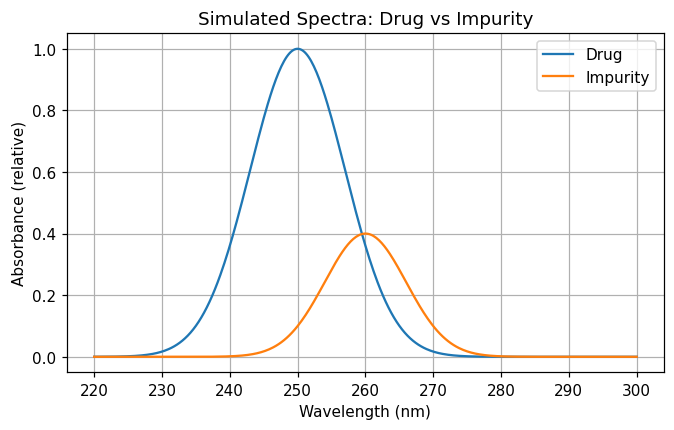


Notice:
• Drug absorbs most strongly near ~250 nm (λmax).
• Impurity absorbs more strongly near ~260 nm.
Choosing a wavelength with high analyte signal and lower impurity contribution
improves selectivity.



In [ ]:
# @title 🌈 Simulated Drug vs Impurity Spectra
wavelengths = np.linspace(220, 300, 401)

def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x-mu)**2 / (2*sigma**2))

# Drug: peak at 250 nm
drug_A = gaussian(wavelengths, mu=250, sigma=7, A=1.0)

# Impurity: peak at 260 nm, smaller intensity
imp_A = gaussian(wavelengths, mu=260, sigma=6, A=0.4)

plt.figure(figsize=(7,4))
plt.plot(wavelengths, drug_A, label="Drug")
plt.plot(wavelengths, imp_A, label="Impurity")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance (relative)")
plt.title("Simulated Spectra: Drug vs Impurity")
plt.grid(True)
plt.legend()
plt.show()

print("""
Notice:
• Drug absorbs most strongly near ~250 nm (λmax).
• Impurity absorbs more strongly near ~260 nm.
Choosing a wavelength with high analyte signal and lower impurity contribution
improves selectivity.
""")


In [ ]:
# @title 🎯 Wavelength Selection Playground
import ipywidgets as widgets
from ipywidgets import interact

def wavelength_selector(lambda_sel=250):
    # linear interpolation of spectra at selected wavelength
    lam = lambda_sel
    # find nearest indices
    idx = (np.abs(wavelengths - lam)).argmin()
    A_drug = drug_A[idx]
    A_imp = imp_A[idx]

    plt.figure(figsize=(7,4))
    plt.plot(wavelengths, drug_A, label="Drug")
    plt.plot(wavelengths, imp_A, label="Impurity")
    plt.axvline(lam, linestyle="--", label=f"λ = {lam} nm")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Absorbance (relative)")
    plt.title("Drug and Impurity Spectra with Chosen Wavelength")
    plt.grid(True)
    plt.legend()
    plt.show()

    ratio = A_drug / (A_imp + 1e-6)  # avoid divide by zero
    print(f"At λ = {lam} nm:")
    print(f"  Drug absorbance (relative):     {A_drug:.3f}")
    print(f"  Impurity absorbance (relative): {A_imp:.3f}")
    print(f"  Drug/Impurity signal ratio:     {ratio:.1f}")

    print("""
Interpretation:
• Higher drug/impurity ratio ⇒ better selectivity.
• λmax is not always the best choice if impurities also absorb strongly there.
""")

interact(
    wavelength_selector,
    lambda_sel=widgets.IntSlider(value=250, min=220, max=300, step=1, description="λ (nm)")
)


interactive(children=(IntSlider(value=250, description='λ (nm)', max=300, min=220), Output()), _dom_classes=('…

<function __main__.wavelength_selector(lambda_sel=250)>

In [ ]:
# @title 🧠 Q3 – Choosing a Wavelength
print(r"""
Suppose at 250 nm: Drug A = 1.00, Impurity A = 0.30
and at 260 nm: Drug A = 0.80, Impurity A = 0.20.

Which wavelength offers BETTER selectivity for the drug relative to impurity?

A. 250 nm
B. 260 nm
C. Both are equal
D. Neither is acceptable
""")

q3 = "A"  # @param ["A","B","C","D"]
# Calculate signal ratios: 250 → 1.00/0.30 ≈ 3.33; 260 → 0.80/0.20 = 4.0 ⇒ 260 nm better
q3_key = "B"
q3_score = grade_mcq(q3, q3_key)

if q3_score:
    print("✅ Correct. 260 nm gives a higher drug/impurity signal ratio in this scenario.")
else:
    print("❌ Check the drug:impurity ratio at each wavelength; higher ratio = better selectivity.")



Suppose at 250 nm: Drug A = 1.00, Impurity A = 0.30  
and at 260 nm: Drug A = 0.80, Impurity A = 0.20.

Which wavelength offers BETTER selectivity for the drug relative to impurity?

A. 250 nm  
B. 260 nm  
C. Both are equal  
D. Neither is acceptable

❌ Check the drug:impurity ratio at each wavelength; higher ratio = better selectivity.


## 6️⃣ Application – Determining an Unknown Concentration

A calibration curve at 250 nm for a drug in 1 cm cuvettes gives:

| c (mg/L) | A |
|---------:|---:|
|  5       | 0.120 |
| 10       | 0.245 |
| 15       | 0.365 |
| 20       | 0.490 |

A linear regression (done by the instrument) yields:

\[
A = 0.0245\,c + 0.000 \quad (\text{c in mg/L})
\]

An unknown sample gives **A = 0.392** at 250 nm.

**Example calculation:**

\[
c_{\text{unknown}} = \frac{A}{0.0245}
= \frac{0.392}{0.0245} \approx 16.0\ \text{mg/L}
\]

Now you will enter your own calculation.


In [ ]:
# @title 🧮 Q4 – Unknown Concentration from Calibration
print("""
Using A = 0.392 and the calibration equation A = 0.0245 c (c in mg/L),
enter the concentration (c) of the unknown in mg/L, to 1 decimal place.
""")

q4 = 0.0  # @param {type:"number"}
q4_key = 16.0
q4_score = grade_numeric(q4, q4_key, tol=0.5)

if q4_score:
    print("✅ Correct. The unknown concentration is ~16.0 mg/L.")
else:
    print("❌ Recalculate: c = A / slope = 0.392 / 0.0245.")



Using A = 0.392 and the calibration equation A = 0.0245 c (c in mg/L),
enter the concentration (c) of the unknown in mg/L, to 1 decimal place.

❌ Recalculate: c = A / slope = 0.392 / 0.0245.


In [ ]:
# @title 🧩 Q5 – Method Suitability for a High-Dose Tablet
print(r"""
You are asked to assay a high-dose tablet (500 mg) of a UV-active drug with a
strong, isolated peak at 250 nm and minimal excipient interference.

Which analytical approach is MOST reasonable as a routine QC assay?

A. UV/Vis spectrophotometry at 250 nm using a simple calibration curve.
B. LC–MS/MS with multiple reaction monitoring.
C. Manual gravimetric analysis only.
D. Visual inspection of tablet color.
""")

q5 = "A"  # @param ["A","B","C","D"]
q5_key = "A"
q5_score = grade_mcq(q5, q5_key)

if q5_score:
    print("✅ Correct. UV/Vis is appropriate and efficient for a high-dose, UV-strong, well-isolated API.")
else:
    print("❌ For a simple, high-dose UV-active API, UV/Vis is often a robust, compendial QC method.")



You are asked to assay a high-dose tablet (500 mg) of a UV-active drug with a
strong, isolated peak at 250 nm and minimal excipient interference.

Which analytical approach is MOST reasonable as a routine QC assay?

A. UV/Vis spectrophotometry at 250 nm using a simple calibration curve.  
B. LC–MS/MS with multiple reaction monitoring.  
C. Manual gravimetric analysis only.  
D. Visual inspection of tablet color.

✅ Correct. UV/Vis is appropriate and efficient for a high-dose, UV-strong, well-isolated API.


> 📝 **Updated Practice Note (Beyond Older Watson Editions):**  
> While classical UV/Vis assays remain common (especially for high-dose and
> simple formulations), modern practice also uses:
>
> - **Diode-array detectors (DAD/PDA)** to monitor full spectra and detect
>   co-eluting species.  
> - **LC–UV** or **LC–MS/MS** for complex matrices or low-dose products.  
>
> Method validation follows **ICH Q2(R2)** and **Q14**, with emphasis on:
>
> - Linearity, range, accuracy, precision  
> - Specificity (including interference testing)  
> - Robustness (e.g., small shifts in λ, pH, solvent composition)
>
> In this module we use simplified models for teaching, but you should be aware
> that real-world methods are validated and maintained over a full lifecycle.


## ✅ 7️⃣ Summary Quiz & Logging

This short quiz checks your understanding of:

- Beer–Lambert law and A/T relationship  
- Calibration curves and unknown concentration  
- Wavelength selection and method suitability  

Your score and completion will be logged.


In [ ]:
# @title ✅ Summary & Performance Logging
import csv, os
from datetime import datetime

scores = {
    "Q1_beer_lambert": q1_score,
    "Q2_transmittance": q2_score,
    "Q3_wavelength_select": q3_score,
    "Q4_unknown_conc": q4_score,
    "Q5_method_suitability": q5_score,
}

total_correct = sum(scores.values())
max_score = len(scores)
percent = round(100 * total_correct / max_score, 1)

print(f"Module 04 Score: {total_correct}/{max_score} = {percent}%")

# from google.colab import drive
# drive.mount('/content/drive')

log_dir = "/content/drive/MyDrive/PHS317_Pharmaceutical_Analysis/performance_logs"
os.makedirs(log_dir, exist_ok=True)
log_path = os.path.join(log_dir, "M04_performance_log.csv")

file_exists = os.path.isfile(log_path)
with open(log_path, "a", newline="") as f:
    writer = csv.writer(f)
    if not file_exists:
        writer.writerow(["timestamp","module","student_id","student_name","percent"] + list(scores.keys()))
    writer.writerow([datetime.now().isoformat(timespec="seconds"),
                     MODULE_NAME,
                     student_id,
                     student_name,
                     percent] + list(scores.values()))

print("""
✅ Your Module 04 results have been logged.

If your instructor asks for proof of completion, you may:
• Download this notebook as a PDF, OR
• Screenshot this cell showing your score.
""")


Module 04 Score: 1/5 = 20.0%


NameError: name 'MODULE_NAME' is not defined